## import environment

In [1]:
from CCCGARCH2 import mgarch

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import yfinance as yf
from LDAR import LDAR
from VDAR import VDAR

import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller




import sys
sys.path.append("..")
from main.SQMLE_VLDAR_BCD import SQMLE_VLDAR_BCD
from main.SQMLE_VLDAR import SQMLE_VLDAR
from main.sparse_SQMLE_VLDAR_BCD import sparse_SQMLE_VLDAR_BCD
from main.DGP import DGP
from main.stationary import stationary

from tqdm import tqdm

d:\python\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [37]:
pd.set_option('display.max_row', None)

## read data

In [225]:

index = yf.download("000001.SS", start="1998-08-01", end="2022-08-10",interval='1wk', proxy="http://127.0.0.1:7890")
df=index['Close']

[*********************100%***********************]  1 of 1 completed


In [3]:
index = yf.download("BAC,JPM,^GSPC,C", start="1998-08-01", end="2022-08-10",interval='1wk', proxy="http://127.0.0.1:7890")
df=index['Close']

[*********************100%***********************]  4 of 4 completed


In [4]:
index = yf.download("^GSPC,^IXIC,^FTSE,^HSI,^N225", start="1998-08-01", end="2022-08-10",interval='1wk', proxy="http://127.0.0.1:7890")
df=index['Close']

[*********************100%***********************]  5 of 5 completed


 股票指数

In [28]:
index = yf.download("^GSPE,^SP500-15,^SP500-20,^SP500-25,^SP500-30,^SP500-35,^SP500-40,^SP500-45,^SP500-50,^SP500-55,^SP500-60", start="1998-08-01", end="2022-08-10",interval='1wk', proxy="http://127.0.0.1:7890")
df=index['Close']
# ^GSPC,
# df.columns=['Consumer Discretionary','Consumer Staples','Health Care']

[*********************100%***********************]  11 of 11 completed


In [7]:

df.to_csv('3_index.csv')

In [39]:
df=pd.read_csv('3_index.csv',index_col=0)
df.index=pd.to_datetime(df.index,format = '%Y/%m/%d')
# df.index=pd.DatetimeIndex(df.index).to_period('W')

In [4]:
index = yf.download("^GSPC,^IXIC,^DJI", start="1998-08-10", end="2022-08-10",interval='1wk', proxy="http://127.0.0.1:7890")
df=index['Close']
# df.columns=['DELL','IBM','S&P500']

[*********************100%***********************]  3 of 3 completed

3 Failed downloads:
- ^IXIC: No data found for this date range, symbol may be delisted
- ^DJI: No data found for this date range, symbol may be delisted
- ^GSPC: No data found for this date range, symbol may be delisted


股指stock index, US Treasury Bonds Rates ，期货future 
股指: sp500,nasdaq,dji

US Treasury Bonds Rates:
13 Week Treasury Bill(^IRX),Treasury Yield 5 Years(^FVX),Treasury Yield 10 Years(^TNX),Treasury Yield 30 Years(^TYX)

Future:
E-Mini S&P 500 Dec 22 (ES=F)
Mini Dow Jones Indus.-$5 Dec 22 (YM=F)
Nasdaq 100 Dec 22 (NQ=F)
E-mini Russell 2000 Index Futur (RTY=F)
U.S. Treasury Bond Futures,Dec- (ZB=F)
10-Year T-Note Futures,Dec-2022 (ZN=F)
Five-Year US Treasury Note Futu (ZF=F)
2-Year T-Note Futures,Dec-2022 (ZT=F)
Gold Dec 22 (GC=F)
Micro Gold Futures,Dec-2022 (MGC=F)

In [5]:
index = yf.download("^GSPC,^IXIC,^DJI,^FVX,^TNX,^TYX,\
NQ=F,ZN=F,ZF=F,ZT=F", start="1998-08-10", end="2022-08-10",interval='1wk', proxy="http://127.0.0.1:7890")
df=index['Close']
# df.columns=['DELL','IBM','S&P500']

[**********************60%****                   ]  6 of 10 completed

KeyboardInterrupt: 

汇率

In [ ]:
index = yf.download("CNYEUR=X,EUR=X", start="2000-08-01", end="2022-08-10",interval='1d', proxy="http://127.0.0.1:7890")
df=index['Close']


In [ ]:
df=pd.read_csv('igc_goi.csv')
df['DATE']=pd.to_datetime(df['DATE'],format = '%Y/%m/%d')

weekly_data = df.resample('W', on="DATE").last()#一周中最后一个数据
weekly_data.set_index(pd.DatetimeIndex(weekly_data['DATE']),inplace=True,drop=True)
df=weekly_data.drop('DATE', axis=1)
# df=df.iloc[:,[1,5]]

In [ ]:
index = yf.download("^TYX,^IXIC", start="2000-08-01", end="2022-08-10",interval='1wk', proxy="http://127.0.0.1:7890")
df=index['Close']


In [40]:
df

Consumer Discretionary  Consumer Staples  Health Care
Date                                                             
1998-07-27              223.029999        232.009995   326.459991
1998-08-03              218.600006        227.509995   314.940002
1998-08-10              212.740005        222.179993   312.750000
1998-08-17              215.369995        224.759995   324.070007
1998-08-24              205.479996        218.149994   317.279999
1998-08-31              190.610001        206.210007   304.000000
1998-09-07              194.610001        206.240005   315.109985
1998-09-14              197.320007        206.190002   319.730011
1998-09-21              195.960007        206.990005   327.790009
1998-09-28              182.250000        210.429993   312.559998
1998-10-05              180.389999        217.929993   303.540009
1998-10-12              199.029999        229.270004   322.160004
1998-10-19              204.199997        234.039993   326.890015
1998-10-26              208.389999        235.429993   334.500000
1998-11-02              217.500000        244.559998   344.940002
1998-11-09              215.770004        244.339996   338.429993
1998-11-16              222.039993        249.509995   356.519989
1998-11-23              227.619995        249.460007   362.209991
1998-11-30              223.520004        246.610001   360.369995
1998-12-07              225.229996        236.360001   356.380005
1998-12-14              228.850006        239.410004   350.089996
1998-12-21              238.630005        252.360001   358.839996
1998-12-28              241.270004        249.399994   369.839996
1999-01-04              249.809998        248.869995   365.089996
1999-01-11              245.979996        241.729996   353.440002
1999-01-18              246.029999        232.520004   344.059998
1999-01-25              254.820007        243.690002   368.269989
1999-02-01              251.220001        234.979996   365.119995
1999-02-08              249.080002        232.710007   364.690002
1999-02-15              253.940002        236.059998   365.450012
1999-02-22              255.190002        233.320007   371.269989
1999-03-01              267.190002        238.190002   382.209991
1999-03-08              270.089996        240.460007   387.890015
1999-03-15              269.440002        240.130005   385.739990
1999-03-22              266.260010        237.089996   375.829987
1999-03-29              267.149994        227.520004   381.140015
1999-04-05              283.100006        227.000000   395.429993
1999-04-12              274.140015        227.399994   367.000000
1999-04-19              284.179993        228.529999   377.920013
1999-04-26              273.290009        230.679993   354.260010
1999-05-03              273.320007        232.199997   360.489990
1999-05-10              272.399994        232.000000   355.709991
1999-05-17              267.760010        236.440002   352.980011
1999-05-24              261.399994        231.119995   343.730011
1999-05-31              269.510010        236.490005   356.559998
1999-06-07              258.739990        228.350006   334.359985
1999-06-14              266.880005        228.860001   338.450012
1999-06-21              263.010010        223.940002   336.290009
1999-06-28              279.179993        228.580002   365.429993
1999-07-05              279.890015        229.330002   360.540009
1999-07-12              280.730011        233.229996   365.190002
1999-07-19              267.559998        227.449997   348.609985
1999-07-26              260.679993        226.059998   339.179993
1999-08-02              248.649994        222.339996   325.049988
1999-08-09              256.739990        221.960007   333.929993
1999-08-16              261.489990        221.529999   347.570007
1999-08-23              259.510010        225.500000   353.359985
1999-08-30              257.269989        223.800003   360.579987
1999-09-06              258.519989        218.029999

In [41]:
df.isna().any()

Consumer Discretionary    False
Consumer Staples          False
Health Care               False
dtype: bool

In [42]:
df=df.dropna()
df.isna().any()

Consumer Discretionary    False
Consumer Staples          False
Health Care               False
dtype: bool

In [43]:
df

Consumer Discretionary  Consumer Staples  Health Care
Date                                                             
1998-07-27              223.029999        232.009995   326.459991
1998-08-03              218.600006        227.509995   314.940002
1998-08-10              212.740005        222.179993   312.750000
1998-08-17              215.369995        224.759995   324.070007
1998-08-24              205.479996        218.149994   317.279999
1998-08-31              190.610001        206.210007   304.000000
1998-09-07              194.610001        206.240005   315.109985
1998-09-14              197.320007        206.190002   319.730011
1998-09-21              195.960007        206.990005   327.790009
1998-09-28              182.250000        210.429993   312.559998
1998-10-05              180.389999        217.929993   303.540009
1998-10-12              199.029999        229.270004   322.160004
1998-10-19              204.199997        234.039993   326.890015
1998-10-26              208.389999        235.429993   334.500000
1998-11-02              217.500000        244.559998   344.940002
1998-11-09              215.770004        244.339996   338.429993
1998-11-16              222.039993        249.509995   356.519989
1998-11-23              227.619995        249.460007   362.209991
1998-11-30              223.520004        246.610001   360.369995
1998-12-07              225.229996        236.360001   356.380005
1998-12-14              228.850006        239.410004   350.089996
1998-12-21              238.630005        252.360001   358.839996
1998-12-28              241.270004        249.399994   369.839996
1999-01-04              249.809998        248.869995   365.089996
1999-01-11              245.979996        241.729996   353.440002
1999-01-18              246.029999        232.520004   344.059998
1999-01-25              254.820007        243.690002   368.269989
1999-02-01              251.220001        234.979996   365.119995
1999-02-08              249.080002        232.710007   364.690002
1999-02-15              253.940002        236.059998   365.450012
1999-02-22              255.190002        233.320007   371.269989
1999-03-01              267.190002        238.190002   382.209991
1999-03-08              270.089996        240.460007   387.890015
1999-03-15              269.440002        240.130005   385.739990
1999-03-22              266.260010        237.089996   375.829987
1999-03-29              267.149994        227.520004   381.140015
1999-04-05              283.100006        227.000000   395.429993
1999-04-12              274.140015        227.399994   367.000000
1999-04-19              284.179993        228.529999   377.920013
1999-04-26              273.290009        230.679993   354.260010
1999-05-03              273.320007        232.199997   360.489990
1999-05-10              272.399994        232.000000   355.709991
1999-05-17              267.760010        236.440002   352.980011
1999-05-24              261.399994        231.119995   343.730011
1999-05-31              269.510010        236.490005   356.559998
1999-06-07              258.739990        228.350006   334.359985
1999-06-14              266.880005        228.860001   338.450012
1999-06-21              263.010010        223.940002   336.290009
1999-06-28              279.179993        228.580002   365.429993
1999-07-05              279.890015        229.330002   360.540009
1999-07-12              280.730011        233.229996   365.190002
1999-07-19              267.559998        227.449997   348.609985
1999-07-26              260.679993        226.059998   339.179993
1999-08-02              248.649994        222.339996   325.049988
1999-08-09              256.739990        221.960007   333.929993
1999-08-16              261.489990        221.529999   347.570007
1999-08-23              259.510010        225.500000   353.359985
1999-08-30              257.269989        223.800003   360.579987
1999-09-06              258.519989        218.029999

In [32]:
T=1255
N=1

In [33]:
T,N=np.shape(df)
np.shape(df)

(1054, 11)

### time plot

In [9]:
df.columns=['C D','C S', 'H C']

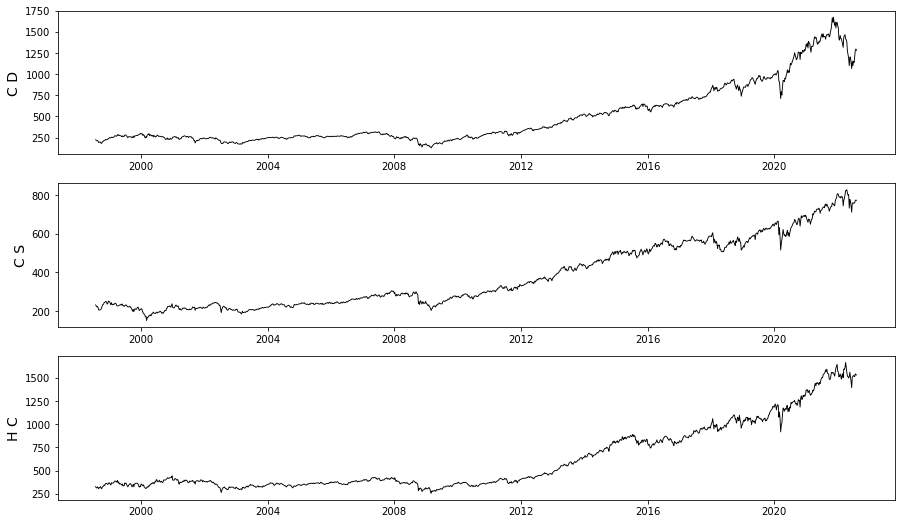

In [10]:
x=df.index
fig=plt.figure(num=1,figsize=(15,3*N))

for i in range(N):
    exec(f"ax{i+1}=fig.add_subplot({N}1{i+1})")
    exec(f"ax{i+1}.set_ylabel(df.columns[{i}],fontsize=14)")
    exec(f"ax{i+1}.plot(x,df.values[:,i],color='k',lw=0.9)")

plt.savefig('timeplot_return.pdf')
plt.show()

### describe

In [11]:
df.describe().round(3)

C D       C S       H C
count  1255.000  1255.000  1255.000
mean    487.930   378.930   613.851
std     350.228   171.896   358.208
min     127.300   151.150   255.570
25%     248.670   235.000   357.280
50%     298.240   295.450   399.650
75%     638.055   530.635   845.355
max    1673.270   827.690  1664.580

In [12]:
column_name=df.columns
for index in column_name:
    exec(f"adf=adfuller(df['{index}'])")
    exec(f"print('{index} p level:',{adf[1]})")

C D p level: 0.982173434395848
C S p level: 0.9920383284149026
H C p level: 0.9990689644054923


In [44]:
df1=100*(np.log(df).diff(1))#差分
df1=df1.dropna()#去nall值
df1=df1-df1.mean()

In [48]:
df1[:783]

Consumer Discretionary  Consumer Staples  Health Care
Date                                                             
1998-08-03               -2.145627         -2.054617    -3.715706
1998-08-10               -2.856640         -2.466623    -0.820981
1998-08-17                1.089308          1.058542     3.432361
1998-08-24               -4.840236         -3.081016    -2.240671
1998-08-31               -7.651281         -5.724766    -4.398877
1998-09-07                1.937451         -0.081443     3.466223
1998-09-14                1.243567         -0.120237     1.332338
1998-09-21               -0.830981          0.291253     2.366445
1998-09-28               -7.392481          1.552262    -4.880855
1998-10-05               -1.165179          3.406096    -3.051483
1998-10-12                9.694080          4.976660     5.830309
1998-10-19                2.425074          1.963175     1.334363
1998-10-26                1.891784          0.496169     2.178130
1998-11-02                4.139394          3.708718     2.950181
1998-11-09               -0.937939         -0.185988    -2.028505
1998-11-16                2.725088          1.997840     5.084124
1998-11-23                2.342645         -0.116026     1.460201
1998-11-30               -1.957022         -1.245036    -0.632467
1998-12-07                0.622758         -4.341197    -1.236549
1998-12-14                1.455112          1.186162    -1.903915
1998-12-21                4.045387          5.171917     2.345453
1998-12-28                0.960881         -1.275853     2.896206
1999-01-04                3.339038         -0.308725    -1.415839
1999-01-11               -1.684399         -3.006916    -3.366195
1999-01-18               -0.119033         -3.980501    -2.812950
1999-01-25                3.371038          4.596078     6.676847
1999-02-01               -1.562198         -3.735644    -0.982209
1999-02-08               -0.994850         -1.066721    -0.241018
1999-02-15                1.793030          1.333303     0.085001
1999-02-22                0.351676         -1.263496     1.456822
1999-03-01                4.455806          1.969786     2.780883
1999-03-08                0.940161          0.852521     1.351985
1999-03-15               -0.380307         -0.233321    -0.679010
1999-03-22               -1.326602         -1.370056    -2.725847
1999-03-29                0.194338         -4.216153     1.279811
1999-04-05                5.659635         -0.324804     3.557515
1999-04-12               -3.355482          0.080064    -7.584372
1999-04-19                3.457525          0.399704     2.808891
1999-04-26               -4.046787          0.840406    -6.588324
1999-05-03               -0.128382          0.560773     1.620125
1999-05-10               -0.476533         -0.182158    -1.458023
1999-05-17               -1.857405          1.799722    -0.893615
1999-05-24               -2.543290         -2.371734    -2.778674
1999-05-31                2.916017          2.200902     3.541421
1999-06-07               -4.217546         -3.598627    -6.551612
1999-06-14                2.958189          0.127101     1.092638
1999-06-21               -1.600063         -2.269219    -0.763431
1999-06-28                5.827103          1.954820     8.186900
1999-07-05                0.114642          0.231586    -1.470360
1999-07-12                0.160308          1.590316     1.158303
1999-07-19               -4.944315         -2.605454    -4.769581
1999-07-26               -2.744385         -0.708987    -2.865467
1999-08-02               -4.864090         -1.755261    -4.378375
1999-08-09                3.062401         -0.267040     2.572058
1999-08-16                1.693856         -0.289909     3.880293
1999-08-23               -0.899432          1.680225     1.528941
1999-08-30               -1.006279         -0.852724     1.899467
1999-09-06                0.345336         -2.708004    -2.432060
1999-09-13               -0.740725         -1.179676

In [15]:
column_name=df1.columns
for index in column_name:
    exec(f"adf=adfuller(df1['{index}'])")
    exec(f"print('{index} p level:',{adf[1]})")

C D p level: 7.45561107517766e-27
C S p level: 0.0
H C p level: 0.0


In [16]:
df1.describe().round(3)

C D       C S       H C
count  1254.000  1254.000  1254.000
mean      0.000    -0.000     0.000
std       3.045     2.078     2.503
min     -20.330   -17.460   -20.488
25%      -1.437    -0.984    -1.232
50%       0.080     0.095     0.105
75%       1.692     1.140     1.357
max      15.616    10.318     9.028

In [17]:
print('skew:\n{} \n kurt:\n{}'.format(df1.skew(),df1.kurt()))

skew:
C D   -0.383615
C S   -1.175532
H C   -0.744700
dtype: float64 
 kurt:
C D    4.510255
C S    8.688615
H C    6.162340
dtype: float64


In [18]:
np.corrcoef(df1.values.T).round(4)

array([[1.    , 0.6351, 0.6395],
       [0.6351, 1.    , 0.695 ],
       [0.6395, 0.695 , 1.    ]])

### plot of log return

In [19]:
df

C D         C S          H C
Date                                            
1998-07-27   223.029999  232.009995   326.459991
1998-08-03   218.600006  227.509995   314.940002
1998-08-10   212.740005  222.179993   312.750000
1998-08-17   215.369995  224.759995   324.070007
1998-08-24   205.479996  218.149994   317.279999
...                 ...         ...          ...
2022-07-11  1136.969971  758.090027  1517.510010
2022-07-18  1214.180054  761.150024  1512.339966
2022-07-25  1281.510010  773.500000  1541.880005
2022-08-01  1296.449951  774.280029  1531.030029
2022-08-08  1280.319946  773.159973  1529.959961

[1255 rows x 3 columns]

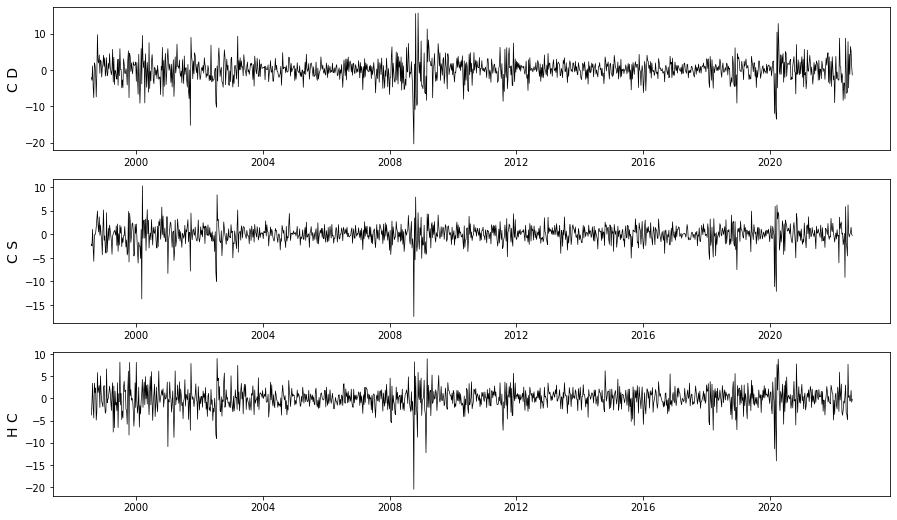

In [20]:
x=df1.index
fig=plt.figure(num=2,figsize=(15,3*N))

for i in range(N):
    exec(f"ax{i+1}=fig.add_subplot({N}1{i+1})")
    exec(f"ax{i+1}.set_ylabel(df1.columns[{i}],fontsize=14)")
    exec(f"ax{i+1}.plot(x,df1.values[:,i],color='k',lw=0.7)")

plt.savefig('timeplot_logreturn.pdf')
plt.show()

### MACF of $y_t$

In [21]:

def MACF(df,lag):
    T, N = np.shape(df)
    mean_df=np.mean(df,0)
    cov=np.zeros((lag+1,N,N))
    for i in range(lag+1):
        for t in range(i, T):
            cov[i] += np.outer(df[t]-mean_df, df[t-i]-mean_df)/(T-i)
    MACF=np.zeros((lag,N,N))

    cov_0=np.outer(np.sqrt(np.diag(cov[0])),np.sqrt(np.diag(cov[0])))
    for k in range(lag):
        MACF[k]=cov[k+1]/cov_0
    return MACF
MACF_y=MACF(df1.values,15)


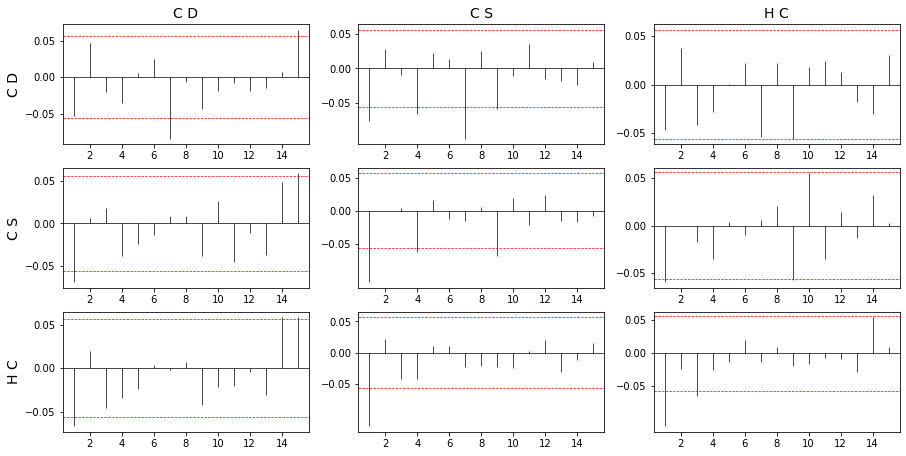

In [22]:

lag=16
T,N=np.shape(df1)
N=3
err_bound = 2 / np.sqrt(T)
xlabel_lags=np.arange(1,lag)
fig=plt.figure(num=4,figsize=(15,N*2.5))
k=1
for i in range(N):
    for j in range(N):
        
        exec(f"ax{k}=fig.add_subplot(33{i*N+j+1})")
        exec(f"ax{k}.vlines(xlabel_lags, [0], MACF_y[:,i,j] ,color='k',linewidth=0.7)")
        exec(f"ax{k}.axhline(0, color='k',linewidth=0.7)")

        exec(f"ax{k}.axhline(err_bound, color='r', linestyle='--',linewidth=0.7)")
        exec(f"ax{k}.axhline(-err_bound, color='r', linestyle='--',linewidth=0.7)")
        exec(f"ax{k}.set_yticks(np.linspace(-0.05,0.05,3))")
        k+=1
ax1.set_ylabel("C D",fontsize=14)
ax4.set_ylabel('C S',fontsize=14)
ax7.set_ylabel('H C',fontsize=14)

ax1.set_title("C D",fontsize=14)
ax2.set_title('C S',fontsize=14)
ax3.set_title('H C',fontsize=14)
# ax1.set_ylabel("ACF")
# exec(f"ax{N+1}.set_ylabel('PACF')")

plt.savefig('MACF_y.pdf')
plt.show()

###  pacf of $y_t$ and $|y_t|$

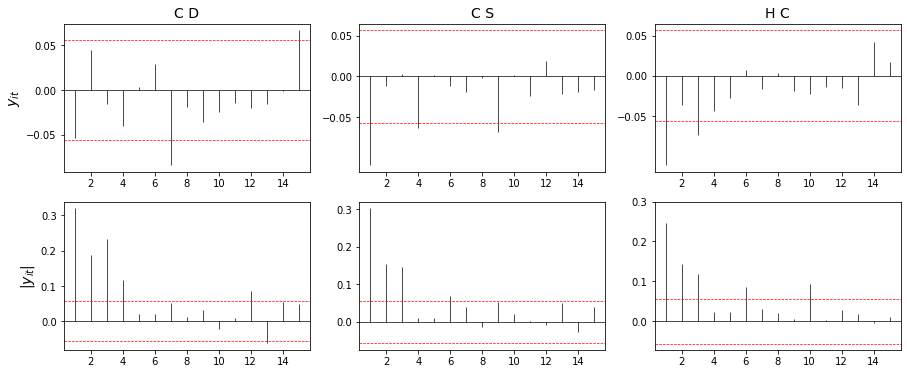

In [24]:
lag=16

T,N=np.shape(df1.values)

df2=df1
err_bound = 2 / np.sqrt(T)
from statsmodels.tsa import stattools
xlabel_lags=np.arange(1,lag)
fig=plt.figure(num=3,figsize=(15,N*2))
for i in range(N):
    exec(f"ax{i+1}=fig.add_subplot(2{N}{i+1})")
    exec(f"ax{i+1}.vlines(xlabel_lags, [0],stattools.pacf(df2.iloc[:,{i}])[1:lag] ,color='k',linewidth=0.7)")
    exec(f"ax{i+1}.axhline(0, color='k',linewidth=0.7)")
    exec(f"ax{i+1}.set_yticks(np.linspace(-0.05,0.05,3))")
    exec(f"ax{i+1}.axhline(err_bound, color='r', linestyle='--',linewidth=0.7)")
    exec(f"ax{i+1}.axhline(-err_bound, color='r', linestyle='--',linewidth=0.7)")
    
    exec(f"ax{i+1+N}=fig.add_subplot(2{N}{i+1+N})")
    exec(f"ax{i+1+N}.vlines(xlabel_lags, [0],stattools.pacf(df2.iloc[:,{i}].abs())[1:lag],color='k',linewidth=0.7 )")
    exec(f"ax{i+1+N}.axhline(0, color='k',linewidth=0.7)")
    
    exec(f"ax{i+1+N}.axhline(err_bound, color='r', linestyle='--',linewidth=0.7)")
    exec(f"ax{i+1+N}.axhline(-err_bound, color='r', linestyle='--',linewidth=0.7)")
    exec(f"ax{i+1+N}.set_yticks(np.linspace(0,0.3,4))")
ax1.set_ylabel("$y_{it}$",fontsize=14)
ax4.set_ylabel("$|y_{it}|$",fontsize=14)
ax1.set_title("C D",fontsize=14)
ax2.set_title("C S",fontsize=14)
ax3.set_title("H C",fontsize=14)
# ax{2}.set_ylabel('PACF')

plt.savefig('pacf_y_y_abs.pdf')
plt.show()

## VLDAR

In [ ]:
    	\widehat{\Gamma}=&\left(
    	\begin{array}{ccc}
    		1 & 0.539_{0.026} & 0.628_{0.024} \\
    		0.539_{0.026} & 1 & 0.641_{0.025}\\
    		0.628_{0.024} & 0.641_{0.025} & 1
    	\end{array}
    	\right) 

In [ ]:
    	\bm{y}_{t}=&\widehat{\Phi}_1
    	\bm{y}_{t-1}+\widehat{\bm h}_t \odot  \widehat{\bm \eta}_t ,\quad
    	\var(\widehat{\bm \eta}_t)=\widehat{\Gamma}
    	\quad \text{and} \nonumber \\
    	\widehat{\bm h}_t=&\widehat{\bm \omega}+\widehat{A}_1 \bm y_{a,t-1} +\widehat{A}_2 \bm y_{a,t-2}
    	+\widehat{A}_3 \bm y_{a,t-2},

In [27]:
fit=SQMLE_VLDAR_BCD(df1.values)
fit.BIC(10)

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

stepsize:1.9999999995119242
stepsize:1.854565537340151
4.271061470731611
stepsize:1.007786400552269
1.5994438852310005
stepsize:1.031562033391161
0.12789932333511794
stepsize:1.0246444662324103
0.46918380422742123
stepsize:1.0074060380727898
0.013593909046768587
stepsize:1.0030517724154833
8.964478308160581e-05
stepsize:1.0051678729004951
0.013494758274772737
stepsize:0.9986279832588054
5.337284376840639e-05
stepsize:1.0004810797802524
0.00034986263860970444
stepsize:1.9999999995119242
stepsize:1.578102611709179
6.5644501900841
stepsize:1.0148181956906939
2.143432610706277
stepsize:0
0.0
stepsize:0.9822320898614116
2.253099749660614e+25
stepsize:1.015098845298192
0.030877802826684234
stepsize:1.0006697565225458
0.0002448998740933115
stepsize:1.0075180816346467
0.01698251317901289
stepsize:1.0054853230290826
7.163806084541743e-05
stepsize:1.0003765330424632
0.00037386957818102853
stepsize:1.016387839894793
1.1785518141006358e-05
stepsize:1.9999999995119242
stepsize:1.203755538221317
5.4

 10%|████████▏                                                                         | 1/10 [03:01<27:10, 181.17s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.851407584370726
4.259124498649139
stepsize:1.0139654991224636
1.6860323480539934
stepsize:1.0322521261350737
0.12781034343982206
stepsize:1.023018905885377
0.4070299141759111
stepsize:1.0072271436101274
0.011358198763353668
stepsize:1.0044914940850553
7.072721590423065e-05
stepsize:1.006253452708195
0.014960257239539197
stepsize:1.0038778624444595
2.817987284840333e-05
stepsize:1.000413070749748
0.0005797999602854424
stepsize:1.0088050417605934
2.2013722797293224e-05
stepsize:1.9999999995119242
stepsize:1.5705901170228542
6.098795293385611
stepsize:1.0178668853752306
2.6040125942326937
stepsize:0.008679451213566426
0.0006947517012868202
stepsize:0.9793004764081459
2.3813864155473408e+25
stepsize:1.015511167537035
0.03171524791346394
stepsize:1.0002371027342083
0.00025316605981836444
stepsize:1.008637899141014
0.02674379905899158
stepsize:1.0028085871350223
0.00011278953800244281
stepsize:1.000520766035094
0.0006504024934266457
steps

 20%|████████████████▍                                                                 | 2/10 [06:30<26:21, 197.73s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.846247590944548
4.245061043486014
stepsize:1.0148412089276322
1.6131117906927817
stepsize:1.0321726791876231
0.12833795029886652
stepsize:1.0221020688858626
0.4269555338643302
stepsize:1.0073452248005477
0.014337699198354328
stepsize:1.0013408852290702
9.647608866355031e-05
stepsize:1.0074351389110188
0.02059511785499288
stepsize:1.002304525019158
3.799252107287863e-05
stepsize:1.0001770894464088
0.0009250928430555581
stepsize:1.0061046633481459
4.282980962016637e-05
stepsize:1.9999999995119242
stepsize:1.5594974032851878
5.656583060809844
stepsize:1.0314774404384703
2.1593391673100486
stepsize:0.17564201167647855
0.012422001366854419
stepsize:0.9781770321696488
2.35396969953997e+25
stepsize:1.0150908425235632
0.03141457563716091
stepsize:1.0006450505432825
0.00024144670765867117
stepsize:1.0092987127556876
0.04519554398559683
stepsize:1.0014785395000434
0.0002115665415658258
stepsize:1.0005063326473307
0.002052566016416786
stepsize

 30%|████████████████████████▌                                                         | 3/10 [09:48<23:05, 197.88s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.844030527534696
4.254681845941903
stepsize:1.019729140655111
1.6618755240355834
stepsize:1.0329323007729176
0.12738247475727604
stepsize:1.0193453531156065
0.4406717002505165
stepsize:1.007643725892649
0.018041397689100264
stepsize:1.0034051279935143
0.00013193579909116316
stepsize:1.007973897841862
0.024762507943291837
stepsize:1.0023775417982426
3.497258901417049e-05
stepsize:1.000482379028263
0.001144067385640255
stepsize:1.0036522000440153
5.486202878496421e-05
stepsize:1.9999999995119242
stepsize:1.5551323645621096
4.989539436296632
stepsize:1.0558318802217905
2.5677886588938064
stepsize:0.5350532675285324
0.035637305915698525
stepsize:0.9790180193000941
2.324114074199476e+25
stepsize:1.0138170883436208
0.032326442610404287
stepsize:1.0001492383770643
0.00019545293988190628
stepsize:1.010026458944294
0.06541986784473794
stepsize:1.0007459244110193
0.00026377857432018147
stepsize:1.00049277640808
0.003833474532662879
stepsize:1.

 40%|████████████████████████████████▊                                                 | 4/10 [13:15<20:09, 201.54s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.8409848685594947
4.247188303360958
stepsize:1.0252843918332664
2.092703438030182
stepsize:1.032978989762753
0.12707237460516496
stepsize:1.0189008840303657
0.43310223732815584
stepsize:1.0078011325134055
0.018034778245839038
stepsize:1.0021076611334876
0.00013423896248658187
stepsize:1.008529417662582
0.028573190865456954
stepsize:1.0032001789982172
3.5475907923189737e-05
stepsize:1.000559646850482
0.001988959416306121
stepsize:1.0031121156402918
0.00013279632073436002
stepsize:1.9999999995119242
stepsize:1.5518294235030017
4.93145672584316
stepsize:1.073455718950104
5.367178586521931
stepsize:0.7692840300471168
0.05373340189258623
stepsize:0.9745004799099678
2.4422603382727103e+25
stepsize:1.0147991812612913
0.04216629440652253
stepsize:1.0002750580909485
0.000219620600044904
stepsize:1.0112902269041324
0.08367550670086689
stepsize:1.0008424006284091
0.0003628828555391555
stepsize:1.0006710035690867
0.006751251231273053
stepsize:1.

 50%|█████████████████████████████████████████                                         | 5/10 [16:57<17:24, 208.98s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.8406604711805934
4.247106913737071
stepsize:1.0256521034832378
1.9693150271703836
stepsize:1.0329177903104296
0.12704550499958547
stepsize:1.0181528042249863
0.4376458234017673
stepsize:1.0081086927314797
0.018704167895709903
stepsize:1.0001147150618666
0.0001461669989818559
stepsize:1.009181121594204
0.03071773277026457
stepsize:1.0033626073572317
2.9289274853224294e-05
stepsize:1.0006080323208955
0.0023558886595387426
stepsize:1.0010721160344473
0.00017433855447830543
stepsize:1.9999999995119242
stepsize:1.55048770015701
5.126523920021421
stepsize:1.0811762357000751
4.354998563311399
stepsize:0.9126058467634075
0.05452909145762971
stepsize:0.9741947107230948
2.5107429881112677e+25
stepsize:1.0153905290967231
0.04907708890658672
stepsize:1.0009084605655247
0.0002250294983282104
stepsize:1.0126107711025318
0.09194858817148092
stepsize:1.0010097145927581
0.00037778156299437697
stepsize:1.0008028551129264
0.007808481427254448
stepsize

 60%|█████████████████████████████████████████████████▏                                | 6/10 [20:44<14:19, 214.90s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.8361745216034535
4.255136187001102
stepsize:1.0250897427096262
2.115519171170193
stepsize:1.0314255570508726
0.1226077029332838
stepsize:1.0175430424439682
0.46922550537938257
stepsize:1.008409067237888
0.019310388916258747
stepsize:1.0015783971744587
0.0001547250370894642
stepsize:1.0096351852976406
0.0355577118300955
stepsize:1.0030489587068439
5.073057351705843e-05
stepsize:1.0006519974533936
0.0024996597863022256
stepsize:1.0012210147569474
0.0001924876589812959
stepsize:1.9999999995119242
stepsize:1.5430831240860141
5.0843646184923355
stepsize:1.0834281757356155
4.4357434685360655
stepsize:0.9894826526640476
1.0
stepsize:0.9765299247861523
2.583282437234388e+25
stepsize:1.0158174104587006
0.051458790635405684
stepsize:1.000549648850092
0.00025168270247552635
stepsize:1.0140125493683279
0.10332839189484762
stepsize:1.0000754900370052
0.0004780606103460339
stepsize:1.0009651367768533
0.009335298910119135
stepsize:1.00011496774108

 70%|█████████████████████████████████████████████████████████▍                        | 7/10 [24:21<10:46, 215.64s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.831905312472984
4.231804897363883
stepsize:1.0238595299179565
1.3891572875008265
stepsize:1.0315188461830638
0.12303131824245743
stepsize:1.0180504497926246
0.3708666579389139
stepsize:1.00778131793978
0.017556272485518318
stepsize:1.0027243092343099
0.00012866698491962737
stepsize:1.0097884632310978
0.04465840673037322
stepsize:1.0019574278169916
0.00013043895932711888
stepsize:1.0007831937318548
0.00365358175797929
stepsize:1.000243439063864
0.0002831378173758659
stepsize:1.0107616466873879
2.2188496436021995e-05
stepsize:1.9999999995119242
stepsize:1.5459926540270046
5.950068432154871
stepsize:1.0788105492724127
1.8699482135501677
stepsize:0.9338011466718537
0.042215282500299246
stepsize:0.976032049568472
2.564876110239498e+25
stepsize:1.0154362494605635
0.05012431063916389
stepsize:1.0002186905666022
0.00024813847368363134
stepsize:1.0139941977915237
0.10185919046155321
stepsize:1.0011936365481935
0.00044598164783764597
stepsize

 80%|█████████████████████████████████████████████████████████████████▌                | 8/10 [28:14<07:22, 221.08s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.8263836877863404
4.205969201133197
stepsize:1.0209679788674153
1.3894614327703285
stepsize:1.0302947297010756
0.12025528006024426
stepsize:1.0178698853523453
0.4189383997227934
stepsize:1.008040596479412
0.021491464853008093
stepsize:1.002034611912782
0.00015300190234746944
stepsize:1.0105552706689487
0.050673449943766845
stepsize:1.0029100402868916
0.0001813498669382066
stepsize:1.0008793483585605
0.004211402068661771
stepsize:1.0011423355871192
0.0003357138894315397
stepsize:1.0033306838665204
2.6770396125402695e-05
stepsize:1.9999999995119242
stepsize:1.5367879243399893
5.243039064188631
stepsize:1.069610281166884
2.536704623716989
stepsize:0.7253673391196191
0.042358399263691296
stepsize:0.9837118312078521
2.4809915517180935e+25
stepsize:1.0168464435861937
0.037704018709738954
stepsize:1.0004468220023885
0.0003206648264951219
stepsize:1.0150188875031865
0.10024431295531865
stepsize:1.0005629421228548
0.00029634403820992744
steps

 90%|█████████████████████████████████████████████████████████████████████████▊        | 9/10 [32:05<03:44, 224.23s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.8242153117931874
4.203642206476449
stepsize:1.0201706073815326
1.6053758669597618
stepsize:1.0296393731088815
0.11865883424542238
stepsize:1.0202326902347918
0.4383984076279567
stepsize:1.0083345441455194
0.018025901924013873
stepsize:1.0030473169088499
0.00011868613981853289
stepsize:1.0114255009923907
0.04594512734493575
stepsize:1.002437337072268
0.00020089496883519056
stepsize:1.000947897150379
0.004303131171828476
stepsize:1.0005124162747645
0.00037751783954041094
stepsize:0.9994256005684808
3.265751057354093e-05
stepsize:1.9999999995119242
stepsize:1.5320025802784143
5.427857898988312
stepsize:1.0560464131409715
3.20731116617839
stepsize:0.4624916768247851
0.03260736265155261
stepsize:0.9875359468667699
2.1953170742785117e+25
stepsize:1.0183993415088248
0.040678860335706876
stepsize:1.0006450505432825
0.00035986384257184523
stepsize:1.017001897738219
0.10834747851939971
stepsize:1.0004788195121788
0.0003524699389898068
stepsiz

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [36:06<00:00, 216.65s/it]

stepsize:0
0.0


((1, 3),
              1            2            3            4            5   \
 1   6830.203563  6746.273743  6704.560727  6735.406462  6769.707863   
 2   6880.857374  6802.652293  6757.986960  6788.460896  6823.281968   
 3   6934.013061  6857.718646  6816.096286  6847.197298  6881.538285   
 4   6989.940511  6915.233675  6873.270705  6904.482979  6938.515689   
 5   7044.199006  6969.897409  6927.682012  6958.361105  6992.073046   
 6   7107.583376  7033.349029  6990.595573  7021.078580  7055.337867   
 7   7164.887808  7090.982529  7050.964237  7081.176987  7115.849197   
 8   7222.961085  7149.099293  7109.517914  7139.613427  7174.331153   
 9   7278.822339  7207.924736  7169.273077  7199.965362  7234.131270   
 10  7332.177206  7263.071176  7224.254274  7255.426773  7289.530098   
 
              6            7            8            9            10  
 1   6831.614171  6891.114248  6954.900979  7079.483705  7220.010116  
 2   6881.681876  6942.755293  7008.099919  7131.132347

In [36]:
N=11;p=1;q=1
lam_loc = np.zeros(N*N*p).ravel('F')
lam_var = np.ones(N)
for i in range(q):
    lam_var = np.concatenate((lam_var, np.full((N,N), 1/(N**2)).ravel('F')))
lam = np.concatenate((lam_loc, lam_var, np.zeros(N*(N-1)//2)))
record=[]
fit=SQMLE_VLDAR_BCD(df1.values)
lam=fit.fit(p,q,init_value=lam,result_show=True)

stepsize:1.9999999999559848
stepsize:1.9999999999559848
nan


..\main\SQMLE_VLDAR_BCD.py:440: RuntimeWarning: invalid value encountered in true_divide
  var_diff_ratio_inner = np.linalg.norm((lam[N*N*p:N*N*(p+q)+N]-lam_var_before)/lam_var_before, ord=np.inf)


stepsize:0.5973432006085787
nan
stepsize:0
nan
stepsize:0
nan
stepsize:0
nan


..\main\SQMLE_VLDAR_BCD.py:478: RuntimeWarning: invalid value encountered in true_divide
  var_diff_ratio = np.linalg.norm((lam[N*N*p:N*N*(p+q)+N]-lam_0[N*N*p:N*N*(p+q)+N])/lam_0[N*N*p:N*N*(p+q)+N], ord=np.inf)
..\main\SQMLE_VLDAR_BCD.py:481: RuntimeWarning: invalid value encountered in true_divide
  lam_ratio = np.linalg.norm((lam-lam_0)/lam_0, ord=np.inf)


stepsize:0
nan
stepsize:0
nan
stepsize:0
nan
stepsize:0
nan


..\main\SQMLE_VLDAR_BCD.py:440: RuntimeWarning: invalid value encountered in true_divide
  var_diff_ratio_inner = np.linalg.norm((lam[N*N*p:N*N*(p+q)+N]-lam_var_before)/lam_var_before, ord=np.inf)


stepsize:0
nan
stepsize:0
nan


..\main\SQMLE_VLDAR_BCD.py:478: RuntimeWarning: invalid value encountered in true_divide
  var_diff_ratio = np.linalg.norm((lam[N*N*p:N*N*(p+q)+N]-lam_0[N*N*p:N*N*(p+q)+N])/lam_0[N*N*p:N*N*(p+q)+N], ord=np.inf)
..\main\SQMLE_VLDAR_BCD.py:481: RuntimeWarning: invalid value encountered in true_divide
  lam_ratio = np.linalg.norm((lam-lam_0)/lam_0, ord=np.inf)


stepsize:0
nan


..\main\SQMLE_VLDAR_BCD.py:440: RuntimeWarning: invalid value encountered in true_divide
  var_diff_ratio_inner = np.linalg.norm((lam[N*N*p:N*N*(p+q)+N]-lam_var_before)/lam_var_before, ord=np.inf)


stepsize:0
nan
stepsize:0
nan


..\main\SQMLE_VLDAR_BCD.py:478: RuntimeWarning: invalid value encountered in true_divide
  var_diff_ratio = np.linalg.norm((lam[N*N*p:N*N*(p+q)+N]-lam_0[N*N*p:N*N*(p+q)+N])/lam_0[N*N*p:N*N*(p+q)+N], ord=np.inf)
..\main\SQMLE_VLDAR_BCD.py:481: RuntimeWarning: invalid value encountered in true_divide
  lam_ratio = np.linalg.norm((lam-lam_0)/lam_0, ord=np.inf)


stepsize:0
nan


..\main\SQMLE_VLDAR_BCD.py:440: RuntimeWarning: invalid value encountered in true_divide
  var_diff_ratio_inner = np.linalg.norm((lam[N*N*p:N*N*(p+q)+N]-lam_var_before)/lam_var_before, ord=np.inf)


stepsize:0
nan
stepsize:0
nan


..\main\SQMLE_VLDAR_BCD.py:478: RuntimeWarning: invalid value encountered in true_divide
  var_diff_ratio = np.linalg.norm((lam[N*N*p:N*N*(p+q)+N]-lam_0[N*N*p:N*N*(p+q)+N])/lam_0[N*N*p:N*N*(p+q)+N], ord=np.inf)
..\main\SQMLE_VLDAR_BCD.py:481: RuntimeWarning: invalid value encountered in true_divide
  lam_ratio = np.linalg.norm((lam-lam_0)/lam_0, ord=np.inf)


stepsize:0
nan


..\main\SQMLE_VLDAR_BCD.py:440: RuntimeWarning: invalid value encountered in true_divide
  var_diff_ratio_inner = np.linalg.norm((lam[N*N*p:N*N*(p+q)+N]-lam_var_before)/lam_var_before, ord=np.inf)


stepsize:0
nan
stepsize:0
nan


..\main\SQMLE_VLDAR_BCD.py:478: RuntimeWarning: invalid value encountered in true_divide
  var_diff_ratio = np.linalg.norm((lam[N*N*p:N*N*(p+q)+N]-lam_0[N*N*p:N*N*(p+q)+N])/lam_0[N*N*p:N*N*(p+q)+N], ord=np.inf)
..\main\SQMLE_VLDAR_BCD.py:481: RuntimeWarning: invalid value encountered in true_divide
  lam_ratio = np.linalg.norm((lam-lam_0)/lam_0, ord=np.inf)


stepsize:0
nan


..\main\SQMLE_VLDAR_BCD.py:440: RuntimeWarning: invalid value encountered in true_divide
  var_diff_ratio_inner = np.linalg.norm((lam[N*N*p:N*N*(p+q)+N]-lam_var_before)/lam_var_before, ord=np.inf)


stepsize:0
nan
stepsize:0
nan


..\main\SQMLE_VLDAR_BCD.py:478: RuntimeWarning: invalid value encountered in true_divide
  var_diff_ratio = np.linalg.norm((lam[N*N*p:N*N*(p+q)+N]-lam_0[N*N*p:N*N*(p+q)+N])/lam_0[N*N*p:N*N*(p+q)+N], ord=np.inf)
..\main\SQMLE_VLDAR_BCD.py:481: RuntimeWarning: invalid value encountered in true_divide
  lam_ratio = np.linalg.norm((lam-lam_0)/lam_0, ord=np.inf)


stepsize:0
nan


..\main\SQMLE_VLDAR_BCD.py:440: RuntimeWarning: invalid value encountered in true_divide
  var_diff_ratio_inner = np.linalg.norm((lam[N*N*p:N*N*(p+q)+N]-lam_var_before)/lam_var_before, ord=np.inf)


stepsize:0
nan
stepsize:0
nan


..\main\SQMLE_VLDAR_BCD.py:478: RuntimeWarning: invalid value encountered in true_divide
  var_diff_ratio = np.linalg.norm((lam[N*N*p:N*N*(p+q)+N]-lam_0[N*N*p:N*N*(p+q)+N])/lam_0[N*N*p:N*N*(p+q)+N], ord=np.inf)
..\main\SQMLE_VLDAR_BCD.py:481: RuntimeWarning: invalid value encountered in true_divide
  lam_ratio = np.linalg.norm((lam-lam_0)/lam_0, ord=np.inf)


stepsize:0
nan


..\main\SQMLE_VLDAR_BCD.py:440: RuntimeWarning: invalid value encountered in true_divide
  var_diff_ratio_inner = np.linalg.norm((lam[N*N*p:N*N*(p+q)+N]-lam_var_before)/lam_var_before, ord=np.inf)


stepsize:0
nan
stepsize:0
nan
      loc_ratio  var_ratio     cov_ratio  var_direct  lam_ratio
1  1.391811e+02        NaN  3.773179e-03    7.700359        NaN
2  1.494828e+00        NaN  1.140029e-05    7.771886        NaN
3  1.500839e-03        NaN  3.368258e-08    7.771208        NaN
4  4.144347e-06        NaN  1.006154e-10    7.771206        NaN
5  1.261928e-08        NaN  3.060023e-13    7.771206        NaN
6  1.689091e-11        NaN  5.827122e-15    7.771206        NaN
7  1.102616e-11        NaN  4.355296e-15    7.771206        NaN
8  1.329600e-11        NaN  5.163015e-15    7.771206        NaN
9  5.466969e-12        NaN  4.366850e-15    7.771206        NaN
break for reach max_iter
detial each difference:
      loc_ratio  var_ratio     cov_ratio  var_direct  lam_ratio
1  1.391811e+02        NaN  3.773179e-03    7.700359        NaN
2  1.494828e+00        NaN  1.140029e-05    7.771886        NaN
3  1.500839e-03        NaN  3.368258e-08    7.771208        NaN
4  4.144347e-06        Na

..\main\SQMLE_VLDAR_BCD.py:478: RuntimeWarning: invalid value encountered in true_divide
  var_diff_ratio = np.linalg.norm((lam[N*N*p:N*N*(p+q)+N]-lam_0[N*N*p:N*N*(p+q)+N])/lam_0[N*N*p:N*N*(p+q)+N], ord=np.inf)
..\main\SQMLE_VLDAR_BCD.py:481: RuntimeWarning: invalid value encountered in true_divide
  lam_ratio = np.linalg.norm((lam-lam_0)/lam_0, ord=np.inf)


In [21]:
print(fit.portmanteau_test(6),"\n",fit.portmanteau_test(9),"\n",fit.portmanteau_test(12))

                   stat   p_value
stat_mean     36.962115  0.963012
stat_var_abs  48.110299  0.699844
stat_var_sq   43.315039  0.850770
stat_mix_abs  89.913687  0.896323
stat_mix_sq   88.501712  0.914666 
                     stat   p_value
stat_mean      71.982449  0.752923
stat_var_abs   82.779574  0.424216
stat_var_sq    72.853927  0.729057
stat_mix_abs  165.053564  0.418560
stat_mix_sq   153.920006  0.662528 
                     stat   p_value
stat_mean      93.687611  0.835125
stat_var_abs  106.812565  0.514227
stat_var_sq    96.134699  0.786152
stat_mix_abs  219.277194  0.425076
stat_mix_sq   208.003444  0.639606


In [60]:
eta = fit.y_pre()['eta_ios']
fit.portmanteau_test(15)

stat   p_value
stat_mean     117.981266  0.851232
stat_var_abs  138.213425  0.407283
stat_var_sq   128.443711  0.642407
stat_mix_abs  278.891691  0.341956
stat_mix_sq   263.712774  0.596361

In [61]:
T=1255

In [62]:
se_mix_part=np.sqrt(np.reshape(fit.V_mix_abs[:135]/(T-1-15),(N,15*N),'F'))
se=np.zeros((15,N,N))
for i in range(15):
    se[i]=se_mix_part[:,3*i:3*(i+1)]

In [63]:
se_mix_part_abs=np.sqrt(np.reshape(fit.V_mix_abs[135:]/(T-1-15),(N,15*N),'F'))
se_abs=np.zeros((15,N,N))
for i in range(15):
    se_abs[i]=se_mix_part_abs[:,3*i:3*(i+1)]

In [64]:
eta_ios=fit.y_pre()['eta_ios']

def MACF(df,lag):
    T, N = np.shape(df)
    mean_df=np.mean(df,0)
    cov=np.zeros((lag+1,N,N))
    for i in range(lag+1):
        for t in range(i, T):
            cov[i] += np.outer(df[t]-mean_df, df[t-i]-mean_df)/(T-i)
    MACF=np.zeros((lag,N,N))

    cov_0=np.outer(np.sqrt(np.diag(cov[0])),np.sqrt(np.diag(cov[0])))
    for k in range(lag):
        MACF[k]=cov[k+1]/cov_0
    return MACF
eta_MACF=MACF(eta_ios,15)
eta_abs_MACF=MACF(np.abs(eta_ios),15)

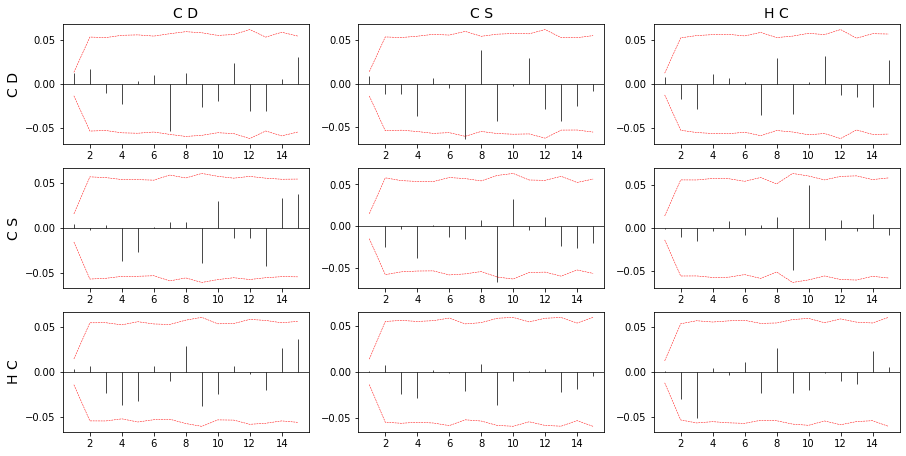

In [67]:
lag=16

T,N=np.shape(eta_ios)
N=3
err_bound = 2 / np.sqrt(T)
xlabel_lags=np.arange(1,lag)
fig=plt.figure(num=4,figsize=(15,N*2.5))
k=1
for i in range(N):
    for j in range(N):
        exec(f"ax{k}=fig.add_subplot(33{i*N+j+1})")

        exec(f"ax{k}.vlines(xlabel_lags, [0], eta_MACF[:,i,j] ,color='k',linewidth=0.7)")
        exec(f"ax{k}.plot(xlabel_lags,1.96*se[:,{i},{j}], color='r', linestyle='--',linewidth=0.5)")
        exec(f"ax{k}.plot(xlabel_lags,-1.96*se[:,{i},{j}], color='r', linestyle='--',linewidth=0.5)")
        exec(f"ax{k}.axhline(0, color='k',linewidth=0.7)")


#         exec(f"ax{k}.set_yticks(np.linspace(-0.05,0.05,3))")
        k+=1
# ax1.set_ylabel("ACF")
# exec(f"ax{N+1}.set_ylabel('PACF')")
ax1.set_ylabel("C D",fontsize=14)
ax4.set_ylabel('C S',fontsize=14)
ax7.set_ylabel('H C',fontsize=14)

ax1.set_title("C D",fontsize=14)
ax2.set_title('C S',fontsize=14)
ax3.set_title('H C',fontsize=14)

plt.savefig('MACF_eta.pdf')
plt.show()

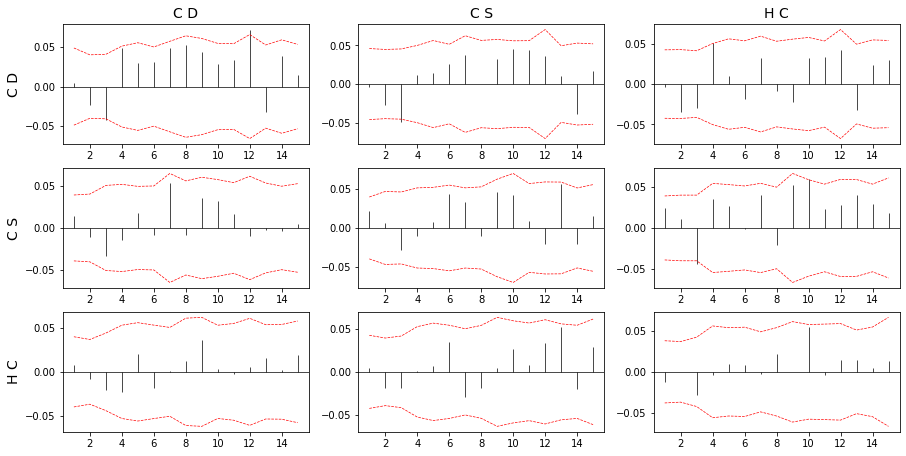

In [68]:
lag=16

T,N=np.shape(eta_ios)
N=3
err_bound = 2 / np.sqrt(T)
xlabel_lags=np.arange(1,lag)
fig=plt.figure(num=4,figsize=(15,N*2.5))
k=1
for i in range(N):
    for j in range(N):
        exec(f"ax{k}=fig.add_subplot(33{i*N+j+1})")
        exec(f"ax{k}.vlines(xlabel_lags, [0], eta_abs_MACF[:,i,j] ,color='k',linewidth=0.7)")
        exec(f"ax{k}.axhline(0, color='k',linewidth=0.7)")

        exec(f"ax{k}.plot(xlabel_lags,1.96*se_abs[:,{i},{j}], color='r', linestyle='--',linewidth=0.7)")
        exec(f"ax{k}.plot(xlabel_lags,-1.96*se_abs[:,{i},{j}], color='r', linestyle='--',linewidth=0.7)")
        
        exec(f"ax{k}.set_yticks(np.linspace(-0.05,0.05,3))")
        k+=1
# ax1.set_ylabel("ACF")
# exec(f"ax{N+1}.set_ylabel('PACF')")
ax1.set_ylabel("C D",fontsize=14)
ax4.set_ylabel('C S',fontsize=14)
ax7.set_ylabel('H C',fontsize=14)

ax1.set_title("C D",fontsize=14)
ax2.set_title('C S',fontsize=14)
ax3.set_title('H C',fontsize=14)
plt.savefig('MACF_abs_eta.pdf')
plt.show()

In [203]:
N=3;p=1;q=3
lam_loc = np.zeros(N*N*p).ravel('F')
lam_var = np.ones(N)
for i in range(q):
    lam_var = np.concatenate(
        (lam_var, np.full((N,N), 1/(4*N**2)).ravel('F')))
lam = np.concatenate((lam_loc, lam_var, np.zeros(N*(N-1)//2)))
record=[]
for i in range(9):
    for j in range((i+1),10):
        for k in range((j+1),11):
            fit=SQMLE_VLDAR_BCD(df1.values[:,[i,j,k]])
            lam0=fit.fit(p,q,init_value=lam,result_show=True)
            if np.sum([lam0[N*N*1:-N*(N-1)//2]<1.00000000e-05])==0:
                record+=[[i,j,k]]
# for i in range(3):
#     exec(f"lam{i}[N*N*1:-N*(N-1)//2][lam{i}[N*N*1:-N*(N-1)//2]<1.00000000e-05]=0.1")
#     exec(f"lam{i+1}=fit.fit(p,q,init_value=lam{i} ,result_show=True)")


stepsize:1.9999999995119242
stepsize:1.7795231962535096
1.7293755845655445
stepsize:0.7171206039863458
0.4113080933549273
stepsize:0.00045905057326364566
0.00039994867173909736
stepsize:0.0003079135424012117
0.00026804003031891794
   loc_ratio  var_ratio  cov_ratio  var_direct  lam_ratio
1   0.532287   0.000400   0.000402    0.159010   0.365579
2   0.000277   0.000268   0.000002    0.159104   0.000268
break for reach tol
detial each difference:
   loc_ratio  var_ratio  cov_ratio  var_direct  lam_ratio
1   0.532287   0.000400   0.000402    0.159010   0.365579
2   0.000277   0.000268   0.000002    0.159104   0.000268
time consume for each part:
t_loc     0.594587
t_var    11.605969
t_cov     0.172957
dtype: float64
loc:
[[-0.10886244 -0.06129004  0.07438198]
 [-0.09310467 -0.05929082  0.10148959]
 [-0.0735163  -0.08571625  0.06661341]] 
 var:
[[9.61086412e-01 2.03138447e-01 1.00000000e-27 7.57927090e-02
  8.37811102e-02 2.79635162e-02 9.67376945e-02 1.84804150e-01
  1.00000000e-27 7.2601

stepsize:1.9999999995119242
stepsize:1.9809240347191377
1.7238483813573167
stepsize:1.0367674872164678
1.4378005643163219
stepsize:0.9827324740899503
3.701310005769692e+24
stepsize:0.3649429508799297
0.24154622368703535
stepsize:0
0.0
stepsize:0.06115776763567579
0.01932698418245999
stepsize:0
0.0
stepsize:0
0.0
stepsize:0
0.0
   loc_ratio     var_ratio     cov_ratio  var_direct     lam_ratio
1   6.077763  3.775695e+24  8.850882e-03    0.019179  3.775695e+24
2   2.613743  1.932698e-02  2.560362e-05    0.019329  2.080493e+00
3   0.018374  0.000000e+00  3.419169e-07    0.019328  1.809546e-02
4   0.000009  0.000000e+00  1.337208e-10    0.019328  8.796517e-06
break for reach tol
detial each difference:
   loc_ratio     var_ratio     cov_ratio  var_direct     lam_ratio
1   6.077763  3.775695e+24  8.850882e-03    0.019179  3.775695e+24
2   2.613743  1.932698e-02  2.560362e-05    0.019329  2.080493e+00
3   0.018374  0.000000e+00  3.419169e-07    0.019328  1.809546e-02
4   0.000009  0.000000e+

stepsize:1.9999999995119242
stepsize:1.5886361592684324
1.331643034689785
stepsize:0.4214689871433902
0.43750527183320514
stepsize:0.8506000570559737
0.9139742441810254
stepsize:0
0.0
stepsize:0
0.0
stepsize:0
0.0
   loc_ratio  var_ratio     cov_ratio  var_direct  lam_ratio
1   1.416628   0.913974  6.270406e-03    0.090328   0.913974
2   0.394832   0.000000  9.799278e-05    0.088857   0.341698
3   0.002039   0.000000  2.642573e-07    0.088833   0.001987
break for reach tol
detial each difference:
   loc_ratio  var_ratio     cov_ratio  var_direct  lam_ratio
1   1.416628   0.913974  6.270406e-03    0.090328   0.913974
2   0.394832   0.000000  9.799278e-05    0.088857   0.341698
3   0.002039   0.000000  2.642573e-07    0.088833   0.001987
time consume for each part:
t_loc     0.733952
t_var    16.676584
t_cov     0.210099
dtype: float64
loc:
[[-0.21554659  0.02936011  0.11014482]
 [-0.30233772  0.00486056  0.21365891]
 [-0.19243193  0.03622421  0.08756904]] 
 var:
[[1.02789949e+00 1.11402

stepsize:1.9999999995119242
stepsize:1.7287358354501743
1.5134738348429488
stepsize:1.0314518436402051
2.0737456697244467
stepsize:0.9350993148025736
8.437402658883684
stepsize:0.8847798229366846
0.10724449460455411
stepsize:0.15435914487301453
0.0029765924309352212
stepsize:0.834435566814344
0.04505714228079102
stepsize:0.05703858902915883
0.0006587834459236454
stepsize:0.04456230503368869
0.0005809928376000331
stepsize:0
0.0
    loc_ratio  var_ratio     cov_ratio  var_direct   lam_ratio
1  162.369285   9.480616  1.524347e-02    0.011705  162.358336
2    2.402171   0.045686  1.135653e-04    0.012879    2.071233
3    0.105465   0.000581  2.223906e-06    0.012903    0.096528
4    0.001223   0.000000  5.921979e-08    0.012906    0.001095
break for reach tol
detial each difference:
    loc_ratio  var_ratio     cov_ratio  var_direct   lam_ratio
1  162.369285   9.480616  1.524347e-02    0.011705  162.358336
2    2.402171   0.045686  1.135653e-04    0.012879    2.071233
3    0.105465   0.000

stepsize:1.9999999995119242
stepsize:1.8312900295022128
1.7977620723892411
stepsize:0.9733446615783901
0.5993793511938633
stepsize:0.5171111872718057
1.3527627985244437
stepsize:0
0.0
stepsize:0
0.0
stepsize:0
0.0
   loc_ratio  var_ratio     cov_ratio  var_direct  lam_ratio
1   1.604102   1.352763  4.393110e-03    0.090250   1.477946
2   1.489498   0.000000  4.486050e-05    0.090873   1.329271
3   0.002921   0.000000  5.310453e-08    0.090903   0.002833
break for reach tol
detial each difference:
   loc_ratio  var_ratio     cov_ratio  var_direct  lam_ratio
1   1.604102   1.352763  4.393110e-03    0.090250   1.477946
2   1.489498   0.000000  4.486050e-05    0.090873   1.329271
3   0.002921   0.000000  5.310453e-08    0.090903   0.002833
time consume for each part:
t_loc     0.951893
t_var    19.492678
t_cov     0.202852
dtype: float64
loc:
[[-0.1292969   0.04322353  0.00135759]
 [-0.11007658 -0.00529609  0.02613426]
 [-0.11673989  0.08790221 -0.0690369 ]] 
 var:
[[1.16001919e+00 1.49750

stepsize:1.9999999995119242
stepsize:1.7275249088551896
1.4262420937662066
stepsize:0.9543534135661746
0.5805092621329778
stepsize:0.5933149165320989
1.0
stepsize:0
0.0
stepsize:7.356835141813578e-06
1.0
stepsize:0
0.0
stepsize:0
0.0
   loc_ratio  var_ratio     cov_ratio  var_direct  lam_ratio
1   2.580194        1.0  3.876701e-03    0.078523   2.267900
2   0.406301        1.0  5.332870e-05    0.077890   1.000000
3   0.000156        0.0  3.060899e-08    0.077896   0.000142
break for reach tol
detial each difference:
   loc_ratio  var_ratio     cov_ratio  var_direct  lam_ratio
1   2.580194        1.0  3.876701e-03    0.078523   2.267900
2   0.406301        1.0  5.332870e-05    0.077890   1.000000
3   0.000156        0.0  3.060899e-08    0.077896   0.000142
time consume for each part:
t_loc     0.755951
t_var    18.708813
t_cov     0.172907
dtype: float64
loc:
[[-0.13037642  0.07862852 -0.03190237]
 [-0.10675129  0.05201621 -0.01410409]
 [-0.11700383  0.08658994 -0.06787864]] 
 var:
[[9.

stepsize:1.9999999995119242
stepsize:1.515802527211998
1.429970915340533
stepsize:0.9315405786376986
0.33681272337485096
stepsize:0.6147898783144354
0.6544420621859137
stepsize:0
0.0
stepsize:0
0.0
stepsize:0
0.0
   loc_ratio  var_ratio     cov_ratio  var_direct  lam_ratio
1   0.817102   0.654442  4.826663e-03    0.047582   0.654442
2   0.269517   0.000000  1.556715e-05    0.047549   0.196370
3   0.000019   0.000000  3.000686e-09    0.047549   0.000014
break for reach tol
detial each difference:
   loc_ratio  var_ratio     cov_ratio  var_direct  lam_ratio
1   0.817102   0.654442  4.826663e-03    0.047582   0.654442
2   0.269517   0.000000  1.556715e-05    0.047549   0.196370
3   0.000019   0.000000  3.000686e-09    0.047549   0.000014
time consume for each part:
t_loc     0.778068
t_var    15.423355
t_cov     0.198247
dtype: float64
loc:
[[-0.03584464 -0.07122217 -0.01271791]
 [-0.03708886 -0.07569506  0.00965539]
 [ 0.01262978 -0.06396028 -0.06611825]] 
 var:
[[8.71323691e-01 1.946887

stepsize:1.9999999995119242
stepsize:1.9999999995119242
1.6260910137691174
stepsize:1.0442658678945467
0.557243512377539
stepsize:1.0264512867794868
1.0
stepsize:0.6111019436609613
0.037871559457432834
stepsize:0
0.0
stepsize:0.597528712316481
0.025092390787361776
stepsize:0
0.0
stepsize:0
0.0
stepsize:0
0.0
   loc_ratio  var_ratio     cov_ratio  var_direct  lam_ratio
1  10.429144   1.042886  5.262613e-03    0.009453  10.319579
2  10.303961   0.025092  3.250872e-05    0.010113  10.290824
3   0.039412   0.000000  1.280722e-06    0.010123   0.032549
4   0.000009   0.000000  6.278230e-10    0.010123   0.000006
break for reach tol
detial each difference:
   loc_ratio  var_ratio     cov_ratio  var_direct  lam_ratio
1  10.429144   1.042886  5.262613e-03    0.009453  10.319579
2  10.303961   0.025092  3.250872e-05    0.010113  10.290824
3   0.039412   0.000000  1.280722e-06    0.010123   0.032549
4   0.000009   0.000000  6.278230e-10    0.010123   0.000006
time consume for each part:
t_loc   

stepsize:1.9999999995119242
stepsize:1.8013186620429742
1.6966155842455064
stepsize:1.2288617622075
6.15058448968667e+24
stepsize:0.6384163153125217
3.4703046622239756e+24
stepsize:0
0.0
stepsize:0
0.0
stepsize:0
0.0
   loc_ratio     var_ratio     cov_ratio  var_direct     lam_ratio
1   3.034776  3.470305e+24  9.701774e-03    0.081554  3.470305e+24
2   0.257257  0.000000e+00  1.688491e-05    0.080668  2.421908e-01
3   0.000391  0.000000e+00  1.764496e-08    0.080668  3.879573e-04
break for reach tol
detial each difference:
   loc_ratio     var_ratio     cov_ratio  var_direct     lam_ratio
1   3.034776  3.470305e+24  9.701774e-03    0.081554  3.470305e+24
2   0.257257  0.000000e+00  1.688491e-05    0.080668  2.421908e-01
3   0.000391  0.000000e+00  1.764496e-08    0.080668  3.879573e-04
time consume for each part:
t_loc     0.900932
t_var    17.854595
t_cov     0.203926
dtype: float64
loc:
[[-0.07330821  0.00165669 -0.00941488]
 [ 0.04485951 -0.08086628 -0.05753573]
 [ 0.04463687 -0.056

stepsize:1.9999999995119242
stepsize:1.8250516124586347
1.645098112192365
stepsize:0.7497159587940514
1.0
stepsize:0.48552935388566054
1.560297396043831e+25
stepsize:0
0.0
stepsize:0
0.0
stepsize:0
0.0
   loc_ratio     var_ratio     cov_ratio  var_direct     lam_ratio
1   1.753159  1.560297e+25  8.124931e-03    0.160180  1.560297e+25
2   0.914051  0.000000e+00  3.117380e-05    0.166174  8.662531e-01
3   0.000314  0.000000e+00  3.848684e-08    0.166209  2.143206e-04
break for reach tol
detial each difference:
   loc_ratio     var_ratio     cov_ratio  var_direct     lam_ratio
1   1.753159  1.560297e+25  8.124931e-03    0.160180  1.560297e+25
2   0.914051  0.000000e+00  3.117380e-05    0.166174  8.662531e-01
3   0.000314  0.000000e+00  3.848684e-08    0.166209  2.143206e-04
time consume for each part:
t_loc     0.784553
t_var    16.673785
t_cov     0.189853
dtype: float64
loc:
[[-0.06082543  0.05842254 -0.01091254]
 [-0.09057182  0.01763092  0.01633112]
 [-0.06120667  0.05977061 -0.056168

stepsize:1.9999999995119242
stepsize:1.9923114315755817
1.6390835108731288
stepsize:1.0454158646516856
1.0
stepsize:0.8970435024203721
2.7190815725815907e+25
stepsize:0
0.0
stepsize:0.11566083644809841
0.04174300329612236
stepsize:0.001471161633637098
0.0005017701534317887
stepsize:0.005558196045186261
0.0018963347706793402
stepsize:0.0003079135424012117
0.00010477166403617323
   loc_ratio     var_ratio     cov_ratio  var_direct     lam_ratio
1   1.291281  2.719082e+25  3.651639e-02    0.043965  2.719082e+25
2   0.305485  4.222383e-02  3.992346e-04    0.044177  2.653411e-01
3   0.078410  1.896335e-03  1.430571e-05    0.044180  7.835961e-02
4   0.003611  1.047717e-04  8.114847e-07    0.044201  3.609232e-03
break for reach tol
detial each difference:
   loc_ratio     var_ratio     cov_ratio  var_direct     lam_ratio
1   1.291281  2.719082e+25  3.651639e-02    0.043965  2.719082e+25
2   0.305485  4.222383e-02  3.992346e-04    0.044177  2.653411e-01
3   0.078410  1.896335e-03  1.430571e-05

stepsize:1.9999999995119242
stepsize:1.7041661346242436
1.478981402280843
stepsize:1.2554134076352539
1.0
stepsize:0.680747618087771
9.443247961973698e+23
stepsize:0
0.0
stepsize:0
0.0
stepsize:0
0.0
   loc_ratio     var_ratio     cov_ratio  var_direct     lam_ratio
1   2.930452  9.443248e+23  8.790996e-03    0.057810  9.443248e+23
2   0.196498  0.000000e+00  3.531709e-05    0.063203  1.651838e-01
3   0.000045  0.000000e+00  8.109001e-09    0.063199  4.185188e-05
break for reach tol
detial each difference:
   loc_ratio     var_ratio     cov_ratio  var_direct     lam_ratio
1   2.930452  9.443248e+23  8.790996e-03    0.057810  9.443248e+23
2   0.196498  0.000000e+00  3.531709e-05    0.063203  1.651838e-01
3   0.000045  0.000000e+00  8.109001e-09    0.063199  4.185188e-05
time consume for each part:
t_loc     0.771048
t_var    15.937927
t_cov     0.182393
dtype: float64
loc:
[[-0.04668116  0.06604038 -0.06868324]
 [-0.04520143  0.00885129 -0.0558251 ]
 [-0.0512613   0.0218475  -0.07174816

stepsize:1.9999999995119242
stepsize:1.9712497246722838
1.9088765658033442
stepsize:0.8639936807888822
0.5510804968804335
stepsize:0.9510662532627788
2.970557984171698e+24
stepsize:0.47786466450274645
65.18044832374576
stepsize:0
0.0
stepsize:0
0.0
stepsize:0
0.0
   loc_ratio     var_ratio     cov_ratio  var_direct     lam_ratio
1   4.605801  3.233447e+24  1.856023e-02    0.045860  3.233447e+24
2   1.128013  0.000000e+00  1.779745e-05    0.045256  1.087274e+00
3   0.002449  0.000000e+00  9.906051e-10    0.045256  2.449046e-03
break for reach tol
detial each difference:
   loc_ratio     var_ratio     cov_ratio  var_direct     lam_ratio
1   4.605801  3.233447e+24  1.856023e-02    0.045860  3.233447e+24
2   1.128013  0.000000e+00  1.779745e-05    0.045256  1.087274e+00
3   0.002449  0.000000e+00  9.906051e-10    0.045256  2.449046e-03
time consume for each part:
t_loc     0.869160
t_var    20.488563
t_cov     0.210583
dtype: float64
loc:
[[-4.33259587e-02  3.56549049e-02 -4.29083845e-02]


stepsize:1.9999999995119242
stepsize:1.8671242142925997
1.814937555833304
stepsize:0.781703136060078
7.716364228679836
stepsize:0.1813701690875298
1.0
stepsize:0
0.0
stepsize:0
0.0
stepsize:0
0.0
   loc_ratio  var_ratio     cov_ratio  var_direct  lam_ratio
1  14.953104        1.0  5.505783e-03    0.153493  14.782876
2   0.100991        0.0  1.196620e-05    0.153019   0.097161
3   0.000022        0.0  2.323557e-09    0.153018   0.000021
break for reach tol
detial each difference:
   loc_ratio  var_ratio     cov_ratio  var_direct  lam_ratio
1  14.953104        1.0  5.505783e-03    0.153493  14.782876
2   0.100991        0.0  1.196620e-05    0.153019   0.097161
3   0.000022        0.0  2.323557e-09    0.153018   0.000021
time consume for each part:
t_loc     0.806887
t_var    15.805848
t_cov     0.197469
dtype: float64
loc:
[[-0.03592059  0.04023368 -0.07720489]
 [-0.04635839 -0.00174981 -0.05565447]
 [-0.03162376  0.00920717  0.02472694]] 
 var:
[[1.70138036e+00 9.25112624e-02 1.41982383

stepsize:1.9999999995119242
stepsize:1.8192343356576481
1.544951111300837
stepsize:0.7833700353266426
5.378162993267813e+24
stepsize:0.26777862424190324
8.287014704518822e+24
stepsize:0
0.0
stepsize:0
0.0
stepsize:0
0.0
   loc_ratio     var_ratio     cov_ratio  var_direct     lam_ratio
1   9.711255  8.287015e+24  8.320979e-03    0.138563  8.287015e+24
2   0.632535  0.000000e+00  3.203341e-05    0.138161  5.914419e-01
3   0.000115  0.000000e+00  2.044691e-09    0.138164  1.149410e-04
break for reach tol
detial each difference:
   loc_ratio     var_ratio     cov_ratio  var_direct     lam_ratio
1   9.711255  8.287015e+24  8.320979e-03    0.138563  8.287015e+24
2   0.632535  0.000000e+00  3.203341e-05    0.138161  5.914419e-01
3   0.000115  0.000000e+00  2.044691e-09    0.138164  1.149410e-04
time consume for each part:
t_loc     0.768014
t_var    16.379756
t_cov     0.196540
dtype: float64
loc:
[[-0.01912873 -0.00119142 -0.07804791]
 [-0.01443861 -0.07778184 -0.01458887]
 [-0.01985904 -0.

stepsize:1.9999999995119242
stepsize:1.9999999995119242
1.6330112367001792
stepsize:0.9864357927979025
1.0
stepsize:0.5582498953567077
8.400476184861087e+24
stepsize:0
0.0
stepsize:0
0.0
stepsize:0
0.0
   loc_ratio     var_ratio     cov_ratio  var_direct     lam_ratio
1   3.893033  8.400476e+24  9.603133e-03    0.049508  8.400476e+24
2   0.201472  0.000000e+00  5.064662e-06    0.049330  1.804758e-01
3   0.000011  0.000000e+00  5.281591e-09    0.049330  1.049724e-05
break for reach tol
detial each difference:
   loc_ratio     var_ratio     cov_ratio  var_direct     lam_ratio
1   3.893033  8.400476e+24  9.603133e-03    0.049508  8.400476e+24
2   0.201472  0.000000e+00  5.064662e-06    0.049330  1.804758e-01
3   0.000011  0.000000e+00  5.281591e-09    0.049330  1.049724e-05
time consume for each part:
t_loc     0.810212
t_var    16.399072
t_cov     0.209262
dtype: float64
loc:
[[-0.03495094 -0.02876823  0.03884356]
 [-0.02286843 -0.05482262 -0.00641717]
 [-0.05560946  0.03961557 -0.035917

stepsize:1.9999999995119242
stepsize:1.8731960249517603
1.7203108839629546
stepsize:0.8765322156627269
3.7768171427807055e+24
stepsize:0.6820123622005999
1.5825900051838854e+25
stepsize:0
0.0
stepsize:0
0.0
stepsize:0
0.0
   loc_ratio     var_ratio     cov_ratio  var_direct     lam_ratio
1   5.551510  1.582590e+25  1.786982e-02    0.085781  1.582590e+25
2   0.527564  0.000000e+00  3.488166e-05    0.084934  4.633086e-01
3   0.000021  0.000000e+00  3.811416e-09    0.084937  1.581303e-05
break for reach tol
detial each difference:
   loc_ratio     var_ratio     cov_ratio  var_direct     lam_ratio
1   5.551510  1.582590e+25  1.786982e-02    0.085781  1.582590e+25
2   0.527564  0.000000e+00  3.488166e-05    0.084934  4.633086e-01
3   0.000021  0.000000e+00  3.811416e-09    0.084937  1.581303e-05
time consume for each part:
t_loc     0.800414
t_var    16.345110
t_cov     0.200465
dtype: float64
loc:
[[-0.01423788 -0.00936236 -0.07641665]
 [ 0.00237735 -0.01063756 -0.02083695]
 [-0.01597836 -

stepsize:1.9999999995119242
stepsize:1.869227674967453
1.4709773214837307
stepsize:0.742013295660117
1.0
stepsize:0.6871747105170676
0.8425284348718785
stepsize:0
0.0
stepsize:0
0.0
stepsize:0
0.0
   loc_ratio  var_ratio     cov_ratio  var_direct  lam_ratio
1   4.243731   0.842528  1.893469e-02    0.132574   3.580617
2   0.345751   0.000000  2.314104e-05    0.130209   0.246198
3   0.000085   0.000000  8.889377e-09    0.130211   0.000062
break for reach tol
detial each difference:
   loc_ratio  var_ratio     cov_ratio  var_direct  lam_ratio
1   4.243731   0.842528  1.893469e-02    0.132574   3.580617
2   0.345751   0.000000  2.314104e-05    0.130209   0.246198
3   0.000085   0.000000  8.889377e-09    0.130211   0.000062
time consume for each part:
t_loc     0.790141
t_var    17.861367
t_cov     0.211649
dtype: float64
loc:
[[-0.02248182  0.02249584 -0.04436966]
 [ 0.03274441 -0.06516936 -0.01267407]
 [ 0.02908471 -0.0348972  -0.0331818 ]] 
 var:
[[1.60049309e+00 7.77673181e-02 5.2242892

stepsize:1.9999999995119242
stepsize:1.9353859743920963
1.731789759411364
stepsize:0.9568904815673478
0.5034406356514933
stepsize:0.9780678415401332
4.863002732504219
stepsize:0.276718222310594
0.09211497194102176
stepsize:0.0017541046251055045
0.00039504635339629327
stepsize:0.45635012205209635
0.0697425492223423
stepsize:0.002378340761651704
0.00019442647770759485
stepsize:0
0.0
stepsize:0
0.0
   loc_ratio  var_ratio     cov_ratio  var_direct  lam_ratio
1  11.693275   4.945698  1.423247e-02    0.017323  11.613257
2   0.234962   0.069951  1.222749e-04    0.017780   0.148031
3   0.015239   0.000000  1.616741e-06    0.017795   0.011267
4   0.000007   0.000000  8.195519e-10    0.017795   0.000005
break for reach tol
detial each difference:
   loc_ratio  var_ratio     cov_ratio  var_direct  lam_ratio
1  11.693275   4.945698  1.423247e-02    0.017323  11.613257
2   0.234962   0.069951  1.222749e-04    0.017780   0.148031
3   0.015239   0.000000  1.616741e-06    0.017795   0.011267
4   0.00

stepsize:1.9999999995119242
stepsize:1.981975456117042
1.3846431377135318
stepsize:0.9695785085895947
1.2579182608454529
stepsize:0.5647208488673371
0.780011222701998
stepsize:0
0.0
stepsize:0
0.0
stepsize:0
0.0
   loc_ratio  var_ratio     cov_ratio  var_direct  lam_ratio
1  16.963631   0.780011  1.200564e-02    0.064130  16.879721
2   0.308752   0.000000  7.959588e-05    0.066391   0.235864
3   0.000139   0.000000  3.574788e-08    0.066426   0.000097
break for reach tol
detial each difference:
   loc_ratio  var_ratio     cov_ratio  var_direct  lam_ratio
1  16.963631   0.780011  1.200564e-02    0.064130  16.879721
2   0.308752   0.000000  7.959588e-05    0.066391   0.235864
3   0.000139   0.000000  3.574788e-08    0.066426   0.000097
time consume for each part:
t_loc     0.949080
t_var    18.420617
t_cov     0.245323
dtype: float64
loc:
[[-0.01205408 -0.0314605  -0.0165452 ]
 [ 0.02319585 -0.09254934 -0.02012232]
 [ 0.0781391  -0.10504145 -0.08884944]] 
 var:
[[1.51529946e+00 4.6969679

stepsize:1.9999999995119242
stepsize:1.972731853553281
1.4243613779733408
stepsize:0.9599237098950564
4.2661341373402886e+24
stepsize:1.05685522389257
8.405874884050448
stepsize:0.8587522987750511
0.14270698124955328
stepsize:0
0.0
stepsize:0.7927457140770209
0.02444961611304028
stepsize:0
0.0
stepsize:0.05971202087319061
0.00048028098040687415
   loc_ratio  var_ratio  cov_ratio  var_direct  lam_ratio
1   1.206727   8.926784   0.032951    0.006547   8.926784
2   1.307650   0.024450   0.000744    0.007949   1.265442
3   0.007100   0.000480   0.000015    0.007970   0.004979
break for reach tol
detial each difference:
   loc_ratio  var_ratio  cov_ratio  var_direct  lam_ratio
1   1.206727   8.926784   0.032951    0.006547   8.926784
2   1.307650   0.024450   0.000744    0.007949   1.265442
3   0.007100   0.000480   0.000015    0.007970   0.004979
time consume for each part:
t_loc     0.779153
t_var    22.380320
t_cov     0.202723
dtype: float64
loc:
[[ 0.01273727 -0.07497219 -0.02343679]
 

stepsize:1.9999999995119242
stepsize:1.9163464452702639
1.6186228336724433
stepsize:1.0713708748108348
0.8097335365431071
stepsize:0.7418816447109197
2.9072012890471886
stepsize:3.6015970450626705e-05
0.9592042199963337
stepsize:1.7350356630996486e-06
1.0
stepsize:0
0.0
stepsize:0
0.0
   loc_ratio  var_ratio     cov_ratio  var_direct  lam_ratio
1   2.882824   2.907246  1.946611e-02    0.054734   2.907246
2   2.558316   0.000000  3.460041e-05    0.059913   2.541906
3   0.000504   0.000000  2.792434e-08    0.059934   0.000500
break for reach tol
detial each difference:
   loc_ratio  var_ratio     cov_ratio  var_direct  lam_ratio
1   2.882824   2.907246  1.946611e-02    0.054734   2.907246
2   2.558316   0.000000  3.460041e-05    0.059913   2.541906
3   0.000504   0.000000  2.792434e-08    0.059934   0.000500
time consume for each part:
t_loc     0.952935
t_var    21.161794
t_cov     0.250297
dtype: float64
loc:
[[-0.00114816 -0.01707847 -0.06635786]
 [ 0.07583644 -0.11053444 -0.0537495 ]

stepsize:1.9999999995119242
stepsize:1.7045080454762838
1.5098530743701857
stepsize:0.8756664539097585
0.26267378249468637
stepsize:0.7011487197877904
4.652855724864732e+24
stepsize:0
0.0
stepsize:0
0.0
stepsize:0
0.0
   loc_ratio     var_ratio     cov_ratio  var_direct     lam_ratio
1   2.973038  4.652856e+24  5.341292e-03    0.095305  4.652856e+24
2   1.350023  0.000000e+00  1.231933e-05    0.094118  1.202452e+00
3   0.000058  0.000000e+00  2.617731e-09    0.094116  5.720904e-05
break for reach tol
detial each difference:
   loc_ratio     var_ratio     cov_ratio  var_direct     lam_ratio
1   2.973038  4.652856e+24  5.341292e-03    0.095305  4.652856e+24
2   1.350023  0.000000e+00  1.231933e-05    0.094118  1.202452e+00
3   0.000058  0.000000e+00  2.617731e-09    0.094116  5.720904e-05
time consume for each part:
t_loc     0.778039
t_var    17.788685
t_cov     0.194457
dtype: float64
loc:
[[-0.0486547   0.04120518 -0.0635383 ]
 [-0.00506888 -0.01944643 -0.0314486 ]
 [-0.04709493  0.04

stepsize:1.9999999995119242
stepsize:1.5775803378401057
1.2235194269423872
stepsize:1.113715928259525
0.4380844377959293
stepsize:0.836956527069468
0.6723288390590778
stepsize:0
0.0
stepsize:0
0.0
stepsize:0
0.0
stepsize:0
0.0
   loc_ratio  var_ratio     cov_ratio  var_direct  lam_ratio
1   1.759587   0.672329  1.192520e-02    0.034212   1.432289
2   1.077245   0.000000  6.429638e-05    0.039482   0.991671
3   0.021524   0.000000  1.334021e-08    0.039504   0.021524
4   0.000004   0.000000  2.813061e-12    0.039504   0.000004
break for reach tol
detial each difference:
   loc_ratio  var_ratio     cov_ratio  var_direct  lam_ratio
1   1.759587   0.672329  1.192520e-02    0.034212   1.432289
2   1.077245   0.000000  6.429638e-05    0.039482   0.991671
3   0.021524   0.000000  1.334021e-08    0.039504   0.021524
4   0.000004   0.000000  2.813061e-12    0.039504   0.000004
time consume for each part:
t_loc     1.000507
t_var    20.052250
t_cov     0.279526
dtype: float64
loc:
[[-1.54145594e

stepsize:1.9999999995119242
stepsize:1.9658910444793607
1.6688863598713335
stepsize:0.9979994298149951
7.440298910123217e+24
stepsize:0.9654701023058878
2.1250753648232568
stepsize:0.4045753274456231
0.07064426013896749
stepsize:0
0.0
stepsize:0.4333685311207698
0.09340327748644514
stepsize:0
0.0
stepsize:0.022852641919516442
0.0033269343155292687
   loc_ratio  var_ratio  cov_ratio  var_direct  lam_ratio
1   7.541778   2.204522   0.003938    0.008732   7.063734
2   0.556483   0.093403   0.000147    0.008835   0.442017
3   0.014533   0.003327   0.000005    0.008836   0.007791
break for reach tol
detial each difference:
   loc_ratio  var_ratio  cov_ratio  var_direct  lam_ratio
1   7.541778   2.204522   0.003938    0.008732   7.063734
2   0.556483   0.093403   0.000147    0.008835   0.442017
3   0.014533   0.003327   0.000005    0.008836   0.007791
time consume for each part:
t_loc     0.762415
t_var    21.520173
t_cov     0.206252
dtype: float64
loc:
[[-0.06905757 -0.04865341  0.02844219

stepsize:1.9999999995119242
stepsize:1.8957971017584714
1.2806304638127113
stepsize:1.0989094323485595
1.0
stepsize:0.9453311786720267
1.6483750755004176
stepsize:0.37375517885724263
0.0457072447468762
stepsize:0.005803999935537716
0.00044671976161226137
stepsize:0.3554861882316975
0.030475331368890305
stepsize:0.004702781481716526
0.0002650961765716632
stepsize:0.020444934370924987
0.0011520984404911937
   loc_ratio  var_ratio  cov_ratio  var_direct  lam_ratio
1   7.632020   1.770662   0.012325    0.018751   5.494712
2   0.942882   0.030748   0.000208    0.018986   0.900062
3   0.008263   0.001152   0.000003    0.018985   0.006096
break for reach tol
detial each difference:
   loc_ratio  var_ratio  cov_ratio  var_direct  lam_ratio
1   7.632020   1.770662   0.012325    0.018751   5.494712
2   0.942882   0.030748   0.000208    0.018986   0.900062
3   0.008263   0.001152   0.000003    0.018985   0.006096
time consume for each part:
t_loc     0.882338
t_var    23.286269
t_cov     0.219395

stepsize:1.9999999995119242
stepsize:1.6255011013019116
1.3676523764913695
stepsize:1.162316917071132
1.1066715105461262
stepsize:0.9897150284145206
5.568264066696149
stepsize:1.0126186952783556
0.029460053292389897
stepsize:1.0005452348518054
0.0002440913373056396
stepsize:1.0074385744306342
0.00989095775197533
stepsize:1.000492751431147
0.0003478976868187597
stepsize:1.0081679729510438
1.1272610603898017e-05
   loc_ratio  var_ratio     cov_ratio  var_direct  lam_ratio
1   4.828345   5.691591  1.055345e-02    0.000020   5.691591
2   1.476425   0.009891  1.995516e-04    0.004688   1.415740
3   0.058659   0.000348  5.435590e-06    0.000107   0.057305
4   0.000913   0.000011  1.309944e-07    0.000003   0.000831
break for reach tol
detial each difference:
   loc_ratio  var_ratio     cov_ratio  var_direct  lam_ratio
1   4.828345   5.691591  1.055345e-02    0.000020   5.691591
2   1.476425   0.009891  1.995516e-04    0.004688   1.415740
3   0.058659   0.000348  5.435590e-06    0.000107   0.

stepsize:1.9999999995119242
stepsize:1.9999999995119242
1.5765078276341233
stepsize:0.9793849453418286
0.5076693101503794
stepsize:0.9900422592410376
0.7773948109934219
stepsize:1.0186140855037569
0.1252555415443459
stepsize:1.000378006252923
0.0006056097254868677
stepsize:1.0100980113603906
0.02401937809969058
stepsize:1.001254446077416
0.00022543932350983813
stepsize:1.0005588244545405
0.0008119867874296223
stepsize:0.9983023552829061
3.8901894290724494e-05
   loc_ratio  var_ratio     cov_ratio  var_direct  lam_ratio
1   6.834160   0.810794  8.301038e-03    0.000108   6.707015
2   0.851900   0.024239  8.892418e-05    0.000023   0.722804
3   0.042700   0.000812  2.652838e-06    0.000122   0.032004
4   0.002649   0.000039  1.982737e-07    0.000003   0.001959
break for reach tol
detial each difference:
   loc_ratio  var_ratio     cov_ratio  var_direct  lam_ratio
1   6.834160   0.810794  8.301038e-03    0.000108   6.707015
2   0.851900   0.024239  8.892418e-05    0.000023   0.722804
3   

stepsize:1.9999999995119242
stepsize:1.85243391065127
1.5917178494139306
stepsize:1.1565883513716408
0.9078172221181127
stepsize:0.8483225619903514
6.640467567819975
stepsize:0
0.0
stepsize:0
0.0
stepsize:0
0.0
   loc_ratio  var_ratio     cov_ratio  var_direct  lam_ratio
1   1.986584   6.640468  1.830282e-02    0.064646   6.640468
2   0.699457   0.000000  1.570354e-04    0.064460   0.575144
3   0.001523   0.000000  9.652121e-08    0.064460   0.001501
break for reach tol
detial each difference:
   loc_ratio  var_ratio     cov_ratio  var_direct  lam_ratio
1   1.986584   6.640468  1.830282e-02    0.064646   6.640468
2   0.699457   0.000000  1.570354e-04    0.064460   0.575144
3   0.001523   0.000000  9.652121e-08    0.064460   0.001501
time consume for each part:
t_loc     0.745022
t_var    16.684490
t_cov     0.238439
dtype: float64
loc:
[[-0.00076995 -0.02886185 -0.03507075]
 [ 0.08627369 -0.10518377 -0.07344728]
 [ 0.01069018 -0.03526452  0.0089534 ]] 
 var:
[[1.22666636e+00 1.54401777

stepsize:1.9999999995119242
stepsize:1.9350188529827637
1.531398165771435
stepsize:1.2111006157607447
4.7514374974686443e+24
stepsize:0.8860138275990649
1.7269362661627572
stepsize:0
0.0
stepsize:0.026301870940940615
0.02127085905488272
stepsize:0
0.0
stepsize:0.0005568323244297608
0.00044908547403637786
   loc_ratio  var_ratio  cov_ratio  var_direct  lam_ratio
1   1.184538   1.726936   0.011095    0.033566   1.726936
2   0.683229   0.021271   0.000087    0.035201   0.508311
3   0.003793   0.000449   0.000001    0.035225   0.003466
break for reach tol
detial each difference:
   loc_ratio  var_ratio  cov_ratio  var_direct  lam_ratio
1   1.184538   1.726936   0.011095    0.033566   1.726936
2   0.683229   0.021271   0.000087    0.035201   0.508311
3   0.003793   0.000449   0.000001    0.035225   0.003466
time consume for each part:
t_loc     0.742752
t_var    19.175279
t_cov     0.194340
dtype: float64
loc:
[[-0.08604827  0.0012059  -0.01015105]
 [-0.07072073 -0.05823416  0.00991803]
 [-

stepsize:0.1647149897470926
0.11032662302139974
stepsize:0.001972624410731644
0.00124796470240524
stepsize:0.005550689730270834
0.0035178172092652543
   loc_ratio  var_ratio  cov_ratio  var_direct  lam_ratio
1   2.027297   1.222716   0.014423    0.019279   1.380954
2   0.199948   0.111437   0.000311    0.019251   0.150961
3   0.006200   0.003518   0.000008    0.019250   0.003651
break for reach tol
detial each difference:
   loc_ratio  var_ratio  cov_ratio  var_direct  lam_ratio
1   2.027297   1.222716   0.014423    0.019279   1.380954
2   0.199948   0.111437   0.000311    0.019251   0.150961
3   0.006200   0.003518   0.000008    0.019250   0.003651
time consume for each part:
t_loc     0.735091
t_var    19.306758
t_cov     0.196910
dtype: float64
loc:
[[-0.08251077  0.01411649 -0.03013419]
 [-0.06747409 -0.03198077 -0.0187548 ]
 [-0.1150241   0.04336723 -0.03768827]] 
 var:
[[8.42226792e-01 1.03579347e-01 5.31112617e-02 8.28108684e-02
  1.22495248e-01 1.00000000e-27 2.36436852e-02 1.0

stepsize:1.9999999995119242
stepsize:1.5945708683130908
1.3369753676467107
stepsize:0.953030664071372
6.280448708562527e+24
stepsize:0.9180379209495773
2.3898399652719197e+25
stepsize:0.025301261168598738
0.0035561980233203825
stepsize:0.33853739757261325
0.0557203131737014
stepsize:0.007727681587857603
0.000845947451889816
stepsize:0.01891806619401029
0.002071343328867712
   loc_ratio     var_ratio  cov_ratio  var_direct     lam_ratio
1  34.726237  2.395703e+25   0.032642    0.052843  2.395703e+25
2   0.307119  5.661340e-02   0.000782    0.053371  1.849139e-01
3   0.012752  2.071343e-03   0.000030    0.053372  8.842838e-03
break for reach tol
detial each difference:
   loc_ratio     var_ratio  cov_ratio  var_direct     lam_ratio
1  34.726237  2.395703e+25   0.032642    0.052843  2.395703e+25
2   0.307119  5.661340e-02   0.000782    0.053371  1.849139e-01
3   0.012752  2.071343e-03   0.000030    0.053372  8.842838e-03
time consume for each part:
t_loc     0.797894
t_var    21.117224
t_

stepsize:1.9999999995119242
stepsize:1.9999999995119242
1.5279234362438763
stepsize:1.0254772261833416
1.1678596909393222
stepsize:1.0239631452873474
4.741997981004704e+24
stepsize:0.14162783351458647
0.006822014054872255
stepsize:0.32618520848824994
0.014044758972454009
stepsize:0
0.0
stepsize:0.004481979262486056
0.00013178604106265537
   loc_ratio     var_ratio  cov_ratio  var_direct     lam_ratio
1   1.405930  4.709648e+24   0.014413    0.017813  4.709648e+24
2   0.427239  1.404476e-02   0.000136    0.017952  3.348298e-01
3   0.008623  1.317860e-04   0.000003    0.017953  7.630807e-03
break for reach tol
detial each difference:
   loc_ratio     var_ratio  cov_ratio  var_direct     lam_ratio
1   1.405930  4.709648e+24   0.014413    0.017813  4.709648e+24
2   0.427239  1.404476e-02   0.000136    0.017952  3.348298e-01
3   0.008623  1.317860e-04   0.000003    0.017953  7.630807e-03
time consume for each part:
t_loc     0.780797
t_var    18.175270
t_cov     0.189951
dtype: float64
loc:

stepsize:1.9999999995119242
stepsize:1.9331164108915764
1.6250434910433038
stepsize:1.1049423077890554
6.584016053681347
stepsize:0.6113232853261594
1.0
stepsize:0
0.0
stepsize:0
0.0
stepsize:0
0.0
   loc_ratio  var_ratio     cov_ratio  var_direct  lam_ratio
1   3.069751        1.0  1.141390e-02    0.076623   2.900267
2   0.175321        0.0  2.796744e-05    0.079367   0.119945
3   0.000006        0.0  9.499567e-10    0.079377   0.000005
break for reach tol
detial each difference:
   loc_ratio  var_ratio     cov_ratio  var_direct  lam_ratio
1   3.069751        1.0  1.141390e-02    0.076623   2.900267
2   0.175321        0.0  2.796744e-05    0.079367   0.119945
3   0.000006        0.0  9.499567e-10    0.079377   0.000005
time consume for each part:
t_loc     0.794060
t_var    16.546807
t_cov     0.199640
dtype: float64
loc:
[[-0.02513241 -0.01522833 -0.06389285]
 [ 0.01672964 -0.02216115 -0.01610042]
 [ 0.02711891 -0.04454306 -0.00541072]] 
 var:
[[1.07851217e+00 1.47410090e-01 1.210200

In [204]:
record

[[0, 2, 6],
 [0, 3, 6],
 [2, 4, 9],
 [2, 6, 7],
 [2, 6, 9],
 [3, 6, 9],
 [4, 5, 6],
 [4, 5, 9],
 [4, 6, 7],
 [4, 6, 9],
 [5, 6, 8],
 [5, 6, 9],
 [5, 7, 10],
 [6, 7, 9]]

## some function
### prediction function

In [22]:
def predict_VLDAR(y_train, y_test,  p=1,q=1):
    ###vector LDAR predict for portfolio
    y_train,y_test=np.array(y_train),np.array(y_test) 
    r=max(p,q)
    T_train = len(y_train)
    T_test,N = np.shape(y_test)
    
    y_hat = np.zeros((T_test,N)) ##oos backtest  
    var_oos=np.zeros((T_test,N,N)) ##记录out-of-sample 的var
    var_ios=np.zeros((T_test,T_train-r,N,N))
    epsilon_ios=np.zeros((T_test,T_train-r,N))
    for t in tqdm(range(T_test)):
        y = np.vstack((y_train[t:T_train], y_test[0:t]))

        T=len(y)
        model=SQMLE_VLDAR_BCD(y)
        fitted_lam=model.fit(p,q,step_select=3,max_iter=10,max_iter_var=4,var_tol=1e-2,total_tol=1e-2,r_m=0)
        y_predict=model.y_pre()
        y_hat[t],var_oos[t],epsilon_ios[t],var_ios[t] = y_predict[['y_pre','var_pre','epsilon_ios','var_ios']]
    
        
    create = {"y_hat": y_hat,
             "var_oos":var_oos,
             "var_ios":var_ios,
             "epsilon_ios":epsilon_ios}
    result=pd.Series(create)
    return result

In [23]:
def predict_LDAR(y_train, y_test,  p=1,q=1):
    ###single LDAR predict for portfolio
    y_train,y_test=np.array(y_train),np.array(y_test) 
    r=max(p,q)
    T_train = len(y_train)
    T_test,N = np.shape(y_test)
    
    y_hat = np.zeros((T_test,N)) ##oos backtest  
    var_oos=np.zeros((T_test,N,N)) ##记录out-of-sample 的var
    var_ios=np.zeros((T_test,T_train-r,N,N))
    epsilon_ios=np.zeros((T_test,T_train-r,N))
    
    for t in tqdm(range(T_test)):

        y_all = np.vstack((y_train[t:T_train], y_test[0:t]))
        h_pre=np.zeros(N)
        h_ios=np.zeros((T_train-r,N))
        T=len(y_all)
        for i in range(N):
            y=y_all[:,i].ravel('F')
            model= LDAR(y)
            fitted_lam=model.fit(p,q,max_iter=10,total_tol=1e-3,r_m=0)
            y_predict=model.y_pre()
            y_hat[t,i],h_pre[i],epsilon_ios[t,:,i],h_ios[:,i]= \
            y_predict[['y_pre','h_pre','epsilon_trim','H_trim']]
        print(h_ios)
        eta_ios=epsilon_ios[t]/h_ios
        R=np.corrcoef(eta_ios.T)
        for i in range(T_train-r):
            var_ios[t,i]=np.outer(h_ios[t],h_ios[t])*R
        var_oos[t]=np.outer(h_pre,h_pre)*R
        
    
    create = {"y_hat": y_hat,
             "var_oos":var_oos,
             "var_ios":var_ios,
             "epsilon_ios":epsilon_ios}
    result=pd.Series(create)
    return result

In [25]:
def predict_VARCCCGARCH(y_train, y_test,  p=1):
    ###vector LDAR predict for portfolio
    y_train,y_test=np.array(y_train),np.array(y_test) 
    r=p
    T_train = len(y_train)
    T_test,N = np.shape(y_test)
    
    y_hat = np.zeros((T_test,N)) ##oos backtest  
    var_oos=np.zeros((T_test,N,N)) ##记录out-of-sample 的var
    var_ios=np.zeros((T_test,T_train-r,N,N))
    epsilon_ios=np.zeros((T_test,T_train-r,N))
    for t in tqdm(range(T_test)):
        y = np.vstack((y_train[t:T_train], y_test[0:t]))

        T=len(y)
        model_CMean=VAR(y)
        fit_CMean=model_CMean.fit(1)
        res = fit_CMean.resid
        model_CVar=mgarch()
        fit_CVar=model_CVar.fit(res)
        D_ios=model_CVar.D_t
        y_hat[t] = fit_CMean.forecast(y[-1:],1)
        h_hat = model_CVar.predict()
        var_oos[t]=np.outer(h_hat,h_hat)*model_CVar.R

        for k in range(T_train-p):
            var_ios[t,k]=np.outer(D_ios[k],D_ios[k])*model_CVar.R
        epsilon_ios[t]=res
    create = {"y_hat": y_hat,
             "var_oos":var_oos,
             "var_ios":var_ios,
             "epsilon_ios":epsilon_ios}
    result=pd.Series(create)
    return result


        

In [26]:
def predict_VDAR(y_train, y_test,  p=1,q=1):
    ###vector LDAR predict for portfolio
    y_train,y_test=np.array(y_train),np.array(y_test) 
    r=max(p,q)
    T_train = len(y_train)
    T_test,N = np.shape(y_test)
    
    y_hat = np.zeros((T_test,N)) ##oos backtest  
    var_oos=np.zeros((T_test,N,N)) ##记录out-of-sample 的var
    var_ios=np.zeros((T_test,T_train-r,N,N))
    epsilon_ios=np.zeros((T_test,T_train-r,N))
    for t in tqdm(range(T_test)):
        y = np.vstack((y_train[t:T_train], y_test[0:t]))

        T=len(y)
        model=VDAR(y)
        fitted_lam=model.fit(p, q)
        y_predict=model.y_pre()
        y_hat[t],var_oos[t],epsilon_ios[t],var_ios[t] = y_predict[['y_pre','var_pre','epsilon_ios','var_ios']]
    
        
    create = {"y_hat": y_hat,
             "var_oos":var_oos,
             "var_ios":var_ios,
             "epsilon_ios":epsilon_ios}
    result=pd.Series(create)
    return result

In [27]:
def port_backtest(y_oos,y_pre_oos,var_oos,var_ios,epsilon_ios,r_f):
    """
    y_oos:(T_test,N)y_test (out of sample data)
    y_pre_oos:(T_test,N)y_prediction
    var_oos:(T_test,N,N)var_prediction
    var_ios:(T_test,T_train-r,N,N)
    epsilon_ios:(T_test,T_train-r,N)
    """
    quant=[1,2.5,5,10,90,95,97.5,99]
    
    T_test=len(y_pre_oos)
    VaR_ew=dict(zip(quant,[np.zeros(T_test),np.zeros(T_test),np.zeros(T_test),np.zeros(T_test),np.zeros(T_test),np.zeros(T_test),np.zeros(T_test),np.zeros(T_test)]))
    VaR_MV=dict(zip(quant,[np.zeros(T_test),np.zeros(T_test),np.zeros(T_test),np.zeros(T_test),np.zeros(T_test),np.zeros(T_test),np.zeros(T_test),np.zeros(T_test)]))
    VaR_SR=dict(zip(quant,[np.zeros(T_test),np.zeros(T_test),np.zeros(T_test),np.zeros(T_test),np.zeros(T_test),np.zeros(T_test),np.zeros(T_test),np.zeros(T_test)]))
    
    port_real_ew=np.zeros(T_test)
    port_real_MV=np.zeros(T_test)
    port_real_SR=np.zeros(T_test)
    
    port_ew=np.zeros(T_test)
    port_MV=np.zeros(T_test)
    port_SR=np.zeros(T_test)
    
    for t in tqdm(range(T_test)):
        ##EW
        weight_ew=1/N*np.ones(N)
        port_ew[t]=y_pre_oos[t]@weight_ew
        port_ew_epsilon_ios= epsilon_ios@weight_ew 
        port_ew_var_ios=weight_ew @ var_ios @ weight_ew
        port_ew_eta_ios=port_ew_epsilon_ios/np.sqrt(port_ew_var_ios)
        for k in quant:
            quant_ew=np.percentile(port_ew_eta_ios,k)
            VaR_ew[k][t]=-(port_ew[t]+quant_ew*np.sqrt(weight_ew@var_oos[t]@weight_ew))
        port_real_ew[t]=weight_ew@y_oos[t]
        ##MV
        var_inv=np.linalg.inv(var_oos[t])
        C_MV=np.ones(N)@var_inv@np.ones(N)
        weight_MV=var_inv@np.ones(N)/C_MV
        port_MV[t]=y_pre_oos[t]@weight_MV
        port_MV_epsilon_ios= epsilon_ios@weight_MV 
        port_MV_var_ios=weight_MV @ var_ios @ weight_MV
        port_MV_eta_ios=port_MV_epsilon_ios/np.sqrt(port_MV_var_ios)
        for k in quant:
            quant_MV=np.percentile(port_MV_eta_ios,k)
            VaR_MV[k][t]=-(port_MV[t]+quant_MV*np.sqrt(weight_MV@var_oos[t]@weight_MV))
        port_real_MV[t]=weight_MV@y_oos[t]
        
        ##SR
        C_SR=np.ones(N)@var_inv@(y_pre_oos[t]-r_f)
        weight_SR=var_inv@(y_pre_oos[t]-r_f)/C_SR
        port_SR[t]=y_pre_oos[t]@weight_SR
        port_SR_epsilon_ios= epsilon_ios@weight_SR 
        port_SR_var_ios=weight_SR @ var_ios @ weight_SR
        port_SR_eta_ios=port_SR_epsilon_ios/np.sqrt(port_SR_var_ios)
        for k in quant:
            quant_SR=np.percentile(port_SR_eta_ios,k)
            VaR_SR[k][t]=-(port_SR[t]+quant_SR*np.sqrt(weight_SR@var_oos[t]@weight_SR))
        port_real_SR[t]=weight_SR@y_oos[t]
    create = {"port_ew":port_ew,
              "VaR_ew":VaR_ew,
              "port_real_ew":port_real_ew,
             "port_MV":port_MV,
              "VaR_MV":VaR_MV,
              "port_real_MV":port_real_MV,
             "port_SR":port_SR,
             "VaR_SR":VaR_SR,
             "port_real_SR":port_real_SR}
    result=pd.Series(create)
    return result

In [53]:
def VaRbacktest(Hit,VaR,tau,p):
    """
    Note：VaR backtest
    Hit是(0,1,0,1,1,....,0)这种是否落入覆盖区间
    VaR是tau下分位数的负数
    tau是给定的分位数预测水平
    p是DQ检验中的滞后阶数
    """
    n=len(Hit);n1=sum(Hit)
    tauhat=n1/n
    ### Uncond coverage test
    likUC_null = tau**n1*(1-tau)**(n-n1)
    likUC_alt = tauhat**n1*(1-tauhat)**(n-n1)
    LR_UC = -2*np.log(likUC_null/likUC_alt)
    P_UC = 1-stats.chi2.cdf(LR_UC, 1)
    ### Independence test
#     a = Hit[0:n-1]
#     b = Hit[1:n]
#     c = np.hstack((a, b))
#     df = pd.DataFrame(c, columns=["a", "b"])
#     try:
    ContTable = pd.crosstab(Hit[0:n-1], Hit[1:n])
    n00 = ContTable.iloc[0, 0]
    n01 = ContTable.iloc[0, 1]
    n10 = ContTable.iloc[1, 0]
    n11 = ContTable.iloc[1, 1]
    tau_null = (n01+n11)/(n00+n01+n10+n11)
    tau0_alt = n01/(n00+n01); tau1_alt= n11/(n10+n11)
    likInd_null = tau_null**(n01+n11)*(1-tau_null)**(n00+n10)
    likInd_alt = tau0_alt**n01*(1-tau0_alt)**n00 * \
        tau1_alt**n11*(1-tau1_alt)**n10
    LR_Ind = -2*np.log(likInd_null/likInd_alt)
    P_Ind = 1-stats.chi2.cdf(LR_Ind, 1)


### Cond coverage test
    LR_CC = LR_UC+LR_Ind
    P_CC = 1-stats.chi2.cdf(LR_CC, 2)
#     except Exception as e:
#         P_Ind=None
#         P_CC=None
    ### DQ test 1: hits only
    X_Hit_only=np.ones((1,n-p))
    for i in range(p):
        X_Hit_only=np.vstack((X_Hit_only,Hit[p-i-1:-i-1]))
    
    X=X_Hit_only.T
    if np.linalg.det(X.T@X) <= 10**(-5):
        P_DQ1 = None
    else:
        DQ1 = (Hit[p:n]-tau).T@X@np.linalg.inv(X.T @X)@X.T@(Hit[p:n]-tau)/tau/(1-tau)
        P_DQ1 = 1-stats.chi2.cdf(DQ1, p+1)
    X_all=np.vstack((X_Hit_only,VaR[p:n]))
    X=X_all.T
    if np.linalg.det(X.T@X) <= 10**(-5):
        P_DQ2 = None
    else:
        DQ2 = (Hit[p:n]-tau).T@X@np.linalg.inv(X.T @X)@X.T@(Hit[p:n]-tau)/tau/(1-tau)
        P_DQ2 = 1-stats.chi2.cdf(DQ1, p+2)
    ECR = np.mean(Hit)
    result = {"ECR": ECR,
              "UC": P_UC,
              "Ind": P_Ind,
              "CC": P_CC,
              "DQ_hist": P_DQ1,
              "DQ_comb": P_DQ2}
    result = pd.Series(result)
    return result
                                                                          
                                                                          

In [29]:
y_train=df1[:-520]
y_test=df1[-520:]

## VaR

In [31]:

result_VLDAR=predict_VLDAR(y_train, y_test,  p=1,q=3)

  0%|                                                                                          | 0/520 [00:00<?, ?it/s]

stepsize:1.9999999995119242
stepsize:1.4483902092350378
3.211513194899811
stepsize:0.8397852022579113
1.0241411816452037e+25
stepsize:0
0.0
stepsize:0.7507466975603752
2.9506223213563675e+25
stepsize:0.02886436232280378
0.010657419636343677
stepsize:0
0.0
stepsize:0.11292852933235092
0.04363063790894461
stepsize:0
0.0
stepsize:0.0011987236918659671
0.00043560037582395677


  0%|▏                                                                               | 1/520 [00:13<2:00:15, 13.90s/it]

stepsize:2.9871061896702183e-05
1.0847919684816526e-05
stepsize:1.9999999995119242
stepsize:1.4466037252065775
3.2359460045387407
stepsize:0.8446526750713074
1.2809690308597604e+25
stepsize:0
0.0
stepsize:0.7459933251267609
2.8387363422335535e+25
stepsize:0.0350502090617882
0.013291630798062658
stepsize:0
0.0
stepsize:0.11133259158665382
0.043927841986205154
stepsize:0
0.0
stepsize:0.0010461798844465429
0.0003889492016255712


  0%|▎                                                                               | 2/520 [00:27<1:57:17, 13.59s/it]

stepsize:1.7860576924039014e-05
6.636624942025024e-06
stepsize:1.9999999995119242
stepsize:1.4295035622307992
3.093330220197638
stepsize:0.8065181800776886
5.101528606193378e+24
stepsize:0
0.0
stepsize:0.8044238898170757
3.025094910380511e+25
stepsize:0.03288847052967739
1.0
stepsize:0
0.0
stepsize:0.14229899215750236
0.048713499813393596
stepsize:0
0.0
stepsize:0.004484247629031635
0.0014107110464153553


  1%|▍                                                                               | 3/520 [00:42<2:01:37, 14.11s/it]

stepsize:7.577302591734876e-05
2.377634762477861e-05
stepsize:1.9999999995119242
stepsize:1.4250595061141835
3.098788977196888
stepsize:0.807274543584802
4.5380876641765617e+24
stepsize:0
0.0
stepsize:0.8309136308412426
2.9882204314697134e+25
stepsize:0.05242043857576352
1.0
stepsize:0
0.0
stepsize:0.15673704143223927
0.045920507881674004
stepsize:0
0.0
stepsize:0.005089935067463776
0.0013464578087750859


  1%|▌                                                                               | 4/520 [01:01<2:20:44, 16.36s/it]

stepsize:0.00014342891775726664
3.78211412378114e-05
stepsize:1.9999999995119242
stepsize:1.4314011115745422
3.1057033094922515
stepsize:0.8210212435496906
5.457090463038072e+24
stepsize:0
0.0
stepsize:0.8844248499378747
3.286556222681284e+25
stepsize:0
0.0
stepsize:0.25580827892041247
48945.551150809675
stepsize:0
0.0
stepsize:0.011871033610604629
0.032508194774497
stepsize:0
0.0


  1%|▊                                                                               | 5/520 [01:15<2:11:02, 15.27s/it]

stepsize:0.00043438054213933207
0.001135632196435447
stepsize:1.9999999995119242
stepsize:1.4381588674844763
3.1231713993922012
stepsize:0.8513208513300368
8.357738629825132e+24
stepsize:0
0.0
stepsize:0.8561202536462387
3.5152948934993124e+25
stepsize:0.10565555834998763
5.642447035790303e+22
stepsize:0.0011491509731529023
0.009326363601841296
stepsize:0.2746057092924598
1.0
stepsize:0
0.0
stepsize:0
0.0


  1%|▉                                                                               | 6/520 [01:28<2:05:18, 14.63s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.4657950141887461
3.2444006322334427
stepsize:0.8916983975480589
1.739903854639024e+24
stepsize:0
0.0
stepsize:0.8894973376691475
7.645480973858303e+25
stepsize:0.3797790857155169
9.257769342578633e+23
stepsize:0.0073617862192397404
0.011116135274050112
stepsize:6.148387612637096e-05
9.104939939159558e-05
stepsize:0.3237546275114066
0.19138047196846256
stepsize:0.005435842813556373
0.0016471597938403147
stepsize:0.01848954264631165
0.005463997962619077


  1%|█                                                                               | 7/520 [01:42<2:04:23, 14.55s/it]

stepsize:0.0009103884864006654
0.0002612353250888547
stepsize:1.9999999995119242
stepsize:1.4588778518319576
3.2327440896353075
stepsize:0.9018986590826432
1.1482681461246875e+24
stepsize:0
0.0
stepsize:0.9094547678947953
8.055234128654055e+25
stepsize:0.2771349071330806
8798075.783887586
stepsize:0
0.0
stepsize:0.3772865952041563
0.5552263789998484
stepsize:0.0030599179585323625
0.0016779642715391704
stepsize:0.019783791599887142
0.010751570704899993
stepsize:4.327640155870403e-05
2.274215353413851e-05


  2%|█▏                                                                              | 8/520 [01:56<2:02:38, 14.37s/it]

stepsize:0.0006690236206345314
0.0003514942619439252
stepsize:1.9999999995119242
stepsize:1.4625753634392358
5.094227935032986
stepsize:0.8443413623923748
4.861234440094306e+24
stepsize:0
0.0
stepsize:0.8050126202435404
5.209043489841369e+24
stepsize:0.4236416965176457
0.13704825312177102
stepsize:0.015239991487260084
0.0026038768938816234
stepsize:0.1520959057382001
0.03409897629330385
stepsize:0
0.0


  2%|█▍                                                                              | 9/520 [02:08<1:55:57, 13.61s/it]

stepsize:0.007794635980376128
0.0014378716470039993
stepsize:1.9999999995119242
stepsize:1.4635349710041479
5.955913243743078
stepsize:0.842495476035559
2.567813803815407e+24
stepsize:0
0.0
stepsize:0.7971438813644713
5.045340674020239e+24
stepsize:0.3835488021056085
0.12493545016461237
stepsize:0.008645959290557639
0.0015893917366763598
stepsize:0.14428261079420274
0.03424358971082134
stepsize:0
0.0


  2%|█▌                                                                             | 10/520 [02:21<1:51:54, 13.17s/it]

stepsize:0.0073005899409068955
0.00143626840945843
stepsize:1.9999999995119242
stepsize:1.463198789737601
4.993175204225531
stepsize:0.8552808850235419
3.9505860481324494e+24
stepsize:0
0.0
stepsize:0.8202659359176161
6.207552620798628e+24
stepsize:0.5378905262204574
0.16569325773622423
stepsize:0.039593278778484675
0.005205402932507466
stepsize:0.15311626038306392
0.0268199388901863
stepsize:0
0.0


  2%|█▋                                                                             | 11/520 [02:33<1:50:43, 13.05s/it]

stepsize:0.007493079936452499
0.001087623286218622
stepsize:1.9999999995119242
stepsize:1.4674572554771959
4.953550255567813
stepsize:0.8526215082893157
4.46754953030902e+24
stepsize:0
0.0
stepsize:0.819150913134904
6.569680384112715e+24
stepsize:0.5562739904380651
0.1644105206458893
stepsize:0.0435123665328192
0.005300878306737864
stepsize:0.14398116118194354
0.024198412347740797
stepsize:0
0.0


  2%|█▊                                                                             | 12/520 [02:46<1:48:29, 12.81s/it]

stepsize:0.006780259265613199
0.0009569152642295342
stepsize:1.9999999995119242
stepsize:1.469052083480228
4.964198245006005
stepsize:0.8588881509813657
4.937596369838537e+24
stepsize:0
0.0
stepsize:0.8243622611082146
7.554451964283498e+24
stepsize:0.5682253229178768
0.16206695085445047
stepsize:0.049024479529043596
0.005654621846720387
stepsize:0.15006185357465035
0.023466934939538855
stepsize:0
0.0


  2%|█▉                                                                             | 13/520 [02:59<1:50:02, 13.02s/it]

stepsize:0.007044253927803966
0.0009205379851283201
stepsize:1.9999999995119242
stepsize:1.4672774217450186
4.728945056008712
stepsize:0.8699423594278215
3.624642046825797e+24
stepsize:0
0.0
stepsize:0.8657167069274461
8.785389062018842e+24
stepsize:0.45581733136204905
5.973943827259682e+23
stepsize:0.034061453842821804
0.036456139380455846
stepsize:0.0011958983415816474
0.0011869229897183919
stepsize:0.32438999057748197
0.051849631108037426
stepsize:0.008427997251119932
0.0008929210609932239
stepsize:0.01935305439366472
0.002022098764533698


  3%|██▏                                                                            | 14/520 [03:14<1:54:08, 13.53s/it]

stepsize:0.0010539962044645431
0.00010785560411547687
stepsize:1.9999999995119242
stepsize:1.4674661837929404
4.960402942703184
stepsize:0.8781936903147671
5.293400809485785e+24
stepsize:0
0.0
stepsize:0.8513949551826556
9.498410965522352e+24
stepsize:0.5286139411081769
134338.49641458556
stepsize:0.05242043857576352
0.03851834397796259
stepsize:0.0021393594586718145
0.0014195346395319505
stepsize:0.3178046775014445
0.2566876540944965
stepsize:0.007542121814281631
0.00584277364026605
stepsize:0.019172381811050753
0.015503622683726929
stepsize:0.0002911416591338539
0.00023491690343384043


  3%|██▎                                                                            | 15/520 [03:30<2:00:10, 14.28s/it]

stepsize:0.0007839701229371298
0.0006336286406622106
stepsize:1.9999999995119242
stepsize:1.4672924041415678
5.296725478914327
stepsize:0.8859606643430541
3.237140529807542e+24
stepsize:0
0.0
stepsize:0.8529348566154751
1.1431188174847641e+25
stepsize:0.6297805384242537
4.7093416596857946e+21
stepsize:0.10406754343244332
0.5213504474346382
stepsize:0.0058376372321700875
0.057959961486666704
stepsize:0.19141654185090878
1.0
stepsize:0
0.0


  3%|██▍                                                                            | 16/520 [03:43<1:57:10, 13.95s/it]

stepsize:0.008078568820061173
0.000764361305656511
stepsize:1.9999999995119242
stepsize:1.463743092901395
4.58738683852645
stepsize:0.8922513748583114
0.3098387149873228
stepsize:0
0.0
stepsize:0.9464959461592564
8.607295402997892e+25
stepsize:0.44460960323369647
1.5525061955170198
stepsize:0
0.0
stepsize:0.39859645836424307
0.18964254496866825
stepsize:0.003495668980049885
0.0008067769802218744
stepsize:0.015890475375714808
0.003640403827217947


  3%|██▌                                                                            | 17/520 [03:56<1:55:02, 13.72s/it]

stepsize:0.00040695241050332185
9.129432994198351e-05
stepsize:1.9999999995119242
stepsize:1.4634852462191383
4.435816505615676
stepsize:0.8832089304048738
0.3071792700111139
stepsize:0
0.0
stepsize:0.9369312932965914
8.482275946634161e+25
stepsize:0.3743137364385693
9113497.52084538
stepsize:0
0.0
stepsize:0.3701712072229207
0.407450393781482
stepsize:0.002949876549136966
0.0013932344105455925
stepsize:0.014547192839561143
0.006831027013141281


  3%|██▋                                                                            | 18/520 [04:09<1:51:44, 13.35s/it]

stepsize:0.0003607217418176231
0.00016557321134970387
stepsize:1.9999999995119242
stepsize:1.4729217288540317
3.781010486516212
stepsize:0.8904077357555129
0.3054291716796862
stepsize:0
0.0
stepsize:0.9384420379453611
8.595947719348212e+25
stepsize:0.47998519350068314
0.9462378339000617
stepsize:0
0.0
stepsize:0.3940300823558127
0.11170367759129606
stepsize:0.0044330122793935275
0.0006528181525366041
stepsize:0.015664061257540496
0.0022817068606139582


  4%|██▉                                                                            | 19/520 [04:22<1:51:34, 13.36s/it]

stepsize:0.00041619402257012355
5.944782848767817e-05
stepsize:1.9999999995119242
stepsize:1.4761029116065796
3.737265232112301
stepsize:0.8785351618075963
1.220188285941094e+24
stepsize:0
0.0
stepsize:0.9334587958953042
1.314117552897585e+25
stepsize:0.47041124234209897
0.9117407651705672
stepsize:0
0.0
stepsize:0.3721398653354369
0.10853811293724762
stepsize:0.004484247629031635
0.0007032970342605987
stepsize:0.01420300720884748
0.002209616593128673


  4%|███                                                                            | 20/520 [04:35<1:51:30, 13.38s/it]

stepsize:0.00041619402257012355
6.359246338932948e-05
stepsize:1.9999999995119242
stepsize:1.4734224919478622
3.690127170449595
stepsize:0.876696314748248
1.4262852777746844e+24
stepsize:0
0.0
stepsize:0.9338293536973674
1.3216098456684257e+25
stepsize:0.46578616600425726
0.830853387638093
stepsize:0
0.0
stepsize:0.36278706898602986
0.10514612815341744
stepsize:0.0038612163847645377
0.0006147025053636429
stepsize:0.014002752386848834
0.0022136253988457324


  4%|███▏                                                                           | 21/520 [04:49<1:50:46, 13.32s/it]

stepsize:0.000367590238471255
5.708760480870882e-05
stepsize:1.9999999995119242
stepsize:1.4769584579620338
3.605785977580151
stepsize:0.8706552652406884
4.277646212160888e+24
stepsize:0
0.0
stepsize:0.9347662502877343
1.3304063947539913e+25
stepsize:0.46390108303065125
1.519334099478386
stepsize:0
0.0
stepsize:0.34899159711451183
0.14422743690327766
stepsize:0.003246251015700764
0.0007294488568836025
stepsize:0.012845902730437488
0.0028719720616105573


  4%|███▎                                                                           | 22/520 [05:02<1:49:58, 13.25s/it]

stepsize:0.0003079135424012117
6.76745544113395e-05
stepsize:1.9999999995119242
stepsize:1.4763061999075902
3.812286173145988
stepsize:0.8657877064946202
2.0096125757361693e+24
stepsize:0
0.0
stepsize:0.9316432241585801
1.3140927035819393e+25
stepsize:0.47601177777200254
2.5729079064867255
stepsize:0
0.0
stepsize:0.34694287566099524
0.1598052316157892
stepsize:0.0036488844784909324
0.0009036585606649963


  4%|███▍                                                                           | 23/520 [05:14<1:46:12, 12.82s/it]

stepsize:0.013342022887478572
0.0032815081187403004
stepsize:1.9999999995119242
stepsize:1.4821774189677386
3.7250200545540895
stepsize:0.8450860903198979
3.5307826043168504e+24
stepsize:0
0.0
stepsize:0.9354594849411197
1.4714768161235772e+25
stepsize:0.4809430756082056
18.700461412689894
stepsize:0
0.0
stepsize:0.33924260088627134
0.2126505769789091
stepsize:0.0028727570641334027
0.0009398783958463566
stepsize:0.012914042529593842
0.004200843566731817


  5%|███▋                                                                           | 24/520 [05:27<1:47:54, 13.05s/it]

stepsize:0.0003428425294848945
0.00010948017096648723
stepsize:1.9999999995119242
stepsize:1.4851463262240077
3.7097392238561446
stepsize:0.8457097283005768
3.309520507578058e+24
stepsize:0
0.0
stepsize:0.9389382245524294
1.5523287652570285e+25
stepsize:0.4859489325296088
9.354117846828053
stepsize:0
0.0
stepsize:0.33271166826006593
0.19420123199609704
stepsize:0.0024901651949286053
0.0007791211569407261
stepsize:0.012374125212160914
0.0038525877240603796


  5%|███▊                                                                           | 25/520 [05:44<1:57:38, 14.26s/it]

stepsize:0.0003079135424012117
9.420062519199423e-05
stepsize:1.9999999995119242
stepsize:1.4945116140608214
3.7025815782638194
stepsize:0.8642695577708724
7.79587408471992e+24
stepsize:0
0.0
stepsize:0.9503014668640075
1.8831366405628803e+25
stepsize:0.5310993377123301
4.024980387343304
stepsize:0
0.0
stepsize:0.3566379948483942
0.14908889726807062
stepsize:0.0026679071961999744
0.0005998937634601142
stepsize:0.013078916106804107
0.0029227655074213076


  5%|███▉                                                                           | 26/520 [05:58<1:55:20, 14.01s/it]

stepsize:0.0003252081152402877
7.142988150535086e-05
stepsize:1.9999999995119242
stepsize:1.4958683441154115
1.207670766925112e+24
stepsize:0.8622850724161826
8.323364225110618
stepsize:0
0.0
stepsize:0.8982354027609044
1.5770226116619543e+25
stepsize:0.49324418890595734
193139.78764259056
stepsize:0.009116435435519883
0.008609866829074622
stepsize:0.34755769046389307
0.1463461083833838
stepsize:0.00752963596118964
0.0016676370733608593
stepsize:0.018930526394379803
0.004058884134022933


  5%|████                                                                           | 27/520 [06:14<1:59:41, 14.57s/it]

stepsize:0.0008964889894041306
0.00018707005966184614
stepsize:1.9999999995119242
stepsize:1.4921482299245081
5.857181612991881e+24
stepsize:0.8661088026622471
2.148230922517378
stepsize:0
0.0
stepsize:0.9160539464248306
1.5103916582192674e+25
stepsize:0.46489420478724464
4327057.958751925
stepsize:0
0.0
stepsize:0.34777958504439405
0.22135741159170902
stepsize:0.005287367852498632
0.0017012623629234557
stepsize:0.01661675020260711
0.005267444972790741


  5%|████▎                                                                          | 28/520 [06:29<2:02:05, 14.89s/it]

stepsize:0.0006246671785209677
0.00019327752276666058
stepsize:1.9999999995119242
stepsize:1.4943621237297031
3.90979650853197e+23
stepsize:0.8748361692363668
1.3780850163722033e+24
stepsize:0
0.0
stepsize:0.9094851871427639
11.380881188661771
stepsize:0.48364479123443116
363078.29878079804
stepsize:0.0013311898808136544
0.0013178226470004903
stepsize:0.36361683564635183
0.18899633328692506
stepsize:0.007330752443040076
0.001901743778164185
stepsize:0.020264639874347803
0.005118304867815248


  6%|████▍                                                                          | 29/520 [06:44<2:01:36, 14.86s/it]

stepsize:0.0008988239270736583
0.0002205212762214555
stepsize:1.9999999995119242
stepsize:1.4946474983061904
3.8038698174596104
stepsize:0.8775236780774877
9.558043268720199e+24
stepsize:0
0.0
stepsize:0.9036315486919827
8.724113946785483
stepsize:0.49605430853052507
20485.51408374928
stepsize:0.008436303986165308
0.007889955415187992
stepsize:0.3628159971136523
0.1579400551885432
stepsize:0.008046979720078633
0.0017785650563049405
stepsize:0.02092548900290606
0.004467601019885907


  6%|████▌                                                                          | 30/520 [06:57<1:57:34, 14.40s/it]

stepsize:0.0010210990158428068
0.00021158582026280579
stepsize:1.9999999995119242
stepsize:1.4940912707804248
1.455507733060202e+24
stepsize:0.8856774597395807
2.6562335136206237e+24
stepsize:0
0.0
stepsize:0.9481996159802961
7.015931126299039
stepsize:0.47953058232980195
0.4790806303554642
stepsize:0
0.0
stepsize:0.3560158766761768
0.07720864486570761
stepsize:0.002184440656760981
0.0002722041796598546
stepsize:0.014920548390365796
0.0018477715066967796


  6%|████▋                                                                          | 31/520 [07:11<1:55:25, 14.16s/it]

stepsize:0.00040695241050332185
4.9485349343245024e-05
stepsize:1.9999999995119242
stepsize:1.4935833234946563
2.431316347544509e+24
stepsize:0.8842252941234285
3.4051983667883847e+24
stepsize:0
0.0
stepsize:0.9471381271021342
6.29665563843266
stepsize:0.4868924308957705
0.528715427118696
stepsize:0
0.0
stepsize:0.3642694070399596
0.08167052918367314
stepsize:0.002313501281499838
0.00029273304662016307
stepsize:0.015407684507905094
0.0019361740451167967


  6%|████▊                                                                          | 32/520 [07:24<1:52:58, 13.89s/it]

stepsize:0.00043438054213933207
5.356395756635121e-05
stepsize:1.9999999995119242
stepsize:1.4938919560381758
2.7551795670453755e+24
stepsize:0.8992941097050842
4.3985096057316027e+24
stepsize:0
0.0
stepsize:0.9437929570537555
5.954551927940009
stepsize:0.6231266002801277
0.167030806589207
stepsize:0
0.0
stepsize:0.45508564160309173
0.04377676882442305
stepsize:0.0057581559251873365
0.00030687690258451823
stepsize:0.022911932125014592
0.0012288295406913151


  6%|█████                                                                          | 33/520 [07:38<1:53:02, 13.93s/it]

stepsize:0.0007495174823614044
3.928918095324502e-05
stepsize:1.9999999995119242
stepsize:1.4767223694466058
6.142668731850017
stepsize:0.9137181182997847
0.8704187815439597
stepsize:0
0.0
stepsize:0.9443139068528008
1.7274462765694765e+25
stepsize:0.6112638778079906
0.13024024959531158
stepsize:0
0.0
stepsize:0.4275568524054058
0.039654738164557904
stepsize:0.004440275612262352
0.0002381978058597412
stepsize:0.021122340253890776
0.0011364845789627535


  7%|█████▏                                                                         | 34/520 [07:51<1:50:31, 13.65s/it]

stepsize:0.0007122281921254446
3.7515748046997835e-05
stepsize:1.9999999995119242
stepsize:1.4696818520364998
5.965046047930145
stepsize:0.9016644022705658
0.8438726827009744
stepsize:0
0.0
stepsize:0.9480593182229535
1.6865021504529754e+25
stepsize:0.6207544592546873
0.1324905991397036
stepsize:0
0.0
stepsize:0.4104970635986689
0.03525596074559101
stepsize:0.003428531883843262
0.00017511229013664233
stepsize:0.01823196181344736
0.0009326575791496639


  7%|█████▎                                                                         | 35/520 [08:04<1:48:46, 13.46s/it]

stepsize:0.0005711993777967786
2.868767801986478e-05
stepsize:1.9999999995119242
stepsize:1.4666551257978706
5.851925146064412
stepsize:0.909885664596172
0.8382252913882314
stepsize:0
0.0
stepsize:0.9477469332476047
1.6821857734092955e+25
stepsize:0.6511321189463808
0.1319209096662523
stepsize:0
0.0
stepsize:0.43793827272877517
0.03438200339384272
stepsize:0.0033081529017918556
0.00014751477844359153
stepsize:0.020893998308751972
0.0009385323421845697


  7%|█████▍                                                                         | 36/520 [08:17<1:48:10, 13.41s/it]

stepsize:0.0006689018722350229
2.9423281497172525e-05
stepsize:1.9999999995119242
stepsize:1.4579870147107354
5.696612452390542
stepsize:0.9352602908611727
0.8417843827304674
stepsize:0
0.0
stepsize:0.9209745448637403
1.090277034510766e+25
stepsize:0.14296437267408368
0.01957047730873828
stepsize:0
0.0
stepsize:0.3685433164623378
0.0488199327738336
stepsize:0
0.0
stepsize:0.017751073526920604
0.0016884911386874902


  7%|█████▌                                                                         | 37/520 [08:32<1:50:52, 13.77s/it]

stepsize:0.0005873994707158506
5.508956877235489e-05
stepsize:1.9999999995119242
stepsize:1.461986783820869
7.381041788573212
stepsize:0.9472170650966306
1.8638423016223596e+24
stepsize:0
0.0
stepsize:0.9228880191498416
5.968636524392805
stepsize:0.17757329812979938
0.024398594357916425
stepsize:0
0.0
stepsize:0.3796306535381181
0.046933823294597735
stepsize:0
0.0
stepsize:0.018340376161908863
0.0014709107339263368


  7%|█████▊                                                                         | 38/520 [08:47<1:54:06, 14.20s/it]

stepsize:0.0005860482152589318
4.6303540976752924e-05
stepsize:1.9999999995119242
stepsize:1.4682627774879433
8.704896525615823
stepsize:0.9745522556033414
8.745431552790476e+24
stepsize:0
0.0
stepsize:0.9282246936116241
2.3605644204759098
stepsize:0.3011511398097181
0.03984627397103221
stepsize:0
0.0
stepsize:0.4317583757954363
0.045052243303713324
stepsize:0
0.0
stepsize:0.022663969181462344
0.0013913588401725432


  8%|█████▉                                                                         | 39/520 [09:01<1:51:42, 13.93s/it]

stepsize:0.0007339783516043237
4.406552947618337e-05
stepsize:1.9999999995119242
stepsize:1.4690177991040634
10.332512310144669
stepsize:0.9783035144054488
1.0105760810129419e+25
stepsize:0
0.0
stepsize:0.9304091276558537
2.535847697725383
stepsize:0.33592944407257475
0.04550776182531175
stepsize:0.00043438054213933207
3.8630227363850906e-05
stepsize:0.44491055885090924
0.0454682903168395
stepsize:0
0.0
stepsize:0.024954176141214462
0.001468290583451591


  8%|██████                                                                         | 40/520 [09:14<1:50:30, 13.81s/it]

stepsize:0.0008485009594462432
4.8712405744471405e-05
stepsize:1.9999999995119242
stepsize:1.4627264906383042
9.011315939087748
stepsize:0.9788164634383743
9.305383685191672e+24
stepsize:0
0.0
stepsize:0.932233768515516
2.2128593416802005
stepsize:0.2926007976796635
0.041959114794777756
stepsize:0
0.0
stepsize:0.43077201300549584
0.04951201395775676
stepsize:0
0.0
stepsize:0.023392233468394558
0.0015772440709771866
stepsize:0.0008012076013108546
5.278483332858413e-05


  8%|██████▏                                                                        | 41/520 [09:29<1:53:02, 14.16s/it]

stepsize:2.5360704311417572e-05
1.6694919592459619e-06
stepsize:1.9999999995119242
stepsize:1.4608786562381089
9.446663579814535
stepsize:0.9853849557697127
1.1129037727765143e+25
stepsize:0
0.0
stepsize:0.9335426339259446
3.148166754148034
stepsize:0.2938053355612948
0.04592787045584739
stepsize:0
0.0
stepsize:0.43625628125197474
0.054425372605953384
stepsize:0
0.0
stepsize:0.023838207938072675
0.0017231524940488948


  8%|██████▍                                                                        | 42/520 [09:43<1:51:08, 13.95s/it]

stepsize:0.0007688320859657958
5.42718932931517e-05
stepsize:1.9999999995119242
stepsize:1.4591645677147047
11.435412558800797
stepsize:0.9745748675024872
1.022697227656953e+25
stepsize:0
0.0
stepsize:0.934851005120187
3.401281800610386
stepsize:0.3142818857353792
0.04921177251377951
stepsize:0
0.0
stepsize:0.4368363404830855
0.05329861118468966
stepsize:0
0.0
stepsize:0.02447368808694378
0.0017278684773423141


  8%|██████▌                                                                        | 43/520 [09:56<1:49:14, 13.74s/it]

stepsize:0.0008141121905654125
5.609313560558292e-05
stepsize:1.9999999995119242
stepsize:1.4635671074284127
8.727684005787236
stepsize:0.9756068215261213
1.0848313691042346e+25
stepsize:0
0.0
stepsize:0.9405854283733344
3.6648441906766895
stepsize:0.3205612859106892
0.04749019536623731
stepsize:0
0.0
stepsize:0.43272829749267716
0.0498395480815668
stepsize:0
0.0
stepsize:0.023765019378790872
0.0015955451653623365
stepsize:0.000794134982996515
5.20722424970975e-05


  8%|██████▋                                                                        | 44/520 [10:10<1:50:20, 13.91s/it]

stepsize:2.2412160037836304e-05
1.4684410943172894e-06
stepsize:1.9999999995119242
stepsize:1.4644731599830387
8.634626472522577
stepsize:0.9880338239325424
1.3106755174978239e+25
stepsize:0
0.0
stepsize:0.9425403132501424
4.659551887511359
stepsize:0.3634193270925759
0.0552627431422327
stepsize:0
0.0
stepsize:0.4522643549453095
0.05077834321517392
stepsize:0
0.0
stepsize:0.025205426175101867
0.0015967049565812465


  9%|██████▊                                                                        | 45/520 [10:24<1:49:02, 13.77s/it]

stepsize:0.0008181677946010179
5.054562248035795e-05
stepsize:1.9999999995119242
stepsize:1.4402177533237808
9.302540667311655
stepsize:0.9439299483024419
1.2974959182869236e+25
stepsize:0
0.0
stepsize:0.9326370226159277
3.195957768673826e+25
stepsize:0.33372328611360563
0.07007484284465373
stepsize:0.0003048068291249068
4.11347144540797e-05
stepsize:0.47761229532442273
0.07316148064734194
stepsize:0
0.0
stepsize:0.02711266990016912
0.002211262901769261


  9%|██████▉                                                                        | 46/520 [10:37<1:47:43, 13.64s/it]

stepsize:0.0008124178939807169
6.446386990654308e-05
stepsize:1.9999999995119242
stepsize:1.441318757683348
10.210856158088955
stepsize:0.9208484701211068
1.2171644571464929e+25
stepsize:0
0.0
stepsize:0.9308068594751928
3.0654361946710432e+25
stepsize:0.29361560038291745
0.060711785841346164
stepsize:0.00016314130723323338
2.3055125826545952e-05
stepsize:0.47518916923218263
0.07674378071526333
stepsize:0
0.0
stepsize:0.025874943522877288
0.0022293757690668567
stepsize:0.0008017662438788132
6.728860524345466e-05


  9%|███████▏                                                                       | 47/520 [10:51<1:49:24, 13.88s/it]

stepsize:2.9335674855939014e-05
2.460030735606925e-06
stepsize:1.9999999995119242
stepsize:1.446899433326486
7.559576840723032
stepsize:0.9157088069643422
1.8890993576378825e+25
stepsize:0
0.0
stepsize:0.9257352419180997
2.7974494550049645e+25
stepsize:0.23753698531774697
0.05214887949668916
stepsize:0
0.0
stepsize:0.4651796500704538
0.08426308237083495
stepsize:0
0.0
stepsize:0.025086628122954764
0.00245014682656457
stepsize:0.0007761097748403481
7.387842195122473e-05


  9%|███████▎                                                                       | 48/520 [11:06<1:50:29, 14.05s/it]

stepsize:2.8626904868358377e-05
2.7228755448097034e-06
stepsize:1.9999999995119242
stepsize:1.438080562552526
5.649810311452726
stepsize:0.8765506193737327
1.5374125873721214e+25
stepsize:0
0.0
stepsize:0.919164085947788
2.2453106192668496e+25
stepsize:0.22520359011284605
0.058073674834011546
stepsize:0
0.0
stepsize:0.46621851551471616
0.10005701250503675
stepsize:0
0.0
stepsize:0.023643766203051253
0.0026995340645743424


  9%|███████▍                                                                       | 49/520 [11:19<1:48:23, 13.81s/it]

stepsize:0.0006908705309072376
7.696995975866829e-05
stepsize:1.9999999995119242
stepsize:1.4364432492581132
5.866539354246652
stepsize:0.8730249053391561
1.507742399801666e+25
stepsize:0
0.0
stepsize:0.9182882242984395
2.2237593993914966e+25
stepsize:0.1949622578164339
0.050162516613017356
stepsize:0
0.0
stepsize:0.4553879038418912
0.10100616003069675
stepsize:0
0.0
stepsize:0.02264901859513292
0.0027186963752589793


 10%|███████▌                                                                       | 50/520 [11:33<1:48:33, 13.86s/it]

stepsize:0.0006736591044344366
7.898094530220893e-05
stepsize:1.9999999995119242
stepsize:1.4297066344171983
6.138054710942662
stepsize:0.8875814312067529
1.3193006578461402e+25
stepsize:0
0.0
stepsize:0.9256842183911904
2.3574105595801835e+25
stepsize:0.307434680950903
0.07134503725971109
stepsize:0.000607841394791231
9.370617275828358e-05
stepsize:0.4943658119400286
0.08604147026723426
stepsize:0
0.0
stepsize:0.026282722442736342
0.0023437690020192683


 10%|███████▋                                                                       | 51/520 [11:46<1:46:58, 13.69s/it]

stepsize:0.0007318750984694642
6.353712852543548e-05
stepsize:1.9999999995119242
stepsize:1.4393484030558705
5.8347629894036475
stepsize:0.8506315629479546
1.0473759204424282e+25
stepsize:0
0.0
stepsize:0.9216726250733063
2.2557769351391126e+25
stepsize:0.307446303403734
0.07660616074715189
stepsize:0.0003494106629550577
5.759691572028108e-05
stepsize:0.4867551742470149
0.09052033045810938
stepsize:0
0.0
stepsize:0.025260607343008883
0.0024322695811669587


 10%|███████▉                                                                       | 52/520 [11:59<1:44:36, 13.41s/it]

stepsize:0.0007146330161005774
6.70509476919817e-05
stepsize:1.9999999995119242
stepsize:1.4371114576319917
5.839331947628453
stepsize:0.8619655057492753
1.216843474856126e+25
stepsize:0
0.0
stepsize:0.920606482695488
2.363913293217568e+25
stepsize:0.3301594545984797
0.08173409357022487
stepsize:0.0001191029250855698
1.8833737558616284e-05
stepsize:0.5041648263068417
0.09072066272543237
stepsize:0
0.0
stepsize:0.026301870940940615
0.002378516393015835


 10%|████████                                                                       | 53/520 [12:12<1:43:29, 13.30s/it]

stepsize:0.0008331695294786264
7.33456343269791e-05
stepsize:1.9999999995119242
stepsize:1.4385155056063428
6.16246013229983
stepsize:0.8640842839873475
1.2627111479838503e+25
stepsize:0
0.0
stepsize:0.9193172028855534
2.3716273136737063e+25
stepsize:0.31613685259953284
0.07928180198527027
stepsize:3.176803615126969e-05
5.197740383322684e-06
stepsize:0.4981591324072998
0.09210643917656834
stepsize:0
0.0
stepsize:0.02599004979206357
0.0024362633786624613


 10%|████████▏                                                                      | 54/520 [12:25<1:43:05, 13.27s/it]

stepsize:0.0007043424650173763
6.428799351641424e-05
stepsize:1.9999999995119242
stepsize:1.4420333835869292
7.572189945922458
stepsize:0.8790685989598586
1.5638611009520992e+25
stepsize:0
0.0
stepsize:0.9126036817048334
2.291273071402667e+25
stepsize:0.2347518312068092
0.06331997262211768
stepsize:0
0.0
stepsize:0.47886482938605834
0.10440703674684786
stepsize:0
0.0
stepsize:0.024761663385409437
0.0028085486182799716


 11%|████████▎                                                                      | 55/520 [12:39<1:43:00, 13.29s/it]

stepsize:0.0007227568791314293
7.989914693184534e-05
stepsize:1.9999999995119242
stepsize:1.441165564884832
10.40082737138364
stepsize:0.8879693430798385
1.638657572527752e+25
stepsize:0
0.0
stepsize:0.9162166964298004
2.464990237337544e+25
stepsize:0.29908478176449116
0.07529978481143516
stepsize:7.457784765794057e-05
1.2581487153625086e-05
stepsize:0.49356594000624127
0.09363037432188247
stepsize:0
0.0
stepsize:0.026527872438459527
0.002576860166673728


 11%|████████▌                                                                      | 56/520 [12:52<1:42:43, 13.28s/it]

stepsize:0.0007362990977401894
6.960473021091525e-05
stepsize:1.9999999995119242
stepsize:1.436445977016758
9.694159331691585
stepsize:0.8698158080843903
1.63478920957815e+25
stepsize:0
0.0
stepsize:0.9119635359461398
2.015676950220612e+25
stepsize:0.30068286288581736
0.09150914500283784
stepsize:0.00028872304523424924
5.789671793390974e-05
stepsize:0.4917831830263608
0.1093011829792641
stepsize:0
0.0
stepsize:0.02602578294531518
0.002927471477910779


 11%|████████▋                                                                      | 57/520 [13:05<1:41:19, 13.13s/it]

stepsize:0.0007381611877121501
8.081365531718105e-05
stepsize:1.9999999995119242
stepsize:1.4306031885221184
7.543216243286077
stepsize:0.856659064206396
1.3688968690233678e+25
stepsize:0
0.0
stepsize:0.9168793568720476
2.08727526873055e+25
stepsize:0.29183063953551436
0.0819057807502542
stepsize:0
0.0
stepsize:0.5022114141817221
0.10469959583533955
stepsize:0
0.0
stepsize:0.026604946807637843
0.002783221851169523


 11%|████████▊                                                                      | 58/520 [13:18<1:41:00, 13.12s/it]

stepsize:0.0007405427743183283
7.53775666715601e-05
stepsize:1.9999999995119242
stepsize:1.4335344606024005
8.684192155631818
stepsize:0.8506989065401647
1.4661498240602716e+25
stepsize:0
0.0
stepsize:0.9024376268174237
1.6101360359264534e+25
stepsize:0.20761439294415962
0.08538914207927017
stepsize:0
0.0
stepsize:0.4629001583664537
0.14547108315699128
stepsize:0
0.0
stepsize:0.024746120154706043
0.004028663773499631


 11%|████████▉                                                                      | 59/520 [13:31<1:41:38, 13.23s/it]

stepsize:0.0007659958789959854
0.00012142411735225264
stepsize:1.9999999995119242
stepsize:1.4917659460359514
8.85571332702134
stepsize:0.7946475474902451
1.0640211348536182e+25
stepsize:0
0.0
stepsize:0.8977298935981053
1.435268149088813e+25
stepsize:0.2247295210942315
0.1042881109385741
stepsize:0
0.0
stepsize:0.4802438955395242
0.1676301234060274
stepsize:0
0.0
stepsize:0.026301870940940615
0.004561873091521607


 12%|█████████                                                                      | 60/520 [13:45<1:42:11, 13.33s/it]

stepsize:0.0009152152176087715
0.00015426405941593353
stepsize:1.9999999995119242
stepsize:1.4892787315103226
8.011826013751678
stepsize:0.7844308273333156
1.023953067096672e+25
stepsize:0
0.0
stepsize:0.9027547676275793
1.4541641863032475e+25
stepsize:0.1759655841031887
0.0734676352473844
stepsize:0
0.0
stepsize:0.46662594758567943
0.1615720470906023
stepsize:0
0.0
stepsize:0.02492662251928851
0.004390378242898119


 12%|█████████▎                                                                     | 61/520 [13:58<1:41:47, 13.31s/it]

stepsize:0.0007772946703163903
0.00013323749265713343
stepsize:1.9999999995119242
stepsize:1.4848807407334284
7.802414705368981
stepsize:0.7747194700578697
1.1384561258350393e+25
stepsize:0
0.0
stepsize:0.9040888810539834
1.305169834747436e+25
stepsize:0.22749538763499003
0.1025208687883795
stepsize:0
0.0
stepsize:0.4799474120575494
0.16514803191648222
stepsize:0
0.0
stepsize:0.026527872438459527
0.004521019196725338


 12%|█████████▍                                                                     | 62/520 [14:11<1:40:52, 13.21s/it]

stepsize:0.000794134982996515
0.00013148606283034357
stepsize:1.9999999995119242
stepsize:1.4234684221893363
8.226452154600846
stepsize:0.7880714351684355
1.1883419681235572e+25
stepsize:0
0.0
stepsize:0.9116851222211637
1.3717093693522663e+25
stepsize:0.28595683359360013
0.11905708985172334
stepsize:0.0001462772651077647
3.9983569391348415e-05
stepsize:0.4841570335620776
0.14240666985661368
stepsize:0
0.0
stepsize:0.027880922067934653
0.004106682917241584


 12%|█████████▌                                                                     | 63/520 [14:25<1:42:56, 13.51s/it]

stepsize:0.0008990182101050687
0.00012853215337621513
stepsize:1.9999999995119242
stepsize:1.4267647623491366
8.212038633325388
stepsize:0.8120322263311399
1.5875042507842522e+25
stepsize:0
0.0
stepsize:0.9144673228146198
1.3500482809477418e+25
stepsize:0.34229815786137185
0.1430220811310857
stepsize:0.0011630073555671805
0.00028972421793927816
stepsize:0.5067054613287656
0.13677961684824605
stepsize:0
0.0
stepsize:0.030276829211415064
0.003947961456076458


 12%|█████████▋                                                                     | 64/520 [14:39<1:42:31, 13.49s/it]

stepsize:0.0010009731854509966
0.0001264032005603646
stepsize:1.9999999995119242
stepsize:1.4288052688497603
7.09378143400772
stepsize:0.8019650041850956
1.435010583287886e+25
stepsize:0
0.0
stepsize:0.9179044835693815
1.4984728152874467e+25
stepsize:0.3311696327501147
0.11920094241332757
stepsize:0.001220838376211598
0.0002715153234325184
stepsize:0.498282017800078
0.12129287086977038
stepsize:0
0.0
stepsize:0.029061208280953064
0.003510115631288429


 12%|█████████▉                                                                     | 65/520 [14:51<1:39:47, 13.16s/it]

stepsize:0.0009255958079526232
0.00010844112827062933
stepsize:1.9999999995119242
stepsize:1.430004337316996
6.19156571875887
stepsize:0.8001473035981603
1.6136157488257863e+25
stepsize:0
0.0
stepsize:0.9180317386562453
1.4667631929551152e+25
stepsize:0.2875279340257461
0.10340845870988387
stepsize:0.0009508175235312328
0.00022695247447020766
stepsize:0.4861821621941964
0.1260790832224758
stepsize:0
0.0
stepsize:0.02797478917576099
0.0036562892629987223


 13%|██████████                                                                     | 66/520 [15:04<1:39:04, 13.09s/it]

stepsize:0.0008990182101050687
0.00011407846956299462
stepsize:1.9999999995119242
stepsize:1.4299420429515304
6.059144979936546
stepsize:0.8365033668614109
1.5455557467917122e+25
stepsize:0
0.0
stepsize:0.9274516380111337
1.4479880846488979e+25
stepsize:0.43409894536585486
0.1421318671853284
stepsize:0.004605528932144386
0.0007827469041179005
stepsize:0.5312943720585825
0.10265604164437081
stepsize:0
0.0
stepsize:0.03246348962536254
0.002961455709378245


 13%|██████████▏                                                                    | 67/520 [15:17<1:39:01, 13.12s/it]

stepsize:0.0010502492362787362
9.265480953869628e-05
stepsize:1.9999999995119242
stepsize:1.4262757036521396
6.120285565008663
stepsize:0.8133009490859686
1.461583859256799e+25
stepsize:0
0.0
stepsize:0.930612156256537
7.584748610840065e+24
stepsize:0.4850991793957704
0.2372510308021387
stepsize:0.010598368566504084
0.002276045210517617
stepsize:0.5179541503528622
0.1305359241046038
stepsize:0
0.0
stepsize:0.029252852219531146
0.003450161520298508


 13%|██████████▎                                                                    | 68/520 [15:33<1:44:14, 13.84s/it]

stepsize:0.000873091658174623
9.983240664919423e-05
stepsize:1.9999999995119242
stepsize:1.4429858210061912
5.635207836923301
stepsize:0.8279737957058391
1.4807738411396596e+25
stepsize:0
0.0
stepsize:0.9419251876081158
1.4546208046701571e+25
stepsize:0.5714354149406752
0.133572804562393
stepsize:0.016209210236722955
0.001541200109110365
stepsize:0.5395949560146137
0.0645909191060815
stepsize:0
0.0
stepsize:0.0307467860221466
0.0017477371049627335


 13%|██████████▍                                                                    | 69/520 [15:48<1:46:42, 14.20s/it]

stepsize:0.0009249992017707423
5.0979500828808514e-05
stepsize:1.9999999995119242
stepsize:1.4484354674841544
5.419871965010099
stepsize:0.7977301055971198
1.5371967481776436e+25
stepsize:0
0.0
stepsize:0.9333495305470425
1.0637703075502293e+25
stepsize:0.47278687149338783
0.15619446085072078
stepsize:0.009702314471081924
0.0015410863776421186
stepsize:0.47056485821877436
0.09041591004787898
stepsize:2.606010146848921e-05
2.601424143065708e-06
stepsize:0.024284622689899865
0.0024509650754035543


 13%|██████████▌                                                                   | 70/520 [20:21<11:29:08, 91.89s/it]

stepsize:0.0007178361881159615
7.06476742135768e-05
stepsize:1.9999999995119242
stepsize:1.4510175003208217
5.665760399598018
stepsize:0.7968401077519767
1.658001231715564e+25
stepsize:0
0.0
stepsize:0.9350736451567849
1.144848112547492e+25
stepsize:0.49158326952992926
0.14830956302636478
stepsize:0.00977272578373059
0.0013818690731873336
stepsize:0.47883654496981776
0.08620580711261978
stepsize:0
0.0
stepsize:0.024528785528279667
0.002299140917889876


 14%|██████████▊                                                                    | 71/520 [20:35<8:32:11, 68.45s/it]

stepsize:0.0007608907522715946
6.954171869383387e-05
stepsize:1.9999999995119242
stepsize:1.4506383537846577
1.231492667908863e+23
stepsize:0.8034030884867134
137.16098660006293
stepsize:0
0.0
stepsize:0.9356391199219203
1.205494434216304e+25
stepsize:0.48473401444776676
0.1395926370521227
stepsize:0.0089113737499626
0.0012256181563063797
stepsize:0.47789444569276895
0.08334413692462773
stepsize:0
0.0
stepsize:0.024528785528279667
0.0022347825220401197


 14%|██████████▉                                                                    | 72/520 [20:48<6:26:44, 51.80s/it]

stepsize:0.0007626656799704189
6.775582364142093e-05
stepsize:1.9999999995119242
stepsize:1.4354557114628763
4.950648023573163e+23
stepsize:0.8837192300091755
37.96293085974818
stepsize:0
0.0
stepsize:0.941331975323743
3.5816724389034113e+25
stepsize:0.4043035885075504
0.0805730511257745
stepsize:0
0.0
stepsize:0.41286899031135404
0.048641505834637215
stepsize:0
0.0
stepsize:0.020245780295887954
0.0014368579722459948


 14%|███████████                                                                    | 73/520 [21:01<4:59:23, 40.19s/it]

stepsize:0.000609632933501935
4.240875229360444e-05
stepsize:1.9999999995119242
stepsize:1.4387300311918447
1.0248145935594431e+24
stepsize:0.8941837982533457
18.98723170134288
stepsize:0
0.0
stepsize:0.9402611065127384
3.523612982041361e+25
stepsize:0.3987162685490432
0.0747835853899852
stepsize:0
0.0
stepsize:0.4225713727822748
0.05028761231779541
stepsize:0
0.0
stepsize:0.019523342323517594
0.0013774734705086695


 14%|███████████▏                                                                   | 74/520 [21:14<3:57:45, 31.98s/it]

stepsize:0.0005530592433977211
3.8274595055650574e-05
stepsize:1.9999999995119242
stepsize:1.4543132140871426
7.77033878544644e+24
stepsize:0.7922346019105586
3.144836172979959
stepsize:0
0.0
stepsize:0.9230559172351227
3.483641645535176e+25
stepsize:0.17492866549610941
0.05702367072961035
stepsize:0
0.0
stepsize:0.24435642212953163
0.04509359205611568
stepsize:0
0.0
stepsize:0.004484247629031635
0.0006123216509172851


 14%|███████████▍                                                                   | 75/520 [21:27<3:16:39, 26.52s/it]

stepsize:6.917609886258624e-06
9.403430419348996e-07
stepsize:1.9999999995119242
stepsize:1.4452824358768546
9.254535524390946e+24
stepsize:0.8133658954461632
2.5796830167879894
stepsize:0
0.0
stepsize:0.9339217158350612
3.8241695880467613e+25
stepsize:0.20176527125412724
0.06326533211462912
stepsize:0
0.0
stepsize:0.27604740986222304
0.04659578563651707
stepsize:0
0.0
stepsize:0.005600681128525329
0.0006511634708554766


 15%|███████████▌                                                                   | 76/520 [21:40<2:45:20, 22.34s/it]

stepsize:7.799861597132863e-05
9.018183797812162e-06
stepsize:1.9999999995119242
stepsize:1.4451168602924405
8.928057035983658e+24
stepsize:0.8158234240855459
2.3028156490580662
stepsize:0
0.0
stepsize:0.9333346033550132
3.5797877921119635e+25
stepsize:0.2034164916541058
0.058241824667162344
stepsize:0
0.0
stepsize:0.2578733604748047
0.04277203525367153
stepsize:0
0.0
stepsize:0.004683777222265883
0.0005794462450775228


 15%|███████████▋                                                                   | 77/520 [21:53<2:23:43, 19.47s/it]

stepsize:5.365699979603534e-05
6.607107809052367e-06
stepsize:1.9999999995119242
stepsize:1.4395784467939712
8.972725832887302e+24
stepsize:0.803572725513618
2.2786793196688815
stepsize:0
0.0
stepsize:0.9326275322860631
3.61008735148607e+25
stepsize:0.18861152304618864
0.05181411836220095
stepsize:0
0.0
stepsize:0.26131619737215217
0.04354459037460283
stepsize:0
0.0
stepsize:0.004921221907436058
0.0006090962120639086


 15%|███████████▊                                                                   | 78/520 [22:06<2:09:02, 17.52s/it]

stepsize:4.327640155870403e-05
5.330032866774392e-06
stepsize:1.9999999995119242
stepsize:1.433058293756071
9.033101756169069e+24
stepsize:0.7969081185342899
2.15151273583361
stepsize:0
0.0
stepsize:0.9340301816003401
3.535802136488546e+25
stepsize:0.17067989321033764
0.04222688182285962
stepsize:0
0.0
stepsize:0.27101099925962036
0.04557723119499229
stepsize:0
0.0
stepsize:0.0053819941603584455
0.0006634404699743067


 15%|████████████                                                                   | 79/520 [22:19<2:00:19, 16.37s/it]

stepsize:5.331854117055376e-05
6.537327795370795e-06
stepsize:1.9999999995119242
stepsize:1.4372266630805854
1.0291674018148146e+25
stepsize:0.7781220545936665
1.879704741164091
stepsize:0
0.0
stepsize:0.9183634395563951
3.4903671585942363e+25
stepsize:0.06305119725316002
0.01562965356195115
stepsize:0
0.0
stepsize:0.23308607067483492
0.04849968278841386
stepsize:0
0.0
stepsize:0.004226600486116765
0.0006723875644955542


 15%|████████████▏                                                                  | 80/520 [22:33<1:53:18, 15.45s/it]

stepsize:3.8127636255659306e-05
6.0393574089034816e-06
stepsize:1.9999999995119242
stepsize:1.433113051762903
1.0756088052803776e+25
stepsize:0.786653777935438
1.8245982010739858
stepsize:0
0.0
stepsize:0.9193192252739363
3.5666682201259023e+25
stepsize:0.08437240951290503
0.020801253276111566
stepsize:0
0.0
stepsize:0.23462281992346454
0.048535316924489036
stepsize:0
0.0
stepsize:0.004016734683694311
0.0006339354510577726


 16%|████████████▎                                                                  | 81/520 [22:46<1:47:19, 14.67s/it]

stepsize:4.614202826650873e-05
7.252432498435885e-06
stepsize:1.9999999995119242
stepsize:1.4557599407222162
1.0311710538084202e+25
stepsize:0.7370007451929557
1.8965844980579512
stepsize:0
0.0
stepsize:0.7265083812936165
3.36226421200858e+25
stepsize:0.16154610308918213
0.07954745035276255
stepsize:0
0.0
stepsize:0.133873627798515
0.05488446173078002
stepsize:0
0.0
stepsize:0.006319870676975424
0.002177801577387536


 16%|████████████▍                                                                  | 82/520 [22:58<1:42:55, 14.10s/it]

stepsize:0.000281615873475982
9.631135646221715e-05
stepsize:1.9999999995119242
stepsize:1.409581455487711
5.49020648212791e+24
stepsize:0.7836571931459537
2.300699913531713
stepsize:0
0.0
stepsize:0.7696836772429034
8.54075574277915e+25
stepsize:0.5384360306845952
0.24050825457849262
stepsize:0.044554077057158276
0.008269296619884221
stepsize:0.11532588935566086
0.022655905425219443
stepsize:0.00027592424677566033
4.767736278874984e-05
stepsize:0.008173130476867928
0.0014150164707047545


 16%|████████████▌                                                                  | 83/520 [23:12<1:40:58, 13.86s/it]

stepsize:0.0005012937023549532
8.605565146156407e-05
stepsize:1.9999999995119242
stepsize:1.4291616411050259
5.457396316415042e+24
stepsize:0.7968616849234642
3.0343974582513122
stepsize:0
0.0
stepsize:0.7671783703326616
8.699890748056202e+25
stepsize:0.529036702617274
0.2473932945458248
stepsize:0.049604012114381285
0.009792253076244635
stepsize:0.11471991505716586
0.02350745571860085
stepsize:0.0005125312042816969
9.238241220800559e-05
stepsize:0.008149014419421695
0.0014711094545428868


 16%|████████████▊                                                                  | 84/520 [23:33<1:57:44, 16.20s/it]

stepsize:0.0005146119581998459
9.211368013805505e-05
stepsize:1.9999999995119242
stepsize:1.51835260283876
463.11996648057004
stepsize:0.7871050463805014
1.3638233027473208e+25
stepsize:0
0.0
stepsize:0.7693558244490196
8.797251555209648e+25
stepsize:0.47124414975171014
0.2155104998241318
stepsize:0.03357318590029018
0.007310422160973805
stepsize:0.13445616394886822
0.030433579447575052
stepsize:0.0005974988928322267
0.00011597124369490641
stepsize:0.009500910707511093
0.0018469870411305471


 16%|████████████▉                                                                  | 85/520 [23:47<1:51:16, 15.35s/it]

stepsize:0.0005687813313609948
0.00010946608601128159
stepsize:1.9999999995119242
stepsize:1.4895460338436193
1350.1074236399386
stepsize:0.6581747826975377
4.7652123302809244e+24
stepsize:0
0.0
stepsize:0.7529977635591307
8.523478364403797e+25
stepsize:0.25035374019415746
0.12042770756055474
stepsize:0.007252719125457092
0.0024276623733412855
stepsize:0.17821736138251365
0.06172698216641237
stepsize:0.0012255933990875183
0.0003395913864302565
stepsize:0.014613570956826465
0.004055094819350529


 17%|█████████████                                                                  | 86/520 [24:00<1:46:41, 14.75s/it]

stepsize:0.0010544922703698944
0.0002878322997555638
stepsize:1.9999999995119242
stepsize:1.466370817470342
14784.684155357998
stepsize:0.6411339359152323
4.638803642251273e+24
stepsize:0
0.0
stepsize:0.7461108444027309
7.900648617391075e+25
stepsize:0.17257649752151477
0.0805154403844426
stepsize:0.0018012198587391056
0.0006585438532381958
stepsize:0.1786694236252297
0.06780109509861354
stepsize:5.2569047392000756e-05
1.5854964223275325e-05
stepsize:0.014445094585122317
0.004369244528462538
stepsize:0.0009403982967712496
0.00027975030621120336


 17%|█████████████▏                                                                 | 87/520 [24:16<1:49:09, 15.13s/it]

stepsize:6.920404677225254e-05
2.0564738009863526e-05
stepsize:1.9999999995119242
stepsize:1.4564080437949518
1.4883699783917166e+25
stepsize:0.6207926760669362
4.360251258754625e+24
stepsize:0
0.0
stepsize:0.7327587446087414
7.6064000636474255e+25
stepsize:0.201095903527922
0.09749613787602766
stepsize:0.002313501281499838
0.0008386729274278861
stepsize:0.1566649419503287
0.05899395649452239
stepsize:0.00017993226931472064
5.5454499520110796e-05
stepsize:0.012191045255323538
0.0037660522544384492


 17%|█████████████▎                                                                 | 88/520 [24:29<1:44:03, 14.45s/it]

stepsize:0.0007890780211080796
0.00024034035769647213
stepsize:1.9999999995119242
stepsize:1.4638481625103577
1.3571642551592664e+25
stepsize:0.6335871835727638
3.9387861697655325e+24
stepsize:0
0.0
stepsize:0.7383492559378058
7.796230796753947e+25
stepsize:0.24177025590829096
0.1163303561003355
stepsize:0.005435842813556373
0.0018383546860656773
stepsize:0.16477583272214413
0.057917654684727926
stepsize:0.0007354858063272044
0.00021008483864873843
stepsize:0.0130261354096513
0.0037280571861546697


 17%|█████████████▌                                                                 | 89/520 [24:42<1:40:50, 14.04s/it]

stepsize:0.0008942798589655103
0.0002521749995880632
stepsize:1.9999999995119242
stepsize:1.460517919260294
1.390088426329939e+25
stepsize:0.6254266256429228
3.548180876284906e+24
stepsize:0
0.0
stepsize:0.7216787235261892
7.4522419132784225e+25
stepsize:0.1512599357964616
0.07696150934158909
stepsize:0.0001191029250855698
4.8721404246946535e-05
stepsize:0.14105169410531337
0.05944066250910046
stepsize:0
0.0
stepsize:0.009686587651010978
0.003400172167651791


 17%|█████████████▋                                                                 | 90/520 [24:55<1:37:42, 13.63s/it]

stepsize:0.0005572729212808188
0.00019335976947258736
stepsize:1.9999999995119242
stepsize:1.4640693488647587
1.3974002221910659e+25
stepsize:0.646776203655113
4.338123157588821e+24
stepsize:0
0.0
stepsize:0.7473670914181143
7.6276034017997304e+25
stepsize:0.19602352512236432
0.09009452373260161
stepsize:0.0022301988087979167
0.0007758017245552703
stepsize:0.18053198735597836
0.06485928835135567
stepsize:0
0.0
stepsize:0.013797985161097908
0.00394748839346055
stepsize:0.0008496431812654191
0.000239267502526747


 18%|█████████████▊                                                                 | 91/520 [25:09<1:38:59, 13.84s/it]

stepsize:3.287812553330922e-05
9.249853143566664e-06
stepsize:1.9999999995119242
stepsize:1.463769689782208
1.3345519185136925e+25
stepsize:0.6656279482193428
5.880603733100804e+24
stepsize:0
0.0
stepsize:0.7574839072513891
7.81219577396331e+25
stepsize:0.10335633869798314
0.04755280143808916
stepsize:1.6460177855408737e-05
6.570806589968469e-06
stepsize:0.20145372662986394
0.08271770860982222
stepsize:0
0.0
stepsize:0.015270956844247164
0.004820875932071669


 18%|█████████████▉                                                                 | 92/520 [25:22<1:37:49, 13.71s/it]

stepsize:0.0009223822582309806
0.000286045099807544
stepsize:1.9999999995119242
stepsize:1.4615565277061093
1.4101485178829239e+25
stepsize:0.6652363493751359
6.2193204030193e+24
stepsize:0
0.0
stepsize:0.7670809765305648
8.535258469457949e+25
stepsize:0.18436744608418598
0.08538370749161418
stepsize:0.003269608918383767
0.0011693928184417298
stepsize:0.20288889310736774
0.07491471566147018
stepsize:0.0002148951239818334
6.117509079480425e-05
stepsize:0.016129999857801326
0.00460442809999934


 18%|██████████████▏                                                                | 93/520 [25:36<1:36:54, 13.62s/it]

stepsize:0.0010039870833739358
0.0002813856154449306
stepsize:1.9999999995119242
stepsize:1.4280834697002973
1.1949689507116743e+25
stepsize:0.6070461169645711
6.070350833121706e+24
stepsize:0
0.0
stepsize:0.7144312997528229
6.469234215792308e+25
stepsize:0.021792557728837952
0.01188673822177132
stepsize:0
0.0
stepsize:0.15442663549612182
0.08263216268105925
stepsize:0
0.0
stepsize:0.008424347076705162
0.0036313864729182223
stepsize:0.00040695241050332185
0.000173551687984344


 18%|██████████████▎                                                                | 94/520 [25:50<1:37:28, 13.73s/it]

stepsize:1.3539534203310175e-05
5.771189863959052e-06
stepsize:1.9999999995119242
stepsize:1.4337098290281842
1.215089447292486e+25
stepsize:0.6171248168985342
6.744860588864149e+24
stepsize:0
0.0
stepsize:0.7110552597245565
6.454855391634652e+25
stepsize:0.015018128893358542
0.008421302374637545
stepsize:0.14940245443585798
0.0828987331065933
stepsize:0
0.0
stepsize:0.007894166984360192
0.003547146275048213


 18%|██████████████▍                                                                | 95/520 [26:01<1:32:57, 13.12s/it]

stepsize:0.000367590238471255
0.00016350524985998398
stepsize:1.9999999995119242
stepsize:1.4204056939217822
1.3055645509372935e+25
stepsize:0.605208256753454
6.758974339950876e+24
stepsize:0
0.0
stepsize:0.7161115424274704
6.3789710091304786e+25
stepsize:0.03139652375370745
0.017211170537330796
stepsize:0
0.0
stepsize:0.16306718793582875
0.08638598462696176
stepsize:0
0.0
stepsize:0.009083395035904072
0.0038322285852183872
stepsize:0.0004489899074680807
0.00018726757305606914


 18%|██████████████▌                                                                | 96/520 [26:16<1:35:27, 13.51s/it]

stepsize:7.47226711304532e-06
3.1148249922936505e-06
stepsize:1.9999999995119242
stepsize:1.412504568681616
1.3432254228787664e+25
stepsize:0.5861105666408417
6.974080487434256e+24
stepsize:0
0.0
stepsize:0.7210335639663819
6.249397389863171e+25
stepsize:0.043867424502005356
0.02336670863459706
stepsize:0
0.0
stepsize:0.17302820788626966
0.08766852991823754
stepsize:0
0.0
stepsize:0.010325872934962121
0.0041172297922596815
stepsize:0.0005208085541516112
0.00020500868454231884


 19%|██████████████▋                                                                | 97/520 [26:30<1:37:14, 13.79s/it]

stepsize:3.078902883338863e-05
1.2111840271032977e-05
stepsize:1.9999999995119242
stepsize:1.3989956495994424
1.4794021734759507e+25
stepsize:0.4690875278118065
5.435593198159196e+24
stepsize:0
0.0
stepsize:0.6840063825377469
5.940461394918986e+25
stepsize:0
0.0
stepsize:0
0.0


 19%|██████████████▉                                                                | 98/520 [26:39<1:27:05, 12.38s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.4150904875096524
1.536669643403369e+25
stepsize:0.5049803870951401
7.219615811287905e+24
stepsize:0
0.0
stepsize:0.6869327092561168
5.99920492369281e+25
stepsize:0
0.0
stepsize:0
0.0


 19%|███████████████                                                                | 99/520 [26:49<1:21:15, 11.58s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.4241283954439037
1.6794099623110714e+25
stepsize:0.5093093512809647
7.92350424963324e+24
stepsize:0
0.0
stepsize:0.684411993195849
6.295873104903718e+25
stepsize:0
0.0
stepsize:0
0.0


 19%|███████████████                                                               | 100/520 [26:59<1:16:59, 11.00s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.3952983944114552
1.6022958764683317e+25
stepsize:0.5150451149782472
2.8927790591030456
stepsize:0
0.0
stepsize:0.6907184906231827
6.329648741193851e+25
stepsize:0
0.0
stepsize:0
0.0


 19%|███████████████▏                                                              | 101/520 [27:09<1:14:32, 10.68s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.3977053769192642
1.4680495611029399e+25
stepsize:0.5016301586409457
1.8856597501615076e+24
stepsize:0
0.0
stepsize:0.6625996087354231
6.091904429806023e+25
stepsize:0
0.0
stepsize:0
0.0


 20%|███████████████▎                                                              | 102/520 [27:20<1:14:54, 10.75s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.4166918885390378
1.474851526381718e+25
stepsize:0.4901322606247701
7.387756553361926e+24
stepsize:0
0.0
stepsize:0.6629051908212543
5.929607417767615e+25
stepsize:0
0.0
stepsize:0
0.0


 20%|███████████████▍                                                              | 103/520 [27:31<1:15:24, 10.85s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.3919216151285487
1.4278744361492236e+25
stepsize:0.5344420119884241
2.7615062524023018e+23
stepsize:0
0.0
stepsize:0.6685493953569139
6.193726252401761e+25
stepsize:0
0.0
stepsize:0
0.0


 20%|███████████████▌                                                              | 104/520 [27:42<1:15:23, 10.87s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.3916996320867443
1.5577432323569302e+25
stepsize:0.5552846676309979
3.5903836961888396
stepsize:0
0.0
stepsize:0.6801675082145293
6.269015911342524e+25
stepsize:0
0.0
stepsize:0
0.0


 20%|███████████████▊                                                              | 105/520 [27:52<1:14:53, 10.83s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.4351952711906273
1.8633611907367065e+25
stepsize:0.5031610662551688
7.84951070085395e+24
stepsize:0
0.0
stepsize:0.6536776963384396
6.403468122620128e+25
stepsize:0
0.0
stepsize:0
0.0


 20%|███████████████▉                                                              | 106/520 [28:03<1:14:23, 10.78s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.3913674192022247
1.782552269535167e+25
stepsize:0.5500108042164513
2.656168311691578
stepsize:0
0.0
stepsize:0.7418966202464699
7.413196275058193e+25
stepsize:0
0.0
stepsize:0
0.0


 21%|████████████████                                                              | 107/520 [28:14<1:14:24, 10.81s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.4276889655610896
1.892755197437715e+25
stepsize:0.5250331491914701
7.847323453385585e+24
stepsize:0
0.0
stepsize:0.7514673447409232
7.465351574429122e+25
stepsize:0
0.0
stepsize:0
0.0


 21%|████████████████▏                                                             | 108/520 [28:25<1:13:50, 10.75s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.3921649741064859
1.9069028673337033e+25
stepsize:0.5277957230116974
2.8014956161546856
stepsize:0
0.0
stepsize:0.7732727156339467
7.515405066415746e+25
stepsize:0
0.0
stepsize:0
0.0


 21%|████████████████▎                                                             | 109/520 [28:35<1:12:45, 10.62s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2954164843739244
1.78665973235156e+25
stepsize:0.2732506106222452
0.7071239204272899
stepsize:0
0.0
stepsize:0.7574819830210748
6.470381910145427e+25
stepsize:0
0.0
stepsize:0
0.0


 21%|████████████████▌                                                             | 110/520 [28:46<1:13:32, 10.76s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2951944287641428
1.7227510292666218e+25
stepsize:0.26803599186160476
0.49117591930111965
stepsize:0
0.0
stepsize:0.7559000148426273
6.460759695103509e+25
stepsize:0
0.0
stepsize:0
0.0


 21%|████████████████▋                                                             | 111/520 [28:57<1:14:01, 10.86s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.281045039158517
1.609585359275016e+25
stepsize:0.28556765232063486
0.5208989108521338
stepsize:0
0.0
stepsize:0.6174892460110828
5.407150441128645e+25
stepsize:0
0.0
stepsize:0
0.0


 22%|████████████████▊                                                             | 112/520 [29:08<1:14:26, 10.95s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2581617700639491
10.216382608568903
stepsize:0.23728591048808298
0.29836421540364755
stepsize:0
0.0
stepsize:0.597155349086582
4.786219060563283e+25
stepsize:0
0.0
stepsize:0
0.0


 22%|████████████████▉                                                             | 113/520 [29:20<1:15:07, 11.08s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2986949878232557
10.903602982264783
stepsize:0.3610824294348549
0.44651259521191744
stepsize:0
0.0
stepsize:0.5975871869423238
4.829307115659516e+25
stepsize:0
0.0
stepsize:0
0.0


 22%|█████████████████                                                             | 114/520 [29:31<1:15:02, 11.09s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.3038207740787118
15.588447875364613
stepsize:0.4022601132044229
3.2369139867435265e+24
stepsize:0
0.0
stepsize:0.5564595829577281
3.928449761170962e+25
stepsize:0
0.0
stepsize:0
0.0


 22%|█████████████████▎                                                            | 115/520 [29:42<1:14:47, 11.08s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2583319672889917
17.852093077923556
stepsize:0.220586101976021
2.095974449460845e+24
stepsize:0
0.0
stepsize:0.5937837293635111
4.0707083428043166e+25
stepsize:0
0.0
stepsize:0
0.0


 22%|█████████████████▍                                                            | 116/520 [29:52<1:13:53, 10.97s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2374948997464035
15.43983518355905
stepsize:0.19701680906827757
1.927053054891967e+24
stepsize:0
0.0
stepsize:0.5975635924523668
4.292633831314691e+25
stepsize:0
0.0
stepsize:0
0.0


 22%|█████████████████▌                                                            | 117/520 [30:03<1:13:34, 10.96s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.273223641252934
16.143020720857578
stepsize:0.17943455862412888
2.1927221346070474e+24
stepsize:0
0.0
stepsize:0.6205877406843792
4.434602976148158e+25
stepsize:0
0.0
stepsize:0
0.0


 23%|█████████████████▋                                                            | 118/520 [30:15<1:13:58, 11.04s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.267964119422541
17.640749627550743
stepsize:0.1737898892421259
1.8528266879338689e+24
stepsize:0
0.0
stepsize:0.6080784540746474
4.214247859088465e+25
stepsize:0
0.0
stepsize:0
0.0


 23%|█████████████████▊                                                            | 119/520 [30:26<1:13:54, 11.06s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2688437751208035
18.37538257679282
stepsize:0.1760616228878112
1.8800804701862105e+24
stepsize:0
0.0
stepsize:0.6085960839017275
4.184742213192137e+25
stepsize:0
0.0
stepsize:0
0.0


 23%|██████████████████                                                            | 120/520 [30:37<1:13:48, 11.07s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2669535868430284
12.990225957188922
stepsize:0.17085624431007806
1.7929101996400866e+24
stepsize:0
0.0
stepsize:0.6432075047826873
4.38354108995896e+25
stepsize:0
0.0
stepsize:0
0.0


 23%|██████████████████▏                                                           | 121/520 [30:48<1:13:44, 11.09s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2672006923817032
12.699322021223567
stepsize:0.1699127376496814
1.9594455041810185e+24
stepsize:0
0.0
stepsize:0.6428815656482916
4.350421369016473e+25
stepsize:0
0.0
stepsize:0
0.0


 23%|██████████████████▎                                                           | 122/520 [30:59<1:13:20, 11.06s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2924774689729701
17.675855137304808
stepsize:0.1552200403159832
1.6807597001295093e+24
stepsize:0
0.0
stepsize:0.7028137289805798
4.8412142872752965e+25
stepsize:0
0.0
stepsize:0
0.0


 24%|██████████████████▍                                                           | 123/520 [31:10<1:13:28, 11.10s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.248068325819594
18.270810760591097
stepsize:0.1905749960635531
2.678720549442802
stepsize:0
0.0
stepsize:0.7316194511860867
4.97238938369848e+25
stepsize:0
0.0
stepsize:0
0.0


 24%|██████████████████▌                                                           | 124/520 [31:21<1:13:14, 11.10s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.1965613481388262
11.689644102220484
stepsize:0.09699661318398373
5.727255751587751
stepsize:0
0.0
stepsize:0.7609245800685343
2.362891200748325e+25
stepsize:0
0.0
stepsize:0
0.0


 24%|██████████████████▊                                                           | 125/520 [31:32<1:12:49, 11.06s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2157455077268629
10.926610244766184
stepsize:0.12857028850566357
0.7961112538647155
stepsize:0
0.0
stepsize:0.7623578456001561
2.5618941822932555e+25
stepsize:0
0.0
stepsize:0.06783377000404645
0.6102724376021418
stepsize:0
0.0
stepsize:0
0.0


 24%|██████████████████▉                                                           | 126/520 [31:45<1:15:55, 11.56s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2293152582167393
7.9737019950577555
stepsize:0.15810376715335706
2.8261873979092043
stepsize:0
0.0
stepsize:0.7668911619057655
2.5738539585164663e+25
stepsize:0
0.0
stepsize:0.08937849458327907
1.508320449888424
stepsize:0
0.0
stepsize:0
0.0


 24%|███████████████████                                                           | 127/520 [31:57<1:16:11, 11.63s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2190905245542292
9.098410615799217
stepsize:0.13970072480998946
0.17190966896410426
stepsize:0
0.0
stepsize:0.7457566934600371
2.489691941470627e+25
stepsize:0
0.0
stepsize:0.01797730999385503
0.34873889787870355
stepsize:0
0.0


 25%|███████████████████▏                                                          | 128/520 [32:08<1:15:07, 11.50s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2361802013494074
9.2804752550861
stepsize:0.17112340936775394
0.25355103383237465
stepsize:0
0.0
stepsize:0.7513826050910559
2.370197787425279e+25
stepsize:0
0.0
stepsize:0
0.0


 25%|███████████████████▎                                                          | 129/520 [32:17<1:10:31, 10.82s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.1481411923849962
1.1335604271842144e+25
stepsize:0
0.0
stepsize:0.6735956413834356
1.3666592465347118e+25
stepsize:0.8693006290648223
0.8126158349760019
stepsize:0
0.0
stepsize:0
0.0


 25%|███████████████████▌                                                          | 130/520 [32:27<1:07:39, 10.41s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.1466523849503587
1.2057017914323615e+25
stepsize:0
0.0
stepsize:0.682780748162853
9.860371489555853e+24
stepsize:0.7594456809641104
0.7534900796354389
stepsize:0
0.0
stepsize:0
0.0


 25%|███████████████████▋                                                          | 131/520 [32:36<1:05:51, 10.16s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.1668525349963184
57.78015573354298
stepsize:0.01275318093852007
0.02216903049940199
stepsize:0
0.0
stepsize:0.7132338658602131
1.1088316440991314e+25
stepsize:0.5488182789510319
0.48062945076184704
stepsize:0
0.0
stepsize:0
0.0


 25%|███████████████████▊                                                          | 132/520 [32:46<1:05:48, 10.18s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.1928721512903686
64.47330414866435
stepsize:0.06936607249404671
0.11936775447076055
stepsize:0
0.0
stepsize:0.8131246727075943
1.2269115004580286e+25
stepsize:0.6361728815407977
1.270108116763628e+24
stepsize:0
0.0
stepsize:0
0.0


 26%|███████████████████▉                                                          | 133/520 [32:57<1:06:10, 10.26s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.1750545913919024
28.77969184171873
stepsize:0.052846353560940654
0.10566743543240345
stepsize:0
0.0
stepsize:0.8214171355775347
1.3331741524478952e+25
stepsize:0.4755421570408691
2.1348666351356476e+24
stepsize:0
0.0
stepsize:0
0.0


 26%|████████████████████                                                          | 134/520 [33:08<1:08:11, 10.60s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.223722045798252
2.0344942765026997e+24
stepsize:0.2165217086487962
1.5406675762952438
stepsize:0.010571353736862145
0.025295945683829067
stepsize:0.7895817940815849
3.770151447160405e+25
stepsize:0
0.0
stepsize:0
0.0


 26%|████████████████████▎                                                         | 135/520 [33:18<1:07:15, 10.48s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2373029239129623
2.065423190617013e+24
stepsize:0.23537955700886434
1.6183323697349388
stepsize:0.012951316134297189
0.028578206208211148
stepsize:0.7904052880712265
3.8679707087314337e+25
stepsize:0
0.0
stepsize:0
0.0


 26%|████████████████████▍                                                         | 136/520 [33:28<1:05:40, 10.26s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2354873434375762
1.5098182722113916e+25
stepsize:0.1715438164370499
0.5857596528628217
stepsize:0.008065870852420646
0.015287881670051498
stepsize:0.7705988744127333
3.6440137176589776e+25
stepsize:0
0.0
stepsize:0
0.0


 26%|████████████████████▌                                                         | 137/520 [33:38<1:04:06, 10.04s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2427943110898152
1.4079383379712248e+25
stepsize:0.17628504416281088
0.4274866601491964
stepsize:0.008974689127803609
0.013364082653382906
stepsize:0.7722771053694688
3.6026703831026174e+25
stepsize:0
0.0
stepsize:0
0.0


 27%|████████████████████▋                                                         | 138/520 [33:48<1:03:36,  9.99s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2639053894021752
1.6433503555738662e+25
stepsize:0.22999040891157302
0.3729365209693785
stepsize:0.014582559575866346
0.013882366045710587
stepsize:0.7668026543128388
3.696685726175668e+25
stepsize:0
0.0
stepsize:0
0.0


 27%|████████████████████▊                                                         | 139/520 [33:58<1:04:47, 10.20s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.235969088545271
1.2779789048617033e+25
stepsize:0.19483235199676324
1.0
stepsize:0.011055534393347277
0.00946105153433682
stepsize:0.7824983585874633
3.7807767746021558e+25
stepsize:0
0.0
stepsize:0
0.0


 27%|█████████████████████                                                         | 140/520 [34:15<1:16:39, 12.10s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2381070464821913
1.2503476311055867e+25
stepsize:0.1874384524403071
0.25889858686234546
stepsize:0.011219688163503017
0.0103340765175792
stepsize:0.7838823174266978
3.778843469753306e+25
stepsize:0
0.0
stepsize:0
0.0


 27%|█████████████████████▏                                                        | 141/520 [34:36<1:33:40, 14.83s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.248462651623377
1.377945683814607e+25
stepsize:0.19624047490379304
0.4799282423303012
stepsize:0.011560668914517423
0.04749826983586609
stepsize:0.7868169091519503
1.1105263640442278e+25
stepsize:0
0.0
stepsize:0
0.0


 27%|█████████████████████▎                                                        | 142/520 [34:51<1:33:28, 14.84s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2535077788138973
1.4013521689660977e+25
stepsize:0.20623178669861653
0.4656566457846897
stepsize:0.012616711569668315
0.04620621229315507
stepsize:0.7755841441340994
1.1846264687594664e+25
stepsize:0
0.0
stepsize:0
0.0


 28%|█████████████████████▍                                                        | 143/520 [35:03<1:28:46, 14.13s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2365058274378136
30.593017012513837
stepsize:0.25769291558319074
3.9061788610541726e+24
stepsize:0.017543917927183322
0.05644016204968289
stepsize:0.7567850081514698
3.6477821029660386e+25
stepsize:0
0.0
stepsize:0
0.0


 28%|█████████████████████▌                                                        | 144/520 [35:15<1:23:41, 13.36s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2262016939121274
29.30093956571745
stepsize:0.24463048489386063
3.707125649592585e+24
stepsize:0.015577372317332352
0.05347818184402486
stepsize:0.7690623526985505
3.7029925996334044e+25
stepsize:0
0.0
stepsize:0
0.0


 28%|█████████████████████▊                                                        | 145/520 [35:25<1:16:41, 12.27s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2269905803804633
19.755341110540783
stepsize:0.24631438253943655
3.6860100025542493e+24
stepsize:0.014921126435630708
0.05076479471381987
stepsize:0.7546125512379407
3.635143969896549e+25
stepsize:0
0.0
stepsize:0
0.0


 28%|█████████████████████▉                                                        | 146/520 [35:34<1:11:17, 11.44s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2005660763171977
10.660522972646051
stepsize:0.15396834845827467
2.0098353470758554e+24
stepsize:0.005435842813556373
0.03170657227689364
stepsize:0.770133782029083
3.2976970715564185e+25
stepsize:0
0.0
stepsize:0
0.0


 28%|██████████████████████                                                        | 147/520 [35:44<1:07:32, 10.87s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.1843780004540285
16.591955847755504
stepsize:0.12075395581218797
1.6133751036461504e+24
stepsize:0.004401342405939399
0.03359342512517354
stepsize:0.7553218520178624
3.2876079245479867e+25
stepsize:0
0.0
stepsize:0
0.0


 28%|██████████████████████▏                                                       | 148/520 [35:53<1:05:12, 10.52s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.1750830143791149
12.130859832493273
stepsize:0.07419245899985506
6.56388564289377e+23
stepsize:0.0019555550296446456
0.025029678749393366
stepsize:0.7504112193683656
3.1317359600951635e+25
stepsize:0
0.0
stepsize:0
0.0


 29%|██████████████████████▎                                                       | 149/520 [36:03<1:03:22, 10.25s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.1682804515596135
14.209626050212236
stepsize:0.06400916689196375
5.372761282069014e+23
stepsize:0.001471161633637098
0.021982924977077715
stepsize:0.763317451108164
3.595045250288482e+25
stepsize:0
0.0
stepsize:0
0.0


 29%|██████████████████████▍                                                       | 150/520 [36:13<1:01:54, 10.04s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.1705653385717554
11.967643981060176
stepsize:0.07356149829390732
6.75049761819446e+23
stepsize:0.0019956374915179676
0.025781767968116247
stepsize:0.7604622765598537
3.3934617770871513e+25
stepsize:0
0.0
stepsize:0
0.0


 29%|██████████████████████▋                                                       | 151/520 [36:22<1:00:54,  9.90s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.1957152321922324
26.533172100945965
stepsize:0.12532973895601798
8.104157344657229e+23
stepsize:0.004032490128481994
0.029292227588421284
stepsize:0.7633518827202267
3.339112112973427e+25
stepsize:0
0.0
stepsize:0
0.0


 29%|██████████████████████▊                                                       | 152/520 [36:32<1:00:11,  9.81s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.1947890759287743
23.55311885692163
stepsize:0.1752275875117172
1.861874062238781e+24
stepsize:0.008471080592857333
0.04287808803660773
stepsize:0.8052961021734675
3.753911383586119e+25
stepsize:0.012001469923361013
0.01196683324576787
stepsize:0
0.0
stepsize:0
0.0


 29%|██████████████████████▉                                                       | 153/520 [36:42<1:01:34, 10.07s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.196807971094107
54.80414284744802
stepsize:0.1632251382847774
1.724489917921767e+24
stepsize:0.007811496417123117
0.04281475356233288
stepsize:0.7962147811159634
3.7043538356369756e+25
stepsize:0
0.0
stepsize:0
0.0


 30%|███████████████████████                                                       | 154/520 [36:52<1:00:42,  9.95s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.202649773322607
15.082471852189745
stepsize:0.17414805054562457
1.6564191203055652e+24
stepsize:0.008085212606434498
0.04113765363158685
stepsize:0.787338912384868
3.7398527294542385e+25
stepsize:0.008247336037135233
0.006936460581245359
stepsize:0
0.0


 30%|███████████████████████▎                                                      | 155/520 [37:02<1:00:20,  9.92s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2075043669032586
22.370130658983786
stepsize:0.21237360952884773
2.281481174653652e+24
stepsize:0.011642135942521052
0.04720242026242389
stepsize:0.8328878959485937
4.14719960816314e+25
stepsize:0
0.0
stepsize:0
0.0


 30%|████████████████████████                                                        | 156/520 [37:12<59:54,  9.87s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.176608968452868
9.955625258445375e+23
stepsize:0.24862954657113978
2.4068922384435903e+24
stepsize:0.009910521747695687
0.03351212446716219
stepsize:0.7819375544256237
4.061216119298996e+25
stepsize:0
0.0
stepsize:0
0.0


 30%|████████████████████████▏                                                       | 157/520 [37:21<59:31,  9.84s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.1695699740065422
2.652724729059445e+24
stepsize:0.25682239314854094
2.949447272243174e+24
stepsize:0.009894353272683464
0.03227718302935721
stepsize:0.8081455460728557
4.05652866835977e+25
stepsize:0
0.0
stepsize:0
0.0


 30%|████████████████████████▎                                                       | 158/520 [37:31<59:02,  9.78s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.142541279158735
8.383050643719855
stepsize:0.16664077343720257
1.9665931040018025e+24
stepsize:0.00344450699277686
0.018528970310187864
stepsize:0.8046856769882348
3.702409196982276e+25
stepsize:0
0.0
stepsize:0
0.0


 31%|████████████████████████▍                                                       | 159/520 [37:41<58:58,  9.80s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.136201745247028
1.9344004080336045e+24
stepsize:0.16378003128683966
1.940994013996663e+24
stepsize:0.0043989123026902735
0.024124901556578766
stepsize:0.7622055033321897
3.516437872877507e+25
stepsize:0
0.0
stepsize:0
0.0


 31%|████████████████████████▌                                                       | 160/520 [37:51<58:46,  9.80s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.139360098935806
20.723550183718963
stepsize:0.183511388728722
2.4577086709849005e+24
stepsize:0.005984204933108911
0.028929056055580316
stepsize:0.7815824834083134
3.58288312693395e+25
stepsize:0
0.0
stepsize:0
0.0


 31%|████████████████████████▊                                                       | 161/520 [38:00<58:09,  9.72s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9027929846538254
2.8976601576232515
stepsize:0.05852423098060556
0.06246279652584461
stepsize:0.0020336182525279045
0.0019844287693236984
stepsize:0.740324094933626
3.456198801437349e+25
stepsize:0.3666032321812442
0.25475271688175394
stepsize:0
0.0
stepsize:0
0.0


 31%|████████████████████████▎                                                     | 162/520 [38:11<1:00:29, 10.14s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9164188459936885
5.444256439249496
stepsize:0.07143027883756035
0.06271006573932188
stepsize:0.0027190096658207662
0.002159186906272288
stepsize:0.7472706273850458
3.356501620660648e+25
stepsize:0.45197868850293627
1.6323157555694067e+23
stepsize:0
0.0
stepsize:0
0.0


 31%|████████████████████████▍                                                     | 163/520 [38:22<1:01:29, 10.33s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8338239133192267
5.615522603555461
stepsize:0
0.0
stepsize:0.4033040418916908
1.7127014659427474e+25
stepsize:0
0.0
stepsize:0
0.0


 32%|█████████████████████████▏                                                      | 164/520 [38:31<58:09,  9.80s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8057183020785676
3.6346205622182595
stepsize:0.03804839325832242
0.03509143214141817
stepsize:0.0005860482152589318
0.0005128035666259394
stepsize:0.5289097918717934
2.0830650687255948e+25
stepsize:0
0.0
stepsize:0
0.0


 32%|█████████████████████████▍                                                      | 165/520 [38:40<57:37,  9.74s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8270150388103854
3.3651696198417897
stepsize:0.06250086283236841
0.05529020995303972
stepsize:0.0018492175015040256
0.001494601383466378
stepsize:0.5293621874118102
2.0646904439277283e+25
stepsize:0
0.0
stepsize:0
0.0


 32%|█████████████████████████▌                                                      | 166/520 [38:50<58:00,  9.83s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8457858871683004
2.5914248159536473
stepsize:0.09442124055449012
0.08118732790542522
stepsize:0.004544310158203115
0.003406570988638533
stepsize:0.7770109078535211
3.970447974626828e+25
stepsize:0.5903652544321287
0.30006436568607747
stepsize:0.23281485889910913
0.057517827248424296
stepsize:0.5304275761525783
0.08834039728875194
stepsize:0
0.0


 32%|█████████████████████████                                                     | 167/520 [39:02<1:01:56, 10.53s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8615131615793833
2.63983915831123
stepsize:0.10718224801867132
0.0903992169345929
stepsize:0.005686410174843161
0.004100994649054505
stepsize:0.7760535019655136
3.9703221425779275e+25
stepsize:0.5595964404642051
0.2828490862288306
stepsize:0
0.0
stepsize:0
0.0


 32%|█████████████████████████▏                                                    | 168/520 [39:14<1:02:56, 10.73s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9509787132941655
2.7245000793459515
stepsize:0.1069149959307199
0.19895738643081834
stepsize:0.004811896587276172
0.006642245634453073
stepsize:0.7275592914609373
3.8547752854541613e+25
stepsize:0.40186583171654905
0.38035318947513064
stepsize:0
0.0
stepsize:0
0.0


 32%|█████████████████████████▎                                                    | 169/520 [39:25<1:04:01, 10.94s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9619708879305827
2.7862712330289385
stepsize:0.11376648970130168
0.21315891533188155
stepsize:0.005408780780492622
0.0073658008250347675
stepsize:0.7296642102030904
3.6859948507841844e+25
stepsize:0.45529952174762367
0.292147173397059
stepsize:0
0.0
stepsize:0
0.0


 33%|█████████████████████████▌                                                    | 170/520 [39:36<1:03:44, 10.93s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9761937801335139
2.8227301038487793
stepsize:0.10579088219734066
0.7659894768087321
stepsize:0.004838404253626425
0.017653959343583107
stepsize:0.7284299665643765
3.4543987447985812e+25
stepsize:0.2662578234555079
0.16559163012689085
stepsize:0
0.0
stepsize:0
0.0


 33%|█████████████████████████▋                                                    | 171/520 [39:47<1:03:24, 10.90s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9290726871373183
2.7113552188639063
stepsize:0.0993214938009622
4.92928340770114e+23
stepsize:0.004227227821152198
0.03856712341048368
stepsize:0.729379827152961
3.3595217670613676e+25
stepsize:0.1874509041773657
0.1324466835392221
stepsize:0
0.0
stepsize:0
0.0


 33%|█████████████████████████▊                                                    | 172/520 [39:58<1:03:31, 10.95s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9479663569292311
2.8074681705718163
stepsize:0.08088735989870835
0.34630918978991704
stepsize:0.0032260134197438584
0.00944023975672801
stepsize:0.7167606362588035
3.307410434454864e+25
stepsize:0.14954254559472396
0.11101146068724649
stepsize:0
0.0
stepsize:0
0.0


 33%|█████████████████████████▉                                                    | 173/520 [40:09<1:03:19, 10.95s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9270162826407502
2.7367834915890117
stepsize:0.01729943236347436
1.003907517246931
stepsize:0.00033459668240987947
0.009529391430728182
stepsize:0.7453222656038048
2.774699917751684e+25
stepsize:0.155948819185255
0.08449020728731355
stepsize:0
0.0
stepsize:0
0.0


 33%|██████████████████████████                                                    | 174/520 [40:21<1:05:32, 11.37s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9460016192013203
2.8226385097401034
stepsize:0
0.0
stepsize:0.7632717412632866
2.793009012609214e+25
stepsize:0.3776427681774873
0.27370918078474815
stepsize:0
0.0
stepsize:0
0.0


 34%|██████████████████████████▎                                                   | 175/520 [40:32<1:04:58, 11.30s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9371446772887898
2.7961230729892073
stepsize:0
0.0
stepsize:0.7593804728657985
2.7089205160353208e+25
stepsize:0.262604483101745
3.1486874978864625
stepsize:0
0.0
stepsize:0
0.0


 34%|██████████████████████████▍                                                   | 176/520 [40:43<1:04:16, 11.21s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8791909479026806
2.5046635640278874
stepsize:0.026579319055632447
0.021234326770655516
stepsize:0.00013124410689713812
0.00010107020106819999
stepsize:0.7816777763541418
2.881805589456265e+25
stepsize:0.4915539974997017
0.7655176892101583
stepsize:0
0.0
stepsize:0
0.0


 34%|██████████████████████████▌                                                   | 177/520 [40:56<1:06:17, 11.60s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8953997679407557
2.5385996589222533
stepsize:0.009686587651010978
2.4706530633985865e+22
stepsize:0
0.0
stepsize:0.7826891897819647
2.8998388964250815e+25
stepsize:0.5174032856594702
2.602944896225436
stepsize:0
0.0
stepsize:0
0.0


 34%|██████████████████████████▋                                                   | 178/520 [41:08<1:07:37, 11.86s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9020049382321752
2.568401480116348
stepsize:0
0.0
stepsize:0.7788998748136471
2.9451028479535677e+25
stepsize:0.6751808144234338
1.0933418065715523
stepsize:0.3110835450276053
0.13029925439248607
stepsize:0.4908359042660931
0.1332186743238139
stepsize:0
0.0


 34%|██████████████████████████▊                                                   | 179/520 [41:22<1:10:39, 12.43s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9285849699736748
2.6325638299282055
stepsize:0
0.0
stepsize:0.7851015938292246
3.1483362168872495e+25
stepsize:0.7916604918545178
1.5151554533619238e+24
stepsize:0
0.0
stepsize:0
0.0


 35%|███████████████████████████                                                   | 180/520 [41:33<1:07:55, 11.99s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9610843412461213
2.768255459854535
stepsize:0.0930968557383802
3.9838423194904426e+23
stepsize:0.000797395065184532
0.007798726626385798
stepsize:0.7751337372512346
3.0315149213172875e+25
stepsize:0.8062241489555737
0.3798242002876212
stepsize:0
0.0
stepsize:0
0.0


 35%|███████████████████████████▏                                                  | 181/520 [41:46<1:08:50, 12.18s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.0052007343092308
2.871330480230496
stepsize:0.04690468171218911
2.9420191964683808e+23
stepsize:0.00021199773076959068
0.00430335440468441
stepsize:0.7659689825491319
2.8812467520066667e+25
stepsize:0.7884706642145607
9.154917034317948e+23
stepsize:0
0.0
stepsize:0
0.0


 35%|███████████████████████████▎                                                  | 182/520 [41:58<1:08:38, 12.18s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.0197943726480143
2.9201468140958435
stepsize:0.06871973078267252
0.39628913230569834
stepsize:0
0.0
stepsize:0.7758097779631776
2.8891659458913698e+25
stepsize:0.6344982739722766
1.0489050540571934
stepsize:0
0.0
stepsize:0
0.0


 35%|███████████████████████████▍                                                  | 183/520 [42:10<1:08:34, 12.21s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.024669554502113
2.908237420360311
stepsize:0.07485611465100188
0.491767847225907
stepsize:0
0.0
stepsize:0.7709269632131701
2.9836675866488363e+25
stepsize:0.6928579643355756
2.613360069812389e+24
stepsize:0
0.0
stepsize:0
0.0


 35%|███████████████████████████▌                                                  | 184/520 [42:24<1:11:36, 12.79s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.0063759840358917
2.8622339656563103
stepsize:0.054929603004097674
0.21248162335207965
stepsize:0
0.0
stepsize:0.77831344488555
3.1735721828990913e+25
stepsize:0.7619874923088626
1.6726797357240498e+24
stepsize:0
0.0
stepsize:0
0.0


 36%|███████████████████████████▊                                                  | 185/520 [42:36<1:10:07, 12.56s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9953967612096608
2.8509130065336854
stepsize:0.035384035876090375
0.09362662271761966
stepsize:4.7605388240443276e-06
1.1091387345061176e-05
stepsize:0.7757336307884831
3.1308421208801044e+25
stepsize:0.8363756292439063
0.5224940088406719
stepsize:0
0.0
stepsize:0
0.0


 36%|███████████████████████████▉                                                  | 186/520 [42:49<1:09:51, 12.55s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9911809337658143
2.8371144012936074
stepsize:0.03006169352064527
0.06593316775441146
stepsize:4.4456643960180884e-05
8.858857784680872e-05
stepsize:0.7751547740903002
2.9846567331461096e+25
stepsize:0.8518082495971133
0.8068239102649586
stepsize:0.7883847453266243
5.9738208528046566e+23
stepsize:0.02903919610306198
0.0074257602386545805
stepsize:0
0.0


 36%|████████████████████████████                                                  | 187/520 [43:03<1:12:24, 13.05s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.0034884373959514
2.8808103771693157
stepsize:0.042742430406399405
0.24917816051062827
stepsize:9.985356757842055e-05
0.0004447632187981183
stepsize:0.7622506168120108
2.898011458802923e+25
stepsize:0.8852018817356551
1.9588082356082014e+24
stepsize:1.9999999995119242
1.1245910370847905e+24
stepsize:0.3648426299266828
0.25870846575628453
stepsize:0
0.0


 36%|████████████████████████████▏                                                 | 188/520 [43:17<1:13:54, 13.36s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9740875012459549
2.776558708462099
stepsize:0.04252329551736847
5632.540575386308
stepsize:0.00013124410689713812
0.002945692572251299
stepsize:0.765817699345269
2.8931385989003644e+25
stepsize:0.8504878120884205
1.9230686364064502e+24
stepsize:1.9999999995119242
0.2822419551790831
stepsize:0.34750157681708765
0.12119888908301273
stepsize:0
0.0


 36%|████████████████████████████▎                                                 | 189/520 [43:31<1:14:59, 13.59s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.980286736227899
2.79259679955019
stepsize:0.007651182794659778
0.021012774084701386
stepsize:3.5923150569295274e-05
9.585316054689161e-05
stepsize:0.7549884764758337
3.2903787506802207e+25
stepsize:0.8699741656607101
2.747001853086671e+24
stepsize:1.9999999995119242
0.39547227133367846
stepsize:0.28989730294765825
0.2649315562471888
stepsize:0
0.0


 37%|████████████████████████████▌                                                 | 190/520 [43:45<1:15:33, 13.74s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9726303807064175
2.7744705482595795
stepsize:0
0.0
stepsize:0.7592958611904564
3.1841042881797243e+25
stepsize:0.948759410176396
2.337565423882147e+24
stepsize:1.9999999995119242
1.254282743423257e+24
stepsize:0.4960763141974358
0.6176455158515158
stepsize:0
0.0


 37%|████████████████████████████▋                                                 | 191/520 [43:58<1:13:21, 13.38s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9942299466581803
2.786220098708677
stepsize:0.021646914971072215
0.05665508317547967
stepsize:1.2133028507088025e-06
2.9364343096000667e-06
stepsize:0.781942946639557
3.247945447435531e+25
stepsize:0.9852935782490224
0.4747996755027583
stepsize:0
0.0
stepsize:0
0.0


 37%|████████████████████████████▊                                                 | 192/520 [44:11<1:11:53, 13.15s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9648156344064278
2.7063794215481263
stepsize:0
0.0
stepsize:0.7869994753635283
3.7761632238213544e+25
stepsize:1.055344876842144
0.5541074114142439
stepsize:0.10161949461203962
3.5938418561970815e+23
stepsize:0
0.0
stepsize:0
0.0


 37%|████████████████████████████▉                                                 | 193/520 [44:23<1:10:54, 13.01s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9617155787414267
2.710652330480517
stepsize:0
0.0
stepsize:0.7547005915347065
4.221484660399524e+25
stepsize:1.0454025917766918
7.776074041406143
stepsize:0
0.0
stepsize:0
0.0


 37%|█████████████████████████████                                                 | 194/520 [44:34<1:07:13, 12.37s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9308334246924039
2.6325924694271428
stepsize:0.05459187877947187
1.7113155682588157e+23
stepsize:0.00013124410689713812
0.002272935044973492
stepsize:0.767793497224875
4.171299558222259e+25
stepsize:1.0385735074185085
4.500400520578605
stepsize:0
0.0
stepsize:0
0.0


 38%|█████████████████████████████▎                                                | 195/520 [44:47<1:07:35, 12.48s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9093792840541536
2.5812373353805995
stepsize:0.04324582860293187
0.033751505490943565
stepsize:0.0003252081152402877
0.0002389607187460686
stepsize:0.7541764916295093
4.191456028542951e+25
stepsize:1.0666966196286454
13.510546896220735
stepsize:0
0.0
stepsize:0
0.0


 38%|█████████████████████████████▍                                                | 196/520 [45:00<1:07:44, 12.55s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9105533321417534
2.5556932300354482
stepsize:0.058946947982975735
0.044753100026370576
stepsize:0.0007758213194624449
0.0005422688251137301
stepsize:0.756958758247636
3.977429381928448e+25
stepsize:1.144274590890038
8.111284209946943
stepsize:0.39395923872523597
1.9086625569061222e+24
stepsize:0
0.0
stepsize:0
0.0


 38%|█████████████████████████████▌                                                | 197/520 [45:13<1:08:18, 12.69s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9429517577724815
2.6235820459680075
stepsize:0.07099609388222589
0.05143195689599884
stepsize:0.0013487735878840493
0.0008844144255984953
stepsize:0.7587841326557361
4.011043494842687e+25
stepsize:1.1893107330200219
3.2900202570543557e+24
stepsize:0
0.0
stepsize:0
0.0


 38%|█████████████████████████████▋                                                | 198/520 [45:25<1:08:13, 12.71s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9468047342612238
2.6323459047659763
stepsize:0.06608941199709897
0.047319261990298414
stepsize:0.0012888331819337151
0.000841241283787413
stepsize:0.7594835047090068
4.08296073232078e+25
stepsize:1.1814209341565385
2.9891576296532566e+24
stepsize:0
0.0
stepsize:0
0.0


 38%|█████████████████████████████▊                                                | 199/520 [45:40<1:10:54, 13.25s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9497772132671858
2.644214567526905
stepsize:0.06712252373266017
0.047716047490241435
stepsize:0.0013309852408885108
0.0008612692391942013
stepsize:0.768718050763686
4.107441893860108e+25
stepsize:1.1925236184401813
3.114320149664956e+24
stepsize:0
0.0
stepsize:0
0.0


 38%|██████████████████████████████                                                | 200/520 [45:53<1:10:17, 13.18s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9463028551994994
2.641662948184544
stepsize:0.06380508638803015
0.04597171327527742
stepsize:0.0011630073555671805
0.000766146484068674
stepsize:0.77045607953801
4.203819314356687e+25
stepsize:1.2043296935515464
2.2471230596111775e+24
stepsize:0.039091784320195694
0.163448049300348
stepsize:0
0.0
stepsize:0
0.0


 39%|██████████████████████████████▏                                               | 201/520 [46:08<1:12:39, 13.67s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9493892604237799
2.6389869538972692
stepsize:0.05774427800805918
0.04141388725618918
stepsize:0.0013151590104312685
0.0008699865468933973
stepsize:0.741000447370876
4.059825502652538e+25
stepsize:1.0829600265804777
4.263540291023431
stepsize:0
0.0
stepsize:0
0.0


 39%|██████████████████████████████▎                                               | 202/520 [46:21<1:12:31, 13.68s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9905575623461664
2.721407770921884
stepsize:0.10266073211741633
0.06933474161784188
stepsize:0.003263613175842136
0.0019072553041996371
stepsize:0.7505796788813002
3.577460493617018e+25
stepsize:0.9823276752525756
1.6371798727984366
stepsize:0
0.0
stepsize:0
0.0


 39%|██████████████████████████████▍                                               | 203/520 [46:33<1:09:48, 13.21s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.1967431583128758
2.758407152693967
stepsize:0
0.0
stepsize:0.8931976888736741
5.900449674424413e+25
stepsize:0.6567995381441779
0.311996014477412
stepsize:0
0.0
stepsize:0.4209754313245568
0.05300920876434295
stepsize:0.006625584222043587
0.0004758764000062038
stepsize:0.017709505692308676
0.0012852337714763977


 39%|██████████████████████████████▌                                               | 204/520 [46:46<1:09:16, 13.15s/it]

stepsize:0.0006575360462832993
4.685811543119458e-05
stepsize:1.9999999995119242
stepsize:1.0603946188682607
2.1449707422770313e+25
stepsize:0
0.0
stepsize:0.7665262390125929
4.641734342525518e+25
stepsize:0.5972432460277985
0.3700369565957765
stepsize:0
0.0
stepsize:0.05794646109263658
0.010028951813719206
stepsize:0
0.0
stepsize:0.0004489899074680807
7.298690075751e-05


 39%|██████████████████████████████▊                                               | 205/520 [46:59<1:08:10, 12.98s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.0380540424184093
2.871637054153983
stepsize:0
0.0
stepsize:0.6724642404624939
3.4966731811135753e+25
stepsize:0.5433461103666191
0.28418257303286054
stepsize:0
0.0
stepsize:0
0.0


 40%|██████████████████████████████▉                                               | 206/520 [47:09<1:02:54, 12.02s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.021152048225026
2.6570060066624923
stepsize:0.005400813824602276
0.005808499766396676
stepsize:0.6639658229303124
3.4569834511058805e+25
stepsize:0.4886604133885063
0.2709853253028498
stepsize:0
0.0
stepsize:0
0.0


 40%|███████████████████████████████                                               | 207/520 [47:20<1:01:02, 11.70s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.0325755234697718
3.064720781055791
stepsize:0.00664141765576089
0.0074165371140113645
stepsize:0.6646233687078857
3.433156610027315e+25
stepsize:0.4802725636010254
0.26271185785464934
stepsize:0
0.0
stepsize:0
0.0


 40%|████████████████████████████████                                                | 208/520 [47:30<58:34, 11.26s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.0258795760129638
2.576809266558509
stepsize:0
0.0
stepsize:0.6860651922484983
3.536676971221508e+25
stepsize:0.5381319815693986
0.2910932739275513
stepsize:0
0.0
stepsize:0
0.0


 40%|████████████████████████████████▏                                               | 209/520 [47:40<55:47, 10.77s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.0282623321347728
2.526880295159857
stepsize:0
0.0
stepsize:0.6755530314981144
3.481906144977821e+25
stepsize:0.5360074043655773
0.29596825589011894
stepsize:0
0.0
stepsize:0
0.0


 40%|████████████████████████████████▎                                               | 210/520 [47:50<55:21, 10.72s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.0305472235597335
2.6032406138449926
stepsize:0
0.0
stepsize:0.6727910388405312
3.5261892381668514e+25
stepsize:0.5346038471905117
0.2961981588248621
stepsize:0
0.0
stepsize:0
0.0


 41%|████████████████████████████████▍                                               | 211/520 [48:01<54:32, 10.59s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.964471589009583
3.4670746157779244
stepsize:0.07555718862068019
2.9599100384567552e+23
stepsize:0
0.0
stepsize:0.7030594841347411
2.5659605204111503e+25
stepsize:0.4785875328802621
0.5680926405424186
stepsize:0
0.0
stepsize:0
0.0


 41%|████████████████████████████████▌                                               | 212/520 [48:12<56:09, 10.94s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9377963340836368
3.3649926963757832
stepsize:0.043188588543651624
93804.43118347084
stepsize:0
0.0
stepsize:0.6846308076126205
1.9593387341822417e+25
stepsize:0.47642403978710074
0.7662812393000069
stepsize:0
0.0
stepsize:0
0.0


 41%|████████████████████████████████▊                                               | 213/520 [48:25<58:05, 11.35s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9617637431836413
6.934779610706027
stepsize:0
0.0
stepsize:0.6709276287295456
3.651410858479394e+25
stepsize:0.49272685554656065
0.40870853553284353
stepsize:0
0.0
stepsize:0
0.0


 41%|████████████████████████████████▉                                               | 214/520 [48:35<56:23, 11.06s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8682157646595561
1.9185662015358248e+25
stepsize:0
0.0
stepsize:0.6491199649144255
1.951114429717808e+25
stepsize:0.599510994647538
1.9156770981271817e+24
stepsize:0
0.0
stepsize:0
0.0


 41%|█████████████████████████████████                                               | 215/520 [48:46<55:25, 10.90s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8670970758948233
1.7689891338944034e+25
stepsize:0
0.0
stepsize:0.64452154913943
2.0168483114627143e+25
stepsize:0.5763268919010234
1.186360924886352e+24
stepsize:0
0.0
stepsize:0
0.0


 42%|█████████████████████████████████▏                                              | 216/520 [48:57<56:46, 11.21s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8431675158764333
1.689560885576341e+25
stepsize:0.01914108399488318
0.015405397269116694
stepsize:0
0.0
stepsize:0.6377161296586145
3.127332172926304e+25
stepsize:0.7254175080344374
1.1811778054842823e+24
stepsize:0
0.0
stepsize:0
0.0


 42%|█████████████████████████████████▍                                              | 217/520 [49:09<57:34, 11.40s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8528249625784061
1.807131776469148e+25
stepsize:0.016913359963351707
0.010554641994200692
stepsize:0
0.0
stepsize:0.6561812821876662
3.2223208364316104e+25
stepsize:0.6967536773970463
4.886664924500701
stepsize:0
0.0
stepsize:0
0.0


 42%|█████████████████████████████████▌                                              | 218/520 [49:21<57:25, 11.41s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8474783103323805
1.338670736856372e+25
stepsize:0.015341479164061547
0.009499113505876218
stepsize:0.6445554520497894
3.0788999610428183e+25
stepsize:0.6641810534212862
0.9236439285514372
stepsize:0
0.0
stepsize:0
0.0


 42%|█████████████████████████████████▋                                              | 219/520 [49:31<55:49, 11.13s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8336229583411876
9.452638440385539e+24
stepsize:0.02449130223670433
0.02186203860040459
stepsize:0
0.0
stepsize:0.6342089231952567
2.9931404366857067e+25
stepsize:0.6774616911033532
0.7330332949464176
stepsize:0
0.0
stepsize:0
0.0


 42%|█████████████████████████████████▊                                              | 220/520 [49:42<55:44, 11.15s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8578837874534342
9.562682253209666e+24
stepsize:0.06993847259391384
0.07560257117110011
stepsize:0
0.0
stepsize:0.6383259200151932
4.459169051648569e+25
stepsize:0.8757129406534025
0.6636509199829473
stepsize:0
0.0
stepsize:0
0.0


 42%|██████████████████████████████████                                              | 221/520 [49:55<57:25, 11.52s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8608878766978414
8.602162391221266e+24
stepsize:0.039374710497248964
0.2924291612196668
stepsize:0
0.0
stepsize:0.6519037846823006
2.13985059463057e+25
stepsize:0.8802578946208466
0.6392721361556203
stepsize:0
0.0
stepsize:0
0.0


 43%|██████████████████████████████████▏                                             | 222/520 [50:07<57:53, 11.65s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8592472493290066
7.222599109158364e+24
stepsize:0.036273999749852875
0.4193880283852392
stepsize:0
0.0
stepsize:0.6470518996771744
2.047277266717812e+25
stepsize:0.8882851810459441
0.6595321573130629
stepsize:0
0.0
stepsize:0
0.0


 43%|██████████████████████████████████▎                                             | 223/520 [50:18<57:21, 11.59s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8566252641713045
7.237569473034381e+24
stepsize:0.038747344212548426
0.16474023043160455
stepsize:0
0.0
stepsize:0.6549470438718981
1.4923597596213157e+25
stepsize:0.8425401173730589
0.5951723873038132
stepsize:0
0.0
stepsize:0
0.0


 43%|██████████████████████████████████▍                                             | 224/520 [50:31<58:59, 11.96s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8820594420642358
1.50763773141981e+24
stepsize:0.06562888084087856
0.493809484193571
stepsize:0
0.0
stepsize:0.6529041880227591
1.6155522763563552e+25
stepsize:0.823922501872664
0.5836408434919971
stepsize:0
0.0
stepsize:0
0.0


 43%|██████████████████████████████████▌                                             | 225/520 [50:43<58:14, 11.85s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8811222048197371
2.2747320986309323e+24
stepsize:0.09068821747096066
0.42034845106962815
stepsize:0
0.0
stepsize:0.6426160748011354
4.423722719304472e+25
stepsize:0.8426953373937403
0.6166467158880606
stepsize:0
0.0
stepsize:0
0.0


 43%|██████████████████████████████████▊                                             | 226/520 [50:54<57:51, 11.81s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8768184424842437
1.7981539954684604e+24
stepsize:0.08294726455028778
0.5105082758259741
stepsize:0
0.0
stepsize:0.6434048142806967
4.357634430913932e+25
stepsize:0.8287773713850279
0.6043899554633311
stepsize:0
0.0
stepsize:0
0.0


 44%|██████████████████████████████████▉                                             | 227/520 [51:06<57:00, 11.68s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8829632709322337
2.012329390767318
stepsize:0.11175530808889184
1.1966435175026975e+24
stepsize:0
0.0
stepsize:0.6401683711453339
4.391774931650826e+25
stepsize:0.8545074205530172
0.6332685609317392
stepsize:0
0.0
stepsize:0
0.0


 44%|███████████████████████████████████                                             | 228/520 [51:17<56:07, 11.53s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8802280840451517
2.004738940816619
stepsize:0.0781551714190005
9.118357448917739e+23
stepsize:0
0.0
stepsize:0.6426081264218327
1.748525179348926e+25
stepsize:0.8436530892743133
0.48491195228478223
stepsize:0
0.0
stepsize:0
0.0


 44%|███████████████████████████████████▏                                            | 229/520 [51:29<56:14, 11.60s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8949792368612349
2.025760665831879
stepsize:0.10519871184400965
1.1732434846756204e+24
stepsize:0
0.0
stepsize:0.6470174703888552
2.034625030609228e+25
stepsize:0.8292265950240045
0.4547513416725648
stepsize:0
0.0
stepsize:0
0.0


 44%|███████████████████████████████████▍                                            | 230/520 [51:40<55:01, 11.38s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8835598121053376
2.0060224520631587
stepsize:0.11020534745927191
1.0482970233547516e+24
stepsize:0
0.0
stepsize:0.6378804136197072
2.019520838880501e+25
stepsize:0.8618681315920871
0.49227098682080156
stepsize:0
0.0
stepsize:0
0.0


 44%|███████████████████████████████████▌                                            | 231/520 [51:50<54:10, 11.25s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.872612015808795
1.2937289660466663e+25
stepsize:0.0244352604996908
0.04664674916270972
stepsize:0
0.0
stepsize:0.66467048520334
2.201359566107316e+25
stepsize:0.8291912025924892
0.4413708774798491
stepsize:0
0.0
stepsize:0
0.0


 45%|███████████████████████████████████▋                                            | 232/520 [52:01<53:30, 11.15s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8799099092135848
1.3077939559508207e+25
stepsize:0.08543486952498258
0.16470424432426453
stepsize:0
0.0
stepsize:0.6455311326099927
2.082482868744649e+25
stepsize:0.7007225508915575
0.3559046146288974
stepsize:0
0.0
stepsize:0
0.0


 45%|███████████████████████████████████▊                                            | 233/520 [52:13<53:31, 11.19s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8714445825789527
1.3772449512767106e+25
stepsize:0.08377511081399698
0.18981381203445682
stepsize:0
0.0
stepsize:0.6418341803097605
2.1141335818945248e+25
stepsize:0.7364832098082026
0.38029212630899917
stepsize:0
0.0
stepsize:0
0.0


 45%|████████████████████████████████████                                            | 234/520 [52:24<53:14, 11.17s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8706595784709565
1.8613302784661257e+25
stepsize:0.07075702057109709
0.15471806696333917
stepsize:0
0.0
stepsize:0.648002406118322
2.0629273971609185e+25
stepsize:0.7422190784620848
0.38444767081352543
stepsize:0
0.0
stepsize:0
0.0


 45%|████████████████████████████████████▏                                           | 235/520 [52:35<53:01, 11.16s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8552320503060693
1.9552878742699085e+25
stepsize:0.038683269807452014
0.058862608010626545
stepsize:0
0.0
stepsize:0.653083044872172
1.9069453334650547e+25
stepsize:0.7418816447109197
0.3742716288186118
stepsize:0
0.0
stepsize:0
0.0


 45%|████████████████████████████████████▎                                           | 236/520 [52:46<52:16, 11.04s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8511693845089157
1.831760452733951e+25
stepsize:0.04031239282086221
0.05103227635850703
stepsize:0
0.0
stepsize:0.645716651955655
1.6746760570791961e+25
stepsize:0.7686443515007815
0.41574709489282746
stepsize:0
0.0
stepsize:0
0.0


 46%|████████████████████████████████████▍                                           | 237/520 [52:56<51:17, 10.87s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.6675423895360446
2.020913219233112e+25
stepsize:0.04149383191714941
1.6025251349548105e+22
stepsize:0
0.0
stepsize:0.6217497146067947
6.961615236938631e+24
stepsize:0.770009023414183
0.6870554520986386
stepsize:0
0.0
stepsize:0
0.0


 46%|████████████████████████████████████▌                                           | 238/520 [53:07<51:13, 10.90s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.6348215398967068
1.9177906411241333e+25
stepsize:0.07337405447987752
1.0
stepsize:0
0.0
stepsize:0.6310333738759641
5.204180543094043e+25
stepsize:0.6364598173764081
0.3693854465920064
stepsize:0
0.0
stepsize:0
0.0


 46%|████████████████████████████████████▊                                           | 239/520 [53:18<50:54, 10.87s/it]

stepsize:0
0.0
stepsize:1.926968029745785
stepsize:0.7774173239441384
2.185501822290671e+25
stepsize:0.23178302177332755
1.4387094548360588e+24
stepsize:0
0.0
stepsize:0.5369656277269431
2.2923742778901696e+25
stepsize:0.761318852078473
5395.820001413405
stepsize:0
0.0
stepsize:0
0.0


 46%|████████████████████████████████████▉                                           | 240/520 [53:29<51:10, 10.96s/it]

stepsize:0
0.0
stepsize:1.9132829837836092
stepsize:0.788816295428215
2.3673125566052533e+25
stepsize:0.2871253983297547
1.6911591197053738e+24
stepsize:0
0.0
stepsize:0.5229637068496569
2.2628658834449245e+25
stepsize:0.7784013567734371
4.140310181609672e+24
stepsize:0.3464680525263624
0.33693196137916565
stepsize:0
0.0
stepsize:0
0.0


 46%|█████████████████████████████████████                                           | 241/520 [53:41<52:54, 11.38s/it]

stepsize:0
0.0
stepsize:1.9294695427623578
stepsize:0.8291239098171836
2.68653915677974e+25
stepsize:0.3118813802336639
2.1266518282132548e+24
stepsize:0
0.0
stepsize:0.548728074056698
11.34694611292671
stepsize:0.77130453026129
3.125003209591775e+24
stepsize:0
0.0
stepsize:0
0.0


 47%|█████████████████████████████████████▏                                          | 242/520 [53:52<52:09, 11.26s/it]

stepsize:0
0.0
stepsize:1.9801227331889346
stepsize:0.8294116214518453
68.95479342376105
stepsize:0.3346488520142067
3.4863904075821297e+24
stepsize:0
0.0
stepsize:0.5530391380204087
8.944440545848481
stepsize:0.7791079843181812
3.557914847838725e+24
stepsize:0
0.0
stepsize:0
0.0


 47%|█████████████████████████████████████▍                                          | 243/520 [54:03<51:27, 11.15s/it]

stepsize:0
0.0
stepsize:1.9772389490506082
stepsize:0.8496362046296126
1723606059.0135636
stepsize:0.2641572894742861
4.3654763319634606e+24
stepsize:0
0.0
stepsize:0.5761603600092096
8.34782912978333
stepsize:0.7359542811312255
3.523291325910171e+24
stepsize:0
0.0
stepsize:0
0.0


 47%|█████████████████████████████████████▌                                          | 244/520 [54:14<50:27, 10.97s/it]

stepsize:0
0.0
stepsize:1.975618687061643
stepsize:0.8620158279508571
3.49973716424996e+25
stepsize:0.2910713544423114
4.714494712591365e+24
stepsize:0
0.0
stepsize:0.5772420689601604
2.761387403177386e+25
stepsize:0.7263868610852202
2.8567499403277814e+24
stepsize:0
0.0
stepsize:0
0.0


 47%|█████████████████████████████████████▋                                          | 245/520 [54:25<49:52, 10.88s/it]

stepsize:0
0.0
stepsize:1.9983067111217083
stepsize:0.73428678803965
5.791972219896881e+24
stepsize:0.23868249297687857
4.704624473091982e+24
stepsize:0
0.0
stepsize:0.5575130376439268
2.898543181053794e+25
stepsize:0.7280947484879137
1.4850198339053145e+24
stepsize:0
0.0
stepsize:0
0.0


 47%|█████████████████████████████████████▊                                          | 246/520 [54:36<50:18, 11.02s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.7451779247179035
6.945183889919781e+24
stepsize:0.24987494162380008
4.963050829818703e+24
stepsize:0
0.0
stepsize:0.5641870446327595
3.000227004556349e+25
stepsize:0.7418299762506667
9.604872821969826e+23
stepsize:0
0.0
stepsize:0
0.0


 48%|██████████████████████████████████████                                          | 247/520 [54:47<50:11, 11.03s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.7469563214916546
1.0459697489515706e+25
stepsize:0.2525567473573842
88946.73548994905
stepsize:0
0.0
stepsize:0.5728517892820622
3.0821235782498466e+25
stepsize:0.7208533202366839
5.639828018552991e+23
stepsize:0
0.0
stepsize:0
0.0


 48%|██████████████████████████████████████▏                                         | 248/520 [54:58<50:21, 11.11s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.7036953261166348
8.360218729493317e+24
stepsize:0.28600363154630404
3.896259626456932e+24
stepsize:0
0.0
stepsize:0.5735910789747833
3.3629781150993263e+25
stepsize:0.7709742677461056
1.9554000840694303e+24
stepsize:0
0.0
stepsize:0
0.0


 48%|██████████████████████████████████████▎                                         | 249/520 [55:10<50:26, 11.17s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.7142595152275584
6.975826659477975e+24
stepsize:0.3107935754250024
5.018835274252779e+24
stepsize:0
0.0
stepsize:0.5727050070841395
7.394995483497822e+24
stepsize:0.7393788487813826
2.0009062517518653e+24
stepsize:0
0.0
stepsize:0
0.0


 48%|██████████████████████████████████████▍                                         | 250/520 [55:21<50:33, 11.24s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.7176895112952235
6.631307205577926e+24
stepsize:0.31028515935645434
5.306140753107478e+24
stepsize:0
0.0
stepsize:0.5761472742807657
7.42481825236772e+24
stepsize:0.7451515734859588
1.7063883250137867e+24
stepsize:0
0.0
stepsize:0
0.0


 48%|██████████████████████████████████████▌                                         | 251/520 [55:32<50:36, 11.29s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.7630900940146903
3.724214296241153e+24
stepsize:0.2930927457135678
1291592.4157246782
stepsize:0
0.0
stepsize:0.570647923198409
8.620449333785336e+24
stepsize:0.7477462675648403
8.794033000459792e+23
stepsize:0
0.0
stepsize:0
0.0


 48%|██████████████████████████████████████▊                                         | 252/520 [55:43<50:08, 11.22s/it]

stepsize:0
0.0
stepsize:1.9993803782642843
stepsize:0.7433957192958636
4.7932170315538104e+24
stepsize:0.3028047064576739
5118950.2349644685
stepsize:0
0.0
stepsize:0.5688867769858325
1.3443497110650461e+25
stepsize:0.8318058644932352
2.0272267757193316e+23
stepsize:0
0.0
stepsize:0
0.0


 49%|██████████████████████████████████████▉                                         | 253/520 [55:54<49:30, 11.13s/it]

stepsize:0
0.0
stepsize:1.999815535225091
stepsize:0.7676832800685347
3.9705212609160566e+24
stepsize:0.3154544033075009
7.948147141852672e+24
stepsize:0
0.0
stepsize:0.5603838278698199
1.1471210648109346e+25
stepsize:0.7822167790598008
0.5278135665438425
stepsize:0
0.0
stepsize:0
0.0


 49%|███████████████████████████████████████                                         | 254/520 [56:05<48:54, 11.03s/it]

stepsize:0
0.0
stepsize:1.9961179490278012
stepsize:0.7572957647154289
2.5473950264838986e+24
stepsize:0.31259851215532297
1455718.445071346
stepsize:0
0.0
stepsize:0.5573350643648141
1.168726702877621e+25
stepsize:0.7913082023757305
9.94124385609587e+22
stepsize:0
0.0
stepsize:0
0.0


 49%|███████████████████████████████████████▏                                        | 255/520 [56:16<48:43, 11.03s/it]

stepsize:0
0.0
stepsize:1.9773751781865232
stepsize:0.7674377440068803
1.644798242483505e+24
stepsize:0.262537601350312
6.265619453879801e+24
stepsize:0
0.0
stepsize:0.5601932348893046
1.110163531998537e+25
stepsize:0.776771675644686
8.084875344733782e+23
stepsize:0
0.0
stepsize:0
0.0


 49%|███████████████████████████████████████▍                                        | 256/520 [56:27<48:43, 11.07s/it]

stepsize:0
0.0
stepsize:1.9763979096715456
stepsize:0.7663237187659117
298860873.3478391
stepsize:0.28070574848476915
4.915701699446604e+24
stepsize:0
0.0
stepsize:0.5686678717273163
1.1692041429106774e+25
stepsize:0.7708144129640049
1.992717815181708e+24
stepsize:0
0.0
stepsize:0
0.0


 49%|███████████████████████████████████████▌                                        | 257/520 [56:38<48:04, 10.97s/it]

stepsize:0
0.0
stepsize:1.9653771693947422
stepsize:0.7728842534290159
2.925842733074161e+25
stepsize:0.269309233243925
6.42923837845488e+24
stepsize:0
0.0
stepsize:0.576765157357205
1.1081195284441208e+25
stepsize:0.7528685067504793
2.3069969019407517e+24
stepsize:0
0.0
stepsize:0
0.0


 50%|███████████████████████████████████████▋                                        | 258/520 [56:49<47:27, 10.87s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8244183053226127
4.479333554578512e+24
stepsize:0.2658261862037305
8.146691047749949e+24
stepsize:0
0.0
stepsize:0.60410788026865
1.3248532506936827e+25
stepsize:0.7681876803376262
3839.0735892677735
stepsize:0
0.0
stepsize:0
0.0


 50%|███████████████████████████████████████▊                                        | 259/520 [56:59<46:44, 10.75s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8242499268709895
5.173670073048717e+24
stepsize:0.2778323216880464
8.347305632848315e+24
stepsize:0
0.0
stepsize:0.6162826152188658
1.3583546792577703e+25
stepsize:0.7546308984576942
30.620406208363008
stepsize:0
0.0
stepsize:0
0.0


 50%|████████████████████████████████████████                                        | 260/520 [57:10<46:19, 10.69s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8510918146509654
6.31769420568143e+24
stepsize:0.23960386501217662
1775996.5063448697
stepsize:0
0.0
stepsize:0.6274165006674843
1.303940553368639e+25
stepsize:0.7271359272581226
0.394501019756449
stepsize:0
0.0
stepsize:0
0.0


 50%|████████████████████████████████████████▏                                       | 261/520 [57:20<46:05, 10.68s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8741795403646827
6.939010451629063e+24
stepsize:0.23326012280802158
7.157570348703153e+24
stepsize:0
0.0
stepsize:0.6291515858003015
1.007854666292432e+25
stepsize:0.7070117885998892
0.3715653848191685
stepsize:0
0.0
stepsize:0
0.0


 50%|████████████████████████████████████████▎                                       | 262/520 [57:32<46:33, 10.83s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8534979105938874
9.032426309240428e+24
stepsize:0.2368153622481593
44208136.25477734
stepsize:0
0.0
stepsize:0.6290966726510923
1.0512039127399624e+25
stepsize:0.7175800883633454
0.3822582793560838
stepsize:0
0.0
stepsize:0
0.0


 51%|████████████████████████████████████████▍                                       | 263/520 [57:42<46:00, 10.74s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8924142033486795
1.1209252638582762e+25
stepsize:0.2399179353776168
5982488.656346464
stepsize:0
0.0
stepsize:0.6390508779714537
1.0700140365023957e+25
stepsize:0.6875341510854054
0.35938193752167413
stepsize:0
0.0
stepsize:0
0.0


 51%|████████████████████████████████████████▌                                       | 264/520 [57:53<45:53, 10.75s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9476399544819818
1.0472571486402383e+25
stepsize:0.18169029075393706
683454.305640621
stepsize:0
0.0
stepsize:0.6275138305290895
4.4361369314691523e+24
stepsize:0.682045618203357
0.2998030133925744
stepsize:0
0.0
stepsize:0
0.0


 51%|████████████████████████████████████████▊                                       | 265/520 [58:04<45:33, 10.72s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9851447477512313
3.0042475659118815e+24
stepsize:0.11822219035358503
0.8992628504381943
stepsize:0
0.0
stepsize:0.5988069279032796
3.616224138367679e+24
stepsize:0.6850354286261026
0.5412056092758252
stepsize:0
0.0
stepsize:0
0.0


 51%|████████████████████████████████████████▉                                       | 266/520 [58:14<45:27, 10.74s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9395263466680961
8.169890991777994e+24
stepsize:0.046667863146595795
0.5167696824180749
stepsize:0
0.0
stepsize:0.5732322966327001
3.0274953915421206e+24
stepsize:0.689614290534009
0.7181034963745628
stepsize:0
0.0
stepsize:0
0.0


 51%|█████████████████████████████████████████                                       | 267/520 [58:25<45:07, 10.70s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9439877246049662
7.822862608274026e+24
stepsize:0.04170103958417476
0.332266787516742
stepsize:0
0.0
stepsize:0.5804156927998516
3.782942292797238e+24
stepsize:0.6738821184236927
0.6385987441792074
stepsize:0
0.0
stepsize:0
0.0


 52%|█████████████████████████████████████████▏                                      | 268/520 [58:35<44:44, 10.65s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9535444746266436
8.066623896988168e+24
stepsize:0.047316921872242325
0.4048793668622245
stepsize:0
0.0
stepsize:0.5890690153803452
3.552924903391916e+24
stepsize:0.621963031819418
0.6829599487541812
stepsize:0
0.0
stepsize:0
0.0


 52%|█████████████████████████████████████████▍                                      | 269/520 [58:46<44:22, 10.61s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9555613052941904
5.978669437688136e+24
stepsize:0.06478738613651487
0.37784482489907006
stepsize:0
0.0
stepsize:0.5843996311122209
3.4647732797693874e+24
stepsize:0.5867263218992425
1.0
stepsize:0
0.0
stepsize:0
0.0


 52%|█████████████████████████████████████████▌                                      | 270/520 [58:57<44:44, 10.74s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9536196622332558
5.382916839121835e+24
stepsize:0.0337318264240831
0.1384750496607021
stepsize:0
0.0
stepsize:0.5722508614055044
3.9960312058227504e+24
stepsize:0.6944364390417895
0.9649957619365533
stepsize:0
0.0
stepsize:0
0.0


 52%|█████████████████████████████████████████▋                                      | 271/520 [59:08<44:59, 10.84s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9601031245011227
4.48091083787673e+24
stepsize:0.0407383680926984
0.18297671278429065
stepsize:0
0.0
stepsize:0.5733662887401607
4.1022279532276996e+24
stepsize:0.6182568524250809
1.0
stepsize:0
0.0
stepsize:0
0.0


 52%|█████████████████████████████████████████▊                                      | 272/520 [59:20<45:35, 11.03s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9650125198408659
3.6045818691332653e+24
stepsize:0.05608006248212416
0.296469944332228
stepsize:0
0.0
stepsize:0.5731651134392348
4.3076433804497823e+24
stepsize:0.6320207320958924
0.7056686287887437
stepsize:0
0.0
stepsize:0
0.0


 52%|██████████████████████████████████████████                                      | 273/520 [59:31<45:28, 11.05s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9532442239501514
4.196020163458964e+24
stepsize:0.03328470542231081
0.20061107610097836
stepsize:0
0.0
stepsize:0.5605927687369539
1.1842423827346645e+25
stepsize:0.6482907372649216
1.0
stepsize:0
0.0
stepsize:0
0.0


 53%|██████████████████████████████████████████▏                                     | 274/520 [59:42<45:09, 11.02s/it]

stepsize:0
0.0
stepsize:1.9582265179766036
stepsize:0.944162816000029
3.627966372806578e+25
stepsize:0
0.0
stepsize:0.536014878394852
1.1766046192353887e+25
stepsize:0.6215501097345225
1.0
stepsize:0
0.0
stepsize:0
0.0


 53%|██████████████████████████████████████████▎                                     | 275/520 [59:51<43:13, 10.58s/it]

stepsize:0
0.0
stepsize:1.9935676975125922
stepsize:0.9033839431716526
1.3471308477740205e+25
stepsize:0
0.0
stepsize:0.5149561913201944
1.2572832895934335e+25
stepsize:0.6517853986963904
0.5208096865043378
stepsize:0
0.0
stepsize:0
0.0


 53%|█████████████████████████████████████████▍                                    | 276/520 [1:00:01<41:50, 10.29s/it]

stepsize:0
0.0
stepsize:1.9929162166501482
stepsize:0.9161343153149011
1.0719624194051495e+25
stepsize:0.017447727977067534
0.07047458685800442
stepsize:0
0.0
stepsize:0.5110547252842093
1.1791217838797676e+25
stepsize:0.6755831993116611
1.0
stepsize:0
0.0
stepsize:0
0.0


 53%|█████████████████████████████████████████▌                                    | 277/520 [1:00:12<42:19, 10.45s/it]

stepsize:0
0.0
stepsize:1.990056986501675
stepsize:0.9243318106416376
7.875592969819011e+24
stepsize:0.04153549774310224
0.17705512744404803
stepsize:0
0.0
stepsize:0.502022920046726
1.2204744297276394e+25
stepsize:0.6762489047349929
0.6105632600646772
stepsize:0
0.0
stepsize:0
0.0


 53%|█████████████████████████████████████████▋                                    | 278/520 [1:00:23<42:47, 10.61s/it]

stepsize:0
0.0
stepsize:1.9842450743284403
stepsize:0.9115648890986034
5.57792174365909e+24
stepsize:0.038942287020855254
0.1690138335812028
stepsize:0
0.0
stepsize:0.49529552260416965
1.1435171859253756e+25
stepsize:0.6505362638301562
0.5825860308240035
stepsize:0
0.0
stepsize:0
0.0


 54%|█████████████████████████████████████████▊                                    | 279/520 [1:00:33<42:39, 10.62s/it]

stepsize:0
0.0
stepsize:1.941928469286632
stepsize:0.8757138031860114
3.3457050744771897e+25
stepsize:0.060269031625968576
0.2314685481743195
stepsize:0
0.0
stepsize:0.5220733805310804
8.188523677221607
stepsize:0.6357465420016537
0.47266446710753807
stepsize:0
0.0
stepsize:0
0.0


 54%|██████████████████████████████████████████                                    | 280/520 [1:00:44<42:47, 10.70s/it]

stepsize:0
0.0
stepsize:1.9385712072901549
stepsize:0.9197237525958927
3.4996660884229158e+25
stepsize:0.01906533139115592
0.14120250195175182
stepsize:0
0.0
stepsize:0.5057748715209984
1.1588814606921672e+25
stepsize:0.5301298636153856
0.4620945151562322
stepsize:0
0.0
stepsize:0
0.0


 54%|██████████████████████████████████████████▏                                   | 281/520 [1:00:55<42:29, 10.67s/it]

stepsize:0
0.0
stepsize:1.9418166522963487
stepsize:0.9051862566503737
3.3543780278633603e+25
stepsize:0
0.0
stepsize:0.5262008481414928
1.2258182804613165e+25
stepsize:0.46790148835357337
0.3654992770889664
stepsize:0
0.0
stepsize:0
0.0


 54%|██████████████████████████████████████████▎                                   | 282/520 [1:01:04<40:24, 10.19s/it]

stepsize:0
0.0
stepsize:1.9912084503237584
stepsize:0.8820151428179319
7.127690837095105e+23
stepsize:0
0.0
stepsize:0.5205404313422138
1.2423048950339179e+25
stepsize:0.45948135543450436
0.35742462501023875
stepsize:0
0.0
stepsize:0
0.0


 54%|██████████████████████████████████████████▍                                   | 283/520 [1:01:13<39:37, 10.03s/it]

stepsize:0
0.0
stepsize:1.9922278726833695
stepsize:0.8469141942431044
11.518712309750972
stepsize:0.0709208157378024
1.1239112859619938e+24
stepsize:0
0.0
stepsize:0.5364055064966586
3.9322394644103333
stepsize:0.45569909399596864
0.25114218093552043
stepsize:0
0.0
stepsize:0
0.0


 55%|██████████████████████████████████████████▌                                   | 284/520 [1:01:24<40:21, 10.26s/it]

stepsize:0
0.0
stepsize:1.9807302173563452
stepsize:0.8334855916610582
11.287196073122582
stepsize:0.1568814954816014
2.100503766930413e+24
stepsize:0
0.0
stepsize:0.5178486356522589
2.8757033913811596
stepsize:0.6016577867367883
0.44427933485515664
stepsize:0
0.0
stepsize:0
0.0


 55%|██████████████████████████████████████████▊                                   | 285/520 [1:01:36<41:24, 10.57s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9242443698638514
2.341433797819504e+25
stepsize:0
0.0
stepsize:0.6175108474941575
3.15362298445216
stepsize:0.20503136634384686
0.10996153937489295
stepsize:0
0.0
stepsize:0
0.0


 55%|██████████████████████████████████████████▉                                   | 286/520 [1:01:45<40:19, 10.34s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9437734748929387
2.121769768638434e+25
stepsize:0
0.0
stepsize:0.63989238107987
4.227685318931075
stepsize:0.17099465729346008
0.09818443299627211
stepsize:0
0.0
stepsize:0
0.0


 55%|███████████████████████████████████████████                                   | 287/520 [1:01:55<39:14, 10.11s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9947812864036625
1.7169592228458864e+25
stepsize:0
0.0
stepsize:0.6404227647352682
1.787867046911658e+25
stepsize:0.0808374248200738
0.05598543691631638
stepsize:0
0.0
stepsize:0
0.0


 55%|███████████████████████████████████████████▏                                  | 288/520 [1:02:05<38:52, 10.06s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.016057411830187
1.560244519322316e+25
stepsize:0
0.0
stepsize:0.6375308727535194
1.7506434096506841e+25
stepsize:0.004440275612262352
0.0031432106949793267
stepsize:0.012234119881273174
0.008772661011325643


 56%|███████████████████████████████████████████▎                                  | 289/520 [1:02:13<37:08,  9.65s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9483247236803242
1.701246356361802e+25
stepsize:0
0.0
stepsize:0.6316721366813158
4.331924522725559
stepsize:0
0.0
stepsize:0
0.0


 56%|███████████████████████████████████████████▌                                  | 290/520 [1:02:22<35:41,  9.31s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9794946291553057
2.155937695039598e+25
stepsize:0.0007726387952389653
0.002468246328296061
stepsize:0.6221120451038543
1.4037728207289464
stepsize:0
0.0
stepsize:0
0.0


 56%|███████████████████████████████████████████▋                                  | 291/520 [1:02:30<34:34,  9.06s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.0296120773766206
2.1390324601395833e+25
stepsize:0.03342713165895038
0.11340249270287571
stepsize:0
0.0
stepsize:0.7154560957835054
5.477442281401293
stepsize:0
0.0
stepsize:0
0.0


 56%|███████████████████████████████████████████▊                                  | 292/520 [1:02:40<35:02,  9.22s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.013559787505428
2.105129214054217e+25
stepsize:0
0.0
stepsize:0.7374948993992622
5.683596854925393
stepsize:0
0.0
stepsize:8.989730100311281e-05
0.00033677591026195304


 56%|███████████████████████████████████████████▉                                  | 293/520 [1:02:49<34:04,  9.01s/it]

stepsize:0.0001462772651077647
0.0005476949806627975
stepsize:1.9999999995119242
stepsize:1.1549828224053367
2.1019334296736026e+25
stepsize:0
0.0
stepsize:0.7291748370925648
2.385922481322217e+25
stepsize:0
0.0
stepsize:0.057182878531470555
0.8243094059315954
stepsize:0
0.0
stepsize:0
0.0


 57%|████████████████████████████████████████████                                  | 294/520 [1:03:00<36:19,  9.64s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.992008734586314
1.5538043209897313e+25
stepsize:0.0009791797472466408
2.7168383392048926e+20
stepsize:0
0.0
stepsize:0.7017489229732554
2.7094400242576393
stepsize:0
0.0
stepsize:0
0.0


 57%|████████████████████████████████████████████▎                                 | 295/520 [1:03:09<35:53,  9.57s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9377255937244049
1.0870893373380468e+25
stepsize:0
0.0
stepsize:0.5024949266254515
1.258052384356961e+25
stepsize:0
0.0
stepsize:0
0.0


 57%|████████████████████████████████████████████▍                                 | 296/520 [1:03:18<34:42,  9.30s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8975515367183677
1.0950968176485419e+25
stepsize:0
0.0
stepsize:0.45316892839807565
12.976587901462375
stepsize:0
0.0
stepsize:0
0.0


 57%|████████████████████████████████████████████▌                                 | 297/520 [1:03:27<34:09,  9.19s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8901025519938711
7.968233293024499e+24
stepsize:0
0.0
stepsize:0.46502439211849145
3.803940130759301e+24
stepsize:0
0.0
stepsize:0
0.0


 57%|████████████████████████████████████████████▋                                 | 298/520 [1:03:35<33:30,  9.06s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8947249057813782
9.016741915682862e+24
stepsize:0
0.0
stepsize:0.5030167182938237
1.7722538073204905e+25
stepsize:0
0.0
stepsize:0
0.0


 57%|████████████████████████████████████████████▊                                 | 299/520 [1:03:44<32:52,  8.93s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.901487440538149
9.656620198737616e+24
stepsize:0
0.0
stepsize:0.5172883349107136
5.876101677296674e+24
stepsize:0
0.0
stepsize:0
0.0


 58%|████████████████████████████████████████████▉                                 | 300/520 [1:03:53<32:24,  8.84s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9014422708927449
9.048766672607045e+24
stepsize:0
0.0
stepsize:0.523202580284311
1.941808829848935e+25
stepsize:0
0.0
stepsize:0
0.0


 58%|█████████████████████████████████████████████▏                                | 301/520 [1:04:01<32:00,  8.77s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9073539571873115
1.1437154750032863e+25
stepsize:0
0.0
stepsize:0.5232146743781501
7.176655365224898e+24
stepsize:0
0.0
stepsize:0
0.0


 58%|█████████████████████████████████████████████▎                                | 302/520 [1:04:10<31:39,  8.71s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8682687818964508
9.69763411704509e+24
stepsize:0
0.0
stepsize:0.5205983720918097
2.0522552458387383e+25
stepsize:0
0.0
stepsize:0
0.0


 58%|█████████████████████████████████████████████▍                                | 303/520 [1:04:18<31:22,  8.67s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8725058721644159
9.259728520835569e+24
stepsize:0
0.0
stepsize:0.5293067113398608
2.051977196478522e+25
stepsize:0
0.0
stepsize:0
0.0


 58%|█████████████████████████████████████████████▌                                | 304/520 [1:04:27<31:12,  8.67s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8618660000940639
8.914361593534686e+24
stepsize:0
0.0
stepsize:0.5269159200714448
1.940798963452148e+25
stepsize:0
0.0
stepsize:0
0.0


 59%|█████████████████████████████████████████████▊                                | 305/520 [1:04:36<31:04,  8.67s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8659818511675372
1.2257620248739653e+25
stepsize:0
0.0
stepsize:0.5351983469305399
1.9193566620519994e+25
stepsize:0
0.0
stepsize:0
0.0


 59%|█████████████████████████████████████████████▉                                | 306/520 [1:04:44<30:49,  8.64s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8872581575330627
1.3301275184397103e+25
stepsize:0
0.0
stepsize:0.5493123581548252
1.9097493312520657e+25
stepsize:0
0.0
stepsize:0
0.0


 59%|██████████████████████████████████████████████                                | 307/520 [1:04:53<30:44,  8.66s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8818066966485878
1.3645075832561682e+25
stepsize:0
0.0
stepsize:0.5559428910516897
1.9995479496798535e+25
stepsize:0
0.0
stepsize:0
0.0


 59%|██████████████████████████████████████████████▏                               | 308/520 [1:05:02<30:34,  8.65s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8868916696409825
1.5614414208300865e+25
stepsize:0
0.0
stepsize:0.5478735829744467
2.2430037999743017e+25
stepsize:0
0.0
stepsize:0
0.0


 59%|██████████████████████████████████████████████▎                               | 309/520 [1:05:11<30:37,  8.71s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8915668267332808
1.61191704874767e+25
stepsize:0
0.0
stepsize:0.5999247887880045
2.477464605084036e+25
stepsize:0
0.0
stepsize:0
0.0


 60%|██████████████████████████████████████████████▌                               | 310/520 [1:05:19<30:22,  8.68s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9017491000171545
1.3333240431611249e+25
stepsize:0
0.0
stepsize:0.585110203021591
2.3373148158549986e+25
stepsize:0
0.0
stepsize:0
0.0


 60%|██████████████████████████████████████████████▋                               | 311/520 [1:05:28<30:35,  8.78s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.859699185065784
1.767418865908386e+25
stepsize:0
0.0
stepsize:0.5991035157635115
11.977905517415618
stepsize:0
0.0
stepsize:0
0.0


 60%|██████████████████████████████████████████████▊                               | 312/520 [1:05:37<30:19,  8.75s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.8549683291971293
1.9852854859760836e+25
stepsize:0
0.0
stepsize:0.6988337850816186
5.161938244458553
stepsize:0
0.0
stepsize:0
0.0


 60%|██████████████████████████████████████████████▉                               | 313/520 [1:05:46<30:21,  8.80s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9426155059256782
2.067906542214408e+25
stepsize:0
0.0
stepsize:0.7542532252825191
9.444069922925336e+24
stepsize:0
0.0
stepsize:0
0.0


 60%|███████████████████████████████████████████████                               | 314/520 [1:05:54<29:47,  8.68s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9415194402700777
1.7645799133669782e+25
stepsize:0.0024523791956692197
0.010243186013451422
stepsize:3.6015970450626705e-05
0.00014860283686314596
stepsize:0.7579536704526213
1.377056539453217e+25
stepsize:0
0.0
stepsize:0
0.0


 61%|███████████████████████████████████████████████▎                              | 315/520 [1:06:04<30:32,  8.94s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.931782648063237
1.5099063925022868e+25
stepsize:0
0.0
stepsize:0.7598920745111575
1.313734188154348e+25
stepsize:0
0.0
stepsize:0
0.0


 61%|███████████████████████████████████████████████▍                              | 316/520 [1:06:12<29:50,  8.78s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.933037481336999
1.335248719202833e+25
stepsize:0.002475131816221803
0.023365980652700537
stepsize:2.360331633679532e-05
0.0002172874774373827
stepsize:0.7570556693293591
1.2766114991292667e+25
stepsize:0
0.0
stepsize:0
0.0


 61%|███████████████████████████████████████████████▌                              | 317/520 [1:06:22<30:49,  9.11s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9387262270057202
1.3497467403466832e+25
stepsize:0.024180058854703215
0.2992729783678089
stepsize:0.0003442066190735485
0.0032123755381129005
stepsize:0.7552295854104145
1.2010610084972367e+25
stepsize:0
0.0
stepsize:0
0.0


 61%|███████████████████████████████████████████████▋                              | 318/520 [1:06:32<31:42,  9.42s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9229687023590261
1.1461023453628433e+25
stepsize:0.06305385601288385
0.7889982936365918
stepsize:0.00012219260050299943
0.0008108211404302
stepsize:0.6931939378424412
1.1403253562961523e+25
stepsize:0
0.0
stepsize:0
0.0


 61%|███████████████████████████████████████████████▊                              | 319/520 [1:06:43<32:28,  9.69s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9866196685743027
1.164710149152767e+25
stepsize:0.34829750578598195
5.069300294154343e+24
stepsize:0
0.0
stepsize:0.6816981029726381
7.64964598660562e+24
stepsize:0
0.0
stepsize:0
0.0


 62%|████████████████████████████████████████████████                              | 320/520 [1:06:54<33:40, 10.10s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9933288674601088
7.097211637590648e+24
stepsize:0.4145467016727634
6.236939557897757e+24
stepsize:0
0.0
stepsize:0.678674713876434
1.086464752914779e+25
stepsize:0
0.0
stepsize:0
0.0


 62%|████████████████████████████████████████████████▏                             | 321/520 [1:07:04<34:15, 10.33s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9979145044172063
3.3913801538170075e+24
stepsize:0.40354090046603636
7.254589862379629e+24
stepsize:0
0.0
stepsize:0.6854788719523969
3.170358671812921e+25
stepsize:0
0.0
stepsize:0
0.0


 62%|████████████████████████████████████████████████▎                             | 322/520 [1:07:15<34:46, 10.54s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9763879291922841
3.721901399030914e+24
stepsize:0.3756648456779792
25.67138151975726
stepsize:0
0.0
stepsize:0.6598534239557783
2.6966486425821255e+25
stepsize:0
0.0
stepsize:0
0.0


 62%|████████████████████████████████████████████████▍                             | 323/520 [1:07:27<35:47, 10.90s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.0276743214129902
4.5687713071556804e+24
stepsize:0.0735827196978871
2.0256501339122887e+23
stepsize:0
0.0
stepsize:0.6561662767718579
7.960064670748063e+24
stepsize:0
0.0
stepsize:0
0.0


 62%|████████████████████████████████████████████████▌                             | 324/520 [1:07:39<36:06, 11.06s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.0582486316056436
6.820242611354419e+24
stepsize:0.07163772828581977
1.7764259577636914
stepsize:0
0.0
stepsize:0.6663189327769996
8.174018464678615e+24
stepsize:0
0.0
stepsize:0
0.0


 62%|████████████████████████████████████████████████▊                             | 325/520 [1:07:50<36:05, 11.11s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.1164373758627595
6.251922679346622e+24
stepsize:0.04204350067677407
2.39799729176108e+23
stepsize:0
0.0
stepsize:0.6646418057882769
3.2533044931323864e+25
stepsize:0
0.0
stepsize:0
0.0
stepsize:0
0.0


 63%|████████████████████████████████████████████████▉                             | 326/520 [1:08:03<37:33, 11.61s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.120462982482271
9.906914965882224e+24
stepsize:0.05484271639233577
0.31016818306224087
stepsize:0
0.0
stepsize:0.6669141487968475
3.259588560221538e+25
stepsize:0
0.0
stepsize:0
0.0


 63%|█████████████████████████████████████████████████                             | 327/520 [1:08:15<37:43, 11.73s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.1642751728978538
1.4367200578930897e+25
stepsize:0.1375924044678239
0.3104434002482367
stepsize:0
0.0
stepsize:0.6636735244680585
3.3019752444678902e+25
stepsize:0
0.0
stepsize:0
0.0


 63%|█████████████████████████████████████████████████▏                            | 328/520 [1:08:26<37:19, 11.66s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.163263933382519
1.4025683358718801e+25
stepsize:0.1390697539994869
0.3054560994228853
stepsize:0
0.0
stepsize:0.6605260045115438
3.378759853614526e+25
stepsize:0
0.0
stepsize:0
0.0


 63%|█████████████████████████████████████████████████▎                            | 329/520 [1:08:38<37:09, 11.67s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.1674739989035148
1.4401077397091449e+25
stepsize:0.1988646276502861
0.42979783000936184
stepsize:0
0.0
stepsize:0.651681257667391
3.4061766345057134e+25
stepsize:0
0.0
stepsize:0
0.0


 63%|█████████████████████████████████████████████████▌                            | 330/520 [1:08:49<36:46, 11.61s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.1026625225039965
1.820839600268469e+25
stepsize:0.3961493885778241
1.5508795158659177
stepsize:0
0.0
stepsize:0.6264180075590933
1.1458953307936305e+25
stepsize:0
0.0
stepsize:0
0.0


 64%|█████████████████████████████████████████████████▋                            | 331/520 [1:09:01<36:24, 11.56s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.081246225605555
1.8603233612191478e+25
stepsize:0.4333508805976633
2.385248689887103
stepsize:0
0.0
stepsize:0.6010216929038842
1.2524409407279795e+25
stepsize:0
0.0
stepsize:0
0.0


 64%|█████████████████████████████████████████████████▊                            | 332/520 [1:09:13<36:26, 11.63s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.082965126319806
1.2411385312407025e+25
stepsize:0.45002362325339673
2.248507579392913
stepsize:0
0.0
stepsize:0.6018349196088248
1.2919691879202088e+25
stepsize:0
0.0
stepsize:0
0.0


 64%|█████████████████████████████████████████████████▉                            | 333/520 [1:09:24<36:06, 11.58s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.0583268943574242
1.3356609990592198e+25
stepsize:0.393062473781706
1.2546289087048736
stepsize:0
0.0
stepsize:0.6030589645569848
1.2143432639765745e+25
stepsize:0
0.0
stepsize:0
0.0


 64%|██████████████████████████████████████████████████                            | 334/520 [1:09:36<36:37, 11.82s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.0453746996187425
1.2248815074886798e+25
stepsize:0.3720831240324054
1.6194866933006637
stepsize:0
0.0
stepsize:0.594209292103927
1.1630463590155174e+25
stepsize:0
0.0
stepsize:0
0.0
stepsize:0
0.0


 64%|██████████████████████████████████████████████████▎                           | 335/520 [1:09:50<37:45, 12.25s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.0462202051051228
9.573361913458507e+24
stepsize:0.40453407006566533
1.8711794000958204
stepsize:0
0.0
stepsize:0.5930083384525935
1.2054399167810222e+25
stepsize:0
0.0
stepsize:0
0.0
stepsize:0
0.0


 65%|██████████████████████████████████████████████████▍                           | 336/520 [1:10:03<38:19, 12.50s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.0382386560521937
6.758547732042646e+24
stepsize:0.3919262256116782
5.222452061020945
stepsize:0
0.0
stepsize:0.5891242809586504
1.2496797089097162e+25
stepsize:0
0.0
stepsize:0
0.0


 65%|██████████████████████████████████████████████████▌                           | 337/520 [1:10:14<37:12, 12.20s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.0366588390822744
9.130965542375688e+24
stepsize:0.37016392466621373
3.8601622937486813
stepsize:0
0.0
stepsize:0.5919773603791305
1.255463606800428e+25
stepsize:0
0.0
stepsize:0
0.0


 65%|██████████████████████████████████████████████████▋                           | 338/520 [1:10:26<36:24, 12.00s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.0504679692043144
5.626890124378287e+24
stepsize:0.40014174564481103
1.970482600286913
stepsize:0
0.0
stepsize:0.5967731758157218
2.7517826588137683e+25
stepsize:0
0.0
stepsize:0
0.0
stepsize:0
0.0


 65%|██████████████████████████████████████████████████▊                           | 339/520 [1:10:39<37:16, 12.36s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.0483025730569961
5.78124962796897e+24
stepsize:0.3951272939281283
7.351511777754575e+24
stepsize:0
0.0
stepsize:0.6039902034444489
1.3724516136798217e+25
stepsize:0
0.0
stepsize:0
0.0


 65%|███████████████████████████████████████████████████                           | 340/520 [1:10:51<36:23, 12.13s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.0455429705285888
7.842302018362305e+24
stepsize:0.3974221892407604
10.91607729233599
stepsize:0
0.0
stepsize:0.6005436106821802
1.3665186161498645e+25
stepsize:0
0.0
stepsize:0
0.0
stepsize:0
0.0


 66%|███████████████████████████████████████████████████▏                          | 341/520 [1:11:04<37:05, 12.44s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9794048796867615
7.853214324034115e+24
stepsize:0.3350172466460243
2.6563599929347144e+24
stepsize:0
0.0
stepsize:0.5900320477163029
2.724168086560013e+25
stepsize:0
0.0
stepsize:0
0.0
stepsize:0
0.0


 66%|███████████████████████████████████████████████████▎                          | 342/520 [1:11:17<37:40, 12.70s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9742636423342221
1.1298731569142774e+25
stepsize:0.31682798902850373
1.7118908544529156e+24
stepsize:0
0.0
stepsize:0.5745497084597677
2.883010437228403e+25
stepsize:0
0.0
stepsize:0
0.0


 66%|███████████████████████████████████████████████████▍                          | 343/520 [1:11:29<36:49, 12.49s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9770917493406651
1.3473919392879258e+25
stepsize:0.32456662482517606
1.8967530557567877e+24
stepsize:0
0.0
stepsize:0.5769482943551119
3.0665556409591555e+25
stepsize:0
0.0
stepsize:0
0.0


 66%|███████████████████████████████████████████████████▌                          | 344/520 [1:11:41<35:52, 12.23s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9704781890577525
1.3812793270062034e+25
stepsize:0.32423916286304544
2.695016380669899e+24
stepsize:0
0.0
stepsize:0.5787186372068696
23.75428590342229
stepsize:0
0.0
stepsize:0
0.0


 66%|███████████████████████████████████████████████████▊                          | 345/520 [1:11:52<35:02, 12.01s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9720991893709894
1.3693471142673248e+25
stepsize:0.3519293390380885
3.2640974268492204e+24
stepsize:0
0.0
stepsize:0.5732008524193244
14.028782916978885
stepsize:0
0.0
stepsize:0
0.0


 67%|███████████████████████████████████████████████████▉                          | 346/520 [1:12:04<34:27, 11.88s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:0.9664513271009489
1.3003765080734392e+25
stepsize:0.3821850543093327
4.003769720590667e+24
stepsize:0
0.0
stepsize:0.573563275708945
61.758604668250264
stepsize:0
0.0
stepsize:0
0.0


 67%|████████████████████████████████████████████████████                          | 347/520 [1:12:15<33:54, 11.76s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.0090679780962537
1.25580744662471e+25
stepsize:0.6208891489839503
4.608595383777558
stepsize:0
0.0
stepsize:0.5645207869305082
2.074946951209372e+25
stepsize:0
0.0
stepsize:0
0.0


 67%|████████████████████████████████████████████████████▏                         | 348/520 [1:12:25<32:25, 11.31s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.0101933472929947
1.379917736057914e+25
stepsize:0.5812771651426709
19.81371442825384
stepsize:0
0.0
stepsize:0.5675139731273436
1.936733868201636e+25
stepsize:0
0.0
stepsize:0
0.0


 67%|████████████████████████████████████████████████████▎                         | 349/520 [1:12:36<31:29, 11.05s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.009725245747748
1.3653341270951843e+25
stepsize:0.538010041137531
5.523245927174559
stepsize:0
0.0
stepsize:0.5816974138183566
1.7384277422046317e+25
stepsize:0
0.0
stepsize:0
0.0


 67%|████████████████████████████████████████████████████▌                         | 350/520 [1:12:46<30:29, 10.76s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.1268941558107715
4.1941874725671443e+24
stepsize:0.6410214132367318
1.1914894001507461e+25
stepsize:0
0.0
stepsize:0.5815210744930922
1.8178772922153887e+25
stepsize:0
0.0
stepsize:0
0.0


 68%|████████████████████████████████████████████████████▋                         | 351/520 [1:12:56<29:43, 10.55s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.1332185844802964
8.318112405722108e+24
stepsize:0.580908591064035
12.15378897895611
stepsize:0
0.0
stepsize:0.5812025147351139
1.7289394010896907e+25
stepsize:0
0.0
stepsize:0
0.0


 68%|████████████████████████████████████████████████████▊                         | 352/520 [1:13:06<29:05, 10.39s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.1359759537936167
1.828138559655291e+25
stepsize:0.6257457788737955
3.284981402200363
stepsize:0
0.0
stepsize:0.5688702731507984
1.776450069499925e+25
stepsize:0
0.0
stepsize:0
0.0


 68%|████████████████████████████████████████████████████▉                         | 353/520 [1:13:16<28:46, 10.34s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.12614395243139
1.5334837189591927e+25
stepsize:0.5797151501551485
2.6529598153590546
stepsize:0
0.0
stepsize:0.5659286383667107
1.6950568183997223e+25
stepsize:0
0.0
stepsize:0
0.0


 68%|█████████████████████████████████████████████████████                         | 354/520 [1:13:27<28:32, 10.32s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2275927809530924
6.67349675770779e+24
stepsize:0.3925791738926107
1.3664029553809556
stepsize:0
0.0
stepsize:0.6749982271531187
1.8756723896896567e+25
stepsize:0
0.0
stepsize:0
0.0


 68%|█████████████████████████████████████████████████████▎                        | 355/520 [1:13:37<28:19, 10.30s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2164377155729336
1.0564667905383343e+25
stepsize:0.36161378267026184
0.7903226652060925
stepsize:0
0.0
stepsize:0.6551225927048356
1.7259041369535536e+25
stepsize:0
0.0
stepsize:0
0.0


 68%|█████████████████████████████████████████████████████▍                        | 356/520 [1:13:47<27:51, 10.19s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.208677060230623
1.0413043574529894e+25
stepsize:0.4318730251658865
1.2610138623303784
stepsize:0
0.0
stepsize:0.6374818191513957
1.7541703198531986e+25
stepsize:0
0.0
stepsize:0
0.0


 69%|█████████████████████████████████████████████████████▌                        | 357/520 [1:13:57<27:53, 10.27s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2120062810394985
6.278837119070779e+24
stepsize:0.29217969095717555
2.0003133984238746
stepsize:0
0.0
stepsize:0.6733746389891049
1.789348791912876e+25
stepsize:0
0.0
stepsize:0
0.0


 69%|█████████████████████████████████████████████████████▋                        | 358/520 [1:14:07<27:27, 10.17s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2085579576211356
5.211658524682525e+24
stepsize:0.30288025216599324
3.41262490280295
stepsize:0
0.0
stepsize:0.6675673933986397
1.8753228165643294e+25
stepsize:0
0.0
stepsize:0
0.0


 69%|█████████████████████████████████████████████████████▊                        | 359/520 [1:14:17<26:58, 10.06s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2084784594016647
4.8263287913117473e+24
stepsize:0.3204188343080432
7.525228756442759e+24
stepsize:0
0.0
stepsize:0.6637765584623903
2.2460862411328303e+25
stepsize:0
0.0
stepsize:0
0.0


 69%|██████████████████████████████████████████████████████                        | 360/520 [1:14:27<26:36,  9.98s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2128296297202295
8.367794449670985e+24
stepsize:0.3066728288168632
7.203476888416216e+24
stepsize:0
0.0
stepsize:0.6641886257420386
2.218530376417549e+25
stepsize:0
0.0
stepsize:0
0.0


 69%|██████████████████████████████████████████████████████▏                       | 361/520 [1:14:37<26:20,  9.94s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.208163582331778
4.330070096366587e+24
stepsize:0.3124283535815189
6.122103383646296e+24
stepsize:0
0.0
stepsize:0.6720272476625798
2.3116581925384406e+25
stepsize:0
0.0
stepsize:0
0.0


 70%|██████████████████████████████████████████████████████▎                       | 362/520 [1:14:46<25:59,  9.87s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.191865218708497
4.333647608488818e+24
stepsize:0.32864754785033723
4.488372360574102e+24
stepsize:0
0.0
stepsize:0.6698724806053229
2.3099392364929615e+25
stepsize:0
0.0
stepsize:0
0.0


 70%|██████████████████████████████████████████████████████▍                       | 363/520 [1:14:56<25:41,  9.82s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2050397769789676
9.392605294118279e+24
stepsize:0.3251893390218049
5.305117122685306e+24
stepsize:0
0.0
stepsize:0.6661869657045709
2.180051639717962e+25
stepsize:0
0.0
stepsize:0
0.0


 70%|██████████████████████████████████████████████████████▌                       | 364/520 [1:15:06<25:27,  9.79s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.1933736148969714
7.390150374881186e+24
stepsize:0.3042038187566949
4.5220318641255044e+24
stepsize:0
0.0
stepsize:0.6656255336288996
2.103496628842304e+25
stepsize:0
0.0
stepsize:0
0.0


 70%|██████████████████████████████████████████████████████▋                       | 365/520 [1:15:16<25:19,  9.80s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.1939826730130956
7.263860895069641e+24
stepsize:0.3301594545984797
4.367490235919099e+24
stepsize:0
0.0
stepsize:0.6666845469696138
1.987020676782771e+25
stepsize:0
0.0
stepsize:0
0.0


 70%|██████████████████████████████████████████████████████▉                       | 366/520 [1:15:25<25:14,  9.84s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.1924992131543286
7.316314315739095e+24
stepsize:0.3377988781556339
4.025301073295308e+24
stepsize:0
0.0
stepsize:0.664095618029201
1.9477378450770588e+25
stepsize:0
0.0
stepsize:0
0.0


 71%|███████████████████████████████████████████████████████                       | 367/520 [1:15:36<25:22,  9.95s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.1867709357943572
7.077357626398793e+24
stepsize:0.34292219727761775
3.980246097857029e+24
stepsize:0
0.0
stepsize:0.6609965041491722
2.0081046151485004e+25
stepsize:0
0.0
stepsize:0
0.0


 71%|███████████████████████████████████████████████████████▏                      | 368/520 [1:15:46<25:20, 10.00s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.180801372018637
9.312734305525716e+24
stepsize:0.31246389337064584
4.088371876357635e+24
stepsize:0
0.0
stepsize:0.6556325807750734
1.9264211914201342e+25
stepsize:0
0.0
stepsize:0
0.0


 71%|███████████████████████████████████████████████████████▎                      | 369/520 [1:15:56<25:03,  9.96s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.1733570385427243
8.265827828742689e+24
stepsize:0.31702845022810067
4.089928247583973e+24
stepsize:0
0.0
stepsize:0.6490155724706472
1.918677847803273e+25
stepsize:0
0.0
stepsize:0
0.0


 71%|███████████████████████████████████████████████████████▌                      | 370/520 [1:16:05<24:48,  9.92s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.1760115135531541
8.164310478957094e+24
stepsize:0.27410472530043356
3.820514151443995e+24
stepsize:0
0.0
stepsize:0.6702529415404997
1.5329286513166403e+25
stepsize:0
0.0
stepsize:0
0.0


 71%|███████████████████████████████████████████████████████▋                      | 371/520 [1:16:15<24:38,  9.92s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.179794731935131
6.190811372443671e+24
stepsize:0.3046615359395909
3.4212035577688985e+24
stepsize:0
0.0
stepsize:0.6756083688809555
1.7335172384198826e+25
stepsize:0
0.0
stepsize:0
0.0


 72%|███████████████████████████████████████████████████████▊                      | 372/520 [1:16:25<24:26,  9.91s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.1805239426119345
7.408203003983378e+24
stepsize:0.3213929690835588
3.711869257326931e+24
stepsize:0
0.0
stepsize:0.6727612177618243
1.713067467639239e+25
stepsize:0
0.0
stepsize:0
0.0


 72%|███████████████████████████████████████████████████████▉                      | 373/520 [1:16:35<24:29, 10.00s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.1898459773885803
8.161890623979703e+24
stepsize:0.3070386603908901
4.298830165531921e+24
stepsize:0
0.0
stepsize:0.6833969350003588
1.6543148209758162e+25
stepsize:0
0.0
stepsize:0
0.0


 72%|████████████████████████████████████████████████████████                      | 374/520 [1:16:45<24:08,  9.92s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.1932404281178481
8.64881896373441e+24
stepsize:0.24292143660689872
5.04705981131296e+24
stepsize:0
0.0
stepsize:0.6914772506570107
1.710381304474992e+25
stepsize:0
0.0
stepsize:0
0.0


 72%|████████████████████████████████████████████████████████▎                     | 375/520 [1:16:55<23:42,  9.81s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2093154561123654
1.1413568471843978e+25
stepsize:0.26205870006901577
5.677640492257083e+24
stepsize:0
0.0
stepsize:0.6845563489704898
1.4778970521703518e+25
stepsize:0
0.0
stepsize:0
0.0


 72%|████████████████████████████████████████████████████████▍                     | 376/520 [1:17:04<23:23,  9.75s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2217570870090007
1.3595571892367982e+25
stepsize:0.22474662580830013
1.0278740005395153
stepsize:0
0.0
stepsize:0.6961334705524074
1.9189714870692964e+25
stepsize:0
0.0
stepsize:0
0.0


 72%|████████████████████████████████████████████████████████▌                     | 377/520 [1:17:14<23:14,  9.75s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2718494117815462
1.0922766045943452e+25
stepsize:0.21676801049593955
1.6059196375048084
stepsize:0
0.0
stepsize:0.6953400873220001
2.3958821760886603e+25
stepsize:0
0.0
stepsize:0
0.0


 73%|████████████████████████████████████████████████████████▋                     | 378/520 [1:17:24<22:58,  9.71s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2481366170908506
1.3912694162901452e+25
stepsize:0.08137833160566996
0.2069282749368829
stepsize:0
0.0
stepsize:0.6977202472268103
2.326403911588318e+25
stepsize:0
0.0
stepsize:0
0.0


 73%|████████████████████████████████████████████████████████▊                     | 379/520 [1:17:34<23:12,  9.88s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2426034211171142
1.1653235119784808e+25
stepsize:0.05710902862082498
0.178863435313258
stepsize:0
0.0
stepsize:0.7044943437899351
2.3161476426534616e+25
stepsize:0
0.0
stepsize:0.015978877860417927
0.009581791763129394


 73%|█████████████████████████████████████████████████████████                     | 380/520 [1:17:44<23:09,  9.92s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2285330100982008
1.3574605017876992e+25
stepsize:0.0064568476923652345
0.015790627916369367
stepsize:0
0.0
stepsize:0.7072850524597847
2.1961196361296617e+25
stepsize:0
0.0
stepsize:0.026474518952514882
0.02016070251352183
stepsize:0
0.0


 73%|█████████████████████████████████████████████████████████▏                    | 381/520 [1:17:55<23:44, 10.24s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2261325936103324
1.5448235947799454e+25
stepsize:0
0.0
stepsize:0.7101012811898677
2.174599139393338e+25
stepsize:0
0.0
stepsize:0.030044939527103597
0.0378813553415394
stepsize:0
0.0


 73%|█████████████████████████████████████████████████████████▎                    | 382/520 [1:18:05<23:28, 10.21s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2199904609645718
1.3893124069095517e+25
stepsize:0
0.0
stepsize:0.7069242981252952
2.1557538449105105e+25
stepsize:0
0.0
stepsize:0.002335454876384884
0.0043338828093181184


 74%|█████████████████████████████████████████████████████████▍                    | 383/520 [1:18:14<22:28,  9.84s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2152293517982917
1.2103092214394952e+25
stepsize:0
0.0
stepsize:0.7142619046872947
2.035364215206024e+25
stepsize:0
0.0
stepsize:0
0.0


 74%|█████████████████████████████████████████████████████████▌                    | 384/520 [1:18:24<22:02,  9.73s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2220846462905874
1.333249940226338e+25
stepsize:0
0.0
stepsize:0.7134069705239776
2.1085355994160314e+25
stepsize:0
0.0
stepsize:0
0.0


 74%|█████████████████████████████████████████████████████████▊                    | 385/520 [1:18:33<21:56,  9.75s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2125187295055229
1.162769897849879e+25
stepsize:0
0.0
stepsize:0.713791093108207
2.0932954402915873e+25
stepsize:0
0.0
stepsize:0
0.0


 74%|█████████████████████████████████████████████████████████▉                    | 386/520 [1:18:43<21:58,  9.84s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2200034983529153
1.0445316018715372e+25
stepsize:0.0037409644245497884
0.03697006672889188
stepsize:0
0.0
stepsize:0.7105424150088668
2.1593056659186227e+25
stepsize:0
0.0
stepsize:0
0.0


 74%|██████████████████████████████████████████████████████████                    | 387/520 [1:18:55<22:55, 10.34s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2195296199107637
1.1360440956592804e+25
stepsize:0.005777286394063573
0.008993224045222764
stepsize:0.7059090257565137
2.153629522319239e+25
stepsize:0
0.0
stepsize:0
0.0


 75%|██████████████████████████████████████████████████████████▏                   | 388/520 [1:19:04<22:04, 10.03s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.1895053500915613
4.7680337627496573e+24
stepsize:0.07015769962023863
0.3051854496147804
stepsize:0
0.0
stepsize:0.7071903317196889
1.97359940645569e+25
stepsize:0
0.0
stepsize:0
0.0


 75%|██████████████████████████████████████████████████████████▎                   | 389/520 [1:19:15<22:05, 10.12s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.1902926345546352
8.400510066442743e+24
stepsize:0.05019921230858082
0.24940681268757445
stepsize:0
0.0
stepsize:0.7157565387122907
1.9870901754062904e+25
stepsize:0
0.0
stepsize:0.006415963370251918
3.506723001791552e+21
stepsize:0
0.0


 75%|██████████████████████████████████████████████████████████▌                   | 390/520 [1:19:26<22:50, 10.54s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2013371762724208
1.1649860885546518e+25
stepsize:0.051578758747142954
0.08201780847813381
stepsize:0
0.0
stepsize:0.7208899020327324
2.0073912805387296e+25
stepsize:0
0.0
stepsize:0.05263479005635306
0.10792417644466898
stepsize:0
0.0


 75%|██████████████████████████████████████████████████████████▋                   | 391/520 [1:19:38<23:23, 10.88s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.1925092735817708
1.2235263867086439e+25
stepsize:0.002482840784385285
0.0037080690703084657
stepsize:0.7296642102030904
1.726995280116253e+25
stepsize:0
0.0
stepsize:0.08634706101444539
0.10233114580607322
stepsize:0
0.0


 75%|██████████████████████████████████████████████████████████▊                   | 392/520 [1:19:48<22:42, 10.65s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.104171717984658
6.869573414065507e+24
stepsize:0.6042580067156613
9.028305367063263e+24
stepsize:0
0.0
stepsize:0.56770494002922
3.7791833548360917e+25
stepsize:0
0.0
stepsize:0
0.0


 76%|██████████████████████████████████████████████████████████▉                   | 393/520 [1:19:58<22:13, 10.50s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.1349549454909351
8.028498492322256e+24
stepsize:0.54381588460646
4.7791812863175575e+24
stepsize:0.003912475207366704
0.003823301602845218
stepsize:0.6435128043131146
4.641949795488233e+25
stepsize:0
0.0
stepsize:0
0.0


 76%|███████████████████████████████████████████████████████████                   | 394/520 [1:20:08<21:40, 10.32s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2218195467287267
1.3939324750365333e+25
stepsize:0.5949983949641642
5.496875105568947e+24
stepsize:0
0.0
stepsize:0.7582981037702489
2.2173939060772688e+24
stepsize:0
0.0
stepsize:0.178988105976831
0.11991657302188585
stepsize:0
0.0
stepsize:0.0022516766798237986
0.0011127308499438036


 76%|███████████████████████████████████████████████████████████▎                  | 395/520 [1:20:21<22:55, 11.00s/it]

stepsize:1.4818393597992587e-05
7.2983300490958385e-06
stepsize:1.9999999995119242
stepsize:1.4308707648430619
3.2612566557428857e+25
stepsize:0.6277384575680979
5.1413442565146585
stepsize:0
0.0
stepsize:0.818516347036371
3.335938463560856e+25
stepsize:0.44598324375236464
0.199405219216974
stepsize:0
0.0
stepsize:0.43509952250379796
0.146401477428381
stepsize:0
0.0
stepsize:0.009540973993470193
0.0017683549834502565


 76%|███████████████████████████████████████████████████████████▍                  | 396/520 [1:20:35<24:38, 11.92s/it]

stepsize:0.00016314130723323338
2.9938432858707865e-05
stepsize:1.9999999995119242
stepsize:1.431895734822277
3.2137906669176874e+25
stepsize:0.6046301804701322
8.237264410915303
stepsize:0
0.0
stepsize:0.8167493001013209
3.2432985845539234e+25
stepsize:0.4714895910966589
0.2168926953020843
stepsize:0
0.0
stepsize:0.4463830104430072
0.6071802461106093
stepsize:0
0.0
stepsize:0.009780895396753073
0.005049479561298188


 76%|███████████████████████████████████████████████████████████▌                  | 397/520 [1:20:49<25:43, 12.55s/it]

stepsize:0.00018853067302324446
9.601345965525828e-05
stepsize:1.9999999995119242
stepsize:1.4148366746548415
2.326672888601647e+25
stepsize:0.6033198014055009
9.592095711048751e+24
stepsize:0
0.0
stepsize:0.8200248145704564
1.8563579320450653e+24
stepsize:0.5013004516669903
0.23931069734343935
stepsize:0
0.0
stepsize:0.45155081199940056
0.4720912284392477
stepsize:0
0.0
stepsize:0.011727230454684743
0.00499546032758484


 77%|███████████████████████████████████████████████████████████▋                  | 398/520 [1:21:03<26:19, 12.95s/it]

stepsize:0.0002375064685534243
9.961496507587731e-05
stepsize:1.9999999995119242
stepsize:1.4291242267954547
2.984149061543361e+25
stepsize:0.6129301686147681
9.373909042114563e+24
stepsize:0
0.0
stepsize:0.815133854012172
3.127979467128518e+25
stepsize:0.42971916978672586
0.21704407238988768
stepsize:0
0.0
stepsize:0.4485088263903479
5.1056091147687364e+23
stepsize:0
0.0
stepsize:0.010517030308819699
0.014006778805808065
stepsize:0
0.0


 77%|███████████████████████████████████████████████████████████▊                  | 399/520 [1:21:18<27:22, 13.57s/it]

stepsize:0.00018662671730265576
0.00024282576759284376
stepsize:1.9999999995119242
stepsize:1.4314030739598345
2.93150975681604e+25
stepsize:0.6330465438548989
9.379468939683502e+24
stepsize:0
0.0
stepsize:0.8084280594248439
3.193841087424091e+25
stepsize:0.40399485031515714
0.21078711450747725
stepsize:0
0.0
stepsize:0.46547564544034015
0.139543979408632
stepsize:0
0.0
stepsize:0.012466376880314349
0.0018515430846616499


 77%|████████████████████████████████████████████████████████████                  | 400/520 [1:21:32<27:33, 13.78s/it]

stepsize:0.00026080722857323944
3.818906122130132e-05
stepsize:1.9999999995119242
stepsize:1.4282447602680617
2.988696831373235e+25
stepsize:0.6195640340456473
9.295541824546429e+24
stepsize:0
0.0
stepsize:0.8069731597950187
3.1584664435619074e+25
stepsize:0.3517301352556069
0.18395946981244574
stepsize:0
0.0
stepsize:0.43979724741601667
0.14436314534142952
stepsize:0
0.0
stepsize:0.009025821363807755
0.0015223941188248745


 77%|████████████████████████████████████████████████████████████▏                 | 401/520 [1:21:46<27:24, 13.82s/it]

stepsize:0.0001462772651077647
2.441578521783957e-05
stepsize:1.9999999995119242
stepsize:1.428640997826211
2.880333332369994e+25
stepsize:0.6178862198205637
9.288641064496584e+24
stepsize:0
0.0
stepsize:0.808321901743375
3.204950971915668e+25
stepsize:0.3547677287921488
0.1841778632726266
stepsize:0
0.0
stepsize:0.4360702473510508
0.1417046118241227
stepsize:0
0.0
stepsize:0.008961940851990223
0.0015036190447965299


 77%|████████████████████████████████████████████████████████████▎                 | 402/520 [1:21:59<27:04, 13.77s/it]

stepsize:0.00014342891775726664
2.3814819374817368e-05
stepsize:1.9999999995119242
stepsize:1.4204928858236312
2.7070483521649657e+25
stepsize:0.5909932967254468
8.153084686297298e+24
stepsize:0
0.0
stepsize:0.8047280716992712
3.1401560985199384e+25
stepsize:0.246767880623522
0.1348249079529111
stepsize:0
0.0
stepsize:0.38900122882168886
0.1568019473010398
stepsize:0
0.0
stepsize:0.002822316957905323
0.000624393369175587


 78%|████████████████████████████████████████████████████████████▍                 | 403/520 [1:22:13<26:54, 13.80s/it]

stepsize:2.3187292012700716e-05
5.112307060028912e-06
stepsize:1.9999999995119242
stepsize:1.4096550562519239
2.214921984147978e+25
stepsize:0.5927047141676611
7.924270462565228e+24
stepsize:0
0.0
stepsize:0.8080646038319828
3.0963938145498916e+25
stepsize:0.2401125605762583
0.12913114543423315
stepsize:0
0.0
stepsize:0.3895490127385516
0.15817594345965866
stepsize:0
0.0
stepsize:0.002622799477888657
0.0005847424243067939


 78%|████████████████████████████████████████████████████████████▌                 | 404/520 [1:22:27<26:40, 13.80s/it]

stepsize:7.4747506726382315e-06
1.661183692989332e-06
stepsize:1.9999999995119242
stepsize:1.4097216199347828
2.2948226612570174e+25
stepsize:0.5857192806951812
8.179136698515021e+24
stepsize:0
0.0
stepsize:0.8052192358100522
2.9873134624781204e+25
stepsize:0.2690987118929694
2.1119091569426137e+23
stepsize:0
0.0
stepsize:0.3865102604030918
0.8016945642959945
stepsize:0
0.0
stepsize:0.0033997465071065325
0.003277393904828


 78%|████████████████████████████████████████████████████████████▊                 | 405/520 [1:22:41<26:29, 13.82s/it]

stepsize:2.29289852357214e-05
2.198638093195986e-05
stepsize:1.9999999995119242
stepsize:1.4070164546203112
2.1943800719746495e+25
stepsize:0.5663816262832707
7.829169639515216e+24
stepsize:0
0.0
stepsize:0.8078523236348476
2.93638650548177e+25
stepsize:0.3083827313674977
0.44095556781620154
stepsize:0
0.0
stepsize:0.4003033613056477
0.15939436471167898
stepsize:0
0.0
stepsize:0.006278127076508731
0.001988973978720405


 78%|████████████████████████████████████████████████████████████▉                 | 406/520 [1:22:54<26:07, 13.75s/it]

stepsize:6.962906971815525e-05
2.1944304678337256e-05
stepsize:1.9999999995119242
stepsize:1.4083565205789068
2.1221121282181857e+25
stepsize:0.5962893612824923
9.236095023846637e+24
stepsize:0
0.0
stepsize:0.8128103814397505
2.933029203845216e+25
stepsize:0.29536814008670714
0.15352565394846507
stepsize:0
0.0
stepsize:0.40089681030661456
2.423109705825013e+23
stepsize:0
0.0
stepsize:0.005221458446664837
0.007766737070326649


 78%|█████████████████████████████████████████████████████████████                 | 407/520 [1:23:08<25:48, 13.70s/it]

stepsize:5.2569047392000756e-05
7.721343814656808e-05
stepsize:1.9999999995119242
stepsize:1.3945928596628807
1.4261609146752317e+25
stepsize:0.5860059228512957
6.945927652719435e+24
stepsize:0
0.0
stepsize:0.8260830656258455
2.4282100477257802e+25
stepsize:0.5935905567341484
0.41514662757961207
stepsize:0
0.0
stepsize:0.5441132129037294
0.7518069221839443
stepsize:0
0.0
stepsize:0.027116080412551077
0.01112424584797442
stepsize:0
0.0


 78%|█████████████████████████████████████████████████████████████▏                | 408/520 [1:23:29<29:34, 15.84s/it]

stepsize:0.0008107341115735863
0.0003207732823086902
stepsize:1.9999999995119242
stepsize:1.394456291324846
1.724962867027838e+25
stepsize:0.5519701889740325
7.649483533773074e+24
stepsize:0
0.0
stepsize:0.8244478964107326
2.309350697919675e+25
stepsize:0.5827663278040023
0.28914951201362876
stepsize:0
0.0
stepsize:0.5433201269206248
7.003325550492354e+23
stepsize:0
0.0
stepsize:0.02592317042303795
0.025732114454298485
stepsize:0
0.0


 79%|█████████████████████████████████████████████████████████████▎                | 409/520 [1:23:46<29:54, 16.17s/it]

stepsize:0.0007018851601890404
0.0006638000736185204
stepsize:1.9999999995119242
stepsize:1.3868550712408543
1.7068567927455334e+25
stepsize:0.5369297608751658
8.364162689190919e+24
stepsize:0
0.0
stepsize:0.8288181576667026
2.2690622067645165e+25
stepsize:0.5817710428740295
3.322912032326717e+23
stepsize:0
0.0
stepsize:0.5963841374766596
1.1783838453875163e+23
stepsize:0
0.0
stepsize:0.03495702835264396
0.04886488771163094
stepsize:0
0.0


 79%|█████████████████████████████████████████████████████████████▌                | 410/520 [1:24:01<29:03, 15.85s/it]

stepsize:0.0009625705158699152
0.0012588156002507854
stepsize:1.9999999995119242
stepsize:1.3900399780318264
1.725996684945596e+25
stepsize:0.544832380237598
8.53200643337343e+24
stepsize:0
0.0
stepsize:0.8266103426714825
2.324523240035339e+25
stepsize:0.5846752557591477
8.542275039075747e+21
stepsize:0
0.0
stepsize:0.5844118420492961
1.0
stepsize:0
0.0
stepsize:0.03590263202578306
0.004631284917144799


 79%|█████████████████████████████████████████████████████████████▋                | 411/520 [1:24:15<27:46, 15.29s/it]

stepsize:0.001193988664016359
0.0001502306984427046
stepsize:1.9999999995119242
stepsize:1.3843453543106756
1.5605866573023495e+25
stepsize:0.5361605565330356
7.9429702864559e+24
stepsize:0
0.0
stepsize:0.8356728163662677
2.3688482505346024e+25
stepsize:0.470663850915066
1.3169727105649372e+24
stepsize:0
0.0
stepsize:0.6061808082159901
0.24181891201294103
stepsize:0
0.0
stepsize:0.037498197873017364
0.010397274822293134
stepsize:0
0.0


 79%|█████████████████████████████████████████████████████████████▊                | 412/520 [1:24:30<27:22, 15.21s/it]

stepsize:0.001220794587945451
0.00033104658778450124
stepsize:1.9999999995119242
stepsize:1.3935715890906293
1.4907004993348868e+25
stepsize:0.579547441867517
7.634422709617088e+24
stepsize:0
0.0
stepsize:0.833760396530788
2.156590326807547e+25
stepsize:0.4293265747577245
1.3957983532120288e+24
stepsize:0
0.0
stepsize:0.5886200707757088
0.16100773360520526
stepsize:0
0.0
stepsize:0.03355812104592472
0.00396932890361978


 79%|█████████████████████████████████████████████████████████████▉                | 413/520 [1:24:44<26:17, 14.75s/it]

stepsize:0.001046961661785946
0.00012147760991891254
stepsize:1.9999999995119242
stepsize:1.37794502178017
1.2487636243073722e+25
stepsize:0.5362090688237113
6.818980359232601e+24
stepsize:0
0.0
stepsize:0.8348265673849657
2.0887816501553798e+25
stepsize:0.4231946727770227
1.4194979730883786e+24
stepsize:0
0.0
stepsize:0.5894226212875258
0.1663941918236165
stepsize:0
0.0
stepsize:0.03226774436286506
0.003524058009239065


 80%|██████████████████████████████████████████████████████████████                | 414/520 [1:24:57<25:26, 14.40s/it]

stepsize:0.0009486436134875493
9.995480234181159e-05
stepsize:1.9999999995119242
stepsize:1.3550830343844098
9.902809596091115e+24
stepsize:0.4703050258688193
5.460348069143521e+24
stepsize:0
0.0
stepsize:0.8347519235498053
1.8921598023925297e+25
stepsize:0.3967213502278642
1.1272775280470967e+24
stepsize:0
0.0
stepsize:0.5869172126550422
0.18277864426262191
stepsize:0
0.0
stepsize:0.02909385367199085
0.006293916994461474


 80%|██████████████████████████████████████████████████████████████▎               | 415/520 [1:25:11<24:57, 14.26s/it]

stepsize:0.0008131283125489337
0.0001730776666998761
stepsize:1.9999999995119242
stepsize:1.3654874392036542
1.018638815126873e+25
stepsize:0.5106934865088558
6.05368893808935e+24
stepsize:0
0.0
stepsize:0.8324617817816258
2.112060043796175e+25
stepsize:0.43464877858441786
1.2065814356876805e+24
stepsize:0
0.0
stepsize:0.595722951506169
0.21795809858049606
stepsize:0
0.0
stepsize:0.03498581819342137
0.008939159062078149


 80%|██████████████████████████████████████████████████████████████▍               | 416/520 [1:25:25<24:28, 14.12s/it]

stepsize:0.0011283273940469892
0.0002822955483897637
stepsize:1.9999999995119242
stepsize:1.3656786122263282
1.012719751233874e+25
stepsize:0.5214604966474057
5.784508490359162e+24
stepsize:0
0.0
stepsize:0.8297644400324539
2.187240215540299e+25
stepsize:0.3875128668320064
9.02180893936289e+23
stepsize:0
0.0
stepsize:0.5631110901224645
0.3815933106442851
stepsize:0
0.0
stepsize:0.029863930385942847
0.017248194414133035
stepsize:0
0.0


 80%|██████████████████████████████████████████████████████████████▌               | 417/520 [1:25:40<24:37, 14.35s/it]

stepsize:0.0008990182101050687
0.0005141912588794939
stepsize:1.9999999995119242
stepsize:1.3641254830742509
1.0650121781070603e+25
stepsize:0.5357045458901648
5.051936446650089e+24
stepsize:0
0.0
stepsize:0.824805243174368
2.240997604922631e+25
stepsize:0.3688884277168028
3.505079141013283e+23
stepsize:0
0.0
stepsize:0.49735320270958916
1.0
stepsize:0
0.0
stepsize:0.023625108367128344
0.0034434335326342345


 80%|██████████████████████████████████████████████████████████████▋               | 418/520 [1:25:54<24:05, 14.17s/it]

stepsize:0.0005568323244297608
7.897627648804016e-05
stepsize:1.9999999995119242
stepsize:1.3585143425844426
6.861515712513278e+24
stepsize:0.5326975173829007
4.993945172068131e+24
stepsize:0
0.0
stepsize:0.8260528261310338
2.268586756072491e+25
stepsize:0.40192098002422194
3.8542652310272655e+23
stepsize:0
0.0
stepsize:0.49299885319863634
1.0
stepsize:0
0.0
stepsize:0.025301261168598738
0.0034503600976288646


 81%|██████████████████████████████████████████████████████████████▊               | 419/520 [1:26:08<23:45, 14.11s/it]

stepsize:0.0006961896436984704
9.221921294394814e-05
stepsize:1.9999999995119242
stepsize:1.352103836722982
6.309333127517331e+24
stepsize:0.513863304677863
4.6511023719647844e+24
stepsize:0
0.0
stepsize:0.8195761127142683
2.215623647631534e+25
stepsize:0.28336980146927887
5.96378988748104e+23
stepsize:0
0.0
stepsize:0.48154148713027434
0.5148966007929807
stepsize:0
0.0
stepsize:0.01964969937361638
0.025114621314710088
stepsize:0
0.0


 81%|███████████████████████████████████████████████████████████████               | 420/520 [1:26:22<23:49, 14.29s/it]

stepsize:0.0005162779667022513
0.000664692030165764
stepsize:1.9999999995119242
stepsize:1.3460960233360408
5.966161671333263e+24
stepsize:0.49669627260093147
4.3735133482912227e+24
stepsize:0
0.0
stepsize:0.820092780932263
2.110701231924159e+25
stepsize:0.3685621708122417
0.1879672700850463
stepsize:0
0.0
stepsize:0.4396065874410263
0.14011510500931992
stepsize:0
0.0
stepsize:0.01569978510987376
0.0025362365104380172


 81%|███████████████████████████████████████████████████████████████▏              | 421/520 [1:26:36<23:13, 14.08s/it]

stepsize:0.0004065274386602721
6.447631363231746e-05
stepsize:1.9999999995119242
stepsize:1.3402176947305822
3.508791288552883e+24
stepsize:0.5035604672948668
4.106151846231619e+24
stepsize:0
0.0
stepsize:0.8195378146788623
2.073856770397973e+25
stepsize:0.41154600361728816
0.2515798098449047
stepsize:0
0.0
stepsize:0.4403026817727086
0.13004202627083397
stepsize:0
0.0
stepsize:0.017836519613171876
0.0026967918309307175


 81%|███████████████████████████████████████████████████████████████▎              | 422/520 [1:26:50<22:49, 13.98s/it]

stepsize:0.0004717311084940837
6.986610942766522e-05
stepsize:1.9999999995119242
stepsize:1.331486299665006
3.6210677713981924e+24
stepsize:0.5008006884492741
7.711717723938836e+24
stepsize:0
0.0
stepsize:0.8173228654041886
1.9839062789420555e+25
stepsize:0.38143117485865213
0.2578819259134452
stepsize:0
0.0
stepsize:0.4051623862337826
0.1215816215214328
stepsize:0
0.0
stepsize:0.015415435145490146
0.0025174573566484073


 81%|███████████████████████████████████████████████████████████████▍              | 423/520 [1:27:03<22:19, 13.81s/it]

stepsize:0.00041943200164943647
6.742257619659964e-05
stepsize:1.9999999995119242
stepsize:1.3197200671525178
1.8248664819985807e+24
stepsize:0.496306047487834
6.340410010993978e+24
stepsize:0
0.0
stepsize:0.8166992420008885
1.900142417115032e+25
stepsize:0.35800687211421317
0.29530449292627986
stepsize:0
0.0
stepsize:0.38973686850707845
0.1214739919807886
stepsize:0
0.0
stepsize:0.013453781383931742
0.002381733036328031


 82%|███████████████████████████████████████████████████████████████▌              | 424/520 [1:27:17<22:02, 13.77s/it]

stepsize:0.0003428425294848945
5.985375048995093e-05
stepsize:1.9999999995119242
stepsize:1.3081428427819821
2.1297341264837157e+24
stepsize:0.48926679625672254
8.84078181052566e+24
stepsize:0
0.0
stepsize:0.8089462117203515
1.7934593559548515e+25
stepsize:0.3556928104051307
0.2690628323907938
stepsize:0
0.0
stepsize:0.39148174259182156
0.1238899544588419
stepsize:0
0.0
stepsize:0.014613570956826465
0.002556868001238429


 82%|███████████████████████████████████████████████████████████████▊              | 425/520 [1:27:31<21:51, 13.80s/it]

stepsize:0.00041943200164943647
7.212527920816905e-05
stepsize:1.9999999995119242
stepsize:1.2993869464740309
3.8759146782355796e+24
stepsize:0.4542282419837218
7.865975518205197e+24
stepsize:0
0.0
stepsize:0.8093233115840519
1.7209151012562684e+25
stepsize:0.3581952918451486
0.2844193802357052
stepsize:0
0.0
stepsize:0.3957752148867655
0.12449011187783404
stepsize:0
0.0
stepsize:0.014438761244884156
0.002493083869082602


 82%|███████████████████████████████████████████████████████████████▉              | 426/520 [1:27:44<21:35, 13.78s/it]

stepsize:0.00036870113613152427
6.25831525356187e-05
stepsize:1.9999999995119242
stepsize:1.2927727408201806
3.0677240968672646e+24
stepsize:0.45707776605919337
7.296549901605193e+24
stepsize:0
0.0
stepsize:0.8083737860186833
1.7945220062846853e+25
stepsize:0.3734304324346758
0.35165390234474403
stepsize:0
0.0
stepsize:0.3888121473754057
0.11914902748700168
stepsize:0
0.0
stepsize:0.01480730458638718
0.0025242612074974627


 82%|████████████████████████████████████████████████████████████████              | 427/520 [1:27:58<21:14, 13.71s/it]

stepsize:0.00040695241050332185
6.816896918645088e-05
stepsize:1.9999999995119242
stepsize:1.2717087188261427
8.482245028049964e+24
stepsize:0.34398976842472917
6.415412104404537e+24
stepsize:0
0.0
stepsize:0.8296966721531824
3.3372904029664835e+25
stepsize:0.36204121498387476
0.3212561266141539
stepsize:0
0.0
stepsize:0.487253064283284
0.1540565079145908
stepsize:0
0.0
stepsize:0.012462501587346082
0.0018914876861717519


 82%|████████████████████████████████████████████████████████████████▏             | 428/520 [1:28:12<21:00, 13.70s/it]

stepsize:0.0002670029625611599
3.996072139281079e-05
stepsize:1.9999999995119242
stepsize:1.3082993052322367
5.196470440570224
stepsize:0.45440171581761146
1.175639074922949e+25
stepsize:0
0.0
stepsize:0.8272314734998798
1.7697292799168184e+25
stepsize:0.3482235292265753
0.22941122096411998
stepsize:0
0.0
stepsize:0.493056853846226
0.1663044117175845
stepsize:0
0.0


 82%|████████████████████████████████████████████████████████████████▎             | 429/520 [1:28:24<20:15, 13.35s/it]

stepsize:0.00804706613131643
0.0013007573286133146
stepsize:1.9999999995119242
stepsize:1.2972357347379586
5.308085081289174
stepsize:0.4400852858296277
1.1648220170444137e+25
stepsize:0
0.0
stepsize:0.8324617817816258
1.779161825433872e+25
stepsize:0.3118387164090603
0.17276663151164467
stepsize:0
0.0
stepsize:0.4817793520293919
0.17349100008192783
stepsize:0
0.0


 83%|████████████████████████████████████████████████████████████████▌             | 430/520 [1:28:37<19:37, 13.09s/it]

stepsize:0.005377583201029363
0.0009416069033548652
stepsize:1.9999999995119242
stepsize:1.2989974006287928
5.3929554676779174
stepsize:0.4411784826078762
1.140899655469415e+25
stepsize:0
0.0
stepsize:0.8272093030523978
1.8611397408389737e+25
stepsize:0.18950460736859046
0.1016706716602734
stepsize:0
0.0
stepsize:0.4453752335183164
0.1950840736716583
stepsize:0
0.0


 83%|████████████████████████████████████████████████████████████████▋             | 431/520 [1:28:49<19:21, 13.05s/it]

stepsize:0.002633840538008505
0.0005835799873116859
stepsize:1.9999999995119242
stepsize:1.2833270631728637
5.1003287202419045
stepsize:0.4469976860328313
1.13085869373693e+25
stepsize:0
0.0
stepsize:0.8138885786250578
1.7881065235968807e+25
stepsize:0.09376354528392233
0.11301260069353733
stepsize:0
0.0
stepsize:0.39876610987115635
0.20509085663496843
stepsize:0
0.0


 83%|████████████████████████████████████████████████████████████████▊             | 432/520 [1:29:03<19:32, 13.32s/it]

stepsize:0.0009722505486968712
0.00026896628364959544
stepsize:1.9999999995119242
stepsize:1.2728883172841345
6.201020064317188
stepsize:0.4570651953242324
1.043971169993924e+25
stepsize:0
0.0
stepsize:0.8133342802951451
1.6923893698916364e+25
stepsize:0.08293384434253034
0.07445587903765648
stepsize:0
0.0
stepsize:0.39569889503709843
0.21459970638764975
stepsize:0
0.0
stepsize:0.002062653680873605
0.0005989038906789497


 83%|████████████████████████████████████████████████████████████████▉             | 433/520 [1:29:19<20:23, 14.07s/it]

stepsize:2.355367966025445e-05
6.821616526232974e-06
stepsize:1.9999999995119242
stepsize:1.2659876812455115
6.243838654051488
stepsize:0.40831439708856626
9.126692333206319e+24
stepsize:0
0.0
stepsize:0.8226264949768693
1.5282817513319088e+25
stepsize:0.20758754704798205
0.13979577598922072
stepsize:0
0.0
stepsize:0.44244804500301826
0.19624291898686852
stepsize:0
0.0


 83%|█████████████████████████████████████████████████████████████████             | 434/520 [1:29:34<20:16, 14.15s/it]

stepsize:0.0048710414433210895
0.001096890247505603
stepsize:1.9999999995119242
stepsize:1.2645523271433494
6.338285280929753
stepsize:0.38576057525608326
8.836052588430296e+24
stepsize:0
0.0
stepsize:0.8308610359444752
1.3744859603396617e+25
stepsize:0.3060833884802322
0.1767617344569067
stepsize:0
0.0
stepsize:0.4743989877860627
0.18155306157302092
stepsize:0
0.0


 84%|█████████████████████████████████████████████████████████████████▎            | 435/520 [1:29:48<20:08, 14.21s/it]

stepsize:0.004991284100873213
0.0009337718008399817
stepsize:1.9999999995119242
stepsize:1.2816357088085153
5.9619042934061675
stepsize:0.39204013467095733
9.820139209944658e+24
stepsize:0
0.0
stepsize:0.8397201249061145
1.399081985828007e+25
stepsize:0.37374340368350784
1.7919986259603625e+23
stepsize:0
0.0
stepsize:0.5247276887065428
1.0
stepsize:0
0.0


 84%|█████████████████████████████████████████████████████████████████▍            | 436/520 [1:30:02<19:41, 14.07s/it]

stepsize:0.0088975467266813
0.0013518225260022623
stepsize:1.9999999995119242
stepsize:1.291044379574652
5.323779011735134
stepsize:0.41029367554366747
1.1982578471446586e+25
stepsize:0
0.0
stepsize:0.8387473852645522
1.3381360797879685e+25
stepsize:0.3805438687416234
2.696960671459343e+23
stepsize:0
0.0
stepsize:0.5231970767274952
1.0
stepsize:0
0.0


 84%|█████████████████████████████████████████████████████████████████▌            | 437/520 [1:30:16<19:39, 14.21s/it]

stepsize:0.009128532648490315
0.001447335326703073
stepsize:1.9999999995119242
stepsize:1.287340288764085
5.636633618881141
stepsize:0.39872777726635067
1.049248186939373e+25
stepsize:0
0.0
stepsize:0.843441110923277
1.4221248284061624e+25
stepsize:0.33618568511336494
4.908341240548118e+23
stepsize:0
0.0
stepsize:0.5419354508993725
0.4367008756054997
stepsize:0
0.0


 84%|█████████████████████████████████████████████████████████████████▋            | 438/520 [1:30:30<19:25, 14.21s/it]

stepsize:0.008798583233608163
0.0067619410305370985
stepsize:1.9999999995119242
stepsize:1.288504062218735
5.7830306468935335
stepsize:0.3854928199776757
1.026135753482636e+25
stepsize:0
0.0
stepsize:0.8394051770066755
1.3058912579116713e+25
stepsize:0.3374551075196446
3.032853716175684e+23
stepsize:0
0.0
stepsize:0.5225636860989596
1.0
stepsize:0
0.0


 84%|█████████████████████████████████████████████████████████████████▊            | 439/520 [1:30:45<19:16, 14.27s/it]

stepsize:0.007368571459353704
0.001197737941224702
stepsize:1.9999999995119242
stepsize:1.2864613625128816
5.867287904533917
stepsize:0.3893672493793278
1.0288414053617416e+25
stepsize:0
0.0
stepsize:0.8344855216585445
1.3318422341434163e+25
stepsize:0.3370492820009412
0.46388922488932155
stepsize:0
0.0
stepsize:0.49793189586724873
0.18020058604367867
stepsize:0
0.0


 85%|██████████████████████████████████████████████████████████████████            | 440/520 [1:30:59<19:06, 14.33s/it]

stepsize:0.006774696297206666
0.0011537648138856512
stepsize:1.9999999995119242
stepsize:1.2835226477566728
6.8460850802249205
stepsize:0.3693765742268095
9.64303548883439e+24
stepsize:0
0.0
stepsize:0.8295066890248204
1.4169896385008635e+25
stepsize:0.2463524090440718
3.636910017918857e+23
stepsize:0
0.0
stepsize:0.4623375011100323
0.6372855677465962
stepsize:0
0.0


 85%|██████████████████████████████████████████████████████████████████▏           | 441/520 [1:31:14<18:53, 14.34s/it]

stepsize:0.003220216556216271
0.0016589206282326381
stepsize:1.9999999995119242
stepsize:1.2778581852226807
5.98287326949211
stepsize:0.3585874296121593
8.673199757448458e+24
stepsize:0
0.0
stepsize:0.8297563158529779
1.4303973562937311e+25
stepsize:0.20353257619770973
3.502974480213805e+23
stepsize:0
0.0
stepsize:0.44108234181250916
0.8992490645318231
stepsize:0
0.0
stepsize:0.0027950465357488414
0.0018938355291712385


 85%|██████████████████████████████████████████████████████████████████▎           | 442/520 [1:31:32<20:17, 15.60s/it]

stepsize:6.962906971815525e-05
4.697779496469825e-05
stepsize:1.9999999995119242
stepsize:1.2770602742564021
6.1149602481807745
stepsize:0.37460667757709
8.384375610885935e+24
stepsize:0
0.0
stepsize:0.8213281005907741
1.554696614559518e+25
stepsize:0.08889429845340244
0.07181157644925232
stepsize:0
0.0
stepsize:0.403840650464127
0.22357183148083545
stepsize:0
0.0
stepsize:0.0008496431812654191
0.00024842464827342655


 85%|██████████████████████████████████████████████████████████████████▍           | 443/520 [1:31:47<19:50, 15.46s/it]

stepsize:3.6015970450626705e-05
1.0519631437736286e-05
stepsize:1.9999999995119242
stepsize:1.2636981585201452
6.210054307460972
stepsize:0.3695605508850085
7.590664669015666e+24
stepsize:0
0.0
stepsize:0.8169600484697117
1.515167408210706e+25
stepsize:0.04807116586065867
0.05945694236134512
stepsize:0
0.0
stepsize:0.38837650276161895
0.2569873173322369
stepsize:0
0.0
stepsize:8.363463955002796e-06
3.0506429325955175e-06


 85%|██████████████████████████████████████████████████████████████████▌           | 444/520 [1:32:02<19:07, 15.10s/it]

stepsize:5.2569047392000756e-05
1.917795073144909e-05
stepsize:1.9999999995119242
stepsize:1.2661854541196298
5.361407592597029
stepsize:0.43659929934740627
9.007404661687792e+24
stepsize:0
0.0
stepsize:0.8072549492973753
1.392666781005864e+25
stepsize:0.21660624828950725
0.4290694584842731
stepsize:0
0.0
stepsize:0.42924628755404404
0.1769224807371284
stepsize:0
0.0
stepsize:0.010527736772116669
0.0027988606204250354


 86%|██████████████████████████████████████████████████████████████████▊           | 445/520 [1:32:16<18:29, 14.79s/it]

stepsize:0.0002422535422458583
6.401685327968028e-05
stepsize:1.9999999995119242
stepsize:1.183479916524603
15.230032688364638
stepsize:0.12972244312441522
1.9491089311773858e+24
stepsize:0
0.0
stepsize:0.8678570034791184
1.3789317786848202e+25
stepsize:0.29773723837946076
0.15436850985157943
stepsize:0
0.0
stepsize:0.3827052541380495
0.1382076675330631
stepsize:0
0.0


 86%|██████████████████████████████████████████████████████████████████▉           | 446/520 [1:32:28<17:29, 14.18s/it]

stepsize:0.009324276224743102
0.001957058756989944
stepsize:1.9999999995119242
stepsize:1.186778624433456
26.54467177839667
stepsize:0.1269279097637156
2.4458764185692187e+24
stepsize:0
0.0
stepsize:0.8778952407463212
1.4822337021102076e+25
stepsize:0.29066435562507953
0.1489653931161664
stepsize:0
0.0
stepsize:0.37690624938139144
0.13630462611190428
stepsize:0
0.0


 86%|███████████████████████████████████████████████████████████████████           | 447/520 [1:32:41<16:42, 13.74s/it]

stepsize:0.008549246655944746
0.0018146963328922242
stepsize:1.9999999995119242
stepsize:1.1803112751018654
43.77163254648255
stepsize:0.13220573875188416
2.2813478650662852e+24
stepsize:0
0.0
stepsize:0.8540388424897021
1.578042063943044e+25
stepsize:0.19039673595699877
0.10516739395793814
stepsize:0
0.0
stepsize:0.35558231468807566
0.15853404282923064
stepsize:0
0.0


 86%|███████████████████████████████████████████████████████████████████▏          | 448/520 [1:32:54<16:04, 13.39s/it]

stepsize:0.006141492627371861
0.0016228153435190178
stepsize:1.9999999995119242
stepsize:1.1735752044713075
1.7805055281786672e+25
stepsize:0.12121454183390301
1.4874902928437786e+24
stepsize:0
0.0
stepsize:0.9025348865840318
3.355030811995583e+25
stepsize:0.5741134902715221
0.20766882561978348
stepsize:0
0.0
stepsize:0.4788185355617096
0.09018053655461575
stepsize:0
0.0
stepsize:0.02149143984592093
0.002577492410674279


 86%|███████████████████████████████████████████████████████████████████▎          | 449/520 [1:33:08<16:05, 13.60s/it]

stepsize:0.0005572729212808188
6.569924802094021e-05
stepsize:1.9999999995119242
stepsize:1.17489023264787
1.6955932429518086e+25
stepsize:0.11833917239881692
1.2552263700512637e+24
stepsize:0
0.0
stepsize:0.8946445240458667
3.3847781592524312e+25
stepsize:0.4773193175188619
0.18736690292765296
stepsize:0
0.0
stepsize:0.43815381429212025
0.09658573344822387
stepsize:0
0.0


 87%|███████████████████████████████████████████████████████████████████▌          | 450/520 [1:33:20<15:30, 13.29s/it]

stepsize:0.014755339451713874
0.002042995187444368
stepsize:1.9999999995119242
stepsize:1.2089017175061778
1.085325041838032e+25
stepsize:0.20821254424375019
2.4435463622355515e+24
stepsize:0
0.0
stepsize:0.8795228097140909
3.376242079393854e+25
stepsize:0.44006663933674195
0.17373870138918737
stepsize:0
0.0
stepsize:0.46234346943150456
0.11811410853650574
stepsize:0
0.0


 87%|███████████████████████████████████████████████████████████████████▋          | 451/520 [1:33:33<15:08, 13.17s/it]

stepsize:0.01703438594632837
0.0030145582860849444
stepsize:1.9999999995119242
stepsize:1.2101261768764335
1.0487863241332174e+25
stepsize:0.21282355592508634
2.457209395972646e+24
stepsize:0
0.0
stepsize:0.8761810345092581
3.5133395337907862e+25
stepsize:0.4649942303534479
0.1914884061033886
stepsize:0
0.0
stepsize:0.4778958142165123
0.1204676753556134
stepsize:0
0.0


 87%|███████████████████████████████████████████████████████████████████▊          | 452/520 [1:33:46<14:47, 13.05s/it]

stepsize:0.017543058636889756
0.0029994744274374876
stepsize:1.9999999995119242
stepsize:1.200999966223391
1.0482053131669865e+25
stepsize:0.19212947106292377
2.422055989339168e+24
stepsize:0
0.0
stepsize:0.8676662582078378
3.462977809366036e+25
stepsize:0.46737408849594353
0.1900033328520863
stepsize:0
0.0
stepsize:0.48568493363959053
0.13021313493686446
stepsize:0
0.0


 87%|███████████████████████████████████████████████████████████████████▉          | 453/520 [1:33:59<14:26, 12.94s/it]

stepsize:0.01654327825716739
0.0030208238733108656
stepsize:1.9999999995119242
stepsize:1.1963471794829696
1.0327436189777718e+25
stepsize:0.17921551523715196
2.0943152081163634e+24
stepsize:0
0.0
stepsize:0.86829087468172
3.4731758611230017e+25
stepsize:0.43154973783009387
0.17728522981609596
stepsize:0
0.0
stepsize:0.4672685414160189
0.11377059726384153
stepsize:0
0.0


 87%|████████████████████████████████████████████████████████████████████          | 454/520 [1:34:12<14:14, 12.94s/it]

stepsize:0.013665885187012148
0.0021417911822681902
stepsize:1.9999999995119242
stepsize:1.1866720875517502
7.029428414831385e+24
stepsize:0.17382758344986898
1.6485664542219077e+24
stepsize:0
0.0
stepsize:0.8584115264120603
3.4513164583566755e+25
stepsize:0.36676313590421605
0.16215633023328274
stepsize:0
0.0
stepsize:0.4494733106812695
0.12811033770102756
stepsize:0
0.0


 88%|████████████████████████████████████████████████████████████████████▎         | 455/520 [1:34:24<13:57, 12.88s/it]

stepsize:0.00892884532625047
0.001357915751250018
stepsize:1.9999999995119242
stepsize:1.186641809519757
5.864173808864369e+24
stepsize:0.15744914120737016
1.9567873825432026e+24
stepsize:0
0.0
stepsize:0.8491102233889113
3.4927071398410757e+25
stepsize:0.3471726496827656
0.16114756773186897
stepsize:0
0.0
stepsize:0.4407799637936098
0.134696124036091
stepsize:0
0.0


 88%|████████████████████████████████████████████████████████████████████▍         | 456/520 [1:34:37<13:37, 12.77s/it]

stepsize:0.007274502253172721
0.0011989828177071545
stepsize:1.9999999995119242
stepsize:1.1943501174971616
8.514947462948497e+24
stepsize:0.16857188427083225
2.420145485031218e+24
stepsize:0
0.0
stepsize:0.8514772766986949
3.5244468322591106e+25
stepsize:0.43640872166202094
0.20006202014992697
stepsize:0
0.0
stepsize:0.4672480218929992
0.12382084643227802
stepsize:0
0.0


 88%|████████████████████████████████████████████████████████████████████▌         | 457/520 [1:34:49<13:20, 12.71s/it]

stepsize:0.010635607800564759
0.0014954757620335578
stepsize:1.9999999995119242
stepsize:1.1854194754803185
6.323891988061471e+24
stepsize:0.15431540230838703
1.7646291689499743e+24
stepsize:0
0.0
stepsize:0.8622627551893665
3.4813658143063898e+25
stepsize:0.4556641304578987
0.20869613529557804
stepsize:0
0.0
stepsize:0.4769604438140107
0.12290764487408379
stepsize:0
0.0


 88%|████████████████████████████████████████████████████████████████████▋         | 458/520 [1:35:02<13:00, 12.58s/it]

stepsize:0.01182012449717871
0.0018595031887433887
stepsize:1.9999999995119242
stepsize:1.19215719220418
7.683429537763362e+24
stepsize:0.1708097617141462
2.190592439617227e+24
stepsize:0
0.0
stepsize:0.8637351511630275
3.4769735819046094e+25
stepsize:0.44567910948866823
0.20163920098085805
stepsize:0
0.0
stepsize:0.47301541517816914
0.12231894564656837
stepsize:0
0.0


 88%|████████████████████████████████████████████████████████████████████▊         | 459/520 [1:35:14<12:48, 12.59s/it]

stepsize:0.010600425737302497
0.0014979791787259845
stepsize:1.9999999995119242
stepsize:1.1979222307758486
7.173228631340157e+24
stepsize:0.17938743729547335
1.5236960704085992e+24
stepsize:0
0.0
stepsize:0.8677593903928997
3.4170211975381785e+25
stepsize:0.4755330444737379
0.2198609124798832
stepsize:0
0.0
stepsize:0.4859901599247322
0.12152809396691983
stepsize:0
0.0


 88%|█████████████████████████████████████████████████████████████████████         | 460/520 [1:35:27<12:42, 12.71s/it]

stepsize:0.013618081664169591
0.0019904738680795644
stepsize:1.9999999995119242
stepsize:1.2079449990016404
8.155062413186821e+24
stepsize:0.1985297806326961
1.8354379747638423e+24
stepsize:0
0.0
stepsize:0.8613618541517507
3.839549738742854e+25
stepsize:0.4269140308055485
0.23935787210808124
stepsize:0
0.0
stepsize:0.4669645341955114
0.14674271125791577
stepsize:0
0.0


 89%|█████████████████████████████████████████████████████████████████████▏        | 461/520 [1:35:40<12:24, 12.62s/it]

stepsize:0.007192065450843093
0.0011672984756472497
stepsize:1.9999999995119242
stepsize:1.1970700918493624
9.824587550761916e+24
stepsize:0.19820232378907515
9.584468725699326e+23
stepsize:0
0.0
stepsize:0.8570758940122456
3.872776513469566e+25
stepsize:0.36797823170289357
0.21132876624068309
stepsize:0
0.0
stepsize:0.44915735256646155
0.1585166311734031
stepsize:0
0.0


 89%|█████████████████████████████████████████████████████████████████████▎        | 462/520 [1:35:52<12:10, 12.59s/it]

stepsize:0.002785259059071986
0.0005197002322975729
stepsize:1.9999999995119242
stepsize:1.1980068174771334
1.0292028289988008e+25
stepsize:0.20496976420201501
9.755383897226455e+23
stepsize:0
0.0
stepsize:0.8368836100794654
1.8400809484982267e+25
stepsize:0.29571312524652194
0.9999999999999998
stepsize:0
0.0
stepsize:0.4129655438038802
0.16647988588672566
stepsize:0
0.0


 89%|█████████████████████████████████████████████████████████████████████▍        | 463/520 [1:36:05<11:56, 12.56s/it]

stepsize:0.0007036850925338941
0.0001570583207315912
stepsize:1.9999999995119242
stepsize:1.1769709456689446
8.400812855526031e+24
stepsize:0.1769517426004703
3.338847939842905e+24
stepsize:0
0.0
stepsize:0.8528570093871317
2.0425650036348934e+25
stepsize:0.29446742868084685
0.18190193267279905
stepsize:0
0.0
stepsize:0.42234111865245466
0.17865152316424526
stepsize:0
0.0


 89%|█████████████████████████████████████████████████████████████████████▌        | 464/520 [1:36:18<11:53, 12.74s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.1759836790921534
8.727502209313391e+24
stepsize:0.16599943057379482
3.1017972611464397e+24
stepsize:0
0.0
stepsize:0.8600602531244409
2.0722698507919608e+25
stepsize:0.26113865539447256
1.0
stepsize:0
0.0
stepsize:0.3993046302224895
0.25357076652190047
stepsize:0
0.0


 89%|█████████████████████████████████████████████████████████████████████▊        | 465/520 [1:36:31<11:43, 12.79s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.1725518729694615
7.388896331466788e+24
stepsize:0.1732980377323859
4.865036403751545
stepsize:0
0.0
stepsize:0.851809866758527
2.0362800920962676e+25
stepsize:0.2541599339637709
1.0
stepsize:0
0.0
stepsize:0.39385226543344304
0.279257052245859
stepsize:0
0.0


 90%|█████████████████████████████████████████████████████████████████████▉        | 466/520 [1:36:44<11:37, 12.92s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.1318074418275617
1.515872692290186e+25
stepsize:0.07977116604920689
3.025113404474911e+23
stepsize:0
0.0
stepsize:0.853677913221115
3.991720566228278e+25
stepsize:0.21768159477464566
0.12142954913480104
stepsize:0
0.0
stepsize:0.3709592887816974
0.606809197252641
stepsize:0
0.0


 90%|██████████████████████████████████████████████████████████████████████        | 467/520 [1:36:57<11:20, 12.83s/it]

stepsize:0.0020264976884557346
0.006091736548380196
stepsize:1.9999999995119242
stepsize:1.145650476429558
1.5081362308877514e+25
stepsize:0.09315470386476091
3.0204241667799697e+23
stepsize:0
0.0
stepsize:0.857081659136895
4.080494890333981e+25
stepsize:0.22358082773364002
0.1284502076545513
stepsize:0
0.0
stepsize:0.3765318335390454
0.2822299339122828
stepsize:0
0.0


 90%|██████████████████████████████████████████████████████████████████████▏       | 468/520 [1:37:10<11:08, 12.86s/it]

stepsize:0.0008796030760702038
0.0006569783643849515
stepsize:1.9999999995119242
stepsize:1.1521665660274634
23.590926557111743
stepsize:0.10215634345788915
6.0355162303403604e+23
stepsize:0
0.0
stepsize:0.853772136069169
4.106560254182118e+25
stepsize:0.23709643629394286
0.1453660009240859
stepsize:0
0.0
stepsize:0.37514212776317096
0.20706463388951343
stepsize:0
0.0


 90%|██████████████████████████████████████████████████████████████████████▎       | 469/520 [1:37:22<10:53, 12.81s/it]

stepsize:0.0015536705637790166
0.0007802838300806423
stepsize:1.9999999995119242
stepsize:1.1399425325732735
39.594014168380426
stepsize:0.08469016341014331
4.199085787696218e+23
stepsize:0
0.0
stepsize:0.8938836095259107
4.1330932986140635e+25
stepsize:0.3748063738857371
1.0
stepsize:0
0.0
stepsize:0.4124463836182457
1.0
stepsize:0
0.0


 90%|██████████████████████████████████████████████████████████████████████▌       | 470/520 [1:37:35<10:42, 12.86s/it]

stepsize:0.006076266705300042
0.0012024072741367911
stepsize:1.9999999995119242
stepsize:1.1529799835945225
19.815180072456478
stepsize:0.14342473713806944
6.655060512745042e+23
stepsize:0
0.0
stepsize:0.8747813962818476
4.193172728271829e+25
stepsize:0.414697110800045
1.0
stepsize:0
0.0
stepsize:0.4776571299572119
0.17011009894672174
stepsize:0
0.0


 91%|██████████████████████████████████████████████████████████████████████▋       | 471/520 [1:37:48<10:28, 12.82s/it]

stepsize:0.004846426702664256
0.0009104525936543229
stepsize:1.9999999995119242
stepsize:1.16152803721678
19.6745904880533
stepsize:0.15535038925766093
8.397727779703119e+23
stepsize:0
0.0
stepsize:0.8734693119197688
4.239906348742846e+25
stepsize:0.4101368993642701
1.0
stepsize:0
0.0
stepsize:0.4817405724707239
0.1734772674354871
stepsize:0
0.0


 91%|██████████████████████████████████████████████████████████████████████▊       | 472/520 [1:38:01<10:13, 12.77s/it]

stepsize:0.004440275612262352
0.0008368996188293481
stepsize:1.9999999995119242
stepsize:1.158096353287429
11.854178572990508
stepsize:0.1538205233704844
6.09178774329994e+23
stepsize:0
0.0
stepsize:0.8687506451000612
4.18458455190973e+25
stepsize:0.39291767918093257
1.0
stepsize:0
0.0
stepsize:0.4755489303987981
0.18696582274592988
stepsize:0
0.0


 91%|██████████████████████████████████████████████████████████████████████▉       | 473/520 [1:38:14<10:00, 12.78s/it]

stepsize:0.003195972687096256
0.0006563028641092891
stepsize:1.9999999995119242
stepsize:1.146073261825436
15.931406999354921
stepsize:0.12560715378059462
3.364356962913515e+23
stepsize:0
0.0
stepsize:0.8747539986011941
4.2309602506152104e+25
stepsize:0.3561341056815726
1.0
stepsize:0
0.0
stepsize:0.45083104693693166
0.18715102562212796
stepsize:0
0.0


 91%|███████████████████████████████████████████████████████████████████████       | 474/520 [1:38:26<09:44, 12.70s/it]

stepsize:0.0026818451611788853
0.0006023158916184812
stepsize:1.9999999995119242
stepsize:1.1480452443636946
22.2867328202421
stepsize:0.13470117279894256
3.462627960681864e+23
stepsize:0
0.0
stepsize:0.8732767713491634
2.0286706403580897e+25
stepsize:0.3574658119112522
1.0
stepsize:0
0.0
stepsize:0.4536588764783176
0.19033802899020671
stepsize:0
0.0


 91%|███████████████████████████████████████████████████████████████████████▎      | 475/520 [1:38:39<09:32, 12.72s/it]

stepsize:0.0026170697260372404
0.0005898501504901158
stepsize:1.9999999995119242
stepsize:1.1558682709023658
23.16172934130502
stepsize:0.1641230049583488
4.410139148030796e+23
stepsize:0
0.0
stepsize:0.8442253099492527
1.892000156248029e+25
stepsize:0.2793809468723031
0.1625688565965588
stepsize:0
0.0
stepsize:0.42205239116371024
0.20069687891885743
stepsize:0
0.0


 92%|███████████████████████████████████████████████████████████████████████▍      | 476/520 [1:38:52<09:24, 12.83s/it]

stepsize:0.004999632196213058
0.001324961248362172
stepsize:1.9999999995119242
stepsize:1.1530801890527451
1.4284345640065757e+25
stepsize:0.15602135154224023
3.263993775113721e+23
stepsize:0
0.0
stepsize:0.8460747644611282
1.1333932980836249e+25
stepsize:0.2959714830551624
0.17655629367710268
stepsize:0
0.0
stepsize:0.43263811742138303
0.20469320111527475
stepsize:0
0.0


 92%|███████████████████████████████████████████████████████████████████████▌      | 477/520 [1:39:05<09:11, 12.82s/it]

stepsize:0.006319870676975424
0.001641668454640919
stepsize:1.9999999995119242
stepsize:1.1666399240935856
1.4081655043153293e+25
stepsize:0.15433936401114667
6.861219966491071e+23
stepsize:0
0.0
stepsize:0.8434319705076294
1.2429002181148784e+25
stepsize:0.254076499297463
0.1465182605059879
stepsize:0
0.0
stepsize:0.4202040287853119
0.20312315152310423
stepsize:0
0.0


 92%|███████████████████████████████████████████████████████████████████████▋      | 478/520 [1:39:17<08:55, 12.74s/it]

stepsize:0.005469638694741277
0.0014780905059683035
stepsize:1.9999999995119242
stepsize:1.1913104586542786
8.918483489162072e+24
stepsize:0.18891689530110947
2.824028996524203e+24
stepsize:0
0.0
stepsize:0.823606447750191
1.1766710920238427e+25
stepsize:0.2676237016817511
0.1777137342216176
stepsize:0
0.0
stepsize:0.4274757100362203
0.22429675676395724
stepsize:0
0.0


 92%|███████████████████████████████████████████████████████████████████████▊      | 479/520 [1:39:30<08:42, 12.75s/it]

stepsize:0.003374729088445586
0.0009653600324179942
stepsize:1.9999999995119242
stepsize:1.2072052987382496
9.865304212073858e+24
stepsize:0.25824992734251784
4.582109824442333e+24
stepsize:0
0.0
stepsize:0.8216834231074673
1.2265640471114383e+25
stepsize:0.29395776354289377
1.0
stepsize:0
0.0
stepsize:0.45954042087183256
0.2738119871093454
stepsize:0
0.0


 92%|████████████████████████████████████████████████████████████████████████      | 480/520 [1:39:42<08:26, 12.66s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.204096535057107
9.368095489180749e+24
stepsize:0.24355706593252302
3.8475574661997966e+24
stepsize:0
0.0
stepsize:0.8333099788516299
4.031265893608513e+25
stepsize:0.24397817808301914
0.4714561769166516
stepsize:0
0.0
stepsize:0.41561717292225164
1.0
stepsize:0
0.0


 92%|████████████████████████████████████████████████████████████████████████▏     | 481/520 [1:39:55<08:13, 12.66s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.212282901808404
9.568257159084175e+24
stepsize:0.25840237443475855
3.8328350213401e+24
stepsize:0
0.0
stepsize:0.8401901964498099
1.2428325718520881e+25
stepsize:0.2808996509871772
0.23615085013388637
stepsize:0
0.0
stepsize:0.4814538195330287
0.8090012204416194
stepsize:0
0.0


 93%|████████████████████████████████████████████████████████████████████████▎     | 482/520 [1:40:07<07:57, 12.57s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.219120529429362
1.0496686682622604e+25
stepsize:0.25850149912098397
4.071516493794096e+24
stepsize:0
0.0
stepsize:0.843336954599259
1.2724862891587965e+25
stepsize:0.2951443612226874
0.20217056908237688
stepsize:0
0.0
stepsize:0.4809765493558611
0.5432658089259366
stepsize:0
0.0


 93%|████████████████████████████████████████████████████████████████████████▍     | 483/520 [1:40:20<07:42, 12.50s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2168159695443204
1.0701154999290588e+25
stepsize:0.2624599625169066
3.731627920508768e+24
stepsize:0
0.0
stepsize:0.8443518833781045
1.3889628548030842e+25
stepsize:0.30852603073877216
0.9614745164421987
stepsize:0
0.0
stepsize:0.4391848659048523
1.0
stepsize:0
0.0


 93%|████████████████████████████████████████████████████████████████████████▌     | 484/520 [1:40:32<07:27, 12.44s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2246699101575755
1.280039501181847e+25
stepsize:0.26226757449006943
3.495315928134473e+24
stepsize:0
0.0
stepsize:0.8269781158115426
1.3772244908784205e+25
stepsize:0.2748561586572998
0.1778744980348596
stepsize:0
0.0
stepsize:0.4454888298814684
0.23254106674782749
stepsize:0
0.0


 93%|████████████████████████████████████████████████████████████████████████▊     | 485/520 [1:40:44<07:12, 12.36s/it]

stepsize:0.002475131816221803
0.0006830577104875925
stepsize:1.9999999995119242
stepsize:1.2309426626550704
60.104544766975216
stepsize:0.271648456563061
3.220812475908309e+24
stepsize:0
0.0
stepsize:0.8394759040120704
1.4682052503392654e+25
stepsize:0.21900115350487467
0.13312333971753845
stepsize:0
0.0
stepsize:0.45343469482950804
0.9314836205696331
stepsize:0
0.0


 93%|████████████████████████████████████████████████████████████████████████▉     | 486/520 [1:40:59<07:19, 12.94s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.226893804517414
19.273476441927613
stepsize:0.27156576057368065
3.008566849624284e+24
stepsize:0
0.0
stepsize:0.835706482857824
1.5001849855845154e+25
stepsize:0.2610180417203259
0.19191075236997113
stepsize:0
0.0
stepsize:0.4686999704768125
0.280339371489355
stepsize:0
0.0


 94%|█████████████████████████████████████████████████████████████████████████     | 487/520 [1:41:12<07:09, 13.03s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2364235020139402
101.8326385516486
stepsize:0.2825439166461926
3.394723785128696e+24
stepsize:0
0.0
stepsize:0.8318661024681049
1.5212886767336683e+25
stepsize:0.22741421671357287
0.16392623335879555
stepsize:0
0.0
stepsize:0.4561489196544703
0.281040227504713
stepsize:0
0.0


 94%|█████████████████████████████████████████████████████████████████████████▏    | 488/520 [1:41:28<07:22, 13.83s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.228407492080298
1.3789099352964516e+25
stepsize:0.28167720274908115
2.7918085515640334e+24
stepsize:0
0.0
stepsize:0.8276162298852603
1.5321450918562702e+25
stepsize:0.19375978199147953
0.16154165106128562
stepsize:0
0.0
stepsize:0.44377842436307
0.32372208346311665
stepsize:0
0.0


 94%|█████████████████████████████████████████████████████████████████████████▎    | 489/520 [1:41:41<07:03, 13.65s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2111268916560118
6.085389229049758
stepsize:0.24993649035912346
3.0614187222662983e+24
stepsize:0
0.0
stepsize:0.8316344366990287
1.2563049865069151e+25
stepsize:0.2523254568748775
0.46517128382368855
stepsize:0
0.0
stepsize:0.44571258738839137
1.0
stepsize:0
0.0


 94%|█████████████████████████████████████████████████████████████████████████▌    | 490/520 [1:41:54<06:50, 13.68s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.2012494275551386
6.181053458413986
stepsize:0.22189761554068071
2.485872178042273e+24
stepsize:0
0.0
stepsize:0.8314299257553619
3.800249315182347e+25
stepsize:0.2745677952373475
5.265776995079334e+23
stepsize:0
0.0
stepsize:0.4546502913832105
2.469651447893021
stepsize:0
0.0


 94%|█████████████████████████████████████████████████████████████████████████▋    | 491/520 [1:42:08<06:37, 13.69s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.156175543021993
3.505898839410397
stepsize:0.14526575494783658
2.172250128391125e+24
stepsize:0
0.0
stepsize:0.8523812787414582
3.4999011479339407e+25
stepsize:0.27219251683088735
0.3201580804847171
stepsize:0
0.0
stepsize:0.41451102152253666
0.43620429423585383
stepsize:0
0.0


 95%|█████████████████████████████████████████████████████████████████████████▊    | 492/520 [1:42:23<06:32, 14.02s/it]

stepsize:0.002113670489859723
0.001503299100045825
stepsize:1.9999999995119242
stepsize:1.1497496187534995
3.4013383400452772
stepsize:0.15001685352792643
2.0902796984682646e+24
stepsize:0
0.0
stepsize:0.826710911179976
3.16397329431716e+25
stepsize:0.27017764884053463
11.825755913528955
stepsize:0
0.0
stepsize:0.393539776119627
1.419366698568217
stepsize:0
0.0


 95%|█████████████████████████████████████████████████████████████████████████▉    | 493/520 [1:42:37<06:20, 14.10s/it]

stepsize:0.0073617862192397404
0.007015445760473571
stepsize:1.9999999995119242
stepsize:1.143234234916042
3.2325856837614033
stepsize:0.1366070593150125
1.627067265428968e+24
stepsize:0
0.0
stepsize:0.8285732519738531
3.267105008992832e+25
stepsize:0.3328007378343113
6.075219829566928e+23
stepsize:0
0.0
stepsize:0.3607931735334533
1.4482729328444164
stepsize:0
0.0
stepsize:0.011944677877296493
0.013237713077608808
stepsize:0
0.0


 95%|██████████████████████████████████████████████████████████████████████████    | 494/520 [1:42:55<06:34, 15.19s/it]

stepsize:0.0002670029625611599
0.0002888240775906404
stepsize:1.9999999995119242
stepsize:1.1458205272443591
3.2264331348992705
stepsize:0.13814050747476775
1.8338695625643381e+24
stepsize:0
0.0
stepsize:0.8260293386599571
3.2414521210536772e+25
stepsize:0.20826379191450872
6.176009639080731e+23
stepsize:0
0.0
stepsize:0.3414068199975251
1.9558181104003927
stepsize:0
0.0
stepsize:0.008004341469852391
0.01077153250016441
stepsize:0
0.0


 95%|██████████████████████████████████████████████████████████████████████████▎   | 495/520 [1:43:13<06:39, 15.97s/it]

stepsize:0.00014342891775726664
0.0001895430233185214
stepsize:1.9999999995119242
stepsize:1.1494919909445938
3.2429005831514766
stepsize:0.15128283464475495
1.827713664128749e+24
stepsize:0
0.0
stepsize:0.8422450630693166
3.263320041454021e+25
stepsize:0.16309540899462832
4.881856318500816e+23
stepsize:0
0.0
stepsize:0.3543343054750713
2.6854559086050283
stepsize:0
0.0


 95%|██████████████████████████████████████████████████████████████████████████▍   | 496/520 [1:43:32<06:44, 16.85s/it]

stepsize:0.004999632196213058
0.00699740392379378
stepsize:1.9999999995119242
stepsize:1.1478161981663755
3.225663281060101
stepsize:0.1558837801082307
1.8709674240832202e+24
stepsize:0
0.0
stepsize:0.8413776090724918
3.2088579563607916e+25
stepsize:0.2213109721248206
5.194353023012191
stepsize:0
0.0
stepsize:0.38424769989278973
1.623253431077083
stepsize:0
0.0


 96%|██████████████████████████████████████████████████████████████████████████▌   | 497/520 [1:43:52<06:49, 17.79s/it]

stepsize:0.006533358500199617
0.006951106315506253
stepsize:1.9999999995119242
stepsize:1.1429320702331385
3.211770046317914
stepsize:0.1498310544566744
2.0719499734310043e+24
stepsize:0
0.0
stepsize:0.8478565733128557
3.1968525531488663e+25
stepsize:0.27153746831560777
3.1217263080330997
stepsize:0
0.0
stepsize:0.3979434558179292
0.9396179862219405
stepsize:0
0.0
stepsize:0.007460789345547939
0.011353351087195847
stepsize:0
0.0


 96%|██████████████████████████████████████████████████████████████████████████▋   | 498/520 [1:44:10<06:34, 17.94s/it]

stepsize:8.641317079373292e-05
0.00013237688757420808
stepsize:1.9999999995119242
stepsize:1.1326822008267587
3.171478111943827
stepsize:0.12590704809535452
1.383814675265538e+24
stepsize:0
0.0
stepsize:0.7528685067504793
3.1361338805724855e+25
stepsize:0
0.0
stepsize:0.05090808318858484
0.05450427663910828
stepsize:0
0.0


 96%|██████████████████████████████████████████████████████████████████████████▊   | 499/520 [1:44:22<05:40, 16.23s/it]

stepsize:0.000666775414305267
0.0006523810515959746
stepsize:1.9999999995119242
stepsize:1.0872008110571008
3.080563288914
stepsize:0.051994101860221104
4.703649524904358e+23
stepsize:0
0.0
stepsize:0.7553831902781758
3.200103679537862e+25
stepsize:0
0.0
stepsize:0
0.0


 96%|███████████████████████████████████████████████████████████████████████████   | 500/520 [1:44:33<04:49, 14.49s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.0766263817675354
6.267715353297544e+23
stepsize:0.02075796540843404
2.3085549840987566e+23
stepsize:0
0.0
stepsize:0.7500390919378956
3.2133815662192446e+25
stepsize:0
0.0
stepsize:0
0.0


 96%|███████████████████████████████████████████████████████████████████████████▏  | 501/520 [1:44:43<04:11, 13.24s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.0558744547531047
3.064279878969532
stepsize:0.02236320914307842
1.559864771388924e+23
stepsize:0
0.0
stepsize:0.7339559639996669
3.157486944621528e+25
stepsize:0
0.0
stepsize:0
0.0


 97%|███████████████████████████████████████████████████████████████████████████▎  | 502/520 [1:44:53<03:42, 12.36s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.0516356191354093
2.936762027382654
stepsize:0.022411448797625293
1.7520062885060296e+23
stepsize:0
0.0
stepsize:0.7849435500138449
2.998105813220921e+25
stepsize:0
0.0
stepsize:0.07631293696984365
0.06545555601214395
stepsize:0
0.0


 97%|███████████████████████████████████████████████████████████████████████████▍  | 503/520 [1:45:05<03:24, 12.03s/it]

stepsize:0.001675777472395831
0.0012787168848566609
stepsize:1.9999999995119242
stepsize:1.0450387051782144
2.962785552987411
stepsize:0.012321361862430788
9.190752970072317e+22
stepsize:0
0.0
stepsize:0.7897891429570263
2.9819460224615106e+25
stepsize:0
0.0
stepsize:0.08724135197656419
0.07262804629681954
stepsize:0
0.0


 97%|███████████████████████████████████████████████████████████████████████████▌  | 504/520 [1:45:16<03:10, 11.90s/it]

stepsize:0.0020264976884557346
0.0014788618175945298
stepsize:1.9999999995119242
stepsize:1.0807048151860617
1.8839096520407118e+24
stepsize:0
0.0
stepsize:0.8113964045080186
3.038015813424991e+25
stepsize:0
0.0
stepsize:0.15034799170395363
0.08319832866030509
stepsize:0
0.0


 97%|███████████████████████████████████████████████████████████████████████████▊  | 505/520 [1:45:27<02:51, 11.45s/it]

stepsize:0.0031773339677878794
0.0014403634243490586
stepsize:1.9999999995119242
stepsize:1.1227386148991365
1.0474711108321242e+24
stepsize:0.027503604307446666
2.7459125426553887e+23
stepsize:0
0.0
stepsize:0.8021569842372822
2.8949221935391116e+25
stepsize:0.06703218211836287
0.03868906130072725
stepsize:0
0.0
stepsize:0.24389691907975836
0.13212447202999378
stepsize:0
0.0


 97%|███████████████████████████████████████████████████████████████████████████▉  | 506/520 [1:45:40<02:46, 11.92s/it]

stepsize:0.005261367446030945
0.0020480999135590455
stepsize:1.9999999995119242
stepsize:1.1301983196416554
2.3077466717027204e+24
stepsize:0.03175551806523087
4.8119199004301943e+23
stepsize:0
0.0
stepsize:0.8469013402558513
3.0348967224623234e+25
stepsize:0.13435964771950606
50.6783648877055
stepsize:0
0.0
stepsize:0.25716473976597276
0.7526339068562542
stepsize:0
0.0


 98%|████████████████████████████████████████████████████████████████████████████  | 507/520 [1:45:52<02:37, 12.12s/it]

stepsize:0.001981825805763186
0.002433054762898549
stepsize:1.9999999995119242
stepsize:1.1424430203479434
5.199358214943328
stepsize:0.04382117706470022
7.902132431706867e+23
stepsize:0
0.0
stepsize:0.8535213560135456
3.0956737430847672e+25
stepsize:0.13833580139533186
0.1846509436930125
stepsize:0
0.0
stepsize:0.2583266276466575
0.15132790300731896
stepsize:0
0.0


 98%|████████████████████████████████████████████████████████████████████████████▏ | 508/520 [1:46:05<02:27, 12.30s/it]

stepsize:0.002160804462200237
0.000815617166362333
stepsize:1.9999999995119242
stepsize:1.1142946842446921
10.359866067400727
stepsize:0.05588586511269451
9.209096042159842e+23
stepsize:0
0.0
stepsize:0.8571138475966751
1.6368424639676392e+25
stepsize:0
0.0
stepsize:0.08499261965488009
0.8919154351434309
stepsize:0
0.0


 98%|████████████████████████████████████████████████████████████████████████████▎ | 509/520 [1:46:16<02:12, 12.06s/it]

stepsize:0
0.0
stepsize:1.9999999995119242
stepsize:1.1391760635077106
3.246260577962834
stepsize:0.004484247629031635
7.407881998841357e+22
stepsize:0
0.0
stepsize:0.826981910847674
1.06837966296449e+25
stepsize:0.45035819544111566
1.984779287685218
stepsize:0
0.0
stepsize:0.13907881641083275
0.085698994842499
stepsize:0.0032192373401352834
0.0015631850850349011


 98%|████████████████████████████████████████████████████████████████████████████▌ | 510/520 [1:46:29<02:03, 12.38s/it]

stepsize:0.0018996475501659835
0.0009252478468497376
stepsize:1.9999999995119242
stepsize:1.1343850760216772
3.227436469397687
stepsize:0
0.0
stepsize:0.8156796285537511
2.323482122221938e+25
stepsize:0.4569877236820413
2.8691453395779776e+24
stepsize:0
0.0
stepsize:0.07821567259956756
0.06420507508039096
stepsize:0.002501020168884754
0.0017654772690179508


 98%|████████████████████████████████████████████████████████████████████████████▋ | 511/520 [1:46:41<01:50, 12.26s/it]

stepsize:0.0012304624881971033
0.0008681864611496889
stepsize:1.9999999995119242
stepsize:1.179724114268653
5.653447949857901e+24
stepsize:0.03705521447663636
0.15541103108265786
stepsize:0
0.0
stepsize:0.8085882076214188
1.0014230572425326e+25
stepsize:0.45107155554645795
2.703578361239735e+24
stepsize:0
0.0
stepsize:0.07209034733884767
7.317837184860448e+20
stepsize:0.0016285054159317046
0.060903238235058
stepsize:2.7639599106083405e-05
0.0009862265632217127
stepsize:0.0009633933267217533
0.032259323023785924
stepsize:2.4022097690928824e-05
0.0007852085956998692


 98%|████████████████████████████████████████████████████████████████████████████▊ | 512/520 [1:46:59<01:50, 13.80s/it]

stepsize:1.8276058435384897e-05
0.0005969180706167607
stepsize:1.9999999995119242
stepsize:1.182343029990418
7.01657134992272e+24
stepsize:0.040488298994599894
0.2860454866551442
stepsize:0
0.0
stepsize:0.802469760360494
1.0121904328262997e+25
stepsize:0.44112588678724607
2.792194079409966e+24
stepsize:0
0.0
stepsize:0.08582791787091362
1.4323606916091083e+22
stepsize:0.0024202968424635795
0.02754942722881498
stepsize:6.472038515309035e-05
0.0007163887110177974
stepsize:0.0012131456675080268
0.01308209209334543
stepsize:3.902790158180043e-05
0.00041527495151706407


 99%|████████████████████████████████████████████████████████████████████████████▉ | 513/520 [1:47:17<01:45, 15.08s/it]

stepsize:2.744694947657911e-05
0.00029189319228796137
stepsize:1.9999999995119242
stepsize:1.184387867124327
6.881156024402966e+24
stepsize:0.018103325533815738
0.14421033377240153
stepsize:0
0.0
stepsize:0.8108946719639415
1.0367770775319173e+25
stepsize:0.43134071036441296
3.2122831959613563
stepsize:0
0.0
stepsize:0.09308213825914562
3.4499993421828848e+22
stepsize:0.0015122482267301046
0.015780352867725937
stepsize:6.786245467201897e-05
0.0006967696878721183
stepsize:0.0013219826935479218
0.013402097021608576
stepsize:2.5960568360268936e-05
0.00025958519439056696


 99%|█████████████████████████████████████████████████████████████████████████████ | 514/520 [1:47:36<01:37, 16.28s/it]

stepsize:2.672436648280659e-05
0.0002671260682848256
stepsize:1.9999999995119242
stepsize:1.176652986107
7.669927758333556e+24
stepsize:0.009324276224743102
9.600977179430422e+22
stepsize:0
0.0
stepsize:0.7986775041889382
9.483059047728061e+24
stepsize:0.41356032219033106
3.0690772420335544e+24
stepsize:0
0.0
stepsize:0.10942803984385052
4.302160450870669e+22
stepsize:0.002390092162463252
0.031962417330233195
stepsize:3.4574802126278936e-05
0.0004504124717494036
stepsize:0.0017541046251055045
0.021469161739584925
stepsize:4.327640155870403e-05
0.0005207311141265141


 99%|█████████████████████████████████████████████████████████████████████████████▎| 515/520 [1:47:55<01:25, 17.00s/it]

stepsize:3.9361172789437426e-05
0.000473187959525846
stepsize:1.9999999995119242
stepsize:1.17176990840242
6.460326288156851e+24
stepsize:0.005071654053145264
5.030392317378911e+22
stepsize:0
0.0
stepsize:0.7990576846886188
9.86845629826358e+24
stepsize:0.4060880849854923
5.1817036615230874e+23
stepsize:0
0.0
stepsize:0.07147071726726473
8.721188254671923e+22
stepsize:0.0005687813313609948
0.007523455388528638
stepsize:0.0008997889463906862
0.011767503310487306
stepsize:4.631356909115816e-06
5.982308816403702e-05


 99%|█████████████████████████████████████████████████████████████████████████████▍| 516/520 [1:48:11<01:07, 16.92s/it]

stepsize:1.8276058435384897e-05
0.00023605127372696512
stepsize:1.9999999995119242
stepsize:1.1741978477085817
5.765636143739053e+24
stepsize:0.016807610098451643
0.14280406285633504
stepsize:0
0.0
stepsize:0.7937792229460945
1.0998881797650762e+25
stepsize:0.4260991051383851
2.722249180532613e+22
stepsize:0
0.0
stepsize:0.06660886838163586
5.5567690868939446
stepsize:0.00019553586883348543
0.00234564809175795
stepsize:0.0009584749507046625
0.011454644206166887
stepsize:1.825121346135363e-06
2.1546935807280344e-05


 99%|█████████████████████████████████████████████████████████████████████████████▌| 517/520 [1:48:29<00:51, 17.01s/it]

stepsize:2.360331633679532e-05
0.0002786459420862744
stepsize:1.9999999995119242
stepsize:1.1670560322300965
6.371739053338561e+24
stepsize:0.010974890764146133
0.044513364629707626
stepsize:0
0.0
stepsize:0.7945202939591907
1.071580928084136e+25
stepsize:0.4494656456158529
70.24179556703065
stepsize:0
0.0
stepsize:0.08309571933371712
1.7126788309050753e+23
stepsize:0.000710116055228445
0.007935837245683816
stepsize:0.001416275693896209
0.015662531168468947
stepsize:8.102340065736494e-06
8.811312951594749e-05


100%|█████████████████████████████████████████████████████████████████████████████▋| 518/520 [1:48:46<00:34, 17.03s/it]

stepsize:3.4574802126278936e-05
0.00037595833921210797
stepsize:1.9999999995119242
stepsize:1.1693319375750164
6.839762731717528e+24
stepsize:0.0017076111459598167
0.00795846284252136
stepsize:0.792936939554429
1.1462891390818692e+25
stepsize:0.4378357636245728
3.123793419904007e+24
stepsize:0
0.0
stepsize:0.07388392683034267
0.517581269643681
stepsize:0.000710116055228445
0.003067130535387893


100%|█████████████████████████████████████████████████████████████████████████████▊| 519/520 [1:48:58<00:15, 15.60s/it]

stepsize:0.001193988664016359
0.005132338644744627
stepsize:1.9999999995119242
stepsize:1.17050350020631
6.693113937020445e+24
stepsize:0.0005711993777967786
0.004797922456631774
stepsize:0.795665502318132
1.2024113180587821e+25
stepsize:0.44236839939503464
3.12631653092559e+24
stepsize:0
0.0
stepsize:0.08202756315804118
0.2757344508188794
stepsize:0.0006828751779337576
0.0016699765411178564


100%|██████████████████████████████████████████████████████████████████████████████| 520/520 [1:49:10<00:00, 12.60s/it]

stepsize:0.0013156260920254394
0.0032060420498757143


In [32]:
result_LDAR=predict_LDAR(y_train, y_test,  p=1,q=3)  

  0%|                                                                                          | 0/520 [00:00<?, ?it/s]

stepsize:3.967463052550272
stepsize:3.586603675992612
stepsize:0.9116090494546767
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.3173700802588717
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  38363.470645  1.414744e-01
1   2522.816990  4.040353e-01
2     57.473087  5.456032e-01
3     65.407005  2.395110e-01
4      2.825170  1.267431e-02
5      0.029354  2.409198e-04
6      0.001119  2.601841e-06
7      0.000038  1.000723e-07
loc:
[-0.04362127] 
 var:
[1.44353661 0.26328959 0.18030567 0.25400256] 
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9367016348550622
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  36026.881552  0.158864
1   2446.093205  0.319944
2     71.511942  0.297794
3     48.067588  0.131006
4      2.104246  0.00298

  0%|▏                                                                                 | 1/520 [00:06<53:31,  6.19s/it]

stepsize:1.5276959999999997
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  40410.425823  1.656264e-01
1   2733.067211  3.689098e-01
2     65.460213  3.793814e-01
3     73.396926  2.539173e-01
4      4.512323  2.038287e-02
5      0.041559  2.938053e-04
6      0.001389  1.328086e-06
7      0.000026  3.793291e-08
loc:
[-0.07127803] 
 var:
[1.263132   0.40691844 0.10953794 0.1546186 ] 
[[2.79040326 2.26867778 3.32426866]
 [3.63992269 2.5863585  2.67781514]
 [4.60744831 3.21151045 3.82926143]
 ...
 [1.69991973 1.74522219 1.81168476]
 [1.73415599 1.717409   1.67424738]
 [2.0255633  1.41028546 1.73796587]]
stepsize:3.967463052550272
stepsize:3.586603675992612
stepsize:0.8715658678743743
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  38225.055285  0.141503
1   2512.469006  0.404574
2     55.938267  0.523331
3     59.601331  0.255

  0%|▎                                                                                 | 2/520 [00:13<56:55,  6.59s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  40388.922697  1.621164e-01
1   2730.564592  3.679447e-01
2     64.405422  3.593996e-01
3     62.989128  2.761570e-01
4      4.721552  1.238930e-02
5      0.021686  6.410772e-05
6      0.000385  9.122799e-07
loc:
[-0.06959719] 
 var:
[1.25596785 0.40891533 0.10992753 0.15650013] 
[[3.64185733 2.58367408 2.67800729]
 [4.60376284 3.2085837  3.8382124 ]
 [4.54664859 2.93684393 3.50758246]
 ...
 [1.72934611 1.71532535 1.67065232]
 [2.02253613 1.40864347 1.7341178 ]
 [1.97250402 1.59499499 1.53002285]]
stepsize:3.967463052550272
stepsize:3.586603675992612
stepsize:0.8715658678743743
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.3975661019639039
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  38338.935783  1.416899e-01
1   2520.698283  4.065297e-01
2     62.042593  5.256862e-01
3     59

  1%|▍                                                                                 | 3/520 [00:20<58:21,  6.77s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  40310.787286  1.678330e-01
1   2727.196570  3.692264e-01
2     66.202899  3.618113e-01
3     63.867851  2.766936e-01
4      4.687666  1.293416e-02
5      0.023404  6.735737e-05
6      0.000409  9.663343e-07
loc:
[-0.07299286] 
 var:
[1.26089468 0.40634322 0.10711162 0.15724003] 
[[4.56979457 3.18341386 3.82805491]
 [4.54432361 2.9301865  3.49286484]
 [4.04746369 2.56502764 2.86523331]
 ...
 [2.01676511 1.40744192 1.73717818]
 [1.97927533 1.59083083 1.53192798]
 [2.072552   1.47424543 1.45702241]]
stepsize:3.967463052550272
stepsize:3.586603675992612
stepsize:0.8715658678743743
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.0820183881566305
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  38360.346826  1.416779e-01
1   2521.316615  4.056598e-01
2     56.161599  5.256804e-01
3     59

  1%|▋                                                                                 | 4/520 [00:26<57:28,  6.68s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  40270.965575  1.622413e-01
1   2721.819420  3.687023e-01
2     65.282329  3.610546e-01
3     63.606962  2.742688e-01
4      4.771749  1.219478e-02
5      0.018774  7.220392e-05
6      0.000332  8.137306e-07
loc:
[-0.07035492] 
 var:
[1.25635498 0.40605538 0.10836864 0.15838914] 
[[4.55197014 2.92977634 3.49543168]
 [4.04706306 2.5508495  2.86972204]
 [2.37115608 1.10050707 2.91065844]
 ...
 [1.97877538 1.59041722 1.52847106]
 [2.06949292 1.47103615 1.45383192]
 [2.26118353 1.44607259 2.03504774]]
stepsize:3.967463052550272
stepsize:3.586603675992612
stepsize:0.8715658678743743
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.1871409933428623
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  38361.288412  1.416282e-01
1   2522.215315  4.048833e-01
2     56.654120  5.217928e-01
3     58

  1%|▊                                                                                 | 5/520 [00:33<57:54,  6.75s/it]

stepsize:1.31727984246868
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  40282.220977  1.630577e-01
1   2723.636639  3.686700e-01
2     65.877273  3.786759e-01
3     72.411042  2.494969e-01
4      4.567702  1.888558e-02
5      0.035766  2.331498e-04
6      0.001052  1.020655e-06
7      0.000022  4.059010e-08
loc:
[-0.0712465] 
 var:
[1.25617937 0.40659254 0.10956053 0.15795508] 
[[4.06150584 2.55882355 2.87248409]
 [2.37074629 1.09873478 2.91183743]
 [3.82278375 1.43587168 3.71041718]
 ...
 [2.06859703 1.47286655 1.45382833]
 [2.254488   1.44608403 2.03573889]
 [2.45030217 1.19195127 1.50270501]]
stepsize:3.967463052550272
stepsize:3.586603675992612
stepsize:0.8715658678743743
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.1470728711279938
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  38401.706050  1.415805e-01
1   2526.104237  4.042412e-01
2     56.25

  1%|▉                                                                                 | 6/520 [00:40<58:00,  6.77s/it]

stepsize:0.9367016348550622
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  40274.407347  1.648622e-01
1   2723.246078  3.684989e-01
2     65.776222  3.773650e-01
3     71.037683  2.490094e-01
4      4.560311  1.828850e-02
5      0.034174  2.085174e-04
6      0.001045  1.106843e-06
7      0.000021  2.750369e-08
loc:
[-0.07234393] 
 var:
[1.25359398 0.40582819 0.11092996 0.15815148] 
[[2.37193122 1.09481915 2.90994857]
 [3.82256156 1.42892915 3.70760349]
 [3.2934733  2.14822167 3.40766158]
 ...
 [2.25216305 1.44807726 2.032009  ]
 [2.44634479 1.1893615  1.50244498]
 [2.54267819 1.44248539 2.25954045]]
stepsize:3.967463052550272
stepsize:3.5464338980360957
stepsize:0.9116090494546767
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.2522672434182254
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  37602.076127  1.416357e-01
1   2461.306035  4.004424e-01
2     6

  1%|█                                                                                 | 7/520 [00:46<56:57,  6.66s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  40227.068213  0.161278
1   2718.749939  0.369702
2     66.332026  0.381825
3     70.910556  0.249958
4      4.534374  0.018437
5      0.033989  0.000225
6      0.000878  0.000001
loc:
[-0.06991507] 
 var:
[1.26040556 0.40317973 0.11181213 0.15494216] 
[[3.82628632 1.42569795 3.69929999]
 [3.29650039 2.14844324 3.40310247]
 [6.05546247 3.22165359 4.70851108]
 ...
 [2.43826703 1.18527904 1.51025517]
 [2.51543375 1.43935824 2.25615658]
 [2.4323327  1.47751796 1.60031649]]
stepsize:3.967463052550272
stepsize:3.5464338980360957
stepsize:0.9116090494546767
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.212149818250706
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  37629.992990  1.482982e-01
1   2464.793433  4.004814e-01
2     66.376251  5.253348e-01
3     61.858723  2.304717e-01
4      2.8

  2%|█▎                                                                                | 8/520 [00:53<57:27,  6.73s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  40252.437315  0.174227
1   2725.127969  0.369694
2     68.747451  0.380593
3     70.031572  0.250844
4      4.489112  0.018398
5      0.033728  0.000214
6      0.000858  0.000001
loc:
[-0.07483957] 
 var:
[1.26012324 0.40318063 0.11203987 0.1547415 ] 
[[3.29651213 2.11835189 3.40345962]
 [6.07065847 3.20121777 4.70794958]
 [4.14277244 3.3689484  2.92353065]
 ...
 [2.51329306 1.42066848 2.25554958]
 [2.43602759 1.46234752 1.60041673]
 [2.26377483 1.90007053 2.52593493]]
stepsize:3.967463052550272
stepsize:3.5464338980360957
stepsize:0.8715658678743743
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37560.765945  0.145655
1   2458.448638  0.405685
2     65.536927  0.524649
3     63.795409  0.242213
4      2.547958  0.011949
5      0.037863  0.000211
6    

  2%|█▍                                                                                | 9/520 [00:59<55:26,  6.51s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  40183.512903  0.170329
1   2717.483069  0.370481
2     67.352406  0.384313
3     73.122270  0.250708
4      4.517950  0.018930
5      0.032594  0.000247
6      0.000808  0.000002
loc:
[-0.07166699] 
 var:
[1.2650718  0.40005281 0.10874318 0.15523355] 
[[6.15481543 3.13796833 4.68700381]
 [3.88756909 3.36608623 2.90658631]
 [4.83382789 2.92958449 3.1866014 ]
 ...
 [2.46848479 1.44811277 1.59860413]
 [2.23809415 1.88650024 2.52330256]
 [3.00122897 1.97054987 2.48580697]]
stepsize:3.967463052550272
stepsize:3.5215531969033878
stepsize:0.9116090494546767
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.292451493633094
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  37579.221224  1.494534e-01
1   2460.018499  4.024620e-01
2     66.619521  5.394431e-01
3     69.161469  2.280730e-01
4      2.9

  2%|█▌                                                                               | 10/520 [01:06<55:12,  6.49s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  40185.264999  0.172528
1   2719.272917  0.370173
2     68.028545  0.382808
3     73.174970  0.249382
4      4.572485  0.018597
5      0.031285  0.000224
6      0.000858  0.000002
loc:
[-0.07306821] 
 var:
[1.26157932 0.40259093 0.10854358 0.15534471] 
[[3.87878956 3.36399601 2.90565612]
 [4.84387318 2.92392569 3.18901904]
 [3.47755784 2.42237256 2.8930036 ]
 ...
 [2.23654463 1.88697188 2.52596851]
 [3.00480517 1.97151069 2.48767567]
 [2.52918691 2.01727738 2.12752157]]
stepsize:3.967463052550272
stepsize:3.5215531969033878
stepsize:0.9116090494546767
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  37597.038042  1.523861e-01
1   2460.313131  4.019180e-01
2     68.000503  5.356339e-01
3     66.663104  2.291888e-01
4      2.

  2%|█▋                                                                               | 11/520 [01:12<54:41,  6.45s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  40184.056635  1.723352e-01
1   2718.942665  3.699114e-01
2     67.970820  3.812118e-01
3     71.459951  2.487160e-01
4      4.580610  1.802605e-02
5      0.029711  1.987936e-04
6      0.000833  9.744699e-07
loc:
[-0.07351983] 
 var:
[1.25844412 0.40284678 0.11015438 0.15497054] 
[[4.83219611 2.92645938 3.18640897]
 [3.47560001 2.42162672 2.89363243]
 [2.81829048 1.88244002 2.7381422 ]
 ...
 [3.0033381  1.97270766 2.48883139]
 [2.5346245  2.01878513 2.12733773]
 [2.87762314 1.88429366 2.04231984]]
stepsize:3.967463052550272
stepsize:3.5215531969033878
stepsize:0.9116090494546767
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  37576.851516  1.577406e-01
1   2460.125588  4.016661e-01
2     70.492444  5.334953e-01
3     6

  2%|█▊                                                                               | 12/520 [01:19<55:21,  6.54s/it]

stepsize:1.4875899889206337
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  40268.731810  1.690893e-01
1   2724.102064  3.700970e-01
2     66.936633  3.820419e-01
3     71.241850  2.502603e-01
4      4.525384  1.821308e-02
5      0.037036  1.974598e-04
6      0.001115  1.104779e-06
7      0.000022  3.221531e-08
loc:
[-0.07390948] 
 var:
[1.26121725 0.402532   0.10977425 0.15461515] 
[[3.47623445 2.42126767 2.89417471]
 [2.81809158 1.88259994 2.73838125]
 [3.38633214 2.5077803  3.98656025]
 ...
 [2.53434391 2.01604891 2.12820385]
 [2.87885866 1.88159673 2.04376301]
 [2.32205753 1.50451503 1.73669694]]
stepsize:3.967463052550272
stepsize:3.5215531969033878
stepsize:0.9116090494546767
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.1871409933428623
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  37582.421220  1.544629e-01
1   2460.479164  4.013761e-01
2     6

  2%|██                                                                               | 13/520 [01:26<56:16,  6.66s/it]

stepsize:0.9367016348550622
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  40264.385917  1.609637e-01
1   2720.864013  3.698938e-01
2     66.309426  3.820063e-01
3     71.382004  2.490557e-01
4      4.570747  1.795831e-02
5      0.039946  1.910688e-04
6      0.001141  1.217473e-06
7      0.000022  1.915357e-08
loc:
[-0.07104809] 
 var:
[1.25943145 0.40262529 0.11044924 0.15487078] 
[[2.81767207 1.8805926  2.73933282]
 [3.38785083 2.51074709 3.98737211]
 [2.73087456 1.43424065 2.72303921]
 ...
 [2.87952742 1.88219143 2.04306292]
 [2.32181249 1.50389484 1.73574034]
 [2.76105503 1.71287329 2.36193665]]
stepsize:3.967463052550272
stepsize:3.5215531969033878
stepsize:0.9116090494546767
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.2522672434182254
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  37685.487547  1.577845e-01
1   2468.686760  4.008525e-01
2     7

  3%|██▏                                                                              | 14/520 [01:32<56:00,  6.64s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  40225.199385  0.159424
1   2717.182129  0.370611
2     66.159489  0.366772
3     64.226543  0.274312
4      4.873360  0.010963
5      0.019389  0.000105
6      0.000450  0.000002
loc:
[-0.06943467] 
 var:
[1.26290988 0.40120208 0.1088054  0.15385668] 
[[3.38923504 2.50680628 3.97728848]
 [2.7349974  1.44145127 2.71402492]
 [3.03413247 1.83351881 2.45776132]
 ...
 [2.32567288 1.50834482 1.73612134]
 [2.76381933 1.71656462 2.36022335]
 [2.46727408 1.66131785 2.06367318]]
stepsize:3.967463052550272
stepsize:3.5215531969033878
stepsize:0.9116090494546767
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  37654.578032  1.598080e-01
1   2466.396996  4.009852e-01
2     71.464400  5.316747e-01
3     63.767608  2.343219e-01
4      2.

  3%|██▎                                                                              | 15/520 [01:39<56:04,  6.66s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  40218.881573  0.161216
1   2717.372607  0.370492
2     66.150318  0.365991
3     64.106358  0.273693
4      4.889660  0.010790
5      0.018744  0.000119
6      0.000508  0.000002
loc:
[-0.07044535] 
 var:
[1.26121536 0.40187858 0.10915778 0.15377834] 
[[2.73340994 1.44007496 2.71495084]
 [3.0334961  1.83689246 2.45661094]
 [2.5097787  2.16828389 2.05174383]
 ...
 [2.76242851 1.7158991  2.36019398]
 [2.4670359  1.65975935 2.06346473]
 [3.28783389 2.38047013 2.74301253]]
stepsize:3.967463052550272
stepsize:3.5215531969033878
stepsize:0.9116090494546767
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  37644.073855  1.568430e-01
1   2465.187134  4.012556e-01
2     69.965384  5.334130e-01
3     65.226607  2.319497e-01
4      2.

  3%|██▍                                                                              | 16/520 [01:45<55:27,  6.60s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  40219.833581  0.160622
1   2717.383437  0.370119
2     65.953824  0.364493
3     63.786669  0.263981
4      3.435031  0.017951
5      0.036262  0.000233
6      0.000907  0.000002
loc:
[-0.0700002] 
 var:
[1.25711093 0.40297046 0.11036743 0.15419017] 
[[3.03234358 1.83768844 2.45705723]
 [2.50745807 2.16879967 2.05035598]
 [2.4250619  2.44159066 2.25832724]
 ...
 [2.4646679  1.65830976 2.06354583]
 [3.29172589 2.38076785 2.74395352]
 [2.43617105 2.07800399 1.83933464]]
stepsize:3.967463052550272
stepsize:3.5215531969033878
stepsize:0.9116090494546767
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.1470728711279938
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  37680.712719  1.558759e-01
1   2467.227112  4.009433e-01
2     69.417830  5.325141e-01
3     64.672529  2.319214e-01
4      2.8

  3%|██▋                                                                              | 17/520 [01:52<56:22,  6.72s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  40217.796155  0.161211
1   2717.417594  0.369810
2     65.792911  0.363056
3     63.350716  0.262877
4      3.428385  0.017384
5      0.034960  0.000212
6      0.000852  0.000002
loc:
[-0.07032282] 
 var:
[1.25365536 0.40318129 0.11134572 0.15491965] 
[[2.50667534 2.1816718  2.04884502]
 [2.42352891 2.45013035 2.25694414]
 [2.91783223 3.54038709 2.60285668]
 ...
 [3.29242486 2.37307456 2.74374522]
 [2.43903256 2.08382294 1.83925344]
 [2.61281663 2.14149962 1.89722027]]
stepsize:3.967463052550272
stepsize:3.5215531969033878
stepsize:0.9116090494546767
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37678.628123  0.163545
1   2468.596673  0.400530
2     73.123892  0.528639
3     63.195728  0.233925
4      2.728284  0.010054
5      0.029814  0.000175
6    

  3%|██▊                                                                              | 18/520 [01:59<56:03,  6.70s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  40167.009238  0.165517
1   2715.630702  0.369005
2     65.462165  0.378777
3     71.236020  0.243077
4      4.732714  0.016211
5      0.029171  0.000129
6      0.000849  0.000001
loc:
[-0.07162222] 
 var:
[1.24748793 0.4044961  0.11224189 0.15585035] 
[[2.42270351 2.45156348 2.2549768 ]
 [2.91512466 3.54584126 2.60263016]
 [2.70088513 2.62391852 2.97897598]
 ...
 [2.44133775 2.08391549 1.83682962]
 [2.61443545 2.13433925 1.89440033]
 [1.90927446 1.33945414 1.42393228]]
stepsize:3.967463052550272
stepsize:3.481371421580068
stepsize:0.9367016348550622
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37444.295751  0.176472
1   2450.780940  0.396053
2     78.637141  0.528633
3     62.483579  0.232254
4      2.883192  0.009488
5      0.042317  0.000167
6     

  4%|██▉                                                                              | 19/520 [02:06<55:56,  6.70s/it]

stepsize:1.3575398582153877
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  40240.082565  1.523905e-01
1   2716.686196  3.731401e-01
2     62.758515  3.677504e-01
3     65.477723  2.541659e-01
4      4.090517  1.771774e-02
5      0.036803  1.798880e-04
6      0.001122  1.116118e-06
7      0.000023  2.833665e-08
loc:
[-0.06885451] 
 var:
[1.25321649 0.40360158 0.11099753 0.15522534] 
[[2.91082531 3.54451546 2.60311864]
 [2.70127635 2.58668674 2.97800526]
 [3.52879119 2.72208692 2.51019691]
 ...
 [2.60518357 2.13179593 1.89767098]
 [1.90288212 1.34492185 1.42865022]
 [2.06446976 1.49038205 1.4941158 ]]
stepsize:3.967463052550272
stepsize:3.481371421580068
stepsize:0.9367016348550622
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37620.319685  0.188893
1   2465.193765  0.395979
2     83.755744  0.527705
3     60.841287  0.239

  4%|███                                                                              | 20/520 [02:12<55:22,  6.64s/it]

stepsize:1.3575398582153877
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  40723.102294  1.787591e-01
1   2762.299949  3.696088e-01
2     70.918117  3.789741e-01
3     71.480880  2.498627e-01
4      4.437716  1.869415e-02
5      0.034907  2.294354e-04
6      0.001038  1.360662e-06
7      0.000019  2.186142e-08
loc:
[-0.07525388] 
 var:
[1.25781284 0.40490308 0.10952661 0.15367591] 
[[2.7035358  2.59050693 2.97997109]
 [3.53595707 2.71956106 2.5087418 ]
 [2.66178963 2.05771377 3.22094484]
 ...
 [1.91128676 1.34669209 1.43218644]
 [2.07161546 1.49541537 1.4980916 ]
 [2.45549125 1.91691375 2.14444634]]
stepsize:3.967463052550272
stepsize:3.481371421580068
stepsize:0.9367016348550622
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37581.759002  0.189847
1   2462.300943  0.396590
2     84.664897  0.528940
3     61.319715  0.237

  4%|███▎                                                                             | 21/520 [02:19<56:04,  6.74s/it]

stepsize:1.6329177818696596
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  40746.267804  1.711436e-01
1   2761.364375  3.693895e-01
2     70.430145  3.790874e-01
3     71.675148  2.492215e-01
4      4.459398  1.854671e-02
5      0.034177  2.305087e-04
6      0.001062  1.330411e-06
7      0.000020  2.998299e-08
loc:
[-0.07218636] 
 var:
[1.25682882 0.40503285 0.10977035 0.15425682] 
[[3.5331605  2.72257578 2.51000989]
 [2.65739383 2.05212941 3.22242515]
 [2.5818499  2.53227792 2.98407731]
 ...
 [2.06911929 1.49384302 1.49750289]
 [2.45307754 1.91510804 2.14390691]
 [3.2754577  2.57639998 2.94878002]]
stepsize:3.967463052550272
stepsize:3.481371421580068
stepsize:0.9367016348550622
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37583.157169  0.187684
1   2463.076650  0.396510
2     83.440880  0.529645
3     62.156565  0.236

  4%|███▍                                                                             | 22/520 [02:26<55:37,  6.70s/it]

stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  40713.259197  1.731976e-01
1   2759.680963  3.700266e-01
2     70.410579  3.807891e-01
3     73.209176  2.488073e-01
4      4.506114  1.875719e-02
5      0.037690  2.289526e-04
6      0.001156  1.225676e-06
7      0.000022  2.277898e-08
loc:
[-0.07348017] 
 var:
[1.2590296  0.40456209 0.10792548 0.15347499] 
[[2.65359087 2.05426569 3.21816492]
 [2.582676   2.53479278 2.97763676]
 [2.80134946 3.60728972 4.78044463]
 ...
 [2.45406958 1.91618752 2.14438247]
 [3.27922252 2.57712484 2.94531433]
 [2.62962641 2.32172849 2.6823885 ]]
stepsize:3.967463052550272
stepsize:3.481371421580068
stepsize:0.9367016348550622
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37616.852406  0.185735
1   2465.097445  0.396302
2     82.515566  0.529418
3     61.425528  0.237

  4%|███▌                                                                             | 23/520 [02:33<56:21,  6.80s/it]

stepsize:1.4225459852343398
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  40680.238691  1.772163e-01
1   2759.000033  3.702221e-01
2     70.569761  3.808116e-01
3     73.592284  2.486727e-01
4      4.536199  1.888868e-02
5      0.040056  2.248958e-04
6      0.001243  1.086496e-06
7      0.000026  5.150774e-08
loc:
[-0.07533434] 
 var:
[1.25929943 0.40494837 0.10779146 0.15259315] 
[[2.58038258 2.51976103 2.97729349]
 [2.79811577 3.58689049 4.77994814]
 [2.4126817  3.78803785 2.80598744]
 ...
 [3.28005418 2.55992616 2.94635641]
 [2.63679357 2.32829481 2.68109806]
 [3.11738956 2.30660111 2.38801651]]
stepsize:3.967463052550272
stepsize:3.481371421580068
stepsize:0.9367016348550622
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37460.070317  0.187961
1   2454.473363  0.396585
2     83.756915  0.529149
3     61.940698  0.234

  5%|███▋                                                                             | 24/520 [02:39<55:06,  6.67s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  40488.071968  0.166471
1   2739.322806  0.371729
2     69.254021  0.368487
3     67.224727  0.271187
4      5.178380  0.012102
5      0.027475  0.000081
6      0.000515  0.000001
loc:
[-0.06970577] 
 var:
[1.26391539 0.39987346 0.10446548 0.15315629] 
[[2.7962234  3.56819993 4.7432195 ]
 [2.40958262 3.77686602 2.78499579]
 [2.80719615 3.21002011 2.4855001 ]
 ...
 [2.63286421 2.33003188 2.66602663]
 [3.11469284 2.31569318 2.38355341]
 [2.27257945 1.42996952 2.21738033]]
stepsize:3.967463052550272
stepsize:3.481371421580068
stepsize:0.9367016348550622
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37443.883782  0.184261
1   2452.883760  0.396739
2     81.722477  0.530383
3     62.800220  0.232455
4      2.852776  0.009585
5      0.036485  0.000165
6     

  5%|███▉                                                                             | 25/520 [02:46<54:19,  6.58s/it]

stepsize:1.4225459852343398
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  40491.310117  1.664140e-01
1   2740.441148  3.711052e-01
2     68.984415  3.665069e-01
3     66.997645  2.606527e-01
4      3.683225  1.902918e-02
5      0.047869  2.752613e-04
6      0.001085  3.235960e-06
7      0.000016  8.922148e-08
loc:
[-0.06948717] 
 var:
[1.25800371 0.40301042 0.10479122 0.15378396] 
[[2.40685331 3.77732843 2.78610582]
 [2.80620954 3.20920618 2.48485533]
 [2.4694901  2.49991808 1.46856458]
 ...
 [3.11660525 2.31283312 2.38352387]
 [2.27239177 1.42978996 2.21741957]
 [2.47470849 1.69854897 1.8391743 ]]
stepsize:3.967463052550272
stepsize:3.481371421580068
stepsize:0.9367016348550622
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37440.889394  0.185673
1   2451.914582  0.396499
2     82.262794  0.528947
3     61.931415  0.232

  5%|████                                                                             | 26/520 [02:52<54:10,  6.58s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  40494.192096  0.167264
1   2740.973320  0.370428
2     68.779254  0.363486
3     65.939871  0.258626
4      3.684631  0.017808
5      0.042400  0.000234
6      0.000895  0.000003
loc:
[-0.06973018] 
 var:
[1.25097374 0.40332962 0.10844053 0.15430726] 
[[2.80195216 3.21812154 2.48498066]
 [2.4678626  2.50469982 1.46295528]
 [2.04887879 1.79624075 1.88496145]
 ...
 [2.27470427 1.42735896 2.21539963]
 [2.47384179 1.69803418 1.83810587]
 [2.18680517 1.50003276 1.75004507]]
stepsize:3.967463052550272
stepsize:3.481371421580068
stepsize:0.9367016348550622
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37560.799566  0.186517
1   2461.833317  0.396151
2     82.632800  0.527394
3     61.519829  0.233638
4      2.796481  0.009456
5      0.035037  0.000165
6     

  5%|████▏                                                                            | 27/520 [02:58<53:24,  6.50s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  40495.592377  0.168102
1   2741.012955  0.369569
2     68.510081  0.360879
3     65.037538  0.257174
4      3.602111  0.016805
5      0.036300  0.000205
6      0.000708  0.000003
loc:
[-0.06971531] 
 var:
[1.24495866 0.40256495 0.10884818 0.15845415] 
[[2.46854064 2.51227734 1.46104657]
 [2.04924624 1.79700462 1.8788665 ]
 [3.16495864 2.00889646 2.53648594]
 ...
 [2.47481931 1.69914331 1.83623913]
 [2.18798359 1.49973546 1.74986339]
 [1.82870254 1.42634958 1.63990067]]
stepsize:3.967463052550272
stepsize:3.481371421580068
stepsize:0.9367016348550622
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37583.511130  0.194343
1   2465.106653  0.396047
2     86.319206  0.525018
3     60.567530  0.235636
4      2.747219  0.009391
5      0.034287  0.000166
6     

  5%|████▎                                                                            | 28/520 [03:05<54:12,  6.61s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  40496.140622  0.170677
1   2742.177073  0.369004
2     67.784351  0.359283
3     64.572612  0.255873
4      3.666027  0.016232
5      0.033993  0.000185
6      0.000594  0.000003
loc:
[-0.07010784] 
 var:
[1.24085647 0.40333618 0.1095035  0.15898881] 
[[2.04940204 1.79640839 1.87607243]
 [3.16567264 2.00808285 2.53552858]
 [2.4721752  1.89311466 2.32229569]
 ...
 [2.18849401 1.49815748 1.74736894]
 [1.82868505 1.42681381 1.63694019]
 [2.04137308 1.48760041 1.52247071]]
stepsize:3.967463052550272
stepsize:3.4565027211855917
stepsize:0.9367016348550622
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37331.262461  0.190120
1   2444.183618  0.392862
2     83.951653  0.516656
3     59.667546  0.235822
4      2.587535  0.009327
5      0.029853  0.000170
6    

  6%|████▌                                                                            | 29/520 [03:14<58:49,  7.19s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  40068.732207  0.184192
1   2711.859185  0.364980
2     72.038172  0.368951
3     67.886576  0.245192
4      4.338251  0.015207
5      0.019058  0.000156
6      0.000420  0.000002
loc:
[-0.07188637] 
 var:
[1.23474569 0.40249035 0.11128964 0.16036996] 
[[3.171558   2.00773395 2.52978515]
 [2.45869727 1.89184055 2.32202049]
 [2.80909358 1.73924656 2.10447269]
 ...
 [1.81872006 1.42545869 1.63220189]
 [2.03622881 1.48689337 1.5177858 ]
 [2.15154716 1.28069755 1.69417201]]
stepsize:3.967463052550272
stepsize:3.4565027211855917
stepsize:0.9367016348550622
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37327.679651  0.192762
1   2443.960780  0.393004
2     84.922888  0.516502
3     59.887203  0.235576
4      2.580920  0.009332
5      0.029676  0.000170
6    

  6%|████▌                                                                          | 30/520 [03:23<1:02:55,  7.70s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  40050.759157  0.186512
1   2711.087156  0.364773
2     72.855641  0.368139
3     67.591248  0.244555
4      4.350629  0.014997
5      0.017517  0.000147
6      0.000379  0.000002
loc:
[-0.07278061] 
 var:
[1.23288464 0.40300988 0.11171067 0.16044905] 
[[2.45599113 1.89186757 2.32214788]
 [2.80842181 1.73655082 2.10375356]
 [2.07454379 1.53578809 2.62420541]
 ...
 [2.037091   1.48599046 1.5163844 ]
 [2.15116847 1.28043016 1.69292633]
 [2.87025565 1.54153991 1.99441887]]
stepsize:3.967463052550272
stepsize:3.4565027211855917
stepsize:0.9367016348550622
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37325.770759  0.192578
1   2443.189189  0.392834
2     84.780237  0.515739
3     59.509809  0.235304
4      2.571737  0.009166
5      0.029779  0.000166
6    

  6%|████▋                                                                          | 31/520 [03:30<1:02:26,  7.66s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  40049.495363  0.185373
1   2710.473884  0.364434
2     72.356530  0.367023
3     67.215043  0.243490
4      4.373262  0.014660
5      0.015798  0.000136
6      0.000349  0.000002
loc:
[-0.07224219] 
 var:
[1.22998496 0.40365573 0.11249474 0.16088169] 
[[2.80332508 1.73990688 2.10355561]
 [2.07324476 1.5388978  2.62418354]
 [1.75914122 2.1943055  2.16247188]
 ...
 [2.15253754 1.28921374 1.69107272]
 [2.87024584 1.54444084 1.99329514]
 [2.26651733 1.15572473 1.81341245]]
stepsize:3.967463052550272
stepsize:3.4565027211855917
stepsize:0.9766949505453232
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.212149818250706
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  37311.060291  1.931864e-01
1   2441.829880  3.924196e-01
2     85.044572  5.360563e-01
3     66.259003  2.135839e-01
4      3.4

  6%|████▉                                                                            | 32/520 [03:37<59:49,  7.35s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  40046.621779  0.186006
1   2710.686895  0.364820
2     72.619579  0.368159
3     67.425551  0.243296
4      4.364020  0.014557
5      0.017491  0.000131
6      0.000381  0.000002
loc:
[-0.07289825] 
 var:
[1.23124312 0.4035635  0.11223912 0.1601512 ] 
[[2.07126422 1.53724343 2.62402913]
 [1.75745546 2.1884153  2.16241922]
 [3.36745683 2.27200991 3.24711904]
 ...
 [2.86975569 1.54421785 1.99395182]
 [2.26636268 1.15551817 1.81361889]
 [2.20774278 1.60003565 1.64828089]]
stepsize:3.967463052550272
stepsize:3.4565027211855917
stepsize:0.9766949505453232
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.1871409933428623
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  37324.182440  1.961735e-01
1   2443.875527  3.913815e-01
2     86.332723  5.324989e-01
3     65.303846  2.160413e-01
4      3.

  6%|█████                                                                          | 33/520 [03:45<1:02:24,  7.69s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  40058.140619  0.177026
1   2708.677950  0.364515
2     71.011409  0.368072
3     67.521513  0.242495
4      4.400234  0.014450
5      0.016177  0.000123
6      0.000436  0.000001
loc:
[-0.07058798] 
 var:
[1.22986308 0.40404456 0.1124651  0.16048943] 
[[1.75566521 2.16162421 2.16250049]
 [3.36988132 2.28193901 3.24866155]
 [3.29702603 2.24488706 4.89977996]
 ...
 [2.26531476 1.14420064 1.81319425]
 [2.20774134 1.5795375  1.64768673]
 [1.61660161 1.5245205  2.16769246]]
stepsize:3.967463052550272
stepsize:3.3761052788144084
stepsize:1.0168542601256256
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.1470728711279938
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  36952.203261  2.124717e-01
1   2417.278245  3.771487e-01
2     92.099182  5.061443e-01
3     59.992895  2.063324e-01
4      2

  7%|█████▏                                                                         | 34/520 [03:56<1:08:59,  8.52s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  40092.122312  0.175857
1   2710.855054  0.369070
2     69.010928  0.358105
3     63.450445  0.250713
4      3.788813  0.014215
5      0.026615  0.000102
6      0.000374  0.000002
loc:
[-0.07092782] 
 var:
[1.23245036 0.4036966  0.11144035 0.15996995] 
[[3.39589611 2.28177175 3.24728345]
 [3.27516767 2.24406395 4.8954178 ]
 [4.40996488 1.1384832  3.7806908 ]
 ...
 [2.1891808  1.58327014 1.64868849]
 [1.57703307 1.52611508 2.1689895 ]
 [1.6939667  1.68525895 1.90697695]]
stepsize:3.967463052550272
stepsize:3.3761052788144084
stepsize:1.0168542601256256
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  36941.457636  2.108234e-01
1   2416.639726  3.770427e-01
2     91.140658  5.063639e-01
3     59.938876  2.053601e-01
4      2

  7%|█████▎                                                                         | 35/520 [04:05<1:10:00,  8.66s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  39769.412814  0.163489
1   2680.844246  0.371104
2     64.962658  0.364045
3     64.495715  0.248348
4      4.043810  0.014129
5      0.018926  0.000109
6      0.000289  0.000002
loc:
[-0.06525442] 
 var:
[1.23802396 0.39525617 0.11264949 0.15779401] 
[[3.27428947 2.24660074 4.83849275]
 [4.41101636 1.13624102 3.76398576]
 [3.9806956  1.22313413 5.35528851]
 ...
 [1.57602032 1.52883799 2.15662456]
 [1.69297758 1.68744126 1.90572976]
 [2.46723008 1.66070309 2.85777289]]
stepsize:3.967463052550272
stepsize:3.3761052788144084
stepsize:1.0168542601256256
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.1470728711279938
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  36945.782562  2.097821e-01
1   2416.311900  3.770629e-01
2     90.663144  5.071918e-01
3     60.659447  2.040448e-01
4      2

  7%|█████▍                                                                         | 36/520 [04:13<1:07:27,  8.36s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  39749.725267  0.159436
1   2679.328376  0.370826
2     64.515284  0.363765
3     65.181234  0.245977
4      4.185250  0.013870
5      0.019020  0.000106
6      0.000262  0.000002
loc:
[-0.06323288] 
 var:
[1.2347656  0.39827506 0.11184157 0.15779471] 
[[4.41080211 1.13531926 3.76308206]
 [3.97898346 1.21898167 5.36965552]
 [2.94722693 1.34845451 3.06009752]
 ...
 [1.6921208  1.69554681 1.90398494]
 [2.46589107 1.65885524 2.86278054]
 [2.60420082 1.61100374 1.98080989]]
stepsize:3.967463052550272
stepsize:3.3761052788144084
stepsize:1.0168542601256256
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.1871409933428623
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  36937.353236  2.049101e-01
1   2416.042867  3.768614e-01
2     88.444920  5.082669e-01
3     61.249335  2.026199e-01
4      2

  7%|█████▌                                                                         | 37/520 [04:20<1:04:47,  8.05s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  39714.482543  0.156479
1   2675.522301  0.371446
2     64.048997  0.366853
3     67.042905  0.248231
4      4.201663  0.015240
5      0.022026  0.000174
6      0.000290  0.000003
loc:
[-0.06022451] 
 var:
[1.24218094 0.39786372 0.10751648 0.15498281] 
[[3.97883717 1.22101188 5.34088559]
 [2.94732398 1.34930611 3.030453  ]
 [2.59305922 1.34304002 3.01754258]
 ...
 [2.46524285 1.66045129 2.85892855]
 [2.60366436 1.61251026 1.9720371 ]
 [2.98474469 1.87313991 1.92865952]]
stepsize:3.967463052550272
stepsize:3.4162765849662717
stepsize:0.9766949505453232
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.1470728711279938
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  36955.540002  2.024048e-01
1   2417.401901  3.808139e-01
2     87.994149  4.960142e-01
3     58.689486  2.150803e-01
4      3.

  7%|█████▊                                                                         | 38/520 [04:27<1:01:43,  7.68s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  39720.465057  0.154594
1   2675.947651  0.370175
2     63.531914  0.363446
3     66.167728  0.244850
4      4.252753  0.014123
5      0.015461  0.000143
6      0.000223  0.000003
loc:
[-0.05929551] 
 var:
[1.23287082 0.40096229 0.10873424 0.15703315] 
[[2.94913913 1.34978252 3.03994513]
 [2.59313788 1.34262299 3.02823148]
 [1.99568837 1.51288541 2.00412699]
 ...
 [2.60461511 1.61365678 1.97042719]
 [2.98625115 1.87085287 1.92747242]
 [2.81073574 1.41676917 1.45399035]]
stepsize:3.967463052550272
stepsize:3.4162765849662717
stepsize:0.9766949505453232
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  36969.832277  2.001522e-01
1   2418.825604  3.803270e-01
2     87.097940  4.947711e-01
3     57.918650  2.154086e-01
4      3.

  8%|██████                                                                           | 39/520 [04:33<58:57,  7.35s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  39936.000436  0.144989
1   2689.239190  0.373545
2     60.890831  0.350016
3     63.308474  0.255705
4      3.290929  0.013929
5      0.022084  0.000170
6      0.000424  0.000004
loc:
[-0.05752796] 
 var:
[1.23347924 0.40065723 0.11008305 0.15697446] 
[[2.59547975 1.34647915 3.03019368]
 [1.99243979 1.51662845 2.00633431]
 [2.50773491 1.85933019 2.67401938]
 ...
 [2.98838905 1.87188344 1.92862076]
 [2.811005   1.42044082 1.4550184 ]
 [2.67378077 1.32819302 1.54534029]]
stepsize:3.967463052550272
stepsize:3.4162765849662717
stepsize:0.9766949505453232
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  36916.368583  2.030286e-01
1   2415.271625  3.804713e-01
2     88.489832  4.944673e-01
3     57.970428  2.155868e-01
4      3.

  8%|██████▏                                                                          | 40/520 [04:40<57:09,  7.15s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  39931.211401  0.145112
1   2688.059040  0.372924
2     60.839162  0.348020
3     62.512048  0.254605
4      3.202395  0.013043
5      0.022425  0.000145
6      0.000415  0.000003
loc:
[-0.05772614] 
 var:
[1.22881085 0.39938146 0.11073749 0.16038982] 
[[1.99181048 1.51325907 2.00701338]
 [2.50627009 1.85687092 2.67137054]
 [3.09984986 2.41054291 3.09421905]
 ...
 [2.81077539 1.4177913  1.45245192]
 [2.67320657 1.32551469 1.54138993]
 [2.65185879 1.64779231 2.11001762]]
stepsize:3.967463052550272
stepsize:3.3761052788144084
stepsize:1.0168542601256256
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9367016348550622
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  36910.551670  2.150493e-01
1   2417.639578  3.759385e-01
2     93.155059  5.016849e-01
3     59.292284  2.018377e-01
4      2

  8%|██████▍                                                                          | 41/520 [04:46<55:27,  6.95s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  39881.391396  0.148693
1   2685.929036  0.369248
2     65.510953  0.361159
3     64.729660  0.247602
4      3.942981  0.013662
5      0.014039  0.000152
6      0.000238  0.000003
loc:
[-0.05924107] 
 var:
[1.23195668 0.3977236  0.11155881 0.15928167] 
[[2.50223203 1.86538772 2.66902794]
 [3.0973942  2.41902225 3.09278561]
 [3.72477666 2.82747372 4.67535594]
 ...
 [2.67083638 1.33018522 1.54333085]
 [2.64946999 1.6475598  2.11014679]
 [2.51510256 1.68130795 1.55765237]]
stepsize:3.967463052550272
stepsize:3.3761052788144084
stepsize:0.9766949505453232
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  36890.300025  0.208568
1   2413.983886  0.375925
2     90.186980  0.482662
3     53.940413  0.224912
4      2.878013  0.006030
5      0.053956  0.000074
6    

  8%|██████▌                                                                          | 42/520 [04:53<54:43,  6.87s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  39732.483035  0.140096
1   2671.904051  0.373754
2     60.557705  0.350001
3     62.403489  0.254221
4      3.240132  0.012481
5      0.022472  0.000136
6      0.000394  0.000003
loc:
[-0.05621817] 
 var:
[1.23068701 0.39571647 0.11282495 0.15906464] 
[[3.09489187 2.41584688 3.08773212]
 [3.72211256 2.82083025 4.66481723]
 [3.66325673 2.38438337 2.96556225]
 ...
 [2.64747094 1.6440149  2.10561084]
 [2.51296217 1.68123136 1.55866979]
 [2.40924859 2.47396745 2.47354996]]
stepsize:3.967463052550272
stepsize:3.3761052788144084
stepsize:0.9766949505453232
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  36834.242952  0.202926
1   2408.553388  0.376026
2     87.585741  0.484067
3     55.236503  0.220727
4      2.995866  0.005935
5      0.056202  0.000074
6    

  8%|██████▋                                                                          | 43/520 [05:00<53:52,  6.78s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  39461.655894  0.140080
1   2648.017920  0.374989
2     63.585979  0.354089
3     63.455452  0.250609
4      3.544138  0.012229
5      0.018717  0.000135
6      0.000321  0.000003
loc:
[-0.05022067] 
 var:
[1.23212726 0.39057285 0.10962143 0.16191738] 
[[3.71909133 2.81406223 4.6291403 ]
 [3.65976325 2.37511828 2.9504969 ]
 [3.4176661  2.46301869 2.71089905]
 ...
 [2.50995578 1.67677726 1.55524414]
 [2.406219   2.47138808 2.4684395 ]
 [2.10483296 2.20464072 1.64297156]]
stepsize:3.967463052550272
stepsize:3.4162765849662717
stepsize:0.9766949505453232
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37008.801074  0.196643
1   2421.866417  0.380247
2     85.273791  0.494361
3     60.048514  0.200722
4      2.050033  0.012145
5      0.030832  0.000246
6   

  8%|██████▊                                                                          | 44/520 [05:07<53:53,  6.79s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  39479.074056  0.140036
1   2650.696970  0.374510
2     63.055249  0.353791
3     63.175629  0.251612
4      3.383123  0.011876
5      0.020489  0.000136
6      0.000350  0.000003
loc:
[-0.04992888] 
 var:
[1.23195813 0.39179948 0.10925338 0.16316907] 
[[3.66119567 2.37730051 2.95368947]
 [3.41963729 2.46784192 2.7194648 ]
 [4.09620279 1.85927737 4.70127364]
 ...
 [2.40755051 2.47678408 2.47358636]
 [2.10606538 2.20633278 1.64245491]
 [1.88930055 2.36588432 1.71891171]]
stepsize:3.967463052550272
stepsize:3.3761052788144084
stepsize:0.9766949505453232
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37053.508536  0.207372
1   2428.047772  0.375884
2     89.336513  0.483074
3     54.684886  0.222468
4      2.933423  0.006106
5      0.052724  0.000069
6    

  9%|███████                                                                          | 45/520 [05:13<52:29,  6.63s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  39545.505784  0.140023
1   2655.791200  0.373881
2     61.825663  0.351086
3     62.114790  0.250693
4      3.271143  0.010805
5      0.028550  0.000121
6      0.000404  0.000003
loc:
[-0.05112446] 
 var:
[1.22660594 0.39045134 0.11258431 0.16471483] 
[[3.42221203 2.46647445 2.72685013]
 [4.10178251 1.85704889 4.6891163 ]
 [2.72814941 2.06999815 2.84817494]
 ...
 [2.10686073 2.20795767 1.64444451]
 [1.88951105 2.3687024  1.71821969]
 [2.13600861 1.77013997 2.24489893]]
stepsize:3.967463052550272
stepsize:3.3761052788144084
stepsize:0.9766949505453232
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  36908.959121  0.199256
1   2416.608144  0.376749
2     86.000429  0.488038
3     57.064620  0.218878
4      3.044087  0.006365
5      0.054183  0.000071
6    

  9%|███████▏                                                                         | 46/520 [05:19<51:21,  6.50s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  39482.169326  0.140241
1   2649.074562  0.377210
2     63.378191  0.361109
3     65.835677  0.249204
4      3.819933  0.013115
5      0.018433  0.000150
6      0.000275  0.000003
loc:
[-0.04966568] 
 var:
[1.24102519 0.39712443 0.1148909  0.13765838] 
[[4.09437759 1.85150072 4.7303654 ]
 [2.72026904 2.07069325 2.87063406]
 [2.97643063 1.88211821 2.99694212]
 ...
 [1.88852243 2.37621282 1.67129742]
 [2.13653959 1.77041029 2.26545661]
 [2.5516873  1.76420092 2.07764461]]
stepsize:3.967463052550272
stepsize:3.4162765849662717
stepsize:0.9766949505453232
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  36963.937662  0.196356
1   2420.764549  0.380455
2     85.022572  0.495926
3     61.346942  0.199437
4      2.037831  0.012325
5      0.028389  0.000245
6   

  9%|███████▎                                                                         | 47/520 [05:26<51:28,  6.53s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  39484.676834  0.140137
1   2650.574710  0.376271
2     62.605781  0.360482
3     65.011547  0.254827
4      3.426443  0.013129
5      0.018969  0.000176
6      0.000299  0.000004
loc:
[-0.04841011] 
 var:
[1.24501625 0.39573502 0.11429977 0.14085515] 
[[2.71857193 2.08523157 2.87018321]
 [2.97965885 1.88966563 3.02462626]
 [2.84367106 1.86141875 3.47200788]
 ...
 [2.13904411 1.76845918 2.26722756]
 [2.5546584  1.76541529 2.07885312]
 [2.8517696  1.91848547 1.76765204]]
stepsize:3.967463052550272
stepsize:3.4162765849662717
stepsize:0.9766949505453232
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  36963.523365  0.196698
1   2420.494252  0.380254
2     85.457577  0.494609
3     59.835574  0.200575
4      2.035221  0.012090
5      0.029685  0.000237
6   

  9%|███████▍                                                                         | 48/520 [05:32<50:19,  6.40s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  39502.540995  0.140076
1   2650.010568  0.375944
2     61.661634  0.358832
3     64.166520  0.253981
4      3.404405  0.012308
5      0.019377  0.000162
6      0.000324  0.000003
loc:
[-0.04648762] 
 var:
[1.24130005 0.39432501 0.11831258 0.14055382] 
[[2.97317011 1.88821193 3.0227102 ]
 [2.83163377 1.8558608  3.46577151]
 [2.97348351 2.11706117 3.0983306 ]
 ...
 [2.55499169 1.76610541 2.08281156]
 [2.85427963 1.92310762 1.76854713]
 [3.30807861 1.95333681 2.84598796]]
stepsize:3.967463052550272
stepsize:3.4162765849662717
stepsize:0.9766949505453232
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  36572.188263  0.196017
1   2390.827764  0.381542
2     85.161878  0.497720
3     61.734601  0.195708
4      2.122980  0.011781
5      0.030421  0.000226
6   

  9%|███████▋                                                                         | 49/520 [05:38<50:21,  6.41s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  39487.286828  0.140100
1   2647.740600  0.376534
2     62.728608  0.361214
3     64.994510  0.254990
4      3.438854  0.013064
5      0.017521  0.000188
6      0.000354  0.000004
loc:
[-0.0447368] 
 var:
[1.24608635 0.39503069 0.11697195 0.13584162] 
[[2.84257446 1.85357655 3.4654421 ]
 [2.98386419 2.11383717 3.09328657]
 [4.52019384 2.21550396 3.95876555]
 ...
 [2.84804333 1.92180227 1.76025417]
 [3.30175667 1.95257628 2.84680138]
 [2.47079454 1.88350694 2.14728205]]
stepsize:3.967463052550272
stepsize:3.3761052788144084
stepsize:0.9766949505453232
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  36658.506488  0.210965
1   2399.605616  0.377418
2     90.451351  0.486272
3     56.716794  0.216353
4      3.042811  0.005864
5      0.054894  0.000069
6     

 10%|███████▊                                                                         | 50/520 [05:44<49:55,  6.37s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  39427.022778  0.140177
1   2645.098020  0.376699
2     62.614695  0.361237
3     65.314901  0.254301
4      3.522106  0.013225
5      0.017386  0.000179
6      0.000352  0.000003
loc:
[-0.0475696] 
 var:
[1.24581427 0.3963179  0.11715651 0.1340152 ] 
[[2.98643918 2.1116983  3.09546772]
 [4.5182951  2.20952454 3.95594701]
 [3.75072233 1.58467476 3.16213811]
 ...
 [3.30054799 1.95852404 2.84865463]
 [2.47074001 1.88889129 2.14907685]
 [2.38850413 2.38426591 2.08032643]]
stepsize:3.967463052550272
stepsize:3.3512365784199316
stepsize:1.0168542601256256
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  36665.093340  0.222574
1   2402.962284  0.375386
2     95.505547  0.499365
3     59.903588  0.197683
4      2.238526  0.011785
5      0.040177  0.000184
6    

 10%|███████▉                                                                         | 51/520 [05:51<50:57,  6.52s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  39382.375780  0.140249
1   2643.823769  0.376974
2     62.295085  0.361397
3     65.336392  0.254053
4      3.524915  0.013106
5      0.019039  0.000156
6      0.000433  0.000003
loc:
[-0.05137139] 
 var:
[1.24593222 0.39524304 0.11580696 0.13442137] 
[[4.51654136 2.2098111  3.94942896]
 [3.73721693 1.58365576 3.15474647]
 [3.61384513 1.58015973 3.66600023]
 ...
 [2.46267376 1.88770801 2.14312513]
 [2.3952243  2.3853206  2.07968539]
 [2.08624184 1.49590358 1.74363117]]
stepsize:3.967463052550272
stepsize:3.3761052788144084
stepsize:0.9766949505453232
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  36694.213962  0.212575
1   2404.084493  0.377722
2     91.217603  0.487506
3     55.827622  0.217709
4      3.000170  0.005678
5      0.051900  0.000062
6    

 10%|████████                                                                         | 52/520 [05:58<50:38,  6.49s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  39705.005219  0.140247
1   2665.868186  0.380214
2     63.440845  0.368616
3     66.845960  0.251854
4      3.839678  0.013646
5      0.011686  0.000148
6      0.000281  0.000003
loc:
[-0.04735478] 
 var:
[1.25472287 0.39593846 0.11422437 0.13310041] 
[[3.74383522 1.58862773 3.15461144]
 [3.61577289 1.59146638 3.66763516]
 [2.68178856 1.41713155 2.64565541]
 ...
 [2.3960439  2.40165165 2.08224799]
 [2.09092152 1.50080306 1.75045315]
 [2.11377175 1.5532408  1.75127587]]
stepsize:3.967463052550272
stepsize:3.3761052788144084
stepsize:0.9766949505453232
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  36690.553721  0.214776
1   2404.029332  0.377532
2     92.430234  0.485606
3     54.756896  0.218083
4      2.984854  0.005307
5      0.052551  0.000062
6    

 10%|████████▎                                                                        | 53/520 [06:04<50:09,  6.44s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  39677.351038  0.140319
1   2664.044588  0.377984
2     60.737162  0.364872
3     66.126541  0.258987
4      3.294734  0.014016
5      0.016979  0.000176
6      0.000373  0.000003
loc:
[-0.05043801] 
 var:
[1.25635065 0.393449   0.11366994 0.13329552] 
[[3.61722259 1.59364835 3.65903133]
 [2.68164997 1.41343757 2.64182744]
 [2.21935234 1.56057834 2.69471443]
 ...
 [2.08781156 1.50172778 1.75029218]
 [2.11408569 1.55432329 1.75045786]
 [3.08224471 1.93404884 2.78471082]]
stepsize:3.967463052550272
stepsize:3.3761052788144084
stepsize:0.9766949505453232
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  36705.323797  0.215260
1   2406.059159  0.377045
2     92.584852  0.483862
3     54.266413  0.218118
4      2.976297  0.005116
5      0.052104  0.000061
6    

 10%|████████▍                                                                        | 54/520 [06:10<50:04,  6.45s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  39679.913851  0.140319
1   2665.615152  0.377647
2     60.932921  0.363548
3     65.894586  0.258451
4      3.285218  0.013761
5      0.015472  0.000158
6      0.000345  0.000003
loc:
[-0.05214868] 
 var:
[1.25388185 0.39488787 0.11306426 0.13444998] 
[[2.68473245 1.41346799 2.64217772]
 [2.22013839 1.56046676 2.69853232]
 [1.83018436 2.15188662 2.63460088]
 ...
 [2.11192382 1.55409432 1.74945414]
 [3.08418027 1.93420408 2.78740236]
 [2.40086601 1.91304906 2.00227366]]
stepsize:3.967463052550272
stepsize:3.3512365784199316
stepsize:1.0168542601256256
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  36718.342990  0.217820
1   2406.749649  0.374247
2     93.290887  0.497366
3     57.330592  0.201000
4      2.147438  0.011368
5      0.039306  0.000181
6   

 11%|████████▌                                                                        | 55/520 [06:17<49:58,  6.45s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  39703.366322  0.140334
1   2668.842645  0.377344
2     60.575825  0.362273
3     65.351958  0.259450
4      3.199758  0.013524
5      0.019441  0.000149
6      0.000313  0.000003
loc:
[-0.05471197] 
 var:
[1.25307194 0.39495775 0.11367806 0.13476087] 
[[2.21995851 1.56349124 2.69999996]
 [1.83058762 2.15102082 2.63560214]
 [1.86745341 2.01163601 2.82276309]
 ...
 [3.08293607 1.93794653 2.7875796 ]
 [2.40295546 1.91450885 2.00386443]
 [2.87335771 2.35631578 2.32762835]]
stepsize:3.967463052550272
stepsize:3.3761052788144084
stepsize:0.9766949505453232
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  36751.665768  0.211522
1   2408.838706  0.376995
2     90.951173  0.485184
3     54.047816  0.220746
4      2.889893  0.005296
5      0.051625  0.000063
6    

 11%|████████▋                                                                        | 56/520 [06:23<49:47,  6.44s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  39706.055641  0.140280
1   2666.840878  0.377320
2     60.618883  0.362484
3     65.337329  0.258566
4      3.216249  0.013276
5      0.014011  0.000147
6      0.000320  0.000003
loc:
[-0.05177525] 
 var:
[1.25206965 0.39415936 0.11371187 0.13569308] 
[[1.83403629 2.14968648 2.63414764]
 [1.87118159 2.00880604 2.821517  ]
 [2.74963276 2.84106472 4.16508833]
 ...
 [2.40482308 1.91156268 2.00328997]
 [2.87674165 2.35878824 2.32871287]
 [2.20986976 1.50090333 2.4592708 ]]
stepsize:3.967463052550272
stepsize:3.3761052788144084
stepsize:0.9766949505453232
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  36747.853500  0.207730
1   2408.296171  0.377476
2     89.479425  0.487591
3     54.547794  0.221445
4      2.891265  0.005565
5      0.051591  0.000065
6    

 11%|████████▉                                                                        | 57/520 [06:31<52:29,  6.80s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  39660.431652  0.140335
1   2664.485011  0.377581
2     60.864472  0.362833
3     65.519477  0.257904
4      3.269235  0.013253
5      0.014887  0.000138
6      0.000317  0.000003
loc:
[-0.05352802] 
 var:
[1.25204105 0.39392512 0.11307863 0.13569692] 
[[1.87355064 2.00926116 2.81934045]
 [2.74756889 2.84199857 4.16204851]
 [2.98779508 2.95789494 3.11837333]
 ...
 [2.87650353 2.35850443 2.32797778]
 [2.21112649 1.50102905 2.45779642]
 [2.78043951 1.986369   2.21822028]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:1.0168542601256256
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  36170.326110  0.219282
1   2362.911518  0.368213
2     93.500097  0.483553
3     52.380231  0.207134
4      1.951944  0.010503
5      0.035251  0.000169
6    

 11%|█████████                                                                        | 58/520 [06:40<57:20,  7.45s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  39504.465521  0.141629
1   2655.781095  0.379024
2     61.142219  0.365642
3     66.141977  0.257531
4      3.383036  0.013347
5      0.021328  0.000112
6      0.000257  0.000002
loc:
[-0.05939153] 
 var:
[1.25619807 0.389958   0.11123558 0.13478662] 
[[2.73654386 2.84011039 4.13615965]
 [2.9893334  2.93438749 3.10085164]
 [4.40772906 3.97728792 4.6793134 ]
 ...
 [2.1996231  1.49160581 2.44912332]
 [2.77106733 1.98807148 2.21155253]
 [2.52494826 1.75448248 2.09148073]]
stepsize:3.967463052550272
stepsize:3.3512365784199316
stepsize:1.0168542601256256
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.1470728711279938
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  36155.577514  2.103470e-01
1   2358.244250  3.726395e-01
2     89.859147  4.937358e-01
3     57.236643  1.917240e-01
4      2

 11%|████████▉                                                                      | 59/520 [06:51<1:06:22,  8.64s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  39500.638575  0.140860
1   2655.745919  0.378671
2     61.152860  0.364657
3     65.965249  0.256074
4      3.436716  0.012892
5      0.019375  0.000108
6      0.000278  0.000003
loc:
[-0.05854218] 
 var:
[1.25290223 0.39128407 0.11188417 0.13501899] 
[[2.99009354 2.92617887 3.10480189]
 [4.40776765 3.96140682 4.68693487]
 [5.14941083 4.19960262 5.46611427]
 ...
 [2.77047036 1.98260987 2.21185538]
 [2.52333638 1.75339702 2.09081629]
 [2.29637096 2.27157368 2.24870293]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:1.0168542601256256
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  36139.229778  0.217649
1   2357.447310  0.368616
2     92.279936  0.483927
3     53.078728  0.201563
4      2.104450  0.009822
5      0.039574  0.000150
6    

 12%|█████████                                                                      | 60/520 [07:05<1:17:01, 10.05s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  39447.990790  0.144884
1   2653.042293  0.379876
2     61.818939  0.368281
3     67.110531  0.259554
4      3.408991  0.014331
5      0.030172  0.000106
6      0.000418  0.000002
loc:
[-0.06228114] 
 var:
[1.26277666 0.38956352 0.1043824  0.13369005] 
[[4.40379282 3.94574365 4.66224059]
 [5.13625338 4.17760721 5.41271416]
 [5.3180201  4.44931139 6.1165179 ]
 ...
 [2.51536574 1.74732997 2.08627542]
 [2.29325509 2.26782535 2.24672813]
 [1.73899969 1.98459958 1.92545378]]
stepsize:3.967463052550272
stepsize:3.3512365784199316
stepsize:1.0168542601256256
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  36199.785052  0.219731
1   2364.168200  0.371842
2     94.264448  0.486387
3     56.437079  0.203304
4      2.162851  0.012101
5      0.034949  0.000189
6   

 12%|█████████▎                                                                     | 61/520 [07:12<1:10:19,  9.19s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  39345.985889  0.140616
1   2644.087075  0.380832
2     61.960190  0.373819
3     67.924085  0.263283
4      3.262348  0.015088
5      0.030038  0.000188
6      0.000417  0.000004
loc:
[-0.05715648] 
 var:
[1.27382267 0.3836706  0.10347827 0.13209624] 
[[5.11067542 4.16433827 5.36606826]
 [5.29345129 4.43555176 6.06235289]
 [5.11407621 4.14404767 3.44948872]
 ...
 [2.29453468 2.26382305 2.24406486]
 [1.74472409 1.98298567 1.92811584]
 [1.56668558 2.12915053 1.66368816]]
stepsize:3.967463052550272
stepsize:3.3761052788144084
stepsize:0.9766949505453232
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.3575398582153877
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  36193.809111  2.051640e-01
1   2360.386511  3.737145e-01
2     88.154511  4.745205e-01
3     53.621567  2.186264e-01
4      3.

 12%|█████████▍                                                                     | 62/520 [07:19<1:06:25,  8.70s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  39245.771144  0.140559
1   2633.930476  0.381289
2     62.717269  0.376496
3     68.424282  0.262947
4      3.334242  0.015274
5      0.026417  0.000245
6      0.000441  0.000005
loc:
[-0.05132128] 
 var:
[1.27680473 0.37909925 0.10294942 0.13280881] 
[[5.29761881 4.43377462 6.0281712 ]
 [5.11779787 4.14313353 3.45115842]
 [3.23275745 3.18692881 3.16819328]
 ...
 [1.74406976 1.98258459 1.92672804]
 [1.56575389 2.12835368 1.66685504]
 [1.99698029 1.98809914 2.36598902]]
stepsize:3.967463052550272
stepsize:3.3512365784199316
stepsize:1.0168542601256256
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  36185.702366  0.206077
1   2360.124628  0.370492
2     88.135743  0.485534
3     56.120686  0.200373
4      2.188459  0.011406
5      0.037934  0.000179
6   

 12%|█████████▌                                                                     | 63/520 [07:28<1:05:54,  8.65s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  39249.376046  0.140504
1   2635.024672  0.380468
2     63.061781  0.373221
3     67.791114  0.259685
4      3.417211  0.014159
5      0.025241  0.000199
6      0.000337  0.000004
loc:
[-0.05176381] 
 var:
[1.26823156 0.38238916 0.10361647 0.13487746] 
[[5.12658288 4.14601038 3.46717941]
 [3.23657797 3.1884248  3.18334208]
 [2.8907374  2.23756081 1.72341114]
 ...
 [1.56171401 2.12860586 1.66315024]
 [1.99301369 1.98827174 2.36764954]
 [2.31047766 2.08267951 1.62728174]]
stepsize:3.967463052550272
stepsize:3.3512365784199316
stepsize:1.0168542601256256
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  36190.550627  0.206204
1   2360.678228  0.369784
2     88.062892  0.482489
3     55.481898  0.198561
4      2.220074  0.010870
5      0.039213  0.000162
6   

 12%|█████████▋                                                                     | 64/520 [07:35<1:02:55,  8.28s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  39248.110391  0.140464
1   2634.764898  0.379829
2     62.330629  0.369899
3     66.626001  0.257685
4      3.408599  0.012942
5      0.028667  0.000164
6      0.000352  0.000004
loc:
[-0.05195833] 
 var:
[1.26097967 0.38269191 0.10675119 0.13588216] 
[[3.24041058 3.19358384 3.1868437 ]
 [2.89344987 2.23955501 1.72309495]
 [1.76568892 1.96884399 1.6001266 ]
 ...
 [1.98982816 1.98865251 2.36250368]
 [2.3085146  2.08388466 1.62814443]
 [2.21479428 2.0010779  1.82205513]]
stepsize:3.967463052550272
stepsize:3.3512365784199316
stepsize:1.0168542601256256
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  36380.973093  0.209221
1   2375.542820  0.369644
2     89.410964  0.481408
3     54.731007  0.200203
4      2.195055  0.010904
5      0.038552  0.000161
6   

 12%|██████████▏                                                                      | 65/520 [07:42<59:47,  7.88s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  39278.449959  0.140359
1   2637.912170  0.381573
2     62.325750  0.370362
3     68.637083  0.257607
4      3.404139  0.014808
5      0.025581  0.000226
6      0.000408  0.000005
loc:
[-0.05185946] 
 var:
[1.26493028 0.38118791 0.10512435 0.13825912] 
[[2.89726143 2.24615128 1.72469788]
 [1.76688377 1.97051882 1.6079484 ]
 [2.1674283  1.99749113 1.45223788]
 ...
 [2.30855432 2.08695978 1.62802368]
 [2.21799206 2.00475025 1.83089755]
 [2.0011254  1.58279979 1.36315653]]
stepsize:3.967463052550272
stepsize:3.3512365784199316
stepsize:1.0168542601256256
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  36385.597443  0.209774
1   2377.161953  0.368989
2     89.954416  0.479363
3     54.247766  0.199992
4      2.203086  0.010717
5      0.039001  0.000154
6   

 13%|██████████▎                                                                      | 66/520 [07:50<59:24,  7.85s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  39372.983309  0.140319
1   2642.717306  0.381477
2     61.966523  0.370694
3     68.535275  0.258657
4      3.352805  0.014935
5      0.024827  0.000227
6      0.000420  0.000005
loc:
[-0.05008431] 
 var:
[1.26630365 0.37996315 0.10615277 0.13796784] 
[[1.76438381 1.96823711 1.60911318]
 [2.16874018 1.996339   1.45316673]
 [2.1519039  2.24931184 2.34979447]
 ...
 [2.21950632 2.00399294 1.83111806]
 [2.00236608 1.58228745 1.36494676]
 [2.15347993 1.60713027 2.08133498]]
stepsize:3.967463052550272
stepsize:3.3512365784199316
stepsize:1.0168542601256256
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  36380.440239  0.210574
1   2376.872169  0.369117
2     90.325703  0.479500
3     54.403822  0.199923
4      2.209802  0.010762
5      0.038912  0.000154
6   

 13%|██████████▍                                                                      | 67/520 [07:57<57:55,  7.67s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  39370.127499  0.140335
1   2641.715701  0.381684
2     62.429402  0.371579
3     68.577628  0.259347
4      3.299835  0.014979
5      0.025335  0.000231
6      0.000429  0.000005
loc:
[-0.050092] 
 var:
[1.26815111 0.37791288 0.10470014 0.14005161] 
[[2.16910856 1.99331965 1.45517406]
 [2.15185627 2.24787557 2.34570596]
 [2.34936564 2.66810986 3.96664049]
 ...
 [2.00263465 1.58087471 1.36638949]
 [2.15364474 1.60540047 2.08019919]
 [1.91752433 1.4546495  2.03649051]]
stepsize:3.967463052550272
stepsize:3.3512365784199316
stepsize:1.0168542601256256
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  36261.034465  0.207129
1   2367.491212  0.368912
2     88.807841  0.479229
3     54.413004  0.198220
4      2.237881  0.010485
5      0.039943  0.000148
6     

 13%|██████████▌                                                                      | 68/520 [08:05<57:01,  7.57s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  38976.064771  0.140440
1   2614.041995  0.376802
2     59.536648  0.364451
3     63.260563  0.257196
4      2.933704  0.010068
5      0.038652  0.000113
6      0.000451  0.000003
loc:
[-0.05101858] 
 var:
[1.24906814 0.38189964 0.10857369 0.1416312 ] 
[[2.15099936 2.24579317 2.33887154]
 [2.34879454 2.6705607  3.9836422 ]
 [2.48837699 2.86664841 3.72265917]
 ...
 [2.15203535 1.60483474 2.06985126]
 [1.91738567 1.45586272 2.03090858]
 [2.26342588 1.65501072 1.74611757]]
stepsize:3.967463052550272
stepsize:3.3512365784199316
stepsize:1.0168542601256256
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  36274.133485  0.208846
1   2369.058286  0.368803
2     89.319836  0.478818
3     54.323719  0.198150
4      2.232372  0.010484
5      0.039404  0.000147
6   

 13%|██████████▋                                                                      | 69/520 [08:11<54:27,  7.24s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37505.559906  0.166645
1   2503.072494  0.371223
2     67.894207  0.391937
3     72.548640  0.228915
4      3.554745  0.013574
5      0.022858  0.000236
6      0.000384  0.000004
loc:
[-0.05816606] 
 var:
[1.2465697  0.36739737 0.11064661 0.15009867] 
[[2.3488505  2.66422865 3.89864373]
 [2.48811342 2.85480775 3.70296975]
 [2.30834172 3.54032753 3.89096918]
 ...
 [1.91685894 1.45799013 2.01136366]
 [2.26293591 1.65385537 1.76086018]
 [1.78693486 1.25867817 1.54801748]]
stepsize:3.967463052550272
stepsize:3.3512365784199316
stepsize:1.0168542601256256
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  36319.050178  0.215954
1   2373.408559  0.368922
2     92.479678  0.477762
3     53.554896  0.199634
4      2.223854  0.010533
5      0.038397  0.000143
6   

 13%|██████████▉                                                                      | 70/520 [08:18<52:18,  6.97s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37630.846857  0.188627
1   2516.993498  0.367061
2     74.746325  0.394796
3     72.667113  0.229474
4      3.523476  0.013993
5      0.018657  0.000251
6      0.000382  0.000004
loc:
[-0.06480584] 
 var:
[1.24640944 0.36683668 0.11074687 0.15034387] 
[[2.48864634 2.84296149 3.70204582]
 [2.30915428 3.53573658 3.8907348 ]
 [2.52107487 2.6423561  2.94182062]
 ...
 [2.2628143  1.65276252 1.76123625]
 [1.78792883 1.26069698 1.54814108]
 [2.07740358 1.54144529 2.30875505]]
stepsize:3.967463052550272
stepsize:3.3512365784199316
stepsize:1.0168542601256256
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  36300.319213  0.215200
1   2372.000854  0.368785
2     92.313222  0.477358
3     53.499315  0.199294
4      2.235613  0.010447
5      0.039294  0.000141
6   

 14%|███████████                                                                      | 71/520 [08:24<50:58,  6.81s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37617.219197  0.184168
1   2513.878551  0.366979
2     74.264912  0.395230
3     73.480043  0.228438
4      3.553997  0.013831
5      0.022149  0.000256
6      0.000387  0.000004
loc:
[-0.06183628] 
 var:
[1.24551933 0.36609243 0.11036348 0.1513678 ] 
[[2.3085215  3.53933378 3.89222109]
 [2.5200102  2.64403682 2.94182136]
 [2.98537206 2.02872496 4.98691714]
 ...
 [1.78674221 1.2591451  1.54857797]
 [2.07654607 1.54091196 2.30589442]
 [2.34149458 1.6325818  2.40183337]]
stepsize:3.967463052550272
stepsize:3.3512365784199316
stepsize:1.0168542601256256
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  36252.725354  0.219980
1   2368.591372  0.369004
2     94.433557  0.476474
3     53.735645  0.198010
4      2.286204  0.010367
5      0.040444  0.000131
6   

 14%|███████████▏                                                                     | 72/520 [08:31<50:58,  6.83s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37613.967423  0.183178
1   2513.547493  0.366763
2     74.044433  0.383226
3     66.692302  0.242401
4      3.860177  0.009405
5      0.037289  0.000127
6      0.000612  0.000002
loc:
[-0.06092308] 
 var:
[1.24268187 0.36740236 0.11044791 0.15178897] 
[[2.5186154  2.64856334 2.94351432]
 [2.98423965 2.02943564 4.99640602]
 [3.00408553 1.64435005 2.72032517]
 ...
 [2.07491609 1.53962578 2.30677961]
 [2.34006996 1.63274555 2.40225003]
 [2.25014453 1.94856342 2.18605434]]
stepsize:3.967463052550272
stepsize:3.3512365784199316
stepsize:1.0168542601256256
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  36191.825090  0.213507
1   2362.115211  0.368799
2     91.425653  0.476613
3     54.468481  0.194431
4      2.344152  0.010032
5      0.042823  0.000123
6   

 14%|███████████▎                                                                     | 73/520 [08:37<50:20,  6.76s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37516.428691  0.178987
1   2504.250548  0.373558
2     70.263014  0.382762
3     66.644813  0.255275
4      3.158922  0.011071
5      0.056640  0.000224
6      0.000848  0.000003
loc:
[-0.05691098] 
 var:
[1.26379041 0.36343003 0.10243874 0.14400406] 
[[2.98301711 2.02788466 4.94128705]
 [3.00233144 1.64390811 2.65738214]
 [3.06314616 2.44719947 3.71543901]
 ...
 [2.33785186 1.63199666 2.39084097]
 [2.24738232 1.94867442 2.16454555]
 [2.02673453 1.63901934 1.78985721]]
stepsize:3.967463052550272
stepsize:3.3761052788144084
stepsize:1.0168542601256256
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  36577.191375  0.208791
1   2391.862117  0.369940
2     89.504416  0.479642
3     56.921680  0.193946
4      2.361559  0.011201
5      0.040517  0.000158
6   

 14%|███████████▌                                                                     | 74/520 [08:44<50:07,  6.74s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37518.797467  0.176264
1   2503.826709  0.372946
2     69.038132  0.380960
3     66.211598  0.253464
4      3.202779  0.010471
5      0.055871  0.000206
6      0.000843  0.000003
loc:
[-0.05612398] 
 var:
[1.25888373 0.36501861 0.10330535 0.14500234] 
[[3.00318243 1.64190788 2.66273283]
 [3.06492073 2.45182729 3.72455687]
 [4.13843663 3.07658079 2.32016871]
 ...
 [2.24981342 1.94965441 2.16554412]
 [2.03034857 1.64012747 1.78839119]
 [1.59188228 1.36044998 2.32475598]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9766949505453232
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.2522672434182254
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  36588.970866  1.876482e-01
1   2388.801239  3.740009e-01
2     80.863326  4.738451e-01
3     56.076477  1.998995e-01
4      1.

 14%|███████████▋                                                                     | 75/520 [08:51<50:27,  6.80s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37547.587176  0.178985
1   2507.699624  0.372731
2     70.101861  0.399655
3     73.719085  0.236127
4      3.315919  0.015091
5      0.037186  0.000314
6      0.000503  0.000005
loc:
[-0.05775116] 
 var:
[1.26475288 0.36429572 0.10227836 0.14348   ] 
[[3.0666048  2.45387909 3.71488632]
 [4.14527953 3.05211907 2.3203114 ]
 [4.19810637 3.55999414 2.83740029]
 ...
 [2.03272204 1.64086756 1.78982085]
 [1.5961545  1.35354733 2.32731218]
 [1.94800678 1.4888932  1.71048161]]
stepsize:3.967463052550272
stepsize:3.4162765849662717
stepsize:0.9766949505453232
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  36334.363390  0.191149
1   2368.164744  0.375868
2     82.911633  0.477432
3     58.382305  0.195340
4      2.082751  0.011459
5      0.030300  0.000223
6   

 15%|███████████▊                                                                     | 76/520 [08:58<50:05,  6.77s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37543.828749  0.180996
1   2507.894984  0.372526
2     71.029475  0.398149
3     73.062838  0.235570
4      3.307576  0.014593
5      0.035303  0.000295
6      0.000513  0.000005
loc:
[-0.05909238] 
 var:
[1.26197467 0.36374994 0.10270002 0.14517804] 
[[4.12914936 3.01047109 2.31924956]
 [4.18343873 3.54483056 2.83957194]
 [4.73856524 3.5489054  4.11932495]
 ...
 [1.59378104 1.35956363 2.32456178]
 [1.94547287 1.48298342 1.70915094]
 [2.44623943 1.48147309 2.62128554]]
stepsize:3.967463052550272
stepsize:3.4162765849662717
stepsize:0.9766949505453232
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0820183881566305
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  36329.365709  1.859443e-01
1   2366.738155  3.758445e-01
2     80.223284  4.791414e-01
3     59.234866  1.934953e-01
4      2

 15%|███████████▉                                                                     | 77/520 [09:05<50:44,  6.87s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37510.726568  0.177142
1   2505.336068  0.372628
2     69.431671  0.398727
3     75.067720  0.233331
4      3.398258  0.014494
5      0.032761  0.000286
6      0.000489  0.000005
loc:
[-0.05708418] 
 var:
[1.26028586 0.36428994 0.10147421 0.14606712] 
[[4.18040504 3.54310439 2.8401414 ]
 [4.7365351  3.54814982 4.11950916]
 [5.65820171 2.39480633 2.87568939]
 ...
 [1.9456007  1.48237204 1.70487634]
 [2.44543329 1.48156231 2.62279628]
 [2.61891133 1.89929155 1.74185412]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9766949505453232
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0820183881566305
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  36342.807238  1.812205e-01
1   2367.043642  3.754600e-01
2     78.067459  4.791417e-01
3     59.210580  1.921455e-01
4      2.

 15%|████████████▏                                                                    | 78/520 [09:11<49:54,  6.77s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37389.660864  0.166115
1   2505.643482  0.374063
2     67.882591  0.386440
3     66.816638  0.258155
4      3.035562  0.010724
5      0.050099  0.000207
6      0.000766  0.000003
loc:
[-0.05127489] 
 var:
[1.27043198 0.35907728 0.09937117 0.14403498] 
[[4.73691375 3.55296715 4.08718622]
 [5.65911357 2.39691395 2.85865716]
 [4.51701684 3.10236012 3.61706769]
 ...
 [2.44661963 1.48096749 2.6133467 ]
 [2.61962957 1.90017953 1.74342448]
 [2.72513761 1.87923835 1.85755434]]
stepsize:3.967463052550272
stepsize:3.4162765849662717
stepsize:0.9367016348550622
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  36185.995406  1.860385e-01
1   2354.620132  3.773522e-01
2     80.432197  4.640971e-01
3     53.879145  2.193119e-01
4      2.

 15%|████████████▎                                                                    | 79/520 [09:18<49:50,  6.78s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37394.994529  0.165024
1   2505.653619  0.373690
2     67.626165  0.384924
3     66.429561  0.257369
4      3.033035  0.010354
5      0.046990  0.000186
6      0.000761  0.000003
loc:
[-0.05191428] 
 var:
[1.26734662 0.35966788 0.10023851 0.14461435] 
[[5.62833206 2.39667473 2.86360627]
 [4.48603015 3.10109167 3.62119322]
 [5.90405211 2.93426614 2.05992342]
 ...
 [2.61008868 1.8994451  1.74309182]
 [2.71461056 1.87998212 1.85664235]
 [2.35250524 1.87163129 2.4918396 ]]
stepsize:3.967463052550272
stepsize:3.4162765849662717
stepsize:0.9766949505453232
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  36268.898297  0.190582
1   2360.891315  0.376958
2     82.013702  0.481242
3     59.891807  0.194654
4      2.079742  0.011480
5      0.030543  0.000226
6   

 15%|████████████▍                                                                    | 80/520 [09:25<49:37,  6.77s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37386.650810  0.165638
1   2505.314642  0.373865
2     67.473051  0.385159
3     66.506865  0.258656
4      2.976647  0.010557
5      0.043177  0.000173
6      0.000755  0.000003
loc:
[-0.05311321] 
 var:
[1.26925623 0.35969582 0.09750902 0.14479862] 
[[4.49007567 3.07645317 3.61998565]
 [5.91445242 2.91210608 2.0526096 ]
 [4.15073893 5.01463054 2.33316929]
 ...
 [2.71626317 1.87532552 1.8578464 ]
 [2.3533333  1.86788235 2.49265697]
 [2.09333452 1.55081368 1.93226305]]
stepsize:3.967463052550272
stepsize:3.4162765849662717
stepsize:0.9766949505453232
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  36249.143703  0.185541
1   2358.919206  0.376859
2     80.012699  0.482843
3     60.181893  0.194034
4      2.102776  0.011544
5      0.030124  0.000223
6   

 16%|████████████▌                                                                    | 81/520 [09:31<48:51,  6.68s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37387.279881  0.166275
1   2505.130916  0.373526
2     67.340136  0.383592
3     66.194859  0.257227
4      3.000551  0.010093
5      0.042822  0.000157
6      0.000760  0.000003
loc:
[-0.05358791] 
 var:
[1.26542273 0.36106299 0.09803748 0.14555523] 
[[5.9060187  2.91490308 2.05263799]
 [4.14211674 5.03252241 2.33419191]
 [6.2442777  5.76211741 3.03825448]
 ...
 [2.3509711  1.86779938 2.49363713]
 [2.09230379 1.55157408 1.93153387]
 [2.407402   1.96345845 2.1248696 ]]
stepsize:3.967463052550272
stepsize:3.4162765849662717
stepsize:0.9766949505453232
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  36254.103409  1.873650e-01
1   2361.388083  3.764595e-01
2     80.639166  4.820527e-01
3     58.813939  1.952908e-01
4      2

 16%|████████████▊                                                                    | 82/520 [09:39<49:39,  6.80s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37389.349066  0.165338
1   2517.940139  0.373829
2     68.324194  0.384794
3     66.140647  0.258599
4      2.875013  0.010056
5      0.042392  0.000163
6      0.000755  0.000003
loc:
[-0.05308204] 
 var:
[1.26828172 0.35977802 0.09860028 0.14543911] 
[[4.14812681 5.05555315 2.33518101]
 [6.2523598  5.1421378  3.03630834]
 [4.64398265 6.30152891 2.61801955]
 ...
 [2.09416111 1.50460932 1.93503305]
 [2.40889474 1.94177135 2.12666055]
 [1.94290322 1.55929309 1.48706807]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9367016348550622
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  36148.510135  1.801746e-01
1   2352.225434  3.786173e-01
2     77.849123  4.735045e-01
3     56.468199  2.197254e-01
4      2.7

 16%|████████████▉                                                                    | 83/520 [09:45<49:43,  6.83s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37291.415850  0.170361
1   2513.179435  0.374578
2     67.994341  0.385445
3     66.293320  0.255421
4      3.088366  0.009571
5      0.044598  0.000143
6      0.000784  0.000003
loc:
[-0.0556745] 
 var:
[1.26610012 0.35872028 0.10124746 0.14171607] 
[[6.19233606 5.08380149 3.03110881]
 [4.57511735 6.29025991 2.6198985 ]
 [4.41501073 4.38091077 2.70816027]
 ...
 [2.40941826 1.93092516 2.11414383]
 [1.93751251 1.56322654 1.48421992]
 [2.76471196 1.62346088 2.08945993]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9367016348550622
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0820183881566305
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  36190.124289  1.827749e-01
1   2355.803606  3.780635e-01
2     78.633545  4.708996e-01
3     55.048184  2.213378e-01
4      2.68

 16%|█████████████                                                                    | 84/520 [09:53<50:22,  6.93s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37252.598754  0.165013
1   2514.839342  0.374320
2     67.634999  0.385271
3     66.330867  0.254268
4      3.167743  0.009409
5      0.042669  0.000137
6      0.000739  0.000003
loc:
[-0.05370391] 
 var:
[1.26428113 0.36066248 0.10100319 0.14173422] 
[[4.58431001 6.32188574 2.62095962]
 [4.41954849 4.3794385  2.70933641]
 [2.85279812 2.20605042 3.06037998]
 ...
 [1.9379181  1.5633531  1.48224911]
 [2.76714203 1.61794137 2.09139511]
 [1.92851436 1.29949592 1.46617515]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9766949505453232
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.1871409933428623
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  36188.798922  1.834022e-01
1   2355.185023  3.773544e-01
2     79.062386  4.870333e-01
3     60.106329  1.941788e-01
4      2.

 16%|█████████████▏                                                                   | 85/520 [09:59<49:54,  6.88s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37244.864111  0.164123
1   2513.943046  0.373925
2     67.352890  0.383901
3     65.913875  0.252948
4      3.209293  0.008927
5      0.043977  0.000134
6      0.000738  0.000002
loc:
[-0.05277765] 
 var:
[1.26066952 0.36101252 0.10327155 0.14118228] 
[[4.41949933 4.42246042 2.70852736]
 [2.84610629 2.20738203 3.06093394]
 [4.50321012 2.39019695 2.40544395]
 ...
 [2.76121385 1.61895544 2.08802133]
 [1.93377512 1.29493152 1.46692431]
 [2.65031484 1.27551812 1.96336   ]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9766949505453232
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  36187.600006  1.868564e-01
1   2357.487111  3.782542e-01
2     80.625516  4.905546e-01
3     56.469428  2.030819e-01
4      2.

 17%|█████████████▍                                                                   | 86/520 [10:06<50:07,  6.93s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37600.268651  0.175987
1   2597.830595  0.381000
2     73.101154  0.399882
3     69.796390  0.260268
4      3.280545  0.011923
5      0.046922  0.000213
6      0.000705  0.000004
loc:
[-0.05660877] 
 var:
[1.29445291 0.35597186 0.1014551  0.1302177 ] 
[[2.84166471 2.20769057 3.05084383]
 [4.48647136 2.39617609 2.40607654]
 [4.72641409 2.53080164 3.66550208]
 ...
 [1.95620745 1.29167167 1.4968491 ]
 [2.64462076 1.27202666 1.96998929]
 [1.79336659 1.20870826 1.54561588]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9367016348550622
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.0417494335166864
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  35518.751153  1.752866e-01
1   2305.235912  3.809565e-01
2     76.639282  4.760497e-01
3     52.490474  2.156809e-01
4      3.0

 17%|█████████████▌                                                                   | 87/520 [10:13<50:08,  6.95s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37640.199123  0.179666
1   2599.239410  0.380787
2     73.423710  0.399086
3     69.583413  0.260322
4      3.245833  0.011770
5      0.049374  0.000216
6      0.000749  0.000004
loc:
[-0.0574441] 
 var:
[1.29335806 0.35597194 0.10200592 0.13058054] 
[[4.43214002 2.39430898 2.40765575]
 [4.75080266 2.53197835 3.6665355 ]
 [4.47220694 2.33968353 2.01435805]
 ...
 [2.60071601 1.27594355 1.96959886]
 [1.80545902 1.21256629 1.54517966]
 [3.01929177 1.23397818 2.99264525]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9367016348550622
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  35513.630277  1.688637e-01
1   2303.707373  3.809940e-01
2     73.345434  4.784596e-01
3     53.728147  2.132286e-01
4      3.15

 17%|█████████████▋                                                                   | 88/520 [10:20<49:35,  6.89s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37571.434204  0.174399
1   2594.244764  0.382394
2     72.676940  0.405513
3     72.864562  0.257745
4      3.502972  0.012519
5      0.044631  0.000221
6      0.000686  0.000004
loc:
[-0.05391762] 
 var:
[1.29964178 0.35456114 0.09541683 0.13047114] 
[[4.73611109 2.52785504 3.65609902]
 [4.47494103 2.33494874 1.98805358]
 [3.82299217 2.71421314 3.00680583]
 ...
 [1.80137376 1.21161922 1.54310912]
 [3.02098534 1.23283545 2.9904332 ]
 [2.69965383 1.47159681 2.46031485]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9367016348550622
stepsize:1.252185005854884
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.1470728711279938
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  35520.047616  1.692027e-01
1   2303.216720  3.806092e-01
2     73.364095  4.763266e-01
3     52.918270  2.120392e-01
4      3.1

 17%|█████████████▊                                                                   | 89/520 [10:28<50:32,  7.03s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37575.515395  0.174443
1   2594.179462  0.382281
2     72.603523  0.405410
3     73.538583  0.256890
4      3.575877  0.012647
5      0.043899  0.000218
6      0.000679  0.000004
loc:
[-0.05387332] 
 var:
[1.29868561 0.35719186 0.09497994 0.12925048] 
[[4.46967866 2.33248604 1.98347133]
 [3.81866436 2.71051258 3.0076772 ]
 [2.82273196 3.12466486 2.04154653]
 ...
 [3.01873608 1.23222188 2.99900174]
 [2.70873901 1.47083905 2.4623292 ]
 [2.8697454  1.43484745 2.27813996]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9367016348550622
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  35471.705592  1.706623e-01
1   2299.617850  3.805751e-01
2     74.087550  4.755204e-01
3     52.608432  2.048841e-01
4      1.

 17%|██████████████                                                                   | 90/520 [10:35<51:00,  7.12s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37572.379713  0.174438
1   2592.127535  0.382633
2     72.279803  0.406671
3     74.026997  0.255630
4      3.672144  0.012479
5      0.042066  0.000206
6      0.000658  0.000003
loc:
[-0.05375543] 
 var:
[1.29888277 0.3592068  0.09184202 0.12827738] 
[[3.8135077  2.7109843  3.00881344]
 [2.82475945 3.12679858 2.03480181]
 [3.11077049 2.28871423 2.9161995 ]
 ...
 [2.71035269 1.47222292 2.45292121]
 [2.86541541 1.43590871 2.2693067 ]
 [2.30643257 1.68588543 1.84095817]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9367016348550622
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  35459.546949  1.671698e-01
1   2299.353768  3.797154e-01
2     72.304042  4.738082e-01
3     52.461391  2.028827e-01
4      1.

 18%|██████████████▏                                                                  | 91/520 [10:42<51:29,  7.20s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37570.610634  0.173401
1   2591.515399  0.381746
2     71.823795  0.404371
3     73.583502  0.253591
4      3.700966  0.011888
5      0.043566  0.000192
6      0.000683  0.000003
loc:
[-0.05295978] 
 var:
[1.29296915 0.36106914 0.09196265 0.13041063] 
[[2.82055798 3.11243436 2.03178565]
 [3.1147833  2.26290898 2.92260898]
 [3.70855277 2.95196001 1.86613126]
 ...
 [2.86733349 1.43079295 2.27392793]
 [2.30690765 1.6817815  1.84055123]
 [1.8933331  1.28269659 1.50950017]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9367016348550622
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  35574.294661  1.683173e-01
1   2307.570615  3.794344e-01
2     72.703630  4.726573e-01
3     51.644842  2.039219e-01
4      1.

 18%|██████████████▎                                                                  | 92/520 [10:49<51:00,  7.15s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37550.549522  0.164327
1   2596.104139  0.386086
2     66.400796  0.392298
3     70.279838  0.259907
4      3.036973  0.010916
5      0.052510  0.000195
6      0.000848  0.000003
loc:
[-0.05015722] 
 var:
[1.29057471 0.36088175 0.09070728 0.13195907] 
[[3.11397987 2.26312173 2.92268265]
 [3.70840902 2.96149682 1.86169671]
 [4.72508136 2.01609185 3.05812282]
 ...
 [2.30556571 1.68161623 1.84028677]
 [1.89462309 1.28005667 1.50733951]
 [1.81680123 1.4386075  1.53870203]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9367016348550622
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  35315.112626  1.675489e-01
1   2287.090927  3.807585e-01
2     72.680737  4.761705e-01
3     53.307645  1.994433e-01
4      1.

 18%|██████████████▍                                                                  | 93/520 [10:56<49:46,  6.99s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37623.049364  0.156855
1   2599.361289  0.385328
2     65.931647  0.390929
3     69.947032  0.259111
4      3.036575  0.010616
5      0.047450  0.000176
6      0.000798  0.000003
loc:
[-0.04882046] 
 var:
[1.28728493 0.36194774 0.09105468 0.13332925] 
[[3.70314343 2.96106627 1.86156776]
 [4.73201523 2.01277881 3.06313687]
 [5.57281007 2.3129625  2.28957057]
 ...
 [1.89278484 1.28161811 1.50540444]
 [1.81167558 1.43955978 1.53676978]
 [2.09660714 1.32828404 1.8091639 ]]
stepsize:3.967463052550272
stepsize:3.4565027211855917
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9766949505453232
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  35218.622041  1.495987e-01
1   2278.525434  3.860372e-01
2     65.417081  4.785379e-01
3     54.827986  1.943520e-01
4      1

 18%|██████████████▋                                                                  | 94/520 [11:03<49:34,  6.98s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37601.398713  0.156567
1   2593.692510  0.386266
2     65.247739  0.393358
3     72.071739  0.253006
4      3.434654  0.010533
5      0.044308  0.000147
6      0.000761  0.000003
loc:
[-0.04918801] 
 var:
[1.28450622 0.36423706 0.08657872 0.13394244] 
[[4.69468155 2.01072525 3.06914604]
 [5.55635485 2.31754573 2.27450068]
 [4.15521826 1.90008128 3.73133652]
 ...
 [1.8138717  1.43816426 1.53443354]
 [2.0868063  1.32735016 1.80756434]
 [1.92458275 1.50088568 1.87754757]]
stepsize:3.967463052550272
stepsize:3.4565027211855917
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9766949505453232
stepsize:1.081957096966272
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  35256.720052  1.482225e-01
1   2279.957664  3.858566e-01
2     64.633686  4.793091e-01
3     55.214673  1.934264e-01
4      2.

 18%|██████████████▊                                                                  | 95/520 [11:10<48:53,  6.90s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37593.255141  0.154619
1   2593.665621  0.385960
2     65.002924  0.392734
3     72.215385  0.251848
4      3.473710  0.010314
5      0.045209  0.000144
6      0.000773  0.000003
loc:
[-0.04814105] 
 var:
[1.28215231 0.36588188 0.08622785 0.13449367] 
[[5.55497064 2.31658689 2.27387479]
 [4.1556953  1.8962766  3.73855958]
 [3.44787452 1.39047407 2.46823128]
 ...
 [2.08570757 1.32660363 1.80725699]
 [1.92419554 1.50216778 1.87691043]
 [2.35097475 1.32737748 1.74442907]]
stepsize:3.967463052550272
stepsize:3.4565027211855917
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9766949505453232
stepsize:1.0417494335166864
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  35260.680564  1.499529e-01
1   2280.852324  3.850244e-01
2     65.427449  4.753338e-01
3     53.941298  1.922684e-01
4      2

 18%|██████████████▉                                                                  | 96/520 [11:17<49:21,  6.98s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37528.004845  0.167184
1   2594.573081  0.383304
2     70.623045  0.389540
3     71.563871  0.259834
4      2.966089  0.010625
5      0.056610  0.000188
6      0.000967  0.000004
loc:
[-0.05353478] 
 var:
[1.28484594 0.3632124  0.07979081 0.1378002 ] 
[[4.1712839  1.90158045 3.72909129]
 [3.45195119 1.38852136 2.44084463]
 [2.55851842 1.8349681  4.27896356]
 ...
 [1.92161377 1.49998715 1.86967385]
 [2.34947698 1.32765741 1.74234809]
 [2.29762588 1.70930961 1.86199058]]
stepsize:3.967463052550272
stepsize:3.4565027211855917
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9766949505453232
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  35246.886758  1.493306e-01
1   2280.348317  3.845939e-01
2     65.172765  4.735662e-01
3     53.427839  1.915557e-01
4      2

 19%|███████████████                                                                  | 97/520 [11:25<51:33,  7.31s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37526.432125  0.163248
1   2593.504021  0.382834
2     70.136507  0.388329
3     71.249780  0.258308
4      2.892500  0.010164
5      0.056065  0.000178
6      0.000947  0.000003
loc:
[-0.05190299] 
 var:
[1.28110248 0.36409509 0.08011705 0.13920701] 
[[3.45458779 1.38771406 2.44240972]
 [2.55684528 1.83126565 4.28800238]
 [3.61923676 1.87589582 2.19538963]
 ...
 [2.34864341 1.32653093 1.74122924]
 [2.29582443 1.71111418 1.8609793 ]
 [2.23853532 1.57084689 2.13554523]]
stepsize:3.967463052550272
stepsize:3.4565027211855917
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9766949505453232
stepsize:1.081957096966272
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  35284.298444  1.439590e-01
1   2284.260946  3.841248e-01
2     62.701606  4.734473e-01
3     53.400149  1.909344e-01
4      2.

 19%|███████████████▎                                                                 | 98/520 [11:35<58:12,  8.28s/it]

stepsize:1.292451493633094
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  37477.554986  1.574494e-01
1   2591.350261  3.891434e-01
2     64.609415  3.922987e-01
3     73.666704  2.614172e-01
4      3.066958  1.051065e-02
5      0.058132  1.921165e-04
6      0.001033  3.528868e-06
7      0.000019  8.232729e-08
loc:
[-0.04760845] 
 var:
[1.29494575 0.36293386 0.06827176 0.13817518] 
[[2.55529217 1.81682543 4.27263882]
 [3.62205359 1.88020563 2.13540257]
 [3.09115887 2.32907102 3.9705623 ]
 ...
 [2.29526136 1.70336284 1.86624472]
 [2.23851299 1.56095881 2.13443853]
 [2.13880187 1.87891889 1.75006535]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9367016348550622
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  35271.707840  1.554154e-01
1   2284.277857  3.803026e-01
2     67

 19%|███████████████                                                                | 99/520 [11:49<1:10:11, 10.00s/it]

stepsize:1.1470728711279938
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  37499.014177  1.601268e-01
1   2592.285336  3.886143e-01
2     64.695425  3.905875e-01
3     73.020025  2.605497e-01
4      3.140023  1.005854e-02
5      0.061112  1.878613e-04
6      0.001054  3.317377e-06
7      0.000019  6.609469e-08
loc:
[-0.04839229] 
 var:
[1.29135683 0.3645609  0.06867581 0.13901597] 
[[3.61719183 1.87676166 2.13649278]
 [3.08348528 2.32701458 3.98036811]
 [3.38066136 1.73780807 1.94529125]
 ...
 [2.23458553 1.56436398 2.13482914]
 [2.13740673 1.8786102  1.74893262]
 [2.11124839 1.84141736 2.27891745]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9367016348550622
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.081957096966272
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  35265.304083  1.579537e-01
1   2284.006085  3.799307e-01
2     68

 19%|███████████████                                                               | 100/520 [11:57<1:05:02,  9.29s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37478.933283  0.160428
1   2589.625896  0.390320
2     64.356275  0.398049
3     75.868420  0.264833
4      3.059410  0.010947
5      0.052921  0.000162
6      0.000963  0.000004
loc:
[-0.04972659] 
 var:
[1.3057952  0.36688914 0.05156504 0.13927021] 
[[3.08288919 2.32468228 3.99709602]
 [3.38365355 1.73675356 1.87660175]
 [3.23055093 1.9141511  2.37808715]
 ...
 [2.13642883 1.87674831 1.73192393]
 [2.1101292  1.83845787 2.28965219]
 [2.14854142 1.56190377 1.95165198]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9367016348550622
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.081957096966272
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  35283.709258  1.561329e-01
1   2284.881335  3.795904e-01
2     67.489970  4.733039e-01
3     53.412292  1.866496e-01
4      2.2

 19%|███████████████▌                                                                | 101/520 [12:04<59:14,  8.48s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37482.451413  0.161935
1   2589.713787  0.385504
2     69.169013  0.401845
3     78.889499  0.261155
4      2.980315  0.011752
5      0.040859  0.000170
6      0.000779  0.000004
loc:
[-0.05054748] 
 var:
[1.30188846 0.36917244 0.05120772 0.1403097 ] 
[[3.38312163 1.73663824 1.87299755]
 [3.23188068 1.91556743 2.38128821]
 [2.81148154 1.50441508 2.63020927]
 ...
 [2.10919722 1.83938211 2.29186046]
 [2.14778541 1.56194381 1.95057488]
 [1.94084947 1.32771638 1.79341138]]
stepsize:3.967463052550272
stepsize:3.4565027211855917
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9766949505453232
stepsize:1.0820183881566305
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  35331.505333  1.526694e-01
1   2288.786292  3.841631e-01
2     66.535854  4.702069e-01
3     53.261274  1.861379e-01
4      2

 20%|███████████████▋                                                                | 102/520 [12:10<55:29,  7.97s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37528.275892  0.164917
1   2595.893911  0.385080
2     69.796913  0.400293
3     76.422938  0.262322
4      2.852497  0.011230
5      0.045606  0.000176
6      0.000839  0.000004
loc:
[-0.05095727] 
 var:
[1.30053441 0.36879239 0.05358936 0.13984195] 
[[3.23125588 1.90846798 2.378733  ]
 [2.81064262 1.50830481 2.62961345]
 [2.4851625  1.46809144 3.11515947]
 ...
 [2.14786778 1.56416791 1.95297218]
 [1.94060622 1.3385978  1.79412137]
 [1.90168806 1.28224491 1.72059619]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9367016348550622
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  35332.436608  1.554205e-01
1   2289.885966  3.790670e-01
2     67.142136  4.715937e-01
3     52.789673  1.861446e-01
4      2.

 20%|███████████████▊                                                                | 103/520 [12:17<53:17,  7.67s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37518.620168  0.163190
1   2594.243740  0.385287
2     69.348771  0.400420
3     76.643905  0.260893
4      2.932266  0.010977
5      0.042858  0.000158
6      0.000748  0.000003
loc:
[-0.05149098] 
 var:
[1.29919074 0.36852666 0.05477405 0.13807602] 
[[2.81251842 1.5121904  2.62744754]
 [2.48595775 1.46353567 3.11486782]
 [1.9373863  1.31617706 2.54096932]
 ...
 [1.93939925 1.33982326 1.79088564]
 [1.89985633 1.27913836 1.71730792]
 [2.03291363 1.8013065  2.03395553]]
stepsize:3.967463052550272
stepsize:3.4565027211855917
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9766949505453232
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  35340.884827  1.542246e-01
1   2290.770566  3.830245e-01
2     67.227607  4.661170e-01
3     51.852453  1.856954e-01
4      2

 20%|████████████████                                                                | 104/520 [12:24<51:21,  7.41s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37383.637453  0.152568
1   2590.757151  0.390022
2     63.449798  0.396090
3     73.791807  0.262426
4      2.932683  0.009423
5      0.050628  0.000126
6      0.000773  0.000003
loc:
[-0.0482531] 
 var:
[1.29949731 0.36612903 0.05540774 0.13865949] 
[[2.48725816 1.46387409 3.10797517]
 [1.93532574 1.31489881 2.54203066]
 [1.67104675 1.88797776 2.88914545]
 ...
 [1.89778613 1.27919675 1.71725971]
 [2.0309381  1.80170736 2.03070135]
 [2.19778883 1.87130427 1.74079954]]
stepsize:3.967463052550272
stepsize:3.4565027211855917
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9766949505453232
stepsize:1.0417494335166864
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  35371.881931  1.505138e-01
1   2294.234248  3.827554e-01
2     65.608076  4.663320e-01
3     51.826922  1.861195e-01
4      2.

 20%|████████████████▏                                                               | 105/520 [12:32<51:40,  7.47s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37391.204213  0.151794
1   2591.174177  0.389741
2     63.322007  0.394907
3     73.441559  0.262488
4      2.922938  0.009226
5      0.049507  0.000122
6      0.000785  0.000003
loc:
[-0.04862895] 
 var:
[1.29786688 0.36694362 0.05633499 0.13817834] 
[[1.93562386 1.31594347 2.54390171]
 [1.67127958 1.88940101 2.88907069]
 [2.30799207 1.91372737 2.12478748]
 ...
 [2.02973395 1.80786003 2.03082107]
 [2.19822732 1.8697042  1.74109491]
 [2.2180757  2.1906422  2.37492738]]
stepsize:3.967463052550272
stepsize:3.4565027211855917
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9766949505453232
stepsize:1.0820183881566305
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  35371.810710  1.503429e-01
1   2294.186835  3.831714e-01
2     65.563660  4.674173e-01
3     52.174648  1.863203e-01
4      2

 20%|████████████████▎                                                               | 106/520 [12:39<50:38,  7.34s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37394.409782  0.147670
1   2590.487510  0.389643
2     62.943377  0.395038
3     73.459683  0.262080
4      2.796447  0.009044
5      0.047655  0.000118
6      0.000822  0.000003
loc:
[-0.04607745] 
 var:
[1.29727871 0.36667864 0.05608558 0.13857551] 
[[1.67225261 1.89338525 2.88904148]
 [2.3087878  1.90962432 2.12383933]
 [2.05949998 2.38485059 2.82675473]
 ...
 [2.19849583 1.85992783 1.74011114]
 [2.21865712 2.1928626  2.37427777]
 [2.26059682 1.54180875 2.03959104]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9367016348550622
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  35271.965525  1.504328e-01
1   2286.001524  3.779338e-01
2     64.985451  4.684081e-01
3     52.523710  1.829124e-01
4      2.

 21%|████████████████▍                                                               | 107/520 [12:45<48:39,  7.07s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37392.369350  0.145726
1   2589.797723  0.389480
2     62.703251  0.394594
3     73.412734  0.261078
4      2.745592  0.008865
5      0.047514  0.000117
6      0.000835  0.000003
loc:
[-0.04492635] 
 var:
[1.29546169 0.36721849 0.05610949 0.13919988] 
[[2.30847699 1.9073744  2.12374145]
 [2.05206247 2.38282585 2.82819007]
 [2.26053347 2.50359104 1.99626033]
 ...
 [2.21471931 2.18694462 2.37473735]
 [2.25776185 1.54032168 2.03904298]
 [1.91149939 1.53552183 2.1455222 ]]
stepsize:3.967463052550272
stepsize:3.4565027211855917
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9766949505453232
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  35356.789729  1.485161e-01
1   2291.756510  3.823330e-01
2     64.472879  4.649702e-01
3     52.380834  1.826938e-01
4      2

 21%|████████████████▌                                                               | 108/520 [12:52<47:21,  6.90s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37364.821119  0.150031
1   2588.057467  0.389906
2     62.633070  0.395129
3     73.756724  0.258769
4      2.875140  0.008707
5      0.050341  0.000124
6      0.000815  0.000003
loc:
[-0.0472604] 
 var:
[1.29400513 0.36773262 0.05525077 0.13876981] 
[[2.05227264 2.38364231 2.82608418]
 [2.26040235 2.50400582 1.99216692]
 [2.41365775 2.34581557 4.0401452 ]
 ...
 [2.25927903 1.54044177 2.03614503]
 [1.91074563 1.53482804 2.14256997]
 [1.94105861 1.38338782 1.69683778]]
stepsize:3.967463052550272
stepsize:3.4565027211855917
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9766949505453232
stepsize:1.081957096966272
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  35357.008955  1.494351e-01
1   2291.846867  3.817667e-01
2     65.018645  4.632979e-01
3     51.598428  1.827813e-01
4      2.1

 21%|████████████████▊                                                               | 109/520 [12:58<46:21,  6.77s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37451.122142  0.152986
1   2594.684112  0.389583
2     63.291852  0.394629
3     73.644356  0.259209
4      2.947282  0.008595
5      0.054095  0.000134
6      0.000844  0.000003
loc:
[-0.04756375] 
 var:
[1.2934899  0.36890073 0.05501508 0.1392822 ] 
[[2.25988632 2.50361015 1.99272346]
 [2.41082403 2.34523995 4.04817181]
 [2.47826796 2.43368277 1.81893301]
 ...
 [1.91217396 1.53456335 2.14432137]
 [1.93833434 1.38298011 1.69717904]
 [1.81993446 1.48808839 1.76355987]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9367016348550622
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.0417494335166864
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  35281.540814  1.535664e-01
1   2286.657896  3.775362e-01
2     66.276072  4.667050e-01
3     51.867939  1.824488e-01
4      2.

 21%|████████████████▉                                                               | 110/520 [13:05<45:34,  6.67s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37306.111739  0.162439
1   2584.378524  0.388618
2     67.701312  0.396501
3     78.120017  0.258611
4      3.190436  0.009160
5      0.059505  0.000146
6      0.000721  0.000003
loc:
[-0.0522305] 
 var:
[1.2946744  0.36927274 0.04387996 0.14017225] 
[[2.41048727 2.34364912 4.04359317]
 [2.47813928 2.43282665 1.75213108]
 [2.85105436 2.5983175  2.50192608]
 ...
 [1.93696772 1.38215266 1.68555372]
 [1.81955259 1.48690681 1.7620597 ]
 [1.80277536 1.64009054 2.06711693]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9367016348550622
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.0417494335166864
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  35255.420594  1.581243e-01
1   2284.630686  3.775804e-01
2     68.244959  4.655801e-01
3     51.658854  1.817868e-01
4      2.3

 21%|█████████████████                                                               | 111/520 [13:11<45:16,  6.64s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37305.250271  0.162951
1   2584.087963  0.388223
2     67.495449  0.395360
3     78.656319  0.257021
4      3.178673  0.009050
5      0.058160  0.000143
6      0.000719  0.000003
loc:
[-0.05250976] 
 var:
[1.29140197 0.37175332 0.04316513 0.14095561] 
[[2.47794246 2.43140832 1.74553227]
 [2.84991525 2.59799846 2.50564554]
 [4.05274288 2.16371592 1.43407337]
 ...
 [1.81787988 1.48653837 1.76135368]
 [1.80192691 1.63950301 2.06823055]
 [2.23378033 1.70860654 1.80718496]]
stepsize:3.967463052550272
stepsize:3.4565027211855917
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9766949505453232
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  35341.224255  1.548673e-01
1   2291.111695  3.825821e-01
2     67.203154  4.652945e-01
3     50.544682  1.865410e-01
4      2

 22%|█████████████████▏                                                              | 112/520 [13:18<44:43,  6.58s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37391.740384  0.161681
1   2590.494400  0.387572
2     67.886116  0.393489
3     75.203489  0.260489
4      3.160241  0.008191
5      0.060267  0.000148
6      0.000809  0.000003
loc:
[-0.05191573] 
 var:
[1.29143501 0.3697875  0.04589808 0.14155986] 
[[2.85308314 2.59265447 2.50801497]
 [4.05233791 2.15722596 1.43621521]
 [3.26321287 2.12138104 1.79732335]
 ...
 [1.81216223 1.63818949 2.06683613]
 [2.23757756 1.7055699  1.81100732]
 [1.94911805 1.58544847 1.67358758]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9367016348550622
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.0417494335166864
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  35079.656046  1.597045e-01
1   2270.097477  3.806026e-01
2     69.306667  4.739283e-01
3     53.316601  1.807124e-01
4      2.

 22%|█████████████████▍                                                              | 113/520 [13:24<44:56,  6.62s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37492.894298  0.147411
1   2596.289107  0.391543
2     62.584616  0.401160
3     81.718541  0.248890
4      3.373068  0.008460
5      0.046493  0.000115
6      0.000554  0.000002
loc:
[-0.04847888] 
 var:
[1.2915999  0.37016709 0.04426442 0.14460081] 
[[4.03082276 2.15979484 1.4354065 ]
 [3.25104922 2.12724189 1.80024506]
 [3.14521464 2.44782284 2.07662245]
 ...
 [2.22929656 1.70878403 1.81070735]
 [1.94576979 1.58907751 1.67804579]
 [2.9139714  1.39384005 2.30275433]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9367016348550622
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.0417494335166864
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  35114.402511  1.619020e-01
1   2273.233765  3.797256e-01
2     69.774379  4.709778e-01
3     51.708891  1.829612e-01
4      2.

 22%|█████████████████▌                                                              | 114/520 [13:31<44:53,  6.63s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37849.935645  0.165129
1   2604.554237  0.389802
2     64.983110  0.395851
3     75.232636  0.257804
4      3.336235  0.008392
5      0.061605  0.000154
6      0.000724  0.000003
loc:
[-0.05563494] 
 var:
[1.29339256 0.37766306 0.04635703 0.13943108] 
[[3.26159217 2.12824656 1.80528604]
 [3.14073195 2.45859437 2.09366498]
 [3.23256796 2.01812342 1.79458412]
 ...
 [1.94833762 1.5900735  1.6736312 ]
 [2.91967795 1.3946018  2.31805564]
 [2.50472559 1.65649586 2.56899544]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9367016348550622
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.081957096966272
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  35138.737819  1.581265e-01
1   2274.904276  3.791644e-01
2     68.276961  4.696496e-01
3     50.813486  1.828621e-01
4      2.2

 22%|█████████████████▋                                                              | 115/520 [13:37<44:24,  6.58s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37758.133740  0.167518
1   2595.679430  0.385615
2     69.358214  0.402132
3     78.844172  0.254803
4      3.114961  0.009448
5      0.057690  0.000143
6      0.000608  0.000003
loc:
[-0.05403287] 
 var:
[1.29355884 0.37684772 0.04643273 0.13948363] 
[[3.13803979 2.48457305 2.09235836]
 [3.22199667 2.00908712 1.79435603]
 [4.46512789 3.16212093 2.42265107]
 ...
 [2.9146784  1.38735157 2.31636162]
 [2.51422186 1.66951546 2.56689626]
 [3.40676063 1.96974471 4.11547453]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34756.440738  1.581598e-01
1   2246.042069  3.815089e-01
2     68.468110  4.635782e-01
3     49.429581  1.906748e-01
4      1.

 22%|█████████████████▊                                                              | 116/520 [13:44<44:46,  6.65s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37746.652967  0.171355
1   2596.195134  0.386392
2     69.873509  0.405181
3     81.153669  0.255992
4      3.131449  0.010412
5      0.057830  0.000144
6      0.000556  0.000003
loc:
[-0.05527952] 
 var:
[1.29962391 0.37677995 0.04375508 0.13798699] 
[[3.2330507  2.00284566 1.79376144]
 [4.49250291 3.16744746 2.42376134]
 [4.84514001 1.58424909 2.2293059 ]
 ...
 [2.51631727 1.67650412 2.56612932]
 [3.38351535 1.97604021 4.10952441]
 [2.90374615 2.27917576 3.14267169]]
stepsize:3.967463052550272
stepsize:3.4565027211855917
stepsize:0.8715658678743743
stepsize:1.2120216999298703
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34690.810419  1.404327e-01
1   2237.487738  3.869398e-01
2     59.245034  4.568525e-01
3     50.369339  1.920277e-01
4      1

 22%|██████████████████                                                              | 117/520 [13:51<45:27,  6.77s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37712.420205  0.174265
1   2593.182475  0.387222
2     69.938625  0.407714
3     83.790425  0.254558
4      3.329906  0.011194
5      0.058720  0.000146
6      0.000446  0.000003
loc:
[-0.05659532] 
 var:
[1.30242146 0.37799479 0.04249517 0.13474773] 
[[4.44087737 3.18038494 2.42211815]
 [4.86150845 1.54226845 2.22934849]
 [4.72717011 2.09437906 1.73249295]
 ...
 [3.35581287 1.96307813 4.10847459]
 [2.8952778  2.25638299 3.13157072]
 [2.68327574 2.25386992 2.49472465]]
stepsize:3.967463052550272
stepsize:3.4565027211855917
stepsize:0.8715658678743743
stepsize:1.2120216999298703
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34701.319520  1.404114e-01
1   2237.029678  3.863960e-01
2     56.855846  4.559923e-01
3     49.902875  1.903312e-01
4      1

 23%|██████████████████▏                                                             | 118/520 [13:58<44:40,  6.67s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37676.403525  0.169508
1   2592.058436  0.387192
2     69.483889  0.394676
3     76.156564  0.268521
4      3.445283  0.009947
5      0.073180  0.000182
6      0.000639  0.000004
loc:
[-0.05481079] 
 var:
[1.30206242 0.37885587 0.04257279 0.13418616] 
[[4.86859375 1.5350432  2.23042883]
 [4.72382968 2.10330609 1.73116673]
 [3.3779137  1.39789689 2.05377257]
 ...
 [2.90083472 2.25953189 3.1326436 ]
 [2.68078441 2.25922734 2.49159958]
 [2.3615732  1.67575122 1.7884854 ]]
stepsize:3.967463052550272
stepsize:3.4565027211855917
stepsize:0.8715658678743743
stepsize:1.2120216999298703
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34701.583907  1.404384e-01
1   2237.495916  3.860170e-01
2     55.769942  4.564056e-01
3     49.462489  1.908635e-01
4      1

 23%|██████████████████▎                                                             | 119/520 [14:04<44:10,  6.61s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37808.197270  0.160396
1   2598.351482  0.391130
2     64.325343  0.401992
3     80.330214  0.256883
4      3.225893  0.010227
5      0.060212  0.000151
6      0.000459  0.000003
loc:
[-0.05339534] 
 var:
[1.30187202 0.3796244  0.04324891 0.13374362] 
[[4.7242284  2.09802876 1.73142333]
 [3.37984144 1.39825111 2.05379555]
 [4.00826515 1.68248285 1.42835064]
 ...
 [2.68247009 2.25869408 2.49116603]
 [2.361783   1.67955274 1.7874363 ]
 [1.94139427 1.76215401 1.91576644]]
stepsize:3.967463052550272
stepsize:3.4565027211855917
stepsize:0.8715658678743743
stepsize:1.2120216999298703
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34696.163792  1.403944e-01
1   2237.714872  3.854522e-01
2     55.583158  4.544231e-01
3     49.146414  1.897897e-01
4      1

 23%|██████████████████▍                                                             | 120/520 [14:11<43:51,  6.58s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37858.062180  0.154174
1   2599.062378  0.391013
2     63.978880  0.401935
3     80.010046  0.256924
4      3.083804  0.010095
5      0.055353  0.000138
6      0.000451  0.000003
loc:
[-0.05156083] 
 var:
[1.30156012 0.37875138 0.043535   0.13457353] 
[[3.38249173 1.39447695 2.05402066]
 [4.01280969 1.6806445  1.42839497]
 [3.78950149 1.85349348 1.49236488]
 ...
 [2.36194851 1.68233749 1.7897178 ]
 [1.93874273 1.76571723 1.91475828]
 [2.46306629 1.49208104 2.02274333]]
stepsize:3.967463052550272
stepsize:3.4565027211855917
stepsize:0.8715658678743743
stepsize:1.2120216999298703
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34704.888410  1.404289e-01
1   2238.457992  3.858537e-01
2     55.784291  4.555643e-01
3     49.341063  1.908514e-01
4      1

 23%|██████████████████▌                                                             | 121/520 [14:17<43:24,  6.53s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37906.018620  0.158224
1   2602.375627  0.390926
2     64.591267  0.401912
3     79.576303  0.258897
4      3.195181  0.010204
5      0.058837  0.000147
6      0.000430  0.000003
loc:
[-0.05339436] 
 var:
[1.30356186 0.37907003 0.04247913 0.13508153] 
[[4.00916368 1.68127487 1.42915889]
 [3.78480964 1.85429469 1.4948796 ]
 [3.48388817 2.33694377 1.59505501]
 ...
 [1.93911688 1.76588003 1.91736092]
 [2.46305797 1.49258324 2.02387901]
 [2.09502172 1.75141642 2.15782936]]
stepsize:3.967463052550272
stepsize:3.4565027211855917
stepsize:0.8715658678743743
stepsize:1.2120216999298703
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.0417494335166864
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34685.936815  1.404198e-01
1   2237.075997  3.858480e-01
2     55.636620  4.559697e-01
3     49.574189  1.898235e-01
4      1

 23%|██████████████████▊                                                             | 122/520 [14:24<43:03,  6.49s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37937.638535  0.162151
1   2605.134679  0.391480
2     65.361395  0.403191
3     79.225054  0.261317
4      3.293320  0.010477
5      0.061104  0.000152
6      0.000427  0.000003
loc:
[-0.05516789] 
 var:
[1.30817107 0.37768562 0.04235582 0.13386587] 
[[3.78387597 1.85417514 1.49787029]
 [3.4838621  2.33715245 1.59849976]
 [3.27898263 2.63460183 2.7426423 ]
 ...
 [2.46111723 1.49238198 2.02580578]
 [2.09518535 1.75123987 2.15836415]
 [2.57564863 1.94634438 2.49246644]]
stepsize:3.967463052550272
stepsize:3.4565027211855917
stepsize:0.8715658678743743
stepsize:1.2120216999298703
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34694.725402  1.403935e-01
1   2237.837668  3.852546e-01
2     55.499966  4.541494e-01
3     48.821373  1.898287e-01
4      1

 24%|██████████████████▉                                                             | 123/520 [14:30<43:03,  6.51s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  37960.176288  0.165475
1   2604.944372  0.392047
2     65.849376  0.404395
3     79.514753  0.263042
4      3.383160  0.010746
5      0.062907  0.000156
6      0.000371  0.000004
loc:
[-0.05692645] 
 var:
[1.31201147 0.37650184 0.04113156 0.13400282] 
[[3.48753536 2.32844254 1.60147186]
 [3.28130551 2.62398677 2.74122411]
 [3.72140177 4.06517236 5.65183071]
 ...
 [2.09527161 1.74729207 2.1584653 ]
 [2.57624777 1.94079307 2.49182969]
 [2.30496759 1.96389283 2.39624836]]
stepsize:3.967463052550272
stepsize:3.4565027211855917
stepsize:0.8715658678743743
stepsize:1.2120216999298703
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.081957096966272
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34670.199805  1.403926e-01
1   2236.054213  3.852697e-01
2     55.384546  4.539734e-01
3     48.952888  1.891160e-01
4      1.

 24%|███████████████████                                                             | 124/520 [14:37<43:31,  6.59s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  36505.381899  1.917618e-01
1   2442.624874  3.891243e-01
2     74.731233  4.057004e-01
3     72.401869  2.436583e-01
4      3.381470  8.413119e-03
5      0.094387  1.937011e-04
6      0.001820  4.500443e-06
7      0.000037  8.030886e-08
loc:
[-0.05853562] 
 var:
[1.28865137 0.37627002 0.04725483 0.13870198] 
[[3.2791365  2.61083059 2.72154123]
 [3.71975746 4.0359216  5.6520069 ]
 [3.59440144 3.23106695 2.41936311]
 ...
 [2.57428231 1.9351737  2.4854827 ]
 [2.30459432 1.95788337 2.39421194]
 [2.63890041 2.07883285 2.50116152]]
stepsize:3.967463052550272
stepsize:3.4565027211855917
stepsize:0.8715658678743743
stepsize:1.2120216999298703
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.081957096966272
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34513.436507  1.404882e-01
1   2223.129091  3.867224e-01
2     5

 24%|███████████████████▏                                                            | 125/520 [14:43<42:56,  6.52s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34783.213555  0.143806
1   2378.880007  0.390762
2     59.545859  0.407233
3     71.796720  0.227704
4      3.083514  0.005705
5      0.062584  0.000116
6      0.000717  0.000001
loc:
[-0.04539961] 
 var:
[1.27238127 0.3426996  0.05635553 0.15659741] 
[[3.71345085 3.8819381  5.3174529 ]
 [3.58895317 3.1308066  2.55911183]
 [3.01664143 3.22806648 3.26556301]
 ...
 [2.30477983 1.92187877 2.35811836]
 [2.63077654 2.0528721  2.47560997]
 [2.23106942 2.14268115 2.0109943 ]]
stepsize:3.967463052550272
stepsize:3.4565027211855917
stepsize:0.8715658678743743
stepsize:1.2120216999298703
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34558.137346  1.404685e-01
1   2226.456360  3.862971e-01
2     55.622383  4.546206e-01
3     49.157104  1.871016e-01
4      1

 24%|███████████████████▍                                                            | 126/520 [14:50<42:40,  6.50s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34782.179759  1.447809e-01
1   2378.717211  3.903388e-01
2     59.402336  4.056430e-01
3     71.221518  2.269039e-01
4      3.118747  5.773384e-03
5      0.061983  1.157087e-04
6      0.000723  9.944079e-07
loc:
[-0.04601847] 
 var:
[1.26933273 0.34545611 0.05723153 0.1552487 ] 
[[3.5912584  3.12669268 2.56134006]
 [3.01285006 3.22661226 3.25031761]
 [2.14053642 1.57833861 2.64505721]
 ...
 [2.63121157 2.05290786 2.47695987]
 [2.23080022 2.1451769  2.00938634]
 [2.20527527 1.96014487 2.38163128]]
stepsize:3.967463052550272
stepsize:3.4565027211855917
stepsize:0.8715658678743743
stepsize:1.2120216999298703
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34576.599331  1.403918e-01
1   2228.262100  3.856101e-01
2     57.371648  4.514266e-01
3     

 24%|███████████████████▌                                                            | 127/520 [14:57<43:11,  6.59s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34787.544454  0.144738
1   2378.650762  0.389349
2     59.109786  0.400735
3     68.171097  0.217797
4      2.185247  0.009951
5      0.045364  0.000215
6      0.000387  0.000004
loc:
[-0.0459232] 
 var:
[1.25998027 0.34509934 0.06212523 0.15710462] 
[[3.01716654 3.22818114 3.26218795]
 [2.13716785 1.57553897 2.63882499]
 [1.655244   1.73561802 1.75845799]
 ...
 [2.23189339 2.14679295 2.01380194]
 [2.20421783 1.96468461 2.37964799]
 [2.23250488 1.85290707 1.54534555]]
stepsize:3.967463052550272
stepsize:3.4565027211855917
stepsize:0.8715658678743743
stepsize:1.2120216999298703
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.0417494335166864
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34571.367328  1.403537e-01
1   2229.132478  3.852575e-01
2     58.481407  4.498727e-01
3     48.696726  1.875511e-01
4      1.

 25%|███████████████████▋                                                            | 128/520 [15:04<44:24,  6.80s/it]

stepsize:1.5276959999999997
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34894.824938  1.485782e-01
1   2387.044677  3.893754e-01
2     60.031271  4.016425e-01
3     68.400669  2.199586e-01
4      2.247169  1.066856e-02
5      0.072181  1.817457e-04
6      0.001398  4.202018e-06
7      0.000024  1.080479e-07
loc:
[-0.0465238] 
 var:
[1.26339134 0.34504832 0.06111568 0.15646318] 
[[2.13762758 1.58434826 2.64105718]
 [1.65323033 1.72677579 1.75757043]
 [2.59559496 2.06981473 1.88308539]
 ...
 [2.20496887 1.96762379 2.38073138]
 [2.23098039 1.87470837 1.54604215]
 [2.35038476 1.55174703 1.84176711]]
stepsize:3.967463052550272
stepsize:3.4565027211855917
stepsize:0.8715658678743743
stepsize:1.2120216999298703
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34717.082110  1.403004e-01
1   2240.734044  3.850177e-01
2     6

 25%|███████████████████▊                                                            | 129/520 [15:11<44:41,  6.86s/it]

stepsize:1.1470728711279938
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34897.315369  1.533796e-01
1   2387.697504  3.891477e-01
2     60.495518  4.008522e-01
3     68.073065  2.199691e-01
4      2.321328  1.056953e-02
5      0.071639  1.762802e-04
6      0.001377  4.144781e-06
7      0.000024  7.992732e-08
loc:
[-0.04780317] 
 var:
[1.26227928 0.34557169 0.06120766 0.15665436] 
[[1.65547392 1.72381892 1.75716811]
 [2.60379979 2.06880507 1.88274108]
 [2.39934743 2.03065574 2.39275409]
 ...
 [2.23575147 1.87348217 1.54531725]
 [2.35433615 1.54860116 1.84143378]
 [2.4179787  1.80249033 2.21088968]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.081957096966272
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34664.792508  1.401000e-01
1   2236.128632  3.781797e-01
2     58

 25%|████████████████████                                                            | 130/520 [15:18<45:10,  6.95s/it]

stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34910.011064  1.522469e-01
1   2388.483318  3.887298e-01
2     60.260179  3.996426e-01
3     66.778025  2.208928e-01
4      2.297660  1.035605e-02
5      0.066834  1.705836e-04
6      0.001312  4.016230e-06
7      0.000023  7.595950e-08
loc:
[-0.04721558] 
 var:
[1.26133343 0.34501162 0.06291139 0.1565759 ] 
[[2.60763836 2.06159381 1.88217729]
 [2.3804307  2.03285779 2.39010951]
 [3.66906281 2.14316256 1.83344963]
 ...
 [2.34512084 1.55073008 1.84000968]
 [2.41218426 1.79195824 2.20967604]
 [3.01071501 1.97258778 1.73006413]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.081957096966272
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34649.346645  1.401485e-01
1   2235.158348  3.784673e-01
2     56

 25%|████████████████████▏                                                           | 131/520 [15:25<45:20,  6.99s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34861.760369  1.490848e-01
1   2384.233519  3.892460e-01
2     59.633333  4.002305e-01
3     67.664640  2.182522e-01
4      2.249079  1.038711e-02
5      0.071965  1.802336e-04
6      0.001403  4.226692e-06
7      0.000025  7.267721e-08
loc:
[-0.04604899] 
 var:
[1.25984842 0.34763936 0.06448532 0.15166326] 
[[2.37476737 2.02728434 2.39477368]
 [3.67142548 2.14239199 1.83948471]
 [2.84315546 1.51974838 2.39260462]
 ...
 [2.41213131 1.79902206 2.21588926]
 [3.01202546 1.97669273 1.73072408]
 [3.07018136 2.34575076 2.11734618]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9116090494546767
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34640.422532  1.402697e-01
1   2232.422953  3.795001e-01
2     55

 25%|████████████████████▎                                                           | 132/520 [15:32<45:28,  7.03s/it]

stepsize:1.3173700802588717
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34849.167704  1.560529e-01
1   2383.974325  3.894325e-01
2     61.412080  4.000258e-01
3     67.866171  2.180565e-01
4      2.332963  1.037630e-02
5      0.071257  1.744470e-04
6      0.001405  4.189597e-06
7      0.000025  9.251718e-08
loc:
[-0.04755019] 
 var:
[1.25964135 0.34820797 0.06386303 0.1516753 ] 
[[3.6715236  2.14053111 1.83797557]
 [2.8188993  1.51723232 2.39273656]
 [3.36502667 1.88555436 2.55765783]
 ...
 [3.00759637 1.97664092 1.72923019]
 [3.05017733 2.33259027 2.11751539]
 [2.87636046 1.65915258 2.04790336]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9116090494546767
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34657.465604  1.402217e-01
1   2232.973752  3.790319e-01
2     55

 26%|████████████████████▍                                                           | 133/520 [15:40<45:59,  7.13s/it]

stepsize:1.212149818250706
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34852.412015  1.534050e-01
1   2383.747191  3.894023e-01
2     60.295530  4.002473e-01
3     68.318547  2.172969e-01
4      2.262388  1.040401e-02
5      0.068727  1.778207e-04
6      0.001444  4.230859e-06
7      0.000026  8.664648e-08
loc:
[-0.04628764] 
 var:
[1.25908405 0.34865207 0.06399386 0.15137341] 
[[2.81886481 1.51376063 2.39215182]
 [3.36656703 1.89364483 2.55830525]
 [4.04241279 2.21620383 4.76829128]
 ...
 [3.05274906 2.33438951 2.11679256]
 [2.87414359 1.66410914 2.04813111]
 [2.10363599 1.39095981 1.57028342]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9116090494546767
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0820183881566305
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34641.182706  1.401979e-01
1   2231.614872  3.782722e-01
2     54.

 26%|████████████████████▌                                                           | 134/520 [15:47<45:48,  7.12s/it]

stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34826.369807  1.501783e-01
1   2380.889736  3.894935e-01
2     59.175036  4.003898e-01
3     68.578767  2.153347e-01
4      2.205351  1.017295e-02
5      0.069207  1.753767e-04
6      0.001456  4.245189e-06
7      0.000026  7.968357e-08
loc:
[-0.04447816] 
 var:
[1.25711717 0.3482817  0.06530047 0.15036236] 
[[3.36659912 1.89247376 2.55639514]
 [4.04143489 2.21388481 4.76518411]
 [4.01455327 2.54474834 3.01360888]
 ...
 [2.87510572 1.66460843 2.04653096]
 [2.10164264 1.39046199 1.56940521]
 [1.74668561 1.62498918 1.97490238]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.8715658678743743
stepsize:1.2120216999298703
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34452.584156  1.403593e-01
1   2218.479143  3.809363e-01
2     5

 26%|████████████████████▊                                                           | 135/520 [15:54<46:05,  7.18s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  35600.614678  0.164809
1   2445.368544  0.398329
2     66.115918  0.419866
3     74.958740  0.224510
4      3.368967  0.006052
5      0.054422  0.000126
6      0.000700  0.000001
loc:
[-0.05191748] 
 var:
[1.29035168 0.32720274 0.06332656 0.14519774] 
[[4.02635965 2.24644251 4.59866743]
 [4.01107554 2.57779441 2.96948738]
 [4.44899668 3.32845152 4.73270841]
 ...
 [2.09226631 1.37970996 1.59211397]
 [1.74912776 1.64635826 1.97180703]
 [1.67970947 1.79155422 1.48412543]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9116090494546767
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9766949505453232
stepsize:1.0820183881566305
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34507.895416  1.402520e-01
1   2223.122701  3.809296e-01
2     56.796785  4.638434e-01
3     52.366769  1.637443e-01
4      1.5

 26%|████████████████████▉                                                           | 136/520 [16:01<46:06,  7.20s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  35619.313665  0.177461
1   2449.218841  0.393253
2     72.169056  0.430665
3     80.956131  0.209298
4      2.156556  0.012392
5      0.046662  0.000263
6      0.000585  0.000005
loc:
[-0.05718062] 
 var:
[1.28866715 0.32871614 0.0637141  0.14493026] 
[[4.01288952 2.54358406 2.97363713]
 [4.45017109 3.32887351 4.73890126]
 [2.7621121  2.75542283 2.47537818]
 ...
 [1.74992237 1.61564421 1.97159488]
 [1.67960785 1.78421624 1.48342948]
 [2.16917905 2.15379691 2.92797762]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9116090494546767
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9766949505453232
stepsize:1.1470728711279938
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34496.209477  1.402329e-01
1   2222.648901  3.807515e-01
2     56.940148  4.632180e-01
3     52.477239  1.630873e-01
4      1.5

 26%|█████████████████████                                                           | 137/520 [16:09<46:12,  7.24s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  35611.509702  0.172518
1   2447.391635  0.399233
2     69.038117  0.425988
3     76.138971  0.236076
4      2.959607  0.006803
5      0.056455  0.000130
6      0.000894  0.000002
loc:
[-0.05216294] 
 var:
[1.31104998 0.32755538 0.04849873 0.14240349] 
[[4.45281127 3.32307989 4.69952896]
 [2.76265043 2.75143911 2.39615855]
 [2.56565899 2.30416535 2.34191875]
 ...
 [1.67817323 1.78255899 1.48585005]
 [2.16676927 2.15148323 2.93703534]
 [2.47930014 1.66675197 2.44175462]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9116090494546767
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9766949505453232
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34506.431602  1.401948e-01
1   2224.013646  3.801705e-01
2     56.421809  4.613771e-01
3     51.854003  1.623762e-01
4      1.5

 27%|█████████████████████▏                                                          | 138/520 [16:15<45:02,  7.07s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  35618.960605  0.173497
1   2448.034250  0.398629
2     69.245329  0.423788
3     75.200183  0.235458
4      2.944908  0.006382
5      0.057420  0.000133
6      0.000883  0.000002
loc:
[-0.05287991] 
 var:
[1.30716011 0.32881943 0.04866741 0.14471955] 
[[2.76242404 2.75571297 2.40009801]
 [2.57004039 2.30691907 2.35295433]
 [3.59285121 1.83123589 1.64461393]
 ...
 [2.16693511 2.15284769 2.94167818]
 [2.47757551 1.66713455 2.44273144]
 [2.4936424  1.63014929 2.60011812]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9116090494546767
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9766949505453232
stepsize:1.01676955570055
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34560.084067  1.401520e-01
1   2227.689281  3.797892e-01
2     57.267273  4.598608e-01
3     51.612978  1.632280e-01
4      1.551

 27%|█████████████████████▍                                                          | 139/520 [16:22<44:39,  7.03s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  35621.218565  0.175062
1   2448.449217  0.393510
2     71.840485  0.434566
3     80.212408  0.225438
4      3.603714  0.007047
5      0.041066  0.000095
6      0.000618  0.000001
loc:
[-0.05364901] 
 var:
[1.30343321 0.32794537 0.05205666 0.1447525 ] 
[[2.57018456 2.31203416 2.3542088 ]
 [3.5902353  1.83442276 1.64140871]
 [3.14861317 1.95802205 2.35225799]
 ...
 [2.47865613 1.66829107 2.45145771]
 [2.49627735 1.6310755  2.60414454]
 [2.32852558 1.39536497 2.66754635]]
stepsize:3.967463052550272
stepsize:3.3761052788144084
stepsize:0.9116090494546767
stepsize:1.187090174695388
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33961.644415  1.484351e-01
1   2180.040082  3.785606e-01
2     63.505531  4.551556e-01
3     50.293747  1.675905e-01
4      1.

 27%|█████████████████████▌                                                          | 140/520 [16:29<44:23,  7.01s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  35626.891650  0.176345
1   2449.034035  0.393234
2     71.927813  0.433383
3     79.549166  0.225414
4      3.552349  0.006698
5      0.042028  0.000097
6      0.000626  0.000001
loc:
[-0.05437122] 
 var:
[1.30158602 0.32640011 0.05146089 0.14843492] 
[[3.6021471  1.83999627 1.64429755]
 [3.17183611 1.95554306 2.34634656]
 [3.33321502 1.69594447 1.59915098]
 ...
 [2.4816187  1.63249261 2.61425504]
 [2.30182251 1.39326735 2.67032656]
 [2.21994657 1.50162761 2.06131917]]
stepsize:3.967463052550272
stepsize:3.3761052788144084
stepsize:0.9116090494546767
stepsize:1.187090174695388
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33970.118980  1.552474e-01
1   2181.051394  3.784892e-01
2     66.019669  4.535913e-01
3     49.466831  1.681916e-01
4      1.

 27%|█████████████████████▋                                                          | 141/520 [16:36<43:22,  6.87s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  35325.221161  0.175148
1   2425.569701  0.391838
2     69.544174  0.428855
3     77.871346  0.223419
4      3.656508  0.006000
5      0.042264  0.000095
6      0.000668  0.000001
loc:
[-0.05496215] 
 var:
[1.29287842 0.3282774  0.05439226 0.14758921] 
[[3.16721848 1.96144512 2.34417104]
 [3.33003159 1.69760587 1.59958401]
 [1.78021197 2.12507648 2.12168911]
 ...
 [2.30129018 1.39296716 2.66923494]
 [2.22202629 1.50181073 2.06141478]
 [2.71873357 1.38094737 2.18959747]]
stepsize:3.967463052550272
stepsize:3.3761052788144084
stepsize:0.9116090494546767
stepsize:1.187090174695388
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33967.580111  1.556714e-01
1   2180.486158  3.783694e-01
2     66.280229  4.526219e-01
3     49.471455  1.679458e-01
4      1.

 27%|█████████████████████▊                                                          | 142/520 [16:43<43:13,  6.86s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  35328.744755  0.179706
1   2426.641656  0.392147
2     71.173676  0.429259
3     78.243852  0.223888
4      3.643288  0.006146
5      0.042757  0.000099
6      0.000661  0.000001
loc:
[-0.05629029] 
 var:
[1.29425128 0.32905047 0.05363919 0.1467572 ] 
[[3.32371583 1.69850701 1.5985902 ]
 [1.78000333 2.12385543 2.12118327]
 [2.31702152 1.64798613 2.63395144]
 ...
 [2.22098815 1.5011019  2.06028366]
 [2.71882996 1.37945725 2.18884235]
 [2.77922191 1.45578335 2.33802991]]
stepsize:3.967463052550272
stepsize:3.3761052788144084
stepsize:0.9116090494546767
stepsize:1.187090174695388
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33969.029743  1.558807e-01
1   2181.107467  3.779466e-01
2     66.324387  4.510188e-01
3     49.074659  1.674552e-01
4      1.

 28%|██████████████████████                                                          | 143/520 [16:49<43:10,  6.87s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  35321.743181  0.178103
1   2425.920930  0.392257
2     70.563922  0.429762
3     78.574529  0.223515
4      3.670367  0.006234
5      0.041435  0.000095
6      0.000658  0.000001
loc:
[-0.05548359] 
 var:
[1.29457799 0.32880342 0.0539143  0.14627145] 
[[1.77835686 2.12283541 2.11983319]
 [2.31768076 1.64798074 2.63351971]
 [2.1374452  1.63235591 2.61255193]
 ...
 [2.71817972 1.37990024 2.1878394 ]
 [2.77864401 1.45431968 2.3375511 ]
 [2.31060097 1.25908229 1.9103301 ]]
stepsize:3.967463052550272
stepsize:3.3512365784199316
stepsize:0.9367016348550622
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33792.862856  1.597324e-01
1   2166.233193  3.741583e-01
2     67.588972  4.536462e-01
3     50.271071  1.594955e-01
4      1.

 28%|██████████████████████▏                                                         | 144/520 [16:58<47:00,  7.50s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  35236.671930  0.171679
1   2418.029385  0.392944
2     68.511994  0.430127
3     79.559245  0.219579
4      3.819306  0.006151
5      0.039503  0.000089
6      0.000654  0.000001
loc:
[-0.0529921] 
 var:
[1.29162682 0.32961361 0.05631596 0.14227565] 
[[2.31389755 1.6491282  2.63519322]
 [2.13409555 1.63205103 2.61655469]
 [2.53914265 1.54696576 2.6959271 ]
 ...
 [2.77701085 1.45472548 2.33509191]
 [2.3034783  1.2570417  1.90871195]
 [1.72587064 1.49283268 1.99524114]]
stepsize:3.967463052550272
stepsize:3.3761052788144084
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33823.408734  1.608073e-01
1   2169.229000  3.740360e-01
2     68.140097  4.409306e-01
3     47.650448  1.736934e-01
4      2.

 28%|██████████████████████▎                                                         | 145/520 [17:07<49:48,  7.97s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  35199.939809  0.161632
1   2413.007778  0.392880
2     67.265283  0.430187
3     80.182478  0.217004
4      3.952098  0.005957
5      0.041882  0.000080
6      0.000673  0.000001
loc:
[-0.04973258] 
 var:
[1.2887926  0.32968734 0.05684209 0.14263464] 
[[2.1328522  1.63175191 2.61631534]
 [2.54067625 1.54702571 2.69612693]
 [1.88891717 1.62399808 2.07723915]
 ...
 [2.30251796 1.25662245 1.90769853]
 [1.72496143 1.4925767  1.99381888]
 [1.39411052 1.54029498 1.71140501]]
stepsize:3.967463052550272
stepsize:3.3512365784199316
stepsize:0.9367016348550622
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9766949505453232
stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33813.157024  1.633358e-01
1   2168.729628  3.703344e-01
2     68.940958  4.451591e-01
3     49.150247  1.646521e-01
4      1.

 28%|██████████████████████▍                                                         | 146/520 [17:15<49:35,  7.96s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  35233.815088  0.158048
1   2414.483139  0.392321
2     66.922431  0.407914
3     67.726043  0.238232
4      2.548370  0.005686
5      0.053967  0.000125
6      0.000860  0.000002
loc:
[-0.04768303] 
 var:
[1.28569741 0.33077188 0.0579173  0.14253744] 
[[2.53913395 1.55012563 2.69809965]
 [1.88728197 1.62693879 2.07699742]
 [2.69553079 1.79527847 2.17639565]
 ...
 [1.72149054 1.49561252 1.99244985]
 [1.38928247 1.54359992 1.71002253]
 [1.62052327 1.62040003 1.50775826]]
stepsize:3.967463052550272
stepsize:3.3512365784199316
stepsize:0.9367016348550622
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9766949505453232
stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33815.362318  1.640471e-01
1   2169.632553  3.690823e-01
2     69.067333  4.421809e-01
3     48.362387  1.639157e-01
4      1.

 28%|██████████████████████▌                                                         | 147/520 [17:22<46:37,  7.50s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  35230.727144  0.158461
1   2413.744234  0.391145
2     66.551748  0.425746
3     77.691749  0.208337
4      2.216940  0.011534
5      0.032123  0.000251
6      0.000497  0.000004
loc:
[-0.04819841] 
 var:
[1.27958605 0.33090446 0.0600933  0.144354  ] 
[[1.88348095 1.62660347 2.08090422]
 [2.69935296 1.79136002 2.1760622 ]
 [2.81086525 1.65651372 1.79146801]
 ...
 [1.38461404 1.54268297 1.70764544]
 [1.61699861 1.62027241 1.50495854]
 [1.52091021 1.93135627 1.71774075]]
stepsize:3.967463052550272
stepsize:3.3512365784199316
stepsize:0.9367016348550622
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9766949505453232
stepsize:1.081957096966272
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33827.516305  1.675600e-01
1   2169.951926  3.680974e-01
2     70.538844  4.373649e-01
3     47.840932  1.614385e-01
4      1.6

 28%|██████████████████████▊                                                         | 148/520 [17:29<45:17,  7.30s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  35574.798994  0.157786
1   2440.213103  0.396000
2     63.767796  0.413150
3     70.981037  0.227296
4      3.185918  0.005588
5      0.051188  0.000119
6      0.000820  0.000002
loc:
[-0.04759582] 
 var:
[1.28353143 0.3297761  0.0599295  0.14402138] 
[[2.70216738 1.7899224  2.17732379]
 [2.80526206 1.65631248 1.79385805]
 [2.95845185 1.70893016 3.08129083]
 ...
 [1.61114125 1.61826891 1.50831411]
 [1.51161949 1.92894971 1.72031557]
 [1.49439258 1.73207458 1.37003504]]
stepsize:3.967463052550272
stepsize:3.3512365784199316
stepsize:0.9367016348550622
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9766949505453232
stepsize:1.0820183881566305
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33781.536563  1.568252e-01
1   2166.363081  3.668217e-01
2     65.941527  4.365450e-01
3     47.811594  1.589187e-01
4      1.

 29%|██████████████████████▉                                                         | 149/520 [17:35<43:47,  7.08s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  35569.685491  0.158479
1   2439.797893  0.395598
2     63.671208  0.412112
3     70.310039  0.227072
4      3.168901  0.005656
5      0.051978  0.000120
6      0.000828  0.000002
loc:
[-0.04808881] 
 var:
[1.28161072 0.32917978 0.06073794 0.14490642] 
[[2.80305522 1.65467111 1.79339621]
 [2.96158931 1.70158351 3.07883142]
 [3.18329998 1.2334895  1.91756716]
 ...
 [1.50844793 1.9318038  1.71857942]
 [1.49105225 1.73163859 1.36901571]
 [1.64969708 2.06530863 2.03979827]]
stepsize:3.967463052550272
stepsize:3.3512365784199316
stepsize:0.9367016348550622
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9766949505453232
stepsize:1.081957096966272
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33785.311642  1.564879e-01
1   2166.643259  3.661644e-01
2     65.607243  4.347991e-01
3     47.256997  1.584731e-01
4      1.7

 29%|███████████████████████                                                         | 150/520 [17:42<43:36,  7.07s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  35391.343884  0.168405
1   2426.441746  0.392143
2     67.912950  0.403532
3     67.692599  0.230395
4      2.800114  0.006221
5      0.061281  0.000141
6      0.000891  0.000002
loc:
[-0.05138426] 
 var:
[1.2726816  0.32919119 0.05946037 0.14715394] 
[[2.96268172 1.70302969 3.07246399]
 [3.18566706 1.23200363 1.90486063]
 [3.34795344 1.18855434 2.00418965]
 ...
 [1.48816059 1.73401566 1.35915739]
 [1.64832294 2.06556618 2.03305649]
 [1.60911679 1.55779936 1.44687652]]
stepsize:3.967463052550272
stepsize:3.3512365784199316
stepsize:0.9367016348550622
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33711.731605  1.596842e-01
1   2160.614529  3.663100e-01
2     67.064766  4.340691e-01
3     47.497342  1.568621e-01
4      1.

 29%|███████████████████████▏                                                        | 151/520 [17:49<43:17,  7.04s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  35391.012209  0.171826
1   2426.767802  0.391757
2     68.002037  0.423149
3     79.871178  0.201624
4      2.422504  0.011062
5      0.041115  0.000246
6      0.000517  0.000004
loc:
[-0.05266107] 
 var:
[1.27050755 0.33074935 0.06015152 0.14646583] 
[[3.18228661 1.23161338 1.90628595]
 [3.34798336 1.18828352 1.9994303 ]
 [3.22353104 1.59306531 2.77774593]
 ...
 [1.6463509  2.07045477 2.03313844]
 [1.60755407 1.55802115 1.44626098]
 [1.90230558 1.65939568 2.06471931]]
stepsize:3.967463052550272
stepsize:3.3761052788144084
stepsize:0.9116090494546767
stepsize:1.187090174695388
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.081957096966272
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33701.115453  1.500007e-01
1   2160.210822  3.691234e-01
2     63.177760  4.297030e-01
3     46.225533  1.601121e-01
4      1.5

 29%|███████████████████████▍                                                        | 152/520 [17:56<43:21,  7.07s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  35534.328436  0.168607
1   2437.490017  0.391180
2     68.633300  0.421983
3     76.931872  0.204279
4      2.338196  0.010874
5      0.039246  0.000242
6      0.000528  0.000004
loc:
[-0.05184704] 
 var:
[1.27118329 0.32988568 0.06333191 0.14535114] 
[[3.3457863  1.19162646 1.99714598]
 [3.22329183 1.59737897 2.7741669 ]
 [2.45750737 1.68113791 2.11820331]
 ...
 [1.60922704 1.55906623 1.45269889]
 [1.90265325 1.65961333 2.06255773]
 [1.60858554 1.62609162 1.52054905]]
stepsize:3.967463052550272
stepsize:3.3761052788144084
stepsize:0.9116090494546767
stepsize:1.187090174695388
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.081957096966272
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33702.741056  1.502515e-01
1   2159.930607  3.684950e-01
2     63.262070  4.276315e-01
3     45.845709  1.592811e-01
4      1.5

 29%|███████████████████████▌                                                        | 153/520 [18:03<43:05,  7.04s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  35530.285635  0.177799
1   2438.495064  0.392405
2     70.223713  0.423873
3     79.289155  0.201879
4      2.365724  0.011226
5      0.043391  0.000252
6      0.000509  0.000004
loc:
[-0.05486507] 
 var:
[1.27238075 0.33670327 0.06498323 0.13360115] 
[[3.22720407 1.59423248 2.7963203 ]
 [2.45585982 1.67581006 2.137548  ]
 [1.74537018 1.91015945 2.27646292]
 ...
 [1.89964998 1.65913843 2.05259639]
 [1.60698891 1.62258021 1.52475261]
 [2.03592642 1.73274933 2.20382432]]
stepsize:3.967463052550272
stepsize:3.3761052788144084
stepsize:0.9116090494546767
stepsize:1.187090174695388
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.081957096966272
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33722.935308  1.524577e-01
1   2162.513862  3.678378e-01
2     64.174607  4.252382e-01
3     45.429047  1.596561e-01
4      1.5

 30%|███████████████████████▋                                                        | 154/520 [18:10<42:55,  7.04s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  35533.731066  0.176502
1   2438.538643  0.392466
2     69.402798  0.424004
3     79.372148  0.202297
4      2.341419  0.011314
5      0.042771  0.000251
6      0.000485  0.000004
loc:
[-0.05522019] 
 var:
[1.27308933 0.33780734 0.06414111 0.13329597] 
[[2.45998298 1.67532091 2.13657523]
 [1.74459596 1.90810348 2.27548591]
 [2.22079982 1.71287328 1.69517461]
 ...
 [1.6056581  1.62175393 1.52452831]
 [2.03469917 1.73187374 2.20604082]
 [1.82989897 1.87767688 2.44267747]]
stepsize:3.967463052550272
stepsize:3.3512365784199316
stepsize:0.9367016348550622
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33817.795892  1.584347e-01
1   2170.401137  3.647920e-01
2     66.372202  4.306514e-01
3     46.916093  1.576973e-01
4      1.

 30%|███████████████████████▊                                                        | 155/520 [18:19<45:53,  7.54s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  35537.429228  0.177453
1   2439.091236  0.392250
2     69.778176  0.423057
3     78.383080  0.203035
4      2.339435  0.011304
5      0.042493  0.000251
6      0.000476  0.000004
loc:
[-0.05585076] 
 var:
[1.2726469  0.33816418 0.06556328 0.13212101] 
[[1.74709589 1.90611791 2.27286086]
 [2.22031034 1.70940748 1.6942101 ]
 [3.27903958 1.66368558 1.52287693]
 ...
 [2.03620459 1.73418636 2.20507188]
 [1.82996885 1.87560715 2.44578965]
 [2.18860778 1.74557369 2.45526187]]
stepsize:3.967463052550272
stepsize:3.3512365784199316
stepsize:0.9367016348550622
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33513.417739  1.520004e-01
1   2147.233374  3.638639e-01
2     63.909573  4.282595e-01
3     46.692176  1.536837e-01
4      1.

 30%|████████████████████████                                                        | 156/520 [18:28<48:24,  7.98s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  35537.133225  0.177500
1   2439.080668  0.392255
2     69.872881  0.423010
3     78.281355  0.203028
4      2.339039  0.011220
5      0.042396  0.000249
6      0.000477  0.000004
loc:
[-0.05588559] 
 var:
[1.27251231 0.33720008 0.0653068  0.13333578] 
[[2.21271529 1.70959419 1.6955578 ]
 [3.27498614 1.66337906 1.52353763]
 [3.28512186 1.94701127 2.03422308]
 ...
 [1.82537849 1.87651832 2.44277082]
 [2.18244332 1.74582011 2.45486564]
 [2.39196356 1.45191513 2.41329039]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9766949505453232
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9367016348550622
stepsize:1.0417494335166864
stepsize:1.2522672434182254
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33783.789905  1.736328e-01
1   2171.105949  3.582378e-01
2     72.939103  4.310587e-01
3     51.555894  1.538076e-01
4      1.9

 30%|████████████████████████▏                                                       | 157/520 [18:36<48:37,  8.04s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  35750.687773  0.176664
1   2456.204069  0.389297
2     71.182631  0.418861
3     69.654687  0.224887
4      3.400110  0.004819
5      0.047611  0.000106
6      0.000734  0.000001
loc:
[-0.05523963] 
 var:
[1.28002188 0.32561218 0.06887567 0.14393918] 
[[3.24984403 1.67210152 1.53930448]
 [3.32913757 1.91859418 2.02306698]
 [4.26406471 2.13701525 3.00791959]
 ...
 [2.17479198 1.76865509 2.47031168]
 [2.3780564  1.48025782 2.43820695]
 [2.14037578 1.35397553 1.73538123]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9766949505453232
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9367016348550622
stepsize:1.0417494335166864
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33787.435620  1.739299e-01
1   2170.555182  3.582678e-01
2     73.210039  4.308626e-01
3     51.589941  1.537333e-01
4      1.9

 30%|████████████████████████▎                                                       | 158/520 [18:45<50:01,  8.29s/it]

stepsize:1.1470728711279938
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  35523.939402  1.726613e-01
1   2438.478699  3.890021e-01
2     69.346620  4.182200e-01
3     69.270928  2.161892e-01
4      1.907369  1.115226e-02
5      0.072071  1.871655e-04
6      0.001274  2.929560e-06
7      0.000023  5.193806e-08
loc:
[-0.05442323] 
 var:
[1.27690096 0.32384911 0.07063549 0.14427346] 
[[3.33316967 1.90141863 2.01696594]
 [4.25816697 2.13821549 3.0001387 ]
 [4.99812214 2.07906999 2.21851236]
 ...
 [2.37861822 1.48044423 2.43658124]
 [2.14283063 1.35388477 1.7360341 ]
 [3.303414   1.94583875 3.22857584]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9766949505453232
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9367016348550622
stepsize:1.0417494335166864
stepsize:1.212149818250706
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33693.981955  1.728256e-01
1   2164.170230  3.594272e-01
2     72.

 31%|████████████████████████▍                                                       | 159/520 [18:53<49:59,  8.31s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  35173.514779  0.146780
1   2407.838938  0.384460
2     64.509093  0.402681
3     62.088500  0.212212
4      1.954339  0.008921
5      0.034146  0.000200
6      0.000488  0.000003
loc:
[-0.04915838] 
 var:
[1.25067088 0.31410297 0.09992762 0.1435344 ] 
[[4.25481691 2.14886946 2.98753072]
 [4.97715914 2.07878976 2.32041836]
 [4.31207313 1.56380978 2.40166376]
 ...
 [2.13343647 1.3517936  1.76077987]
 [3.30942398 1.94463092 3.15259136]
 [2.796969   1.76726703 1.80595126]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9367016348550622
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33582.835315  1.847570e-01
1   2154.053556  3.617620e-01
2     78.181894  4.208405e-01
3     48.291964  1.719234e-01
4      1.2

 31%|████████████████████████▌                                                       | 160/520 [19:00<47:07,  7.86s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  35177.432073  0.153874
1   2409.564670  0.384369
2     65.012439  0.401712
3     61.964150  0.213432
4      1.913579  0.009053
5      0.033253  0.000199
6      0.000529  0.000003
loc:
[-0.05271488] 
 var:
[1.25100377 0.31547009 0.10054336 0.14170675] 
[[4.95446423 2.07482025 2.32123505]
 [4.30011323 1.56135739 2.3955427 ]
 [7.11434662 2.44710495 3.77493247]
 ...
 [3.28019488 1.94448814 3.15675439]
 [2.80784305 1.77687515 1.80945167]
 [3.48129775 2.72264713 3.46485105]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9766949505453232
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9367016348550622
stepsize:1.0168542601256256
stepsize:1.212149818250706
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33581.849767  1.848017e-01
1   2153.703501  3.613875e-01
2     77.923246  4.371970e-01
3     53.390357  1.533969e-01
4      1.84

 31%|████████████████████████▊                                                       | 161/520 [19:06<44:00,  7.35s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  35175.907069  0.152198
1   2409.123953  0.384369
2     64.892382  0.401892
3     61.881428  0.212989
4      1.919530  0.008906
5      0.033920  0.000200
6      0.000527  0.000003
loc:
[-0.05155004] 
 var:
[1.25058169 0.31403569 0.10047632 0.14325965] 
[[4.30047883 1.56470296 2.40071682]
 [7.13295425 2.43647466 3.76560578]
 [6.94768469 2.84377129 4.62433862]
 ...
 [2.81082176 1.77216889 1.8086883 ]
 [3.48137866 2.73540573 3.46581718]
 [2.64595863 1.63648047 2.55912472]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9766949505453232
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9367016348550622
stepsize:1.0168542601256256
stepsize:1.3975661019639039
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33179.069192  1.850973e-01
1   2121.191699  3.666738e-01
2     77.593423  4.662317e-01
3     57.114961  1.810893e-01
4      1.

 31%|████████████████████████▉                                                       | 162/520 [19:13<42:12,  7.07s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  35122.940451  0.148703
1   2404.290464  0.385255
2     64.220744  0.402112
3     62.406684  0.207310
4      2.090118  0.008519
5      0.034825  0.000182
6      0.000529  0.000003
loc:
[-0.04972927] 
 var:
[1.24565675 0.31315035 0.10819241 0.13734416] 
[[7.28033781 2.58093208 3.7578328 ]
 [6.51597572 3.01284831 4.66085576]
 [7.06585056 3.30698699 3.56851593]
 ...
 [3.38508481 2.58972419 3.42661953]
 [2.59994426 1.64852733 2.58733244]
 [2.20215609 1.82572219 2.36311177]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9766949505453232
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9367016348550622
stepsize:1.0168542601256256
stepsize:1.4225459852343398
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33176.593111  1.803705e-01
1   2120.422943  3.665153e-01
2     75.132182  4.687729e-01
3     58.483469  1.784771e-01
4      2.

 31%|█████████████████████████                                                       | 163/520 [19:19<40:51,  6.87s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  35069.869625  0.142337
1   2397.105143  0.387215
2     62.885315  0.407739
3     63.911032  0.204556
4      2.294828  0.008415
5      0.033519  0.000182
6      0.000469  0.000003
loc:
[-0.04257906] 
 var:
[1.2504401  0.3017889  0.10867333 0.14029104] 
[[6.51876549 2.99657846 4.58285824]
 [7.06388305 3.33842197 3.58084807]
 [4.43272505 2.20769613 2.60220651]
 ...
 [2.59881554 1.64818001 2.56458167]
 [2.20308758 1.83077524 2.37592028]
 [2.07617764 1.43510699 3.51750326]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9367016348550622
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33195.593633  1.745229e-01
1   2120.961683  3.687423e-01
2     72.913730  4.532804e-01
3     53.112813  1.902440e-01
4      1.

 32%|█████████████████████████▏                                                      | 164/520 [19:25<39:23,  6.64s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  35068.968692  0.142354
1   2397.247751  0.387269
2     62.886551  0.407603
3     64.251158  0.204383
4      2.297005  0.008438
5      0.030725  0.000172
6      0.000447  0.000003
loc:
[-0.04404193] 
 var:
[1.25021628 0.30333298 0.10729331 0.14025266] 
[[7.07048    3.33248736 3.57181701]
 [4.43232924 2.20470183 2.59995396]
 [3.13098146 1.39258577 1.60566266]
 ...
 [2.20353976 1.83331613 2.37282026]
 [2.07373534 1.44164702 3.52569419]
 [1.92774051 1.3695479  2.57090223]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9367016348550622
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33197.650837  1.731510e-01
1   2121.859911  3.678288e-01
2     72.489685  4.492181e-01
3     52.497864  1.884305e-01
4      1.

 32%|█████████████████████████▍                                                      | 165/520 [19:32<39:22,  6.65s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  35072.552203  0.142308
1   2397.364631  0.386633
2     62.794609  0.404801
3     62.882164  0.202723
4      2.315229  0.007750
5      0.033001  0.000158
6      0.000487  0.000002
loc:
[-0.04388344] 
 var:
[1.24437067 0.30352777 0.11046157 0.1415321 ] 
[[4.4605375  2.22440129 2.6091277 ]
 [3.13841795 1.38932268 1.60265911]
 [2.86832066 1.57500937 1.34021458]
 ...
 [2.07228496 1.44183404 3.52635201]
 [1.92208046 1.36866191 2.58542726]
 [2.41317191 1.80108788 2.35393592]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9367016348550622
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0820183881566305
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33209.468761  1.711769e-01
1   2123.727488  3.670821e-01
2     71.600449  4.470548e-01
3     51.854899  1.876889e-01
4      1.

 32%|█████████████████████████▌                                                      | 166/520 [19:39<39:00,  6.61s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  35077.233304  0.142266
1   2397.708754  0.385961
2     62.785663  0.402414
3     61.577935  0.201828
4      2.295071  0.007086
5      0.034654  0.000146
6      0.000517  0.000002
loc:
[-0.04446224] 
 var:
[1.2396994  0.30139211 0.11153461 0.14585643] 
[[3.14391942 1.38848751 1.6041035 ]
 [2.87041618 1.5763766  1.33691047]
 [2.50249521 1.35995198 1.85755179]
 ...
 [1.91898275 1.36933055 2.5858026 ]
 [2.41255687 1.79717035 2.37727929]
 [2.12772474 1.67888882 2.06758553]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9367016348550622
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9367016348550622
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33216.952292  1.657891e-01
1   2124.708798  3.667417e-01
2     69.307532  4.471410e-01
3     51.621477  1.866366e-01
4      1.

 32%|█████████████████████████▋                                                      | 167/520 [19:45<38:15,  6.50s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  35240.805701  0.142830
1   2411.531949  0.386202
2     64.698691  0.404299
3     61.806936  0.206722
4      2.086591  0.007527
5      0.037438  0.000170
6      0.000464  0.000002
loc:
[-0.04620006] 
 var:
[1.24721534 0.30068591 0.11106099 0.14438781] 
[[2.87077215 1.57605566 1.34383306]
 [2.50327845 1.36007392 1.86318758]
 [3.30219875 1.30976214 1.63323038]
 ...
 [2.41194902 1.79775763 2.37488825]
 [2.12813903 1.67972621 2.07096476]
 [2.26483257 2.11158754 1.70711539]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9367016348550622
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33214.697932  1.632532e-01
1   2124.801356  3.661926e-01
2     68.225071  4.457937e-01
3     51.259577  1.857572e-01
4      1.

 32%|█████████████████████████▊                                                      | 168/520 [19:52<38:57,  6.64s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34536.615008  0.142974
1   2356.166470  0.390049
2     59.542974  0.409401
3     60.701151  0.194312
4      2.686243  0.005054
5      0.046018  0.000094
6      0.000651  0.000001
loc:
[-0.04581034] 
 var:
[1.24151374 0.30038756 0.1126998  0.14523462] 
[[2.50442942 1.36110119 1.85735123]
 [3.30290745 1.31099695 1.63043741]
 [3.42924859 1.32245871 1.83187682]
 ...
 [2.12796441 1.68045473 2.06657516]
 [2.26497838 2.1130855  1.70417564]
 [2.08516501 1.6787848  2.45761104]]
stepsize:3.967463052550272
stepsize:3.3512365784199316
stepsize:0.9367016348550622
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9367016348550622
stepsize:1.0168542601256256
stepsize:1.212149818250706
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33455.463467  1.630667e-01
1   2144.118773  3.715227e-01
2     68.840446  4.595328e-01
3     55.772475  1.784205e-01
4      1.

 32%|██████████████████████████                                                      | 169/520 [19:58<38:42,  6.62s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34613.378171  0.149240
1   2363.111905  0.389419
2     60.770850  0.407874
3     58.960515  0.199667
4      2.462188  0.005263
5      0.045508  0.000112
6      0.000614  0.000001
loc:
[-0.04737576] 
 var:
[1.24489117 0.2999359  0.11533832 0.14374617] 
[[3.2969548  1.31350615 1.63833808]
 [3.4245027  1.32168697 1.83362659]
 [3.19631801 1.39154201 2.41432472]
 ...
 [2.26974844 2.11696334 1.71165963]
 [2.09061216 1.68026435 2.45920407]
 [1.9660987  1.98341452 1.80437824]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9766949505453232
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9367016348550622
stepsize:1.0168542601256256
stepsize:1.1871409933428623
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33469.145091  1.831700e-01
1   2146.247023  3.673798e-01
2     76.809471  4.667066e-01
3     56.725993  1.755916e-01
4      2.

 33%|██████████████████████████▏                                                     | 170/520 [20:05<38:35,  6.62s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34612.963023  0.153200
1   2364.288370  0.389509
2     61.254329  0.407829
3     58.917497  0.201294
4      2.413784  0.005426
5      0.044219  0.000116
6      0.000618  0.000001
loc:
[-0.04943435] 
 var:
[1.24676702 0.2996156  0.11586661 0.14272479] 
[[3.42784992 1.32159305 1.8336433 ]
 [3.19121463 1.39117711 2.41501418]
 [2.44850069 1.65224297 1.8697053 ]
 ...
 [2.09208602 1.68081886 2.45878005]
 [1.96456877 1.98339732 1.80683032]
 [3.03161724 2.12800196 2.69721544]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9766949505453232
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9367016348550622
stepsize:1.0417494335166864
stepsize:1.1470728711279938
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33469.095173  1.840605e-01
1   2146.499977  3.674104e-01
2     77.251275  4.664634e-01
3     56.758736  1.757729e-01
4      2.

 33%|██████████████████████████▎                                                     | 171/520 [20:12<38:35,  6.63s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34476.117042  0.157848
1   2354.061338  0.385508
2     65.681383  0.419772
3     63.926186  0.189126
4      2.962368  0.005838
5      0.046168  0.000101
6      0.000692  0.000001
loc:
[-0.05062039] 
 var:
[1.24299355 0.29930127 0.11637    0.14203422] 
[[3.19210038 1.39250278 2.41024182]
 [2.44961937 1.65278252 1.8668736 ]
 [2.01543288 1.57250648 1.94304431]
 ...
 [1.96472279 1.981407   1.80383303]
 [3.03078538 2.12800023 2.69058601]
 [3.43376879 2.20523926 2.45815055]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9766949505453232
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9367016348550622
stepsize:1.0168542601256256
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33467.261677  1.838615e-01
1   2146.306087  3.674510e-01
2     77.135536  4.667916e-01
3     56.698626  1.757580e-01
4      2.

 33%|██████████████████████████▍                                                     | 172/520 [20:19<39:08,  6.75s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34476.299166  0.157234
1   2354.044944  0.385884
2     65.682052  0.421256
3     65.094932  0.189334
4      2.965372  0.006190
5      0.045673  0.000106
6      0.000685  0.000001
loc:
[-0.0505527] 
 var:
[1.24544144 0.30183752 0.1149945  0.13935711] 
[[2.4489154  1.65169379 1.86349801]
 [2.01603991 1.57294474 1.93770152]
 [2.43967257 1.55933992 2.79459033]
 ...
 [3.03332269 2.12643169 2.69323411]
 [3.43388274 2.20276018 2.46163111]
 [3.07198749 2.23171676 2.19372814]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9766949505453232
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9367016348550622
stepsize:1.0168542601256256
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33827.997627  1.807205e-01
1   2175.652424  3.660707e-01
2     75.700198  4.648687e-01
3     55.950745  1.804323e-01
4      1.9

 33%|██████████████████████████▌                                                     | 173/520 [20:25<38:31,  6.66s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34523.680252  0.155492
1   2357.542335  0.385321
2     65.918140  0.420518
3     63.762553  0.191234
4      2.911700  0.006176
5      0.044347  0.000107
6      0.000667  0.000001
loc:
[-0.04990197] 
 var:
[1.24597719 0.3008351  0.1162519  0.1400779 ] 
[[2.01826756 1.5729848  1.94048787]
 [2.43668955 1.55971642 2.79146867]
 [2.5723292  1.90070729 2.69185629]
 ...
 [3.41408016 2.20313465 2.46400883]
 [3.09481061 2.23281491 2.19930286]
 [2.33440456 1.88750322 1.83367121]]
stepsize:3.967463052550272
stepsize:3.3512365784199316
stepsize:0.9367016348550622
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.081957096966272
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33749.455883  1.690171e-01
1   2168.660988  3.700798e-01
2     72.027517  4.539646e-01
3     54.035296  1.837845e-01
4      1.

 33%|██████████████████████████▊                                                     | 174/520 [20:32<38:18,  6.64s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34378.642985  1.614920e-01
1   2346.674673  3.865244e-01
2     65.032985  4.191862e-01
3     65.295957  1.839120e-01
4      3.050696  5.841868e-03
5      0.050788  9.986655e-05
6      0.000754  8.345694e-07
loc:
[-0.05239294] 
 var:
[1.23831161 0.3045182  0.12187705 0.13050859] 
[[2.4296246  1.55990213 2.80086281]
 [2.57073811 1.89944749 2.71468508]
 [2.78943038 1.67068165 2.18896777]
 ...
 [3.10700584 2.23162715 2.17669525]
 [2.33686278 1.88645283 1.80652091]
 [2.54687134 1.80006926 2.07853853]]
stepsize:3.967463052550272
stepsize:3.3512365784199316
stepsize:0.9367016348550622
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33740.078812  1.650616e-01
1   2167.674259  3.701969e-01
2     70.091204  4.553375e-01
3     

 34%|██████████████████████████▉                                                     | 175/520 [20:38<38:11,  6.64s/it]

stepsize:1.657916136318162
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34437.238557  1.486279e-01
1   2349.122911  3.861428e-01
2     64.490443  3.999314e-01
3     59.381067  2.051389e-01
4      2.154933  6.205299e-03
5      0.076762  9.721754e-05
6      0.001547  2.939261e-06
7      0.000027  7.614127e-08
loc:
[-0.04809858] 
 var:
[1.23996905 0.30459914 0.12306375 0.12951763] 
[[2.56847891 1.89930086 2.72153771]
 [2.78976414 1.67339567 2.18915602]
 [2.11107193 2.05216865 2.38623488]
 ...
 [2.33959682 1.88275765 1.80638195]
 [2.55181541 1.79944242 2.08036982]
 [2.2551658  1.57826933 1.75425619]]
stepsize:3.967463052550272
stepsize:3.3512365784199316
stepsize:0.9367016348550622
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9367016348550622
stepsize:1.212149818250706
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33716.410857  1.687472e-01
1   2164.783716  3.706765e-01
2     71

 34%|███████████████████████████                                                     | 176/520 [20:45<37:49,  6.60s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34438.778342  1.502400e-01
1   2349.385567  3.856793e-01
2     64.532621  4.177264e-01
3     65.098590  1.849801e-01
4      3.028249  5.783551e-03
5      0.051129  9.645339e-05
6      0.000777  8.846871e-07
loc:
[-0.04883415] 
 var:
[1.23689044 0.30499091 0.12607045 0.12835152] 
[[2.78679447 1.67355679 2.18869641]
 [2.10949395 2.05078887 2.38110379]
 [2.53519644 1.53484933 1.69174217]
 ...
 [2.5535795  1.7999947  2.0789909 ]
 [2.25855847 1.57789015 1.75769119]
 [2.61792449 1.99713399 2.39707138]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.1470728711279938
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34315.806750  1.574410e-01
1   2212.307351  3.832937e-01
2     67.544949  4.784246e-01
3     5

 34%|███████████████████████████▏                                                    | 177/520 [20:52<38:16,  6.70s/it]

stepsize:1.3975661019639039
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34719.586031  1.432220e-01
1   2370.772448  3.870550e-01
2     61.202859  4.004801e-01
3     57.964227  2.059240e-01
4      2.152566  6.133539e-03
5      0.078956  9.581078e-05
6      0.001569  2.919451e-06
7      0.000028  6.404530e-08
loc:
[-0.04624871] 
 var:
[1.24182948 0.30469927 0.13743476 0.12193628] 
[[2.13691906 2.04755119 2.36825093]
 [2.54546238 1.54073631 1.72604834]
 [2.33407495 1.74062001 1.9683414 ]
 ...
 [2.29399371 1.58590333 1.78526256]
 [2.61836195 1.99404143 2.39276653]
 [1.76910932 1.67457373 1.89010678]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.1470728711279938
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34244.779821  1.484543e-01
1   2206.492209  3.832910e-01
2     6

 34%|███████████████████████████▍                                                    | 178/520 [20:59<38:14,  6.71s/it]

stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34722.833067  1.423091e-01
1   2370.285567  3.871452e-01
2     61.012342  4.016274e-01
3     58.134671  2.061586e-01
4      2.145361  6.262920e-03
5      0.077029  9.599256e-05
6      0.001570  2.917238e-06
7      0.000027  5.240979e-08
loc:
[-0.04355587] 
 var:
[1.24340432 0.30401575 0.13652459 0.12273395] 
[[2.54536303 1.54099893 1.72499231]
 [2.3325062  1.74164064 1.97083672]
 [2.22999708 1.43721248 1.53234453]
 ...
 [2.61793383 1.99499673 2.39388484]
 [1.76820894 1.67412128 1.88924061]
 [3.36597644 2.25117502 3.4435678 ]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34215.063425  0.155806
1   2204.824764  0.383812
2     67.214723  0.480579
3     59.532895  0.19

 34%|███████████████████████████▌                                                    | 179/520 [21:05<37:30,  6.60s/it]

stepsize:1.3975661019639039
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34705.707460  1.423602e-01
1   2369.345564  3.877773e-01
2     61.078329  4.036087e-01
3     58.584978  2.068956e-01
4      2.135444  6.636778e-03
5      0.077354  1.095265e-04
6      0.001574  3.175706e-06
7      0.000027  7.114551e-08
loc:
[-0.04385589] 
 var:
[1.24716604 0.30326115 0.13459738 0.12248928] 
[[2.32965811 1.74155896 1.97230793]
 [2.22873718 1.43658513 1.53357283]
 [1.91900037 1.54565247 1.57069256]
 ...
 [1.76793881 1.67264173 1.88728108]
 [3.37102828 2.25098676 3.44086599]
 [3.33891646 1.94015437 2.69103067]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34213.876354  1.551200e-01
1   2203.579236  3.844198e-01
2     6

 35%|███████████████████████████▋                                                    | 180/520 [21:11<36:53,  6.51s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34710.123640  0.142383
1   2370.062094  0.388040
2     61.304069  0.404679
3     58.862505  0.207847
4      2.130925  0.006664
5      0.046227  0.000154
6      0.000639  0.000002
loc:
[-0.04452003] 
 var:
[1.24976492 0.30333712 0.13346531 0.12225827] 
[[2.22518546 1.43753519 1.53478696]
 [1.91752662 1.54924246 1.57275792]
 [1.53060006 1.28738601 1.95011972]
 ...
 [3.37383347 2.25808526 3.44247971]
 [3.34485003 1.94182297 2.68697552]
 [3.77533412 2.20780362 2.59898102]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34448.330501  0.159130
1   2222.180212  0.382370
2     68.505544  0.476001
3     58.253889  0.199284
4      1.057126  0.007941
5      0.023373  0.000151
6    

 35%|███████████████████████████▊                                                    | 181/520 [21:17<36:13,  6.41s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34754.673677  0.142325
1   2373.190675  0.392343
2     56.539122  0.412931
3     61.600811  0.199245
4      2.550021  0.006564
5      0.049001  0.000129
6      0.000696  0.000001
loc:
[-0.04151038] 
 var:
[1.25353477 0.30358044 0.13312332 0.12206958] 
[[1.92317724 1.54969172 1.57633466]
 [1.53018734 1.28821286 1.9541591 ]
 [1.86178291 1.72657187 2.08649993]
 ...
 [3.35813654 1.94295217 2.6890601 ]
 [3.80948766 2.20854313 2.60131557]
 [2.65641515 2.13832432 2.25624026]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.1470728711279938
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34450.036455  1.564633e-01
1   2223.106217  3.830126e-01
2     67.754685  4.788007e-01
3     59.546960  1.996888e-01
4      1.

 35%|████████████████████████████                                                    | 182/520 [21:24<36:16,  6.44s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34595.573989  0.142335
1   2360.723182  0.392341
2     55.209163  0.412925
3     62.042844  0.197928
4      2.601390  0.006440
5      0.048178  0.000118
6      0.000689  0.000001
loc:
[-0.04026439] 
 var:
[1.25208546 0.30229716 0.13340255 0.1225047 ] 
[[1.53349738 1.28862225 1.95040653]
 [1.86307128 1.72649541 2.08366176]
 [1.84156074 1.72841709 1.78359391]
 ...
 [3.80916759 2.2083528  2.60130989]
 [2.65815715 2.13550963 2.25339545]
 [3.54797409 2.24501678 2.72834576]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34452.088121  1.553031e-01
1   2222.915772  3.835213e-01
2     67.226653  4.796522e-01
3     59.518155  1.977867e-01
4      1.

 35%|████████████████████████████▏                                                   | 183/520 [21:30<35:54,  6.39s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34559.053903  0.142341
1   2357.433878  0.392390
2     55.463068  0.413320
3     62.513629  0.197944
4      2.607110  0.006628
5      0.046698  0.000113
6      0.000659  0.000002
loc:
[-0.03865587] 
 var:
[1.25273481 0.30244872 0.13348568 0.12231564] 
[[1.86094574 1.72387483 2.08464007]
 [1.84440924 1.72326416 1.78403857]
 [2.65539632 2.02820812 1.82376385]
 ...
 [2.66272278 2.13457419 2.25409948]
 [3.54188942 2.24336878 2.72945046]
 [2.77516096 2.15166093 2.02394054]]
stepsize:3.967463052550272
stepsize:3.4565027211855917
stepsize:0.8715658678743743
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:0.9367016348550622
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34459.202651  1.484923e-01
1   2223.105345  3.886547e-01
2     64.814900  4.715199e-01
3     56.344791  2.054534e-01
4      0

 35%|████████████████████████████▎                                                   | 184/520 [21:37<36:03,  6.44s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34569.925521  0.142315
1   2358.065930  0.392226
2     56.081623  0.413334
3     63.175017  0.198548
4      2.565093  0.006815
5      0.045417  0.000117
6      0.000635  0.000002
loc:
[-0.03722381] 
 var:
[1.25335439 0.30302122 0.13439809 0.12107819] 
[[1.84744416 1.72376313 1.78384788]
 [2.65636154 2.02538185 1.82313864]
 [2.49581528 1.87746966 1.731328  ]
 ...
 [3.5403887  2.24257282 2.73232196]
 [2.77360956 2.14706424 2.02538921]
 [3.74680316 1.88168666 2.37115498]]
stepsize:3.967463052550272
stepsize:3.4565027211855917
stepsize:0.8715658678743743
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34396.994263  0.140519
1   2216.997683  0.387342
2     59.581001  0.469734
3     56.126010  0.200233
4      1.007348  0.007633
5      0.018351  0.000168
6   

 36%|████████████████████████████▍                                                   | 185/520 [21:43<35:47,  6.41s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34559.378930  0.142328
1   2357.278298  0.392382
2     55.646937  0.413651
3     62.706740  0.198274
4      2.581758  0.006700
5      0.045733  0.000114
6      0.000639  0.000002
loc:
[-0.03719895] 
 var:
[1.25344838 0.30139181 0.133799   0.12275099] 
[[2.65102826 2.02567904 1.82409455]
 [2.48871263 1.87769314 1.7294808 ]
 [2.567296   1.96741764 2.2709287 ]
 ...
 [2.76635416 2.14776001 2.02640243]
 [3.75514314 1.88197497 2.3733718 ]
 [2.91255829 1.4495941  2.13812567]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34385.968057  1.405419e-01
1   2215.657234  3.834548e-01
2     60.675214  4.833280e-01
3     60.179064  1.928294e-01
4      1.

 36%|████████████████████████████▌                                                   | 186/520 [21:50<36:02,  6.47s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34561.573886  0.142336
1   2357.376212  0.392546
2     55.779804  0.414450
3     62.988245  0.198998
4      2.559668  0.006887
5      0.044073  0.000116
6      0.000613  0.000002
loc:
[-0.03643808] 
 var:
[1.25533072 0.30165445 0.13272853 0.12270106] 
[[2.48732673 1.87676369 1.73041994]
 [2.56364391 1.96688267 2.27233803]
 [2.37861669 1.97574478 2.43939691]
 ...
 [3.75107601 1.88063412 2.37544226]
 [2.91168732 1.44966754 2.13812991]
 [3.2703417  1.66285724 1.79140809]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.212149818250706
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34397.684180  1.412420e-01
1   2215.968245  3.834816e-01
2     60.976193  4.831966e-01
3     59.970943  1.930203e-01
4      1.3

 36%|████████████████████████████▊                                                   | 187/520 [21:56<36:31,  6.58s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34449.210337  0.142325
1   2348.637141  0.392262
2     55.797966  0.413744
3     62.492141  0.197646
4      2.641383  0.006625
5      0.044481  0.000107
6      0.000635  0.000002
loc:
[-0.03649362] 
 var:
[1.25270881 0.30147358 0.13277637 0.12386865] 
[[2.5614876  1.96658918 2.27061873]
 [2.37889289 1.97564286 2.43761938]
 [2.19959472 1.64308763 2.13259425]
 ...
 [2.91501254 1.44850854 2.13551096]
 [3.26889521 1.66300883 1.7914401 ]
 [2.4015142  1.43905451 1.95146693]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34365.159848  1.410534e-01
1   2213.513669  3.834301e-01
2     60.959818  4.827604e-01
3     60.051233  1.919144e-01
4      1.

 36%|████████████████████████████▉                                                   | 188/520 [22:03<35:48,  6.47s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34417.447940  0.142323
1   2345.415593  0.392481
2     56.141220  0.393473
3     56.660400  0.216990
4      1.586468  0.005995
5      0.034887  0.000135
6      0.000470  0.000002
loc:
[-0.03439051] 
 var:
[1.25139404 0.30011854 0.13262955 0.12520628] 
[[2.37734086 1.97494617 2.43398438]
 [2.19939533 1.64137583 2.13311251]
 [2.3896368  1.4071524  2.8808447 ]
 ...
 [3.26835046 1.66215307 1.79272395]
 [2.40144678 1.4388854  1.95058661]
 [2.23912744 1.58260204 2.1152543 ]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34405.730173  0.149373
1   2217.485443  0.383758
2     64.435990  0.482797
3     59.912338  0.194551
4      1.253683  0.008133
5      0.027018  0.000145
6    

 36%|█████████████████████████████                                                   | 189/520 [22:09<36:01,  6.53s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34435.943931  0.142296
1   2346.852846  0.392084
2     56.115857  0.413066
3     62.437121  0.196656
4      2.672412  0.006460
5      0.043797  0.000100
6      0.000628  0.000002
loc:
[-0.03471507] 
 var:
[1.25066038 0.30117396 0.13332158 0.12472888] 
[[2.20136206 1.64388958 2.13375318]
 [2.39175743 1.41040398 2.88379976]
 [2.16265679 1.41082797 2.04442927]
 ...
 [2.40172376 1.4422684  1.95060458]
 [2.24118237 1.58584499 2.11785113]
 [1.87969464 1.38770748 1.88093761]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34423.665394  0.157499
1   2218.977308  0.383850
2     68.099072  0.481591
3     59.855294  0.195865
4      1.189306  0.008062
5      0.026562  0.000143
6    

 37%|█████████████████████████████▏                                                  | 190/520 [22:16<35:18,  6.42s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34385.718341  0.142412
1   2342.869361  0.393502
2     57.196013  0.395456
3     57.343535  0.214883
4      1.723824  0.006065
5      0.038255  0.000125
6      0.000484  0.000002
loc:
[-0.03577814] 
 var:
[1.25244029 0.30217929 0.13125834 0.12123243] 
[[2.39172093 1.41394646 2.87944416]
 [2.16317415 1.40328536 2.03545281]
 [1.91148347 1.42231007 2.15878015]
 ...
 [2.24080788 1.58838892 2.11848692]
 [1.88025158 1.38670256 1.87338808]
 [2.38376831 1.71859174 2.10231949]]
stepsize:3.967463052550272
stepsize:3.4162765849662717
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34421.443976  0.158913
1   2219.774174  0.383815
2     68.745168  0.481355
3     59.759399  0.196661
4      1.165536  0.008086
5      0.025745  0.000145
6   

 37%|█████████████████████████████▍                                                  | 191/520 [22:22<34:53,  6.36s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34398.910611  0.142370
1   2343.334231  0.393076
2     57.018987  0.394576
3     57.175922  0.214369
4      1.729523  0.005901
5      0.037673  0.000119
6      0.000484  0.000002
loc:
[-0.03488823] 
 var:
[1.25040967 0.30387768 0.13070454 0.12191457] 
[[2.16328111 1.40470943 2.03259431]
 [1.91220704 1.42043991 2.16120189]
 [2.39282685 1.51869594 2.27217995]
 ...
 [1.88017904 1.38514918 1.87203054]
 [2.38457397 1.71973169 2.10442667]
 [2.51798257 1.67795155 1.76906818]]
stepsize:3.967463052550272
stepsize:3.4162765849662717
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34420.540255  0.159396
1   2219.443654  0.384228
2     68.981737  0.482744
3     60.130874  0.197054
4      1.148555  0.008249
5      0.025256  0.000149
6   

 37%|█████████████████████████████▌                                                  | 192/520 [22:28<34:49,  6.37s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34461.109860  0.142321
1   2347.811555  0.392551
2     56.745241  0.393970
3     56.895471  0.216045
4      1.626728  0.005854
5      0.034535  0.000117
6      0.000446  0.000002
loc:
[-0.03361086] 
 var:
[1.25085562 0.30343112 0.13195516 0.12217916] 
[[1.91265837 1.42055078 2.16282635]
 [2.39346448 1.51904146 2.27301662]
 [2.26270753 1.3507996  2.36628608]
 ...
 [2.38499496 1.72488717 2.1053014 ]
 [2.51838926 1.67737708 1.77145586]
 [2.71143897 1.80261174 1.85741288]]
stepsize:3.967463052550272
stepsize:3.4162765849662717
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34201.848103  0.158439
1   2202.008457  0.384374
2     68.533135  0.482359
3     59.898817  0.192841
4      1.319225  0.007989
5      0.026206  0.000140
6   

 37%|█████████████████████████████▋                                                  | 193/520 [22:36<37:30,  6.88s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34506.544441  0.142336
1   2352.083349  0.392479
2     56.092757  0.394116
3     57.030524  0.216909
4      1.592001  0.005964
5      0.034242  0.000126
6      0.000444  0.000002
loc:
[-0.03560074] 
 var:
[1.25192814 0.30487551 0.13202198 0.12040152] 
[[2.39438441 1.52041334 2.27712702]
 [2.25965145 1.34825179 2.36844077]
 [2.94138846 1.37824326 2.72821452]
 ...
 [2.51662436 1.68069908 1.77287002]
 [2.70707783 1.80289094 1.85688023]
 [2.16187129 1.6719851  2.22195073]]
stepsize:3.967463052550272
stepsize:3.3761052788144084
stepsize:0.9367016348550622
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9367016348550622
stepsize:1.1470728711279938
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34181.581854  1.645119e-01
1   2199.710599  3.797134e-01
2     70.248802  4.843631e-01
3     59.960540  1.929730e-01
4      1

 37%|█████████████████████████████▊                                                  | 194/520 [22:45<41:16,  7.60s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34481.412872  0.142385
1   2350.732099  0.392906
2     55.995285  0.394918
3     57.181673  0.216594
4      1.666631  0.005982
5      0.035338  0.000132
6      0.000459  0.000002
loc:
[-0.03694179] 
 var:
[1.25291427 0.30380855 0.13127778 0.12075839] 
[[2.26059119 1.34815792 2.36566904]
 [2.94127858 1.37828158 2.72552866]
 [3.97643951 1.48508176 2.49737928]
 ...
 [2.70641628 1.80336145 1.8568726 ]
 [2.15848968 1.67177342 2.21986497]
 [1.86337418 1.66731334 2.6411843 ]]
stepsize:3.967463052550272
stepsize:3.4162765849662717
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34264.732815  1.680663e-01
1   2206.748637  3.806018e-01
2     72.258946  4.734850e-01
3     58.485926  2.021187e-01
4      1

 38%|██████████████████████████████                                                  | 195/520 [22:54<41:51,  7.73s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34455.729082  0.142481
1   2349.314450  0.393815
2     56.271552  0.396843
3     57.683945  0.215953
4      1.730770  0.006124
5      0.037227  0.000128
6      0.000460  0.000002
loc:
[-0.03928519] 
 var:
[1.25534328 0.30367416 0.12905699 0.1198954 ] 
[[2.94133485 1.38042111 2.7207133 ]
 [3.9748892  1.48344599 2.49132115]
 [3.98627649 1.44507267 2.27907249]
 ...
 [2.15767804 1.67456824 2.21914275]
 [1.86414066 1.66666498 2.63689684]
 [1.4546005  1.87591249 2.25082872]]
stepsize:3.967463052550272
stepsize:3.4162765849662717
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0820183881566305
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34027.574024  1.531684e-01
1   2188.445096  3.817462e-01
2     66.221242  4.797888e-01
3     61.654635  1.930234e-01
4      1

 38%|██████████████████████████████▏                                                 | 196/520 [23:00<39:26,  7.30s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34450.267354  0.142460
1   2348.288616  0.393751
2     57.037425  0.396685
3     57.873641  0.214634
4      1.693980  0.006111
5      0.038122  0.000130
6      0.000478  0.000002
loc:
[-0.03775869] 
 var:
[1.25376873 0.30542042 0.1297184  0.1183061 ] 
[[3.94671419 1.48598867 2.49194553]
 [3.98168296 1.44658633 2.27660844]
 [3.71812911 1.4148069  1.76972098]
 ...
 [1.85662964 1.67223558 2.64085331]
 [1.45357399 1.87532167 2.2491261 ]
 [1.83558822 1.43896834 1.81928424]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.1871409933428623
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34027.424403  1.526761e-01
1   2188.882990  3.815978e-01
2     65.635720  4.801797e-01
3     61.737147  1.927244e-01
4      1.

 38%|██████████████████████████████▎                                                 | 197/520 [23:07<39:37,  7.36s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34652.544432  0.142479
1   2363.396508  0.393895
2     56.005109  0.397327
3     58.199583  0.215679
4      1.609177  0.006358
5      0.034007  0.000133
6      0.000437  0.000002
loc:
[-0.0358554] 
 var:
[1.25586904 0.30535414 0.12955689 0.11848962] 
[[3.98381356 1.445624   2.27882352]
 [3.71816722 1.4148522  1.77195144]
 [3.12148136 1.67092305 2.97629644]
 ...
 [1.45352758 1.87447598 2.25110831]
 [1.83649178 1.43945444 1.82178387]
 [1.80209595 1.75855125 1.55512598]]
stepsize:3.967463052550272
stepsize:3.4162765849662717
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.1470728711279938
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34025.814450  1.546414e-01
1   2188.564386  3.810064e-01
2     66.577029  4.767114e-01
3     61.178114  1.920515e-01
4      1.

 38%|██████████████████████████████▍                                                 | 198/520 [23:15<40:31,  7.55s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34686.279059  0.142429
1   2365.224145  0.393286
2     55.689702  0.395972
3     57.736532  0.215584
4      1.586644  0.006087
5      0.032774  0.000121
6      0.000426  0.000002
loc:
[-0.03432726] 
 var:
[1.25347644 0.3046726  0.130553   0.12028892] 
[[3.72423338 1.41466813 1.77434322]
 [3.12083771 1.67224542 2.97329639]
 [2.9340138  1.60290734 2.61621842]
 ...
 [1.83098513 1.43882283 1.82583081]
 [1.80131787 1.76072938 1.55438091]
 [2.27413393 1.63013097 1.96701148]]
stepsize:3.967463052550272
stepsize:3.4162765849662717
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9367016348550622
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34007.386806  0.154845
1   2187.795866  0.380583
2     66.638495  0.474836
3     60.688555  0.191894
4      1.270205  0.008536
5      0.025938  0.000151
6   

 38%|██████████████████████████████▌                                                 | 199/520 [23:24<41:47,  7.81s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34458.158628  0.142605
1   2347.403967  0.395269
2     58.947654  0.396429
3     59.274768  0.203574
4      2.102079  0.005979
5      0.044883  0.000103
6      0.000553  0.000002
loc:
[-0.0364634] 
 var:
[1.24395594 0.3112666  0.12992898 0.11397283] 
[[3.12257954 1.67133132 2.98771107]
 [2.93334104 1.6026521  2.61615978]
 [3.14442827 1.58802595 3.04594938]
 ...
 [1.79852804 1.75999441 1.54184094]
 [2.27370339 1.63032666 1.96918327]
 [1.91972447 1.86390252 1.99341784]]
stepsize:3.967463052550272
stepsize:3.4162765849662717
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9367016348550622
stepsize:1.292451493633094
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33981.620840  1.577419e-01
1   2185.402896  3.804740e-01
2     67.841958  4.731688e-01
3     60.337809  1.912168e-01
4      1.2

 38%|██████████████████████████████▊                                                 | 200/520 [23:30<39:11,  7.35s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34479.358943  0.142610
1   2349.651831  0.394985
2     58.641679  0.395871
3     59.002842  0.204604
4      2.057215  0.006014
5      0.040944  0.000103
6      0.000537  0.000002
loc:
[-0.03823812] 
 var:
[1.24418452 0.31205276 0.1297198  0.11397398] 
[[2.93402109 1.60234712 2.617092  ]
 [3.14404035 1.58687582 3.04811433]
 [2.47250518 1.94879011 1.90425901]
 ...
 [2.27182137 1.63014996 1.9709083 ]
 [1.91866124 1.86280785 1.99430039]
 [2.05081262 1.62756809 1.93984495]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34055.739356  1.563198e-01
1   2191.206796  3.809432e-01
2     67.097152  4.746954e-01
3     60.303193  1.931239e-01
4      1.

 39%|██████████████████████████████▉                                                 | 201/520 [23:36<37:26,  7.04s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34470.501959  0.142647
1   2348.923904  0.395290
2     58.961472  0.396161
3     59.108629  0.204578
4      2.034674  0.005985
5      0.041351  0.000090
6      0.000502  0.000002
loc:
[-0.03931292] 
 var:
[1.24474965 0.31089809 0.12879063 0.11445961] 
[[3.14389638 1.5864039  3.04551594]
 [2.4734666  1.95012031 1.90302457]
 [2.05268112 1.72979265 2.28334933]
 ...
 [1.92170841 1.86229778 1.99163166]
 [2.05275108 1.62743124 1.93906755]
 [1.72305359 1.51222548 2.21063891]]
stepsize:3.967463052550272
stepsize:3.4162765849662717
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.212149818250706
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34139.806610  1.677146e-01
1   2198.719120  3.805575e-01
2     71.977188  4.723261e-01
3     58.932833  1.964266e-01
4      1.

 39%|███████████████████████████████                                                 | 202/520 [23:43<36:06,  6.81s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34571.272519  0.142543
1   2357.383120  0.393527
2     57.381096  0.392227
3     57.803201  0.208739
4      1.793876  0.005749
5      0.041894  0.000095
6      0.000480  0.000002
loc:
[-0.04164963] 
 var:
[1.24287931 0.31192603 0.13165845 0.11542119] 
[[2.47445293 1.9655264  1.91205994]
 [2.0542447  1.72456741 2.28678621]
 [3.95806172 3.23767505 4.06960476]
 ...
 [2.05521387 1.62404548 1.94403393]
 [1.72399286 1.51142959 2.214996  ]
 [2.26416643 1.50238413 1.97473458]]
stepsize:3.967463052550272
stepsize:3.416331415033728
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34147.985206  1.622717e-01
1   2199.592782  3.800920e-01
2     69.806886  4.720324e-01
3     59.023389  1.965674e-01
4      1.

 39%|███████████████████████████████▏                                                | 203/520 [23:49<35:13,  6.67s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34558.713172  0.142541
1   2355.835308  0.393865
2     57.765909  0.393401
3     58.027944  0.207980
4      1.826031  0.005750
5      0.042650  0.000096
6      0.000486  0.000002
loc:
[-0.03945621] 
 var:
[1.24363093 0.31144825 0.13117926 0.11502549] 
[[2.05721288 1.72298107 2.28526116]
 [3.94544794 3.24925846 4.06540654]
 [5.83672965 4.07188768 5.37491735]
 ...
 [1.72429284 1.51190685 2.21370425]
 [2.26205469 1.50296992 1.97354823]
 [2.70748714 1.91328676 2.82022224]]
stepsize:3.967463052550272
stepsize:3.3761052788144084
stepsize:0.9116090494546767
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33062.548530  1.551511e-01
1   2130.427700  3.787527e-01
2     66.542460  4.596628e-01
3     58.363530  1.725849e-01
4      2

 39%|███████████████████████████████▍                                                | 204/520 [23:56<35:28,  6.73s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34294.557226  0.143012
1   2336.957461  0.393954
2     58.685646  0.388699
3     60.882582  0.204975
4      2.079563  0.006121
5      0.051045  0.000123
6      0.000605  0.000002
loc:
[-0.04692088] 
 var:
[1.23688301 0.30460567 0.14306116 0.10166291] 
[[4.0132313  3.40568121 4.02875567]
 [6.04711013 3.69416915 5.37338224]
 [5.25185848 5.22274965 6.10426297]
 ...
 [2.23744751 1.48918568 1.97366692]
 [2.73081349 1.9242838  2.77055012]
 [2.9236868  1.75888956 2.45168137]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9367016348550622
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33027.582567  1.844625e-01
1   2135.946674  3.750287e-01
2     79.283565  4.585084e-01
3     58.423657  1.783049e-01
4      1.

 39%|███████████████████████████████▌                                                | 205/520 [24:02<34:17,  6.53s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34241.792077  0.152222
1   2337.053042  0.392443
2     62.597529  0.405924
3     68.810225  0.197235
4      2.315356  0.007285
5      0.033539  0.000101
6      0.000454  0.000002
loc:
[-0.05680877] 
 var:
[1.24646694 0.2896062  0.14024229 0.10657876] 
[[5.90580086 3.42363602 5.23543617]
 [5.36352135 4.98428316 5.99287625]
 [4.20290659 4.45555854 4.62996886]
 ...
 [2.68667563 1.8320371  2.73118443]
 [2.91796662 1.76343882 2.42807942]
 [2.38158857 1.91414079 2.05757093]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9367016348550622
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33030.078836  1.843305e-01
1   2136.994123  3.741615e-01
2     78.792234  4.551240e-01
3     57.270570  1.761467e-01
4      1.

 40%|███████████████████████████████▋                                                | 206/520 [24:09<34:33,  6.60s/it]

stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34230.860715  1.442163e-01
1   2333.948744  3.931986e-01
2     61.807809  4.106402e-01
3     71.223313  1.981746e-01
4      2.363044  8.552169e-03
5      0.075047  1.663429e-04
6      0.001348  2.467493e-06
7      0.000024  4.306213e-08
loc:
[-0.05041689] 
 var:
[1.25385784 0.28475216 0.13647678 0.10712166] 
[[5.37821158 4.77891992 5.92684149]
 [4.19176809 4.43347596 4.58891347]
 [2.91089002 3.66596162 4.06150792]
 ...
 [2.92296884 1.72943076 2.41279375]
 [2.37738343 1.96429914 2.05757803]
 [1.88018357 1.48809048 1.83887888]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9367016348550622
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:1.0820183881566305
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33025.121282  1.837357e-01
1   2137.103394  3.722120e-01
2     7

 40%|███████████████████████████████▊                                                | 207/520 [24:15<33:52,  6.49s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34227.968409  0.146541
1   2333.386938  0.392108
2     61.398741  0.406297
3     69.136947  0.197446
4      2.356174  0.007743
5      0.038941  0.000139
6      0.000462  0.000002
loc:
[-0.05292355] 
 var:
[1.24712683 0.28653595 0.13801558 0.10812627] 
[[4.21195761 4.46785685 4.61226111]
 [2.91341294 3.68804703 4.07810322]
 [4.0761893  2.167424   2.40728257]
 ...
 [2.38286756 1.97084829 2.05841186]
 [1.8766693  1.48668533 1.83677837]
 [1.4902396  1.35271346 1.51538706]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9367016348550622
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33025.957102  1.831243e-01
1   2136.915671  3.704406e-01
2     78.092932  4.457819e-01
3     55.001846  1.725800e-01
4      1.

 40%|████████████████████████████████                                                | 208/520 [24:21<33:18,  6.41s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34260.114266  0.147219
1   2335.292539  0.391126
2     61.129583  0.402748
3     67.082973  0.198833
4      2.307638  0.007836
5      0.037927  0.000118
6      0.000425  0.000002
loc:
[-0.0547513] 
 var:
[1.24399883 0.28744137 0.13898488 0.10778027] 
[[2.91398515 3.7035974  4.07983847]
 [4.08374586 2.17090309 2.40750595]
 [3.71804397 2.07297252 2.5610018 ]
 ...
 [1.87498744 1.48589064 1.83451257]
 [1.48412683 1.35030083 1.5133504 ]
 [1.44986537 1.41086105 1.43755628]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9367016348550622
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  32852.064295  1.973542e-01
1   2125.762429  3.679461e-01
2     84.170744  4.382113e-01
3     53.887538  1.802695e-01
4      1.5

 40%|████████████████████████████████▏                                               | 209/520 [24:27<32:41,  6.31s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34322.815416  0.143225
1   2339.086148  0.389011
2     60.646807  0.398705
3     65.089689  0.196788
4      2.337462  0.007067
5      0.038811  0.000099
6      0.000465  0.000002
loc:
[-0.05399478] 
 var:
[1.23489266 0.28817276 0.14148963 0.11133026] 
[[4.06547395 2.17834179 2.4242151 ]
 [3.70245977 2.07866931 2.57091589]
 [3.35000141 1.60716408 2.47062236]
 ...
 [1.48070566 1.34675139 1.50899503]
 [1.44786654 1.40947114 1.43303811]
 [1.42333581 1.55490651 1.49731845]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9367016348550622
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  32864.817708  1.963169e-01
1   2126.451367  3.666105e-01
2     83.416536  4.349865e-01
3     52.612562  1.798569e-01
4      1.

 40%|████████████████████████████████▎                                               | 210/520 [24:34<32:45,  6.34s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34502.628065  0.143232
1   2352.070220  0.393594
2     58.309627  0.386637
3     58.295593  0.207857
4      1.973970  0.006569
5      0.036134  0.000094
6      0.000405  0.000002
loc:
[-0.05231883] 
 var:
[1.23798039 0.28839337 0.14045702 0.11027456] 
[[3.70930598 2.08269988 2.56943128]
 [3.35498226 1.60739739 2.47116919]
 [2.11808064 1.71717932 2.79355103]
 ...
 [1.44352295 1.41099156 1.43476987]
 [1.41885493 1.55605497 1.50019325]
 [1.58014721 1.237167   1.59082599]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9367016348550622
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  32859.415888  1.942154e-01
1   2126.402895  3.654081e-01
2     82.502405  4.317225e-01
3     51.885257  1.780285e-01
4      1.

 41%|████████████████████████████████▍                                               | 211/520 [24:40<32:15,  6.26s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34494.361895  0.143188
1   2350.047103  0.393645
2     58.754078  0.387073
3     58.698482  0.206117
4      1.823533  0.006437
5      0.033215  0.000093
6      0.000420  0.000002
loc:
[-0.04906014] 
 var:
[1.23655072 0.2875008  0.14096239 0.1107244 ] 
[[3.36298017 1.60634464 2.46874355]
 [2.11960689 1.71653327 2.7921019 ]
 [1.82536546 1.71047475 2.08039022]
 ...
 [1.41282491 1.55632597 1.49826214]
 [1.57457997 1.23569061 1.58913626]
 [1.70343643 1.42091013 1.99040737]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9367016348550622
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33185.398310  1.901498e-01
1   2151.566921  3.688441e-01
2     81.134396  4.396165e-01
3     54.169703  1.758181e-01
4      1.

 41%|████████████████████████████████▌                                               | 212/520 [24:46<31:54,  6.22s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34501.709368  0.143258
1   2351.308116  0.393895
2     58.578269  0.387180
3     58.558548  0.206453
4      1.861779  0.006387
5      0.032295  0.000084
6      0.000465  0.000002
loc:
[-0.05136445] 
 var:
[1.23725417 0.28653841 0.1401726  0.11132059] 
[[2.129799   1.72403187 2.78931545]
 [1.83513954 1.71623452 2.08005095]
 [2.28920833 2.12777849 2.76554692]
 ...
 [1.58189369 1.24891122 1.58856988]
 [1.7106488  1.43002666 1.98906328]
 [1.65966747 1.39429531 1.7966382 ]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9367016348550622
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33181.916449  1.903516e-01
1   2152.209343  3.686241e-01
2     81.818568  4.385881e-01
3     54.637129  1.756087e-01
4      1.

 41%|████████████████████████████████▊                                               | 213/520 [24:52<31:44,  6.20s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34508.212888  0.143231
1   2351.921644  0.393351
2     58.399566  0.385370
3     57.947767  0.205887
4      1.915451  0.006081
5      0.034587  0.000079
6      0.000476  0.000002
loc:
[-0.05205678] 
 var:
[1.23399642 0.28730904 0.14181659 0.11150442] 
[[1.83475363 1.71818256 2.08251433]
 [2.2799983  2.11760957 2.76654141]
 [2.9873371  1.90401432 1.92798911]
 ...
 [1.70917934 1.42839815 1.98874976]
 [1.66036544 1.39471112 1.79725204]
 [2.30192111 1.94755103 2.05353351]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9367016348550622
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33171.365861  1.837747e-01
1   2148.004666  3.681407e-01
2     78.979337  4.365582e-01
3     54.422234  1.712728e-01
4      1.

 41%|████████████████████████████████▉                                               | 214/520 [24:58<31:37,  6.20s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34481.575769  0.143308
1   2349.001275  0.394747
2     59.260171  0.389394
3     60.406234  0.204277
4      1.829406  0.006294
5      0.031965  0.000078
6      0.000455  0.000002
loc:
[-0.05053046] 
 var:
[1.23809542 0.28978598 0.1372449  0.10779346] 
[[2.27725829 2.12704107 2.76768392]
 [2.98773024 1.88440404 1.91317773]
 [3.86951528 2.31521393 1.90449422]
 ...
 [1.65415103 1.38938798 1.79123781]
 [2.2983892  1.9569673  2.05161268]
 [2.08765688 1.6931432  1.86765635]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9367016348550622
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33110.278808  1.994441e-01
1   2147.528372  3.658686e-01
2     85.586952  4.286866e-01
3     53.062634  1.764908e-01
4      1.

 41%|█████████████████████████████████                                               | 215/520 [25:04<31:22,  6.17s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34499.391201  0.143303
1   2350.839401  0.394313
2     58.670060  0.388355
3     59.492025  0.204856
4      1.911994  0.006148
5      0.033861  0.000076
6      0.000455  0.000002
loc:
[-0.05220729] 
 var:
[1.2370478  0.29139193 0.13675183 0.10808133] 
[[2.98306416 1.88709621 1.91075488]
 [3.86259815 2.30104919 1.90553144]
 [3.46268698 1.86185998 2.48619438]
 ...
 [2.28548593 1.95821651 2.05360372]
 [2.09183701 1.69411126 1.86768043]
 [2.26762742 2.17924185 1.9403653 ]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9766949505453232
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0820183881566305
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33001.750952  2.091842e-01
1   2139.517112  3.618595e-01
2     89.057575  4.378682e-01
3     56.160889  1.691359e-01
4      1.

 42%|█████████████████████████████████▏                                              | 216/520 [25:10<31:09,  6.15s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34497.907026  0.143275
1   2350.525058  0.394008
2     58.956564  0.387180
3     59.370899  0.204292
4      1.902936  0.006007
5      0.033891  0.000075
6      0.000456  0.000002
loc:
[-0.05189292] 
 var:
[1.2348328  0.29054596 0.13927021 0.10787672] 
[[3.85450188 2.30113816 1.9026817 ]
 [3.45504132 1.86010203 2.48235433]
 [4.00252303 1.53297247 3.5120827 ]
 ...
 [2.08310842 1.70455083 1.86883263]
 [2.26911549 2.17635954 1.93945622]
 [1.6486188  1.36435267 1.9833933 ]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9766949505453232
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33014.041373  2.048665e-01
1   2139.824631  3.610508e-01
2     86.839949  4.365324e-01
3     55.456498  1.679623e-01
4      1.

 42%|█████████████████████████████████▍                                              | 217/520 [25:16<30:57,  6.13s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34585.116925  0.143277
1   2356.472489  0.394567
2     59.810364  0.389110
3     62.764333  0.203139
4      1.916019  0.006799
5      0.029762  0.000088
6      0.000469  0.000002
loc:
[-0.04940022] 
 var:
[1.23697834 0.29215185 0.14379894 0.10043002] 
[[3.46057225 1.85629284 2.49153125]
 [4.00922812 1.5333627  3.5358895 ]
 [3.74718685 1.82373242 3.03021693]
 ...
 [2.26887995 2.17218508 1.93543392]
 [1.64700549 1.36375487 1.98568297]
 [1.67141665 1.5730269  1.7033924 ]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9766949505453232
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  32922.303056  2.114364e-01
1   2134.260978  3.616064e-01
2     90.012195  4.366297e-01
3     56.042563  1.685983e-01
4      1.

 42%|█████████████████████████████████▌                                              | 218/520 [25:23<30:46,  6.12s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34419.425575  0.152524
1   2347.654177  0.388643
2     64.120575  0.396635
3     65.267045  0.197527
4      2.269435  0.006860
5      0.026248  0.000096
6      0.000569  0.000002
loc:
[-0.05724309] 
 var:
[1.2333855  0.27882896 0.14641075 0.10728453] 
[[4.00345758 1.53050815 3.47056797]
 [3.73326533 1.82203936 3.0415815 ]
 [4.15165508 1.49634255 2.47494228]
 ...
 [1.64450827 1.36159483 1.97182288]
 [1.67079723 1.57489908 1.70729485]
 [1.71709313 1.34709812 2.42037465]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9766949505453232
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33038.188736  2.208944e-01
1   2144.852588  3.618526e-01
2     93.970203  4.348625e-01
3     55.150151  1.711662e-01
4      1.

 42%|█████████████████████████████████▋                                              | 219/520 [25:29<30:29,  6.08s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34491.257836  0.149544
1   2352.400470  0.390189
2     61.125197  0.398360
3     67.867537  0.191575
4      2.513363  0.006506
5      0.030719  0.000093
6      0.000540  0.000002
loc:
[-0.05556367] 
 var:
[1.23020663 0.27977833 0.15196546 0.10552315] 
[[3.73435501 1.81637691 3.06536103]
 [4.15128494 1.49286172 2.47383874]
 [2.83042059 1.47107183 2.17701068]
 ...
 [1.6712227  1.57483579 1.7110184 ]
 [1.71820018 1.34958484 2.41986809]
 [1.79799924 1.58172965 1.79826719]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9766949505453232
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0820183881566305
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33008.486072  2.113642e-01
1   2141.492456  3.615821e-01
2     89.795899  4.366889e-01
3     55.450627  1.696446e-01
4      1.

 42%|█████████████████████████████████▊                                              | 220/520 [25:35<30:36,  6.12s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34499.131298  0.145713
1   2352.174195  0.389472
2     60.842416  0.396184
3     67.427742  0.190658
4      2.530962  0.006215
5      0.032165  0.000085
6      0.000552  0.000002
loc:
[-0.05388029] 
 var:
[1.22601185 0.27972324 0.15479341 0.10631413] 
[[4.1505839  1.49683417 2.4797364 ]
 [2.83140635 1.47368577 2.17767688]
 [2.79391271 1.48103243 1.72018447]
 ...
 [1.71769725 1.35316765 2.41783369]
 [1.79781313 1.5857321  1.80412713]
 [2.19080157 1.27624747 2.41607623]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9766949505453232
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33162.831393  2.191141e-01
1   2154.392358  3.605554e-01
2     92.958937  4.324976e-01
3     53.707694  1.728221e-01
4      1.

 42%|██████████████████████████████████                                              | 221/520 [25:41<30:30,  6.12s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34645.692733  0.156747
1   2365.714457  0.386754
2     62.729896  0.389857
3     65.546448  0.194852
4      2.282550  0.006559
5      0.031352  0.000102
6      0.000507  0.000002
loc:
[-0.05754153] 
 var:
[1.22140256 0.28506657 0.16305759 0.10157123] 
[[2.83872155 1.47998769 2.18416088]
 [2.7984187  1.4797883  1.72739374]
 [1.89246911 1.76200254 1.53462306]
 ...
 [1.79927732 1.5807547  1.82620342]
 [2.19382247 1.27811741 2.41091353]
 [2.32859571 1.58029569 2.25028013]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9766949505453232
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33117.316235  2.157075e-01
1   2150.741231  3.607682e-01
2     91.809348  4.339329e-01
3     54.542828  1.718942e-01
4      1.

 43%|██████████████████████████████████▏                                             | 222/520 [25:47<30:29,  6.14s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34647.485301  0.158323
1   2366.438348  0.387042
2     63.591738  0.390520
3     65.379680  0.196056
4      2.256407  0.006749
5      0.029784  0.000104
6      0.000496  0.000002
loc:
[-0.0585308] 
 var:
[1.22378968 0.28359686 0.16252316 0.1018498 ] 
[[2.79588447 1.47831866 1.72874301]
 [1.89263409 1.76221308 1.53705051]
 [2.15136174 1.40907241 1.57214399]
 ...
 [2.19235294 1.28002802 2.40993608]
 [2.32716563 1.58232282 2.2482714 ]
 [3.02777112 1.77754266 3.40615707]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9766949505453232
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33142.466550  2.140976e-01
1   2151.616543  3.604912e-01
2     90.821243  4.341334e-01
3     54.072535  1.725090e-01
4      1.7

 43%|██████████████████████████████████▎                                             | 223/520 [25:54<31:23,  6.34s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34648.085939  0.157925
1   2366.740130  0.387661
2     63.484355  0.392921
3     65.975898  0.197639
4      2.225107  0.007187
5      0.028103  0.000115
6      0.000473  0.000002
loc:
[-0.0583079] 
 var:
[1.22888425 0.28251421 0.16000626 0.10171642] 
[[1.8863878  1.76129788 1.54105101]
 [2.15743627 1.4094569  1.57544991]
 [2.51585756 1.64014621 1.66761146]
 ...
 [2.32605718 1.58330759 2.24388502]
 [3.03138858 1.77793058 3.40002116]
 [2.82030155 1.79864025 2.69396355]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9766949505453232
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33086.565188  2.160944e-01
1   2149.185171  3.608461e-01
2     91.868582  4.343782e-01
3     54.394593  1.730794e-01
4      1.7

 43%|██████████████████████████████████▍                                             | 224/520 [26:00<30:58,  6.28s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34631.095998  0.156605
1   2365.622246  0.388078
2     63.193359  0.394356
3     67.587161  0.198077
4      2.228135  0.007586
5      0.026275  0.000125
6      0.000454  0.000002
loc:
[-0.05770583] 
 var:
[1.23160575 0.2822801  0.15905312 0.10119822] 
[[2.15394739 1.40939031 1.57756961]
 [2.51568889 1.64052162 1.66903416]
 [3.42388447 1.50490509 2.03423785]
 ...
 [3.0293985  1.77797569 3.3980893 ]
 [2.82283262 1.79886321 2.69009248]
 [2.84869162 1.78522168 2.13257813]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9766949505453232
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33147.672381  2.150339e-01
1   2151.649019  3.612221e-01
2     91.637482  4.335300e-01
3     54.722881  1.700038e-01
4      1.

 43%|██████████████████████████████████▌                                             | 225/520 [26:06<30:43,  6.25s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34583.868635  0.164019
1   2362.947848  0.385921
2     66.860642  0.390330
3     64.507442  0.204833
4      1.896792  0.007982
5      0.026995  0.000153
6      0.000522  0.000003
loc:
[-0.05895286] 
 var:
[1.23263837 0.2818686  0.15901599 0.10058575] 
[[2.5163135  1.64215348 1.66949736]
 [3.43010526 1.50625916 2.03381053]
 [2.9936982  1.47678001 1.84283956]
 ...
 [2.82701823 1.79564336 2.68918243]
 [2.83984893 1.78351205 2.12998713]
 [2.5376103  1.48471756 1.92800538]]
stepsize:3.967463052550272
stepsize:3.205805602821796
stepsize:0.9766949505453232
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33060.073293  2.340361e-01
1   2148.953584  3.686530e-01
2     99.621033  4.236078e-01
3     52.558728  1.802075e-01
4      1.

 43%|██████████████████████████████████▊                                             | 226/520 [26:13<31:24,  6.41s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34495.747919  0.169069
1   2356.531935  0.385780
2     67.892517  0.389393
3     64.103875  0.204029
4      1.912258  0.007713
5      0.030037  0.000150
6      0.000539  0.000003
loc:
[-0.05981918] 
 var:
[1.23047236 0.28190836 0.15903678 0.10128095] 
[[3.41414946 1.50723912 2.03243481]
 [3.00517351 1.47819114 1.84136316]
 [2.92700351 1.37479619 2.12707306]
 ...
 [2.83765759 1.78451174 2.13171626]
 [2.53052163 1.48360946 1.92686082]
 [2.92854126 1.88240782 1.69899006]]
stepsize:3.967463052550272
stepsize:3.205805602821796
stepsize:0.9766949505453232
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.1470728711279938
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33060.846589  2.344192e-01
1   2148.863052  3.691085e-01
2     99.487874  4.233043e-01
3     52.145562  1.800988e-01
4      1.

 44%|██████████████████████████████████▉                                             | 227/520 [26:19<30:50,  6.32s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34492.244127  0.172545
1   2356.806339  0.385751
2     69.251482  0.388923
3     64.242251  0.203774
4      1.912509  0.007695
5      0.032028  0.000152
6      0.000559  0.000003
loc:
[-0.06090751] 
 var:
[1.2297239  0.28257803 0.15956199 0.10052528] 
[[3.00037331 1.47864407 1.84147065]
 [2.92785977 1.37573072 2.12658511]
 [2.76443203 1.55157127 3.07582584]
 ...
 [2.53132339 1.48380238 1.92647993]
 [2.93060658 1.88198053 1.69916962]
 [2.74069713 1.77097917 1.87139172]]
stepsize:3.967463052550272
stepsize:3.205805602821796
stepsize:0.9766949505453232
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33023.792276  2.340890e-01
1   2146.323589  3.685818e-01
2     99.355542  4.238268e-01
3     52.257911  1.798933e-01
4      1.

 44%|███████████████████████████████████                                             | 228/520 [26:25<30:27,  6.26s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34476.644091  0.174112
1   2355.644608  0.385753
2     69.905571  0.388413
3     64.200719  0.202546
4      1.947988  0.007457
5      0.032603  0.000144
6      0.000557  0.000003
loc:
[-0.06159809] 
 var:
[1.22776128 0.28301279 0.15929209 0.10091287] 
[[2.92587263 1.37621188 2.12608951]
 [2.76502589 1.55347622 3.07581276]
 [3.42379378 1.47672803 2.33499127]
 ...
 [2.92991839 1.88290122 1.69713889]
 [2.73777457 1.76969802 1.87054937]
 [2.29748731 1.77101706 1.59377496]]
stepsize:3.967463052550272
stepsize:3.205805602821796
stepsize:0.9766949505453232
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9367016348550622
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33043.788747  2.354147e-01
1   2147.908996  3.708230e-01
2     99.809786  4.244898e-01
3     52.486760  1.794618e-01
4      1.

 44%|███████████████████████████████████▏                                            | 229/520 [26:31<30:06,  6.21s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34492.630451  0.169607
1   2355.338554  0.387671
2     68.313008  0.392135
3     67.642401  0.198166
4      2.142940  0.007466
5      0.029507  0.000142
6      0.000483  0.000002
loc:
[-0.0586518] 
 var:
[1.22911608 0.27968967 0.15985833 0.09965204] 
[[2.76488583 1.55074577 3.06042523]
 [3.42402332 1.47526416 2.33564642]
 [3.27615527 1.65851871 2.33820642]
 ...
 [2.73776014 1.76982477 1.86550484]
 [2.2978342  1.7684994  1.59410001]
 [1.98636206 1.39428821 1.69358972]]
stepsize:3.967463052550272
stepsize:3.180947374970204
stepsize:1.0168542601256256
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  32958.957772  2.402771e-01
1   2141.356377  3.756678e-01
2    101.563016  4.366631e-01
3     56.573471  1.686620e-01
4      1.8

 44%|███████████████████████████████████▍                                            | 230/520 [26:38<30:06,  6.23s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34492.009847  0.169824
1   2355.125696  0.387246
2     68.284580  0.390944
3     67.300611  0.197422
4      2.150835  0.007260
5      0.030095  0.000137
6      0.000489  0.000002
loc:
[-0.05871148] 
 var:
[1.22651224 0.28062817 0.16074889 0.0997552 ] 
[[3.41978019 1.47440702 2.33809056]
 [3.27244491 1.65773204 2.33824867]
 [3.68941412 1.91271963 2.4202559 ]
 ...
 [2.29923944 1.76594615 1.59308022]
 [1.98470745 1.39509958 1.69235163]
 [2.18214975 1.30056083 2.19393948]]
stepsize:3.967463052550272
stepsize:3.180947374970204
stepsize:1.0168542601256256
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  32941.019602  2.377539e-01
1   2139.107306  3.717421e-01
2    100.229983  4.368685e-01
3     56.451048  1.637200e-01
4      1.4

 44%|███████████████████████████████████▌                                            | 231/520 [26:44<29:48,  6.19s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34506.271647  0.169592
1   2356.021406  0.386939
2     68.180527  0.390046
3     66.779364  0.197719
4      2.125533  0.007173
5      0.029914  0.000135
6      0.000488  0.000002
loc:
[-0.05871792] 
 var:
[1.22549073 0.28058281 0.16137712 0.09997664] 
[[3.27181525 1.65840998 2.33845905]
 [3.69136962 1.91087797 2.42040288]
 [3.12733973 1.9306395  2.05006995]
 ...
 [1.98457053 1.395958   1.691801  ]
 [2.18177842 1.30208367 2.19348497]
 [2.16093492 1.48737618 1.82983066]]
stepsize:3.967463052550272
stepsize:3.180947374970204
stepsize:1.0168542601256256
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  32886.698802  2.430486e-01
1   2135.879515  3.799628e-01
2    102.591439  4.370997e-01
3     56.689968  1.641302e-01
4      1.5

 45%|███████████████████████████████████▋                                            | 232/520 [26:50<29:36,  6.17s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34490.666362  0.172365
1   2355.258672  0.387517
2     69.485467  0.390187
3     66.943184  0.196503
4      2.163598  0.007099
5      0.032862  0.000126
6      0.000554  0.000002
loc:
[-0.06080993] 
 var:
[1.22498633 0.28076451 0.16317097 0.09672327] 
[[3.68564978 1.93840026 2.42300387]
 [3.11847006 1.9593901  2.04865453]
 [3.38107997 2.52229964 2.39316251]
 ...
 [2.18128203 1.29786568 2.19413119]
 [2.15709049 1.47915645 1.83112926]
 [1.83758615 1.58742662 1.98197442]]
stepsize:3.967463052550272
stepsize:3.180947374970204
stepsize:1.0168542601256256
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  32890.216750  2.487653e-01
1   2138.374113  3.888394e-01
2    105.015042  4.329619e-01
3     55.675773  1.641729e-01
4      1.5

 45%|███████████████████████████████████▊                                            | 233/520 [26:56<29:26,  6.16s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34661.533704  0.173938
1   2368.539650  0.387355
2     69.794916  0.390452
3     67.144203  0.198476
4      2.073953  0.007475
5      0.034377  0.000140
6      0.000556  0.000003
loc:
[-0.06098636] 
 var:
[1.22743092 0.28195264 0.16426594 0.09472694] 
[[3.12433412 1.95601836 2.05106191]
 [3.38557562 2.52275947 2.39349448]
 [2.58293774 1.7396128  2.22434423]
 ...
 [2.15722455 1.47791113 1.83489537]
 [1.83569153 1.58507098 1.98106109]
 [1.70395777 1.58317479 1.59114379]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:1.0168542601256256
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  32875.252738  2.542090e-01
1   2137.816009  3.924832e-01
2    106.359012  4.248174e-01
3     52.777889  1.792714e-01
4      1.

 45%|████████████████████████████████████                                            | 234/520 [27:02<29:15,  6.14s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34632.641862  0.170991
1   2365.594953  0.387898
2     68.891831  0.391567
3     68.461033  0.196689
4      2.163411  0.007369
5      0.032878  0.000135
6      0.000547  0.000002
loc:
[-0.05972312] 
 var:
[1.22721193 0.2815924  0.16364774 0.09409727] 
[[3.38592104 2.52007833 2.39004641]
 [2.5783632  1.73822178 2.22144116]
 [2.49731457 1.6059723  2.32471536]
 ...
 [1.83451772 1.58451799 1.9783859 ]
 [1.70385012 1.58206608 1.58968969]
 [1.73858584 1.65083377 2.06731484]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:1.0168542601256256
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9367016348550622
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  32881.460550  2.507826e-01
1   2137.169357  3.870565e-01
2    104.646700  4.234389e-01
3     52.184168  1.782832e-01
4      1.

 45%|████████████████████████████████████▏                                           | 235/520 [27:08<29:21,  6.18s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34720.099518  0.172890
1   2372.798487  0.387601
2     69.451023  0.390969
3     67.405446  0.198561
4      2.075213  0.007465
5      0.034594  0.000138
6      0.000589  0.000003
loc:
[-0.06115692] 
 var:
[1.22828585 0.28154422 0.16456377 0.09373353] 
[[2.57824592 1.7420181  2.22484259]
 [2.5005574  1.6103472  2.32624004]
 [1.71148785 1.52009585 1.75193103]
 ...
 [1.7024202  1.58430353 1.59215568]
 [1.73627289 1.65436116 2.06794111]
 [1.96129329 1.43959878 1.72358174]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:1.0168542601256256
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  32869.429505  2.512664e-01
1   2136.631811  3.877844e-01
2    104.911614  4.216183e-01
3     51.941948  1.774172e-01
4      1.

 45%|████████████████████████████████████▎                                           | 236/520 [27:14<29:10,  6.16s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34711.573066  0.165408
1   2370.672305  0.390485
2     66.837522  0.395779
3     71.928698  0.190641
4      2.439741  0.007069
5      0.031814  0.000117
6      0.000531  0.000002
loc:
[-0.0581041] 
 var:
[1.22757969 0.28134572 0.16553008 0.09328255] 
[[2.50040038 1.61283502 2.32553061]
 [1.71067985 1.51933125 1.75230797]
 [2.10168735 1.76126745 1.51400394]
 ...
 [1.73494196 1.65570463 2.06631668]
 [1.95961861 1.43989029 1.72489151]
 [1.87677666 1.62984515 2.1651249 ]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:1.0168542601256256
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  32868.611506  2.513525e-01
1   2136.293187  3.878222e-01
2    104.818767  4.195374e-01
3     51.324595  1.768715e-01
4      1.7

 46%|████████████████████████████████████▍                                           | 237/520 [27:20<28:44,  6.09s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34722.273647  0.163020
1   2370.968549  0.390112
2     65.788858  0.395078
3     70.839674  0.190811
4      2.433822  0.006890
5      0.031535  0.000113
6      0.000532  0.000002
loc:
[-0.05737401] 
 var:
[1.22644464 0.28133549 0.16527704 0.09472417] 
[[1.70896606 1.51829758 1.75315487]
 [2.10157992 1.75933351 1.51564444]
 [2.22602138 1.9611227  1.98009233]
 ...
 [1.95884079 1.43878664 1.72357102]
 [1.87518804 1.62854895 2.16717204]
 [1.6962167  1.65254965 2.03685429]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:1.0168542601256256
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  32681.772017  2.516739e-01
1   2122.001577  3.881451e-01
2    104.866459  4.160149e-01
3     50.553919  1.732690e-01
4      1.

 46%|████████████████████████████████████▌                                           | 238/520 [27:27<28:52,  6.14s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34721.955344  0.162960
1   2371.042622  0.390223
2     65.858873  0.395305
3     71.058112  0.190857
4      2.437167  0.006950
5      0.031405  0.000114
6      0.000531  0.000002
loc:
[-0.05733591] 
 var:
[1.22690067 0.28041288 0.16596145 0.09456379] 
[[2.09868122 1.74761448 1.51562483]
 [2.22401729 1.95991437 1.97844775]
 [4.49389139 2.56911894 3.75643308]
 ...
 [1.8699795  1.62156402 2.16529515]
 [1.68914708 1.64758685 2.03762073]
 [1.43584853 1.61205893 2.02226797]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:1.0168542601256256
stepsize:1.2120216999298703
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  32690.572146  2.488392e-01
1   2121.228191  3.841775e-01
2    103.267747  4.123938e-01
3     50.086536  1.745471e-01
4      1.

 46%|████████████████████████████████████▊                                           | 239/520 [27:33<29:17,  6.25s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34581.206809  0.160611
1   2359.547829  0.389560
2     64.885663  0.391394
3     73.317725  0.187635
4      2.503444  0.006790
5      0.031471  0.000108
6      0.000524  0.000002
loc:
[-0.05669887] 
 var:
[1.21888739 0.28345825 0.16883136 0.0924317 ] 
[[2.22300843 1.96122063 1.97843835]
 [4.49992251 2.57613579 3.77762124]
 [4.81922951 2.45851663 3.06783749]
 ...
 [1.68698809 1.64835805 2.03989829]
 [1.43285257 1.60862819 2.01683949]
 [1.34662287 1.45632648 1.56049363]]
stepsize:3.967463052550272
stepsize:3.035516399372068
stepsize:1.0417494335166864
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31419.261991  2.764551e-01
1   2074.041617  4.155334e-01
2    114.284788  4.005016e-01
3     51.933085  1.724521e-01
4      2.0

 46%|████████████████████████████████████▉                                           | 240/520 [27:40<29:44,  6.37s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33703.932719  0.143029
1   2282.807188  0.383946
2     58.789097  0.356909
3     53.788554  0.193990
4      1.737620  0.003664
5      0.028541  0.000047
6      0.000499  0.000001
loc:
[-0.04514988] 
 var:
[1.18156248 0.2606409  0.18448905 0.11239128] 
[[4.43945545 2.55242194 3.61414498]
 [4.63021072 2.4055863  3.16755665]
 [4.8249237  2.47481628 2.64043727]
 ...
 [1.42687794 1.5983795  2.02055894]
 [1.32634394 1.45646872 1.56899123]
 [1.44885328 1.24322063 1.54885561]]
stepsize:3.967463052550272
stepsize:3.035516399372068
stepsize:1.0417494335166864
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31428.379390  2.759172e-01
1   2076.363448  4.149991e-01
2    113.211863  4.013342e-01
3     53.248493  1.705534e-01
4      2.0

 46%|█████████████████████████████████████                                           | 241/520 [27:46<30:03,  6.46s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33700.674995  1.429367e-01
1   2281.574569  3.830751e-01
2     58.907815  3.551619e-01
3     53.451284  1.922545e-01
4      1.779255  3.317198e-03
5      0.030739  4.907340e-05
6      0.000511  9.892467e-07
loc:
[-0.04395695] 
 var:
[1.17676492 0.26301035 0.18579125 0.11228022] 
[[4.63219628 2.40110566 3.17522406]
 [4.82820938 2.48123575 2.63996605]
 [2.71294817 1.92154659 2.33514808]
 ...
 [1.3252081  1.45659722 1.56570465]
 [1.44783907 1.24254297 1.54600056]
 [1.68814282 1.28259613 1.71783424]]
stepsize:3.967463052550272
stepsize:3.035516399372068
stepsize:1.0417494335166864
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31433.195475  2.769714e-01
1   2076.494527  4.166293e-01
2    113.687036  3.989755e-01
3     52

 47%|█████████████████████████████████████▏                                          | 242/520 [27:54<31:09,  6.73s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33697.580661  1.428589e-01
1   2280.659690  3.821166e-01
2     59.024153  3.521836e-01
3     52.851267  1.898580e-01
4      1.850990  2.897171e-03
5      0.031822  5.287999e-05
6      0.000545  9.626759e-07
loc:
[-0.04353678] 
 var:
[1.16978026 0.26399485 0.1891787  0.11290263] 
[[4.84004235 2.48509073 2.64339252]
 [2.71721815 1.91644649 2.33673204]
 [2.57361402 1.27412678 1.99296438]
 ...
 [1.44382842 1.23686427 1.54072554]
 [1.68517091 1.27894973 1.71519804]
 [1.93720272 1.24271912 1.54182867]]
stepsize:3.967463052550272
stepsize:3.035516399372068
stepsize:1.0417494335166864
stepsize:1.187090174695388
stepsize:0.9367016348550622
stepsize:1.0168542601256256
stepsize:1.0417494335166864
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31445.370129  2.753846e-01
1   2076.406215  4.141590e-01
2    112.977984  3.962233e-01
3     52

 47%|█████████████████████████████████████▍                                          | 243/520 [28:00<30:59,  6.71s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33718.876317  1.427968e-01
1   2281.317657  3.814766e-01
2     58.924566  3.508524e-01
3     52.531637  1.888333e-01
4      1.836879  2.802368e-03
5      0.031736  5.307433e-05
6      0.000548  9.613902e-07
loc:
[-0.04220923] 
 var:
[1.16641802 0.26515009 0.19069481 0.11199603] 
[[2.72871165 1.92384089 2.33771087]
 [2.57467629 1.26966764 1.99307552]
 [1.85883047 1.40745478 2.04094606]
 ...
 [1.68116231 1.27401468 1.71477316]
 [1.93455207 1.23959062 1.53987757]
 [1.96695603 1.27254289 1.35758585]]
stepsize:3.967463052550272
stepsize:3.035516399372068
stepsize:1.0417494335166864
stepsize:1.187090174695388
stepsize:0.9367016348550622
stepsize:1.0168542601256256
stepsize:1.0417494335166864
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31408.561138  2.782857e-01
1   2077.689689  4.185675e-01
2    114.315532  3.964189e-01
3     52

 47%|█████████████████████████████████████▌                                          | 244/520 [28:07<30:42,  6.68s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33757.597825  1.426808e-01
1   2283.545382  3.795678e-01
2     58.810339  3.489371e-01
3     52.218295  1.877590e-01
4      1.858345  2.727393e-03
5      0.031959  5.061566e-05
6      0.000553  8.841893e-07
loc:
[-0.04238895] 
 var:
[1.16126059 0.26634236 0.19259174 0.11285574] 
[[2.57467054 1.2660136  1.99509034]
 [1.85748901 1.4043713  2.04121017]
 [2.54729008 1.59011864 2.46350698]
 ...
 [1.93472627 1.23639015 1.53819907]
 [1.96588181 1.27150844 1.35381184]
 [1.91470465 1.14772147 1.37108744]]
stepsize:3.967463052550272
stepsize:3.075681232204544
stepsize:1.0168542601256256
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31445.612160  2.729021e-01
1   2079.744234  4.154951e-01
2    112.875442  3.935750e-01
3     51

 47%|█████████████████████████████████████▋                                          | 245/520 [28:14<31:11,  6.81s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34151.013253  1.426840e-01
1   2314.623254  3.826930e-01
2     60.479188  3.529598e-01
3     53.889939  1.861505e-01
4      2.030812  2.925670e-03
5      0.033977  5.514642e-05
6      0.000582  9.624326e-07
loc:
[-0.04313863] 
 var:
[1.16732156 0.26597451 0.19170739 0.11123932] 
[[1.85297292 1.40266377 2.04165103]
 [2.55389791 1.58990192 2.46599134]
 [1.88766195 1.65878523 2.05093895]
 ...
 [1.96642751 1.26812941 1.35750156]
 [1.91629059 1.14380585 1.37677596]
 [1.99464706 1.10467278 1.451062  ]]
stepsize:3.967463052550272
stepsize:3.035478511795456
stepsize:1.0417494335166864
stepsize:1.187090174695388
stepsize:0.9367016348550622
stepsize:1.0168542601256256
stepsize:1.0417494335166864
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31443.709080  2.727885e-01
1   2073.965499  4.099444e-01
2    111.710787  3.970156e-01
3     51

 47%|█████████████████████████████████████▊                                          | 246/520 [28:23<33:27,  7.33s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34100.709759  0.142781
1   2311.101999  0.383418
2     60.886457  0.352565
3     54.765231  0.182917
4      2.162553  0.003160
5      0.037299  0.000061
6      0.000616  0.000001
loc:
[-0.04551376] 
 var:
[1.16432503 0.26450497 0.19409902 0.10976164] 
[[2.55843834 1.58824874 2.46153086]
 [1.8796639  1.65840999 2.05329886]
 [2.11605805 1.66203887 1.95657926]
 ...
 [1.91463655 1.13884571 1.37297683]
 [1.99292424 1.09958069 1.44884399]
 [2.19056607 1.13891781 1.94390129]]
stepsize:3.967463052550272
stepsize:3.035516399372068
stepsize:1.0417494335166864
stepsize:1.187090174695388
stepsize:0.9367016348550622
stepsize:1.0168542601256256
stepsize:1.0417494335166864
stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31441.815134  2.748778e-01
1   2074.103357  4.128613e-01
2    112.240909  3.963950e-01
3     51.355134  1.661959e-01
4      1.9

 48%|██████████████████████████████████████                                          | 247/520 [28:32<36:27,  8.01s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34114.966757  0.142764
1   2312.152779  0.383124
2     60.863388  0.352206
3     54.795320  0.182982
4      2.147614  0.003220
5      0.037579  0.000062
6      0.000614  0.000001
loc:
[-0.04590374] 
 var:
[1.16370873 0.26671774 0.1937115  0.10884332] 
[[1.87516521 1.65857317 2.05000646]
 [2.11671444 1.66133469 1.95608008]
 [1.93224903 1.60645695 2.39578223]
 ...
 [1.99440687 1.09646224 1.44899305]
 [2.19049365 1.13605905 1.94747674]
 [1.93260948 1.10561788 1.79038454]]
stepsize:3.967463052550272
stepsize:3.035516399372068
stepsize:1.0417494335166864
stepsize:1.187090174695388
stepsize:0.9367016348550622
stepsize:1.0168542601256256
stepsize:1.0417494335166864
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31477.376236  2.749818e-01
1   2074.944777  4.129745e-01
2    112.250004  3.957744e-01
3     51.177370  1.659514e-01
4      1.9

 48%|██████████████████████████████████████▏                                         | 248/520 [28:40<35:47,  7.89s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34107.889077  0.142745
1   2311.298367  0.382970
2     61.344625  0.351343
3     55.149004  0.181757
4      2.189568  0.003171
5      0.037904  0.000061
6      0.000624  0.000001
loc:
[-0.04540118] 
 var:
[1.16136091 0.26654619 0.19576334 0.10831052] 
[[2.11361828 1.66205869 1.95191253]
 [1.93199909 1.6058256  2.39582724]
 [2.76745123 1.61193164 2.38718663]
 ...
 [2.19198035 1.13310106 1.94541543]
 [1.93307017 1.1028774  1.79235263]
 [1.6985884  1.20178453 1.79328521]]
stepsize:3.967463052550272
stepsize:3.035516399372068
stepsize:1.0417494335166864
stepsize:1.187090174695388
stepsize:0.9367016348550622
stepsize:1.0168542601256256
stepsize:1.0417494335166864
stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31441.855707  2.817967e-01
1   2086.200851  4.238194e-01
2    115.339033  3.940004e-01
3     51.716480  1.677529e-01
4      1.9

 48%|██████████████████████████████████████▎                                         | 249/520 [28:46<33:32,  7.43s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34080.596095  1.427599e-01
1   2308.039129  3.835865e-01
2     62.708689  3.516411e-01
3     58.307747  1.769975e-01
4      2.419236  2.883732e-03
5      0.039348  5.194797e-05
6      0.000656  9.293178e-07
loc:
[-0.04294441] 
 var:
[1.15766405 0.26746891 0.19862246 0.10473868] 
[[1.9326135  1.60812242 2.39916744]
 [2.76769964 1.61461333 2.38946064]
 [2.99997716 1.76003675 2.66294189]
 ...
 [1.93392968 1.10982264 1.7937816 ]
 [1.70006443 1.20803703 1.78384772]
 [1.48515734 1.2112731  1.56037025]]
stepsize:3.967463052550272
stepsize:3.075681232204544
stepsize:1.0168542601256256
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31281.355765  2.630764e-01
1   2069.312575  4.011925e-01
2    109.151327  3.894473e-01
3     51

 48%|██████████████████████████████████████▍                                         | 250/520 [28:53<32:05,  7.13s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34154.231450  1.426984e-01
1   2312.366780  3.835904e-01
2     62.912428  3.526327e-01
3     58.780738  1.773895e-01
4      2.414657  2.822278e-03
5      0.038617  4.205227e-05
6      0.000651  7.927841e-07
loc:
[-0.039835] 
 var:
[1.15914206 0.26900576 0.19834275 0.10360808] 
[[2.75257132 1.61393144 2.3904804 ]
 [2.99824289 1.75970214 2.66499234]
 [2.64002981 1.54979088 2.05795227]
 ...
 [1.6946113  1.20749081 1.78428766]
 [1.47487516 1.21085925 1.56177356]
 [1.83941912 1.54573746 1.624284  ]]
stepsize:3.967463052550272
stepsize:3.035516399372068
stepsize:1.0417494335166864
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31306.843327  2.750779e-01
1   2073.461064  4.138252e-01
2    112.696730  3.909586e-01
3     51.5

 48%|██████████████████████████████████████▌                                         | 251/520 [28:59<30:49,  6.88s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34128.139529  1.427654e-01
1   2310.503369  3.840479e-01
2     62.935190  3.529546e-01
3     58.822233  1.768237e-01
4      2.434252  2.704973e-03
5      0.040038  4.084396e-05
6      0.000659  7.216376e-07
loc:
[-0.04150685] 
 var:
[1.15929696 0.26771231 0.19675932 0.10447225] 
[[2.9985875  1.75919568 2.66175536]
 [2.63875223 1.54946092 2.05372263]
 [1.8580503  1.42177623 2.41656176]
 ...
 [1.47505623 1.21031493 1.5599692 ]
 [1.8398335  1.54543563 1.62336587]
 [2.02982194 1.55513567 1.91097221]]
stepsize:3.967463052550272
stepsize:3.035516399372068
stepsize:1.0417494335166864
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31306.213305  2.746102e-01
1   2073.252146  4.131502e-01
2    112.614762  3.897710e-01
3     51

 48%|██████████████████████████████████████▊                                         | 252/520 [29:05<30:02,  6.73s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34128.840603  0.142734
1   2310.295387  0.383536
2     62.610522  0.351653
3     57.910709  0.170731
4      1.171806  0.007907
5      0.015770  0.000169
6      0.000381  0.000003
loc:
[-0.04205582] 
 var:
[1.1567272  0.26959463 0.19600575 0.10531986] 
[[2.64119215 1.54909862 2.05076825]
 [1.85551254 1.42109542 2.42227225]
 [1.71193755 1.2576957  2.48889786]
 ...
 [1.83854452 1.54599706 1.62309854]
 [2.03003157 1.55604475 1.91174453]
 [2.34564473 1.78370794 1.63506325]]
stepsize:3.967463052550272
stepsize:3.035516399372068
stepsize:1.0417494335166864
stepsize:1.187090174695388
stepsize:0.9367016348550622
stepsize:1.0417494335166864
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31313.586732  2.743223e-01
1   2073.302952  4.126967e-01
2    112.478491  3.885744e-01
3     51.192085  1.616009e-01
4      2.0

 49%|██████████████████████████████████████▉                                         | 253/520 [29:12<29:20,  6.59s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34413.505951  1.428993e-01
1   2332.509841  3.858666e-01
2     58.576151  3.612664e-01
3     55.607504  1.828068e-01
4      2.253672  2.696327e-03
5      0.036711  3.144855e-05
6      0.000623  5.528645e-07
loc:
[-0.04168411] 
 var:
[1.1755316  0.26531428 0.18440388 0.10991172] 
[[1.85780032 1.42260361 2.43735919]
 [1.70934193 1.25716767 2.46266835]
 [1.85208438 1.3635854  1.98180984]
 ...
 [2.02905905 1.55601529 1.91379061]
 [2.3456935  1.7851995  1.63581963]
 [1.95591224 1.52927701 1.48847911]]
stepsize:3.967463052550272
stepsize:3.035516399372068
stepsize:1.0417494335166864
stepsize:1.187090174695388
stepsize:0.9367016348550622
stepsize:1.0417494335166864
stepsize:1.0168542601256256
stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31213.053141  2.762120e-01
1   2070.186468  4.156282e-01
2    113.391851  3.876875e-01
3     51

 49%|███████████████████████████████████████                                         | 254/520 [29:18<28:35,  6.45s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34424.361906  1.429063e-01
1   2333.590012  3.857875e-01
2     58.284135  3.611243e-01
3     55.631952  1.821417e-01
4      2.276445  2.563209e-03
5      0.039493  3.480963e-05
6      0.000628  5.309047e-07
loc:
[-0.04145257] 
 var:
[1.17452273 0.26415729 0.18486278 0.11087441] 
[[1.70819192 1.25742813 2.46062309]
 [1.85171207 1.36379379 1.98495323]
 [2.27550736 1.35619975 1.50062827]
 ...
 [2.34431868 1.78603232 1.6365808 ]
 [1.9551085  1.52993203 1.48889118]
 [1.86604511 1.51939167 2.15854126]]
stepsize:3.967463052550272
stepsize:3.035516399372068
stepsize:1.0417494335166864
stepsize:1.187090174695388
stepsize:0.9367016348550622
stepsize:1.0417494335166864
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31223.807298  2.715901e-01
1   2073.453707  4.083177e-01
2    110.830363  3.874940e-01
3     50

 49%|███████████████████████████████████████▏                                        | 255/520 [29:24<28:02,  6.35s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34424.343373  1.429039e-01
1   2333.532082  3.857800e-01
2     58.290334  3.612089e-01
3     55.669329  1.821487e-01
4      2.272377  2.563178e-03
5      0.039374  3.481970e-05
6      0.000627  5.572486e-07
loc:
[-0.0413955] 
 var:
[1.17460426 0.26471712 0.18442365 0.11072452] 
[[1.85123437 1.36436903 1.98347292]
 [2.27690678 1.35652256 1.50043459]
 [1.94239486 1.3138774  1.41108656]
 ...
 [1.95307654 1.52992967 1.4888899 ]
 [1.86583416 1.51957745 2.16039189]
 [1.3385792  1.47259732 2.29980299]]
stepsize:3.967463052550272
stepsize:3.035516399372068
stepsize:1.0417494335166864
stepsize:1.187090174695388
stepsize:0.9367016348550622
stepsize:1.0417494335166864
stepsize:1.0168542601256256
stepsize:0.9367016348550622
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31231.161201  2.802180e-01
1   2072.791787  4.217357e-01
2    114.736295  3.846795e-01
3     50.

 49%|███████████████████████████████████████▍                                        | 256/520 [29:30<27:48,  6.32s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34427.266954  1.428921e-01
1   2333.765883  3.856058e-01
2     58.313367  3.606201e-01
3     55.502526  1.819998e-01
4      2.272005  2.520524e-03
5      0.039464  3.532605e-05
6      0.000628  5.630078e-07
loc:
[-0.04146132] 
 var:
[1.17363725 0.26438681 0.18545429 0.11093093] 
[[2.27502903 1.3564207  1.4999296 ]
 [1.94070931 1.31407979 1.41005626]
 [1.75220842 1.17617677 1.63504024]
 ...
 [1.86328987 1.51957257 2.15867214]
 [1.33515781 1.47304736 2.30192056]
 [1.50670016 1.51269115 1.913435  ]]
stepsize:3.967463052550272
stepsize:3.035516399372068
stepsize:1.0417494335166864
stepsize:1.187090174695388
stepsize:0.9367016348550622
stepsize:1.0417494335166864
stepsize:1.0168542601256256
stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31232.676700  2.747689e-01
1   2074.825445  4.130849e-01
2    112.150147  3.842261e-01
3     50

 49%|███████████████████████████████████████▌                                        | 257/520 [29:36<27:41,  6.32s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34433.884772  1.428796e-01
1   2334.010522  3.856224e-01
2     58.086321  3.607975e-01
3     55.201838  1.823025e-01
4      2.266444  2.498226e-03
5      0.039834  3.105646e-05
6      0.000625  4.810136e-07
loc:
[-0.04063642] 
 var:
[1.17409847 0.26340525 0.18505374 0.11203719] 
[[1.94001756 1.31429397 1.40970228]
 [1.75293427 1.17664549 1.63428472]
 [1.58030646 1.45350476 2.15331712]
 ...
 [1.33357412 1.47322258 2.29975865]
 [1.50625256 1.51281195 1.91688379]
 [1.54865667 1.43071788 1.62642246]]
stepsize:3.967463052550272
stepsize:3.035516399372068
stepsize:1.0417494335166864
stepsize:1.187090174695388
stepsize:0.9367016348550622
stepsize:1.0417494335166864
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31232.945591  2.741586e-01
1   2074.646839  4.121843e-01
2    111.990409  3.833599e-01
3     50

 50%|███████████████████████████████████████▋                                        | 258/520 [29:42<27:15,  6.24s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34332.771530  1.429371e-01
1   2327.080016  3.870929e-01
2     57.431199  3.613471e-01
3     55.005595  1.814418e-01
4      2.271466  2.805407e-03
5      0.043111  4.717798e-05
6      0.000640  6.446567e-07
loc:
[-0.0426565] 
 var:
[1.17490977 0.26336072 0.18461321 0.11192918] 
[[1.75262301 1.17685356 1.63468946]
 [1.57795909 1.4533183  2.15343115]
 [1.43677968 1.49977385 1.81469821]
 ...
 [1.50426832 1.51285227 1.91657212]
 [1.54749581 1.43096827 1.62693943]
 [1.73996883 1.34493801 1.61338608]]
stepsize:3.967463052550272
stepsize:3.035516399372068
stepsize:1.0417494335166864
stepsize:1.187090174695388
stepsize:0.9367016348550622
stepsize:1.0417494335166864
stepsize:1.0168542601256256
stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31181.846829  2.743119e-01
1   2072.870240  4.123950e-01
2    112.046050  3.825165e-01
3     50.

 50%|███████████████████████████████████████▊                                        | 259/520 [29:48<26:48,  6.16s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34109.782436  0.142879
1   2310.229754  0.383596
2     55.711261  0.373370
3     62.866462  0.160893
4      1.764304  0.007264
5      0.020956  0.000149
6      0.000357  0.000003
loc:
[-0.04432056] 
 var:
[1.16814938 0.26206535 0.18602715 0.11439056] 
[[1.57676021 1.44904519 2.1467891 ]
 [1.43476682 1.49689203 1.81423308]
 [1.89875844 1.70515155 1.8633864 ]
 ...
 [1.54577645 1.42559703 1.62341452]
 [1.73872207 1.33815931 1.60702132]
 [1.57687523 1.1974117  1.8142228 ]]
stepsize:3.967463052550272
stepsize:3.035478511795456
stepsize:1.0417494335166864
stepsize:1.187090174695388
stepsize:0.9367016348550622
stepsize:1.0417494335166864
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31295.182927  2.714082e-01
1   2083.021887  4.076899e-01
2    110.435249  3.847573e-01
3     50.103175  1.600626e-01
4      2.0

 50%|████████████████████████████████████████                                        | 260/520 [29:55<27:17,  6.30s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34132.950079  0.142851
1   2311.636061  0.383395
2     55.668937  0.373464
3     63.000461  0.161159
4      1.755288  0.007325
5      0.020392  0.000151
6      0.000349  0.000003
loc:
[-0.0436124] 
 var:
[1.16834202 0.26364526 0.18579693 0.11353722] 
[[1.43721619 1.4971653  1.8130625 ]
 [1.90326018 1.70391452 1.86359148]
 [1.87848594 1.5749482  2.15332741]
 ...
 [1.74150726 1.33637561 1.60840884]
 [1.57920353 1.19567422 1.81562862]
 [1.49658453 1.28922248 1.73178911]]
stepsize:3.967463052550272
stepsize:3.075681232204544
stepsize:1.0168542601256256
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31303.137620  2.579078e-01
1   2076.045593  3.916298e-01
2    105.951909  3.837619e-01
3     49.478815  1.573014e-01
4      1.67

 50%|████████████████████████████████████████▏                                       | 261/520 [30:01<26:50,  6.22s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34124.986139  1.428317e-01
1   2310.604717  3.833200e-01
2     55.458116  3.545641e-01
3     53.196039  1.845178e-01
4      1.983631  3.010363e-03
5      0.043070  5.673532e-05
6      0.000595  6.965579e-07
loc:
[-0.04265408] 
 var:
[1.16696553 0.26315474 0.1869232  0.11360477] 
[[1.90468743 1.70250168 1.8618331 ]
 [1.87833574 1.57456217 2.15225721]
 [2.2996188  1.59505992 2.11658812]
 ...
 [1.57891009 1.19318037 1.81472898]
 [1.49713699 1.28729909 1.73167834]
 [1.65242303 1.18978299 1.80068506]]
stepsize:3.967463052550272
stepsize:3.075681232204544
stepsize:1.0168542601256256
stepsize:1.187090174695388
stepsize:0.9367016348550622
stepsize:1.0417494335166864
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31274.554728  2.638517e-01
1   2074.876560  4.008850e-01
2    108.646054  3.831195e-01
3     49

 50%|████████████████████████████████████████▎                                       | 262/520 [30:07<26:26,  6.15s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34086.659242  0.142899
1   2308.399508  0.383633
2     55.472664  0.353598
3     53.098164  0.176437
4      1.314279  0.007260
5      0.021180  0.000165
6      0.000441  0.000003
loc:
[-0.04559169] 
 var:
[1.16398956 0.26320804 0.18835442 0.11252547] 
[[1.87629027 1.57476404 2.15133127]
 [2.29895491 1.59506294 2.1159553 ]
 [1.90023618 1.60186594 1.86066478]
 ...
 [1.49695417 1.28693704 1.72967566]
 [1.65117793 1.18951398 1.79733855]
 [2.06428423 1.21252233 1.7336224 ]]
stepsize:3.967463052550272
stepsize:3.035478511795456
stepsize:1.0417494335166864
stepsize:1.187090174695388
stepsize:0.9367016348550622
stepsize:1.0417494335166864
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31293.177990  2.687823e-01
1   2073.417572  4.031760e-01
2    109.355089  3.857961e-01
3     50.123063  1.578162e-01
4      2.0

 51%|████████████████████████████████████████▍                                       | 263/520 [30:13<26:07,  6.10s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34187.435435  1.428269e-01
1   2315.092637  3.833806e-01
2     55.658986  3.550493e-01
3     53.381152  1.846306e-01
4      1.985166  3.040398e-03
5      0.039661  5.773515e-05
6      0.000591  8.754190e-07
loc:
[-0.04251013] 
 var:
[1.16775013 0.26439741 0.18785133 0.11152803] 
[[2.29843227 1.59295925 2.11824438]
 [1.89845207 1.60246126 1.86206732]
 [2.2949718  1.57676724 2.18071734]
 ...
 [1.65104186 1.1877294  1.80087002]
 [2.06388516 1.21049495 1.73710464]
 [1.94135057 1.21900675 1.73585435]]
stepsize:3.967463052550272
stepsize:3.035516399372068
stepsize:1.0417494335166864
stepsize:1.187090174695388
stepsize:0.9367016348550622
stepsize:1.0417494335166864
stepsize:1.0168542601256256
stepsize:0.9367016348550622
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31320.305612  2.723754e-01
1   2074.943614  4.085481e-01
2    110.854566  3.848049e-01
3     49

 51%|████████████████████████████████████████▌                                       | 264/520 [30:19<25:49,  6.05s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34195.686611  1.427796e-01
1   2315.150778  3.830602e-01
2     55.477621  3.543500e-01
3     53.215175  1.843669e-01
4      1.995757  2.889299e-03
5      0.039266  5.423591e-05
6      0.000591  8.172628e-07
loc:
[-0.04101288] 
 var:
[1.16635202 0.26352345 0.18944628 0.11215172] 
[[1.89874907 1.60152197 1.86344813]
 [2.29471556 1.57623649 2.17865466]
 [2.13030612 1.40705042 1.94556308]
 ...
 [2.06461365 1.20833814 1.73740328]
 [1.94167965 1.21807133 1.73591155]
 [1.99714702 1.23358488 2.19019982]]
stepsize:3.967463052550272
stepsize:3.035516399372068
stepsize:1.0417494335166864
stepsize:1.187090174695388
stepsize:0.9367016348550622
stepsize:1.0417494335166864
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31224.693799  2.729529e-01
1   2069.710906  4.094443e-01
2    111.299141  3.839287e-01
3     49

 51%|████████████████████████████████████████▊                                       | 265/520 [30:25<25:39,  6.04s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34146.909996  1.428751e-01
1   2311.577410  3.841054e-01
2     55.759882  3.558492e-01
3     53.633214  1.822366e-01
4      2.113355  2.989795e-03
5      0.038797  5.597635e-05
6      0.000616  8.653678e-07
loc:
[-0.04206262] 
 var:
[1.16690395 0.26437814 0.18792748 0.11014245] 
[[2.29434803 1.57524554 2.17835764]
 [2.12580127 1.40659325 1.94083318]
 [3.19857137 1.52934836 2.56027584]
 ...
 [1.9377672  1.21701942 1.73328186]
 [1.99604539 1.23333596 2.18984729]
 [1.783053   1.32036169 2.16785841]]
stepsize:3.967463052550272
stepsize:3.035516399372068
stepsize:1.0417494335166864
stepsize:1.187090174695388
stepsize:0.9367016348550622
stepsize:1.0417494335166864
stepsize:1.0168542601256256
stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31203.558117  2.695181e-01
1   2067.923309  4.042172e-01
2    109.437034  3.840977e-01
3     49

 51%|████████████████████████████████████████▉                                       | 266/520 [30:31<25:27,  6.02s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34154.737109  1.428678e-01
1   2312.013164  3.841157e-01
2     56.140616  3.563582e-01
3     53.869884  1.825185e-01
4      2.114414  2.974459e-03
5      0.038460  5.492777e-05
6      0.000612  8.513506e-07
loc:
[-0.04172116] 
 var:
[1.16785189 0.26656651 0.18722649 0.10849225] 
[[2.12439188 1.41245592 1.93988948]
 [3.20142293 1.53282524 2.56409319]
 [3.38618362 1.75093328 2.42793999]
 ...
 [1.99660752 1.23850497 2.19474514]
 [1.78234803 1.32788581 2.16832718]
 [1.89745025 1.24123484 1.81689687]]
stepsize:3.967463052550272
stepsize:3.035478511795456
stepsize:1.0417494335166864
stepsize:1.187090174695388
stepsize:0.9367016348550622
stepsize:1.0417494335166864
stepsize:1.0168542601256256
stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31171.915236  2.616209e-01
1   2056.809724  3.926457e-01
2    106.230872  3.846788e-01
3     50

 51%|█████████████████████████████████████████                                       | 267/520 [30:37<25:27,  6.04s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34057.680742  0.142976
1   2304.501322  0.385158
2     56.929683  0.357423
3     54.738264  0.173798
4      1.169545  0.007277
5      0.015064  0.000153
6      0.000373  0.000003
loc:
[-0.04299833] 
 var:
[1.16678262 0.26710129 0.18336464 0.10908252] 
[[3.19864333 1.52873503 2.56436695]
 [3.36921568 1.74672283 2.41412535]
 [3.42920523 1.69807182 2.20622049]
 ...
 [1.7727215  1.32982976 2.15771475]
 [1.89230352 1.23921706 1.81226572]
 [1.6275958  1.46945653 1.71899438]]
stepsize:3.967463052550272
stepsize:3.075681232204544
stepsize:1.0168542601256256
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31259.336661  2.507882e-01
1   2066.801847  3.812106e-01
2    102.477415  3.839831e-01
3     50.976497  1.477945e-01
4      1.6

 52%|█████████████████████████████████████████▏                                      | 268/520 [30:43<25:12,  6.00s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34138.485407  0.142915
1   2309.651878  0.384762
2     56.761494  0.357252
3     54.717168  0.173479
4      1.104832  0.007209
5      0.015592  0.000154
6      0.000333  0.000003
loc:
[-0.04090843] 
 var:
[1.16576744 0.26805445 0.18309059 0.10949309] 
[[3.36675376 1.74471061 2.41417918]
 [3.42840308 1.69491224 2.20721326]
 [2.46533148 1.58636323 1.68263947]
 ...
 [1.89318    1.23870671 1.81231883]
 [1.62899715 1.46850988 1.71968996]
 [1.47129862 1.46010552 1.44047571]]
stepsize:3.967463052550272
stepsize:3.075681232204544
stepsize:1.0168542601256256
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31259.770296  2.568763e-01
1   2068.034855  3.904244e-01
2    105.237753  3.806938e-01
3     50.488618  1.475238e-01
4      1.6

 52%|█████████████████████████████████████████▍                                      | 269/520 [30:50<25:57,  6.20s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34148.148537  0.142856
1   2310.119077  0.384079
2     56.929693  0.355393
3     54.457198  0.172225
4      1.149543  0.006959
5      0.016902  0.000150
6      0.000364  0.000003
loc:
[-0.04089966] 
 var:
[1.16165813 0.26848617 0.18629697 0.10901354] 
[[3.43478673 1.69439496 2.20796262]
 [2.46754984 1.58346973 1.6812574 ]
 [1.89039515 1.27853119 1.43056796]
 ...
 [1.62692602 1.47259645 1.71646592]
 [1.46790254 1.46023156 1.4403417 ]
 [1.69768013 1.64079796 1.64680712]]
stepsize:3.967463052550272
stepsize:3.075681232204544
stepsize:1.0168542601256256
stepsize:1.187090174695388
stepsize:0.9367016348550622
stepsize:1.0417494335166864
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31262.350376  2.567375e-01
1   2067.434939  3.901587e-01
2    105.146791  3.780892e-01
3     49.939664  1.462659e-01
4      1.7

 52%|█████████████████████████████████████████▌                                      | 270/520 [30:56<26:21,  6.33s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34240.665857  0.142816
1   2317.504053  0.383460
2     55.846023  0.353727
3     53.345241  0.173217
4      1.229235  0.006773
5      0.020099  0.000148
6      0.000372  0.000003
loc:
[-0.0421885] 
 var:
[1.16013923 0.267813   0.18705353 0.11097635] 
[[2.47363732 1.58644367 1.68404583]
 [1.89028036 1.2783088  1.43129233]
 [2.22842187 1.38393029 1.3630161 ]
 ...
 [1.46501031 1.46331397 1.44039223]
 [1.69368618 1.64345565 1.64696754]
 [1.75010107 1.32729323 1.61639576]]
stepsize:3.967463052550272
stepsize:3.075681232204544
stepsize:1.0168542601256256
stepsize:1.187090174695388
stepsize:0.9367016348550622
stepsize:1.0417494335166864
stepsize:1.0168542601256256
stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31288.690092  2.568900e-01
1   2068.571583  3.903572e-01
2    105.185779  3.766420e-01
3     49.656934  1.458483e-01
4      1.71

 52%|█████████████████████████████████████████▋                                      | 271/520 [31:03<26:56,  6.49s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34286.418074  0.142822
1   2322.058773  0.383164
2     56.197287  0.353610
3     53.145180  0.175267
4      1.335626  0.006813
5      0.024020  0.000154
6      0.000402  0.000003
loc:
[-0.04442217] 
 var:
[1.16182738 0.26707412 0.18673005 0.11195546] 
[[1.89008316 1.27985731 1.43370193]
 [2.22641079 1.38302434 1.36472035]
 [2.26164497 1.42556137 1.75569694]
 ...
 [1.69153395 1.64844638 1.64896643]
 [1.74924783 1.32678272 1.61709651]
 [1.65995366 1.46997804 1.90352289]]
stepsize:3.967463052550272
stepsize:3.075681232204544
stepsize:1.0168542601256256
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31059.832721  2.537537e-01
1   2059.558743  3.858801e-01
2    104.135293  3.740806e-01
3     49.586783  1.422820e-01
4      1.7

 52%|█████████████████████████████████████████▊                                      | 272/520 [31:11<28:05,  6.80s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34284.337117  0.142864
1   2322.011700  0.383852
2     56.279196  0.355266
3     53.415116  0.176156
4      1.289988  0.006992
5      0.022668  0.000159
6      0.000397  0.000003
loc:
[-0.04342185] 
 var:
[1.16528685 0.26530636 0.18517158 0.11269276] 
[[2.22139725 1.38113898 1.36734669]
 [2.26472214 1.42446643 1.75551309]
 [2.52219466 1.63221539 2.79043539]
 ...
 [1.74734192 1.32491538 1.61716302]
 [1.65417749 1.46851451 1.90369245]
 [1.53386678 1.70995252 2.16114662]]
stepsize:3.967463052550272
stepsize:3.035478511795456
stepsize:1.0417494335166864
stepsize:1.187090174695388
stepsize:0.9367016348550622
stepsize:1.0417494335166864
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31059.352402  2.606038e-01
1   2060.526054  3.910242e-01
2    105.304448  3.753627e-01
3     49.096988  1.432410e-01
4      1.9

 52%|██████████████████████████████████████████                                      | 273/520 [31:17<27:05,  6.58s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33917.147867  0.142950
1   2293.222859  0.384304
2     56.298600  0.356899
3     52.552789  0.171430
4      1.191026  0.006148
5      0.019616  0.000125
6      0.000364  0.000002
loc:
[-0.0423142] 
 var:
[1.16185339 0.26599102 0.18537074 0.11280893] 
[[2.26298729 1.42614074 1.75344417]
 [2.52317596 1.63343784 2.79061684]
 [2.12295883 1.34940266 2.90281804]
 ...
 [1.65196108 1.47034416 1.90171756]
 [1.53305147 1.71131473 2.15967398]
 [1.53965531 1.51016534 1.97713936]]
stepsize:3.967463052550272
stepsize:3.075681232204544
stepsize:1.0168542601256256
stepsize:1.187090174695388
stepsize:0.9367016348550622
stepsize:1.0417494335166864
stepsize:1.0168542601256256
stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31072.421264  2.569062e-01
1   2060.962369  3.904917e-01
2    105.001620  3.717656e-01
3     48.674664  1.415092e-01
4      1.66

 53%|██████████████████████████████████████████▏                                     | 274/520 [31:23<26:23,  6.44s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33409.118225  0.142726
1   2250.260041  0.382155
2     59.209137  0.349509
3     51.371511  0.162234
4      1.478191  0.004762
5      0.025323  0.000076
6      0.000415  0.000001
loc:
[-0.03624627] 
 var:
[1.14146063 0.25932075 0.1931692  0.11981213] 
[[2.52240382 1.63211711 2.75603868]
 [2.12302956 1.35025766 2.91502728]
 [2.62381685 1.551725   2.34340663]
 ...
 [1.53138616 1.71058638 2.14310316]
 [1.53896619 1.51134226 1.98067903]
 [1.67458192 1.66729782 1.73578368]]
stepsize:3.967463052550272
stepsize:3.075681232204544
stepsize:1.0168542601256256
stepsize:1.187090174695388
stepsize:0.9367016348550622
stepsize:1.0417494335166864
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31063.517028  2.562125e-01
1   2061.585585  3.892701e-01
2    104.719710  3.706717e-01
3     48.408456  1.410672e-01
4      1.6

 53%|██████████████████████████████████████████▎                                     | 275/520 [31:29<25:44,  6.30s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33408.939014  0.142636
1   2248.656673  0.381647
2     59.755106  0.348571
3     51.463028  0.160402
4      1.534000  0.004509
5      0.027544  0.000072
6      0.000439  0.000001
loc:
[-0.03326898] 
 var:
[1.13783529 0.26087272 0.19413272 0.11951481] 
[[2.12229774 1.3488877  2.91925781]
 [2.62385266 1.55345    2.34174425]
 [2.58285161 1.36826667 1.89402036]
 ...
 [1.5372067  1.51133306 1.97994122]
 [1.67368758 1.67038019 1.73329208]
 [1.72743636 1.3845111  1.38784153]]
stepsize:3.967463052550272
stepsize:3.075681232204544
stepsize:1.0168542601256256
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31061.346262  2.449290e-01
1   2061.722455  3.720347e-01
2     99.833298  3.724301e-01
3     48.451957  1.397530e-01
4      1.6

 53%|██████████████████████████████████████████▍                                     | 276/520 [31:35<25:11,  6.19s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33643.407376  0.142603
1   2266.166081  0.381164
2     58.816316  0.347224
3     51.336652  0.161256
4      1.475061  0.004714
5      0.025556  0.000080
6      0.000421  0.000001
loc:
[-0.03196111] 
 var:
[1.13703949 0.26133436 0.19584111 0.11942147] 
[[2.62248194 1.55421753 2.34507352]
 [2.58182972 1.36845273 1.89462446]
 [2.55900405 1.46968752 1.73606821]
 ...
 [1.67380742 1.67096415 1.73394961]
 [1.72728808 1.38349626 1.38815708]
 [1.71460527 1.57823924 1.36784088]]
stepsize:3.967463052550272
stepsize:3.1005434605675175
stepsize:1.0168542601256256
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31047.429841  2.400931e-01
1   2060.095726  3.677302e-01
2     98.479395  3.761109e-01
3     50.244872  1.324832e-01
4      1.

 53%|██████████████████████████████████████████▌                                     | 277/520 [31:41<25:10,  6.21s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33647.256002  0.142539
1   2266.260679  0.380168
2     57.913447  0.344323
3     49.825408  0.160588
4      1.448236  0.004245
5      0.026411  0.000068
6      0.000427  0.000001
loc:
[-0.03281328] 
 var:
[1.13193108 0.25924379 0.19783577 0.12301799] 
[[2.58206989 1.36860179 1.89702147]
 [2.5592313  1.47106736 1.73355165]
 [2.28228288 1.27376908 1.75989771]
 ...
 [1.72616174 1.38328791 1.3870242 ]
 [1.71371227 1.58024692 1.36427446]
 [2.05417872 1.5582955  1.6766684 ]]
stepsize:3.967463052550272
stepsize:3.1005434605675175
stepsize:1.0168542601256256
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31050.571405  2.375596e-01
1   2059.943297  3.637981e-01
2     97.238233  3.756231e-01
3     49.841480  1.318725e-01
4      1.

 53%|██████████████████████████████████████████▊                                     | 278/520 [31:47<24:43,  6.13s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33663.190065  0.142542
1   2267.664179  0.379948
2     57.258793  0.343945
3     49.589338  0.160966
4      1.418147  0.004132
5      0.026763  0.000065
6      0.000421  0.000001
loc:
[-0.03409267] 
 var:
[1.1315971  0.25925496 0.19698715 0.12417816] 
[[2.55976351 1.47170499 1.73282828]
 [2.28254105 1.27471573 1.76019923]
 [1.90162228 1.15599922 1.52833917]
 ...
 [1.71310493 1.58068    1.36463641]
 [2.05425517 1.55873592 1.67603957]
 [1.81777514 1.37265725 1.66253786]]
stepsize:3.967463052550272
stepsize:3.1005434605675175
stepsize:1.0168542601256256
stepsize:1.1469083993720681
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.01676955570055
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31045.318392  2.376529e-01
1   2059.889509  3.638719e-01
2     97.295689  3.745610e-01
3     49.635578  1.269383e-01
4      1.2

 54%|██████████████████████████████████████████▉                                     | 279/520 [31:53<24:57,  6.21s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33662.207075  0.142568
1   2268.145296  0.379934
2     57.280466  0.343828
3     49.599760  0.161024
4      1.420128  0.004143
5      0.027601  0.000065
6      0.000415  0.000001
loc:
[-0.03567142] 
 var:
[1.13156115 0.25948727 0.19754866 0.12345281] 
[[2.28214725 1.27550187 1.76004003]
 [1.90141733 1.15734215 1.52817644]
 [1.71354645 1.1913124  1.77094228]
 ...
 [2.05328525 1.55713388 1.67660309]
 [1.81783311 1.3740866  1.6631985 ]
 [1.88888157 1.75520654 1.72912403]]
stepsize:3.967463052550272
stepsize:3.1005434605675175
stepsize:1.0168542601256256
stepsize:1.1469083993720681
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31049.007337  2.399482e-01
1   2060.198057  3.673577e-01
2     98.208015  3.727515e-01
3     49.269838  1.266983e-01
4      1

 54%|███████████████████████████████████████████                                     | 280/520 [31:59<24:37,  6.16s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33666.170632  0.142550
1   2268.274957  0.379761
2     57.049348  0.343530
3     49.473776  0.161081
4      1.408532  0.004084
5      0.027408  0.000064
6      0.000415  0.000001
loc:
[-0.03542305] 
 var:
[1.13106782 0.25909868 0.19752432 0.12428967] 
[[1.90110356 1.15793137 1.52842772]
 [1.71316343 1.19232318 1.77059561]
 [1.46901482 1.23918215 1.52571773]
 ...
 [1.81687893 1.3721892  1.66287759]
 [1.88898461 1.75642674 1.72958768]
 [1.60133061 1.32961301 1.70256667]]
stepsize:3.967463052550272
stepsize:3.1005434605675175
stepsize:1.0168542601256256
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9367016348550622
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31295.700255  2.456266e-01
1   2080.095410  3.762926e-01
2    100.627811  3.753289e-01
3     50.016964  1.355176e-01
4      1.

 54%|███████████████████████████████████████████▏                                    | 281/520 [32:05<24:22,  6.12s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33760.363604  0.142567
1   2276.460079  0.379648
2     55.809435  0.344418
3     49.528064  0.164085
4      1.289521  0.004300
5      0.026824  0.000072
6      0.000373  0.000002
loc:
[-0.0371087] 
 var:
[1.13508855 0.25810616 0.197291   0.12453551] 
[[1.72034822 1.19288711 1.77303408]
 [1.47580471 1.24058761 1.52934983]
 [1.51686907 1.31112439 1.47188162]
 ...
 [1.89534466 1.754194   1.73280249]
 [1.60762636 1.33002966 1.70536167]
 [1.64222387 1.35161668 1.62561246]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31327.602322  2.340216e-01
1   2082.374078  3.629860e-01
2     96.799033  3.688097e-01
3     47.667112  1.419337e-01
4      1.18

 54%|███████████████████████████████████████████▍                                    | 282/520 [32:11<24:00,  6.05s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33774.857505  0.142545
1   2277.068950  0.379862
2     55.861810  0.345472
3     49.753633  0.164799
4      1.275468  0.004457
5      0.026378  0.000076
6      0.000376  0.000002
loc:
[-0.03482368] 
 var:
[1.13720969 0.25830523 0.19635353 0.12428205] 
[[1.47962458 1.23990766 1.52974058]
 [1.52033723 1.31042778 1.47359829]
 [1.61584384 1.40070002 1.46510464]
 ...
 [1.61068654 1.32917214 1.70653703]
 [1.64530791 1.35039759 1.62651847]
 [2.20175257 1.13326158 2.16955901]]
stepsize:3.967463052550272
stepsize:3.1005434605675175
stepsize:1.0168542601256256
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31321.203408  2.350583e-01
1   2081.460980  3.602794e-01
2     96.405859  3.802262e-01
3     50.738202  1.377100e-01
4      1.

 54%|███████████████████████████████████████████▌                                    | 283/520 [32:17<23:41,  6.00s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33783.077758  0.142550
1   2277.806683  0.380198
2     55.903985  0.346385
3     49.992182  0.165608
4      1.258027  0.004657
5      0.025380  0.000084
6      0.000367  0.000002
loc:
[-0.03358717] 
 var:
[1.13947886 0.25735391 0.19649663 0.12390514] 
[[1.52265724 1.31781985 1.47480537]
 [1.617999   1.40661775 1.46652952]
 [2.13689565 1.30214447 1.48531725]
 ...
 [1.64742923 1.35638073 1.62803577]
 [2.20176634 1.14387926 2.16856786]
 [2.6259942  1.18270726 2.21782861]]
stepsize:3.967463052550272
stepsize:3.1005434605675175
stepsize:1.0168542601256256
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31368.023265  2.368293e-01
1   2080.853756  3.631847e-01
2     97.124645  3.806401e-01
3     50.832482  1.387914e-01
4      1.

 55%|███████████████████████████████████████████▋                                    | 284/520 [32:23<23:33,  5.99s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33786.961793  0.142486
1   2278.178658  0.379727
2     55.464254  0.345918
3     49.834689  0.167073
4      1.201334  0.004725
5      0.023699  0.000091
6      0.000344  0.000002
loc:
[-0.03160457] 
 var:
[1.14001823 0.25665695 0.19606941 0.12635048] 
[[1.61955179 1.40768746 1.46633195]
 [2.13727729 1.30351537 1.48617466]
 [2.16061637 1.61007502 1.95367266]
 ...
 [2.20187635 1.14550023 2.16946132]
 [2.62673492 1.18350905 2.21722049]
 [2.56827001 1.44376519 2.28202614]]
stepsize:3.967463052550272
stepsize:3.1005434605675175
stepsize:1.0168542601256256
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31286.860340  2.342248e-01
1   2065.693693  3.587348e-01
2     96.247865  3.773386e-01
3     49.748631  1.374028e-01
4      1.

 55%|███████████████████████████████████████████▊                                    | 285/520 [32:29<23:20,  5.96s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33838.913789  0.142489
1   2284.740784  0.378804
2     54.291262  0.362259
3     56.644425  0.153164
4      1.945191  0.004988
5      0.031868  0.000082
6      0.000522  0.000001
loc:
[-0.03772764] 
 var:
[1.14178481 0.26206099 0.19600789 0.12387363] 
[[2.13369066 1.30781375 1.48917539]
 [2.15899156 1.61161046 1.96596728]
 [2.0325575  1.48479137 1.86186918]
 ...
 [2.62559636 1.1855504  2.22614133]
 [2.56956194 1.44934913 2.28539248]
 [2.68759239 1.58098606 2.55566301]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0820183881566305
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31303.811160  2.205305e-01
1   2067.013179  3.419640e-01
2     90.765455  3.685506e-01
3     46.360102  1.435094e-01
4      1.2

 55%|████████████████████████████████████████████                                    | 286/520 [32:35<23:10,  5.94s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33601.499555  0.142259
1   2265.371118  0.376867
2     55.097424  0.340418
3     48.520557  0.166872
4      1.139165  0.004190
5      0.026683  0.000090
6      0.000350  0.000002
loc:
[-0.03285881] 
 var:
[1.13069498 0.2672197  0.19987595 0.12395986] 
[[2.16663829 1.65068609 1.96890621]
 [2.02785189 1.46974806 1.86396663]
 [1.40445992 2.0077457  1.80858168]
 ...
 [2.56883675 1.4746174  2.28961823]
 [2.69166159 1.58018062 2.56866337]
 [2.70561414 2.23970458 3.43485376]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31325.917854  2.249771e-01
1   2068.853686  3.486786e-01
2     92.895246  3.673858e-01
3     46.092649  1.451007e-01
4      1.1

 55%|████████████████████████████████████████████▏                                   | 287/520 [32:41<23:10,  5.97s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33601.352727  0.142304
1   2265.970720  0.377268
2     55.038124  0.341450
3     48.748930  0.167972
4      1.122593  0.004462
5      0.024703  0.000085
6      0.000309  0.000002
loc:
[-0.03458421] 
 var:
[1.13353884 0.26806553 0.19834168 0.12315494] 
[[2.02817372 1.46800103 1.8634562 ]
 [1.40462081 2.0104249  1.8090656 ]
 [1.19230935 1.43201861 1.54894653]
 ...
 [2.68986993 1.58124889 2.57041963]
 [2.70880213 2.25242182 3.43566473]
 [3.80416794 2.51746853 4.18765893]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31329.831000  2.240326e-01
1   2069.114038  3.474143e-01
2     92.718910  3.693995e-01
3     46.855383  1.458809e-01
4      1.1

 55%|████████████████████████████████████████████▎                                   | 288/520 [32:47<22:55,  5.93s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33595.184007  0.142371
1   2266.029457  0.378072
2     55.444680  0.344077
3     49.411500  0.169477
4      1.115971  0.005028
5      0.024033  0.000098
6      0.000281  0.000002
loc:
[-0.03506786] 
 var:
[1.13912129 0.26765729 0.1965888  0.12092086] 
[[1.40879329 2.01210451 1.8076377 ]
 [1.19572259 1.42740926 1.55108496]
 [1.50432847 1.61241259 1.6092918 ]
 ...
 [2.70231414 2.25289075 3.42935655]
 [3.79746641 2.50912717 4.17401332]
 [3.89219343 2.92085251 3.96604441]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31363.168386  2.249089e-01
1   2070.888919  3.488386e-01
2     93.160757  3.718030e-01
3     47.451555  1.476007e-01
4      1.1

 56%|████████████████████████████████████████████▍                                   | 289/520 [32:53<22:45,  5.91s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33597.221990  0.142397
1   2266.545485  0.378403
2     55.432532  0.345539
3     49.751448  0.170001
4      1.120825  0.005240
5      0.023747  0.000105
6      0.000276  0.000002
loc:
[-0.03527737] 
 var:
[1.14168265 0.26779887 0.19522482 0.12075808] 
[[1.20098619 1.42633524 1.5524272 ]
 [1.50875536 1.61245452 1.61108182]
 [2.27262447 1.62442164 2.52426263]
 ...
 [3.79243338 2.50829966 4.16961516]
 [3.88492256 2.91503383 3.96020716]
 [3.27375938 2.85806151 2.66169388]]
stepsize:3.967463052550272
stepsize:3.1005434605675175
stepsize:1.0168542601256256
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.0417494335166864
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31271.666209  2.323736e-01
1   2018.782223  3.570132e-01
2     95.940996  3.863360e-01
3     49.856572  1.214631e-01
4      1

 56%|████████████████████████████████████████████▌                                   | 290/520 [32:59<22:37,  5.90s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33598.824366  0.142402
1   2267.658873  0.378090
2     54.826201  0.363022
3     56.626534  0.154567
4      1.938514  0.005260
5      0.033306  0.000088
6      0.000494  0.000002
loc:
[-0.03770734] 
 var:
[1.1434269  0.26774904 0.19385399 0.12243966] 
[[1.50672593 1.61044315 1.61345612]
 [2.27214192 1.62529527 2.52543272]
 [2.32834305 1.46018669 2.69712735]
 ...
 [3.88750039 2.91218252 3.96258792]
 [3.27470795 2.85090894 2.66815298]
 [2.91871785 2.18595979 2.22652512]]
stepsize:3.967463052550272
stepsize:3.1005434605675175
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.081957096966272
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31231.238964  2.096226e-01
1   1990.546219  3.415747e-01
2     86.731524  3.683113e-01
3     43.198498  1.270945e-01
4      0.

 56%|████████████████████████████████████████████▊                                   | 291/520 [33:05<22:33,  5.91s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33143.710711  0.142274
1   2230.882340  0.372099
2     54.157630  0.349784
3     51.983266  0.156700
4      1.747549  0.004874
5      0.030497  0.000082
6      0.000496  0.000001
loc:
[-0.03540435] 
 var:
[1.12581133 0.26544938 0.19903066 0.1261516 ] 
[[2.24786195 1.62733305 2.50515716]
 [2.33395983 1.46002245 2.69954169]
 [2.13973761 1.64036267 2.35193629]
 ...
 [3.30476791 2.84406885 2.69172107]
 [2.91604041 2.18133123 2.219326  ]
 [2.62976529 1.92843192 2.43462962]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.081957096966272
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31397.567577  2.105266e-01
1   2004.008923  3.444268e-01
2     87.529196  3.710648e-01
3     44.505807  1.193908e-01
4      0.9

 56%|████████████████████████████████████████████▉                                   | 292/520 [33:10<22:25,  5.90s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33250.907999  0.141908
1   2239.914423  0.371771
2     56.214369  0.343219
3     50.484658  0.143533
4      1.358773  0.006343
5      0.018604  0.000142
6      0.000309  0.000002
loc:
[-0.03567361] 
 var:
[1.10691402 0.26245852 0.21661813 0.13380723] 
[[2.34556911 1.46179113 2.75512939]
 [2.14738928 1.63441132 2.40338781]
 [1.99180931 1.43607341 2.57354261]
 ...
 [2.92322779 2.18947335 2.22722863]
 [2.63727503 1.93899624 2.44542623]
 [2.63581897 1.88218584 2.37209386]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31399.237395  2.115336e-01
1   2004.141434  3.445450e-01
2     88.519568  3.707213e-01
3     44.942345  1.195937e-01
4      0.

 56%|█████████████████████████████████████████████                                   | 293/520 [33:16<22:15,  5.88s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33251.711190  0.141934
1   2240.689348  0.367230
2     52.536420  0.336836
3     47.654739  0.156012
4      1.662020  0.004023
5      0.027964  0.000067
6      0.000471  0.000001
loc:
[-0.03801367] 
 var:
[1.10609973 0.26095801 0.2190379  0.13353502] 
[[2.14771639 1.63227265 2.40570891]
 [1.98567576 1.43716855 2.56870552]
 [1.84013283 1.31848731 2.11740216]
 ...
 [2.63810463 1.94020421 2.44488888]
 [2.64099904 1.88534512 2.37687954]
 [3.25223381 2.4397535  3.63728798]]
stepsize:3.967463052550272
stepsize:3.1005434605675175
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31269.030299  2.129990e-01
1   1994.981361  3.408654e-01
2     88.167129  3.662718e-01
3     42.670064  1.286502e-01
4      0

 57%|█████████████████████████████████████████████▏                                  | 294/520 [33:22<22:06,  5.87s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33231.665301  0.142031
1   2239.058101  0.368549
2     52.390419  0.340773
3     48.425147  0.157086
4      1.665499  0.004404
5      0.027224  0.000076
6      0.000462  0.000001
loc:
[-0.03751328] 
 var:
[1.11291873 0.26227443 0.21425137 0.1299628 ] 
[[1.98909012 1.43723475 2.56788331]
 [1.83445838 1.31783396 2.1038993 ]
 [1.99068866 1.58761654 2.47626045]
 ...
 [2.63352587 1.881318   2.36206436]
 [3.25603432 2.42917264 3.63688003]
 [2.65529539 2.5661574  3.25889372]]
stepsize:3.967463052550272
stepsize:3.1005434605675175
stepsize:1.0168542601256256
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.01676955570055
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31264.011096  2.119519e-01
1   1992.969025  3.416335e-01
2     87.223689  3.837606e-01
3     47.287343  1.147642e-01
4      1.2

 57%|█████████████████████████████████████████████▍                                  | 295/520 [33:28<21:57,  5.86s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33234.883427  0.142041
1   2239.525413  0.368637
2     52.679214  0.341475
3     48.688566  0.157393
4      1.674100  0.004611
5      0.027193  0.000077
6      0.000457  0.000001
loc:
[-0.03826771] 
 var:
[1.11423214 0.26434761 0.21354875 0.12823376] 
[[1.83514582 1.31765932 2.10179929]
 [1.98644555 1.58697356 2.47740165]
 [1.60909677 1.31645469 1.98701539]
 ...
 [3.26021465 2.43978818 3.64669657]
 [2.65207174 2.5605349  3.25707683]
 [2.74931876 2.38934898 2.89722647]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31335.403119  2.104012e-01
1   1998.047955  3.460194e-01
2     87.561911  3.748721e-01
3     45.130507  1.202048e-01
4      0.

 57%|█████████████████████████████████████████████▌                                  | 296/520 [33:36<24:13,  6.49s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33188.328244  0.142113
1   2235.651822  0.369691
2     53.311813  0.343855
3     49.621027  0.156584
4      1.723982  0.004634
5      0.027543  0.000077
6      0.000466  0.000001
loc:
[-0.03759683] 
 var:
[1.1169522  0.26439136 0.20962018 0.12795176] 
[[1.98579853 1.60685545 2.47790208]
 [1.61019405 1.313759   1.97748878]
 [2.26871835 1.45410315 2.10001898]
 ...
 [2.65981109 2.54456965 3.23148053]
 [2.74737007 2.47078055 2.89090352]
 [1.59757979 1.83978588 2.31662022]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.081957096966272
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31326.902328  2.048297e-01
1   1997.734122  3.455940e-01
2     85.353291  3.747671e-01
3     45.153004  1.197157e-01
4      0.9

 57%|█████████████████████████████████████████████▋                                  | 297/520 [33:44<25:58,  6.99s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33205.337333  0.142073
1   2236.645660  0.369315
2     52.920546  0.343387
3     48.981599  0.157122
4      1.693612  0.004560
5      0.027062  0.000077
6      0.000459  0.000001
loc:
[-0.03688814] 
 var:
[1.11653239 0.26546894 0.20849502 0.1290224 ] 
[[1.60900776 1.31399275 1.97462325]
 [2.26578894 1.45618652 2.10405252]
 [2.81181755 1.44007189 1.78578828]
 ...
 [2.75368205 2.48754303 2.89806023]
 [1.59788633 1.85173168 2.31849071]
 [1.7623063  1.88900661 1.86018429]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31186.229679  1.937317e-01
1   1984.513522  3.433475e-01
2     80.789601  3.703461e-01
3     44.611697  1.145493e-01
4      0.

 57%|█████████████████████████████████████████████▊                                  | 298/520 [33:51<26:07,  7.06s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33264.776606  0.142087
1   2242.547913  0.368817
2     53.051813  0.343640
3     48.589167  0.160233
4      1.558869  0.004544
5      0.026148  0.000078
6      0.000429  0.000001
loc:
[-0.04057347] 
 var:
[1.11939776 0.26586465 0.20655997 0.13040966] 
[[2.25530409 1.45651257 2.11066978]
 [2.80637599 1.44091208 1.78655817]
 [2.57179652 1.55077466 1.86751725]
 ...
 [1.59010839 1.84815432 2.3212333 ]
 [1.75223333 1.88425939 1.86133371]
 [1.75135348 1.5976225  1.87468201]]
stepsize:3.967463052550272
stepsize:3.1005434605675175
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.0417494335166864
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31164.275889  2.057918e-01
1   1984.357081  3.391682e-01
2     84.951485  3.620575e-01
3     42.009677  1.229756e-01
4      0

 57%|██████████████████████████████████████████████                                  | 299/520 [33:57<24:52,  6.75s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33286.832102  0.142096
1   2245.178676  0.368410
2     53.540677  0.342963
3     48.301385  0.161308
4      1.499399  0.004497
5      0.024763  0.000078
6      0.000415  0.000002
loc:
[-0.04266946] 
 var:
[1.11935116 0.26557642 0.20600384 0.13197589] 
[[2.80367791 1.44140011 1.786302  ]
 [2.57176218 1.5513189  1.86930019]
 [1.91626741 1.52561384 2.06236028]
 ...
 [1.74798458 1.8843986  1.86284322]
 [1.74857153 1.60181791 1.87755553]
 [1.72327425 2.41486858 2.32856673]]
stepsize:3.967463052550272
stepsize:3.1005434605675175
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.1470728711279938
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31163.923086  2.068921e-01
1   1983.958160  3.380727e-01
2     85.203829  3.591055e-01
3     41.234496  1.221440e-01
4      0

 58%|██████████████████████████████████████████████▏                                 | 300/520 [34:03<24:01,  6.55s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33265.414898  0.142128
1   2243.461511  0.369011
2     53.401209  0.344507
3     48.630314  0.161573
4      1.512328  0.004682
5      0.024342  0.000083
6      0.000414  0.000002
loc:
[-0.04186399] 
 var:
[1.12198192 0.26488583 0.2045444  0.13164753] 
[[2.57419324 1.54977608 1.86920636]
 [1.91075766 1.5236711  2.06135082]
 [1.9359942  1.61296861 2.17472654]
 ...
 [1.74835915 1.59439702 1.87808772]
 [1.7203906  2.41865761 2.32656305]
 [1.52382869 1.44218511 2.60759312]]
stepsize:3.967463052550272
stepsize:3.1005434605675175
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.081957096966272
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31192.700915  2.087107e-01
1   1987.588203  3.367587e-01
2     86.004554  3.559362e-01
3     40.971133  1.230628e-01
4      0.

 58%|██████████████████████████████████████████████▎                                 | 301/520 [34:09<23:11,  6.35s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33228.300758  0.142210
1   2241.209636  0.369673
2     53.385441  0.345771
3     49.020747  0.160832
4      1.568277  0.004797
5      0.025427  0.000084
6      0.000420  0.000002
loc:
[-0.04358488] 
 var:
[1.12336461 0.26652133 0.2032587  0.12908731] 
[[1.91360144 1.52161214 2.06229949]
 [1.92922486 1.61203537 2.17284124]
 [1.83162297 1.3887883  2.00827719]
 ...
 [1.72172116 2.41152928 2.33068114]
 [1.52174991 1.44328738 2.60450754]
 [1.32423455 1.59986913 2.02209409]]
stepsize:3.967463052550272
stepsize:3.1005434605675175
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  30823.945910  2.088861e-01
1   1959.046407  3.363742e-01
2     86.270126  3.534364e-01
3     40.619583  1.193924e-01
4      0

 58%|██████████████████████████████████████████████▍                                 | 302/520 [34:15<22:31,  6.20s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33209.615319  0.142174
1   2238.906850  0.369593
2     52.873135  0.345240
3     49.134285  0.159210
4      1.636140  0.004750
5      0.026316  0.000082
6      0.000435  0.000002
loc:
[-0.04200327] 
 var:
[1.1210478  0.26807236 0.20489532 0.12716801] 
[[1.9269791  1.61083002 2.17411848]
 [1.83660523 1.38805264 2.00623989]
 [2.17775255 1.54084867 1.57464348]
 ...
 [1.5133054  1.44353545 2.60795344]
 [1.31957917 1.59936696 2.01747939]
 [1.54979861 1.29012075 1.54723757]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31297.997137  2.083005e-01
1   2003.335392  3.427845e-01
2     86.226070  3.659135e-01
3     43.755420  1.193640e-01
4      0.

 58%|██████████████████████████████████████████████▌                                 | 303/520 [34:21<22:03,  6.10s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33818.748988  0.141980
1   2286.691886  0.371137
2     56.409490  0.348926
3     52.712513  0.158944
4      1.741399  0.005979
5      0.024956  0.000110
6      0.000420  0.000002
loc:
[-0.04212332] 
 var:
[1.12707389 0.2681035  0.20398466 0.12543741] 
[[1.85039672 1.39252424 2.00709639]
 [2.17712561 1.54438674 1.57682276]
 [1.49045024 1.4615308  1.43439419]
 ...
 [1.3369276  1.60132658 2.01582892]
 [1.56406109 1.29627122 1.54921684]
 [1.39977064 1.25878044 1.30603604]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31244.291349  1.985399e-01
1   2003.269690  3.425855e-01
2     82.363579  3.670204e-01
3     44.038856  1.191441e-01
4      0.

 58%|██████████████████████████████████████████████▊                                 | 304/520 [34:27<21:46,  6.05s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33826.103140  0.141918
1   2286.611831  0.370553
2     56.122757  0.347284
3     51.822127  0.158449
4      1.738018  0.005767
5      0.025304  0.000104
6      0.000428  0.000002
loc:
[-0.04110961] 
 var:
[1.12407261 0.26660225 0.20575093 0.1274993 ] 
[[2.17561265 1.54509949 1.57891164]
 [1.49253803 1.46303946 1.43279444]
 [1.62469364 1.61783591 1.79072314]
 ...
 [1.56396113 1.29760153 1.55040132]
 [1.40178587 1.26064907 1.30347394]
 [2.11638509 1.62505772 1.74963799]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31248.555965  1.993729e-01
1   2003.615720  3.426270e-01
2     82.811626  3.673172e-01
3     44.220715  1.196168e-01
4      0.

 59%|██████████████████████████████████████████████▉                                 | 305/520 [34:33<21:34,  6.02s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33830.746345  0.141928
1   2287.152350  0.370550
2     55.536412  0.347318
3     51.261562  0.158926
4      1.714611  0.005722
5      0.025288  0.000103
6      0.000427  0.000002
loc:
[-0.04151944] 
 var:
[1.12454577 0.26553437 0.20482001 0.12912353] 
[[1.48941238 1.46288612 1.43415918]
 [1.62769395 1.61644841 1.78872054]
 [1.72643911 1.44615735 1.81873216]
 ...
 [1.39999128 1.26054986 1.30327247]
 [2.11887351 1.62287071 1.74854328]
 [2.31147523 1.71258244 1.72223632]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31259.921493  1.992126e-01
1   2004.138723  3.433738e-01
2     82.748751  3.691525e-01
3     44.465892  1.205556e-01
4      0.

 59%|███████████████████████████████████████████████                                 | 306/520 [34:39<21:19,  5.98s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33678.787538  0.141851
1   2275.448945  0.369715
2     56.453786  0.345423
3     50.713383  0.158305
4      1.714522  0.005443
5      0.026234  0.000097
6      0.000440  0.000002
loc:
[-0.04160076] 
 var:
[1.12083145 0.26573659 0.20635092 0.12953164] 
[[1.62909378 1.61681242 1.78635428]
 [1.72902062 1.44213784 1.81846552]
 [2.10236682 1.45160491 1.96073999]
 ...
 [2.12005933 1.62521723 1.74585951]
 [2.31465233 1.71272249 1.72167803]
 [2.50042675 1.72623649 1.70638068]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.081957096966272
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31225.156465  2.036005e-01
1   1998.764543  3.436148e-01
2     84.870057  3.685100e-01
3     44.797609  1.200024e-01
4      0.9

 59%|███████████████████████████████████████████████▏                                | 307/520 [34:45<21:17,  6.00s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33770.753991  0.141930
1   2284.855910  0.365340
2     57.960038  0.358185
3     56.193268  0.154140
4      1.979307  0.006042
5      0.027935  0.000115
6      0.000468  0.000002
loc:
[-0.04605421] 
 var:
[1.1257492  0.26836793 0.20472898 0.12697035] 
[[1.72738326 1.44129621 1.82074284]
 [2.10137602 1.44992    1.96341156]
 [2.32153095 1.1699447  1.87887943]
 ...
 [2.31486732 1.71527765 1.72443546]
 [2.49865379 1.72399511 1.70745577]
 [2.28859363 1.51096243 1.88453029]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31254.725770  2.112819e-01
1   1995.336917  3.434257e-01
2     88.141117  3.667384e-01
3     44.852791  1.201854e-01
4      0.

 59%|███████████████████████████████████████████████▍                                | 308/520 [34:51<21:03,  5.96s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33749.179682  0.141931
1   2283.021420  0.365533
2     57.821709  0.358577
3     56.359643  0.153861
4      1.991376  0.006045
5      0.028415  0.000115
6      0.000472  0.000002
loc:
[-0.04515949] 
 var:
[1.12606008 0.26747205 0.20462007 0.12736973] 
[[2.10006015 1.45236598 1.96302132]
 [2.3212484  1.16932654 1.87823378]
 [2.16269039 1.67807032 2.07476902]
 ...
 [2.49923881 1.72983314 1.70775452]
 [2.28742949 1.5128981  1.88328494]
 [1.93844869 1.33278491 2.40290422]]
stepsize:3.967463052550272
stepsize:3.1005434605675175
stepsize:0.9766949505453232
stepsize:1.1469083993720681
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31233.338062  2.168674e-01
1   1995.054802  3.392727e-01
2     89.552123  3.604696e-01
3     42.319437  1.295807e-01
4      0

 59%|███████████████████████████████████████████████▌                                | 309/520 [34:57<20:52,  5.94s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33742.147254  0.141987
1   2283.151387  0.365895
2     58.045427  0.359530
3     56.402324  0.154477
4      1.981864  0.006148
5      0.028369  0.000118
6      0.000467  0.000002
loc:
[-0.04678876] 
 var:
[1.1281522  0.26759298 0.20280668 0.12720206] 
[[2.32074776 1.16913992 1.87748775]
 [2.16130585 1.67221027 2.07459087]
 [1.90468193 1.62825236 1.69366129]
 ...
 [2.28547026 1.51777147 1.88408645]
 [1.9388148  1.33063402 2.40172291]
 [2.22820488 1.41033578 2.35822838]]
stepsize:3.967463052550272
stepsize:3.1005434605675175
stepsize:0.9766949505453232
stepsize:1.1469083993720681
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31232.602498  2.176882e-01
1   1995.003932  3.390394e-01
2     89.814985  3.596847e-01
3     42.088323  1.293724e-01
4      0

 60%|███████████████████████████████████████████████▋                                | 310/520 [35:02<20:43,  5.92s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33713.362620  0.142051
1   2281.780101  0.366193
2     58.194416  0.359863
3     56.908529  0.154181
4      1.998555  0.006182
5      0.029058  0.000118
6      0.000467  0.000002
loc:
[-0.0487787] 
 var:
[1.12858542 0.26807437 0.20251295 0.12604322] 
[[2.16121612 1.65569544 2.07373262]
 [1.90439237 1.63323121 1.69218211]
 [2.60725781 2.11099703 2.39848068]
 ...
 [1.93766331 1.30459208 2.40209365]
 [2.2288904  1.39474938 2.35627134]
 [1.85310979 1.42424393 2.04825755]]
stepsize:3.967463052550272
stepsize:3.1005434605675175
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31225.535162  2.165394e-01
1   1994.184432  3.387811e-01
2     89.294290  3.590360e-01
3     41.896877  1.287730e-01
4      0.

 60%|███████████████████████████████████████████████▊                                | 311/520 [35:08<20:36,  5.92s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33750.922611  0.141994
1   2284.042308  0.365885
2     58.203047  0.359896
3     56.608130  0.155111
4      1.966531  0.006275
5      0.028054  0.000120
6      0.000461  0.000002
loc:
[-0.04718569] 
 var:
[1.12927857 0.26869814 0.20245142 0.12616181] 
[[1.90354006 1.63191677 1.69298278]
 [2.60705276 2.1106804  2.40173964]
 [2.47299861 1.71052995 2.21456858]
 ...
 [2.22781212 1.39598573 2.35792507]
 [1.85329552 1.4232207  2.04980044]
 [1.83404516 1.38041657 1.84031347]]
stepsize:3.967463052550272
stepsize:3.1005434605675175
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.0417494335166864
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31042.216847  2.086046e-01
1   1979.195468  3.378988e-01
2     86.045483  3.561034e-01
3     41.679404  1.225858e-01
4      0

 60%|████████████████████████████████████████████████                                | 312/520 [35:15<20:53,  6.03s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33561.177967  0.142082
1   2268.946630  0.366977
2     56.550584  0.343914
3     51.245248  0.166122
4      1.371498  0.006208
5      0.021776  0.000128
6      0.000336  0.000002
loc:
[-0.04714384] 
 var:
[1.12542891 0.27205095 0.1986273  0.12476895] 
[[2.60231459 2.10888799 2.40748756]
 [2.47079523 1.71289995 2.19994437]
 [3.45749352 1.75886713 2.64100597]
 ...
 [1.84667815 1.42214697 2.0394683 ]
 [1.82432772 1.38154091 1.83496496]
 [1.35351136 1.41657429 2.02400301]]
stepsize:3.967463052550272
stepsize:3.1005434605675175
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31042.422588  2.133098e-01
1   1979.365434  3.368122e-01
2     87.522448  3.531565e-01
3     40.641042  1.222455e-01
4      0

 60%|████████████████████████████████████████████████▏                               | 313/520 [35:21<21:31,  6.24s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33579.188279  0.142053
1   2269.776025  0.366847
2     56.473130  0.344163
3     51.287672  0.166485
4      1.362299  0.006253
5      0.022079  0.000129
6      0.000318  0.000002
loc:
[-0.0461735] 
 var:
[1.12592782 0.27400246 0.19731092 0.12434122] 
[[2.47199297 1.71748143 2.19764937]
 [3.463052   1.76157471 2.6442627 ]
 [2.42480097 1.61712865 2.19319301]
 ...
 [1.82144198 1.38250426 1.83601544]
 [1.34947371 1.42031654 2.02628119]
 [1.37600062 1.75233018 1.75688625]]
stepsize:3.967463052550272
stepsize:3.1005434605675175
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9367016348550622
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31029.465296  2.166962e-01
1   2005.181390  3.382003e-01
2     89.082912  3.559994e-01
3     41.585396  1.266960e-01
4      0.

 60%|████████████████████████████████████████████████▎                               | 314/520 [35:27<21:20,  6.22s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33541.324181  0.142123
1   2266.969056  0.367366
2     56.162965  0.344695
3     51.406531  0.165394
4      1.421096  0.006154
5      0.023397  0.000122
6      0.000342  0.000002
loc:
[-0.04708013] 
 var:
[1.12585112 0.27353354 0.19572409 0.12466844] 
[[3.47179689 1.76126953 2.64220118]
 [2.39172809 1.61729197 2.18814686]
 [2.4729403  1.47525881 1.87075318]
 ...
 [1.35301912 1.42020294 2.02362284]
 [1.38602419 1.75185227 1.75395434]
 [1.31237923 2.13422178 1.83386028]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.081957096966272
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31045.169284  2.094307e-01
1   2007.825936  3.419033e-01
2     86.748259  3.611705e-01
3     43.407554  1.172161e-01
4      0.8

 61%|████████████████████████████████████████████████▍                               | 315/520 [35:34<21:24,  6.27s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33555.640168  0.142093
1   2267.798331  0.366864
2     56.000610  0.343269
3     50.920712  0.165123
4      1.400900  0.005868
5      0.023350  0.000112
6      0.000346  0.000002
loc:
[-0.04787261] 
 var:
[1.12332504 0.27409512 0.19543159 0.12630787] 
[[2.38749385 1.61776968 2.1872893 ]
 [2.47887006 1.47600218 1.87307789]
 [1.48313744 1.38175761 1.46942215]
 ...
 [1.38638363 1.75116056 1.7530785 ]
 [1.31099406 2.13264927 1.83527065]
 [1.7903462  2.12339057 1.62498645]]
stepsize:3.967463052550272
stepsize:3.1005434605675175
stepsize:1.0168542601256256
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.01676955570055
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31070.677980  2.128552e-01
1   2009.204332  3.370966e-01
2     87.397452  3.683056e-01
3     45.561173  1.128038e-01
4      1.2

 61%|████████████████████████████████████████████████▌                               | 316/520 [35:40<21:21,  6.28s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33556.835437  0.142062
1   2267.851484  0.366339
2     55.940680  0.341607
3     50.651456  0.164229
4      1.419470  0.005688
5      0.024322  0.000106
6      0.000354  0.000002
loc:
[-0.04838339] 
 var:
[1.12003064 0.27443237 0.19796479 0.12592771] 
[[2.47731131 1.47617458 1.8718718 ]
 [1.48212693 1.38260665 1.46701732]
 [1.59979823 1.61127069 1.43300936]
 ...
 [1.31013537 2.13179902 1.83255398]
 [1.78663913 2.12142955 1.6254839 ]
 [1.99567553 1.99800373 1.66490153]]
stepsize:3.967463052550272
stepsize:3.1005434605675175
stepsize:1.0168542601256256
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31076.454482  2.147136e-01
1   2009.700970  3.369295e-01
2     88.270058  3.676129e-01
3     45.664374  1.130621e-01
4      1

 61%|████████████████████████████████████████████████▊                               | 317/520 [35:46<21:08,  6.25s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33586.059942  0.142017
1   2269.884576  0.365748
2     56.052317  0.357054
3     56.966214  0.147723
4      2.185437  0.005083
5      0.033331  0.000083
6      0.000551  0.000001
loc:
[-0.04862911] 
 var:
[1.11770709 0.27348216 0.19845402 0.12835127] 
[[1.4809475  1.38314405 1.46752616]
 [1.59957136 1.61123684 1.43141082]
 [1.61089984 1.92013087 1.93239881]
 ...
 [1.78602236 2.12045067 1.62406323]
 [1.99279909 1.99526969 1.66561851]
 [2.24245387 1.66290204 1.48830851]]
stepsize:3.967463052550272
stepsize:3.1005434605675175
stepsize:1.0168542601256256
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.0417494335166864
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31055.234334  2.171118e-01
1   2007.831432  3.376709e-01
2     89.327161  3.685573e-01
3     45.944365  1.132542e-01
4      1

 61%|████████████████████████████████████████████████▉                               | 318/520 [35:53<21:24,  6.36s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33606.887420  0.142015
1   2271.121404  0.365883
2     55.968674  0.357582
3     56.984525  0.148064
4      2.177982  0.005152
5      0.032605  0.000084
6      0.000551  0.000001
loc:
[-0.04753045] 
 var:
[1.11877857 0.27278684 0.19815158 0.12882754] 
[[1.60039911 1.61037985 1.43214662]
 [1.61172354 1.91938395 1.93181994]
 [1.73582039 1.94377979 1.79864942]
 ...
 [1.99349856 1.99593635 1.66659851]
 [2.24149046 1.66270092 1.48912224]
 [2.03413067 1.34406648 1.5580941 ]]
stepsize:3.967463052550272
stepsize:3.1005434605675175
stepsize:1.0168542601256256
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.081957096966272
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31046.546602  2.146728e-01
1   2006.732041  3.378185e-01
2     88.180993  3.692468e-01
3     45.793540  1.130203e-01
4      1.

 61%|█████████████████████████████████████████████████                               | 319/520 [35:59<21:09,  6.32s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33274.804974  0.141902
1   2243.904551  0.364593
2     54.313376  0.338170
3     49.106876  0.160092
4      1.532880  0.004711
5      0.025726  0.000075
6      0.000421  0.000001
loc:
[-0.04522708] 
 var:
[1.10954032 0.27249006 0.20089263 0.13096228] 
[[1.61199893 1.9151397  1.92446172]
 [1.73631069 1.94023792 1.79706699]
 [1.63461603 2.06944469 2.51982319]
 ...
 [2.24088273 1.66299528 1.48345958]
 [2.03360885 1.34333262 1.55161053]
 [1.69716266 1.47390901 1.63847604]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:0.9367016348550622
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31591.228888  2.223358e-01
1   2082.859367  3.477795e-01
2     92.337800  3.731692e-01
3     46.166964  1.365013e-01
4      1.6

 62%|█████████████████████████████████████████████████▏                              | 320/520 [36:05<20:49,  6.25s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33289.207131  0.141927
1   2245.516901  0.364577
2     54.233052  0.338399
3     49.180132  0.160374
4      1.524932  0.004743
5      0.025833  0.000076
6      0.000415  0.000002
loc:
[-0.04656837] 
 var:
[1.11009552 0.27411461 0.20026297 0.12983601] 
[[1.75900703 1.94076639 1.79620199]
 [1.6546255  2.06986033 2.52344886]
 [1.63040102 1.6436245  2.33011865]
 ...
 [2.04937911 1.3432416  1.55237491]
 [1.71911954 1.47371261 1.63972734]
 [1.52935452 1.65002509 1.64301091]]
stepsize:3.967463052550272
stepsize:3.180932901915938
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31603.959413  2.034133e-01
1   2084.822681  3.520411e-01
2     85.001550  3.835189e-01
3     48.973200  1.233184e-01
4      0.

 62%|█████████████████████████████████████████████████▍                              | 321/520 [36:12<20:48,  6.27s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33392.761054  0.142014
1   2253.020971  0.366032
2     53.398710  0.343427
3     49.960468  0.162223
4      1.485520  0.004970
5      0.024198  0.000080
6      0.000403  0.000001
loc:
[-0.04520299] 
 var:
[1.11874431 0.27551155 0.19264874 0.13032267] 
[[1.65660217 2.07241197 2.53468878]
 [1.63441042 1.6455265  2.31298814]
 [1.42339047 1.52407633 2.60693357]
 ...
 [1.71934678 1.47388579 1.64331099]
 [1.53380489 1.65120166 1.64493347]
 [2.46283453 1.67976184 1.66183862]]
stepsize:3.967463052550272
stepsize:3.205805602821796
stepsize:0.9367016348550622
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:1.0820183881566305
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31601.140679  2.007488e-01
1   2084.608094  3.552461e-01
2     84.651295  3.736707e-01
3     45.913114  1.371754e-01
4      1.5

 62%|█████████████████████████████████████████████████▌                              | 322/520 [36:18<21:09,  6.41s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33387.491112  0.142060
1   2253.359554  0.366037
2     53.535535  0.342919
3     49.726837  0.162265
4      1.468185  0.004848
5      0.023690  0.000075
6      0.000394  0.000001
loc:
[-0.04748254] 
 var:
[1.11820275 0.27420317 0.19258746 0.13159632] 
[[1.63690145 1.65112387 2.3108511 ]
 [1.42588088 1.52929179 2.60761661]
 [2.22446246 1.52984865 2.93202119]
 ...
 [1.53653072 1.65502568 1.6444961 ]
 [2.46043217 1.68288712 1.66138212]
 [3.15681487 1.99568746 2.40903552]]
stepsize:3.967463052550272
stepsize:3.205805602821796
stepsize:0.9367016348550622
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31632.064492  1.993865e-01
1   2085.327831  3.556966e-01
2     84.060497  3.756845e-01
3     46.260159  1.377510e-01
4      1.5

 62%|█████████████████████████████████████████████████▋                              | 323/520 [36:25<21:27,  6.54s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33468.102214  1.419496e-01
1   2260.631038  3.639685e-01
2     54.456484  3.538810e-01
3     54.041233  1.471341e-01
4      2.181966  4.453707e-03
5      0.033577  6.201828e-05
6      0.000586  8.292364e-07
loc:
[-0.04958264] 
 var:
[1.1114481  0.27119536 0.20349786 0.13240422] 
[[1.42852559 1.53182995 2.6126422 ]
 [2.22610226 1.52590305 2.94252782]
 [2.80617213 2.12181051 2.78079628]
 ...
 [2.46142224 1.68320197 1.66068463]
 [3.15399706 1.99467643 2.40211762]
 [3.55502803 2.15942074 2.07629459]]
stepsize:3.967463052550272
stepsize:3.180947374970204
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:0.9367016348550622
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31281.400964  1.958049e-01
1   2015.048059  3.495934e-01
2     81.996194  3.805765e-01
3     4

 62%|█████████████████████████████████████████████████▊                              | 324/520 [36:32<21:41,  6.64s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33448.347268  1.420069e-01
1   2258.784792  3.649079e-01
2     54.233575  3.562852e-01
3     55.780526  1.463616e-01
4      2.221284  4.613899e-03
5      0.033167  6.738231e-05
6      0.000572  9.342955e-07
loc:
[-0.04842666] 
 var:
[1.11424195 0.26959013 0.20360439 0.12991259] 
[[2.21538655 1.52587855 2.93528316]
 [2.80719899 2.12246814 2.77461549]
 [3.07276407 2.06599632 2.09522474]
 ...
 [3.16116594 1.99408879 2.39725572]
 [3.57274086 2.15989023 2.07659537]
 [3.34630354 2.1625865  2.92055772]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.0417494335166864
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31243.982325  2.094834e-01
1   2011.057301  3.456895e-01
2     87.266244  3.727007e-01
3     4

 62%|██████████████████████████████████████████████████                              | 325/520 [36:39<21:54,  6.74s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33472.279446  1.419119e-01
1   2260.509592  3.639484e-01
2     54.359245  3.540491e-01
3     55.111381  1.459564e-01
4      2.204840  4.435848e-03
5      0.032946  6.357146e-05
6      0.000560  9.873538e-07
loc:
[-0.04803209] 
 var:
[1.11036416 0.27146232 0.20761373 0.12870925] 
[[2.79841118 2.06318618 2.7873667 ]
 [3.07568868 2.08295198 2.09437381]
 [2.69714649 2.37938689 1.9054044 ]
 ...
 [3.57537943 2.11059137 2.08697942]
 [3.33952763 2.17357316 2.92230722]
 [3.3155036  2.49478616 2.66323266]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31293.555309  2.155621e-01
1   2013.124945  3.453043e-01
2     89.600673  3.701135e-01
3     4

 63%|██████████████████████████████████████████████████▏                             | 326/520 [36:46<22:11,  6.86s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33473.278313  1.419204e-01
1   2260.921599  3.638576e-01
2     54.465599  3.534609e-01
3     55.097985  1.459569e-01
4      2.198573  4.452742e-03
5      0.033000  6.249942e-05
6      0.000562  9.362481e-07
loc:
[-0.04899468] 
 var:
[1.10971002 0.27078899 0.20942064 0.12814509] 
[[3.07977947 2.08093746 2.09455509]
 [2.69837309 2.37763054 1.90300087]
 [2.2895667  1.43933344 1.66508311]
 ...
 [3.34309719 2.17228507 2.91701553]
 [3.3219027  2.49450284 2.66950252]
 [3.21689595 2.03797156 3.1578906 ]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.081957096966272
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31346.819892  2.079406e-01
1   2012.829747  3.441028e-01
2     86.303497  3.694306e-01
3     45

 63%|██████████████████████████████████████████████████▎                             | 327/520 [36:53<22:06,  6.87s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33479.488679  1.418703e-01
1   2261.026510  3.635662e-01
2     54.423660  3.528798e-01
3     54.475620  1.457086e-01
4      2.199625  4.326952e-03
5      0.032898  6.177419e-05
6      0.000557  9.831753e-07
loc:
[-0.04758014] 
 var:
[1.1084127  0.27028647 0.21040472 0.12914114] 
[[2.70522876 2.38227883 1.90289953]
 [2.29230704 1.44143069 1.66563134]
 [2.0327378  1.38207945 2.06547411]
 ...
 [3.3282687  2.49968175 2.67213261]
 [3.22608416 2.04220199 3.16129202]
 [3.44834917 2.14570767 2.48547931]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.1470728711279938
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31371.775811  2.137971e-01
1   2015.641609  3.430393e-01
2     88.759604  3.648299e-01
3     4

 63%|██████████████████████████████████████████████████▍                             | 328/520 [37:00<21:59,  6.87s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33525.169197  1.417966e-01
1   2266.184402  3.618112e-01
2     55.250605  3.484526e-01
3     50.507861  1.487182e-01
4      2.050359  4.112523e-03
5      0.031918  5.217772e-05
6      0.000541  8.302379e-07
loc:
[-0.05187367] 
 var:
[1.10494248 0.27252809 0.20929025 0.13487045] 
[[2.296688   1.44294232 1.66288698]
 [2.03445248 1.38528008 2.07707249]
 [1.67228756 1.14461561 1.77375539]
 ...
 [3.23575726 2.04324477 3.19093852]
 [3.45931934 2.15048024 2.4917947 ]
 [3.58974735 2.26706963 2.62025804]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.081957096966272
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31390.600885  2.168609e-01
1   2017.043577  3.431551e-01
2     90.184070  3.640697e-01
3     43

 63%|██████████████████████████████████████████████████▌                             | 329/520 [37:07<21:56,  6.89s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33437.593662  1.418797e-01
1   2262.030705  3.586097e-01
2     58.675136  3.527809e-01
3     52.489362  1.448332e-01
4      2.214813  4.049103e-03
5      0.033261  5.198200e-05
6      0.000545  4.423412e-07
loc:
[-0.05752225] 
 var:
[1.10220415 0.27485334 0.20911757 0.13475145] 
[[2.0352679  1.3864942  2.07932985]
 [1.67304336 1.14473327 1.77163176]
 [1.33679525 1.10177191 1.77592212]
 ...
 [3.46062238 2.1552097  2.49089657]
 [3.59142434 2.27116797 2.62330375]
 [4.65544415 2.16080459 3.38149787]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.0417494335166864
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31392.929502  2.156736e-01
1   2017.293577  3.436965e-01
2     89.853704  3.664431e-01
3     4

 63%|██████████████████████████████████████████████████▊                             | 330/520 [37:15<23:02,  7.28s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33438.849542  1.419006e-01
1   2262.217423  3.590555e-01
2     58.862318  3.548952e-01
3     52.841456  1.456947e-01
4      2.207228  4.235987e-03
5      0.032829  5.780683e-05
6      0.000544  7.044785e-07
loc:
[-0.056754] 
 var:
[1.10583905 0.27479051 0.20667763 0.1347547 ] 
[[1.67581215 1.14865403 1.76967856]
 [1.340052   1.10593892 1.77838275]
 [1.44298436 1.22398139 1.54132439]
 ...
 [3.58536515 2.26703738 2.62390673]
 [4.64630985 2.15427784 3.37802559]
 [4.70089556 2.41021934 3.97600566]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31623.353731  2.129914e-01
1   2025.432809  3.406813e-01
2     88.606440  3.591034e-01
3     42.

 64%|██████████████████████████████████████████████████▉                             | 331/520 [37:22<23:02,  7.31s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33448.004889  0.141724
1   2262.848252  0.359926
2     55.766505  0.342407
3     48.659064  0.140529
4      1.403386  0.005737
5      0.018551  0.000119
6      0.000315  0.000002
loc:
[-0.05438145] 
 var:
[1.09044067 0.2724978  0.2160518  0.14298027] 
[[1.33229005 1.09888368 1.783776  ]
 [1.42947656 1.20623133 1.53751177]
 [1.67779335 1.16793318 1.56489827]
 ...
 [4.6818112  2.18316913 3.38541103]
 [4.76205231 2.44897968 4.02480592]
 [4.00937858 2.22872683 3.48624834]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.1871409933428623
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31589.196065  2.214053e-01
1   2023.802070  3.442019e-01
2     92.944010  3.591894e-01
3     42.415558  1.253076e-01
4      0.

 64%|███████████████████████████████████████████████████                             | 332/520 [37:29<22:34,  7.21s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33448.363255  0.141801
1   2264.193441  0.357607
2     59.528839  0.349718
3     51.030378  0.138256
4      1.506989  0.005972
5      0.019933  0.000126
6      0.000303  0.000002
loc:
[-0.05706182] 
 var:
[1.0934773  0.27072866 0.21501679 0.14366641] 
[[1.43177302 1.20832866 1.53874883]
 [1.67942492 1.17332623 1.56667183]
 [2.32115249 1.26338125 1.74372063]
 ...
 [4.75515151 2.43592133 4.0153257 ]
 [4.0045353  2.23073197 3.484575  ]
 [4.84090584 2.90724091 4.12761988]]
stepsize:3.967463052550272
stepsize:3.1005434605675175
stepsize:1.0168542601256256
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31579.872939  2.263569e-01
1   2024.567068  3.481479e-01
2     94.079368  3.702299e-01
3     45.257345  1.207227e-01
4      1

 64%|███████████████████████████████████████████████████▏                            | 333/520 [37:37<22:24,  7.19s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33432.296318  0.141886
1   2263.669315  0.358666
2     59.880600  0.353034
3     51.925738  0.139889
4      1.481924  0.006416
5      0.018563  0.000140
6      0.000284  0.000002
loc:
[-0.05719406] 
 var:
[1.10002901 0.27003154 0.21129523 0.14295855] 
[[1.6805626  1.17550266 1.56971095]
 [2.3216583  1.26782642 1.7460648 ]
 [2.12554141 1.1560778  1.63448325]
 ...
 [3.99745466 2.22009795 3.4676525 ]
 [4.84021923 2.91302359 4.11841145]
 [4.59006818 2.19641873 3.65737219]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:1.0417494335166864
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31520.340026  2.148239e-01
1   2016.205746  3.429622e-01
2     90.304706  3.611782e-01
3     43.311019  1.220445e-01
4      0.

 64%|███████████████████████████████████████████████████▍                            | 334/520 [37:44<22:19,  7.20s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33377.545935  0.141905
1   2259.291378  0.359197
2     59.464444  0.354869
3     53.758258  0.139451
4      1.505858  0.006685
5      0.017983  0.000148
6      0.000257  0.000002
loc:
[-0.05594836] 
 var:
[1.10225306 0.27089222 0.21053985 0.14095638] 
[[2.31647668 1.26904838 1.74777801]
 [2.12312735 1.16048834 1.63447783]
 [2.55483009 1.15668208 1.75051275]
 ...
 [4.8328197  2.9022795  4.11544829]
 [4.58702532 2.20291666 3.65279303]
 [5.23040753 3.19950146 2.87275692]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9367016348550622
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31528.918696  2.122055e-01
1   2016.136111  3.432635e-01
2     88.874644  3.631966e-01
3     43.365598  1.222118e-01
4      0.

 64%|███████████████████████████████████████████████████▌                            | 335/520 [37:52<22:51,  7.41s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33394.484180  1.418736e-01
1   2260.330756  3.619519e-01
2     56.365924  3.491554e-01
3     51.318052  1.473891e-01
4      2.114776  3.987957e-03
5      0.030404  5.375056e-05
6      0.000513  9.303947e-07
loc:
[-0.05421968] 
 var:
[1.10441078 0.27172731 0.20979395 0.14043466] 
[[2.12169277 1.16348251 1.63549542]
 [2.55553372 1.15940857 1.75265138]
 [1.94751549 1.24776002 1.60593984]
 ...
 [4.58341048 2.19867681 3.65108517]
 [5.21900656 3.20299372 2.86958382]
 [3.81358702 1.42818752 2.21547124]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.081957096966272
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31481.909216  2.110334e-01
1   2011.911492  3.440728e-01
2     88.495934  3.652804e-01
3     43

 65%|███████████████████████████████████████████████████▋                            | 336/520 [37:59<22:36,  7.37s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33370.691720  1.419332e-01
1   2259.550862  3.594255e-01
2     59.888568  3.559324e-01
3     54.118705  1.437639e-01
4      2.283663  4.090091e-03
5      0.032652  5.933748e-05
6      0.000545  8.236030e-07
loc:
[-0.05594626] 
 var:
[1.10520357 0.27066057 0.2093547  0.14100341] 
[[2.55530885 1.16245363 1.75273207]
 [1.94389463 1.25046092 1.60573403]
 [2.41801749 1.40998639 1.93747267]
 ...
 [5.20387948 3.19859985 2.87245333]
 [3.8061904  1.42966886 2.21539206]
 [3.19200053 1.61337352 2.2717498 ]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31475.144776  2.131444e-01
1   2011.017568  3.443881e-01
2     89.116634  3.658793e-01
3     4

 65%|███████████████████████████████████████████████████▊                            | 337/520 [38:06<22:20,  7.32s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33377.200894  1.419850e-01
1   2261.037301  3.596252e-01
2     60.343543  3.565933e-01
3     53.880857  1.449954e-01
4      2.254619  4.224837e-03
5      0.032236  6.208188e-05
6      0.000529  9.215979e-07
loc:
[-0.05765039] 
 var:
[1.10748496 0.27080672 0.20803127 0.14095017] 
[[1.94148035 1.25467021 1.60638128]
 [2.41911744 1.41577908 1.93912864]
 [1.79702915 1.499418   1.66401058]
 ...
 [3.80411083 1.43322095 2.21701737]
 [3.18749101 1.61618549 2.27154453]
 [2.48709257 1.54356143 2.28596702]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31466.447237  0.210089
1   2008.255691  0.344167
2     87.753920  0.365356
3     43.244187  0.119934
4      0.709054  0.004620

 65%|████████████████████████████████████████████████████                            | 338/520 [38:13<21:48,  7.19s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33284.390136  1.420016e-01
1   2253.794117  3.598925e-01
2     59.563855  3.568046e-01
3     54.431188  1.440074e-01
4      2.294552  4.206959e-03
5      0.032572  6.039416e-05
6      0.000532  8.429631e-07
loc:
[-0.05743225] 
 var:
[1.10697258 0.27059252 0.20781973 0.14058739] 
[[2.41583159 1.41283622 1.93760519]
 [1.79629052 1.49794113 1.66280912]
 [1.78193927 1.6307     1.72962166]
 ...
 [3.18722744 1.61402639 2.26985816]
 [2.48314577 1.54156751 2.28388047]
 [1.71346696 1.94248077 2.25255379]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9367016348550622
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31605.438043  2.213209e-01
1   2053.783510  3.460087e-01
2     92.622065  3.610746e-01
3     44

 65%|████████████████████████████████████████████████████▏                           | 339/520 [38:20<21:42,  7.20s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33341.766930  1.420040e-01
1   2259.389703  3.593417e-01
2     60.441294  3.561525e-01
3     53.214474  1.466218e-01
4      2.207609  4.363223e-03
5      0.031648  6.446130e-05
6      0.000521  9.511961e-07
loc:
[-0.05949324] 
 var:
[1.10854667 0.27126654 0.20803056 0.14068011] 
[[1.80080634 1.49768164 1.66501733]
 [1.79128496 1.62916945 1.73217542]
 [1.48654896 1.36528812 1.57169771]
 ...
 [2.48084858 1.54256824 2.28711897]
 [1.72297626 1.94395498 2.25593256]
 [1.29773219 1.8921524  1.995408  ]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0417494335166864
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31605.835561  2.160560e-01
1   2054.100017  3.429724e-01
2     90.858535  3.609356e-01
3     44

 65%|████████████████████████████████████████████████████▎                           | 340/520 [38:28<21:36,  7.20s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33321.143937  1.420445e-01
1   2258.338985  3.596563e-01
2     60.543220  3.565363e-01
3     53.506941  1.466496e-01
4      2.209265  4.429536e-03
5      0.031745  6.606053e-05
6      0.000523  9.756902e-07
loc:
[-0.06001674] 
 var:
[1.10938123 0.26954165 0.20878767 0.14054698] 
[[1.79135953 1.62637227 1.73103268]
 [1.48541759 1.36419522 1.57209069]
 [1.69317326 1.32855705 1.44822214]
 ...
 [1.7235484  1.94470827 2.25426351]
 [1.29668651 1.89260373 1.99565812]
 [1.8564075  1.99557384 2.41288464]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31586.114586  2.171654e-01
1   2053.354014  3.431832e-01
2     91.382329  3.613307e-01
3     44

 66%|████████████████████████████████████████████████████▍                           | 341/520 [38:35<21:23,  7.17s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33315.280884  0.142094
1   2258.320942  0.360094
2     60.708754  0.357922
3     53.484495  0.147290
4      2.203688  0.004505
5      0.031503  0.000068
6      0.000523  0.000001
loc:
[-0.06072517] 
 var:
[1.1119723  0.26997913 0.2056957  0.14108204] 
[[1.48537516 1.36439336 1.57170149]
 [1.69296034 1.32800243 1.44922104]
 [1.98737843 1.57040634 1.72452918]
 ...
 [1.29714286 1.89278323 1.99360301]
 [1.85672698 1.99736477 2.41452962]
 [1.93496435 1.46301616 2.00619398]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:1.0168542601256256
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.01676955570055
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31790.358888  2.125550e-01
1   2056.059734  3.431782e-01
2     89.279107  3.780906e-01
3     50.133093  1.252333e-01
4      1.21

 66%|████████████████████████████████████████████████████▌                           | 342/520 [38:42<21:26,  7.23s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33475.594041  0.142880
1   2271.699074  0.359450
2     62.444290  0.358369
3     49.472890  0.155865
4      1.858817  0.004675
5      0.027989  0.000078
6      0.000477  0.000001
loc:
[-0.06152257] 
 var:
[1.12049004 0.26208332 0.20127693 0.15220712] 
[[1.69527161 1.327484   1.46596565]
 [1.98893897 1.57042011 1.72635727]
 [1.93581357 1.68825451 1.88202687]
 ...
 [1.8574104  1.99656105 2.41566521]
 [1.9362276  1.46243773 2.00958994]
 [1.89202036 1.39403761 1.72962345]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:1.0168542601256256
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.081957096966272
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31801.793959  2.174470e-01
1   2056.119285  3.432953e-01
2     91.618752  3.780813e-01
3     49.492650  1.257243e-01
4      1.1

 66%|████████████████████████████████████████████████████▊                           | 343/520 [38:49<21:18,  7.22s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33400.029406  0.157749
1   2269.028981  0.359077
2     64.316467  0.373800
3     56.428217  0.137649
4      1.619436  0.006803
5      0.020923  0.000156
6      0.000276  0.000002
loc:
[-0.06618405] 
 var:
[1.11962279 0.26390892 0.20103607 0.15126471] 
[[1.98985118 1.56839977 1.72806788]
 [1.93569791 1.68963924 1.88326976]
 [2.17068282 1.80388809 1.81554799]
 ...
 [1.93604922 1.46312494 2.00782489]
 [1.89164648 1.39403528 1.72620151]
 [1.99973555 1.29040451 2.3060114 ]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:1.0168542601256256
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.1470728711279938
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31799.769719  2.170118e-01
1   2056.124897  3.434599e-01
2     91.461986  3.788346e-01
3     49.756590  1.259330e-01
4      1.

 66%|████████████████████████████████████████████████████▉                           | 344/520 [38:56<21:06,  7.20s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33362.446048  0.168726
1   2268.314229  0.355098
2     69.143915  0.368228
3     51.939154  0.151335
4      2.093445  0.004735
5      0.031413  0.000085
6      0.000528  0.000001
loc:
[-0.06940064] 
 var:
[1.1217206  0.2629311  0.19909323 0.15204484] 
[[1.93542802 1.6898497  1.88053797]
 [2.17200252 1.80314485 1.81573986]
 [1.6827039  1.34036201 1.63334756]
 ...
 [1.89335322 1.39361218 1.72955615]
 [2.00124554 1.29041607 2.30406017]
 [2.2784636  1.53981236 2.76533284]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31778.125232  2.180789e-01
1   2054.079355  3.437445e-01
2     91.957046  3.643306e-01
3     44.746411  1.444573e-01
4      1.3

 66%|█████████████████████████████████████████████████████                           | 345/520 [39:04<21:04,  7.23s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33362.086613  0.168188
1   2268.546488  0.355634
2     69.289526  0.370191
3     53.038570  0.152257
4      2.087665  0.005098
5      0.030638  0.000094
6      0.000506  0.000001
loc:
[-0.06947423] 
 var:
[1.12555281 0.26411083 0.19835004 0.14893788] 
[[2.17161377 1.80371337 1.81348138]
 [1.68179328 1.34111956 1.63315213]
 [1.59969341 1.44703097 2.01588313]
 ...
 [2.00199877 1.29049208 2.31111186]
 [2.2783111  1.53931967 2.76905032]
 [2.55694784 1.58454543 2.76727662]]
stepsize:3.967463052550272
stepsize:3.180947374970204
stepsize:0.9766949505453232
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31874.663086  2.130846e-01
1   2056.757225  3.476531e-01
2     90.510668  3.708175e-01
3     47.044878  1.362033e-01
4      1.6

 67%|█████████████████████████████████████████████████████▏                          | 346/520 [39:11<21:02,  7.25s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33357.833922  0.167379
1   2268.210559  0.355911
2     69.294559  0.371130
3     53.614111  0.152402
4      2.092819  0.005236
5      0.030449  0.000097
6      0.000501  0.000001
loc:
[-0.06914684] 
 var:
[1.12706916 0.2639965  0.19817116 0.14799053] 
[[1.68198748 1.34146656 1.63311866]
 [1.60377818 1.44744166 2.01650759]
 [2.33423889 1.39480211 2.02498881]
 ...
 [2.27821697 1.53838453 2.76928258]
 [2.5595976  1.58463334 2.7642086 ]
 [2.36067398 1.83837927 2.19512668]]
stepsize:3.967463052550272
stepsize:3.180947374970204
stepsize:0.9766949505453232
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31875.862420  2.112444e-01
1   2057.066581  3.479717e-01
2     90.156653  3.718626e-01
3     47.890504  1.365148e-01
4      1.6

 67%|█████████████████████████████████████████████████████▍                          | 347/520 [39:18<20:57,  7.27s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33342.375234  0.163012
1   2266.321052  0.355607
2     68.820665  0.370267
3     53.342039  0.152707
4      2.072124  0.005238
5      0.030505  0.000098
6      0.000515  0.000001
loc:
[-0.06802071] 
 var:
[1.12616301 0.26270335 0.19937803 0.14887569] 
[[1.60564987 1.44763019 2.0136315 ]
 [2.32419786 1.39452627 2.02639646]
 [2.24198756 1.54928816 1.9974312 ]
 ...
 [2.56213608 1.584252   2.76846046]
 [2.35973377 1.83852527 2.19745372]
 [2.48669165 1.52531346 1.62826441]]
stepsize:3.967463052550272
stepsize:3.1005434605675175
stepsize:1.0168542601256256
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  30925.173346  2.119895e-01
1   1987.541422  3.361554e-01
2     88.151857  3.646305e-01
3     44.407829  1.230159e-01
4      0

 67%|█████████████████████████████████████████████████████▌                          | 348/520 [39:25<20:46,  7.25s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33519.243529  1.473634e-01
1   2277.592202  3.600647e-01
2     63.981764  3.815630e-01
3     58.457920  1.475742e-01
4      2.326507  5.342441e-03
5      0.032661  9.655504e-05
6      0.000540  9.779864e-07
loc:
[-0.06318903] 
 var:
[1.13676687 0.27093903 0.19291867 0.14479392] 
[[2.33864557 1.39493389 2.02651856]
 [2.27335197 1.54936719 1.9993256 ]
 [2.6239459  1.50634095 1.77805204]
 ...
 [2.33162248 1.83826176 2.19420964]
 [2.49407189 1.52538587 1.62617513]
 [2.30016162 1.66531472 2.02686401]]
stepsize:3.967463052550272
stepsize:3.1005434605675175
stepsize:1.0168542601256256
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  30929.928636  0.215071
1   1988.489867  0.336367
2     88.357670  0.365040
3     43.346447  0.123434
4      0.909367  0.00579

 67%|█████████████████████████████████████████████████████▋                          | 349/520 [39:32<20:23,  7.16s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33533.417989  1.543941e-01
1   2280.582789  3.596727e-01
2     64.638290  3.801796e-01
3     57.959655  1.489821e-01
4      2.270478  5.434162e-03
5      0.032218  1.012438e-04
6      0.000574  8.490567e-07
loc:
[-0.06627247] 
 var:
[1.13654306 0.27148557 0.1941279  0.1441674 ] 
[[2.27016496 1.54859857 1.9993937 ]
 [2.61543597 1.50529965 1.77899003]
 [1.97502421 1.57554989 1.75315695]
 ...
 [2.50087066 1.52497174 1.62634638]
 [2.29490583 1.66415269 2.02753093]
 [2.10676471 1.55298108 2.91332339]]
stepsize:3.967463052550272
stepsize:3.1005434605675175
stepsize:1.0168542601256256
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  30918.975887  0.216994
1   1988.276127  0.335710
2     89.401987  0.362585
3     43.222590  0.122688
4      0.934626  0.00562

 67%|█████████████████████████████████████████████████████▊                          | 350/520 [39:40<20:15,  7.15s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33529.247612  0.151781
1   2279.901922  0.360112
2     64.599932  0.382146
3     58.414636  0.149475
4      2.269997  0.005638
5      0.031931  0.000106
6      0.000572  0.000001
loc:
[-0.06491222] 
 var:
[1.13965315 0.27032336 0.19217406 0.14488877] 
[[2.61076191 1.504649   1.7796179 ]
 [1.97210436 1.57619399 1.75387089]
 [2.14120493 1.54106105 1.67731711]
 ...
 [2.30193918 1.66377064 2.02815536]
 [2.10310446 1.55267276 2.90610648]
 [1.67797096 1.37730819 3.34109172]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31141.537483  0.211396
1   2000.991939  0.340271
2     87.966913  0.355962
3     41.338724  0.133720
4      1.706801  0.001603
5      0.033790  0.000035
6     

 68%|██████████████████████████████████████████████████████                          | 351/520 [39:47<20:04,  7.13s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33520.337668  0.154899
1   2280.129447  0.360663
2     64.960375  0.383957
3     59.297197  0.150393
4      2.256118  0.005949
5      0.030930  0.000114
6      0.000538  0.000001
loc:
[-0.06612876] 
 var:
[1.14332177 0.27093991 0.19072267 0.14307081] 
[[1.97412877 1.57449253 1.75471649]
 [2.14457999 1.54059998 1.67814889]
 [3.01894607 1.91237509 1.6799345 ]
 ...
 [2.10780424 1.55102554 2.9086045 ]
 [1.68122474 1.3751938  3.3354897 ]
 [1.64895972 1.34617477 2.77366735]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31130.519547  0.201965
1   1999.743713  0.340117
2     83.948197  0.357138
3     41.611874  0.133218
4      1.722490  0.001637
5      0.035060  0.000037
6     

 68%|██████████████████████████████████████████████████████▏                         | 352/520 [39:54<20:19,  7.26s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33514.194342  0.152395
1   2279.455162  0.361089
2     64.905968  0.368584
3     51.864288  0.166665
4      1.602530  0.006968
5      0.018713  0.000141
6      0.000372  0.000002
loc:
[-0.06517516] 
 var:
[1.14570346 0.27112965 0.19058419 0.1412636 ] 
[[2.14522753 1.54003336 1.67866095]
 [3.01785005 1.91348542 1.68064011]
 [2.53151079 1.7660968  1.49181587]
 ...
 [1.68150528 1.37415884 3.33320802]
 [1.64965546 1.34559928 2.76743973]
 [2.19363666 1.18798789 2.30454852]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1469083993720681
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  30977.091375  0.191018
1   1992.296756  0.340470
2     79.427052  0.359098
3     42.293878  0.125090
4      0.541549  0.005829
5      0.014020  0.000123
6    

 68%|██████████████████████████████████████████████████████▎                         | 353/520 [40:02<20:17,  7.29s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33510.259375  0.151787
1   2279.174310  0.361239
2     64.885238  0.369044
3     51.994345  0.166905
4      1.599872  0.007035
5      0.018557  0.000143
6      0.000370  0.000002
loc:
[-0.06509897] 
 var:
[1.14663485 0.27124674 0.18995237 0.14113214] 
[[3.01460451 1.91017843 1.68108522]
 [2.52116911 1.7639689  1.49207858]
 [2.37850531 1.82997414 1.52449677]
 ...
 [1.64581897 1.34308668 2.76570296]
 [2.19180018 1.18432742 2.30450156]
 [2.12858088 1.36907392 1.79296398]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  30995.601741  0.188618
1   1993.108384  0.340032
2     78.067661  0.358883
3     41.721759  0.129809
4      1.836019  0.001576
5      0.037226  0.000036
6     

 68%|██████████████████████████████████████████████████████▍                         | 354/520 [40:08<19:44,  7.13s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33603.313086  0.157257
1   2287.692075  0.361278
2     66.191699  0.387347
3     59.373435  0.154171
4      2.156122  0.006523
5      0.028656  0.000130
6      0.000488  0.000001
loc:
[-0.06690981] 
 var:
[1.15176059 0.27100131 0.18824151 0.14155698] 
[[2.51952309 1.77108321 1.49584738]
 [2.37898237 1.83536884 1.52945695]
 [1.32813165 1.27491809 1.46137618]
 ...
 [2.19547091 1.1999282  2.30875189]
 [2.12875858 1.38155842 1.79556637]
 [2.64831398 1.33986161 1.78862025]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:1.0168542601256256
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31089.806566  0.195052
1   1996.989770  0.339275
2     80.817496  0.370457
3     45.492517  0.113602
4      0.923125  0.005035
5      0.022811  0.000075
6    

 68%|██████████████████████████████████████████████████████▌                         | 355/520 [40:15<19:24,  7.06s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33687.681169  0.172649
1   2298.047379  0.360986
2     69.594668  0.387822
3     58.774567  0.158453
4      2.013751  0.007009
5      0.025964  0.000145
6      0.000438  0.000002
loc:
[-0.07181647] 
 var:
[1.15683023 0.27400934 0.18716558 0.1389524 ] 
[[2.37710414 1.8212002  1.53405934]
 [1.32743587 1.26637218 1.46658946]
 [1.64087251 1.1850709  1.86181999]
 ...
 [2.13668341 1.3862567  1.79776614]
 [2.64963805 1.34012058 1.79181943]
 [2.5751884  1.84596586 2.1967124 ]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:1.0168542601256256
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31102.491992  0.191112
1   1997.082525  0.339035
2     79.366579  0.371186
3     46.075517  0.113684
4      0.930352  0.005148
5      0.022239  0.000076
6    

 68%|██████████████████████████████████████████████████████▊                         | 356/520 [40:22<19:17,  7.06s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33679.545554  0.173949
1   2298.087876  0.361926
2     70.452883  0.390314
3     59.171408  0.159736
4      1.985549  0.007301
5      0.025184  0.000154
6      0.000416  0.000002
loc:
[-0.07193759] 
 var:
[1.16191942 0.27186957 0.18479217 0.13956767] 
[[1.32932008 1.27111814 1.46896392]
 [1.63981061 1.19051442 1.86220476]
 [2.14776173 1.46877561 2.06405503]
 ...
 [2.65262163 1.34138075 1.79421479]
 [2.57307747 1.83408861 2.19379055]
 [3.20503253 2.31202093 2.93538788]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  30967.725228  0.190569
1   1975.628688  0.339943
2     79.291758  0.357844
3     41.650575  0.123401
4      0.609948  0.005334
5      0.013989  0.000106
6    

 69%|██████████████████████████████████████████████████████▉                         | 357/520 [40:29<19:00,  7.00s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33475.078603  0.168023
1   2281.892189  0.361412
2     67.894587  0.389357
3     59.068859  0.157401
4      2.077473  0.006910
5      0.026987  0.000142
6      0.000458  0.000002
loc:
[-0.07097148] 
 var:
[1.15767934 0.27113178 0.18696736 0.14125127] 
[[1.63842146 1.19568112 1.858959  ]
 [2.14602758 1.47524731 2.06336301]
 [2.14745861 1.4200103  1.93943711]
 ...
 [2.57091206 1.83713688 2.19083653]
 [3.20364483 2.3051187  2.93588955]
 [3.12781341 2.5882627  2.3281446 ]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  30955.830020  0.175354
1   1968.970496  0.338852
2     72.880866  0.357651
3     41.724843  0.120865
4      0.670797  0.004985
5      0.014333  0.000099
6    

 69%|███████████████████████████████████████████████████████                         | 358/520 [40:36<18:53,  7.00s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33432.415950  0.162718
1   2277.952686  0.361785
2     66.218938  0.390122
3     59.937157  0.157013
4      2.097947  0.007049
5      0.027020  0.000146
6      0.000432  0.000002
loc:
[-0.0701105] 
 var:
[1.15857765 0.27083404 0.18768372 0.13958333] 
[[2.14198375 1.47993988 2.0642012 ]
 [2.14764951 1.42088834 1.93834041]
 [2.17974992 1.82683417 1.81583136]
 ...
 [3.19885277 2.3551157  2.93580171]
 [3.12752927 2.59431168 2.32736181]
 [2.83883477 2.28401884 2.53995124]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  30992.039907  0.178145
1   1972.369882  0.338845
2     73.713101  0.357602
3     41.257670  0.121935
4      0.654423  0.005044
5      0.013421  0.000101
6     

 69%|███████████████████████████████████████████████████████▏                        | 359/520 [40:43<18:58,  7.07s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33436.488433  0.166601
1   2279.084974  0.361844
2     67.272882  0.390184
3     59.771096  0.157551
4      2.082584  0.007081
5      0.026700  0.000147
6      0.000442  0.000002
loc:
[-0.07145487] 
 var:
[1.15931813 0.2711278  0.18674614 0.13975796] 
[[2.14697236 1.41778962 1.93791455]
 [2.17916986 1.82491541 1.81655228]
 [2.00749281 1.43537318 1.56016812]
 ...
 [3.12897857 2.57470915 2.32474662]
 [2.83627659 2.27247412 2.54223498]
 [2.03178918 1.33689252 2.06898427]]
stepsize:3.967463052550272
stepsize:3.180947374970204
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  30975.083638  0.170538
1   1970.220448  0.342878
2     71.408988  0.364047
3     44.135561  0.112338
4      0.868979  0.004453
5      0.021370  0.000083
6    

 69%|███████████████████████████████████████████████████████▍                        | 360/520 [40:50<18:27,  6.92s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33439.573148  0.167239
1   2279.571140  0.361809
2     67.558727  0.390061
3     59.664803  0.157946
4      2.070209  0.007129
5      0.026458  0.000148
6      0.000428  0.000002
loc:
[-0.07182149] 
 var:
[1.15960875 0.27095638 0.18718465 0.13952008] 
[[2.17948915 1.82408068 1.81653575]
 [2.00768106 1.43372344 1.56067627]
 [2.21339477 1.42613746 1.45895372]
 ...
 [2.83839419 2.27285052 2.54106167]
 [2.03325883 1.33503073 2.07033657]
 [1.97727924 1.49583175 2.09824666]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31006.263620  0.179155
1   1973.518336  0.338784
2     74.341865  0.357319
3     41.228345  0.122310
4      0.645546  0.005027
5      0.013300  0.000101
6    

 69%|███████████████████████████████████████████████████████▌                        | 361/520 [40:56<18:04,  6.82s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33445.085091  0.165583
1   2279.725654  0.361845
2     66.921295  0.390372
3     59.486914  0.158262
4      2.062708  0.007159
5      0.026407  0.000149
6      0.000430  0.000002
loc:
[-0.07128038] 
 var:
[1.16028908 0.27040691 0.18672798 0.14020702] 
[[2.00685507 1.43351637 1.56112207]
 [2.21293916 1.42415427 1.45999208]
 [1.80693967 1.52943287 1.48928797]
 ...
 [2.03332011 1.33542682 2.06898532]
 [1.97730435 1.49509447 2.0997872 ]
 [2.138172   1.67703252 1.96066449]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  30990.604326  0.184103
1   1972.850606  0.339229
2     76.379699  0.357537
3     41.283676  0.122638
4      0.640731  0.005072
5      0.012832  0.000102
6    

 70%|███████████████████████████████████████████████████████▋                        | 362/520 [41:03<17:57,  6.82s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33444.014150  0.165469
1   2279.901613  0.362229
2     66.927103  0.391355
3     59.824304  0.158625
4      2.055943  0.007277
5      0.026101  0.000153
6      0.000423  0.000002
loc:
[-0.0713043] 
 var:
[1.16217468 0.26998082 0.18604993 0.13991883] 
[[2.21206734 1.4229464  1.46117493]
 [1.80545296 1.5252072  1.49051756]
 [1.80893727 1.36380441 1.55373059]
 ...
 [1.97762525 1.50217772 2.09949539]
 [2.13897481 1.6758841  1.96079984]
 [2.46034567 1.64227278 1.84976551]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:1.0168542601256256
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.212149818250706
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31242.384522  1.884516e-01
1   1993.500494  3.379930e-01
2     78.064185  3.699054e-01
3     45.495791  1.140557e-01
4      1.01

 70%|███████████████████████████████████████████████████████▊                        | 363/520 [41:10<17:58,  6.87s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33444.278586  0.165134
1   2280.176354  0.362516
2     66.861896  0.392269
3     59.926757  0.159317
4      2.038306  0.007387
5      0.025711  0.000156
6      0.000415  0.000002
loc:
[-0.07133885] 
 var:
[1.16420992 0.26980342 0.18531991 0.13965269] 
[[1.81698307 1.53004471 1.49209071]
 [1.80975183 1.36627147 1.55497145]
 [1.69706301 1.37325096 1.51954899]
 ...
 [2.14302731 1.67833634 1.96144795]
 [2.46947193 1.647294   1.85021616]
 [2.16469984 1.3322006  1.61756253]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1469083993720681
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31192.465847  0.187209
1   1989.732719  0.338305
2     78.140118  0.355772
3     41.513331  0.127080
4      0.633018  0.005465
5      0.017170  0.000113
6    

 70%|████████████████████████████████████████████████████████                        | 364/520 [41:17<17:45,  6.83s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33411.755908  0.162562
1   2277.641777  0.362701
2     66.509057  0.392734
3     60.257171  0.158946
4      2.053624  0.007380
5      0.025973  0.000156
6      0.000418  0.000002
loc:
[-0.07100015] 
 var:
[1.16451185 0.26950288 0.18553764 0.13931482] 
[[1.8059085  1.36267694 1.55512639]
 [1.69721402 1.37281116 1.51962701]
 [2.16291021 1.47831428 1.67172853]
 ...
 [2.4680548  1.65112477 1.85022643]
 [2.16567026 1.33200428 1.61746746]
 [2.92173596 1.44870522 1.67701738]]
stepsize:3.967463052550272
stepsize:3.180947374970204
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.081957096966272
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31253.366517  1.837635e-01
1   1991.676984  3.429482e-01
2     77.233184  3.632840e-01
3     44.230960  1.185348e-01
4      0.7

 70%|████████████████████████████████████████████████████████▏                       | 365/520 [41:24<17:50,  6.91s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33471.091757  0.163031
1   2282.398624  0.362981
2     67.057172  0.393638
3     60.458383  0.159817
4      2.026682  0.007557
5      0.025269  0.000162
6      0.000402  0.000002
loc:
[-0.07110598] 
 var:
[1.16677317 0.2697594  0.18488747 0.13863985] 
[[1.69658856 1.37381944 1.52095855]
 [2.16592537 1.47876299 1.67354722]
 [2.10626213 1.36039733 1.82111358]
 ...
 [2.16495953 1.33343033 1.61813084]
 [2.92849755 1.45200761 1.67882438]
 [2.39855883 1.42278921 1.51071908]]
stepsize:3.967463052550272
stepsize:3.180947374970204
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.1470728711279938
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31139.440960  1.793164e-01
1   1983.706219  3.432183e-01
2     75.422270  3.643069e-01
3     44.584919  1.174725e-01
4      0.

 70%|████████████████████████████████████████████████████████▎                       | 366/520 [41:31<17:49,  6.94s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33495.694320  0.153679
1   2283.114685  0.366008
2     63.432850  0.381994
3     54.850304  0.170898
4      1.603979  0.008167
5      0.018766  0.000173
6      0.000314  0.000002
loc:
[-0.06886189] 
 var:
[1.16982893 0.2696565  0.18388921 0.13849222] 
[[2.16276603 1.47838454 1.67597982]
 [2.10659333 1.3608117  1.82274374]
 [2.22987123 1.31676683 2.07026956]
 ...
 [2.92411111 1.45230657 1.68137961]
 [2.40395625 1.4262477  1.5124513 ]
 [2.82368607 1.76134884 1.71984118]]
stepsize:3.967463052550272
stepsize:3.180947374970204
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:0.9367016348550622
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31489.254659  1.834889e-01
1   2011.221516  3.436188e-01
2     77.135111  3.650488e-01
3     44.717977  1.200778e-01
4      0.

 71%|████████████████████████████████████████████████████████▍                       | 367/520 [41:38<17:57,  7.04s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33484.977337  0.167002
1   2284.780045  0.363238
2     67.713193  0.394851
3     60.315537  0.161682
4      1.971198  0.007789
5      0.025752  0.000170
6      0.000416  0.000002
loc:
[-0.07220546] 
 var:
[1.17040696 0.2694232  0.18356123 0.13865397] 
[[2.11070834 1.36114399 1.82265837]
 [2.23250685 1.3171893  2.07018041]
 [2.33305447 1.5345286  2.31348504]
 ...
 [2.41643978 1.42645131 1.51258587]
 [2.81780731 1.7629953  1.7202495 ]
 [1.5974213  1.43857051 1.9934553 ]]
stepsize:3.967463052550272
stepsize:3.180947374970204
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31470.577061  1.787769e-01
1   2008.387344  3.433979e-01
2     75.100529  3.658379e-01
3     44.615047  1.206398e-01
4      0.

 71%|████████████████████████████████████████████████████████▌                       | 368/520 [41:46<17:56,  7.08s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33438.484815  0.159988
1   2279.974134  0.363614
2     66.911473  0.395902
3     61.036490  0.160778
4      2.008190  0.007826
5      0.027776  0.000171
6      0.000415  0.000002
loc:
[-0.07021649] 
 var:
[1.17093965 0.26892624 0.18287553 0.13871025] 
[[2.23374358 1.3185175  2.06895584]
 [2.33473351 1.53591668 2.31172924]
 [2.40676454 1.41204463 2.13391436]
 ...
 [2.81988503 1.76356585 1.72006085]
 [1.59789021 1.44005754 1.9921459 ]
 [2.21470622 1.77172958 2.2381149 ]]
stepsize:3.967463052550272
stepsize:3.180947374970204
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.1470728711279938
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31431.028804  1.744323e-01
1   2004.467750  3.434960e-01
2     73.463953  3.665857e-01
3     45.177152  1.194230e-01
4      0.

 71%|████████████████████████████████████████████████████████▊                       | 369/520 [41:54<18:31,  7.36s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33403.709929  0.165806
1   2278.414213  0.364095
2     67.142886  0.396363
3     61.740741  0.159773
4      2.037822  0.007748
5      0.026766  0.000168
6      0.000409  0.000002
loc:
[-0.07230463] 
 var:
[1.17089829 0.26947183 0.18201587 0.1377185 ] 
[[2.33307135 1.53548018 2.310068  ]
 [2.40417545 1.41150387 2.13071585]
 [2.79274496 1.73289655 2.21257181]
 ...
 [1.59562703 1.43952232 1.99193174]
 [2.21476789 1.77091354 2.23614377]
 [2.27586995 1.68648861 1.9566726 ]]
stepsize:3.967463052550272
stepsize:3.180947374970204
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31462.845618  0.171127
1   2005.927741  0.343340
2     71.885122  0.366947
3     45.148914  0.119470
4      0.695185  0.005326
5      0.017446  0.000110
6    

 71%|████████████████████████████████████████████████████████▉                       | 370/520 [42:01<18:07,  7.25s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33415.006554  0.163524
1   2278.446325  0.363726
2     66.739947  0.395598
3     61.974782  0.158930
4      2.059229  0.007649
5      0.026413  0.000164
6      0.000407  0.000002
loc:
[-0.07134259] 
 var:
[1.16876209 0.27133901 0.18308406 0.13656131] 
[[2.40474184 1.41176851 2.13105659]
 [2.79356393 1.73340387 2.2125278 ]
 [2.35055134 1.85353484 1.77465002]
 ...
 [2.21566512 1.77086591 2.23846374]
 [2.2763852  1.68620061 1.95519138]
 [2.31894267 1.68453248 1.54902641]]
stepsize:3.967463052550272
stepsize:3.180947374970204
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31400.184598  1.734920e-01
1   2001.318091  3.437205e-01
2     73.092193  3.667200e-01
3     45.621460  1.185041e-01
4      0.

 71%|█████████████████████████████████████████████████████████                       | 371/520 [42:08<18:06,  7.29s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34065.300343  0.183016
1   2331.949416  0.366574
2     74.078397  0.398430
3     62.502476  0.167666
4      1.752379  0.009336
5      0.020791  0.000222
6      0.000247  0.000003
loc:
[-0.07502827] 
 var:
[1.18512558 0.27164028 0.17720407 0.13375981] 
[[2.79049245 1.73206855 2.21655724]
 [2.35011857 1.85161568 1.77666603]
 [2.54676744 2.09418353 2.12596014]
 ...
 [2.27539176 1.68441406 1.9545107 ]
 [2.31802878 1.68313658 1.556808  ]
 [2.33003941 1.5306495  1.50419177]]
stepsize:3.967463052550272
stepsize:3.180947374970204
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.212149818250706
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31399.776113  1.721398e-01
1   2000.539540  3.433377e-01
2     72.352253  3.660335e-01
3     45.258531  1.180204e-01
4      0.7

 72%|█████████████████████████████████████████████████████████▏                      | 372/520 [42:15<18:08,  7.35s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34068.883055  0.186704
1   2333.034402  0.366311
2     76.046812  0.397153
3     61.279513  0.168003
4      1.736178  0.009147
5      0.019531  0.000216
6      0.000241  0.000003
loc:
[-0.07624583] 
 var:
[1.18373994 0.26991992 0.17742907 0.13615537] 
[[2.34820815 1.84930986 1.7776767 ]
 [2.55080073 2.09239128 2.12541628]
 [2.07265738 1.92487132 1.70223178]
 ...
 [2.3171497  1.68139195 1.56005808]
 [2.33352431 1.529281   1.50263296]
 [1.95251793 1.54300016 2.20409114]]
stepsize:3.967463052550272
stepsize:3.180947374970204
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31335.597871  0.171463
1   1996.086353  0.343476
2     72.062070  0.366217
3     45.237069  0.116852
4      0.723354  0.005011
5      0.019074  0.000100
6    

 72%|█████████████████████████████████████████████████████████▍                      | 373/520 [42:22<17:45,  7.25s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34010.367242  0.188773
1   2328.918317  0.366908
2     76.984933  0.398132
3     62.026790  0.166610
4      1.784688  0.009049
5      0.019389  0.000212
6      0.000248  0.000003
loc:
[-0.07699023] 
 var:
[1.18389171 0.27057902 0.17491903 0.1363241 ] 
[[2.54877163 2.09243835 2.12644366]
 [2.07193574 1.92369758 1.69692855]
 [2.09929408 1.60228054 2.10282965]
 ...
 [2.33182334 1.52843138 1.50328728]
 [1.95201943 1.54240788 2.20417645]
 [1.98581493 1.41901317 2.06793958]]
stepsize:3.967463052550272
stepsize:3.180947374970204
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31347.088018  0.170500
1   1996.739130  0.343030
2     71.489223  0.365393
3     44.752913  0.116791
4      0.725576  0.004913
5      0.019414  0.000099
6    

 72%|█████████████████████████████████████████████████████████▌                      | 374/520 [42:30<17:32,  7.21s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34033.073668  0.189550
1   2330.854861  0.366710
2     77.006914  0.398091
3     61.481854  0.167881
4      1.743491  0.009146
5      0.018187  0.000215
6      0.000236  0.000003
loc:
[-0.07739151] 
 var:
[1.18501412 0.27143656 0.17397784 0.13659839] 
[[2.07094657 1.92472025 1.69623374]
 [2.1000389  1.60012157 2.10614248]
 [1.50493925 1.30792671 1.5859035 ]
 ...
 [1.95086657 1.54147827 2.2072279 ]
 [1.98627148 1.41819038 2.06697262]
 [1.63714757 1.51014533 1.8648241 ]]
stepsize:3.967463052550272
stepsize:3.180947374970204
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.1470728711279938
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31365.180214  1.749663e-01
1   1999.321327  3.427352e-01
2     73.460386  3.637902e-01
3     44.571876  1.169598e-01
4      0.

 72%|█████████████████████████████████████████████████████████▋                      | 375/520 [42:37<17:32,  7.26s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33958.508346  0.186784
1   2324.472397  0.366687
2     76.166344  0.397386
3     61.629161  0.165769
4      1.809639  0.008842
5      0.018894  0.000204
6      0.000266  0.000003
loc:
[-0.07663808] 
 var:
[1.18183886 0.27075495 0.1743413  0.13772458] 
[[2.09980038 1.60242439 2.10417372]
 [1.50394397 1.30558906 1.5837596 ]
 [2.15300951 1.23862467 1.7773426 ]
 ...
 [1.98601557 1.41758262 2.06539874]
 [1.63558367 1.50977751 1.8652336 ]
 [1.65227681 1.31165366 1.87094512]]
stepsize:3.967463052550272
stepsize:3.180947374970204
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.1871409933428623
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31367.701857  1.757590e-01
1   1999.438277  3.424296e-01
2     73.879163  3.628622e-01
3     44.602436  1.168386e-01
4      0.

 72%|█████████████████████████████████████████████████████████▊                      | 376/520 [42:44<17:29,  7.28s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34151.672488  0.185373
1   2339.404836  0.366520
2     75.302378  0.398553
3     60.905700  0.169754
4      1.676576  0.009361
5      0.019633  0.000223
6      0.000255  0.000003
loc:
[-0.07635986] 
 var:
[1.18733799 0.26986365 0.17509624 0.1369608 ] 
[[1.50435591 1.30405506 1.59064844]
 [2.15000907 1.23742824 1.7802421 ]
 [2.25879757 1.4932247  1.72075758]
 ...
 [1.63539834 1.50906707 1.86852737]
 [1.65061367 1.31075026 1.8744761 ]
 [1.79722332 1.37887476 1.62627139]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31042.656991  0.178143
1   1973.656755  0.335359
2     73.943627  0.348440
3     40.085446  0.117167
4      0.755306  0.004083
5      0.017926  0.000072
6    

 72%|██████████████████████████████████████████████████████████                      | 377/520 [42:51<17:11,  7.21s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34119.371200  0.184316
1   2336.966897  0.366735
2     75.284311  0.398684
3     61.367968  0.169345
4      1.691836  0.009395
5      0.020507  0.000224
6      0.000255  0.000003
loc:
[-0.07592239] 
 var:
[1.18732039 0.26813405 0.17674081 0.13653344] 
[[2.14738551 1.23687126 1.77739488]
 [2.2602165  1.49429342 1.72044112]
 [2.29959579 1.35522856 1.61590984]
 ...
 [1.63820283 1.31011409 1.87153085]
 [1.78465084 1.37884817 1.62884828]
 [1.67535099 1.17546162 2.2500653 ]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31042.996837  0.184896
1   1975.411358  0.334964
2     76.225939  0.346622
3     39.176771  0.116718
4      0.789640  0.003945
5      0.017256  0.000068
6    

 73%|██████████████████████████████████████████████████████████▏                     | 378/520 [42:58<16:55,  7.15s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34168.312029  1.869155e-01
1   2341.362046  3.665693e-01
2     76.313098  3.984441e-01
3     60.693614  1.767392e-01
4      3.087287  4.097200e-03
5      0.040566  4.285152e-05
6      0.000722  4.538798e-07
loc:
[-0.07671761] 
 var:
[1.18883182 0.2675713  0.17738753 0.13643094] 
[[2.26021702 1.49235993 1.72198137]
 [2.29492205 1.35366554 1.61799229]
 [1.77136605 1.62129847 1.44486266]
 ...
 [1.78335711 1.37654099 1.63142954]
 [1.6726735  1.17279917 2.24989195]
 [1.48102394 1.26213265 1.75964432]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31077.624183  0.182426
1   1978.667094  0.333706
2     75.072206  0.344778
3     38.777080  0.116758
4      0.780536  0.003922

 73%|██████████████████████████████████████████████████████████▎                     | 379/520 [43:05<16:40,  7.09s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34170.468270  1.862433e-01
1   2341.602422  3.670169e-01
2     76.064301  3.997061e-01
3     61.985225  1.769480e-01
4      3.096548  4.380361e-03
5      0.040264  4.881931e-05
6      0.000718  5.085630e-07
loc:
[-0.07610779] 
 var:
[1.19106231 0.26781969 0.1781678  0.13395669] 
[[2.29321023 1.35203666 1.61845633]
 [1.76812    1.62183383 1.44422951]
 [1.53630289 1.48884332 1.34742511]
 ...
 [1.67187709 1.17139332 2.24831626]
 [1.47856984 1.26151664 1.76366735]
 [1.33156246 1.24671007 2.20510266]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31118.953930  0.190339
1   1983.987349  0.334000
2     78.527852  0.343712
3     39.001661  0.118026
4      0.738472  0.004068

 73%|██████████████████████████████████████████████████████████▍                     | 380/520 [43:12<16:27,  7.06s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34184.764527  1.844572e-01
1   2342.512226  3.671397e-01
2     75.353506  4.003385e-01
3     61.738974  1.776124e-01
4      3.079885  4.441853e-03
5      0.040068  5.048446e-05
6      0.000715  5.168811e-07
loc:
[-0.07564683] 
 var:
[1.19253963 0.26686836 0.17736647 0.13492304] 
[[1.76931437 1.62125664 1.44656295]
 [1.53660115 1.48840913 1.34861372]
 [1.72269331 1.58875249 1.32860965]
 ...
 [1.47998828 1.26050437 1.7629074 ]
 [1.33230637 1.24604742 2.20710065]
 [1.46787078 1.32603811 1.79384185]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31129.936332  0.192458
1   1984.661029  0.334143
2     79.469638  0.343906
3     39.053079  0.118430
4      0.729053  0.004105

 73%|██████████████████████████████████████████████████████████▌                     | 381/520 [43:20<16:43,  7.22s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34184.634235  1.834911e-01
1   2342.722944  3.677552e-01
2     75.520330  4.019669e-01
3     62.433945  1.782506e-01
4      3.076460  4.661710e-03
5      0.039728  5.537665e-05
6      0.000712  5.634635e-07
loc:
[-0.07523484] 
 var:
[1.19568592 0.26618029 0.1764289  0.13440856] 
[[1.53606803 1.48842495 1.35123341]
 [1.72409268 1.5889367  1.33120295]
 [1.4814461  1.69168794 1.76577603]
 ...
 [1.33301661 1.24572007 2.20709041]
 [1.46845183 1.32583818 1.7943294 ]
 [1.78334639 1.38932325 1.88624399]]
stepsize:3.967463052550272
stepsize:3.1005434605675175
stepsize:1.0168542601256256
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0417494335166864
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31102.597889  1.956397e-01
1   1982.892975  3.302346e-01
2     79.961039  3.527681e-01
3     

 73%|██████████████████████████████████████████████████████████▊                     | 382/520 [43:28<17:32,  7.63s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34183.281437  1.835766e-01
1   2343.183226  3.688677e-01
2     75.852729  4.030640e-01
3     62.847282  1.790474e-01
4      3.061395  4.822074e-03
5      0.039356  5.933136e-05
6      0.000703  6.152177e-07
loc:
[-0.07514921] 
 var:
[1.19894155 0.26585905 0.17507354 0.1337641 ] 
[[1.72411098 1.58854822 1.33379808]
 [1.48189635 1.69102268 1.76796773]
 [1.6424285  1.62480665 2.01779341]
 ...
 [1.46893151 1.32488669 1.79421487]
 [1.78366418 1.38832646 1.88679355]
 [1.90492604 1.3416208  1.67251636]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31118.027648  0.192303
1   1983.177295  0.334675
2     79.420958  0.345283
3     39.253918  0.119189
4      0.712123  0.004225

 74%|██████████████████████████████████████████████████████████▉                     | 383/520 [43:36<17:00,  7.45s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33682.749494  0.176958
1   2303.481358  0.372157
2     72.270474  0.409413
3     63.498959  0.163460
4      1.962391  0.008228
5      0.022096  0.000180
6      0.000325  0.000002
loc:
[-0.07424153] 
 var:
[1.19694915 0.26562478 0.17574099 0.1348302 ] 
[[1.48305381 1.69076286 1.76604241]
 [1.64412176 1.62395402 2.01680587]
 [1.77344855 1.90279374 2.26956158]
 ...
 [1.78482907 1.38709996 1.88743648]
 [1.90549293 1.34076743 1.6717366 ]
 [1.90744116 1.35886491 1.54085447]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31097.239326  0.186211
1   1980.910416  0.334759
2     76.920135  0.346501
3     39.377930  0.119114
4      0.710792  0.004248
5      0.014709  0.000076
6    

 74%|███████████████████████████████████████████████████████████                     | 384/520 [43:44<17:21,  7.65s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33601.540234  0.188088
1   2298.831290  0.371896
2     77.292741  0.407281
3     62.789399  0.162914
4      1.972794  0.007962
5      0.022882  0.000172
6      0.000343  0.000002
loc:
[-0.07636921] 
 var:
[1.19374084 0.26413855 0.17713488 0.13601195] 
[[1.64467794 1.62460162 2.0137386 ]
 [1.77393453 1.90253786 2.26814324]
 [2.14359824 1.56735464 2.45259716]
 ...
 [1.90618093 1.3402981  1.66956886]
 [1.90791292 1.35729015 1.53950859]
 [1.83912089 1.41499332 1.91576146]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31073.398885  0.191781
1   1979.901414  0.334942
2     79.376670  0.345647
3     39.539636  0.118675
4      0.724852  0.004206
5      0.014911  0.000072
6    

 74%|███████████████████████████████████████████████████████████▏                    | 385/520 [43:52<17:32,  7.80s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33598.684154  0.182773
1   2297.231033  0.371910
2     74.846310  0.407567
3     63.013304  0.162002
4      2.004052  0.007880
5      0.023337  0.000169
6      0.000342  0.000002
loc:
[-0.0747645] 
 var:
[1.1929933  0.26477889 0.17668274 0.13609406] 
[[1.77250815 1.90192632 2.26797809]
 [2.14220081 1.56825469 2.45276266]
 [1.99886786 1.57498026 2.06444666]
 ...
 [1.9068647  1.35885731 1.53866461]
 [1.83785986 1.41577475 1.91633138]
 [1.93455551 1.20453481 1.62251391]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31011.742899  0.185416
1   1973.728967  0.334628
2     76.558535  0.345451
3     39.448843  0.117170
4      0.760933  0.004059
5      0.016512  0.000070
6     

 74%|███████████████████████████████████████████████████████████▍                    | 386/520 [43:59<16:55,  7.58s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33597.566398  0.181549
1   2296.493554  0.371975
2     74.327945  0.407847
3     63.487795  0.160701
4      2.041625  0.007750
5      0.023891  0.000164
6      0.000337  0.000002
loc:
[-0.07380852] 
 var:
[1.19187953 0.26485238 0.17735622 0.13555017] 
[[2.14102761 1.56856507 2.45216884]
 [1.99646677 1.57556528 2.06405164]
 [2.19556063 1.50707542 2.05926892]
 ...
 [1.83636556 1.41444014 1.91513462]
 [1.93299345 1.20392203 1.62270337]
 [1.7576531  1.54736712 1.79585055]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31022.246861  0.185894
1   1974.916107  0.334196
2     76.531910  0.344546
3     38.983210  0.117211
4      0.763482  0.004001
5      0.016250  0.000069
6    

 74%|███████████████████████████████████████████████████████████▌                    | 387/520 [44:06<16:50,  7.60s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33644.431557  0.174007
1   2298.604295  0.371515
2     70.966467  0.407419
3     63.181112  0.160475
4      2.047937  0.007683
5      0.024102  0.000161
6      0.000336  0.000002
loc:
[-0.07195283] 
 var:
[1.19061319 0.26567489 0.17795236 0.13583669] 
[[1.99628382 1.57687952 2.06535081]
 [2.19563925 1.50768187 2.06037919]
 [2.03186856 1.51928472 1.80932783]
 ...
 [1.9335184  1.2088236  1.62283587]
 [1.75682822 1.54713418 1.79617308]
 [1.50592203 1.31559133 1.76638759]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  30996.077995  0.193183
1   1975.869334  0.334859
2     79.734272  0.343812
3     39.305455  0.118207
4      0.727012  0.004217
5      0.014431  0.000073
6    

 75%|███████████████████████████████████████████████████████████▋                    | 388/520 [44:14<16:20,  7.43s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33669.746407  0.179832
1   2301.796256  0.371242
2     73.517943  0.406417
3     62.227017  0.161528
4      2.009981  0.007634
5      0.023886  0.000160
6      0.000333  0.000002
loc:
[-0.07404797] 
 var:
[1.19037803 0.26537941 0.17847241 0.13619964] 
[[2.19631124 1.50562156 2.06091789]
 [2.03209103 1.51888094 1.80983533]
 [2.1382673  1.817802   1.88283766]
 ...
 [1.75690043 1.54475091 1.7964038 ]
 [1.50644964 1.31596404 1.76636107]
 [1.43223775 1.73910844 1.98896039]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  30988.876178  0.189548
1   1973.989545  0.334452
2     78.240561  0.343332
3     39.344884  0.117368
4      0.740813  0.004127
5      0.014997  0.000071
6    

 75%|███████████████████████████████████████████████████████████▊                    | 389/520 [44:21<16:01,  7.34s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33719.972456  0.169683
1   2303.572435  0.373254
2     69.399325  0.392792
3     55.813370  0.173606
4      1.547862  0.008228
5      0.014538  0.000179
6      0.000227  0.000003
loc:
[-0.07003379] 
 var:
[1.19127285 0.26689786 0.17824957 0.13675179] 
[[2.02998044 1.51816683 1.812189  ]
 [2.13894851 1.81749637 1.88612522]
 [1.64175888 1.55684675 1.57450523]
 ...
 [1.50650113 1.31467192 1.76911234]
 [1.43042448 1.73995465 1.99245492]
 [1.76960224 1.45894341 2.21981951]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31146.048425  0.187832
1   1986.379428  0.334431
2     77.416298  0.344103
3     39.351028  0.118980
4      0.688320  0.004296
5      0.013893  0.000076
6    

 75%|████████████████████████████████████████████████████████████                    | 390/520 [44:28<15:42,  7.25s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33728.495435  0.174565
1   2305.969694  0.372895
2     71.536517  0.391476
3     55.021471  0.175521
4      1.481212  0.008392
5      0.012734  0.000183
6      0.000213  0.000003
loc:
[-0.07280365] 
 var:
[1.1917196  0.26796989 0.17886157 0.13606309] 
[[2.14122748 1.81762887 1.88732022]
 [1.64476584 1.55653875 1.57516459]
 [1.57773234 1.63749659 1.9015127 ]
 ...
 [1.43222041 1.7399387  1.99455556]
 [1.77185438 1.45959158 2.22254151]
 [1.67995047 1.67272429 2.71017043]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31148.942457  0.178496
1   1984.292042  0.334040
2     73.496124  0.345500
3     39.206616  0.119942
4      0.666144  0.004379
5      0.013226  0.000082
6    

 75%|████████████████████████████████████████████████████████████▏                   | 391/520 [44:34<15:12,  7.07s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33729.862744  0.173740
1   2306.132150  0.373399
2     71.332568  0.393452
3     55.413393  0.176496
4      1.468008  0.008674
5      0.014068  0.000193
6      0.000219  0.000003
loc:
[-0.07221442] 
 var:
[1.19549346 0.26670965 0.17715412 0.13636134] 
[[1.64737094 1.55821333 1.57705495]
 [1.58082266 1.63736363 1.9028796 ]
 [1.51236287 1.2750147  1.63120061]
 ...
 [1.77335544 1.45981571 2.22146003]
 [1.68146049 1.67387537 2.70634367]
 [2.04515816 1.5444009  3.09805802]]
stepsize:3.967463052550272
stepsize:3.140738181241728
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31143.571863  0.182050
1   1983.851540  0.334420
2     75.293828  0.345743
3     39.568725  0.120451
4      0.648070  0.004452
5      0.012634  0.000083
6    

 75%|████████████████████████████████████████████████████████████▎                   | 392/520 [44:41<15:05,  7.07s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33625.550443  0.172774
1   2298.174943  0.374001
2     70.919815  0.395081
3     56.870689  0.175578
4      1.513584  0.008909
5      0.014767  0.000198
6      0.000227  0.000003
loc:
[-0.072058] 
 var:
[1.19709004 0.26813951 0.17516818 0.13442199] 
[[1.58179586 1.63758009 1.90470483]
 [1.51192664 1.27250977 1.62894911]
 [1.50986284 1.58184845 1.79966546]
 ...
 [1.68260658 1.67271732 2.70573102]
 [2.04536045 1.54395824 3.09392067]
 [2.22331151 1.56598835 2.51216098]]
stepsize:3.967463052550272
stepsize:3.205805602821796
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32187.555312  0.167559
1   2065.102499  0.332574
2     69.439491  0.339247
3     38.592737  0.118303
4      0.657684  0.004217
5      0.014085  0.000069
6      

 76%|████████████████████████████████████████████████████████████▍                   | 393/520 [44:49<15:04,  7.12s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34196.108743  0.164707
1   2342.313554  0.368726
2     67.645086  0.411859
3     49.376436  0.168261
4      1.939276  0.006398
5      0.032643  0.000138
6      0.000650  0.000002
loc:
[-0.07136783] 
 var:
[1.19783311 0.23489058 0.16114653 0.20876857] 
[[1.51850584 1.29446467 1.60656349]
 [1.52885916 1.7299936  1.90533972]
 [1.40099198 1.42384578 1.43933823]
 ...
 [2.04205086 1.52598974 3.08192745]
 [2.24140343 1.61917528 2.69447968]
 [2.58332354 1.73102728 2.24167303]]
stepsize:3.967463052550272
stepsize:3.205805602821796
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32189.515323  0.165456
1   2065.375509  0.333691
2     69.311156  0.342661
3     40.323152  0.119228
4      0.719746  0.004625
5      0.014932  0.000076
6    

 76%|████████████████████████████████████████████████████████████▌                   | 394/520 [44:56<14:58,  7.13s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34175.151315  0.175346
1   2344.126893  0.368922
2     73.240728  0.410370
3     49.040011  0.170876
4      1.811869  0.006468
5      0.035955  0.000148
6      0.000715  0.000002
loc:
[-0.07703957] 
 var:
[1.19937976 0.23375131 0.16155606 0.20876221] 
[[1.53402873 1.72483376 1.90571764]
 [1.40447201 1.45328348 1.44128133]
 [1.67992926 1.58683322 1.7096087 ]
 ...
 [2.23991791 1.61338257 2.69670089]
 [2.58469194 1.71289718 2.24277617]
 [5.01300246 2.5249297  4.10541977]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32603.710152  0.164072
1   2097.552450  0.335294
2     69.435871  0.325323
3     37.043582  0.118960
4      0.599915  0.003664
5      0.011257  0.000067
6    

 76%|████████████████████████████████████████████████████████████▊                   | 395/520 [45:03<14:54,  7.16s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34185.740174  0.179377
1   2346.647762  0.368562
2     74.956052  0.407137
3     48.404151  0.168147
4      1.895330  0.005574
5      0.058859  0.000089
6      0.000864  0.000002
loc:
[-0.08034088] 
 var:
[1.19196268 0.2351998  0.16734956 0.20917586] 
[[1.38668249 1.46707167 1.44043819]
 [1.66408136 1.61446134 1.70461008]
 [1.87190915 1.76448187 1.46587099]
 ...
 [2.61521798 1.68700843 2.24203616]
 [4.95105784 2.61916707 4.11839077]
 [5.00736357 3.23722953 4.33228846]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32576.999246  0.148554
1   2091.701591  0.332537
2     62.631700  0.322203
3     36.545512  0.112130
4      0.786946  0.002944
5      0.014013  0.000045
6    

 76%|████████████████████████████████████████████████████████████▉                   | 396/520 [45:10<14:55,  7.22s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34106.221456  0.172795
1   2339.168056  0.366334
2     71.936795  0.400437
3     48.190313  0.151470
4      1.209716  0.006342
5      0.043525  0.000107
6      0.000618  0.000002
loc:
[-0.0749454] 
 var:
[1.16682501 0.23793209 0.17387311 0.22319731] 
[[1.65975217 1.6137752  1.69845403]
 [1.86332461 1.77318041 1.44979502]
 [1.89833549 1.42467614 2.02818915]
 ...
 [5.01033009 2.67987942 4.13858294]
 [4.99206931 3.28897711 4.40289655]
 [7.31302149 6.27347453 6.18662065]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32631.020382  0.151843
1   2094.823017  0.332763
2     63.987373  0.320902
3     35.557423  0.113636
4      0.723175  0.002792
5      0.013277  0.000047
6     

 76%|█████████████████████████████████████████████████████████████                   | 397/520 [45:18<14:44,  7.19s/it]

stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  34109.521477  0.177138
1   2341.593766  0.367081
2     74.130074  0.400987
3     47.944094  0.153913
4      1.136251  0.006534
5      0.043513  0.000093
6      0.000660  0.000002
loc:
[-0.07901371] 
 var:
[1.17090672 0.2376476  0.172061   0.22331765] 
[[1.86548865 1.77526386 1.45169122]
 [1.8971391  1.42341355 2.03121866]
 [1.55452448 1.44672532 2.18592484]
 ...
 [4.9976004  3.28799642 4.38515221]
 [7.32036084 6.26291236 6.18152421]
 [7.85754024 5.44557413 6.7772619 ]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32625.903825  0.154369
1   2094.665919  0.333723
2     65.191696  0.323333
3     36.138482  0.115540
4      0.673576  0.003080
5      0.012561  0.000055
6    

 77%|█████████████████████████████████████████████████████████████▏                  | 398/520 [45:25<14:56,  7.35s/it]

stepsize:1.1470728711279938
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33772.821475  1.805184e-01
1   2315.815347  3.629905e-01
2     75.142272  4.128071e-01
3     51.305509  1.463253e-01
4      1.371979  6.175443e-03
5      0.062099  1.143607e-04
6      0.002058  4.049305e-06
7      0.000058  1.441881e-07
loc:
[-0.07899646] 
 var:
[1.17070421 0.23768426 0.16895879 0.22411144] 
[[ 1.89808656  1.42536072  2.03111024]
 [ 1.55761854  1.44662333  2.17886274]
 [ 1.57628691  1.83459162  2.32237768]
 ...
 [ 7.29507784  6.23766753  6.17594718]
 [ 7.83905418  5.42688264  6.75958532]
 [10.43746193  5.92457683  6.9391312 ]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32684.559018  0.156221
1   2098.927196  0.333297
2     65.952864  0.321279
3  

 77%|█████████████████████████████████████████████████████████████▍                  | 399/520 [45:33<15:01,  7.45s/it]

stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33730.280967  1.892492e-01
1   2314.504333  3.626999e-01
2     78.857783  4.101797e-01
3     52.153118  1.414293e-01
4      1.458074  5.351560e-03
5      0.065116  1.133516e-04
6      0.002102  4.590987e-06
7      0.000076  1.517845e-07
loc:
[-0.08130466] 
 var:
[1.16210976 0.23522325 0.17242434 0.22988462] 
[[ 1.55740028  1.44748037  2.17428135]
 [ 1.57547269  1.83363797  2.33268025]
 [ 1.42046202  1.43798155  1.92748933]
 ...
 [ 7.8453578   5.42108459  6.76785067]
 [10.48552293  5.90604793  7.00096759]
 [ 8.8586151   5.93560065  6.16444523]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32678.278343  0.149690
1   2097.649541  0.333698
2     63.345322  0.324252
3  

 77%|█████████████████████████████████████████████████████████████▌                  | 400/520 [45:40<14:58,  7.48s/it]

stepsize:0.9367016348550622
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33731.159124  1.862844e-01
1   2313.701819  3.623268e-01
2     77.537961  4.106504e-01
3     53.321615  1.396391e-01
4      1.485693  5.348899e-03
5      0.070046  1.213699e-04
6      0.002194  4.774131e-06
7      0.000082  1.375073e-07
loc:
[-0.07818136] 
 var:
[1.16031244 0.23724974 0.17317703 0.22959226] 
[[ 1.57766824  1.8342427   2.33400903]
 [ 1.42319114  1.43846451  1.92627145]
 [ 1.48607966  1.54482316  1.59535089]
 ...
 [10.4710519   5.91920901  7.02322756]
 [ 8.84880813  5.94253728  6.16812579]
 [ 8.40375797  3.9599566   5.34957152]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32675.287204  0.149647
1   2096.593473  0.335124
2     63.405574  0.328629
3  

 77%|█████████████████████████████████████████████████████████████▋                  | 401/520 [45:48<15:00,  7.57s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33731.957955  1.862933e-01
1   2314.032503  3.628242e-01
2     77.768054  4.127341e-01
3     53.592653  1.412827e-01
4      1.447919  5.705272e-03
5      0.070435  1.248940e-04
6      0.002333  5.052271e-06
7      0.000085  1.577622e-07
loc:
[-0.07848202] 
 var:
[1.16492949 0.23513639 0.17064225 0.23098537] 
[[1.42778721 1.43979022 1.93103139]
 [1.49313764 1.54578372 1.59934155]
 [1.65744175 1.46752075 1.51301275]
 ...
 [8.80052684 5.95366645 6.16896917]
 [8.37539403 3.96387009 5.34129939]
 [7.77949657 3.16024412 4.48852961]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32629.359684  0.149893
1   2092.905327  0.336534
2     63.538435  0.332441
3     38.138851  0.11

 77%|█████████████████████████████████████████████████████████████▊                  | 402/520 [45:57<15:28,  7.87s/it]

stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33730.571963  1.857579e-01
1   2314.204817  3.633613e-01
2     77.540015  4.152350e-01
3     54.493925  1.420383e-01
4      1.428982  6.023655e-03
5      0.070839  1.263187e-04
6      0.002400  5.203396e-06
7      0.000087  1.663626e-07
loc:
[-0.07821037] 
 var:
[1.16907056 0.2349952  0.16905023 0.23009777] 
[[1.49781209 1.5457973  1.60209892]
 [1.66379131 1.4676081  1.51575913]
 [2.07074768 1.83444906 1.81280828]
 ...
 [8.34390602 3.95584603 5.33438258]
 [7.74747992 3.1551671  4.47604232]
 [6.56940878 3.41290691 4.33638996]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32630.453468  0.158323
1   2095.016457  0.336556
2     67.130208  0.330973
3     38.021617  0.11

 78%|██████████████████████████████████████████████████████████████                  | 403/520 [46:04<15:07,  7.75s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33712.908586  1.896156e-01
1   2314.130025  3.641878e-01
2     79.349230  4.171840e-01
3     55.188517  1.432183e-01
4      1.394555  6.298272e-03
5      0.069957  1.246700e-04
6      0.002282  4.939917e-06
7      0.000081  1.425116e-07
loc:
[-0.07926803] 
 var:
[1.17338458 0.23467728 0.16833004 0.22798531] 
[[1.6622269  1.46822583 1.5188346 ]
 [2.07041222 1.83353034 1.81466835]
 [2.21007147 1.57616023 1.69163932]
 ...
 [7.74721117 3.14512055 4.46811198]
 [6.58716711 3.40048481 4.31757119]
 [3.42587035 2.94428976 3.25429551]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32580.887343  0.154649
1   2091.009428  0.336635
2     65.929261  0.331306
3     38.374254  0.11

 78%|██████████████████████████████████████████████████████████████▏                 | 404/520 [46:12<14:44,  7.63s/it]

stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33593.204804  1.945759e-01
1   2305.412038  3.617756e-01
2     81.216040  4.132236e-01
3     53.051319  1.490850e-01
4      1.215288  6.695702e-03
5      0.067171  1.233866e-04
6      0.002179  4.577330e-06
7      0.000069  1.816784e-07
loc:
[-0.07981205] 
 var:
[1.17326239 0.23422447 0.16724617 0.22869172] 
[[2.06878895 1.83251079 1.81350986]
 [2.20922859 1.57499349 1.69021173]
 [1.8905424  1.83428918 1.74445452]
 ...
 [6.60042776 3.3942174  4.31712147]
 [3.4302552  2.93865509 3.25639883]
 [2.51586275 2.41991129 2.14314352]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32706.786257  0.161255
1   2100.580489  0.336309
2     68.669135  0.329501
3     38.047722  0.11

 78%|██████████████████████████████████████████████████████████████▎                 | 405/520 [46:19<14:34,  7.61s/it]

stepsize:1.081957096966272
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33595.463288  1.970744e-01
1   2306.267652  3.621732e-01
2     82.085138  4.145383e-01
3     53.610740  1.496955e-01
4      1.196102  6.873516e-03
5      0.066987  1.224994e-04
6      0.002118  4.464283e-06
7      0.000065  1.670895e-07
loc:
[-0.08036097] 
 var:
[1.17581006 0.23550382 0.16628039 0.22665675] 
[[2.21158316 1.5750557  1.69022075]
 [1.89266918 1.83376389 1.74436666]
 [1.60081857 1.49593    1.57100581]
 ...
 [3.42715408 2.93702467 3.25004257]
 [2.51758115 2.41840126 2.14383309]
 [2.83304077 1.98210753 2.24405298]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32711.852484  0.158788
1   2100.908956  0.336449
2     67.711554  0.330681
3     38.463804  0.120

 78%|██████████████████████████████████████████████████████████████▍                 | 406/520 [46:27<14:20,  7.55s/it]

stepsize:1.081957096966272
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33724.382980  2.025838e-01
1   2317.783529  3.622251e-01
2     84.458311  4.157380e-01
3     52.650259  1.536775e-01
4      1.094282  7.218151e-03
5      0.064870  1.219318e-04
6      0.001989  4.185738e-06
7      0.000061  1.574678e-07
loc:
[-0.08201295] 
 var:
[1.18142124 0.23420866 0.1653651  0.22761444] 
[[1.89411699 1.83202305 1.75024204]
 [1.60127109 1.50099948 1.57526714]
 [1.8852632  1.91438331 1.82101128]
 ...
 [2.51686994 2.42236062 2.14542494]
 [2.8357885  1.98219348 2.24989742]
 [3.47161826 1.5237217  1.87836596]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32859.618219  0.153635
1   2112.470327  0.335694
2     65.462676  0.330166
3     38.211126  0.121

 78%|██████████████████████████████████████████████████████████████▌                 | 407/520 [46:34<14:09,  7.52s/it]

stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33709.976245  2.031468e-01
1   2316.986461  3.625945e-01
2     85.267200  4.163181e-01
3     52.664296  1.538415e-01
4      1.099730  7.267972e-03
5      0.065263  1.235898e-04
6      0.002008  4.191248e-06
7      0.000061  1.655189e-07
loc:
[-0.08215533] 
 var:
[1.18261073 0.23193612 0.16507281 0.22909862] 
[[1.60129226 1.50045114 1.57489426]
 [1.88392471 1.91609166 1.81957659]
 [1.93464553 1.45327904 1.66291993]
 ...
 [2.84907054 1.98505743 2.25303182]
 [3.47141276 1.52271799 1.87962342]
 [2.94772764 1.93282292 2.25594635]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32833.990290  0.152319
1   2109.597773  0.334847
2     65.082007  0.327397
3     37.835963  0.11

 78%|██████████████████████████████████████████████████████████████▊                 | 408/520 [46:41<13:54,  7.46s/it]

stepsize:0.9367016348550622
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33853.017421  1.984902e-01
1   2328.346974  3.624372e-01
2     83.692106  4.123721e-01
3     51.335679  1.546649e-01
4      1.117623  6.891972e-03
5      0.039631  1.726953e-04
6      0.001729  6.528928e-06
7      0.000055  1.412412e-07
loc:
[-0.08160744] 
 var:
[1.17901971 0.22452608 0.18145284 0.23016761] 
[[1.88073858 1.91102214 1.81956101]
 [1.93466016 1.45635529 1.68319389]
 [1.96105995 1.36733303 1.85685419]
 ...
 [3.46567947 1.53248151 1.88329886]
 [2.95171279 1.92984914 2.24400836]
 [3.7379892  1.72662026 1.99964897]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32847.561479  0.155066
1   2110.045764  0.335556
2     65.964287  0.329177
3     37.672202  0.12

 79%|██████████████████████████████████████████████████████████████▉                 | 409/520 [46:49<13:50,  7.49s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33862.350757  2.051242e-01
1   2331.339981  3.600520e-01
2     86.495146  4.083832e-01
3     48.861606  1.665808e-01
4      1.742740  4.184589e-03
5      0.055046  9.804076e-05
6      0.002365  4.861454e-06
7      0.000076  1.898928e-07
loc:
[-0.08463111] 
 var:
[1.18188065 0.22392867 0.18118582 0.2295613 ] 
[[1.93155705 1.45836294 1.68503858]
 [1.96284396 1.36993189 1.85795949]
 [1.6638354  1.26501149 1.64539128]
 ...
 [2.94697242 1.9285622  2.244236  ]
 [3.73845549 1.72446104 2.0010312 ]
 [3.63930596 2.68525797 3.24585705]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32830.140575  0.156291
1   2109.602172  0.336032
2     66.588353  0.330240
3     38.078424  0.12

 79%|███████████████████████████████████████████████████████████████                 | 410/520 [46:57<13:51,  7.56s/it]

stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33830.851460  2.091269e-01
1   2330.423956  3.603437e-01
2     88.477637  4.082307e-01
3     48.829281  1.676680e-01
4      1.694362  4.218783e-03
5      0.055348  1.045543e-04
6      0.002206  4.218530e-06
7      0.000076  1.729493e-07
loc:
[-0.08675298] 
 var:
[1.18322763 0.22327553 0.18074205 0.22991032] 
[[1.96063375 1.37139904 1.85886057]
 [1.66598521 1.26410685 1.64568429]
 [2.08782906 1.34956217 1.73792815]
 ...
 [3.73275369 1.72784534 2.00118756]
 [3.63970117 2.68591038 3.2444936 ]
 [3.70211641 2.4496522  2.91691258]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32912.654499  0.159113
1   2115.573363  0.335384
2     67.721013  0.328281
3     37.444959  0.12

 79%|███████████████████████████████████████████████████████████████▏                | 411/520 [47:04<13:45,  7.58s/it]

stepsize:0.9367016348550622
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33830.432851  2.095392e-01
1   2331.214145  3.606220e-01
2     88.555266  4.088381e-01
3     48.715905  1.691298e-01
4      1.633567  4.355767e-03
5      0.054395  1.159206e-04
6      0.001988  3.867344e-06
7      0.000069  1.402558e-07
loc:
[-0.08785149] 
 var:
[1.18577556 0.22332341 0.17952519 0.23016133] 
[[1.66500962 1.2643967  1.64666886]
 [2.08939331 1.34988707 1.73987523]
 [3.05197973 1.73643946 1.80601852]
 ...
 [3.6434946  2.6835283  3.24800395]
 [3.71349635 2.44809502 2.91255934]
 [3.04192218 3.05656182 3.71120865]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  32893.831514  1.433827e-01
1   2112.369705  3.345149e-01
2     6

 79%|███████████████████████████████████████████████████████████████▍                | 412/520 [47:12<13:39,  7.59s/it]

stepsize:1.0417494335166864
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33827.777253  2.118886e-01
1   2332.068233  3.614435e-01
2     89.847972  4.110734e-01
3     49.406098  1.707448e-01
4      1.588521  4.696098e-03
5      0.053984  1.264774e-04
6      0.002015  4.221354e-06
7      0.000069  1.593473e-07
loc:
[-0.08864804] 
 var:
[1.19088589 0.22223134 0.17851353 0.22861643] 
[[2.09118377 1.35120006 1.74160277]
 [3.05809795 1.73734018 1.80770389]
 [2.89091668 1.64212039 2.26331478]
 ...
 [3.71563659 2.44738437 2.90840396]
 [3.04403842 3.05560195 3.70113797]
 [3.43014574 2.57947109 3.26572654]]
stepsize:3.967463052550272
stepsize:3.205805602821796
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:0.9367016348550622
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  32633.856700  1.566283e-01
1   2092.336761  3.315312e-01
2     6

 79%|███████████████████████████████████████████████████████████████▌                | 413/520 [47:20<13:33,  7.60s/it]

stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33807.652198  2.121546e-01
1   2331.230255  3.605594e-01
2     89.924581  4.242292e-01
3     53.844531  1.517661e-01
4      1.699701  7.030993e-03
5      0.086862  1.827952e-04
6      0.003504  7.242850e-06
7      0.000101  2.635597e-07
loc:
[-0.08955327] 
 var:
[1.18627062 0.22082043 0.18226876 0.23154851] 
[[3.0427608  1.73681743 1.80484381]
 [2.87848788 1.64232801 2.26168939]
 [3.05315276 1.79525892 2.85232303]
 ...
 [3.0370065  3.05104513 3.72048631]
 [3.41455156 2.57727415 3.27529096]
 [4.12517333 2.79695356 2.8083445 ]]
stepsize:3.967463052550272
stepsize:3.205805602821796
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  32635.199144  1.584071e-01
1   2092.107699  3.318210e-01
2     6

 80%|███████████████████████████████████████████████████████████████▋                | 414/520 [47:27<13:28,  7.63s/it]

stepsize:1.0820183881566305
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33642.983041  2.006653e-01
1   2316.392839  3.606334e-01
2     85.360589  4.070056e-01
3     49.031172  1.678250e-01
4      1.674228  4.611013e-03
5      0.078398  1.414514e-04
6      0.002646  5.422568e-06
7      0.000086  2.063486e-07
loc:
[-0.08710489] 
 var:
[1.18274188 0.21852679 0.18441956 0.23148325] 
[[2.86897726 1.64251335 2.2545157 ]
 [3.05181806 1.79424892 2.84767382]
 [1.99423431 1.64895379 2.66891494]
 ...
 [3.42161558 2.57387564 3.26889222]
 [4.12556547 2.79166192 2.81076135]
 [4.08581586 2.50149842 3.33606613]]
stepsize:3.967463052550272
stepsize:3.205805602821796
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.292451493633094
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  32571.793137  1.566928e-01
1   2088.030240  3.319826e-01
2     66

 80%|███████████████████████████████████████████████████████████████▊                | 415/520 [47:35<13:24,  7.66s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33595.274513  2.122183e-01
1   2315.591187  3.574051e-01
2     89.819386  4.180381e-01
3     51.697595  1.588737e-01
4      1.709317  7.559575e-03
5      0.086098  1.916733e-04
6      0.004257  8.910362e-06
7      0.000134  2.962319e-07
loc:
[-0.09190764] 
 var:
[1.18476883 0.21567345 0.18092435 0.23392481] 
[[3.04693891 1.79320566 2.83335821]
 [1.99519901 1.64719961 2.66472877]
 [2.28353831 1.44060498 2.33091045]
 ...
 [4.12568409 2.78749483 2.80336193]
 [4.08150775 2.49797154 3.33035844]
 [3.02912925 2.08510642 2.48335526]]
stepsize:3.967463052550272
stepsize:3.205805602821796
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  32587.554498  1.537535e-01
1   2088.529528  3.315760e-01
2     6

 80%|████████████████████████████████████████████████████████████████                | 416/520 [47:43<13:16,  7.66s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33595.812437  2.112951e-01
1   2315.241485  3.615907e-01
2     89.886103  4.075580e-01
3     49.936502  1.669173e-01
4      1.680943  4.292470e-03
5      0.060847  1.322559e-04
6      0.002518  4.809074e-06
7      0.000089  1.992618e-07
loc:
[-0.09107373] 
 var:
[1.18340701 0.21851721 0.18245957 0.23052429] 
[[1.99216651 1.64776701 2.66010018]
 [2.28779959 1.44072629 2.32245617]
 [2.35791816 1.29849107 2.02478306]
 ...
 [4.08630577 2.49916978 3.33093508]
 [3.03579228 2.08603292 2.48845144]
 [2.30762862 1.79559825 2.50218737]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32534.041999  0.149444
1   2084.912945  0.335724
2     63.702777  0.329662
3     38.585858  0.11

 80%|████████████████████████████████████████████████████████████████▏               | 417/520 [47:51<13:28,  7.85s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33593.233660  2.108454e-01
1   2314.486928  3.605728e-01
2     89.767157  4.042963e-01
3     49.030914  1.655810e-01
4      1.706443  3.914918e-03
5      0.061584  1.246412e-04
6      0.002526  4.813832e-06
7      0.000089  2.047205e-07
loc:
[-0.09117626] 
 var:
[1.1773309  0.21806358 0.1853222  0.23217797] 
[[2.28678893 1.4417876  2.32348885]
 [2.3569852  1.29728952 2.02205551]
 [2.9802239  1.33237123 1.92532062]
 ...
 [3.03524305 2.08884589 2.49749903]
 [2.30690734 1.7972243  2.50649967]
 [2.3101654  1.55045975 1.57635753]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32548.347858  0.140958
1   2084.234691  0.335649
2     60.069467  0.330469
3     38.823719  0.11

 80%|████████████████████████████████████████████████████████████████▎               | 418/520 [47:58<13:11,  7.76s/it]

stepsize:1.0820183881566305
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33571.720581  2.087047e-01
1   2311.380124  3.597365e-01
2     88.736508  4.025726e-01
3     48.822253  1.634579e-01
4      1.760796  3.637678e-03
5      0.063703  1.203885e-04
6      0.002714  5.174241e-06
7      0.000097  2.377471e-07
loc:
[-0.09038058] 
 var:
[1.17225845 0.21864519 0.18613988 0.23355452] 
[[2.35631252 1.2966261  2.02014387]
 [2.9797842  1.3311126  1.92376897]
 [3.33836447 1.60417843 2.03654205]
 ...
 [2.30526514 1.7970558  2.50891597]
 [2.30956069 1.54978386 1.57307362]
 [2.36907982 1.57002505 1.40204586]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32541.174486  0.138327
1   2082.328315  0.335250
2     54.734327  0.331768
3     39.199816  0.11

 81%|████████████████████████████████████████████████████████████████▍               | 419/520 [48:06<12:53,  7.66s/it]

stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33658.076453  2.117136e-01
1   2318.023376  3.544964e-01
2     88.824840  4.108498e-01
3     50.666092  1.554699e-01
4      1.686680  6.862629e-03
5      0.086374  1.896681e-04
6      0.004149  8.558105e-06
7      0.000127  3.454419e-07
loc:
[-0.09099757] 
 var:
[1.17027674 0.22019881 0.18686413 0.23296   ] 
[[2.97968547 1.33478429 1.92337491]
 [3.33887949 1.60780885 2.03556069]
 [2.61175459 1.35179995 1.72534409]
 ...
 [2.30966096 1.55292511 1.57185988]
 [2.36969924 1.572792   1.40079199]
 [2.43914694 1.57737885 1.40761012]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32533.986526  0.138323
1   2082.093496  0.335264
2     54.771111  0.331737
3     39.171641  0.11

 81%|████████████████████████████████████████████████████████████████▌               | 420/520 [48:13<12:36,  7.56s/it]

stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34087.536595  2.275490e-01
1   2352.997957  3.559857e-01
2     96.060139  4.085362e-01
3     50.228158  1.658402e-01
4      1.960610  4.380428e-03
5      0.072390  1.597585e-04
6      0.004049  7.712492e-06
7      0.000121  3.042988e-07
loc:
[-0.09314174] 
 var:
[1.17752018 0.21997631 0.18512029 0.23159665] 
[[3.3387685  1.60449067 2.03881908]
 [2.61177138 1.3505793  1.72956319]
 [2.70539314 1.61977668 2.00400081]
 ...
 [2.36964162 1.57167729 1.40643379]
 [2.43904865 1.57701584 1.41346758]
 [2.75406568 1.58753351 1.44652104]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32551.330597  0.138305
1   2083.217069  0.334930
2     54.666009  0.331433
3     38.979813  0.11

 81%|████████████████████████████████████████████████████████████████▊               | 421/520 [48:21<12:21,  7.49s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34098.549117  2.188975e-01
1   2352.027179  3.602441e-01
2     93.321099  4.156086e-01
3     53.568792  1.522787e-01
4      1.793980  7.182134e-03
5      0.092713  2.018680e-04
6      0.004280  8.810205e-06
7      0.000128  3.360932e-07
loc:
[-0.09089479] 
 var:
[1.17781956 0.21937285 0.18465565 0.23288463] 
[[2.61332067 1.35040175 1.72922754]
 [2.70690329 1.62113937 2.00452448]
 [2.14467703 1.32397654 1.88836493]
 ...
 [2.43994201 1.57782621 1.41453163]
 [2.75507998 1.59088695 1.44648804]
 [3.11349786 1.4776218  1.86276851]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32460.595900  0.138347
1   2076.127089  0.335351
2     54.300960  0.332941
3     39.153150  0.11

 81%|████████████████████████████████████████████████████████████████▉               | 422/520 [48:28<12:13,  7.49s/it]

stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34052.610772  2.157188e-01
1   2348.043240  3.604683e-01
2     91.918636  4.163961e-01
3     53.925696  1.516146e-01
4      1.774904  7.185992e-03
5      0.092039  1.993339e-04
6      0.004283  8.816942e-06
7      0.000130  3.548434e-07
loc:
[-0.09028746] 
 var:
[1.17818317 0.21933054 0.18378597 0.23288823] 
[[2.7078342  1.62138356 2.0039674 ]
 [2.14055858 1.32573944 1.88731639]
 [2.48336903 1.29766487 1.85127888]
 ...
 [2.75389479 1.59132482 1.44670182]
 [3.10990029 1.48183952 1.86225995]
 [3.0675186  1.97438768 2.06728664]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32462.451102  0.138353
1   2075.618264  0.335471
2     54.364998  0.333396
3     38.941835  0.11

 81%|█████████████████████████████████████████████████████████████████               | 423/520 [48:41<14:38,  9.06s/it]

stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34079.308380  2.159486e-01
1   2350.261775  3.603507e-01
2     91.819761  4.165152e-01
3     53.570777  1.528194e-01
4      1.761025  7.298046e-03
5      0.090840  1.969124e-04
6      0.004152  8.567552e-06
7      0.000124  3.391089e-07
loc:
[-0.09040473] 
 var:
[1.17949487 0.21965733 0.18345496 0.23284742] 
[[2.13544302 1.32648183 1.8883426 ]
 [2.48615166 1.29780297 1.8524604 ]
 [2.21410049 1.33994202 1.52721589]
 ...
 [3.1088942  1.48059206 1.86399938]
 [3.06637924 1.97657135 2.06822634]
 [2.94286951 1.65142832 2.0830898 ]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32440.763282  0.138360
1   2074.779950  0.335348
2     54.254747  0.333654
3     38.940167  0.11

 82%|█████████████████████████████████████████████████████████████████▏              | 424/520 [48:49<14:02,  8.78s/it]

stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34080.538354  2.172794e-01
1   2350.819254  3.603848e-01
2     92.703714  4.161986e-01
3     53.491260  1.529905e-01
4      1.776976  7.297773e-03
5      0.091191  1.986524e-04
6      0.004200  8.636265e-06
7      0.000127  3.448866e-07
loc:
[-0.09086938] 
 var:
[1.17939789 0.21863709 0.18432413 0.2330692 ] 
[[2.48430629 1.29965827 1.85277887]
 [2.21491455 1.34162621 1.52776813]
 [2.60699102 1.31504711 1.49379268]
 ...
 [3.06719731 1.97708317 2.06900869]
 [2.94292472 1.65208271 2.0838277 ]
 [2.54263728 1.78573623 2.06793987]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9116090494546767
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32474.000539  0.138343
1   2076.910784  0.339098
2     49.698372  0.329962
3     38.004973  0.11

 82%|█████████████████████████████████████████████████████████████████▍              | 425/520 [48:56<13:17,  8.39s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34218.458276  2.115118e-01
1   2360.640175  3.596856e-01
2     89.861401  4.167110e-01
3     52.635021  1.571487e-01
4      1.716301  7.859094e-03
5      0.087090  1.946086e-04
6      0.004172  8.614163e-06
7      0.000131  3.365991e-07
loc:
[-0.08902167] 
 var:
[1.183808   0.21785111 0.18678749 0.23235152] 
[[2.21610277 1.34468719 1.53311417]
 [2.60838205 1.31841586 1.49752204]
 [2.34716488 1.31107118 1.78975428]
 ...
 [2.94576367 1.65452484 2.08911122]
 [2.54398357 1.78719844 2.07154785]
 [2.57855645 1.87098879 1.94599921]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32442.156821  0.138347
1   2074.826396  0.335474
2     54.522756  0.333803
3     39.041824  0.11

 82%|█████████████████████████████████████████████████████████████████▌              | 426/520 [49:04<12:51,  8.20s/it]

stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34200.311608  2.118258e-01
1   2360.050767  3.605293e-01
2     90.584275  4.185380e-01
3     53.175126  1.579527e-01
4      1.745242  8.086964e-03
5      0.087921  1.979704e-04
6      0.004332  8.877915e-06
7      0.000138  3.602903e-07
loc:
[-0.0893828] 
 var:
[1.18759445 0.21536721 0.18644947 0.2323607 ] 
[[2.60651962 1.32087913 1.49971669]
 [2.34716208 1.31245004 1.7880697 ]
 [2.08084653 1.43709752 1.9105097 ]
 ...
 [2.54301734 1.78842017 2.06977823]
 [2.57720085 1.87119243 1.94684437]
 [2.88156489 1.74766994 2.68192853]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32443.666186  0.138355
1   2074.524530  0.335550
2     54.490887  0.334338
3     38.790463  0.117

 82%|█████████████████████████████████████████████████████████████████▋              | 427/520 [49:12<12:31,  8.08s/it]

stepsize:0.9367016348550622
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33883.733865  2.032010e-01
1   2334.626200  3.600521e-01
2     86.597225  4.200350e-01
3     53.414055  1.542740e-01
4      1.688462  7.514571e-03
5      0.087484  1.918759e-04
6      0.004350  9.140764e-06
7      0.000144  2.883866e-07
loc:
[-0.08815337] 
 var:
[1.18440102 0.216225   0.18558518 0.2327434 ] 
[[2.34499986 1.31429429 1.7861959 ]
 [2.081776   1.43817712 1.90645225]
 [1.99835571 1.74817757 2.20660128]
 ...
 [2.57806079 1.87174952 1.94284065]
 [2.88380076 1.74766414 2.68208511]
 [2.74562404 1.93988398 2.23230202]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32496.326324  0.138275
1   2078.380706  0.338193
2     51.510387  0.339995
3     41.367555  0.11

 82%|█████████████████████████████████████████████████████████████████▊              | 428/520 [49:19<12:07,  7.91s/it]

stepsize:1.01676955570055
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34068.243676  1.976232e-01
1   2348.377363  3.614615e-01
2     84.261030  4.228711e-01
3     51.278735  1.559845e-01
4      1.636619  7.125092e-03
5      0.062551  2.498384e-04
6      0.003972  7.676309e-06
7      0.000119  3.413052e-07
loc:
[-0.08835593] 
 var:
[1.19012037 0.20829602 0.18107784 0.24833389] 
[[2.1058879  1.43586665 1.90569271]
 [1.99335189 1.7508862  2.22787138]
 [2.32234769 1.75851332 2.12908393]
 ...
 [2.86903802 1.74710752 2.68665867]
 [2.76346461 1.94566549 2.23003788]
 [2.34227202 2.11321222 2.30369905]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  32544.183861  1.381101e-01
1   2085.550546  3.372806e-01
2     56.669794  3.509552e-01
3     3

 82%|██████████████████████████████████████████████████████████████████              | 429/520 [49:28<12:07,  8.00s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34165.546664  2.283431e-01
1   2365.309369  3.565667e-01
2     96.144915  4.243598e-01
3     49.719605  1.632091e-01
4      2.200383  7.188664e-03
5      0.085689  2.713487e-04
6      0.006253  1.218710e-05
7      0.000207  5.277061e-07
loc:
[-0.09932847] 
 var:
[1.19415519 0.22805956 0.17436781 0.23893794] 
[[2.00504304 1.75835914 2.24034868]
 [2.33310423 1.7513771  2.15318087]
 [2.37684868 1.81137833 2.43210808]
 ...
 [2.73486533 1.94175925 2.21124258]
 [2.33097941 2.11531836 2.27267283]
 [3.03688675 2.10180693 2.74400262]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32495.714462  0.138191
1   2081.201494  0.337919
2     55.473672  0.353281
3     40.662636  0.10

 83%|██████████████████████████████████████████████████████████████████▏             | 430/520 [49:35<11:46,  7.85s/it]

stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34145.663637  2.296340e-01
1   2364.095209  3.571822e-01
2     97.271989  4.266273e-01
3     49.998553  1.627556e-01
4      2.176545  7.454655e-03
5      0.080400  2.517070e-04
6      0.005352  1.030561e-05
7      0.000159  4.304242e-07
loc:
[-0.09873454] 
 var:
[1.19687992 0.22629665 0.17281159 0.23980369] 
[[2.33192101 1.75172712 2.15043026]
 [2.37499828 1.80966196 2.42951597]
 [2.1368724  1.35293214 2.26394591]
 ...
 [2.33514604 2.11513934 2.27738645]
 [3.02836266 2.11777388 2.73626163]
 [4.78525443 2.74325811 4.06018527]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32470.932066  0.138237
1   2079.072936  0.338769
2     56.920861  0.355583
3     40.880539  0.10

 83%|██████████████████████████████████████████████████████████████████▎             | 431/520 [49:44<12:11,  8.22s/it]

stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34123.719584  2.255501e-01
1   2361.578743  3.577167e-01
2     95.257802  4.292685e-01
3     50.941621  1.625313e-01
4      2.136340  7.698250e-03
5      0.079514  2.666316e-04
6      0.005062  9.781700e-06
7      0.000152  4.076000e-07
loc:
[-0.09751863] 
 var:
[1.20009165 0.22683441 0.17119274 0.23835469] 
[[2.37395907 1.80871562 2.42811848]
 [2.13384078 1.35496338 2.26140176]
 [1.94629718 1.63367911 2.03807142]
 ...
 [3.03759502 2.11407578 2.74145181]
 [4.77961267 2.73636407 4.05751952]
 [4.99392443 3.560887   4.34738067]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32481.554445  0.138237
1   2080.327220  0.338736
2     56.575407  0.355896
3     40.626545  0.10

 83%|██████████████████████████████████████████████████████████████████▍             | 432/520 [49:55<13:08,  8.96s/it]

stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34121.389029  2.241887e-01
1   2361.175655  3.580081e-01
2     94.564096  4.309274e-01
3     51.729826  1.629828e-01
4      2.119633  7.984879e-03
5      0.078175  2.725238e-04
6      0.004957  9.592223e-06
7      0.000149  3.999502e-07
loc:
[-0.09674743] 
 var:
[1.20279167 0.22748283 0.17147841 0.23539835] 
[[2.13395818 1.35631067 2.25942626]
 [1.94632539 1.63450549 2.03534693]
 [1.84926377 1.64625171 1.6083724 ]
 ...
 [4.78724426 2.729628   4.0662462 ]
 [4.99109107 3.549058   4.3356718 ]
 [3.34983593 3.01076601 4.04933983]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32469.767205  0.138220
1   2080.578437  0.338685
2     57.923793  0.354968
3     40.986250  0.10

 83%|██████████████████████████████████████████████████████████████████▌             | 433/520 [50:03<12:49,  8.85s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34148.661852  2.224718e-01
1   2362.882247  3.575114e-01
2     93.707529  4.298026e-01
3     51.133990  1.637758e-01
4      2.103959  8.034674e-03
5      0.078520  2.733738e-04
6      0.005128  9.930358e-06
7      0.000159  4.084062e-07
loc:
[-0.09615858] 
 var:
[1.20194938 0.22686348 0.17303134 0.23643726] 
[[1.94524986 1.63377369 2.03776457]
 [1.84745367 1.64808618 1.60959787]
 [1.91147322 1.62451294 1.58810646]
 ...
 [5.00492812 3.53724719 4.3521389 ]
 [3.3555449  2.99956462 4.05725706]
 [2.17159    2.34094836 2.23491348]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32501.238836  0.138250
1   2081.375190  0.338672
2     56.055136  0.355684
3     41.037548  0.10

 83%|██████████████████████████████████████████████████████████████████▊             | 434/520 [50:13<12:58,  9.05s/it]

stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34151.254987  2.237170e-01
1   2363.677529  3.577190e-01
2     94.539454  4.301104e-01
3     51.104285  1.644202e-01
4      2.121682  8.119786e-03
5      0.078589  2.766582e-04
6      0.005128  9.896514e-06
7      0.000160  4.150755e-07
loc:
[-0.09672332] 
 var:
[1.20323044 0.22569966 0.17340673 0.23637932] 
[[1.84717188 1.64726522 1.61087524]
 [1.91086887 1.62352985 1.5885091 ]
 [1.82783671 1.74492719 1.46092454]
 ...
 [3.36016507 2.99599042 4.05503036]
 [2.17346877 2.33663316 2.23684021]
 [1.98626347 1.70601357 2.62380491]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32508.519495  0.138232
1   2083.266249  0.338979
2     58.481243  0.355915
3     40.798009  0.10

 84%|██████████████████████████████████████████████████████████████████▉             | 435/520 [50:22<12:59,  9.17s/it]

stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34135.956875  2.243425e-01
1   2363.050343  3.582109e-01
2     94.925469  4.314658e-01
3     51.290435  1.650820e-01
4      2.135009  8.249732e-03
5      0.078409  2.829773e-04
6      0.005222  1.006516e-05
7      0.000164  4.276160e-07
loc:
[-0.09717225] 
 var:
[1.20593251 0.22493148 0.17160194 0.23708662] 
[[1.91201985 1.62210138 1.59078854]
 [1.82871734 1.74412679 1.46209431]
 [1.50403456 1.26318679 1.50730426]
 ...
 [2.17559742 2.33555484 2.23472   ]
 [1.98790061 1.70571526 2.6259961 ]
 [2.29744111 1.38872036 1.9639405 ]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32510.897210  0.139097
1   2083.950973  0.339097
2     59.498701  0.355842
3     40.977603  0.11

 84%|███████████████████████████████████████████████████████████████████             | 436/520 [50:29<11:44,  8.39s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34139.117832  2.244550e-01
1   2363.932903  3.589095e-01
2     94.903871  4.336161e-01
3     51.860912  1.659644e-01
4      2.131978  8.498801e-03
5      0.076895  2.921580e-04
6      0.005066  9.776353e-06
7      0.000159  4.041524e-07
loc:
[-0.09732253] 
 var:
[1.21000008 0.2251409  0.17036571 0.23547798] 
[[1.8294294  1.74456583 1.46495755]
 [1.50481824 1.26379295 1.5097508 ]
 [1.45196798 1.23686011 1.43047008]
 ...
 [1.98876215 1.70596585 2.6250549 ]
 [2.29825594 1.38962541 1.96426914]
 [2.10143149 1.46167258 2.21465284]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32550.315576  0.140980
1   2086.616596  0.339404
2     60.310383  0.356643
3     41.043440  0.11

 84%|███████████████████████████████████████████████████████████████████▏            | 437/520 [50:36<10:55,  7.90s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34182.173260  2.282330e-01
1   2368.738099  3.595980e-01
2     96.698950  4.351702e-01
3     52.086264  1.677402e-01
4      2.159458  8.766746e-03
5      0.074806  2.982811e-04
6      0.005023  1.001067e-05
7      0.000155  3.993972e-07
loc:
[-0.09832253] 
 var:
[1.21438579 0.22452921 0.16961365 0.234548  ] 
[[1.50670189 1.26395687 1.51299744]
 [1.45424638 1.23758675 1.43408349]
 [1.91214055 1.334548   1.68177426]
 ...
 [2.30077663 1.38975015 1.96571887]
 [2.10215417 1.46237729 2.21526472]
 [2.24570396 1.46748247 1.84043505]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32603.934701  0.138300
1   2090.033452  0.339487
2     57.017441  0.358986
3     41.037031  0.11

 84%|███████████████████████████████████████████████████████████████████▍            | 438/520 [50:43<10:19,  7.56s/it]

stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34263.610486  2.193414e-01
1   2373.549117  3.627016e-01
2     93.081636  4.324713e-01
3     51.208961  1.777068e-01
4      1.977806  6.119945e-03
5      0.087495  2.039381e-04
6      0.004846  9.350983e-06
7      0.000142  3.794938e-07
loc:
[-0.09551915] 
 var:
[1.22195614 0.22497891 0.16782748 0.23336377] 
[[1.45926602 1.24044935 1.44098271]
 [1.91577215 1.33629777 1.68894289]
 [2.0659645  1.30601169 1.8354565 ]
 ...
 [2.10523745 1.46421087 2.21844832]
 [2.24872842 1.46866908 1.84569348]
 [2.39066333 1.60136046 2.01715002]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32519.292202  0.138263
1   2081.977166  0.337822
2     55.772593  0.355663
3     40.496857  0.10

 84%|███████████████████████████████████████████████████████████████████▌            | 439/520 [50:49<09:48,  7.27s/it]

stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34001.723131  2.259497e-01
1   2353.990022  3.613197e-01
2     96.091366  4.395882e-01
3     52.346879  1.686624e-01
4      2.156352  8.738973e-03
5      0.075839  2.987774e-04
6      0.005109  9.945061e-06
7      0.000160  4.191850e-07
loc:
[-0.09652426] 
 var:
[1.22139939 0.22356554 0.16774607 0.23412014] 
[[1.90688309 1.33612959 1.68644315]
 [2.06347723 1.30578156 1.83344558]
 [2.51314767 1.623687   2.11634491]
 ...
 [2.24607354 1.4687327  1.84419863]
 [2.38574156 1.60163596 2.01480533]
 [2.74567217 1.75543766 2.47899334]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32562.096132  0.138253
1   2085.418192  0.334125
2     58.166660  0.350218
3     37.053504  0.11

 85%|███████████████████████████████████████████████████████████████████▋            | 440/520 [50:56<09:22,  7.03s/it]

stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33961.083466  2.334793e-01
1   2352.251087  3.633139e-01
2     99.292611  4.302564e-01
3     49.735805  1.828267e-01
4      2.032328  6.110385e-03
5      0.081788  1.930067e-04
6      0.004936  9.454848e-06
7      0.000138  3.765340e-07
loc:
[-0.09789698] 
 var:
[1.22422899 0.22434137 0.16553598 0.23306097] 
[[2.06348679 1.30727773 1.83344185]
 [2.51484704 1.62469578 2.11622116]
 [2.35686316 1.36597396 2.08405753]
 ...
 [2.38709058 1.60273165 2.01551521]
 [2.74979692 1.7557167  2.47933505]
 [3.02060148 1.83766811 2.26574068]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32512.845552  0.140333
1   2083.067577  0.333826
2     59.324550  0.348676
3     36.566030  0.12

 85%|███████████████████████████████████████████████████████████████████▊            | 441/520 [51:02<09:03,  6.88s/it]

stepsize:1.0820183881566305
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33966.119788  2.309853e-01
1   2352.278118  3.619256e-01
2     98.038400  4.411348e-01
3     52.692080  1.699675e-01
4      2.175437  9.041175e-03
5      0.073557  2.999654e-04
6      0.004947  1.028687e-05
7      0.000151  4.114902e-07
loc:
[-0.09731456] 
 var:
[1.22519686 0.22433443 0.1654785  0.2329722 ] 
[[2.51739088 1.62492445 2.11697866]
 [2.35747365 1.36806972 2.08482124]
 [2.37972447 1.56412834 2.0530091 ]
 ...
 [2.75147623 1.75642157 2.48008447]
 [3.02238157 1.8379979  2.26636959]
 [3.33206756 1.80620088 2.14924789]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:1.0168542601256256
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32577.962855  0.145079
1   2088.090809  0.333230
2     61.285579  0.360116
3     39.811861  0.10

 85%|████████████████████████████████████████████████████████████████████            | 442/520 [51:10<09:19,  7.17s/it]

stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33952.574682  2.289687e-01
1   2350.637634  3.617259e-01
2     97.541787  4.403075e-01
3     52.571560  1.690221e-01
4      2.167414  8.898716e-03
5      0.075416  2.947280e-04
6      0.005130  1.009264e-05
7      0.000159  4.142754e-07
loc:
[-0.09671911] 
 var:
[1.22303838 0.22329749 0.16644127 0.23413969] 
[[2.36127205 1.36879316 2.08402416]
 [2.38100968 1.56508654 2.05305882]
 [2.06892459 1.66298076 1.85666562]
 ...
 [3.02714032 1.8388842  2.2687523 ]
 [3.33847386 1.80662209 2.1508466 ]
 [3.58362476 2.04840206 1.93615402]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:1.0168542601256256
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32575.220521  0.144804
1   2087.965775  0.333679
2     61.259013  0.361711
3     40.181835  0.10

 85%|████████████████████████████████████████████████████████████████████▏           | 443/520 [51:18<09:22,  7.31s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33966.164305  2.261087e-01
1   2350.889422  3.615907e-01
2     96.055996  4.405966e-01
3     52.514315  1.689802e-01
4      2.137756  8.917016e-03
5      0.075666  2.965425e-04
6      0.005138  1.010525e-05
7      0.000162  4.076889e-07
loc:
[-0.09582467] 
 var:
[1.22313174 0.22383902 0.16603448 0.23428262] 
[[2.38087709 1.56463194 2.05331692]
 [2.06944533 1.66226028 1.85687457]
 [1.60370041 1.68161994 1.80839104]
 ...
 [3.33577319 1.80582298 2.15142374]
 [3.58044269 2.04705118 1.9374071 ]
 [4.54403153 1.9051949  1.79727214]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:1.0168542601256256
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32566.301477  0.143795
1   2086.901529  0.334159
2     60.829473  0.363804
3     40.493451  0.10

 85%|████████████████████████████████████████████████████████████████████▎           | 444/520 [51:24<09:00,  7.12s/it]

stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34019.752536  2.301758e-01
1   2356.175998  3.614164e-01
2     97.860411  4.402030e-01
3     51.569308  1.711127e-01
4      2.143727  9.024992e-03
5      0.072664  2.972413e-04
6      0.004922  1.031780e-05
7      0.000151  3.895762e-07
loc:
[-0.09707897] 
 var:
[1.22481957 0.22339757 0.1657335  0.23521193] 
[[2.07015693 1.66258441 1.85937013]
 [1.60496344 1.68076261 1.81031435]
 [2.82278546 1.96403911 2.30481247]
 ...
 [3.57827637 2.04662802 1.93840702]
 [4.53842387 1.90608771 1.79849565]
 [4.17320537 1.90645135 2.11007062]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32621.240337  0.141681
1   2090.968112  0.337513
2     60.460320  0.353882
3     38.331845  0.11

 86%|████████████████████████████████████████████████████████████████████▍           | 445/520 [51:31<08:37,  6.90s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34020.937635  2.214593e-01
1   2354.384468  3.613603e-01
2     94.174503  4.415488e-01
3     51.667474  1.746108e-01
4      2.330737  5.669654e-03
5      0.101200  2.099233e-04
6      0.005516  1.053303e-05
7      0.000148  3.819665e-07
loc:
[-0.09441316] 
 var:
[1.22606798 0.22307712 0.16552218 0.23542956] 
[[1.60746351 1.68315662 1.81128633]
 [2.81686799 1.9685819  2.3048588 ]
 [2.78918348 1.79230481 2.23661554]
 ...
 [4.54004528 1.90848696 1.79922463]
 [4.19276299 1.90831126 2.11135479]
 [3.18738704 1.98384871 2.0977352 ]]
stepsize:3.967463052550272
stepsize:3.205805602821796
stepsize:1.0168542601256256
stepsize:1.1220655782781295
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31646.035816  0.139143
1   2012.398355  0.323916
2     58.394246  0.339844
3     35.418486  0.10

 86%|████████████████████████████████████████████████████████████████████▌           | 446/520 [51:38<08:42,  7.06s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33800.162114  2.326458e-01
1   2339.166460  3.581649e-01
2     98.822945  4.308705e-01
3     48.459167  1.817301e-01
4      2.329121  5.854080e-03
5      0.090638  1.916577e-04
6      0.005688  1.154028e-05
7      0.000228  4.752962e-07
loc:
[-0.09695961] 
 var:
[1.21820303 0.22227352 0.16697818 0.23644295] 
[[2.82923982 1.96706866 2.29654484]
 [2.77213616 1.7864704  2.2341919 ]
 [3.38362225 2.2827465  2.4636771 ]
 ...
 [4.19643359 1.90240937 2.1054207 ]
 [3.17624541 1.98073576 2.08994656]
 [2.96831904 1.68279374 2.32670293]]
stepsize:3.967463052550272
stepsize:3.205805602821796
stepsize:1.0168542601256256
stepsize:1.1220655782781295
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31800.782895  0.142985
1   2022.777366  0.323006
2     59.399894  0.336621
3     34.012759  0.10

 86%|████████████████████████████████████████████████████████████████████▊           | 447/520 [51:45<08:31,  7.00s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33805.542537  2.305274e-01
1   2338.870192  3.567544e-01
2     97.148895  4.316160e-01
3     48.810806  1.817081e-01
4      2.274600  5.966603e-03
5      0.088272  1.876077e-04
6      0.005393  1.103913e-05
7      0.000212  4.642543e-07
loc:
[-0.09593458] 
 var:
[1.2189248  0.22485287 0.16646012 0.23415512] 
[[2.7847721  1.78651156 2.23259043]
 [3.3805572  2.28250327 2.45989483]
 [2.68489196 1.85079732 2.20058079]
 ...
 [3.16838397 1.98195109 2.09587724]
 [2.98347753 1.68848652 2.32773956]
 [3.37330328 2.03665626 2.15428839]]
stepsize:3.967463052550272
stepsize:3.205805602821796
stepsize:1.0168542601256256
stepsize:1.1220655782781295
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31750.532463  0.141755
1   2020.284013  0.323388
2     59.080111  0.337991
3     34.558732  0.10

 86%|████████████████████████████████████████████████████████████████████▉           | 448/520 [51:52<08:24,  7.01s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33797.791712  2.285454e-01
1   2337.566477  3.607251e-01
2     97.315580  4.264909e-01
3     48.966559  1.796221e-01
4      1.935664  5.769301e-03
5      0.081313  1.715037e-04
6      0.004204  8.030871e-06
7      0.000112  2.849807e-07
loc:
[-0.09520074] 
 var:
[1.21541898 0.22483544 0.16901631 0.23365414] 
[[3.37196937 2.27692483 2.45672861]
 [2.68353096 1.84991771 2.20023059]
 [2.92217732 1.76456063 2.16648399]
 ...
 [2.97679814 1.68971306 2.33023674]
 [3.37596256 2.03831136 2.15390106]
 [4.72627669 2.39854585 1.91464792]]
stepsize:3.967463052550272
stepsize:3.205805602821796
stepsize:1.0168542601256256
stepsize:1.1220655782781295
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31736.151025  0.139078
1   2017.417420  0.323852
2     57.893472  0.340092
3     34.735494  0.10

 86%|█████████████████████████████████████████████████████████████████████           | 449/520 [51:59<08:09,  6.89s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33989.515706  2.228393e-01
1   2351.136047  3.609295e-01
2     94.616987  4.284085e-01
3     49.530903  1.801951e-01
4      1.910322  6.061096e-03
5      0.082490  1.825318e-04
6      0.004466  8.552265e-06
7      0.000123  3.186115e-07
loc:
[-0.09365823] 
 var:
[1.21840617 0.22450653 0.16880144 0.23292223] 
[[2.6828286  1.84612554 2.20150911]
 [2.91642359 1.7751848  2.1676107 ]
 [2.87656141 2.13739045 2.51530426]
 ...
 [3.36649933 2.04498608 2.15455702]
 [4.7235341  2.40526878 1.91594257]
 [3.35658092 1.87949844 1.51413048]]
stepsize:3.967463052550272
stepsize:3.205805602821796
stepsize:1.0168542601256256
stepsize:1.1220655782781295
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31723.601324  0.137698
1   2016.913055  0.323713
2     56.367847  0.340410
3     34.592140  0.10

 87%|█████████████████████████████████████████████████████████████████████▏          | 450/520 [52:05<07:52,  6.76s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33990.691252  2.229459e-01
1   2351.051585  3.606510e-01
2     94.637652  4.275389e-01
3     49.413428  1.797401e-01
4      1.896690  5.987192e-03
5      0.082048  1.775883e-04
6      0.004371  8.375429e-06
7      0.000119  3.080018e-07
loc:
[-0.09343513] 
 var:
[1.21669298 0.22488671 0.16997115 0.23251209] 
[[2.91694734 1.77702043 2.16856803]
 [2.87445127 2.13492283 2.51458067]
 [2.04058542 1.43367184 2.33803971]
 ...
 [4.72272862 2.40351859 1.91416899]
 [3.35535233 1.88012073 1.51382625]
 [2.70085739 2.18087489 1.97326045]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:1.0168542601256256
stepsize:1.1220655782781295
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31820.675595  0.138031
1   2021.915808  0.329006
2     50.277343  0.355905
3     36.677943  0.09

 87%|█████████████████████████████████████████████████████████████████████▍          | 451/520 [52:11<07:38,  6.65s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33981.289496  2.224755e-01
1   2349.834620  3.607692e-01
2     94.469125  4.278630e-01
3     49.686445  1.783536e-01
4      1.902450  5.869277e-03
5      0.083793  1.742992e-04
6      0.004499  8.613626e-06
7      0.000124  3.059789e-07
loc:
[-0.09303784] 
 var:
[1.21561942 0.22506858 0.16926005 0.23294908] 
[[2.87504102 2.13669163 2.51441402]
 [2.03745739 1.43224296 2.33595522]
 [1.99558419 1.81265822 2.63554674]
 ...
 [3.32759116 1.87936356 1.5120317 ]
 [2.68794477 2.1823874  1.97288057]
 [1.75390344 1.73075443 1.76515634]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31837.887907  1.380217e-01
1   2022.913217  3.327097e-01
2     45.605517  3.474851e-01
3    

 87%|█████████████████████████████████████████████████████████████████████▌          | 452/520 [52:18<07:26,  6.57s/it]

stepsize:1.0820183881566305
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34030.639845  2.217955e-01
1   2353.672053  3.606314e-01
2     93.945430  4.384334e-01
3     52.298275  1.664675e-01
4      2.059025  8.674170e-03
5      0.076087  2.759838e-04
6      0.004795  9.583842e-06
7      0.000149  3.888315e-07
loc:
[-0.09340537] 
 var:
[1.21706902 0.22496038 0.16862678 0.2336961 ] 
[[2.03998381 1.43184401 2.33624446]
 [1.99685984 1.81392868 2.63729397]
 [1.51997524 1.41621867 2.07592219]
 ...
 [2.69623943 2.18458598 1.97484397]
 [1.75197967 1.72959417 1.76547989]
 [2.74969524 2.46729592 2.06491652]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31809.125934  1.380536e-01
1   2020.456591  3.331626e-01
2     45.665193  3.485797e-01
3    

 87%|█████████████████████████████████████████████████████████████████████▋          | 453/520 [52:24<07:16,  6.51s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34030.047233  2.199948e-01
1   2353.229982  3.606307e-01
2     93.328546  4.383504e-01
3     52.264194  1.663208e-01
4      2.049309  8.586804e-03
5      0.075457  2.802172e-04
6      0.004645  9.531190e-06
7      0.000143  3.544782e-07
loc:
[-0.09310748] 
 var:
[1.21675075 0.22467553 0.16873335 0.23387593] 
[[1.99809967 1.81359567 2.63706643]
 [1.52003579 1.41303784 2.07620544]
 [1.59109111 1.71085341 1.93493053]
 ...
 [1.75249005 1.72520046 1.76521115]
 [2.74728511 2.46753463 2.06468189]
 [3.12601613 1.6974587  2.19856722]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31809.093432  0.138098
1   2019.839930  0.333699
2     45.825765  0.350449
3     35.989986  0.10

 87%|█████████████████████████████████████████████████████████████████████▊          | 454/520 [52:31<07:06,  6.46s/it]

stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34044.620651  2.230449e-01
1   2355.185906  3.603312e-01
2     94.638626  4.368576e-01
3     51.540750  1.673054e-01
4      2.071570  8.510122e-03
5      0.074565  2.826482e-04
6      0.004611  9.551736e-06
7      0.000140  3.601657e-07
loc:
[-0.09443947] 
 var:
[1.21588108 0.22473625 0.16894724 0.23486734] 
[[1.52091519 1.41125571 2.07791484]
 [1.59262415 1.71036939 1.93618908]
 [1.32578944 1.42846689 1.70173281]
 ...
 [2.74961646 2.46823143 2.06597323]
 [3.1217237  1.69727368 2.19882901]
 [2.98931877 1.71530818 2.32613284]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31825.585374  0.138135
1   2021.871173  0.334297
2     46.229269  0.351766
3     36.231942  0.10

 88%|██████████████████████████████████████████████████████████████████████          | 455/520 [52:37<06:57,  6.43s/it]

stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34048.909580  2.258620e-01
1   2356.524502  3.603433e-01
2     96.107931  4.362232e-01
3     51.088339  1.683433e-01
4      2.097851  8.532467e-03
5      0.074051  2.873119e-04
6      0.004523  9.673358e-06
7      0.000136  3.483573e-07
loc:
[-0.09573572] 
 var:
[1.21635895 0.22360876 0.16942092 0.2354807 ] 
[[1.59335483 1.7101801  1.93681077]
 [1.32841632 1.42953517 1.70115626]
 [1.54492398 1.5176513  1.87436001]
 ...
 [3.12263547 1.69875838 2.19724876]
 [2.98605222 1.71630709 2.32679575]
 [2.11702136 1.54663913 2.59132442]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31956.321364  0.138239
1   2031.341446  0.334894
2     47.439814  0.356655
3     36.165663  0.11

 88%|██████████████████████████████████████████████████████████████████████▏         | 456/520 [52:43<06:52,  6.44s/it]

stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34024.324210  2.238406e-01
1   2354.444092  3.607579e-01
2     95.327708  4.376346e-01
3     51.535674  1.683840e-01
4      2.103530  8.640571e-03
5      0.075233  2.962317e-04
6      0.004705  9.828688e-06
7      0.000146  3.707398e-07
loc:
[-0.09549815] 
 var:
[1.2183747  0.22291417 0.16800148 0.23583522] 
[[1.33807483 1.42762412 1.70078702]
 [1.55348374 1.51508972 1.87420531]
 [1.56844997 1.66456603 1.7073897 ]
 ...
 [2.99365428 1.71721651 2.3242417 ]
 [2.12457304 1.54732822 2.59056358]
 [1.98490322 1.47136545 2.41435794]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31927.479182  0.138383
1   2028.101159  0.335448
2     46.447491  0.359723
3     36.926544  0.10

 88%|██████████████████████████████████████████████████████████████████████▎         | 457/520 [52:50<06:45,  6.44s/it]

stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34009.969004  2.210024e-01
1   2353.088874  3.612062e-01
2     93.783235  4.397363e-01
3     52.282737  1.685760e-01
4      2.075185  8.848915e-03
5      0.074008  3.067145e-04
6      0.004478  1.001696e-05
7      0.000140  3.533454e-07
loc:
[-0.09479266] 
 var:
[1.22136849 0.22404355 0.1669008  0.23363561] 
[[1.5537048  1.51317785 1.87439802]
 [1.56975817 1.66208224 1.70656861]
 [1.79986648 1.82936406 1.47095864]
 ...
 [2.12540555 1.5454176  2.58808344]
 [1.98493119 1.47020511 2.41386972]
 [2.66801224 1.36643    2.20277926]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31959.197494  0.138464
1   2029.540842  0.336292
2     46.811436  0.362257
3     37.174391  0.11

 88%|██████████████████████████████████████████████████████████████████████▍         | 458/520 [52:56<06:38,  6.43s/it]

stepsize:1.0820183881566305
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34017.339373  2.218247e-01
1   2353.879523  3.611871e-01
2     94.101751  4.396629e-01
3     52.354671  1.688512e-01
4      2.076404  8.888529e-03
5      0.073163  3.069171e-04
6      0.004376  1.005822e-05
7      0.000135  3.560659e-07
loc:
[-0.09491661] 
 var:
[1.22159525 0.22441017 0.16752279 0.23261092] 
[[1.57228381 1.66112491 1.70594652]
 [1.80360421 1.82857387 1.47045962]
 [2.13372351 1.66969136 1.85433274]
 ...
 [1.98752008 1.4718648  2.4144612 ]
 [2.67132611 1.36726386 2.20246493]
 [2.76111301 1.56292215 1.96234521]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31895.099645  0.138517
1   2025.012235  0.336759
2     46.563444  0.363631
3     37.559742  0.11

 88%|██████████████████████████████████████████████████████████████████████▌         | 459/520 [53:03<06:30,  6.41s/it]

stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  34071.746731  2.175296e-01
1   2357.551214  3.639981e-01
2     92.775732  4.344478e-01
3     51.229527  1.762491e-01
4      1.947868  5.813307e-03
5      0.089225  1.971187e-04
6      0.004414  8.474638e-06
7      0.000126  3.257543e-07
loc:
[-0.09424849] 
 var:
[1.22341348 0.22345516 0.16721927 0.23328268] 
[[1.80350594 1.82778286 1.47264976]
 [2.13458647 1.66904022 1.85370952]
 [2.25931057 1.77267173 1.84892845]
 ...
 [2.67094464 1.36633181 2.20436481]
 [2.7611956  1.56187596 1.96477244]
 [3.02151702 1.24802245 1.66477107]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31878.897010  0.138538
1   2022.284640  0.336367
2     45.621602  0.362894
3     37.749683  0.10

 88%|██████████████████████████████████████████████████████████████████████▊         | 460/520 [53:09<06:21,  6.35s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33681.854281  2.201017e-01
1   2307.310854  3.610866e-01
2     93.451749  4.290599e-01
3     47.378695  1.735784e-01
4      1.866070  4.160594e-03
5      0.087109  1.660274e-04
6      0.004228  8.078613e-06
7      0.000120  2.836383e-07
loc:
[-0.09497425] 
 var:
[1.21091408 0.22536663 0.1711706  0.2337828 ] 
[[2.13214377 1.667601   1.8468426 ]
 [2.25765765 1.77289835 1.84805077]
 [2.29859205 1.87935615 2.66696326]
 ...
 [2.76023648 1.56141768 1.9572163 ]
 [3.01953445 1.24579269 1.65657401]
 [2.25115127 1.28164271 1.78070982]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31870.830237  0.138555
1   2021.696764  0.336414
2     45.498572  0.363461
3     37.737497  0.10

 89%|██████████████████████████████████████████████████████████████████████▉         | 461/520 [53:15<06:14,  6.34s/it]

stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33687.102024  2.189639e-01
1   2307.081300  3.614058e-01
2     92.435498  4.304930e-01
3     47.730975  1.738236e-01
4      1.860843  4.258807e-03
5      0.086384  1.655376e-04
6      0.004076  7.822415e-06
7      0.000116  2.787930e-07
loc:
[-0.09480724] 
 var:
[1.21304945 0.22637478 0.16986371 0.23269797] 
[[2.25740635 1.77571171 1.84733749]
 [2.29680095 1.88291975 2.66866253]
 [1.67454995 1.40120222 2.08586967]
 ...
 [3.01611342 1.2550163  1.65795952]
 [2.25092049 1.29226178 1.78243055]
 [2.29860058 1.46419859 2.02067293]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32006.225618  0.138558
1   2032.647745  0.339033
2     43.500165  0.353060
3     34.787923  0.11

 89%|███████████████████████████████████████████████████████████████████████         | 462/520 [53:21<06:08,  6.35s/it]

stepsize:1.0417494335166864
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33429.037142  2.171466e-01
1   2299.448584  3.619100e-01
2     91.733089  4.314747e-01
3     48.099959  1.669414e-01
4      1.638044  7.491179e-03
5      0.064413  2.550937e-04
6      0.003402  8.167527e-06
7      0.000100  2.653017e-07
loc:
[-0.09439531] 
 var:
[1.21100372 0.22670448 0.16695063 0.23457194] 
[[2.29894204 1.88163177 2.67049884]
 [1.67856804 1.40069223 2.07588993]
 [2.00864385 1.81758056 2.32423946]
 ...
 [2.25443421 1.2912172  1.77964613]
 [2.30076389 1.46342304 2.01696682]
 [1.78723427 1.86436939 2.01228434]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32012.981221  0.138570
1   2032.925168  0.338742
2     43.503911  0.353552
3     34.787731  0.11

 89%|███████████████████████████████████████████████████████████████████████▏        | 463/520 [53:28<06:02,  6.35s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33445.386880  2.114527e-01
1   2299.309608  3.615126e-01
2     88.894777  4.317004e-01
3     48.067354  1.668248e-01
4      1.592944  7.833497e-03
5      0.080884  1.712618e-04
6      0.004147  8.620176e-06
7      0.000169  3.477684e-07
loc:
[-0.09240305] 
 var:
[1.21065387 0.22782006 0.16653084 0.23496207] 
[[1.67980277 1.39635381 2.07522731]
 [2.00976696 1.82112804 2.32601517]
 [1.69599062 1.45503434 1.72802427]
 ...
 [2.30263056 1.46325497 2.01838102]
 [1.78860754 1.86660546 2.01267901]
 [2.17601665 1.9449301  2.20492605]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31894.161860  0.138573
1   2023.397099  0.338554
2     42.708276  0.353229
3     34.940353  0.11

 89%|███████████████████████████████████████████████████████████████████████▍        | 464/520 [53:34<05:54,  6.34s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33429.477548  2.114040e-01
1   2298.885994  3.614818e-01
2     89.078283  4.311884e-01
3     48.032662  1.665149e-01
4      1.599880  7.752653e-03
5      0.081202  1.718246e-04
6      0.004168  8.640510e-06
7      0.000170  3.483764e-07
loc:
[-0.09244911] 
 var:
[1.20972187 0.22704176 0.16748256 0.23517368] 
[[2.00888258 1.81713415 2.32563385]
 [1.69238416 1.45750812 1.72760251]
 [2.15672397 1.70421568 2.11379293]
 ...
 [1.78626499 1.86828983 2.0130256 ]
 [2.17525241 1.94682447 2.20376317]
 [2.24521203 2.22283095 2.15230607]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31942.575805  0.138578
1   2026.537170  0.338692
2     43.111862  0.353884
3     34.672095  0.11

 89%|███████████████████████████████████████████████████████████████████████▌        | 465/520 [53:41<05:55,  6.46s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33426.122267  2.124871e-01
1   2298.864816  3.615137e-01
2     89.500205  4.311730e-01
3     47.845789  1.663900e-01
4      1.599690  7.704269e-03
5      0.080698  1.708041e-04
6      0.004089  8.481025e-06
7      0.000165  3.532560e-07
loc:
[-0.09285297] 
 var:
[1.20957979 0.22741144 0.16644034 0.23584639] 
[[1.69231568 1.45740984 1.72715001]
 [2.16062084 1.70426435 2.11437539]
 [3.29981228 2.02798911 2.76700313]
 ...
 [2.17999063 1.946874   2.20458635]
 [2.24600903 2.22281235 2.15149638]
 [2.5521244  1.67551884 2.02379384]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31838.384836  0.138559
1   2019.404082  0.338850
2     43.162091  0.353140
3     34.531342  0.11

 90%|███████████████████████████████████████████████████████████████████████▋        | 466/520 [53:47<05:47,  6.44s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33330.291049  2.088391e-01
1   2296.491817  3.614389e-01
2     87.880196  4.311499e-01
3     47.841726  1.653965e-01
4      1.567216  7.654289e-03
5      0.079947  1.674973e-04
6      0.004046  8.396121e-06
7      0.000166  3.514282e-07
loc:
[-0.09205707] 
 var:
[1.208407   0.22730544 0.16637657 0.23642594] 
[[2.16064951 1.7024896  2.11350303]
 [3.30000591 2.02671097 2.76568525]
 [3.67475754 1.94302431 2.52907057]
 ...
 [2.245898   2.22439695 2.15052436]
 [2.5519642  1.67423996 2.02355719]
 [2.66929275 1.37295711 1.75909447]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31777.821155  0.138515
1   2015.344453  0.332579
2     48.534146  0.351778
3     36.075411  0.11

 90%|███████████████████████████████████████████████████████████████████████▊        | 467/520 [53:54<05:51,  6.63s/it]

stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33223.202163  2.212673e-01
1   2288.788502  3.573919e-01
2     93.651117  4.301141e-01
3     47.433928  1.618102e-01
4      1.944750  6.590288e-03
5      0.078693  2.316121e-04
6      0.004444  8.428075e-06
7      0.000128  3.198011e-07
loc:
[-0.09664914] 
 var:
[1.19913515 0.22231936 0.16975936 0.23980631] 
[[3.28078434 2.02093608 2.74543169]
 [3.70271514 1.94148157 2.54114177]
 [3.34826609 2.19520031 2.44279174]
 ...
 [2.5385764  1.67332622 2.02543603]
 [2.64863753 1.36714841 1.75559696]
 [2.83875175 1.38133554 1.76829381]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31767.223855  1.385370e-01
1   2014.701925  3.330260e-01
2     48.723442  3.518588e-01
3    

 90%|████████████████████████████████████████████████████████████████████████        | 468/520 [54:01<05:39,  6.53s/it]

stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33232.735923  2.220532e-01
1   2288.998334  3.568705e-01
2     93.399083  4.285601e-01
3     47.028191  1.612526e-01
4      1.927482  6.384949e-03
5      0.078755  2.274416e-04
6      0.004418  8.448005e-06
7      0.000127  3.180453e-07
loc:
[-0.09704282] 
 var:
[1.19626207 0.22460912 0.16968121 0.23966308] 
[[3.69792384 1.93972492 2.53811969]
 [3.33957061 2.19539775 2.44102167]
 [2.33871878 1.49961228 1.50268949]
 ...
 [2.648983   1.36716109 1.75310029]
 [2.83830592 1.37999223 1.77000445]
 [3.22300817 1.48468478 1.68487122]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31768.505600  1.385103e-01
1   2015.223224  3.326855e-01
2     48.608329  3.505960e-01
3    

 90%|████████████████████████████████████████████████████████████████████████▏       | 469/520 [54:07<05:29,  6.47s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33233.170568  2.213299e-01
1   2288.528904  3.561261e-01
2     93.098359  4.257376e-01
3     46.561668  1.601037e-01
4      1.927106  6.070876e-03
5      0.080119  2.180647e-04
6      0.004467  8.535422e-06
7      0.000128  3.116606e-07
loc:
[-0.09678581] 
 var:
[1.19115831 0.22453809 0.17314028 0.23971922] 
[[3.33321742 2.19651575 2.43689487]
 [2.33669737 1.5005734  1.50018767]
 [2.56406529 1.92793238 1.85745354]
 ...
 [2.8417237  1.38219061 1.76577514]
 [3.2244114  1.48724613 1.68678081]
 [2.51820656 1.30218897 1.85850182]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  31776.691866  1.385051e-01
1   2016.236489  3.325723e-01
2     49.079680  3.507369e-01
3    

 90%|████████████████████████████████████████████████████████████████████████▎       | 470/520 [54:13<05:21,  6.43s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33409.523965  2.161087e-01
1   2304.873537  3.601272e-01
2     91.565266  4.225023e-01
3     46.437127  1.609715e-01
4      1.623546  6.423442e-03
5      0.072001  2.235806e-04
6      0.003894  7.469552e-06
7      0.000121  2.947145e-07
loc:
[-0.09627724] 
 var:
[1.19314449 0.22348044 0.17186348 0.24199933] 
[[2.33974547 1.49709385 1.5011448 ]
 [2.55967835 1.9312875  1.85863906]
 [2.60001    1.5378597  1.68522879]
 ...
 [3.22719805 1.48825959 1.68648435]
 [2.52425184 1.30036564 1.86411072]
 [1.85796286 1.47632022 1.45814555]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31775.397916  0.138475
1   2017.364650  0.333343
2     49.947002  0.351774
3     35.255770  0.11

 91%|████████████████████████████████████████████████████████████████████████▍       | 471/520 [54:20<05:12,  6.38s/it]

stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33263.098624  2.164203e-01
1   2294.032008  3.553461e-01
2     91.041881  4.252733e-01
3     46.078686  1.600658e-01
4      1.893002  6.077339e-03
5      0.081624  2.232757e-04
6      0.004673  8.909162e-06
7      0.000143  3.421294e-07
loc:
[-0.09672535] 
 var:
[1.18989858 0.22312745 0.17277759 0.24285318] 
[[2.5623494  1.93060611 1.85592975]
 [2.59754851 1.53851881 1.68393818]
 [2.9048539  1.5944205  1.8334613 ]
 ...
 [2.5213962  1.30108949 1.86270841]
 [1.85640106 1.47776846 1.45554281]
 [1.78756355 1.5725167  1.75738044]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31785.699249  0.138468
1   2018.089194  0.333193
2     49.890592  0.351642
3     35.125684  0.11

 91%|████████████████████████████████████████████████████████████████████████▌       | 472/520 [54:26<05:04,  6.35s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33291.697658  2.197261e-01
1   2297.087632  3.555111e-01
2     92.309999  4.258893e-01
3     46.052181  1.613226e-01
4      1.921283  6.181209e-03
5      0.080428  2.262517e-04
6      0.004690  8.958535e-06
7      0.000141  3.364771e-07
loc:
[-0.09767288] 
 var:
[1.19208966 0.22355121 0.17166623 0.24262851] 
[[2.59725864 1.53911616 1.6841956 ]
 [2.90581632 1.59448323 1.83528825]
 [2.60053513 1.69215616 1.74588365]
 ...
 [1.85588081 1.47668616 1.45722047]
 [1.78832099 1.57328853 1.75969214]
 [2.35664534 1.89936911 1.86293337]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31683.497499  0.138515
1   2010.145762  0.333764
2     49.538678  0.353147
3     35.492824  0.11

 91%|████████████████████████████████████████████████████████████████████████▊       | 473/520 [54:32<04:56,  6.32s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33329.196775  2.258790e-01
1   2301.985045  3.554301e-01
2     95.125735  4.253532e-01
3     45.421261  1.640725e-01
4      1.961880  6.328988e-03
5      0.077536  2.312015e-04
6      0.004555  8.692945e-06
7      0.000133  3.211798e-07
loc:
[-0.09970831] 
 var:
[1.19443538 0.22297979 0.17197353 0.24262601] 
[[2.90543965 1.59426714 1.83726685]
 [2.59640575 1.69085798 1.74756836]
 [2.76294154 1.9401659  2.0453071 ]
 ...
 [1.79133963 1.57308295 1.76122693]
 [2.35543594 1.89993193 1.86503256]
 [2.5925909  1.56560115 2.16321439]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31679.264892  0.138504
1   2008.892966  0.333528
2     49.200692  0.352981
3     35.369561  0.11

 91%|████████████████████████████████████████████████████████████████████████▉       | 474/520 [54:38<04:49,  6.30s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33306.336756  2.213296e-01
1   2297.718896  3.557672e-01
2     93.422381  4.266309e-01
3     45.926686  1.633638e-01
4      1.950064  6.401140e-03
5      0.079395  2.362292e-04
6      0.004733  8.996769e-06
7      0.000143  3.411409e-07
loc:
[-0.09852355] 
 var:
[1.1954143  0.22184513 0.17142427 0.24304436] 
[[2.59656675 1.68986741 1.74644338]
 [2.76030933 1.93901611 2.04376452]
 [2.21671482 2.07429708 1.90933696]
 ...
 [2.35679134 1.8976044  1.86379846]
 [2.59037019 1.56480558 2.16239048]
 [2.08437833 1.87716939 2.42114852]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:0.9766949505453232
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31670.064221  0.138431
1   2008.936218  0.332655
2     48.924686  0.350260
3     34.805193  0.11

 91%|█████████████████████████████████████████████████████████████████████████       | 475/520 [54:45<04:48,  6.41s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33257.788694  2.297602e-01
1   2294.663993  3.561331e-01
2     97.129511  4.264810e-01
3     46.272769  1.631413e-01
4      2.021146  6.427399e-03
5      0.079877  2.257647e-04
6      0.004935  9.374715e-06
7      0.000144  3.539019e-07
loc:
[-0.10037487] 
 var:
[1.19549624 0.22224809 0.17006603 0.24284758] 
[[2.75927494 1.93720847 2.04225501]
 [2.21463438 2.07290541 1.90679128]
 [2.57203202 1.71445658 2.08075694]
 ...
 [2.5909104  1.56319279 2.16100173]
 [2.08101524 1.87568826 2.42002069]
 [1.54499629 1.80846202 2.14191966]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31977.082028  0.138487
1   2033.963535  0.337637
2     50.985749  0.357953
3     38.102627  0.11

 92%|█████████████████████████████████████████████████████████████████████████▏      | 476/520 [54:52<04:47,  6.52s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33353.075605  2.264378e-01
1   2304.070636  3.558579e-01
2     95.331432  4.276036e-01
3     45.119326  1.669541e-01
4      1.965198  6.715276e-03
5      0.077327  2.314981e-04
6      0.005608  1.142860e-05
7      0.000245  5.065617e-07
loc:
[-0.0999011] 
 var:
[1.20039808 0.2206691  0.16796935 0.24653018] 
[[2.22264366 2.07769484 1.91361385]
 [2.57434418 1.71982373 2.08869639]
 [2.40366364 1.5380784  1.59450412]
 ...
 [2.09133408 1.87891739 2.42191377]
 [1.55897372 1.81215222 2.14595698]
 [1.32570587 1.67176775 2.08596207]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31905.179110  0.138478
1   2028.759573  0.337528
2     50.302414  0.356900
3     38.639156  0.113

 92%|█████████████████████████████████████████████████████████████████████████▍      | 477/520 [54:58<04:39,  6.49s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33311.261033  2.224247e-01
1   2299.928423  3.559842e-01
2     94.404967  4.275679e-01
3     45.277313  1.653618e-01
4      1.949860  6.606002e-03
5      0.078315  2.305182e-04
6      0.005540  1.119613e-05
7      0.000241  4.941481e-07
loc:
[-0.09867834] 
 var:
[1.19875671 0.21895457 0.16875906 0.24768305] 
[[2.56796738 1.72337656 2.08580951]
 [2.40475336 1.53787497 1.59434961]
 [3.46316963 1.4604392  2.33730584]
 ...
 [1.55543433 1.81363013 2.14779897]
 [1.32219328 1.6738573  2.08702663]
 [1.90724495 1.79637471 2.18977359]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32214.536203  0.138468
1   2052.638697  0.337057
2     50.988513  0.357676
3     38.069488  0.11

 92%|█████████████████████████████████████████████████████████████████████████▌      | 478/520 [55:04<04:29,  6.43s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33313.673742  2.228298e-01
1   2300.251913  3.564109e-01
2     94.270457  4.294792e-01
3     45.460275  1.659204e-01
4      1.945716  6.767987e-03
5      0.077346  2.367843e-04
6      0.005524  1.120174e-05
7      0.000238  4.920728e-07
loc:
[-0.09889822] 
 var:
[1.20186027 0.21984201 0.16522737 0.24835659] 
[[2.41449253 1.53939332 1.59072128]
 [3.46225462 1.45875662 2.34381513]
 [2.87287731 1.8551994  1.97947712]
 ...
 [1.3256435  1.67545706 2.09131721]
 [1.91121066 1.79550037 2.19457411]
 [1.97683863 1.7304176  2.04805143]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31869.370669  0.138578
1   2025.622913  0.338450
2     50.117247  0.360704
3     39.294150  0.11

 92%|█████████████████████████████████████████████████████████████████████████▋      | 479/520 [55:11<04:25,  6.47s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33109.062965  2.221990e-01
1   2283.948240  3.560236e-01
2     93.960505  4.276150e-01
3     45.343786  1.624774e-01
4      1.941264  6.428111e-03
5      0.079951  2.243847e-04
6      0.005661  1.145629e-05
7      0.000248  5.300170e-07
loc:
[-0.09864877] 
 var:
[1.19576882 0.22115037 0.16313779 0.25153802] 
[[3.46702827 1.46000116 2.3474613 ]
 [2.84462433 1.85548773 1.96940969]
 [3.32307573 2.10340438 2.31482161]
 ...
 [1.91541654 1.79487229 2.19337269]
 [1.96306188 1.73143955 2.03642089]
 [2.83834331 2.20507096 2.35169666]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32042.792427  0.138516
1   2038.236170  0.337424
2     50.229600  0.359535
3     38.407503  0.11

 92%|█████████████████████████████████████████████████████████████████████████▊      | 480/520 [55:17<04:16,  6.41s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33121.447091  2.113454e-01
1   2282.176798  3.602170e-01
2     89.903471  4.251885e-01
3     45.677791  1.610844e-01
4      1.575192  6.524440e-03
5      0.070304  2.277174e-04
6      0.004131  7.857376e-06
7      0.000128  3.253548e-07
loc:
[-0.09531033] 
 var:
[1.19611348 0.22196213 0.16247281 0.25176645] 
[[2.85389765 1.85321648 1.9688704 ]
 [3.32640804 2.10217155 2.31572569]
 [3.34037181 1.93014933 2.03673792]
 ...
 [1.96746664 1.72971524 2.03477205]
 [2.8426889  2.20383368 2.35311807]
 [2.46702115 1.69667231 2.01696963]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32027.476543  0.138474
1   2037.763996  0.339079
2     47.276409  0.347884
3     35.111031  0.12

 92%|██████████████████████████████████████████████████████████████████████████      | 481/520 [55:24<04:13,  6.51s/it]

stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33119.338965  2.111231e-01
1   2282.023847  3.602781e-01
2     89.828522  4.254031e-01
3     45.767035  1.611248e-01
4      1.574373  6.554093e-03
5      0.070318  2.286227e-04
6      0.004107  7.810293e-06
7      0.000127  3.306295e-07
loc:
[-0.09523021] 
 var:
[1.1964631  0.22190847 0.16262636 0.25135586] 
[[3.33195524 2.10481276 2.31503644]
 [3.34640935 1.93341597 2.03662587]
 [2.97791806 1.81253361 2.12160233]
 ...
 [2.84702451 2.20653526 2.35197051]
 [2.46959466 1.69954973 2.0170871 ]
 [3.3039665  1.50488225 2.12997341]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32025.785509  0.138522
1   2037.620381  0.337475
2     50.261265  0.359574
3     38.465683  0.11

 93%|██████████████████████████████████████████████████████████████████████████▏     | 482/520 [55:30<04:05,  6.45s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33106.244691  2.132022e-01
1   2281.535208  3.560715e-01
2     89.914127  4.291564e-01
3     45.629032  1.616728e-01
4      1.844717  6.493715e-03
5      0.076823  2.394626e-04
6      0.004649  8.816638e-06
7      0.000138  3.290142e-07
loc:
[-0.09588378] 
 var:
[1.19655016 0.22224283 0.16242359 0.2505644 ] 
[[3.34384756 1.93749575 2.03614542]
 [2.97465174 1.80783947 2.1212644 ]
 [2.85599707 1.5428124  2.17265542]
 ...
 [2.46972324 1.70052528 2.01758952]
 [3.29631992 1.505937   2.12949546]
 [3.66853398 1.5958306  2.2937408 ]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32053.273024  0.138506
1   2039.566422  0.337370
2     50.474829  0.358766
3     37.886129  0.11

 93%|██████████████████████████████████████████████████████████████████████████▎     | 483/520 [55:37<03:57,  6.41s/it]

stepsize:1.0417494335166864
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33086.858979  2.092255e-01
1   2278.804647  3.603302e-01
2     88.835994  4.254052e-01
3     46.132190  1.595435e-01
4      1.553891  6.450958e-03
5      0.070217  2.258839e-04
6      0.003884  7.404481e-06
7      0.000118  3.095616e-07
loc:
[-0.09454927] 
 var:
[1.19481908 0.2230692  0.16283417 0.24997587] 
[[2.97136452 1.80881321 2.12128681]
 [2.8551279  1.54003254 2.17153488]
 [2.43972582 2.12023943 2.54750684]
 ...
 [3.30021096 1.50394866 2.12972426]
 [3.67508098 1.59713587 2.2916834 ]
 [4.16936612 1.44723469 1.80505796]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32055.981541  0.138493
1   2040.811250  0.337250
2     50.674325  0.357599
3     37.814659  0.11

 93%|██████████████████████████████████████████████████████████████████████████▍     | 484/520 [55:43<03:49,  6.39s/it]

stepsize:1.0417494335166864
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33112.176678  2.036667e-01
1   2279.385252  3.598301e-01
2     86.151270  4.249657e-01
3     46.039734  1.587855e-01
4      1.505535  6.391756e-03
5      0.070212  2.255931e-04
6      0.003815  7.297768e-06
7      0.000119  3.075088e-07
loc:
[-0.09308511] 
 var:
[1.19298957 0.2238448  0.16382033 0.24970824] 
[[2.85383137 1.53965761 2.17190841]
 [2.43890852 2.11976963 2.54867616]
 [2.36725493 1.5425376  2.07488308]
 ...
 [3.6764817  1.60046439 2.29121251]
 [4.17406551 1.44728937 1.80399374]
 [4.13693347 1.94792919 1.65258072]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32063.674977  0.138531
1   2040.083892  0.337534
2     50.362788  0.359519
3     38.489715  0.11

 93%|██████████████████████████████████████████████████████████████████████████▌     | 485/520 [55:50<03:47,  6.51s/it]

stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33098.058839  1.952244e-01
1   2276.216003  3.600184e-01
2     82.454308  4.262576e-01
3     46.830778  1.558367e-01
4      1.489038  6.282138e-03
5      0.072533  2.222279e-04
6      0.003868  7.406202e-06
7      0.000127  3.191031e-07
loc:
[-0.09070558] 
 var:
[1.19136036 0.22427728 0.16360758 0.24921848] 
[[2.43821046 2.12226259 2.5472797 ]
 [2.36644318 1.53751009 2.07225415]
 [3.20839049 1.93298987 2.62954744]
 ...
 [4.16962552 1.44103855 1.80167807]
 [4.13165697 1.94886662 1.65080754]
 [3.90253247 1.36562023 1.6676504 ]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  32078.914811  0.138544
1   2041.175636  0.337814
2     50.615390  0.360225
3     38.268648  0.11

 93%|██████████████████████████████████████████████████████████████████████████▊     | 486/520 [55:56<03:42,  6.56s/it]

stepsize:1.0417494335166864
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33232.605381  2.052445e-01
1   2288.839638  3.598740e-01
2     86.471865  4.261981e-01
3     45.997097  1.595768e-01
4      1.506208  6.427533e-03
5      0.069688  2.256086e-04
6      0.003840  7.383849e-06
7      0.000120  3.110789e-07
loc:
[-0.09345544] 
 var:
[1.19511377 0.22539398 0.16262486 0.2488835 ] 
[[2.36326595 1.53829874 2.07301653]
 [3.21205665 1.94354218 2.63464646]
 [2.39577111 1.50205482 1.84790633]
 ...
 [4.12840498 1.96150346 1.6547172 ]
 [3.90191291 1.37045385 1.67155306]
 [3.65454985 1.5289417  1.83521103]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31831.888196  0.138593
1   2022.366392  0.338526
2     50.186323  0.361074
3     38.274045  0.11

 94%|██████████████████████████████████████████████████████████████████████████▉     | 487/520 [56:03<03:34,  6.49s/it]

stepsize:1.0417494335166864
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33219.251488  1.963547e-01
1   2285.551966  3.626345e-01
2     83.205657  4.322878e-01
3     48.615600  1.514617e-01
4      1.608136  6.093405e-03
5      0.074385  2.090678e-04
6      0.003685  7.080458e-06
7      0.000113  2.970337e-07
loc:
[-0.08998096] 
 var:
[1.19539046 0.22630286 0.16179211 0.24840126] 
[[3.22835363 1.94265566 2.63533565]
 [2.37155661 1.50293272 1.84636676]
 [2.6900055  1.59890827 2.1959565 ]
 ...
 [3.89616265 1.37142108 1.67182225]
 [3.64250082 1.52869589 1.83539209]
 [3.32341408 1.69800485 2.31701667]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31856.891003  0.138569
1   2024.136335  0.338358
2     50.499133  0.359879
3     37.500691  0.11

 94%|███████████████████████████████████████████████████████████████████████████     | 488/520 [56:09<03:25,  6.41s/it]

stepsize:1.0417494335166864
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33221.983114  1.934256e-01
1   2284.978269  3.626822e-01
2     81.822019  4.333669e-01
3     49.250628  1.511218e-01
4      1.619944  6.193451e-03
5      0.073917  2.083688e-04
6      0.003696  7.105161e-06
7      0.000114  3.015031e-07
loc:
[-0.08877735] 
 var:
[1.19623797 0.22640196 0.16021868 0.24965603] 
[[2.36513263 1.5016364  1.84381307]
 [2.69474516 1.60061437 2.19922466]
 [3.39419064 1.74868476 2.07095588]
 ...
 [3.64376629 1.53058228 1.83581597]
 [3.32642495 1.69901123 2.31746569]
 [3.57722586 1.81472022 2.50294755]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31829.859715  0.138595
1   2022.995663  0.338654
2     50.531399  0.361017
3     38.001514  0.11

 94%|███████████████████████████████████████████████████████████████████████████▏    | 489/520 [56:15<03:17,  6.37s/it]

stepsize:1.081957096966272
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33209.618352  1.912842e-01
1   2283.705866  3.629417e-01
2     80.890748  4.346765e-01
3     49.780320  1.509497e-01
4      1.621769  6.336732e-03
5      0.074033  2.104672e-04
6      0.003723  7.158528e-06
7      0.000117  3.175671e-07
loc:
[-0.08787163] 
 var:
[1.19777476 0.22657405 0.16037532 0.24801787] 
[[2.69121848 1.60199725 2.19688456]
 [3.38682628 1.74863715 2.0721566 ]
 [3.65742991 1.76488718 2.92075685]
 ...
 [3.32392443 1.69904109 2.31808543]
 [3.57238342 1.8168982  2.50332962]
 [3.81049456 2.30469313 2.585652  ]]
stepsize:3.967463052550272
stepsize:3.286174101963904
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31813.133256  0.138742
1   2021.650923  0.340765
2     49.856957  0.363739
3     41.289261  0.110

 94%|███████████████████████████████████████████████████████████████████████████▍    | 490/520 [56:22<03:14,  6.47s/it]

stepsize:1.0820183881566305
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33313.845138  2.013279e-01
1   2294.498886  3.621301e-01
2     85.264755  4.319913e-01
3     47.620185  1.563365e-01
4      1.526929  6.481418e-03
5      0.069829  2.176252e-04
6      0.003419  6.762718e-06
7      0.000099  2.765364e-07
loc:
[-0.09151506] 
 var:
[1.19985388 0.22481225 0.16015151 0.25212154] 
[[3.40492805 1.74450922 2.07212346]
 [3.68065391 1.76609367 2.91919975]
 [3.79644045 2.74379776 3.68005639]
 ...
 [3.56158946 1.81812699 2.5057456 ]
 [3.81107964 2.29355253 2.59731131]
 [3.14422555 1.77472147 2.20085852]]
stepsize:3.967463052550272
stepsize:3.246004324007388
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  31809.089622  0.138741
1   2021.896138  0.336686
2     54.534461  0.357308
3     38.422946  0.12

 94%|███████████████████████████████████████████████████████████████████████████▌    | 491/520 [56:29<03:11,  6.60s/it]

stepsize:1.0417494335166864
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33161.296331  1.841060e-01
1   2278.408552  3.631899e-01
2     78.665170  4.334675e-01
3     49.893366  1.489429e-01
4      1.731319  6.201904e-03
5      0.070104  2.045553e-04
6      0.003179  6.152758e-06
7      0.000094  2.494034e-07
loc:
[-0.08620915] 
 var:
[1.19462298 0.21921977 0.16134082 0.2557379 ] 
[[3.68333379 1.75999175 2.89549847]
 [3.7894745  2.75418006 3.66036561]
 [3.14994146 2.14642109 4.38533528]
 ...
 [3.81321598 2.28951301 2.59874885]
 [3.1389078  1.78077727 2.19981378]
 [2.78281641 1.57725496 2.74048143]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33025.102411  0.138481
1   2119.786539  0.339513
2     50.304396  0.363110
3     43.484570  0.11

 95%|███████████████████████████████████████████████████████████████████████████▋    | 492/520 [56:36<03:08,  6.72s/it]

stepsize:1.1220655782781295
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33161.219579  1.729379e-01
1   2275.303334  3.676883e-01
2     74.252036  4.248993e-01
3     49.700306  1.510732e-01
4      1.604970  6.667451e-03
5      0.051100  1.851336e-04
6      0.001873  6.035599e-06
7      0.000065  1.872111e-07
loc:
[-0.08085248] 
 var:
[1.19299132 0.21570591 0.16487781 0.25655169] 
[[3.7539308  2.77021498 3.65900106]
 [3.18283917 2.10922809 4.38634128]
 [4.39722188 2.98545234 4.00032446]
 ...
 [3.16345513 1.78609339 2.20088569]
 [2.75211317 1.55381041 2.72622449]
 [2.36551039 1.89718601 2.34214811]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33009.163231  0.138513
1   2118.192908  0.339809
2     50.123766  0.364864
3     43.972543  0.11

 95%|███████████████████████████████████████████████████████████████████████████▊    | 493/520 [56:43<03:04,  6.82s/it]

stepsize:1.0417494335166864
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33148.049011  1.801878e-01
1   2276.260312  3.645507e-01
2     77.050724  4.196643e-01
3     46.261251  1.691325e-01
4      1.975980  4.353925e-03
5      0.068739  1.463673e-04
6      0.002457  4.640979e-06
7      0.000087  2.017861e-07
loc:
[-0.08576026] 
 var:
[1.20054507 0.21219039 0.16239693 0.25474861] 
[[3.17582683 2.10868925 4.35382626]
 [4.38384658 2.98851448 3.97537078]
 [5.01261149 2.34311645 3.6129261 ]
 ...
 [2.74699456 1.55348537 2.71191699]
 [2.36455901 1.89843278 2.334357  ]
 [4.72635362 1.45492494 3.27777715]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9367016348550622
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  32946.668307  1.386385e-01
1   2112.755225  3.417241e-01
2     50.209046  3.520474e-01
3     

 95%|████████████████████████████████████████████████████████████████████████████    | 494/520 [56:50<02:59,  6.92s/it]

stepsize:1.0417494335166864
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33153.301579  1.772906e-01
1   2275.558323  3.641489e-01
2     75.524507  4.191023e-01
3     46.183328  1.674416e-01
4      2.028446  4.191391e-03
5      0.067766  1.318695e-04
6      0.002413  4.567304e-06
7      0.000086  1.977258e-07
loc:
[-0.08402431] 
 var:
[1.19763839 0.21333684 0.16234747 0.25579474] 
[[4.35701118 2.98835174 3.98072649]
 [4.98708354 2.33973152 3.61866903]
 [4.31248746 2.39934    2.49471694]
 ...
 [2.35756978 1.89876208 2.3327199 ]
 [4.69280718 1.4542824  3.28410434]
 [4.2428534  1.49639261 2.01550414]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9367016348550622
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  32914.570114  1.386704e-01
1   2110.528958  3.420920e-01
2     49.984224  3.542444e-01
3     

 95%|████████████████████████████████████████████████████████████████████████████▏   | 495/520 [56:57<02:55,  7.04s/it]

stepsize:1.0820183881566305
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33159.476583  1.776595e-01
1   2275.843584  3.637107e-01
2     75.656113  4.175392e-01
3     45.862226  1.667311e-01
4      2.044633  3.971526e-03
5      0.067409  1.214956e-04
6      0.002391  4.519893e-06
7      0.000085  1.984648e-07
loc:
[-0.0836594] 
 var:
[1.19466121 0.21376423 0.16407157 0.25564679] 
[[4.98238346 2.34179682 3.62084981]
 [4.30302989 2.40086512 2.49626845]
 [2.73055098 1.97572385 2.16494508]
 ...
 [4.68589316 1.45382703 3.28265034]
 [4.24526408 1.49545679 2.01895519]
 [4.43493673 1.67933065 2.47539687]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9367016348550622
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  32910.496246  1.386517e-01
1   2110.057746  3.418070e-01
2     49.803881  3.536212e-01
3     4

 95%|████████████████████████████████████████████████████████████████████████████▎   | 496/520 [57:05<02:49,  7.06s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33224.698850  1.694120e-01
1   2279.094030  3.673499e-01
2     72.507107  4.236115e-01
3     48.445165  1.528623e-01
4      1.535404  6.807773e-03
5      0.064696  1.160867e-04
6      0.002643  5.575189e-06
7      0.000127  2.381985e-07
loc:
[-0.08125888] 
 var:
[1.19300794 0.21444113 0.16485669 0.25710539] 
[[4.30722322 2.40404797 2.50126424]
 [2.73263712 1.97734812 2.16829603]
 [2.42621827 1.74909391 1.77038643]
 ...
 [4.24649687 1.49526835 2.02113605]
 [4.44082485 1.67898857 2.48030413]
 [3.03624548 1.41694155 1.8857272 ]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9367016348550622
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  32939.207741  1.386073e-01
1   2112.379535  3.411885e-01
2     49.767028  3.517993e-01
3     

 96%|████████████████████████████████████████████████████████████████████████████▍   | 497/520 [57:12<02:42,  7.07s/it]

stepsize:0.9367016348550622
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33250.376335  1.748045e-01
1   2282.356004  3.668723e-01
2     75.056961  4.214599e-01
3     47.190830  1.544047e-01
4      1.491845  6.690775e-03
5      0.064403  1.186592e-04
6      0.002761  5.804824e-06
7      0.000132  2.319492e-07
loc:
[-0.08336698] 
 var:
[1.19183062 0.2136746  0.1658943  0.25864357] 
[[2.73903362 1.98152769 2.17136921]
 [2.42547936 1.74987587 1.77010613]
 [2.93784552 1.36565333 2.3253983 ]
 ...
 [4.45153044 1.68044197 2.48437819]
 [3.03936723 1.41449493 1.88550501]
 [2.73287706 1.42325    2.27686469]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9367016348550622
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  32924.930659  1.386159e-01
1   2110.825213  3.410024e-01
2     49.615773  3.525045e-01
3     

 96%|████████████████████████████████████████████████████████████████████████████▌   | 498/520 [57:19<02:35,  7.07s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33241.906344  1.742058e-01
1   2281.645184  3.671943e-01
2     74.976204  4.226164e-01
3     47.797212  1.542468e-01
4      1.500905  6.806541e-03
5      0.064605  1.191348e-04
6      0.002739  5.737877e-06
7      0.000132  2.409872e-07
loc:
[-0.08299064] 
 var:
[1.19327542 0.21268581 0.16488699 0.25954075] 
[[2.42707873 1.74972839 1.77011343]
 [2.93866211 1.36435815 2.32294828]
 [3.05526843 1.56615261 2.8558583 ]
 ...
 [3.03924923 1.41323253 1.88469581]
 [2.73207318 1.42194795 2.2754429 ]
 [2.42070104 1.55352686 2.54017654]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9367016348550622
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  32963.808489  1.386140e-01
1   2114.394477  3.412156e-01
2     49.563735  3.519933e-01
3     

 96%|████████████████████████████████████████████████████████████████████████████▊   | 499/520 [57:26<02:29,  7.11s/it]

stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33051.892979  1.885352e-01
1   2269.419069  3.621828e-01
2     81.058612  4.271177e-01
3     48.173156  1.468829e-01
4      1.806318  5.582232e-03
5      0.075100  1.844522e-04
6      0.003420  6.393978e-06
7      0.000097  2.537501e-07
loc:
[-0.08687916] 
 var:
[1.1844848  0.21147935 0.16716885 0.26205025] 
[[2.93720761 1.38747846 2.31497359]
 [3.05651306 1.60134936 2.85350829]
 [3.5933231  1.69428972 3.21572283]
 ...
 [2.73272183 1.44078853 2.27043691]
 [2.41650783 1.58588627 2.53772307]
 [2.63072341 1.50190058 2.45541696]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33256.267491  0.138365
1   2138.789593  0.338425
2     51.066958  0.356973
3     41.247400  0.11

 96%|████████████████████████████████████████████████████████████████████████████▉   | 500/520 [57:33<02:22,  7.10s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33084.165503  2.123438e-01
1   2278.489688  3.544819e-01
2     90.332158  4.208241e-01
3     43.697466  1.586484e-01
4      1.854330  5.623912e-03
5      0.083466  2.143677e-04
6      0.005071  1.012997e-05
7      0.000233  4.646961e-07
loc:
[-0.09677007] 
 var:
[1.1825744  0.2101537  0.16641904 0.26720114] 
[[3.07903144 1.6022743  2.85074973]
 [3.62151748 1.70516487 3.22502876]
 [3.58005666 1.70133876 2.6271152 ]
 ...
 [2.42593336 1.58573891 2.53881709]
 [2.65113321 1.5019963  2.46247686]
 [3.17787555 2.02472051 2.65254812]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33132.677805  0.138462
1   2129.162212  0.339587
2     50.639355  0.361372
3     42.946718  0.11

 96%|█████████████████████████████████████████████████████████████████████████████   | 501/520 [57:40<02:15,  7.12s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33076.378024  2.084536e-01
1   2276.711665  3.592097e-01
2     89.824685  4.190239e-01
3     44.449467  1.569004e-01
4      1.569269  5.789676e-03
5      0.075692  1.963867e-04
6      0.004327  8.598464e-06
7      0.000200  3.940511e-07
loc:
[-0.09479153] 
 var:
[1.18387286 0.20844685 0.16604295 0.2678156 ] 
[[3.6100226  1.70447597 3.22268015]
 [3.5667033  1.69778722 2.62935722]
 [4.28825687 2.15524446 2.19105654]
 ...
 [2.64466271 1.49918477 2.46249937]
 [3.16828964 2.02703139 2.6500281 ]
 [4.96282842 2.23222533 3.18466525]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33120.777151  0.138498
1   2126.222188  0.339976
2     50.450440  0.363989
3     43.570558  0.11

 97%|█████████████████████████████████████████████████████████████████████████████▏  | 502/520 [57:47<02:08,  7.14s/it]

stepsize:1.0419009629891112
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33077.433804  2.085720e-01
1   2276.816454  3.592358e-01
2     89.710243  4.194763e-01
3     44.752127  1.570693e-01
4      1.560412  5.849466e-03
5      0.074783  2.033420e-04
6      0.003863  7.188019e-06
7      0.000116  2.791177e-07
loc:
[-0.09481171] 
 var:
[1.18458517 0.20943932 0.16477395 0.26774856] 
[[3.55418009 1.69746623 2.62680333]
 [4.28766115 2.15117093 2.19273029]
 [4.09386726 1.73560261 1.71131914]
 ...
 [3.16455805 2.03296927 2.65214985]
 [4.97057906 2.23185949 3.18747859]
 [4.3897566  3.4960957  3.01926127]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9766949505453232
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33029.151589  0.138526
1   2120.119256  0.340277
2     50.211473  0.365728
3     44.537375  0.11

 97%|█████████████████████████████████████████████████████████████████████████████▍  | 503/520 [57:55<02:06,  7.43s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33090.789357  2.063819e-01
1   2277.276035  3.588087e-01
2     88.730161  4.185278e-01
3     44.268515  1.571349e-01
4      1.553221  5.801019e-03
5      0.076032  1.968090e-04
6      0.004527  9.007721e-06
7      0.000214  4.228971e-07
loc:
[-0.09416414] 
 var:
[1.18315985 0.20845693 0.16540266 0.27005642] 
[[4.28457336 2.15150121 2.19592027]
 [4.08827425 1.73606224 1.71012244]
 [4.22703146 1.53660827 1.8309132 ]
 ...
 [4.96633098 2.23918456 3.18447524]
 [4.37929317 3.49804627 3.02796591]
 [3.49188768 2.64500617 3.07103712]]
stepsize:3.967463052550272
stepsize:3.311054803096612
stepsize:0.9367016348550622
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33015.638983  1.385270e-01
1   2118.476412  3.399657e-01
2     49.782141  3.509525e-01
3     

 97%|█████████████████████████████████████████████████████████████████████████████▌  | 504/520 [58:03<01:59,  7.48s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33132.962729  2.152825e-01
1   2283.106038  3.542153e-01
2     91.994582  4.214506e-01
3     43.682070  1.608394e-01
4      1.936637  5.838981e-03
5      0.086672  2.120747e-04
6      0.005905  1.169468e-05
7      0.000286  5.703588e-07
loc:
[-0.09741213] 
 var:
[1.18532739 0.2092614  0.16431085 0.27035236] 
[[4.08824924 1.73524623 1.71174245]
 [4.22803665 1.53626456 1.8325468 ]
 [3.17786587 1.72970037 1.63998771]
 ...
 [4.38778881 3.50171532 3.02481279]
 [3.49770751 2.6459732  3.07545094]
 [2.47159993 2.03936794 2.14286758]]
stepsize:3.967463052550272
stepsize:3.311071745587456
stepsize:0.9367016348550622
stepsize:1.187090174695388
stepsize:0.9766949505453232
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33035.772719  1.385228e-01
1   2119.535150  3.397403e-01
2     49.548668  3.513173e-01
3     

 97%|█████████████████████████████████████████████████████████████████████████████▋  | 505/520 [58:11<01:52,  7.52s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33155.653782  2.075707e-01
1   2283.058018  3.579742e-01
2     89.147369  4.185668e-01
3     44.105189  1.597360e-01
4      1.547211  6.175689e-03
5      0.073951  1.921139e-04
6      0.004588  9.132975e-06
7      0.000222  4.590545e-07
loc:
[-0.09339032] 
 var:
[1.18524847 0.21157744 0.16634639 0.26828664] 
[[4.22848512 1.53477307 1.83278284]
 [3.17727185 1.72877338 1.63921538]
 [2.77057086 1.37402505 1.50206876]
 ...
 [3.49941375 2.64375522 3.06638357]
 [2.4720746  2.04041712 2.151825  ]
 [2.47432916 2.06207803 2.67609032]]
stepsize:3.967463052550272
stepsize:3.3512365784199316
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33203.293266  0.138268
1   2132.261848  0.340028
2     46.194288  0.351076
3     37.091075  0.1

 97%|█████████████████████████████████████████████████████████████████████████████▊  | 506/520 [58:18<01:45,  7.51s/it]

stepsize:1.081957096966272
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33159.874455  2.044970e-01
1   2282.819940  3.582452e-01
2     87.940055  4.205964e-01
3     44.816689  1.597673e-01
4      1.515274  6.473799e-03
5      0.072614  1.894495e-04
6      0.004600  8.753948e-06
7      0.000195  4.531870e-07
loc:
[-0.09161604] 
 var:
[1.18784453 0.21081396 0.1659081  0.26844665] 
[[3.21121056 1.73046045 1.64152993]
 [2.81710759 1.37557506 1.50401199]
 [2.78432268 1.51859952 1.94332977]
 ...
 [2.48659293 2.04101166 2.15151161]
 [2.46987251 2.06532162 2.67506855]
 [2.70903926 1.96777713 3.37692044]]
stepsize:3.967463052550272
stepsize:3.3512365784199316
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33194.529065  0.138270
1   2131.549557  0.339700
2     46.048797  0.351310
3     36.966838  0.12

 98%|██████████████████████████████████████████████████████████████████████████████  | 507/520 [58:26<01:37,  7.51s/it]

stepsize:1.081957096966272
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33142.400175  2.050819e-01
1   2282.032029  3.592960e-01
2     88.387161  4.240200e-01
3     45.955122  1.609714e-01
4      1.527676  6.905790e-03
5      0.071872  1.989795e-04
6      0.004658  8.838362e-06
7      0.000198  4.557612e-07
loc:
[-0.09148741] 
 var:
[1.19403913 0.20984094 0.16337295 0.26756713] 
[[2.81756571 1.37749534 1.50818949]
 [2.78270888 1.52117709 1.94492339]
 [3.50101745 1.71043354 1.9561067 ]
 ...
 [2.47233025 2.06463892 2.66902872]
 [2.71000116 1.96947744 3.36870059]
 [4.22327178 1.45651177 3.20201343]]
stepsize:3.967463052550272
stepsize:3.3761052788144084
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33206.833332  0.138321
1   2130.948742  0.342534
2     43.116546  0.357185
3     39.595512  0.11

 98%|██████████████████████████████████████████████████████████████████████████████▏ | 508/520 [58:33<01:29,  7.46s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  32728.946451  1.939835e-01
1   2248.527624  3.581061e-01
2     83.266239  4.242151e-01
3     46.430626  1.555121e-01
4      1.621653  6.186605e-03
5      0.076088  1.812704e-04
6      0.004602  9.106884e-06
7      0.000231  4.510914e-07
loc:
[-0.08964963] 
 var:
[1.18679588 0.21112038 0.16487085 0.26723653] 
[[2.7806398  1.51951824 1.94184493]
 [3.49755978 1.70778265 1.95338588]
 [4.38423489 1.96705785 2.20099413]
 ...
 [2.70932502 1.97133513 3.3698804 ]
 [4.22023606 1.45436456 3.20284053]
 [4.84993221 1.61248238 2.76137215]]
stepsize:3.967463052550272
stepsize:3.3761052788144084
stepsize:0.9116090494546767
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33178.239942  0.138321
1   2128.463241  0.341747
2     42.776383  0.346565
3     36.194953  0.1

 98%|██████████████████████████████████████████████████████████████████████████████▎ | 509/520 [58:41<01:22,  7.49s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  32727.410337  1.923296e-01
1   2248.065003  3.581858e-01
2     82.074220  4.250542e-01
3     46.661768  1.557189e-01
4      1.615557  6.283909e-03
5      0.074342  1.847801e-04
6      0.004375  8.716605e-06
7      0.000215  4.402312e-07
loc:
[-0.08893635] 
 var:
[1.18801562 0.21288599 0.16479199 0.2646734 ] 
[[3.50115104 1.68990943 1.95393125]
 [4.38962833 2.01019887 2.19746658]
 [4.02433987 2.11268795 2.00834753]
 ...
 [4.21387284 1.4096694  3.20051959]
 [4.85652531 1.60688565 2.75365706]
 [5.10076865 2.05378334 2.21462559]]
stepsize:3.967463052550272
stepsize:3.3761052788144084
stepsize:0.9116090494546767
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33148.755336  0.138301
1   2126.594827  0.341584
2     42.756816  0.345265
3     35.949331  0.1

 98%|██████████████████████████████████████████████████████████████████████████████▍ | 510/520 [58:48<01:14,  7.48s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  32948.598631  1.834073e-01
1   2263.951271  3.612745e-01
2     78.303506  4.330308e-01
3     48.775592  1.526115e-01
4      1.697483  6.372362e-03
5      0.076860  1.888051e-04
6      0.004479  8.977515e-06
7      0.000225  4.623885e-07
loc:
[-0.08687901] 
 var:
[1.19603996 0.21248562 0.1647448  0.26269931] 
[[4.39859399 2.01042622 2.20006291]
 [4.02300401 2.11360201 2.01397228]
 [3.99037178 1.90576173 2.33141701]
 ...
 [4.85710491 1.60903409 2.75382913]
 [5.10512687 2.0461005  2.21693991]
 [5.18445304 2.6966659  1.68731452]]
stepsize:3.967463052550272
stepsize:3.3761052788144084
stepsize:0.9116090494546767
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33141.745882  0.138327
1   2125.656314  0.341804
2     42.751267  0.346568
3     36.158422  0.1

 98%|██████████████████████████████████████████████████████████████████████████████▌ | 511/520 [58:55<01:07,  7.47s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  32972.429318  1.910501e-01
1   2267.868484  3.610559e-01
2     81.821511  4.323601e-01
3     48.236383  1.546100e-01
4      1.632079  6.401019e-03
5      0.080484  1.913796e-04
6      0.004941  9.886404e-06
7      0.000251  5.186649e-07
loc:
[-0.0895401] 
 var:
[1.19724573 0.21330514 0.1641593  0.26261987] 
[[4.01802005 2.11621095 2.01626569]
 [3.98955321 1.90513358 2.3333022 ]
 [2.84534146 1.74837311 2.36711637]
 ...
 [5.10284265 2.04970946 2.21847648]
 [5.1795983  2.6861414  1.68848331]
 [6.59591808 2.74819733 2.25227312]]
stepsize:3.967463052550272
stepsize:3.3761052788144084
stepsize:0.9116090494546767
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33164.661496  0.138311
1   2127.397002  0.341469
2     42.750828  0.345658
3     36.103106  0.12

 98%|██████████████████████████████████████████████████████████████████████████████▊ | 512/520 [59:03<01:00,  7.54s/it]

stepsize:0.9367016348550622
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  32955.965923  1.758495e-01
1   2262.237450  3.605141e-01
2     74.885999  4.328727e-01
3     49.376830  1.521866e-01
4      1.709802  6.571679e-03
5      0.073585  1.820770e-04
6      0.004131  8.285282e-06
7      0.000211  3.966612e-07
loc:
[-0.08324171] 
 var:
[1.1947229  0.21543795 0.16587049 0.26139458] 
[[3.99381818 1.90482629 2.33838795]
 [2.85082118 1.74700739 2.36828092]
 [3.7765652  2.32880745 2.58542253]
 ...
 [5.18145661 2.6902408  1.68874408]
 [6.60515619 2.74681462 2.2562314 ]
 [5.41308218 5.035205   2.61330253]]
stepsize:3.967463052550272
stepsize:3.3761052788144084
stepsize:0.9116090494546767
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33165.934693  0.138282
1   2127.384065  0.340675
2     42.726854  0.344378
3     35.823422  0.1

 99%|██████████████████████████████████████████████████████████████████████████████▉ | 513/520 [59:11<00:52,  7.52s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33006.019007  1.725536e-01
1   2262.526903  3.639717e-01
2     73.861678  4.210659e-01
3     47.423413  1.563537e-01
4      1.506944  6.811897e-03
5      0.053902  1.700779e-04
6      0.002811  5.676197e-06
7      0.000144  2.973941e-07
loc:
[-0.08086384] 
 var:
[1.19063633 0.21751864 0.16803889 0.26198522] 
[[2.8523352  1.74765694 2.37280537]
 [3.7875147  2.33733347 2.59059884]
 [4.19440829 1.93987369 1.93964982]
 ...
 [6.61689096 2.74996141 2.2607659 ]
 [5.4254213  5.0606653  2.6231351 ]
 [5.07281964 3.65449627 3.32015606]]
stepsize:3.967463052550272
stepsize:3.3761052788144084
stepsize:0.9116090494546767
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33100.704082  0.138270
1   2122.116914  0.340850
2     42.580192  0.343533
3     36.280340  0.1

 99%|███████████████████████████████████████████████████████████████████████████████ | 514/520 [59:18<00:45,  7.53s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33047.871472  1.834442e-01
1   2266.136975  3.582824e-01
2     77.980701  4.237716e-01
3     46.272798  1.512550e-01
4      1.685362  5.683918e-03
5      0.075041  1.699109e-04
6      0.003997  8.105827e-06
7      0.000198  4.115270e-07
loc:
[-0.08661032] 
 var:
[1.18147524 0.22073702 0.17139295 0.2642113 ] 
[[3.79861632 2.36081867 2.59897421]
 [4.20701714 1.94438553 1.94230875]
 [4.43295335 2.73520513 2.1620455 ]
 ...
 [5.39379953 5.07700406 2.63652116]
 [5.07482444 3.67707897 3.34037221]
 [4.55015154 2.58222996 3.71672269]]
stepsize:3.967463052550272
stepsize:3.3512365784199316
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33095.187254  0.138295
1   2121.924857  0.339299
2     45.473628  0.350098
3     38.007848  0.1

 99%|███████████████████████████████████████████████████████████████████████████████▏| 515/520 [59:26<00:37,  7.58s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33046.472764  1.833326e-01
1   2266.334278  3.587398e-01
2     78.091621  4.259185e-01
3     46.967862  1.522807e-01
4      1.671264  6.007337e-03
5      0.074400  1.760230e-04
6      0.004020  8.109895e-06
7      0.000198  4.118589e-07
loc:
[-0.08641504] 
 var:
[1.18546639 0.21951137 0.16960484 0.2645393 ] 
[[4.1993469  1.93903012 1.9415662 ]
 [4.42615943 2.73137936 2.16536761]
 [4.17529218 2.05270507 1.66397938]
 ...
 [5.05879199 3.66732177 3.33504973]
 [4.54131581 2.57006132 3.70958284]
 [6.47112328 3.26275073 4.62937447]]
stepsize:3.967463052550272
stepsize:3.3512365784199316
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33095.929232  0.138293
1   2122.115938  0.339510
2     45.635443  0.349855
3     38.106728  0.1

 99%|███████████████████████████████████████████████████████████████████████████████▍| 516/520 [59:34<00:30,  7.61s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33020.985131  1.830509e-01
1   2265.953647  3.594124e-01
2     77.965390  4.291059e-01
3     47.973243  1.537052e-01
4      1.648572  6.481667e-03
5      0.072631  1.877234e-04
6      0.003993  8.061878e-06
7      0.000195  4.079827e-07
loc:
[-0.08619132] 
 var:
[1.19128465 0.21994497 0.16709676 0.26236385] 
[[4.42352544 2.72047364 2.16534507]
 [4.17435327 2.04652393 1.66732657]
 [4.64967386 1.56558687 2.09425067]
 ...
 [4.54491397 2.57265123 3.70127449]
 [6.47078206 3.26356866 4.61884898]
 [6.04130075 3.30536802 3.78036168]]
stepsize:3.967463052550272
stepsize:3.3512365784199316
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33063.890215  0.138335
1   2119.825200  0.340181
2     45.680513  0.351542
3     38.618185  0.1

 99%|███████████████████████████████████████████████████████████████████████████████▌| 517/520 [59:41<00:22,  7.60s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33019.416060  1.852682e-01
1   2265.891130  3.598493e-01
2     78.894111  4.305762e-01
3     48.351880  1.544253e-01
4      1.635063  6.684676e-03
5      0.071361  1.917006e-04
6      0.003858  7.802193e-06
7      0.000185  3.873512e-07
loc:
[-0.08659139] 
 var:
[1.19417472 0.22095076 0.1668446  0.2592495 ] 
[[4.16582982 2.04401808 1.67068344]
 [4.64259167 1.56434467 2.09548183]
 [3.9362785  1.33621164 2.0718972 ]
 ...
 [6.4551414  3.26520269 4.61714285]
 [6.02503572 3.30398935 3.76679664]
 [5.52973599 3.35492899 3.38402574]]
stepsize:3.967463052550272
stepsize:3.3512365784199316
stepsize:0.9367016348550622
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33133.106943  0.138310
1   2124.576459  0.339647
2     45.645136  0.350351
3     38.306585  0.1

100%|███████████████████████████████████████████████████████████████████████████████▋| 518/520 [59:49<00:15,  7.61s/it]

stepsize:0.9766949505453232
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  32926.560791  1.914226e-01
1   2260.040112  3.590896e-01
2     81.727902  4.273131e-01
3     47.729639  1.526528e-01
4      1.689409  6.324391e-03
5      0.073534  1.757434e-04
6      0.003966  7.988356e-06
7      0.000190  3.824370e-07
loc:
[-0.08811177] 
 var:
[1.18798333 0.22083301 0.16801078 0.26107476] 
[[4.64148501 1.56389079 2.09238167]
 [3.96001258 1.33315742 2.06999348]
 [2.84717887 1.33563489 2.13037841]
 ...
 [6.04465807 3.31713457 3.77822124]
 [5.54526231 3.37133628 3.39212596]
 [3.78333961 1.24033301 1.49738694]]
stepsize:3.967463052550272
stepsize:3.3761052788144084
stepsize:0.9116090494546767
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33149.951849  0.138262
1   2125.881171  0.341104
2     42.841294  0.343025
3     36.545568  0.1

100%|███████████████████████████████████████████████████████████████████████████████▊| 519/520 [59:58<00:07,  7.94s/it]

stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33014.922351  1.990901e-01
1   2273.046500  3.565994e-01
2     84.541214  4.228268e-01
3     45.392405  1.611024e-01
4      1.433980  6.947384e-03
5      0.065691  1.948832e-04
6      0.003789  7.639580e-06
7      0.000178  3.767283e-07
loc:
[-0.08990048] 
 var:
[1.19014042 0.22092259 0.1675602  0.2608592 ] 
[[3.96345592 1.33575226 2.07112244]
 [2.847521   1.33769954 2.13171312]
 [3.45223125 1.90858324 2.74873796]
 ...
 [5.55971706 3.37523744 3.39256549]
 [3.78757992 1.24300627 1.49923827]
 [4.29623647 1.3568954  1.56605025]]
stepsize:3.967463052550272
stepsize:3.3761052788144084
stepsize:0.9116090494546767
stepsize:1.1470728711279938
stepsize:1.0168542601256256
stepsize:1.0168542601256256
stepsize:1.0168542601256256
break for reach tol
detial each difference:
       jac_diff   lam_tol
0  33152.067758  0.138261
1   2126.208122  0.341026
2     42.837741  0.342829
3     36.200248  0.1

100%|██████████████████████████████████████████████████████████████████████████████| 520/520 [1:00:05<00:00,  6.93s/it]

stepsize:0.9367016348550622
break for reach tol
detial each difference:
       jac_diff       lam_tol
0  33017.442490  2.007155e-01
1   2273.371532  3.562793e-01
2     85.540200  4.213826e-01
3     44.934231  1.606109e-01
4      1.444659  6.800899e-03
5      0.066662  1.876703e-04
6      0.003872  7.774351e-06
7      0.000184  3.579895e-07
loc:
[-0.09020252] 
 var:
[1.18770433 0.22013313 0.16898873 0.26176764] 
[[2.85743239 1.33605986 2.13175325]
 [3.43563309 1.90409622 2.74507102]
 [3.83689863 1.93602857 2.44334643]
 ...
 [3.79694579 1.24220159 1.49753369]
 [4.28902714 1.35605703 1.56469389]
 [4.64761879 1.34111502 1.81814066]]


In [33]:
result_VDAR=predict_VDAR(y_train, y_test,  p=1,q=3)

  0%|                                                                                          | 0/520 [00:00<?, ?it/s]

stepsize:-0.014679407122244938
stepsize:0.6221170485294014
5.364228657588919e+24
stepsize:1.7388374316476374
1.8792459788114345e+25
stepsize:0.6943136767123577
0.9846528216289557
stepsize:0
0.0
stepsize:0
0.0


  0%|▏                                                                               | 1/520 [00:18<2:36:37, 18.11s/it]

stepsize:0
0.0
stepsize:-0.01625405943007733
stepsize:0.6402309567518181
2.1834407463055638e+24
stepsize:1.7326801742693734
1.8900159729149425e+25
stepsize:0.6828125528697387
7.634130887130725e+24
stepsize:0
0.0
stepsize:0
0.0


  0%|▎                                                                               | 2/520 [00:36<2:35:54, 18.06s/it]

stepsize:0
0.0
stepsize:-0.019601728469686573
stepsize:0.5839251299920478
9.094295560348708e+23
stepsize:1.764505426768196
2.110958132935972e+25
stepsize:0.749767349642123
7.494559439218596e+24
stepsize:0
0.0
stepsize:0
0.0


  1%|▍                                                                               | 3/520 [00:55<2:39:39, 18.53s/it]

stepsize:0
0.0
stepsize:-0.019401980455593222
stepsize:0.5920900198546846
8.508087397077187e+23
stepsize:1.7640775257763708
2.0840578241587985e+25
stepsize:0.7315431390144236
7.106341005404065e+24
stepsize:0
0.0
stepsize:0
0.0


  1%|▌                                                                               | 4/520 [01:14<2:41:06, 18.73s/it]

stepsize:0
0.0
stepsize:-0.016559068069042657
stepsize:0.5976733321640055
7.326349966572507e+23
stepsize:1.7525429747286192
2.031465282606355e+25
stepsize:0.7740822982117996
7.096102055089977e+24
stepsize:0
0.0
stepsize:0
0.0


  1%|▊                                                                               | 5/520 [01:32<2:39:26, 18.58s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


  1%|▉                                                                               | 6/520 [01:40<2:08:23, 14.99s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


  1%|█                                                                               | 7/520 [01:48<1:47:41, 12.60s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


  2%|█▏                                                                              | 8/520 [01:56<1:34:43, 11.10s/it]

stepsize:0
0.0
stepsize:-0.017264511161652625
stepsize:0.4351521427143278
1.5227407971557983e+26
stepsize:1.7191197006183985
2.9448113452179733e+25
stepsize:1.1627323516757262
1.8847429616253814e+25
stepsize:0.7139482309549686
0.2793968004840856
stepsize:0.00048238254581666666
5.29629475101706e-05
stepsize:0
0.0


  2%|█▍                                                                              | 9/520 [02:16<2:00:01, 14.09s/it]

stepsize:0
0.0
stepsize:-0.018316801914682775
stepsize:0.4414176034208781
1.5623673341911247e+26
stepsize:1.714635752087566
2.968585753738622e+25
stepsize:1.1481311342176204
1.8177747787588236e+25
stepsize:0.652816195410056
0.2664802529011367
stepsize:0.024157646660109812
0.003276165704721826
stepsize:0
0.0


  2%|█▌                                                                             | 10/520 [02:36<2:15:28, 15.94s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


  2%|█▋                                                                             | 11/520 [02:44<1:53:30, 13.38s/it]

stepsize:0
0.0
stepsize:-0.017657991747879742
stepsize:0.5423585424139421
1.0258621106966072e+26
stepsize:1.8280045799401234
2.4053982120993497e+25
stepsize:1.077605721996851
1.6344555977858212e+25
stepsize:0.42205246407325325
0.14822112510840155
stepsize:0
0.0
stepsize:0
0.0


  2%|█▊                                                                             | 12/520 [03:05<2:13:09, 15.73s/it]

stepsize:0
0.0
stepsize:-0.0175673380155191
stepsize:0.5504872361333861
1.0399116860434781e+26
stepsize:1.8300598116560027
2.388523434039565e+25
stepsize:1.0723942689920052
1.632895097186635e+25
stepsize:0.4114824397592452
0.14877572130769742
stepsize:0
0.0
stepsize:0
0.0


  2%|█▉                                                                             | 13/520 [03:26<2:26:45, 17.37s/it]

stepsize:0
0.0
stepsize:-0.016272351756757657
stepsize:0.5318171552663054
5.2671366293062985e+25
stepsize:1.8139518693704269
2.1700786048587986e+25
stepsize:1.0590025723071683
0.7088979849630542
stepsize:0.1356258567571188
0.020473571633250018
stepsize:0
0.0
stepsize:0
0.0


  3%|██▏                                                                            | 14/520 [03:47<2:35:47, 18.47s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


  3%|██▎                                                                            | 15/520 [03:54<2:06:44, 15.06s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


  3%|██▍                                                                            | 16/520 [04:03<1:49:10, 13.00s/it]

stepsize:0
0.0
stepsize:-0.023820199760813093
stepsize:0.6122988462928205
2.7326639087367065e+24
stepsize:1.767406456819808
2.1623886350452876e+25
stepsize:1.0208602025020475
1.0055420432666732e+25
stepsize:0.3658053892363377
0.14843992217900018
stepsize:0.0046224681961353434
0.001118884811216551
stepsize:0
0.0


  3%|██▌                                                                            | 17/520 [04:23<2:08:07, 15.28s/it]

stepsize:0
0.0
stepsize:-0.021868847221504714
stepsize:0.6406953297877624
1.1217891097857856e+24
stepsize:1.7716612808973664
2.1265766220381586e+25
stepsize:0.9940931372334736
9.436124497883085e+24
stepsize:0.10156257936373274
0.04013543730325946
stepsize:0.00048715812742128475
0.00016874792090225616
stepsize:0
0.0


  3%|██▋                                                                            | 18/520 [04:44<2:20:29, 16.79s/it]

stepsize:0
0.0
stepsize:-0.02101947690382898
stepsize:0.6606613212118693
1.9517508994291117
stepsize:1.7468305676030162
2.2127611749788273e+25
stepsize:0.9583626192524365
8.044657724719482e+24
stepsize:0
0.0
stepsize:0
0.0


  4%|██▉                                                                            | 19/520 [05:02<2:24:47, 17.34s/it]

stepsize:0
0.0
stepsize:-0.020088085568232137
stepsize:0.6992332912832944
1.880479262223069
stepsize:1.7799415867915336
2.118775382526652e+25
stepsize:0.9758196028699191
8.790857620291611e+24
stepsize:0
0.0
stepsize:0
0.0


  4%|███                                                                            | 20/520 [05:21<2:28:19, 17.80s/it]

stepsize:0
0.0
stepsize:-0.019240755415676977
stepsize:0.6973456485881601
1.9638968446323468
stepsize:1.7805240045008897
2.1221304375444218e+25
stepsize:0.9873300218590877
9.076876091770269e+24
stepsize:0
0.0
stepsize:0
0.0


  4%|███▏                                                                           | 21/520 [05:39<2:29:37, 17.99s/it]

stepsize:0
0.0
stepsize:-0.02298956548423144
stepsize:0.7572898491754281
3.5497850216971756
stepsize:1.4322795407719666
1.935288490175711e+25
stepsize:1.3529526927064959
3.516530540802897e+24
stepsize:1.2152932518953403
0.5566167585828153
stepsize:0
0.0
stepsize:0
0.0


  4%|███▎                                                                           | 22/520 [05:58<2:31:58, 18.31s/it]

stepsize:0
0.0
stepsize:-0.027081844065278922
stepsize:0.7493533991118002
6.59411917366135
stepsize:1.217632133882462
1.8023632575854026e+25
stepsize:1.3624517692368296
2.847902503121108e+24
stepsize:1.2442775891223472
0.4979099388895266
stepsize:0
0.0
stepsize:0
0.0


  4%|███▍                                                                           | 23/520 [06:17<2:33:15, 18.50s/it]

stepsize:0
0.0
stepsize:-0.028050372460505815
stepsize:0.7199341411734117
3.616234625625948
stepsize:1.2282653798670977
1.8379624925928435e+25
stepsize:1.3642933595293554
3.5535430653702893e+24
stepsize:1.2415032114865223
0.7012622029001416
stepsize:0
0.0
stepsize:0
0.0


  5%|███▋                                                                           | 24/520 [06:36<2:33:22, 18.55s/it]

stepsize:0
0.0
stepsize:-0.028515141726746296
stepsize:0.7125868179806343
3.6036402484186048
stepsize:1.1573221293246085
1.7817169981196462e+25
stepsize:1.3755458191365826
3.203815740704807e+24
stepsize:1.2404328366306019
0.7814625248096382
stepsize:0
0.0
stepsize:0
0.0


  5%|███▊                                                                           | 25/520 [06:56<2:35:26, 18.84s/it]

stepsize:0
0.0
stepsize:-0.02689614388436732
stepsize:0.6371692058706117
6.230924655954804
stepsize:1.68847552394302
2.4944118908214256e+25
stepsize:1.1198878476872416
5.854673667778184e+24
stepsize:0.6941840216524793
0.14424174988336763
stepsize:0
0.0
stepsize:0
0.0


  5%|███▉                                                                           | 26/520 [07:15<2:35:28, 18.88s/it]

stepsize:0
0.0
stepsize:-0.025535059728800796
stepsize:0.6563739757054188
3.793264089601904
stepsize:1.77617931144554
2.4052433010911302e+25
stepsize:1.0445867415897194
7.420638945334806e+24
stepsize:0.2797845306858977
0.0693101287424142
stepsize:0
0.0
stepsize:0
0.0


  5%|████                                                                           | 27/520 [07:34<2:36:34, 19.06s/it]

stepsize:0
0.0
stepsize:-0.025671837408658305
stepsize:0.662123571492542
2.672597008061791
stepsize:1.819425421065242
2.2491809752016957e+25
stepsize:1.032949772928279
1.0029491519380007e+25
stepsize:0.5853125085879256
0.15045314017294353
stepsize:0.002622719504973115
0.00025876944280698466
stepsize:0
0.0


  5%|████▎                                                                          | 28/520 [07:53<2:34:54, 18.89s/it]

stepsize:0
0.0
stepsize:-0.025813684170269545
stepsize:0.6584420133217932
2.734992883036848
stepsize:1.8121132382894463
2.2306268262630717e+25
stepsize:1.033233518920674
1.0312752335576396e+25
stepsize:0.4417535291596044
0.12178545045628489
stepsize:0
0.0
stepsize:0
0.0


  6%|████▍                                                                          | 29/520 [08:11<2:33:49, 18.80s/it]

stepsize:0
0.0
stepsize:-0.025813684170269545
stepsize:0.6590836885938138
2.5378855620050773
stepsize:1.8110851397038124
2.2081381173648455e+25
stepsize:1.0327558049328383
1.0122734918010202e+25
stepsize:0.4063327303837138
0.11345982052389872
stepsize:0
0.0
stepsize:0
0.0


  6%|████▌                                                                          | 30/520 [08:30<2:32:32, 18.68s/it]

stepsize:0
0.0
stepsize:-0.01903126946079866
stepsize:0.6488996799277343
3.124320303819664
stepsize:1.8187674321917158
2.377865718349939e+25
stepsize:1.0246696506380752
8.411972906876181e+24
stepsize:0.5290052541002515
0.15077857346753948
stepsize:0
0.0
stepsize:0
0.0


  6%|████▋                                                                          | 31/520 [08:48<2:32:35, 18.72s/it]

stepsize:0
0.0
stepsize:-0.019047356590859703
stepsize:0.6478644724245934
3.0474518285851047
stepsize:1.8116716146863903
2.3430973797735124e+25
stepsize:1.0294137240472432
8.68995591386628e+24
stepsize:0.5643619218163629
0.16481418514548432
stepsize:0
0.0
stepsize:0
0.0


  6%|████▊                                                                          | 32/520 [09:07<2:32:58, 18.81s/it]

stepsize:0
0.0
stepsize:-0.019743292429947747
stepsize:0.6200249297139051
2.899880821605079
stepsize:1.6824181659147377
3.741953296098228e+25
stepsize:1.1895531049918622
9.96820874518262e+24
stepsize:0.8708556300880412
0.3250878990650778
stepsize:0
0.0
stepsize:0
0.0


  6%|█████                                                                          | 33/520 [09:26<2:31:49, 18.71s/it]

stepsize:0
0.0
stepsize:-0.01847057455430776
stepsize:0.5627910769341367
8.982155323555613
stepsize:1.8368581294437059
6.605578559317331e+24
stepsize:1.0335362779223662
1.2184670348521073e+25
stepsize:0.9821465991778876
7.38693675653689e+23
stepsize:0.6905690896492855
0.027651662990854538
stepsize:1.0558317997698483
0.848217682065315
stepsize:0.03705839985847585
0.011994726183779324
stepsize:0
0.0
stepsize:0
0.0


  7%|█████▏                                                                         | 34/520 [09:52<2:49:20, 20.91s/it]

stepsize:0
0.0
stepsize:-0.01842609966502281
stepsize:0.6970119004319459
11.454398414907756
stepsize:1.814333547988088
2.40299334229974e+25
stepsize:1.035930114117483
1.386573906755372e+25
stepsize:0.9474817580161904
1.4002605214526358e+24
stepsize:0.37174438597280607
0.02911007365524205
stepsize:1.2077111538164456
0.3992945679291747
stepsize:0.03464753426785712
0.004021653800970284
stepsize:0
0.0


  7%|█████▎                                                                         | 35/520 [10:15<2:53:38, 21.48s/it]

stepsize:0
0.0
stepsize:-0.015952063744425822
stepsize:0.5709524939031988
4.535674581924001e+24
stepsize:1.812768080158215
2.2634604103978533
stepsize:1.0354084803203776
1.1960639727930189e+25
stepsize:0.9748980732378183
4.115209087496594e+24
stepsize:0.5045622911590792
0.030534146050577377
stepsize:0.9989883700816993
0.15314279703577885
stepsize:1.437170186287644
0.0011372281960335883
stepsize:1.2610123917768852
0.007375408347542132
stepsize:0
0.0


  7%|█████▍                                                                         | 36/520 [10:41<3:03:49, 22.79s/it]

stepsize:0
0.0
stepsize:-0.014445677155379123
stepsize:0.5837341566997827
2.228774690862536e+25
stepsize:1.811313198834758
1.0687437530490064e+25
stepsize:1.0194991298881488
1.272649864212769e+25
stepsize:1.035356240833394
3.7241636728579794e+24
stepsize:1.00301099795048
0.016325963862733703
stepsize:0.9943074496605837
0.1872157382159296
stepsize:1.0059809075557942
0.00034872326093130293
stepsize:0.9989883700816993
0.006205280804791315
stepsize:0.9657866166077913
0.0002166445512970462


  7%|█████▌                                                                         | 37/520 [11:07<3:11:43, 23.82s/it]

stepsize:0.8325713641027315
1.383829198317861e-05
stepsize:-0.013410095349239015
stepsize:0.5834295864973476
2.196583850219236e+25
stepsize:1.804066219363416
1.1085455033560787e+25
stepsize:1.0190352166705834
1.1943777189773626e+25
stepsize:1.0025175356982685
0.3334958638924855
stepsize:0.770341589652793
0.016849401662263844
stepsize:0.8642720079603182
0.026346575116356803
stepsize:0
0.0
stepsize:0.2531194237309494
0.001189551586428692
stepsize:0.019191090869730667
6.785781268231902e-05


  7%|█████▊                                                                         | 38/520 [11:33<3:16:49, 24.50s/it]

stepsize:0.00048052454351642617
1.6671911252575277e-06
stepsize:-0.00729132702083429
stepsize:0.5963886517997568
2.3812240317374862e+25
stepsize:1.7926557333940814
8.975682654430849e+24
stepsize:1.017857407505192
1.1432918475479846e+25
stepsize:0.9285937733888038
0.29504377969874573
stepsize:0.19454935523911307
0.00731348582182159
stepsize:0.5742197312691482
0.028476537014093087
stepsize:0
0.0
stepsize:0.06988978685144842
0.0015464115204857885


  8%|█████▉                                                                         | 39/520 [11:57<3:15:47, 24.42s/it]

stepsize:0.004281478979137771
8.830416428336725e-05
stepsize:-0.007149140110835275
stepsize:0.5898257480444242
2.3303772948870788e+25
stepsize:1.7925143155404042
9.594421336085367e+24
stepsize:1.0145231161817474
1.0404184348219495e+25
stepsize:0.865906117961692
0.2626421346319064
stepsize:0.08367325727379119
0.0041855021676810876
stepsize:0.3540211367150534
0.023092108955811236
stepsize:0
0.0
stepsize:0.026712701351667208
0.001140348086671546


  8%|██████                                                                         | 40/520 [12:20<3:12:19, 24.04s/it]

stepsize:0.0013931078137607222
5.7912018287787175e-05
stepsize:0
stepsize:0
0.0


  8%|██████▏                                                                        | 41/520 [12:27<2:30:44, 18.88s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


  8%|██████▍                                                                        | 42/520 [12:33<2:00:26, 15.12s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


  8%|██████▌                                                                        | 43/520 [12:41<1:41:04, 12.71s/it]

stepsize:0
0.0
stepsize:-0.014063753112370476
stepsize:-0.027501801537388584
352648.99378451554
stepsize:0.8901614304405152
2.9219549547067913e+25
stepsize:1.6640947792894971
6.2240419174822e+24
stepsize:0.9931324662235183
2.1924821926667256e+24
stepsize:1.0109270290553196
0.31190242452598493
stepsize:0.9829548154547085
0.23066823541070092
stepsize:1.0001327023914213
0.0011915160503650371
stepsize:0.9992581133649976
0.012474715579727326
stepsize:1.4164696497899945
2.0168936417450235e-05
stepsize:1.0029373021864676
0.0008330097031392476


  8%|██████▋                                                                        | 44/520 [13:09<2:17:19, 17.31s/it]

stepsize:0.8327514483077301
5.1034357006440896e-05
stepsize:-0.013198955861303784
stepsize:-0.025659007073378433
20740.948168107716
stepsize:0.8729780803606462
2.9323346236390175e+25
stepsize:1.672277292422931
7.006453827011593e+24
stepsize:1.0008316470054677
7.494716011716227e+23
stepsize:1.0120871523007369
0.5548186427014552
stepsize:0.9829845090259898
0.2790115237562054
stepsize:1.0007652806293938
0.0024544646578540117
stepsize:0.9991578296427597
0.02775741475203807
stepsize:0.7476310220462115
3.3673164118402856e-05
stepsize:0.9979851873955161
0.0023803968089101918


  9%|██████▊                                                                        | 45/520 [13:39<2:48:05, 21.23s/it]

stepsize:0.9398083501455063
0.00017467537002662946
stepsize:0
stepsize:0
0.0


  9%|██████▉                                                                        | 46/520 [13:47<2:16:18, 17.25s/it]

stepsize:0
0.0
stepsize:-0.015362894915519126
stepsize:0.00598217375238084
3.8666906736034586e+25
stepsize:0.8835612190461953
2.932729469810326
stepsize:1.6659444287821183
6.669554739623634e+24
stepsize:0.9939005079860489
0.8134999896586809
stepsize:0.9743979985041613
0.2865570886034003
stepsize:1.0029150416902866
0.19946106133316346
stepsize:0
0.0
stepsize:0.7056484394060001
0.002851976611149298


  9%|███████▏                                                                       | 47/520 [14:11<2:33:17, 19.45s/it]

stepsize:0.18026692819997578
0.00024908656191224957
stepsize:0
stepsize:0
0.0


  9%|███████▎                                                                       | 48/520 [14:19<2:04:22, 15.81s/it]

stepsize:0
0.0
stepsize:-0.011639277345444196
stepsize:0.013476458688434643
6731.850273605438
stepsize:0.8729209924062797
6.3523368087401195
stepsize:1.6563204746848421
7.632082320230069e+24
stepsize:1.0016105621766065
0.6735616589079945
stepsize:0.8914713583202284
0.14033147879985425
stepsize:1.0366000856851598
0.09688780614671871
stepsize:0
0.0
stepsize:0
0.0


  9%|███████▍                                                                       | 49/520 [14:45<2:27:27, 18.78s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 10%|███████▌                                                                       | 50/520 [14:53<2:02:00, 15.58s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 10%|███████▋                                                                       | 51/520 [15:00<1:43:29, 13.24s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 10%|███████▉                                                                       | 52/520 [15:07<1:28:45, 11.38s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 10%|████████                                                                       | 53/520 [15:15<1:18:35, 10.10s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 10%|████████▏                                                                      | 54/520 [15:22<1:11:36,  9.22s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 11%|████████▎                                                                      | 55/520 [15:29<1:06:10,  8.54s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 11%|████████▌                                                                      | 56/520 [15:36<1:03:26,  8.20s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 11%|████████▉                                                                        | 57/520 [15:43<59:58,  7.77s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 11%|█████████                                                                        | 58/520 [15:50<57:49,  7.51s/it]

stepsize:0
0.0
stepsize:0.008992823513232495
stepsize:-0.04254265968749159
1.0
stepsize:0.617555826283462
1.5225549518934757e+25
stepsize:1.733465313999296
7.012260546281217e+24
stepsize:1.0572308652095503
2.0247548256252985
stepsize:0.6549469556798775
0.03762292219651991
stepsize:0.9003641108803015
0.05516469490238646
stepsize:0
0.0
stepsize:0
0.0


 11%|████████▉                                                                      | 59/520 [16:13<1:34:13, 12.26s/it]

stepsize:0
0.0
stepsize:0.025691474265418374
stepsize:0.03648792579934576
1.0
stepsize:0.8742148974745065
3.1304791986846243e+25
stepsize:1.610575081736921
1.119948833934102e+25
stepsize:1.0474492532191295
1.0
stepsize:0.7727323236791859
0.022843926047338693
stepsize:0.9847961561253773
0.13004173158456897
stepsize:0
0.0
stepsize:0
0.0


 12%|█████████                                                                      | 60/520 [16:36<1:58:13, 15.42s/it]

stepsize:0
0.0
stepsize:0.020816197716769604
stepsize:0.007819265261201351
1.0
stepsize:0.8277446407677942
3.4861272514519533e+25
stepsize:1.6479764210730194
8.189551407526751e+24
stepsize:1.045662216190849
1.0
stepsize:0.7690283887388779
0.025623332617798988
stepsize:0.9728863207354832
0.14166714359956148
stepsize:0
0.0
stepsize:0
0.0


 12%|█████████▎                                                                     | 61/520 [16:59<2:15:13, 17.68s/it]

stepsize:0
0.0
stepsize:0.020245203037377563
stepsize:0.004837743545236094
1.0
stepsize:0.8217783379674767
3.491450043427644e+25
stepsize:1.6516590176349788
8.93269674171993e+24
stepsize:1.0492796968468805
1.0
stepsize:0.76880927062056
0.027339534384737078
stepsize:0.9748758054641782
0.13825992888493144
stepsize:0
0.0
stepsize:0
0.0


 12%|█████████▍                                                                     | 62/520 [17:21<2:26:12, 19.15s/it]

stepsize:0
0.0
stepsize:0.020582402287901258
stepsize:0.008674929779806592
1.0
stepsize:0.8314819371797979
3.5318919944927824e+25
stepsize:1.6434909698620288
1.009510539602295e+25
stepsize:1.0497488237077852
1.0
stepsize:0.7549136947015547
0.02530462435070097
stepsize:0.9744040047418525
0.13006145694944482
stepsize:0
0.0
stepsize:0
0.0


 12%|█████████▌                                                                     | 63/520 [17:44<2:33:09, 20.11s/it]

stepsize:0
0.0
stepsize:0.023434824348377445
stepsize:0.03022096682132718
1.0
stepsize:0.8870360311322028
3.437644329796405e+25
stepsize:1.6068442253241075
1.0662764200409623e+25
stepsize:1.0456342033339445
1.0
stepsize:0.7298117572660783
0.019444069739397246
stepsize:0.9867948221532932
0.09909525299598203
stepsize:1.6476453834777484e-07
2.815578857565904e-10
stepsize:0
0.0


 12%|█████████▋                                                                     | 64/520 [18:06<2:38:13, 20.82s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 12%|█████████▉                                                                     | 65/520 [18:13<2:05:01, 16.49s/it]

stepsize:0
0.0
stepsize:0.020454211391964648
stepsize:0.004211075536774873
0.9946124141792876
stepsize:0.7923499288818965
3.2064979070023502e+25
stepsize:1.6536748046850154
1.7551535424289706
stepsize:1.0456115119131093
0.8914178993794918
stepsize:0.7739166734342454
0.7038631295013729
stepsize:1.0162131559860674
0.1181663659850073
stepsize:0
0.0
stepsize:0
0.0


 13%|██████████                                                                     | 66/520 [18:35<2:18:36, 18.32s/it]

stepsize:0
0.0
stepsize:0.023157053253036734
stepsize:0.0244335964318576
1.0
stepsize:0.8234192478335685
3.189920436144428e+25
stepsize:1.630526037528167
2.047555184943734
stepsize:1.0463590691371865
0.8157388427745611
stepsize:0.8266125538026385
0.3982154855895917
stepsize:1.0167840348321069
0.10605431445413899
stepsize:0
0.0
stepsize:0
0.0


 13%|██████████▏                                                                    | 67/520 [18:58<2:29:04, 19.74s/it]

stepsize:0
0.0
stepsize:0.024938835142421227
stepsize:0.05469969959760196
1.7712890477973672e+23
stepsize:0.914343516189641
7.539260550449978e+24
stepsize:1.5779036110327262
1.4575650730170335e+25
stepsize:1.0441524012962566
0.7565230649214831
stepsize:0.8437427314719532
0.25909672663758476
stepsize:1.0470797689997782
0.11095190259062299
stepsize:0
0.0
stepsize:0
0.0


 13%|██████████▎                                                                    | 68/520 [19:21<2:35:32, 20.65s/it]

stepsize:0
0.0
stepsize:0.025843172888035212
stepsize:0.16803058183508107
3.893850839178495e+24
stepsize:0.6751354380635164
1.5426107773297889e+25
stepsize:1.6008957266305728
2.151600673645862e+24
stepsize:0.9956612621624685
0.7147394465237574
stepsize:1.0075063663483426
0.1288802611061048
stepsize:0.9854599612773284
0.13069101779084052
stepsize:0.9971721916851608
0.002805574424350594
stepsize:0.998954025225852
0.01495213139662919
stepsize:1.0567879722303952
2.7954053317624347e-05


 13%|██████████▍                                                                    | 69/520 [19:47<2:47:16, 22.25s/it]

stepsize:0.9965019014225256
0.0012926874635268313
stepsize:0.02517755827363053
stepsize:0.2097499906711362
6.094108353976893e+24
stepsize:0.6291848867508409
1.642593027522462e+25
stepsize:1.589742908134406
1.6385661156773206e+24
stepsize:1.0037373174749797
0.6934008943625167
stepsize:1.0071590261617396
0.12131909619057515
stepsize:0.9845188347025544
0.2672505046712993
stepsize:1.0023743916364933
0.0049489817415433275
stepsize:0.9989569705468566
0.018300353174011942
stepsize:1.3788272281306315
3.919336132853889e-05


 13%|██████████▋                                                                    | 70/520 [20:12<2:53:38, 23.15s/it]

stepsize:1.0030368446311169
0.0014007574574118964
stepsize:0.025711872943090942
stepsize:0.2672786190527434
8.415619540952643e+24
stepsize:0.5797358604637881
1.7037122138003065e+25
stepsize:1.570802733842581
0.7238841404408669
stepsize:1.0178784713744515
0.8619283872608218
stepsize:1.006918684936622
0.14667562376802315
stepsize:0.9836175188444233
0.13998274057262625
stepsize:0.9971721916851608
0.00277786485850989
stepsize:0.9994199340773491
0.01086330259402767
stepsize:0.46144904375001755
4.895054362773056e-06


 14%|██████████▊                                                                    | 71/520 [20:39<3:01:17, 24.23s/it]

stepsize:0.9894909996892953
0.0008429099198690673
stepsize:0.02486892248018157
stepsize:0.12330578799874584
3.438136312591044e+24
stepsize:0.7393944346191026
1.5044689700377026e+25
stepsize:1.5973265267205663
1.5303933759768718e+24
stepsize:0.9953461457488119
0.666104179673722
stepsize:1.008035865372383
0.10748402067792119
stepsize:0.9872818453174244
0.1799766125280535
stepsize:0.9989883700816993
0.002811655488434595
stepsize:1.0001153800075482
0.012244723659155507
stepsize:0.8327514483077301
2.964759960198042e-06


 14%|██████████▉                                                                    | 72/520 [21:06<3:07:59, 25.18s/it]

stepsize:1.0030517724154833
0.0009248109834798131
stepsize:0.02630179323064341
stepsize:0.46231307275013706
1.3856769650741256e+25
stepsize:0.5103279934597398
1.9346231440818354e+25
stepsize:1.5165646910621027
0.6795014991542507
stepsize:1.0167079289026986
0.6904432635391764
stepsize:1.0062958130708013
0.09724476553363827
stepsize:0.982886848971216
0.04357880825430337
stepsize:1.0030368446311169
0.0003487445845340882
stepsize:0.9996811529893255
0.0019139592860329068


 14%|███████████                                                                    | 73/520 [21:32<3:07:38, 25.19s/it]

stepsize:0.990619538527152
9.591784918974647e-05
stepsize:0.026729730741639927
stepsize:0.38497757358280715
1.0757195951603528e+25
stepsize:0.5187260793999559
1.8573104780180195e+25
stepsize:1.5347849354924632
0.7119567734340515
stepsize:1.0281333205885357
0.8987514666080186
stepsize:1.0076255596071553
0.1354954448148753
stepsize:0.9818010524372985
0.047866148000125563
stepsize:0.9983958659867584
0.0004477311254423473
stepsize:0.9983022583479089
0.00219939869926073


 14%|███████████▏                                                                   | 74/520 [21:57<3:07:15, 25.19s/it]

stepsize:1.0107313709460803
0.0001210527000175372
stepsize:0.0291509858973292
stepsize:0.4336856209719353
1.29653386388447e+25
stepsize:0.5181329431974169
1.8433836541112501e+25
stepsize:1.4606375267839904
0.67108169794744
stepsize:1.2627894542795182
0.9543774275663217
stepsize:0
0.0
stepsize:0
0.0


 14%|███████████▍                                                                   | 75/520 [22:17<2:56:15, 23.77s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 15%|███████████▌                                                                   | 76/520 [22:25<2:20:42, 19.02s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 15%|███████████▋                                                                   | 77/520 [22:32<1:52:59, 15.30s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 15%|███████████▊                                                                   | 78/520 [22:40<1:36:23, 13.09s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 15%|████████████                                                                   | 79/520 [22:47<1:23:43, 11.39s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 15%|████████████▏                                                                  | 80/520 [22:56<1:17:06, 10.51s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 16%|████████████▎                                                                  | 81/520 [23:04<1:11:03,  9.71s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 16%|████████████▍                                                                  | 82/520 [23:11<1:06:22,  9.09s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 16%|████████████▌                                                                  | 83/520 [23:19<1:04:11,  8.81s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 16%|████████████▊                                                                  | 84/520 [23:28<1:04:26,  8.87s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 16%|████████████▉                                                                  | 85/520 [23:36<1:01:31,  8.49s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 17%|█████████████▍                                                                   | 86/520 [23:44<59:42,  8.25s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 17%|█████████████▌                                                                   | 87/520 [23:51<58:19,  8.08s/it]

stepsize:0
0.0
stepsize:-0.03206492293587438
stepsize:0.9129768349711969
5.683500791849021e+25
stepsize:0.492322432820038
3.353340593532612e+25
stepsize:1.1779192946671286
1.0444516995981539
stepsize:0.21344031165362554
0.17762422400627068
stepsize:0.0018938933684727439
0.0015640463344893897
stepsize:0
0.0


 17%|█████████████▎                                                                 | 88/520 [24:11<1:24:13, 11.70s/it]

stepsize:0
0.0
stepsize:-0.032950739276138064
stepsize:0.9231266080230149
5.715972306902102e+25
stepsize:0.5321302976197957
3.4468562382264434e+25
stepsize:1.1657343663099526
1.0
stepsize:0.17354838598299133
0.4963624022043493
stepsize:0.001882901619205646
0.00300691954482708
stepsize:0
0.0


 17%|█████████████▌                                                                 | 89/520 [24:32<1:42:33, 14.28s/it]

stepsize:0
0.0
stepsize:-0.02680153322080353
stepsize:1.0243005068299738
4.042822325787007e+25
stepsize:0.7788308047921244
3.611737401183702e+25
stepsize:1.026655333950799
0.702578725913735
stepsize:0.08753413662866343
5.143342332324678e+22
stepsize:0
0.0
stepsize:0
0.0


 17%|█████████████▋                                                                 | 90/520 [24:53<1:56:57, 16.32s/it]

stepsize:0
0.0
stepsize:-0.02571818039926472
stepsize:0.9647400239282323
3.747626185025883e+25
stepsize:0.7731577139571753
3.57851131278985e+25
stepsize:1.0502793787324336
0.7042960280916531
stepsize:0.14329642636722362
0.10046752144339074
stepsize:0
0.0
stepsize:0
0.0


 18%|█████████████▊                                                                 | 91/520 [25:14<2:06:24, 17.68s/it]

stepsize:0
0.0
stepsize:-0.024103037052854964
stepsize:0.9535636652364041
3.8541254275117225e+25
stepsize:0.7467055741293764
3.3535278765675117e+25
stepsize:1.1048041160989084
1.0
stepsize:0.3057658128290187
0.13652976495714642
stepsize:0.0009634902881194455
0.0002593129366295104
stepsize:0
0.0


 18%|█████████████▉                                                                 | 92/520 [25:33<2:10:23, 18.28s/it]

stepsize:0
0.0
stepsize:-0.023830758997844426
stepsize:0.9342349774606238
3.903277003221308e+25
stepsize:0.6693361911274744
3.2587419796872617e+25
stepsize:1.1293571144666417
1.0
stepsize:0.3116129711235006
0.10840516028969252
stepsize:0.003928473951508719
0.0010895122499884088
stepsize:0
0.0


 18%|██████████████▏                                                                | 93/520 [25:54<2:15:05, 18.98s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 18%|██████████████▎                                                                | 94/520 [26:02<1:50:55, 15.62s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 18%|██████████████▍                                                                | 95/520 [26:10<1:33:58, 13.27s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 18%|██████████████▌                                                                | 96/520 [26:17<1:21:00, 11.46s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 19%|██████████████▋                                                                | 97/520 [26:25<1:13:44, 10.46s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 19%|██████████████▉                                                                | 98/520 [26:32<1:07:30,  9.60s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 19%|███████████████                                                                | 99/520 [26:40<1:03:42,  9.08s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 19%|███████████████                                                               | 100/520 [26:48<1:01:02,  8.72s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 19%|███████████████▏                                                              | 101/520 [26:57<1:00:54,  8.72s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 20%|███████████████▋                                                                | 102/520 [27:05<59:35,  8.55s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 20%|███████████████▍                                                              | 103/520 [27:14<1:00:26,  8.70s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 20%|████████████████                                                                | 104/520 [27:22<59:19,  8.56s/it]

stepsize:0
0.0
stepsize:-0.015006094774548404
stepsize:0.6923138798914328
2.1224375184029134e+25
stepsize:0.8920565308391382
3.0407972114279874e+25
stepsize:1.0340756452046302
1.0
stepsize:0.18636165529822693
0.04780667095278276
stepsize:0.0028241098793872184
0.0005905039308957711
stepsize:0
0.0


 20%|███████████████▊                                                              | 105/520 [27:43<1:23:23, 12.06s/it]

stepsize:0
0.0
stepsize:-0.01998950807461983
stepsize:0.700772852717402
2.220579287562264e+25
stepsize:1.1206668046775643
2.8245528827617804e+25
stepsize:0.8918948507731332
1.0
stepsize:0.08608278309128709
0.015878606480632614
stepsize:0
0.0
stepsize:0.0003412027532731366
5.748787270846462e-05


 20%|███████████████▉                                                              | 106/520 [28:03<1:40:59, 14.64s/it]

stepsize:1.1025321531613965e-06
1.8569725759092833e-07
stepsize:-0.021896156819545418
stepsize:0.7628059811078085
2.810718289832809e+25
stepsize:0.8607153563791681
4.5774156983181045e+25
stepsize:1.0342408786268737
1.1328152814815766
stepsize:0.09170858600135669
0.020792337329041243
stepsize:0.000587308017919322
0.00012092085314363717
stepsize:0.0030552707354131008
0.0006307021539644472


 21%|████████████████                                                              | 107/520 [28:24<1:53:01, 16.42s/it]

stepsize:1.5751207722104544e-05
3.2414564566091855e-06
stepsize:-0.02200769721054686
stepsize:0.7765030495257987
17335.817736828616
stepsize:0.9058226772078981
4.576779258758994e+25
stepsize:1.0111859837742012
1.0
stepsize:0.090999232240196
0.019833252431035887
stepsize:0.00024292900599802615
4.811160244475143e-05
stepsize:0.002447712359346086
0.0004862548682106682


 21%|████████████████▏                                                             | 108/520 [28:45<2:01:36, 17.71s/it]

stepsize:5.63952287167142e-07
1.117544480336728e-07
stepsize:-0.022599383172797777
stepsize:0.7814619332024275
12.078912918814925
stepsize:0.9314412109201959
4.5581436057543445e+25
stepsize:1.0031309629226954
1.0
stepsize:0.08975153713990644
0.018454196016800577
stepsize:0.00010565339548391034
1.977304372938501e-05
stepsize:0.0036735823120320164
0.000690792101950274


 21%|████████████████▎                                                             | 109/520 [29:06<2:08:42, 18.79s/it]

stepsize:5.601789416597733e-06
1.0494599615430021e-06
stepsize:-0.028770427594231904
stepsize:0.6828167371889406
118.43924552404667
stepsize:0.9248941317372142
4.807169892287902e+25
stepsize:0.9530179701405153
0.9684273016544349
stepsize:0.13520673335043773
1.0
stepsize:0.0004342753307431925
9.042698020448791e-05
stepsize:0.0014552877463565109
0.0003143995926241638


 21%|████████████████▌                                                             | 110/520 [29:26<2:10:40, 19.12s/it]

stepsize:0
0.0
stepsize:-0.028785423882756785
stepsize:0.6409289993585736
280.61973708992065
stepsize:1.0561361440423576
2.4060688707212364e+25
stepsize:0.8765678934325609
0.99645654528189
stepsize:0.1560618591289502
1.0
stepsize:0
0.0
stepsize:0.002325392884248884
0.0004589622254843778


 21%|████████████████▋                                                             | 111/520 [29:47<2:13:37, 19.60s/it]

stepsize:0
0.0
stepsize:-0.049842776361229094
stepsize:0.6793415624393526
1.933320166507218e+25
stepsize:1.335129641749564
3.574210996770307e+25
stepsize:0.6386038600361854
5.581936945323769e+24
stepsize:0
0.0
stepsize:0.002623009666658598
0.012105730903212491
stepsize:0
0.0


 22%|████████████████▊                                                             | 112/520 [30:07<2:16:03, 20.01s/it]

stepsize:0
0.0
stepsize:-0.04345413455078884
stepsize:0.6906453995711256
1.794544896750365e+25
stepsize:1.2010840554220499
2.623508587746584e+25
stepsize:0.5849125236933643
0.6190548818910464
stepsize:0.021833973057580662
0.03175144184849804
stepsize:0.00036750009640731284
0.0005417874073519148
stepsize:0.0024755240792115425
0.003663715449573783


 22%|████████████████▉                                                             | 113/520 [30:28<2:15:57, 20.04s/it]

stepsize:4.3196658700161925e-05
6.403125647348435e-05
stepsize:-0.04141132933340249
stepsize:0.6768629351754722
1.6258256457199912e+25
stepsize:1.1234772821767836
2.516716658685336e+25
stepsize:0.6991757688479886
0.6930301675372357
stepsize:0.023329947783415114
0.03412856588914251
stepsize:0.00036750009640731284
0.0005458312768455286
stepsize:0.0020522545513739113
0.0030590808020564417


 22%|█████████████████                                                             | 114/520 [30:48<2:16:36, 20.19s/it]

stepsize:4.061629239664363e-05
6.0624785522689044e-05
stepsize:-0.04739011735700552
stepsize:-0.03920329621990089
0.999968740121376
stepsize:0.3335530527698207
5.057454496519635e+25
stepsize:1.07940270330065
8.275959718152532e+25
stepsize:1.0373054049179211
1.3992775621237616e+25
stepsize:0.21466001525095435
0.19167730024988403
stepsize:0
0.0


 22%|█████████████████▎                                                            | 115/520 [31:09<2:18:03, 20.45s/it]

stepsize:0
0.0
stepsize:-0.046200969412730275
stepsize:-0.03970948023016421
1.0
stepsize:0.43615070788862137
5.924323049227181e+25
stepsize:1.4222934086267678
1.0274561001257448e+26
stepsize:0.8023009658203093
6.507376086274526e+25
stepsize:0.052121269471593054
0.04571185956746812
stepsize:0
0.0


 22%|█████████████████▍                                                            | 116/520 [31:30<2:18:14, 20.53s/it]

stepsize:0
0.0
stepsize:-0.041886585563253864
stepsize:0
0.0
stepsize:0
0.0


 22%|█████████████████▌                                                            | 117/520 [31:40<1:56:42, 17.38s/it]

stepsize:0
0.0
stepsize:-0.04214916855868141
stepsize:-0.03452290076176796
1.0
stepsize:-0.0056902864654965035
2.5469266487317695e+25
stepsize:0.21131526947423343
8.777047335086973
stepsize:1.2347534047803816
1.2583658573293576e+26
stepsize:0.8053630702726757
1.1394508098490381e+26
stepsize:0.43948335143002126
1.406439748469788e+25
stepsize:0
0.0
stepsize:0
0.0


 23%|█████████████████▋                                                            | 118/520 [32:06<2:13:54, 19.99s/it]

stepsize:0
0.0
stepsize:-0.042505187064119675
stepsize:-0.021582695604411742
1.0
stepsize:0.03871667802465889
2.949589387468467e+25
stepsize:1.2713087437811923
4571.28094445456
stepsize:0.87396182479975
4.860977601853378e+25
stepsize:0.7619043475358551
9.48902599036072e+24
stepsize:0.09136254092093696
0.2722738852288194
stepsize:0.0030088356947831647
0.011830129709307325
stepsize:5.3577732542749854e-05
0.0002129053841590904
stepsize:0.00025872024969161086
0.0010283983289116267


 23%|█████████████████▊                                                            | 119/520 [32:39<2:40:19, 23.99s/it]

stepsize:1.3421517733634158e-05
5.339883492023608e-05
stepsize:-0.041426904415751295
stepsize:-0.022656697955745715
0.9999681265717245
stepsize:0.016197271562193742
3.1101919732566307e+25
stepsize:0.7209099221673623
238.94888574519695
stepsize:1.1856948640006468
5.0910061091323135e+25
stepsize:0.525138999020206
7.664946529193502e+24
stepsize:0
0.0


 23%|██████████████████                                                            | 120/520 [33:03<2:40:16, 24.04s/it]

stepsize:0
0.0
stepsize:-0.04158149611464723
stepsize:-0.014363345459506857
0.9999958108871311
stepsize:0.18820072556617246
6.360424810786562e+25
stepsize:0.7542649364443624
1.4762212088551209e+25
stepsize:0.7102426407305794
3.574254078197251e+24
stepsize:0.689209590327393
1.837236263873534
stepsize:0.0016063430047132195
0.0017069064325972417


 23%|██████████████████▏                                                           | 121/520 [33:25<2:34:29, 23.23s/it]

stepsize:0
0.0
stepsize:-0.04171366120071568
stepsize:-0.01393271819588213
1.0
stepsize:0.22330231081128565
6.7304898618397454e+25
stepsize:0.8824926781480418
1.8468311851898608e+25
stepsize:0.650712512904794
9.08478169833652e+25
stepsize:0.6279497679191357
1.5800499119180984
stepsize:0
0.0


 23%|██████████████████▎                                                           | 122/520 [33:46<2:29:25, 22.53s/it]

stepsize:0
0.0
stepsize:-0.03882215104229958
stepsize:-3.5366572066366473e-06
1.0
stepsize:0
0.0
stepsize:0
0.0


 24%|██████████████████▍                                                           | 123/520 [33:59<2:11:41, 19.90s/it]

stepsize:0
0.0
stepsize:-0.03717743637709783
stepsize:0.012860510133488785
3.1489558895311773e+25
stepsize:-0.07358520495877821
3.686800831462637e+25
stepsize:0.5706798282385721
5.586980198638042
stepsize:0.5782941409474277
3.464626890552839e+24
stepsize:0.6962906028369523
1.4229231023818467e+25
stepsize:0.4878601875523357
1.5320687581682857
stepsize:0.010083633473336732
0.010809032545420703
stepsize:7.546570352663054e-05
8.13802410573534e-05
stepsize:0
0.0


 24%|██████████████████▌                                                           | 124/520 [34:28<2:28:36, 22.52s/it]

stepsize:0
0.0
stepsize:-0.03791028433150925
stepsize:0
0.0
stepsize:0
0.0


 24%|██████████████████▊                                                           | 125/520 [34:39<2:05:39, 19.09s/it]

stepsize:0
0.0
stepsize:-0.03800357601891055
stepsize:0.002718629058547879
15063.256794820894
stepsize:-0.07585454242023593
6.597308557056593e+25
stepsize:0.3939599545264365
9.062200501011696e+24
stepsize:0.0912326257869435
1.0
stepsize:0.8754473272200003
3.258414159704972e+25
stepsize:0.35243734835464735
6.3548988715645545e+25
stepsize:0.817651137906958
1.4468943839637337e+25
stepsize:0
0.0
stepsize:0
0.0


 24%|██████████████████▉                                                           | 126/520 [35:09<2:25:56, 22.23s/it]

stepsize:0
0.0
stepsize:-0.045893686777566944
stepsize:0.00861002131007489
1.1937947291078206e+25
stepsize:-0.06007945922437313
6.700411171451822e+25
stepsize:0.004657887844973379
2.642872830238969e+25
stepsize:0.6361864450982159
29.045416974632488
stepsize:0.6669455273886069
7.621889237898482e+23
stepsize:0.8765217989884482
8.064839527926718e+24
stepsize:0
0.0
stepsize:0
0.0


 24%|███████████████████                                                           | 127/520 [35:35<2:32:52, 23.34s/it]

stepsize:0
0.0
stepsize:-0.04841458528778034
stepsize:-0.061513910697085235
3.2475772144456466e+25
stepsize:0.6102155264818284
2.2281849525884144e+25
stepsize:1.076928636688164
4.06423963462778e+25
stepsize:0.667691939396039
3.4217089616068272
stepsize:0
0.0
stepsize:0
0.0


 25%|███████████████████▏                                                          | 128/520 [35:55<2:27:14, 22.54s/it]

stepsize:0
0.0
stepsize:-0.04922923220714599
stepsize:-0.06658418224645798
185.33300899853316
stepsize:0.8868001998030857
7.944601166740657
stepsize:0.8868224689442267
6.963939903206939e+25
stepsize:0.8735275046305793
5.540202095870245e+25
stepsize:0.22614612035106668
0.14989866405627983
stepsize:0
0.0


 25%|███████████████████▎                                                          | 129/520 [36:16<2:23:25, 22.01s/it]

stepsize:0
0.0
stepsize:-0.04033449713861527
stepsize:-0.08620254227128099
1.4268336572388773
stepsize:-0.0024954295054923645
1.28467391179788e+25
stepsize:1.1695676617716106
2.39327067231955
stepsize:0.7552170505968914
7.28260042103682e+25
stepsize:0.8311921616394691
6.301389965689765e+25
stepsize:0
0.0


 25%|███████████████████▌                                                          | 130/520 [36:37<2:20:23, 21.60s/it]

stepsize:0
0.0
stepsize:-0.039022490981465874
stepsize:-0.000128998772557999
1.0
stepsize:0
0.0
stepsize:0
0.0


 25%|███████████████████▋                                                          | 131/520 [36:50<2:03:39, 19.07s/it]

stepsize:0
0.0
stepsize:-0.03604579666130646
stepsize:0.03300795226113362
353.5816055621116
stepsize:-0.14726316872374937
9.9484534995468e+24
stepsize:0.5413601340819942
4.289554331405699
stepsize:1.0840726451730858
1.0151101981181153e+25
stepsize:0.405315588445102
7.188634298456962e+25
stepsize:0.6464782557901867
1.4312968554847247
stepsize:0
0.0
stepsize:0
0.0


 25%|███████████████████▊                                                          | 132/520 [37:15<2:15:36, 20.97s/it]

stepsize:0
0.0
stepsize:-0.041599065746542936
stepsize:0.037117052154468255
2920.9948245028822
stepsize:-0.14034172949178408
3678.9049349044326
stepsize:0.8963363133100736
1.8774610762441537
stepsize:0.8487103711853254
2.2998740115350763e+25
stepsize:0.7359245742670744
5.772802355754266e+24
stepsize:0
0.0


 26%|███████████████████▉                                                          | 133/520 [37:36<2:15:03, 20.94s/it]

stepsize:0
0.0
stepsize:-0.04202794323387317
stepsize:0
0.0
stepsize:0
0.0


 26%|████████████████████                                                          | 134/520 [37:47<1:54:46, 17.84s/it]

stepsize:0
0.0
stepsize:-0.049858560765143084
stepsize:0
0.0
stepsize:0
0.0


 26%|████████████████████▎                                                         | 135/520 [37:58<1:40:43, 15.70s/it]

stepsize:0
0.0
stepsize:-0.04656663550089999
stepsize:-0.04158314013285107
5.339257651038102
stepsize:-0.007992211155875808
653.6045514002825
stepsize:0.8532616800468873
4.0306570411465135
stepsize:0.8776451314565972
2.538409356195922e+25
stepsize:0.8630459074133902
7.744352748527968e+25
stepsize:0
0.0


 26%|████████████████████▍                                                         | 136/520 [38:17<1:47:40, 16.82s/it]

stepsize:0
0.0
stepsize:0.019733353696682117
stepsize:-0.12696894011547957
6.632333124865858
stepsize:0.02868763084669774
3.725806264149209
stepsize:1.0522248175170916
5.738825416169208
stepsize:0.9314547233968716
5.324172436232785e+25
stepsize:0.5929970741926711
7.86701311546676e+24
stepsize:0
0.0


 26%|████████████████████▌                                                         | 137/520 [38:37<1:52:37, 17.64s/it]

stepsize:0
0.0
stepsize:0.020585414924470222
stepsize:-0.13547172415868936
2123919.2340603243
stepsize:0.19255267840932294
20.02456348676232
stepsize:0.6790978877536598
3.960910704075267
stepsize:0.9433376993307022
8.880968916129105e+24
stepsize:0.5021539155371386
0.5252639280287664
stepsize:0.002435883438714018
0.0036086399633448903


 27%|████████████████████▋                                                         | 138/520 [38:56<1:55:56, 18.21s/it]

stepsize:3.1659853264235103e-06
4.699399626396857e-06
stepsize:0.02389390865979332
stepsize:-0.13356399635899854
36354.538319755724
stepsize:0.18153568828665245
1.6269065701039047e+25
stepsize:0.8367331171327548
8.543125839090583e+24
stepsize:0.9018649284540744
9.415263877339599e+24
stepsize:0.4040409430054478
0.35975603358687774
stepsize:0
0.0


 27%|████████████████████▊                                                         | 139/520 [39:15<1:56:49, 18.40s/it]

stepsize:0
0.0
stepsize:0.020129093577384224
stepsize:-0.1318004828832
7.806481701179941e+25
stepsize:0.08746925106338015
1.0522112540735153
stepsize:1.4059678625573175
2.2072999975521834
stepsize:0.925938842848745
5.141191361106362e+25
stepsize:0.35982106356896526
3.6901146178061714
stepsize:0
0.0


 27%|█████████████████████                                                         | 140/520 [39:34<1:57:42, 18.58s/it]

stepsize:0
0.0
stepsize:0.01969559478332926
stepsize:-0.1314956337831138
7.643681972216215e+25
stepsize:0.0838393529436591
1.0
stepsize:1.376917196610293
2.192751761260647
stepsize:0.9417629197229493
5.155513611326393e+25
stepsize:0.3640369361762138
4.056276238520581e+24
stepsize:0
0.0


 27%|█████████████████████▏                                                        | 141/520 [39:52<1:57:20, 18.58s/it]

stepsize:0
0.0
stepsize:0.021700252340654078
stepsize:-0.13412813510870517
183502.02806379646
stepsize:0.16847342412417352
8.21557384617153
stepsize:0.7724839104829024
1.0
stepsize:1.1526546370312687
9.70022965693233e+22
stepsize:0.1552199328532538
1.0
stepsize:0
0.0


 27%|█████████████████████▎                                                        | 142/520 [40:11<1:57:42, 18.68s/it]

stepsize:0
0.0
stepsize:0.02078317909652472
stepsize:-0.13039605446663433
54422.63634595628
stepsize:0.08405564556616615
1.0
stepsize:1.376925599176243
3.1044155788653343
stepsize:0.931717518266908
4.581146460841454e+25
stepsize:0.42039951111938784
3.9292580290559e+24
stepsize:0
0.0


 28%|█████████████████████▍                                                        | 143/520 [40:31<1:58:15, 18.82s/it]

stepsize:0
0.0
stepsize:0.020926054418639567
stepsize:-0.12989635289494011
122829.33049676614
stepsize:0.09190521317483533
1.0
stepsize:1.3273919180564389
2.7466193057374264
stepsize:0.9514890644748597
5.705252851290479e+25
stepsize:0.41024470741412566
3.554836908920493e+24
stepsize:0
0.0


 28%|█████████████████████▌                                                        | 144/520 [40:49<1:57:28, 18.75s/it]

stepsize:0
0.0
stepsize:0.021191071484768495
stepsize:-0.1304991641253454
7.939790987735908e+25
stepsize:0.09617001418240029
1.0
stepsize:1.3269486318121666
2.4933220376611427
stepsize:0.9593611234992818
5.629811249975438e+25
stepsize:0.37665072452286275
5.657131049909278
stepsize:0
0.0


 28%|█████████████████████▊                                                        | 145/520 [41:08<1:56:49, 18.69s/it]

stepsize:0
0.0
stepsize:-0.03604257905743376
stepsize:-0.046121572617739096
3.230400985873682
stepsize:0.06861709641219457
281448.66678847454
stepsize:1.0801490329835928
2.568695789005613e+25
stepsize:0.6864667878199047
1.056973817388237e+25
stepsize:0.9058928804522399
1.449545271071823e+24
stepsize:0
0.0


 28%|█████████████████████▉                                                        | 146/520 [41:26<1:55:48, 18.58s/it]

stepsize:0
0.0
stepsize:-0.04681407502803937
stepsize:0
0.0
stepsize:0
0.0


 28%|██████████████████████                                                        | 147/520 [41:35<1:38:24, 15.83s/it]

stepsize:0
0.0
stepsize:0.01722526050481031
stepsize:-0.12663471915888058
5.684041935003457e+25
stepsize:0.31195787585911783
6.444768981424493
stepsize:0.6403625880352539
3.9493613460160994
stepsize:0.935234081056597
9.652548836006259e+24
stepsize:0.27279284295364487
0.3107765832242446
stepsize:0
0.0


 28%|██████████████████████▏                                                       | 148/520 [41:54<1:42:41, 16.56s/it]

stepsize:0
0.0
stepsize:0.017882439995189
stepsize:-0.12729933592954004
192114.6284045201
stepsize:0.2997432891879699
5.75319255516435
stepsize:0.6325427101492211
3.8154001455313105
stepsize:0.8954573525395058
8.946728465955284e+24
stepsize:0.31563565852866315
0.3259983000119899
stepsize:0
0.0


 29%|██████████████████████▎                                                       | 149/520 [42:16<1:53:39, 18.38s/it]

stepsize:0
0.0
stepsize:0.018457131142951506
stepsize:-0.12757007498730183
5.928315126967119e+25
stepsize:0.3008076864716924
4.427083590696702
stepsize:0.6400802211522378
3.7622965371465944
stepsize:0.9207160321551868
9.745360364263525e+24
stepsize:0.27623870747957063
0.2898813729136968
stepsize:0
0.0


 29%|██████████████████████▍                                                       | 150/520 [42:45<2:12:28, 21.48s/it]

stepsize:0
0.0
stepsize:0.018576966678433254
stepsize:-0.1271936436589181
3144.771026327681
stepsize:0.29587079510424125
2.2743158058566837
stepsize:0.6584420133217932
3.1015612010410614
stepsize:0.9320494568654583
9.601666099928284e+24
stepsize:0.23711385864094797
0.2478956700015117
stepsize:0
0.0


 29%|██████████████████████▋                                                       | 151/520 [43:14<2:25:17, 23.63s/it]

stepsize:0
0.0
stepsize:-0.02735881975357728
stepsize:-0.04322017485282214
1.2716021406799798
stepsize:-0.010382587295079527
1.0685721685373173
stepsize:0.7250000365404465
14000.174510326857
stepsize:1.0724680365869568
2.044645664064931e+25
stepsize:0.6905400421649844
4.802995264786939e+24
stepsize:0
0.0


 29%|██████████████████████▊                                                       | 152/520 [43:37<2:24:38, 23.58s/it]

stepsize:0
0.0
stepsize:0.010810239805150447
stepsize:-0.09058956814573688
2.113165135768716
stepsize:-0.011524764687950951
5.53455413900863e+24
stepsize:0.6081882909837515
4.398742865720781
stepsize:0.8411129769477687
1.2061676259448153e+26
stepsize:0.7416848883317972
5.174082677535726e+24
stepsize:0
0.0


 29%|██████████████████████▉                                                       | 153/520 [43:57<2:18:18, 22.61s/it]

stepsize:0
0.0
stepsize:0.01650464290113278
stepsize:-0.10664787055627564
2.4820644647120993
stepsize:0.022034928943400114
7.833497385717705e+24
stepsize:0.9365843011702799
1.8400571045477674
stepsize:0.9489148692847644
3.5174704616535964e+25
stepsize:0.5008737986176082
4.21385776947896e+24
stepsize:0
0.0


 30%|███████████████████████                                                       | 154/520 [44:19<2:15:26, 22.20s/it]

stepsize:0
0.0
stepsize:0.024040061369078426
stepsize:-0.12147266420191408
78563.35383834322
stepsize:0.2625311807813848
1.6636642158672005e+25
stepsize:1.0111537380197952
1.2186477096390282e+25
stepsize:0.7829914623100018
7.849960323917866e+24
stepsize:0.07901941677316707
0.08911005023752888
stepsize:0.002666059690238397
0.002992456501456501


 30%|███████████████████████▎                                                      | 155/520 [44:44<2:21:02, 23.18s/it]

stepsize:9.197344942395559e-05
0.00010331365256916973
stepsize:0.017173961191277502
stepsize:-0.1067835014169357
2.3008808696942293
stepsize:0.024954071188703096
6.669411889088082e+24
stepsize:0.9707324013578137
2.2132685782772947
stepsize:0.945448759485955
3.9968407020264985e+25
stepsize:0.5294872513936344
4.8088261486239206e+24
stepsize:0
0.0


 30%|███████████████████████▍                                                      | 156/520 [45:05<2:15:37, 22.36s/it]

stepsize:0
0.0
stepsize:-0.03799891330224352
stepsize:0
0.0
stepsize:0
0.0


 30%|███████████████████████▌                                                      | 157/520 [45:14<1:51:38, 18.45s/it]

stepsize:0
0.0
stepsize:-0.029045933512939166
stepsize:0
0.0
stepsize:0
0.0


 30%|███████████████████████▋                                                      | 158/520 [45:24<1:35:16, 15.79s/it]

stepsize:0
0.0
stepsize:-0.03263616034074229
stepsize:0
0.0
stepsize:0
0.0


 31%|███████████████████████▊                                                      | 159/520 [45:34<1:24:53, 14.11s/it]

stepsize:0
0.0
stepsize:-0.03313765603429057
stepsize:-0.04336213653093325
1.0
stepsize:0.04427641780107479
1.0
stepsize:0.8324397245368891
3.896538231205588e+25
stepsize:0.7629641052030726
2.0654095646892605e+25
stepsize:0.41859747627881494
5.098339475962053e+24
stepsize:0
0.0


 31%|████████████████████████                                                      | 160/520 [45:52<1:32:54, 15.48s/it]

stepsize:0
0.0
stepsize:0.02427890792509635
stepsize:-0.09708484119368391
25538.230892067946
stepsize:0.07072454422297395
1677.117291077491
stepsize:1.1079482035599026
1.621253476194324
stepsize:0.6889041830299749
2.199893165098843e+25
stepsize:0.3846138100668262
1.1700336982079933
stepsize:0
0.0


 31%|████████████████████████▏                                                     | 161/520 [46:11<1:38:53, 16.53s/it]

stepsize:0
0.0
stepsize:0.012894987338232924
stepsize:-0.13797666090807292
1.0049762577189589e+26
stepsize:-0.006527726567558839
1.0
stepsize:0.01692767035248938
3.882971753483963e+25
stepsize:0.07657162578335851
7.85592837423128e+24
stepsize:-0.1025836994063055
1.0214204511388485e+25
stepsize:0.19685340262699713
3.1820465065813046
stepsize:1.2248179598814992
1.2225822195794545e+26
stepsize:0.035976631339836515
9.268052166902527e+24
stepsize:0
0.0


 31%|████████████████████████▎                                                     | 162/520 [46:39<1:58:56, 19.93s/it]

stepsize:0
0.0
stepsize:0.011805051878379953
stepsize:-0.13807269254744384
9.86507285454522e+25
stepsize:0
0.0
stepsize:0
0.0


 31%|████████████████████████▍                                                     | 163/520 [46:52<1:45:37, 17.75s/it]

stepsize:0
0.0
stepsize:-0.05486068673749526
stepsize:-0.009230099565701253
1.0
stepsize:0.07591151944358243
3.6593692769431404e+24
stepsize:-0.14254428772435937
3.8559041002428384e+25
stepsize:0.2537359510654195
1.5676909383681512
stepsize:0.4368703783380796
1.030388473827186e+25
stepsize:0
0.0


 32%|████████████████████████▌                                                     | 164/520 [47:11<1:47:13, 18.07s/it]

stepsize:0
0.0
stepsize:-0.04266161879367483
stepsize:-0.01786465278479441
1.0
stepsize:0
0.0
stepsize:0
0.0


 32%|████████████████████████▊                                                     | 165/520 [47:24<1:37:34, 16.49s/it]

stepsize:0
0.0
stepsize:-0.039264971068843635
stepsize:-0.006229377737186764
1.0
stepsize:0
0.0
stepsize:0
0.0


 32%|████████████████████████▉                                                     | 166/520 [47:41<1:38:47, 16.75s/it]

stepsize:0
0.0
stepsize:-0.04027905977184973
stepsize:0.004851826895690071
1.0
stepsize:-0.08757332774067249
2.576033968024484e+25
stepsize:0
0.0


 32%|█████████████████████████                                                     | 167/520 [47:55<1:33:06, 15.83s/it]

stepsize:0
0.0
stepsize:-0.040611333063099976
stepsize:0.005895833683076498
1.0
stepsize:-0.08748291910235885
267.3076831024337
stepsize:0
0.0


 32%|█████████████████████████▏                                                    | 168/520 [48:08<1:27:59, 15.00s/it]

stepsize:0
0.0
stepsize:-0.040499637142662345
stepsize:0.005602772258778208
1.0
stepsize:-0.08696310363352694
2.7349466017376853e+25
stepsize:0
0.0


 32%|█████████████████████████▎                                                    | 169/520 [48:23<1:28:11, 15.08s/it]

stepsize:0
0.0
stepsize:-0.04049215612537728
stepsize:0.005116284433449373
1.0
stepsize:-0.08736765998905661
2.7379200118711666e+25
stepsize:0
0.0


 33%|█████████████████████████▌                                                    | 170/520 [48:37<1:26:25, 14.82s/it]

stepsize:0
0.0
stepsize:-0.04065701976156362
stepsize:0.0054278386554117795
1.0
stepsize:-0.08528017795133827
2.7452026393768176e+25
stepsize:0
0.0


 33%|█████████████████████████▋                                                    | 171/520 [48:49<1:20:20, 13.81s/it]

stepsize:0
0.0
stepsize:-0.0411636637534611
stepsize:0.005383125584358368
1.0
stepsize:-0.08434503545702138
2.725045288558446e+25
stepsize:0
0.0


 33%|█████████████████████████▊                                                    | 172/520 [49:00<1:16:37, 13.21s/it]

stepsize:0
0.0
stepsize:-0.03953775683843646
stepsize:0.024095036834136822
5.681919884943121e+23
stepsize:-0.09495795196353346
3.069096883769448e+25
stepsize:0
0.0


 33%|█████████████████████████▉                                                    | 173/520 [49:13<1:14:33, 12.89s/it]

stepsize:0
0.0
stepsize:-0.04202265236361947
stepsize:0.03419781293086947
1.0
stepsize:-0.10325622294966978
3.319304261608563e+25
stepsize:0
0.0


 33%|██████████████████████████                                                    | 174/520 [49:24<1:12:26, 12.56s/it]

stepsize:0
0.0
stepsize:-0.04206768331012206
stepsize:0.002651005042069924
1.0
stepsize:0
0.0
stepsize:0
0.0


 34%|██████████████████████████▎                                                   | 175/520 [49:36<1:11:09, 12.38s/it]

stepsize:0
0.0
stepsize:-0.04684832192197744
stepsize:0.0006118332710919644
0.9971015037180098
stepsize:0.00044690471936827304
5.571434808452087e+22
stepsize:0
0.0


 34%|██████████████████████████▍                                                   | 176/520 [49:48<1:09:03, 12.05s/it]

stepsize:0
0.0
stepsize:-0.04243325960086605
stepsize:0.014868394902907964
1.0
stepsize:0
0.0
stepsize:0
0.0


 34%|██████████████████████████▌                                                   | 177/520 [50:00<1:08:52, 12.05s/it]

stepsize:0
0.0
stepsize:-0.040543973805222996
stepsize:0.018497276248865636
1.0
stepsize:-0.07902916490156464
4.122135559357834e+25
stepsize:-0.010921320926230795
0.9993712969788319
stepsize:-4.999985693314301e-06
1.0
stepsize:0
0.0
stepsize:0
0.0


 34%|██████████████████████████▋                                                   | 178/520 [50:18<1:19:39, 13.98s/it]

stepsize:0
0.0
stepsize:-0.0401864371454224
stepsize:0.015386918753148227
0.9999777640865745
stepsize:0
0.0
stepsize:0
0.0


 34%|██████████████████████████▊                                                   | 179/520 [50:30<1:15:46, 13.33s/it]

stepsize:0
0.0
stepsize:-0.0396733907485996
stepsize:0.020947209231175167
0.9995985481791119
stepsize:0
0.0
stepsize:0
0.0


 35%|███████████████████████████                                                   | 180/520 [50:42<1:14:17, 13.11s/it]

stepsize:0
0.0
stepsize:-0.03882221402276824
stepsize:0.02244486469179241
0.9999880188295616
stepsize:-0.10283400399223779
70553.29496574595
stepsize:0.018609198355773855
1.0
stepsize:0
0.0
stepsize:0
0.0


 35%|███████████████████████████▏                                                  | 181/520 [51:00<1:21:39, 14.45s/it]

stepsize:0
0.0
stepsize:-0.039398830105975544
stepsize:0.025508000128808918
0.9998608022411242
stepsize:-0.10697372071679492
6876.818964667042
stepsize:0.02040255036605575
0.9998832308452281
stepsize:0
0.0
stepsize:0
0.0


 35%|███████████████████████████▎                                                  | 182/520 [51:17<1:26:00, 15.27s/it]

stepsize:0
0.0
stepsize:-0.03378399465618708
stepsize:0
0.0
stepsize:0
0.0


 35%|███████████████████████████▍                                                  | 183/520 [51:28<1:18:42, 14.01s/it]

stepsize:0
0.0
stepsize:-0.028814464165944416
stepsize:-0.032658491685367885
1.0003638681694522
stepsize:0
0.0
stepsize:0
0.0


 35%|███████████████████████████▌                                                  | 184/520 [51:43<1:18:57, 14.10s/it]

stepsize:0
0.0
stepsize:-0.029434263476020368
stepsize:-0.02641623638689803
1.0
stepsize:0
0.0
stepsize:0
0.0


 36%|███████████████████████████▊                                                  | 185/520 [51:55<1:16:11, 13.65s/it]

stepsize:0
0.0
stepsize:-0.02768135306394603
stepsize:-0.048277817252424554
1.5651864073868837
stepsize:1.9577508990084542e-06
4.622994565053788e+20
stepsize:0
0.0


 36%|███████████████████████████▉                                                  | 186/520 [52:09<1:15:39, 13.59s/it]

stepsize:0
0.0
stepsize:-0.028194950737520298
stepsize:-0.04685153320711742
1.4941732878071754
stepsize:0
0.0
stepsize:1.1920036612107348e-06
2.498026388958222e+20
stepsize:0
0.0


 36%|████████████████████████████                                                  | 187/520 [52:26<1:21:45, 14.73s/it]

stepsize:0
0.0
stepsize:-0.0292319711141541
stepsize:-0.047564383038316976
1.4270979549240124
stepsize:0
0.0
stepsize:0
0.0


 36%|████████████████████████████▏                                                 | 188/520 [52:39<1:18:09, 14.12s/it]

stepsize:0
0.0
stepsize:-0.029555613933597992
stepsize:-0.0469184885700933
1.5168213206462384
stepsize:6.0744988576047294e-06
1.2239162103388913e+21
stepsize:1.8795090767366525e-07
0.3365132563942069
stepsize:0
0.0


 36%|████████████████████████████▎                                                 | 189/520 [52:59<1:28:28, 16.04s/it]

stepsize:0
0.0
stepsize:-0.02939690804337261
stepsize:-0.05201982703024284
1.955086799810817
stepsize:0
0.0
stepsize:0
0.0


 37%|████████████████████████████▌                                                 | 190/520 [53:11<1:21:33, 14.83s/it]

stepsize:0
0.0
stepsize:-0.02497269133377643
stepsize:-0.07873895121058842
5.966235622708968
stepsize:-0.03439128189757062
624428.5696461056
stepsize:-0.0011845393440932444
0.9987760603264921
stepsize:0
0.0
stepsize:0
0.0


 37%|████████████████████████████▋                                                 | 191/520 [53:28<1:24:05, 15.34s/it]

stepsize:0
0.0
stepsize:-0.029124733300138275
stepsize:-0.052663319388608985
1.9215678494302313
stepsize:0
0.0
stepsize:0
0.0


 37%|████████████████████████████▊                                                 | 192/520 [53:40<1:18:43, 14.40s/it]

stepsize:0
0.0
stepsize:-0.0305926187477401
stepsize:-0.041472771857577334
1.2085126293750514
stepsize:1.429093522347836e-05
1.6157395063652108e+21
stepsize:0
0.0


 37%|████████████████████████████▉                                                 | 193/520 [53:52<1:14:29, 13.67s/it]

stepsize:0
0.0
stepsize:-0.03227557104922921
stepsize:-0.03700934252397439
1.0374029880741293
stepsize:2.1570849213011946e-06
2.3015238205768493e+20
stepsize:3.1785488423819065e-06
1.4918741649273328
stepsize:0
0.0


 37%|█████████████████████████████                                                 | 194/520 [54:06<1:15:07, 13.83s/it]

stepsize:0
0.0
stepsize:-0.03927454019518472
stepsize:-0.02938041791633203
0.9999485724939375
stepsize:6.992031618778423e-06
5.7079140753818144e+20
stepsize:7.48313401066706e-07
1.0
stepsize:0
0.0


 38%|█████████████████████████████▎                                                | 195/520 [54:20<1:15:26, 13.93s/it]

stepsize:0
0.0
stepsize:-0.037658642249051806
stepsize:-0.02880011881805658
0.9998867958659113
stepsize:1.6357203635085393e-05
9.144351781328156e+20
stepsize:0
0.0


 38%|█████████████████████████████▍                                                | 196/520 [54:33<1:13:16, 13.57s/it]

stepsize:0
0.0
stepsize:-0.03730704029348475
stepsize:-0.026895580455589117
0.9999864237127764
stepsize:0
0.0
stepsize:0
0.0


 38%|█████████████████████████████▌                                                | 197/520 [54:46<1:11:56, 13.36s/it]

stepsize:0
0.0
stepsize:-0.0392200903867074
stepsize:-0.023381051515831048
0.9995224399550001
stepsize:6.567850317733682e-05
5.110232211370102e+21
stepsize:0
0.0


 38%|█████████████████████████████▋                                                | 198/520 [54:59<1:11:27, 13.32s/it]

stepsize:0
0.0
stepsize:-0.04286565690890836
stepsize:-0.01769445638472166
0.9999842916713375
stepsize:0
0.0
stepsize:0
0.0


 38%|█████████████████████████████▊                                                | 199/520 [55:11<1:09:18, 12.95s/it]

stepsize:0
0.0
stepsize:-0.040944945626795605
stepsize:-0.018538330363768098
1.0
stepsize:0
0.0
stepsize:0
0.0


 38%|██████████████████████████████                                                | 200/520 [55:25<1:09:31, 13.04s/it]

stepsize:0
0.0
stepsize:-0.041815051449482096
stepsize:-0.016178506642157406
0.9999991353667405
stepsize:0
0.0
stepsize:0
0.0


 39%|██████████████████████████████▏                                               | 201/520 [55:39<1:11:45, 13.50s/it]

stepsize:0
0.0
stepsize:-0.04442504237447861
stepsize:-0.028163304496062573
0.9996132466667264
stepsize:5.424471493754636e-05
6.647516888778936e+21
stepsize:0
0.0


 39%|██████████████████████████████▎                                               | 202/520 [55:52<1:09:57, 13.20s/it]

stepsize:0
0.0
stepsize:-0.04552571105426717
stepsize:-0.023925968380859523
1.0
stepsize:0
0.0
stepsize:0
0.0


 39%|██████████████████████████████▍                                               | 203/520 [56:06<1:11:38, 13.56s/it]

stepsize:0
0.0
stepsize:-0.04426204026480428
stepsize:-0.047869549142991255
1.1319539132065792
stepsize:3.1068008688833207e-07
9.400442465018357e+19
stepsize:3.1068008688833207e-07
0.9846756559909925
stepsize:1.9577508990084542e-06
3.1264061603072855
stepsize:0
0.0


 39%|██████████████████████████████▌                                               | 204/520 [56:25<1:20:45, 15.33s/it]

stepsize:0
0.0
stepsize:-0.015198544689728474
stepsize:-0.042890691046522614
3.7868246146392583
stepsize:0
0.0
stepsize:0
0.0


 39%|██████████████████████████████▊                                               | 205/520 [56:37<1:14:37, 14.21s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 40%|██████████████████████████████▉                                               | 206/520 [56:44<1:03:00, 12.04s/it]

stepsize:0
0.0
stepsize:-0.0005093343376812333
stepsize:-0.0700408461310136
1.8057381459384279
stepsize:-0.06668141297205935
3.943175947764541e+25
stepsize:0.028314951010500015
1.0
stepsize:0
0.0
stepsize:0
0.0


 40%|███████████████████████████████                                               | 207/520 [57:02<1:11:32, 13.71s/it]

stepsize:0
0.0
stepsize:-0.042761537164257304
stepsize:-0.07237273083677771
1.3764652758696607
stepsize:-0.013462151928341694
1.9252167152492342e+25
stepsize:0
0.0


 40%|███████████████████████████████▏                                              | 208/520 [57:14<1:09:36, 13.39s/it]

stepsize:0
0.0
stepsize:-0.08090489446430485
stepsize:0
0.0
stepsize:0
0.0


 40%|███████████████████████████████▎                                              | 209/520 [57:26<1:06:11, 12.77s/it]

stepsize:0
0.0
stepsize:-0.1142071369923837
stepsize:0.023157053253036734
1.5641122850115643e+25
stepsize:0.07163975329341382
1.8886299021235218
stepsize:0
0.0


 40%|███████████████████████████████▌                                              | 210/520 [57:40<1:09:15, 13.41s/it]

stepsize:0
0.0
stepsize:-0.1020513426694071
stepsize:0.04577002223835125
1.3636247636722666e+25
stepsize:0
0.0
stepsize:0
0.0


 41%|███████████████████████████████▋                                              | 211/520 [57:53<1:07:55, 13.19s/it]

stepsize:0
0.0
stepsize:-0.07283063937561446
stepsize:0
0.0
stepsize:0
0.0


 41%|███████████████████████████████▊                                              | 212/520 [58:02<1:01:08, 11.91s/it]

stepsize:0
0.0
stepsize:-0.00034712335261501137
stepsize:0
0.0
stepsize:0
0.0


 41%|████████████████████████████████▊                                               | 213/520 [58:12<57:33, 11.25s/it]

stepsize:0
0.0
stepsize:-0.008785005099046738
stepsize:-0.041291542132860605
236.59579759343507
stepsize:-0.030330632930989747
1.0
stepsize:-0.006985393053256635
1.7068961401010038e+25
stepsize:0
0.0
stepsize:0
0.0


 41%|████████████████████████████████                                              | 214/520 [58:28<1:05:03, 12.76s/it]

stepsize:0
0.0
stepsize:-0.020730248582410144
stepsize:0.012285766988095055
3.567652922560421e+25
stepsize:0.028600319323168102
34973.54355828589
stepsize:0.4582554912187874
1.3923763296380061e+26
stepsize:-0.1906711493775275
3.5736426326284754e+25
stepsize:0.7620040858509741
1.5445950956357833e+25
stepsize:0.3300314971109326
2.5300033429271076e+25
stepsize:0
0.0
stepsize:0
0.0


 41%|████████████████████████████████▎                                             | 215/520 [58:52<1:21:14, 15.98s/it]

stepsize:0
0.0
stepsize:-0.005417899131014665
stepsize:-0.0235108611779993
1.0
stepsize:-0.017061831491565593
106209.76121106096
stepsize:0
0.0


 42%|████████████████████████████████▍                                             | 216/520 [59:04<1:14:59, 14.80s/it]

stepsize:0
0.0
stepsize:-0.010221847127010877
stepsize:-0.013786629008380713
1.1921739748223033
stepsize:0
0.0
stepsize:-0.0002784683340576624
1.011586975749204e+23
stepsize:-4.999985693314301e-06
1.0
stepsize:0
0.0


 42%|████████████████████████████████▌                                             | 217/520 [59:19<1:15:58, 15.04s/it]

stepsize:0
0.0
stepsize:-0.02846144645706443
stepsize:0.008928755676816356
3.5121974800894513e+25
stepsize:0
0.0
stepsize:0
0.0


 42%|████████████████████████████████▋                                             | 218/520 [59:31<1:10:13, 13.95s/it]

stepsize:0
0.0
stepsize:-0.00832425699569803
stepsize:-0.016092804916158235
1.0
stepsize:0
0.0
stepsize:-0.06489569867189846
0.8470343452577421
stepsize:0
0.0
stepsize:0
0.0


 42%|████████████████████████████████▊                                             | 219/520 [59:48<1:14:46, 14.90s/it]

stepsize:0
0.0
stepsize:-0.0014242024397649064
stepsize:-0.014303476892037474
1.0
stepsize:0
0.0
stepsize:0
0.0


 42%|████████████████████████████████▏                                           | 220/520 [1:00:01<1:12:03, 14.41s/it]

stepsize:0
0.0
stepsize:0.0048575518215733405
stepsize:-0.014285450476437426
1.0
stepsize:0
0.0
stepsize:0
0.0


 42%|████████████████████████████████▎                                           | 221/520 [1:00:14<1:09:16, 13.90s/it]

stepsize:0
0.0
stepsize:-0.006143598522845756
stepsize:0
0.0
stepsize:0
0.0


 43%|████████████████████████████████▍                                           | 222/520 [1:00:24<1:02:54, 12.67s/it]

stepsize:0
0.0
stepsize:-0.00562205128319017
stepsize:0
0.0
stepsize:0
0.0


 43%|█████████████████████████████████▍                                            | 223/520 [1:00:34<58:59, 11.92s/it]

stepsize:0
0.0
stepsize:-0.005416596856234172
stepsize:0.00929502493680976
0.9993806896318667
stepsize:0
0.0
stepsize:0.026474596709212615
125.30006089359281
stepsize:0.6559044432879564
7.006927043258118
stepsize:-0.22936788989151258
2.6375316905569085e+25
stepsize:1.0299959993863783
1.29405949833188e+25
stepsize:0.08288255479971765
1.233284270317635e+24
stepsize:0
0.0
stepsize:0
0.0


 43%|████████████████████████████████▋                                           | 224/520 [1:01:07<1:31:01, 18.45s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 43%|████████████████████████████████▉                                           | 225/520 [1:01:15<1:15:19, 15.32s/it]

stepsize:0
0.0
stepsize:-0.01551964841303525
stepsize:0.020820722717124478
1.8011528950722167
stepsize:0.024249316377973125
1.130734182686372
stepsize:0
0.0


 43%|█████████████████████████████████                                           | 226/520 [1:01:27<1:09:43, 14.23s/it]

stepsize:0
0.0
stepsize:-0.016619720424339225
stepsize:0.020555525404948205
2.178544781579562
stepsize:0.024945983729327666
1.6144616246898245
stepsize:0
0.0


 44%|█████████████████████████████████▏                                          | 227/520 [1:01:41<1:08:37, 14.05s/it]

stepsize:0
0.0
stepsize:-0.024329220264750918
stepsize:0.01167629075194103
3.343006254599217e+25
stepsize:0
0.0
stepsize:0.03342701870362092
1.8853729884593675e+25
stepsize:0
0.0
stepsize:0
0.0


 44%|█████████████████████████████████▎                                          | 228/520 [1:02:01<1:17:59, 16.03s/it]

stepsize:0
0.0
stepsize:-0.026763321205185063
stepsize:0.006657891044517068
3.537867092044127e+25
stepsize:0.003649680089894445
2.013034786464338e+24
stepsize:1.0389176683836197e-05
0.9554869258601588
stepsize:0
0.0


 44%|█████████████████████████████████▍                                          | 229/520 [1:02:16<1:15:18, 15.53s/it]

stepsize:0
0.0
stepsize:-0.017885116135294497
stepsize:-0.008784800906017555
4388.722424236753
stepsize:-0.07360543575658036
1.077618159230749e+26
stepsize:0.014924756808082189
5.885648204178854e+24
stepsize:0.03149168486559789
1.0
stepsize:0
0.0
stepsize:0
0.0


 44%|█████████████████████████████████▌                                          | 230/520 [1:02:35<1:20:02, 16.56s/it]

stepsize:0
0.0
stepsize:-0.011911270894816792
stepsize:-0.01607236522180159
1.0187925861661942
stepsize:-0.06938930462747976
3570.454270624409
stepsize:0.04214901392330733
7.559830532360227e+24
stepsize:0
0.0
stepsize:0
0.0


 44%|█████████████████████████████████▊                                          | 231/520 [1:02:54<1:23:28, 17.33s/it]

stepsize:0
0.0
stepsize:-0.02935327848304676
stepsize:-0.024062137711777513
2.727127824400709e+24
stepsize:-0.022516856105175558
1.0
stepsize:-0.0010773377826698797
727.9199227647458
stepsize:0
0.0
stepsize:0
0.0


 45%|█████████████████████████████████▉                                          | 232/520 [1:03:13<1:25:11, 17.75s/it]

stepsize:0
0.0
stepsize:-0.026466052794720286
stepsize:-0.024631782391400767
7.299870964032225e+24
stepsize:-0.04694975807379545
1.0
stepsize:0
0.0


 45%|██████████████████████████████████                                          | 233/520 [1:03:28<1:21:18, 17.00s/it]

stepsize:0
0.0
stepsize:-0.026076725973812973
stepsize:-0.024932541307538015
7.036384330364109e+24
stepsize:-0.0457118633637882
1.0
stepsize:0
0.0


 45%|██████████████████████████████████▏                                         | 234/520 [1:03:48<1:25:55, 18.03s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 45%|██████████████████████████████████▎                                         | 235/520 [1:03:56<1:11:10, 14.98s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 45%|██████████████████████████████████▍                                         | 236/520 [1:04:04<1:00:45, 12.84s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 46%|███████████████████████████████████▌                                          | 237/520 [1:04:12<53:33, 11.35s/it]

stepsize:0
0.0
stepsize:-0.04184141563600459
stepsize:-0.027828827786778927
1.8926372841779944e+25
stepsize:-0.02552467276507934
1.0
stepsize:-0.01790556876770348
1.532261996439402e+24
stepsize:0
0.0
stepsize:0
0.0


 46%|██████████████████████████████████▊                                         | 238/520 [1:04:37<1:12:09, 15.35s/it]

stepsize:0
0.0
stepsize:-0.04392973957757111
stepsize:-0.028305623131528505
2.037884750651116e+25
stepsize:-0.018414076002606784
1.0
stepsize:-0.02285917454701169
6.07197557241233e+24
stepsize:0
0.0
stepsize:0
0.0


 46%|██████████████████████████████████▉                                         | 239/520 [1:04:55<1:16:36, 16.36s/it]

stepsize:0
0.0
stepsize:-0.04017120428086442
stepsize:-0.03210917966465526
2.2729177923297454e+25
stepsize:-0.04290266969766452
1.0
stepsize:-0.017869455870033864
2.56231101711075e+25
stepsize:0.0007179692888345762
7.949154967339628e+23
stepsize:1.6855354014955238e-06
1.0
stepsize:0
0.0


 46%|███████████████████████████████████                                         | 240/520 [1:05:14<1:19:33, 17.05s/it]

stepsize:0
0.0
stepsize:-0.038965581892086855
stepsize:-0.03198306411851952
2.17472884617172e+25
stepsize:-0.04715863922271478
1.0
stepsize:0
0.0


 46%|███████████████████████████████████▏                                        | 241/520 [1:05:26<1:12:47, 15.65s/it]

stepsize:0
0.0
stepsize:-0.04106668132115089
stepsize:-0.04843687438798909
2.9184511542536994e+25
stepsize:-0.015052484841535787
1.0
stepsize:-0.01715853280043161
1504.1318918735303
stepsize:0
0.0
stepsize:0
0.0


 47%|███████████████████████████████████▎                                        | 242/520 [1:05:43<1:14:36, 16.10s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 47%|███████████████████████████████████▌                                        | 243/520 [1:05:51<1:02:04, 13.44s/it]

stepsize:0
0.0
stepsize:-0.02064337072955133
stepsize:-0.043396267171163475
5.517946023417807e+25
stepsize:-0.018042303101467407
1.2603131523317852e+25
stepsize:-0.00752140376522517
8.779659364476324e+24
stepsize:0.007496675407847244
1.6302425340441972e+25
stepsize:-0.009453908108074838
1.0530809876727439e+25
stepsize:0.010301069866405454
5590.079676750574
stepsize:-0.011197951636740856
1066.6768280979898
stepsize:0.013749957980920328
2.7181605150606537e+25
stepsize:-0.009868074628627717
1.065789365003753e+25
stepsize:0
0.0
stepsize:0
0.0


 47%|███████████████████████████████████▋                                        | 244/520 [1:06:21<1:24:43, 18.42s/it]

stepsize:0
0.0
stepsize:-0.020837443567474793
stepsize:-0.04554973110750745
5.993824011615157e+25
stepsize:-0.016593905347330996
1.6928145783157662e+25
stepsize:-0.009320012659912176
8671.09084186105
stepsize:0.010089674904627303
2.157121558198019e+25
stepsize:-0.011099559982389328
43350.463148260205
stepsize:0.01349917929948919
2.70295727661514e+25
stepsize:-0.010006692952102093
2514.507074700572
stepsize:0
0.0
stepsize:0
0.0


 47%|███████████████████████████████████▊                                        | 245/520 [1:06:47<1:35:20, 20.80s/it]

stepsize:0
0.0
stepsize:-0.022749477295325955
stepsize:-0.04009608285513175
4855.857478381477
stepsize:0.008589845943104506
4.5874949131952945e+25
stepsize:0
0.0


 47%|███████████████████████████████████▉                                        | 246/520 [1:06:59<1:22:58, 18.17s/it]

stepsize:0
0.0
stepsize:-0.02234953981307592
stepsize:-0.038929574224918745
7.476793437753213e+25
stepsize:0.004265222378309974
5.736698800902181e+25
stepsize:-0.05966464928157442
0.9999865321804534
stepsize:0
0.0
stepsize:0
0.0


 48%|████████████████████████████████████                                        | 247/520 [1:07:16<1:21:26, 17.90s/it]

stepsize:0
0.0
stepsize:-0.022193419384992363
stepsize:-0.038841818299891376
11668.410007613384
stepsize:0.0007714371473365477
5.673927818384239e+25
stepsize:-0.05676274385214132
1.0
stepsize:0
0.0
stepsize:0
0.0


 48%|████████████████████████████████████▏                                       | 248/520 [1:07:33<1:19:08, 17.46s/it]

stepsize:0
0.0
stepsize:-0.024478218917430267
stepsize:-0.032537335762815936
1208562.9367860835
stepsize:-0.012635841371406751
19962.56181691922
stepsize:-0.05194192928280277
0.9999867540975513
stepsize:0.00946035634852688
1.3730740996086149e+25
stepsize:0.029452600370656605
8.67434654153901e+25
stepsize:-0.012602966602487992
7.138858904879646e+23
stepsize:0.020004995460682913
18.159573805483365
stepsize:0
0.0
stepsize:0
0.0


 48%|████████████████████████████████████▍                                       | 249/520 [1:07:59<1:30:06, 19.95s/it]

stepsize:0
0.0
stepsize:-0.023985825864641847
stepsize:0
0.0
stepsize:0
0.0


 48%|████████████████████████████████████▌                                       | 250/520 [1:08:08<1:16:03, 16.90s/it]

stepsize:0
0.0
stepsize:-0.023739675516735486
stepsize:0
0.0
stepsize:0
0.0


 48%|████████████████████████████████████▋                                       | 251/520 [1:08:18<1:06:24, 14.81s/it]

stepsize:0
0.0
stepsize:-0.025070804232856084
stepsize:-0.02591008250560399
5099.707720448775
stepsize:0
0.0
stepsize:-0.013299444631737998
5.8426915002658756e+25
stepsize:-0.05193089503848685
3.2463729471764665e+25
stepsize:0
0.0
stepsize:0
0.0


 48%|████████████████████████████████████▊                                       | 252/520 [1:08:38<1:12:13, 16.17s/it]

stepsize:0
0.0
stepsize:-0.025204459714160583
stepsize:-0.024098756197089684
5.293430100311714e+25
stepsize:-0.013185746672390572
5.017987521159612e+25
stepsize:-0.05976285018109334
4.0639955693658035e+25
stepsize:-1.7170416997753566e-06
2.390494932201108e+21
stepsize:0
0.0
stepsize:0
0.0


 49%|████████████████████████████████████▉                                       | 253/520 [1:08:58<1:17:12, 17.35s/it]

stepsize:0
0.0
stepsize:-0.021866812235819225
stepsize:-0.027486801542361966
3398.8830868148475
stepsize:0.014883611933850818
4153.035562050962
stepsize:-0.07453689065537028
3.3073516188107948
stepsize:0.1318383589035696
2.4039567915072466e+25
stepsize:-0.05702593647062107
3.983097149553954e+25
stepsize:0.0769320538261152
2.48391953278428e+25
stepsize:0
0.0
stepsize:0
0.0


 49%|█████████████████████████████████████                                       | 254/520 [1:09:22<1:26:05, 19.42s/it]

stepsize:0
0.0
stepsize:-0.020822399325209892
stepsize:-0.028126294774295908
5.769099734474792e+25
stepsize:0.017280350390937303
5.602138855924788e+25
stepsize:-0.07741196944639411
2.1255240692858104
stepsize:0.12695255346531226
2.6590434560612713e+25
stepsize:-0.05102033353569889
4.941663143755991e+25
stepsize:0.040818216939260805
2.7146831603132373e+25
stepsize:0
0.0
stepsize:0
0.0


 49%|█████████████████████████████████████▎                                      | 255/520 [1:09:45<1:30:43, 20.54s/it]

stepsize:0
0.0
stepsize:-0.020315897313587565
stepsize:-0.035010488302558714
3141.06643603809
stepsize:0.00659187077508119
4.128671293439081e+25
stepsize:-0.017193884334204726
1.0715581165275733e+24
stepsize:-0.05813456005785123
8.63181138558273
stepsize:0.14405768766639193
1.7691363257757867e+26
stepsize:-0.006464865772005491
3.127381554201803e+25
stepsize:0.0991287973667141
22.289367995552965
stepsize:0
0.0
stepsize:0
0.0


 49%|█████████████████████████████████████▍                                      | 256/520 [1:10:10<1:36:43, 21.98s/it]

stepsize:0
0.0
stepsize:-0.02021933173285654
stepsize:-0.033046338058777436
6166.522454435346
stepsize:0.00997693539972529
4.244736230867695e+25
stepsize:0.012737413547184766
6.248841171488099e+24
stepsize:-0.02155249360223023
3.5737205208071812e+25
stepsize:-0.05148577845050344
3.0768713513500445e+25
stepsize:0.08232804306526939
1784.4590207952092
stepsize:-0.002573080407409255
2.3358091731948158e+25
stepsize:0.06842067299261295
4.306707787375901
stepsize:0.038329686668031146
5.522654891231216e+25
stepsize:0
0.0
stepsize:-0.00011462848036254705
1125.442763082308
stepsize:0
0.0
stepsize:0
0.0


 49%|█████████████████████████████████████▌                                      | 257/520 [1:10:46<1:54:25, 26.10s/it]

stepsize:0
0.0
stepsize:-0.02015557790076055
stepsize:-0.034206223945177076
7.360721494784903e+25
stepsize:0.010942602538160588
4.06978954614527e+25
stepsize:0.008571708971082115
6.830431200085e+24
stepsize:-0.02613380839500839
3.8461081097217694e+25
stepsize:-0.0488411227068871
8849.31656074467
stepsize:0.16548571765640693
1.799877667054722e+26
stepsize:0.006102958217635916
2.4357517730610266e+25
stepsize:0.24913889186030136
5.707630835239763e+24
stepsize:0
0.0


 50%|█████████████████████████████████████▋                                      | 258/520 [1:11:13<1:54:44, 26.28s/it]

stepsize:0
0.0
stepsize:-0.02928407121532546
stepsize:-0.0393627848128206
6.955317439890435e+25
stepsize:-0.02804901897143381
15529.602649651995
stepsize:0.052541914558996636
8.748382443096645
stepsize:-0.006537701398153968
4.475109041414728e+25
stepsize:-0.055893207888358734
4.231722317837662e+25
stepsize:0.18942908319147084
54055.15522376649
stepsize:-0.0035352309077391307
2.34465491127962e+25
stepsize:0.11573693784248686
4.396059408218113
stepsize:0
0.0


 50%|█████████████████████████████████████▊                                      | 259/520 [1:11:46<2:03:33, 28.41s/it]

stepsize:0
0.0
stepsize:-0.028632610880905983
stepsize:-0.039260967876257644
7.001433468002375e+25
stepsize:-0.030943150741490438
3.187392963631509e+24
stepsize:0.08484490410461909
57.389960171248646
stepsize:-0.028416571530134868
10006.948165090045
stepsize:-0.0419897379858412
9.200079389213688e+25
stepsize:0.02195664800177388
3.2858091320920846e+25
stepsize:0.020233142138782266
2.483685615100678e+25
stepsize:0.054591983923682565
7.282800364535577e+25
stepsize:0
0.0


 50%|██████████████████████████████████████                                      | 260/520 [1:12:14<2:02:15, 28.22s/it]

stepsize:0
0.0
stepsize:-0.02700898452034141
stepsize:-0.03914084004459843
7.158282005127019e+25
stepsize:-2.5378889928995725e-07
0.2350328416327496
stepsize:-2.5378889928995725e-07
0.2925401674626113
stepsize:-2.5378889928995725e-07
0.41356663509775404
stepsize:0
0.0


 50%|██████████████████████████████████████▏                                     | 261/520 [1:12:35<1:52:10, 25.99s/it]

stepsize:0
0.0
stepsize:-0.026779976737136415
stepsize:-0.04084849011968593
8.011904692694448e+25
stepsize:0.017988812527467604
8126.220052086611
stepsize:-0.036614705132443255
14229.689132306257
stepsize:0
0.0
stepsize:0
0.0


 50%|██████████████████████████████████████▎                                     | 262/520 [1:12:52<1:39:59, 23.26s/it]

stepsize:0
0.0
stepsize:-0.02517755827363055
stepsize:-0.03464392536148868
8.81710120796487e+25
stepsize:-0.031476189566904206
5787.313544406265
stepsize:-0.01456727813893513
3.1985502060904207e+24
stepsize:0.007341563923548673
3.856634936178563
stepsize:0
0.0
stepsize:0
0.0


 51%|██████████████████████████████████████▍                                     | 263/520 [1:13:10<1:33:37, 21.86s/it]

stepsize:0
0.0
stepsize:-0.027105798909210332
stepsize:0
0.0
stepsize:0
0.0


 51%|██████████████████████████████████████▌                                     | 264/520 [1:13:20<1:18:03, 18.30s/it]

stepsize:0
0.0
stepsize:-0.02852052868160427
stepsize:0
0.0
stepsize:0
0.0


 51%|██████████████████████████████████████▋                                     | 265/520 [1:13:30<1:06:15, 15.59s/it]

stepsize:0
0.0
stepsize:-0.030745079168078775
stepsize:0
0.0
stepsize:0
0.0


 51%|███████████████████████████████████████▉                                      | 266/520 [1:13:39<58:24, 13.80s/it]

stepsize:0
0.0
stepsize:-0.03385503446559457
stepsize:0
0.0
stepsize:0
0.0


 51%|████████████████████████████████████████                                      | 267/520 [1:13:48<52:26, 12.43s/it]

stepsize:0
0.0
stepsize:-0.03346902745840025
stepsize:0
0.0
stepsize:0
0.0


 52%|████████████████████████████████████████▏                                     | 268/520 [1:13:58<48:06, 11.46s/it]

stepsize:0
0.0
stepsize:-0.03089038943301014
stepsize:0
0.0
stepsize:0
0.0


 52%|████████████████████████████████████████▎                                     | 269/520 [1:14:09<48:13, 11.53s/it]

stepsize:0
0.0
stepsize:-0.028764416629816915
stepsize:0
0.0
stepsize:0
0.0


 52%|████████████████████████████████████████▌                                     | 270/520 [1:14:21<48:08, 11.55s/it]

stepsize:0
0.0
stepsize:-0.029450325317501976
stepsize:0
0.0
stepsize:0
0.0


 52%|████████████████████████████████████████▋                                     | 271/520 [1:14:33<48:47, 11.76s/it]

stepsize:0
0.0
stepsize:-0.028709679599986902
stepsize:0
0.0
stepsize:0
0.0


 52%|████████████████████████████████████████▊                                     | 272/520 [1:14:48<52:04, 12.60s/it]

stepsize:0
0.0
stepsize:-0.027982519521634143
stepsize:0
0.0
stepsize:0
0.0


 52%|████████████████████████████████████████▉                                     | 273/520 [1:14:58<49:20, 11.99s/it]

stepsize:0
0.0
stepsize:-0.029939949029894865
stepsize:0
0.0
stepsize:0.014582467400819237
0.7707074572416008
stepsize:0
0.0
stepsize:0
0.0


 53%|█████████████████████████████████████████                                     | 274/520 [1:15:13<51:58, 12.68s/it]

stepsize:0
0.0
stepsize:-0.01951338267055217
stepsize:0
0.0
stepsize:0
0.0


 53%|█████████████████████████████████████████▎                                    | 275/520 [1:15:24<49:51, 12.21s/it]

stepsize:0
0.0
stepsize:-0.01599287296499711
stepsize:0
0.0
stepsize:0
0.0


 53%|█████████████████████████████████████████▍                                    | 276/520 [1:15:34<47:12, 11.61s/it]

stepsize:0
0.0
stepsize:-0.017704658923954723
stepsize:0
0.0
stepsize:0
0.0


 53%|█████████████████████████████████████████▌                                    | 277/520 [1:15:44<45:43, 11.29s/it]

stepsize:0
0.0
stepsize:-0.018282794674248856
stepsize:7.97915105390361e-06
0.7107145149726252
stepsize:0
0.0
stepsize:0
0.0


 53%|█████████████████████████████████████████▋                                    | 278/520 [1:15:58<48:00, 11.90s/it]

stepsize:0
0.0
stepsize:-0.018281599271624212
stepsize:0
0.0
stepsize:0
0.0


 54%|█████████████████████████████████████████▊                                    | 279/520 [1:16:08<45:49, 11.41s/it]

stepsize:0
0.0
stepsize:-0.018462052625983993
stepsize:2.436335724149189e-06
0.7009860651773024
stepsize:1.8795090767366525e-07
0.18083772466566675
stepsize:0
0.0


 54%|██████████████████████████████████████████                                    | 280/520 [1:16:20<46:17, 11.57s/it]

stepsize:0
0.0
stepsize:-0.018469259407724054
stepsize:9.949139477594058e-06
0.9035480831482124
stepsize:0
0.0
stepsize:0
0.0


 54%|██████████████████████████████████████████▏                                   | 281/520 [1:16:31<45:53, 11.52s/it]

stepsize:0
0.0
stepsize:-0.02204287340991071
stepsize:2.3393705633808333e-06
0.29893867049239126
stepsize:2.3393705633808333e-06
0.426353787072742
stepsize:0
0.0


 54%|██████████████████████████████████████████▎                                   | 282/520 [1:16:43<46:23, 11.69s/it]

stepsize:0
0.0
stepsize:-0.02083846043794141
stepsize:0
0.0
stepsize:0
0.0


 54%|██████████████████████████████████████████▍                                   | 283/520 [1:16:54<44:44, 11.33s/it]

stepsize:0
0.0
stepsize:-0.02079770410126721
stepsize:0
0.0
stepsize:0
0.0


 55%|██████████████████████████████████████████▌                                   | 284/520 [1:17:03<42:21, 10.77s/it]

stepsize:0
0.0
stepsize:-0.004124535473523743
stepsize:-0.04577870621323411
1275.587229320564
stepsize:0.009524951817671115
11984.385096104968
stepsize:-0.06312919458431088
1.0
stepsize:-0.07444722481906692
1.1865803931250423e+25
stepsize:0
0.0
stepsize:0
0.0


 55%|██████████████████████████████████████████▊                                   | 285/520 [1:17:24<53:10, 13.58s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 55%|██████████████████████████████████████████▉                                   | 286/520 [1:17:32<46:48, 12.00s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 55%|███████████████████████████████████████████                                   | 287/520 [1:17:39<40:24, 10.40s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 55%|███████████████████████████████████████████▏                                  | 288/520 [1:17:46<36:20,  9.40s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 56%|███████████████████████████████████████████▎                                  | 289/520 [1:17:52<33:01,  8.58s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 56%|███████████████████████████████████████████▌                                  | 290/520 [1:17:59<30:53,  8.06s/it]

stepsize:0
0.0
stepsize:-0.0011073119892824074
stepsize:-0.012641793764321431
23.254028267099425
stepsize:-0.08662728931792582
1.3844958649664925
stepsize:0.11352092697573773
1.1573721543836885e+26
stepsize:0.17317794935033692
2.5436330179648944e+25
stepsize:0.695214637036484
2.6309071556613303e+25
stepsize:0.07637883033329294
7.633526474134372e+25
stepsize:0.0015352968232499099
5.391101359535729e+24
stepsize:0.015292133819867364
3.290744990811763e+23
stepsize:0
0.0


 56%|███████████████████████████████████████████▋                                  | 291/520 [1:18:24<50:24, 13.21s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 56%|███████████████████████████████████████████▊                                  | 292/520 [1:18:30<42:05, 11.08s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 56%|███████████████████████████████████████████▉                                  | 293/520 [1:18:37<36:56,  9.76s/it]

stepsize:0
0.0
stepsize:0.003017726943695463
stepsize:-6.482077719761163e-05
0.9841258815775465
stepsize:-7.857291393150993e-07
0.7640825746160106
stepsize:0
0.0


 57%|████████████████████████████████████████████                                  | 294/520 [1:18:49<39:04, 10.37s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 57%|████████████████████████████████████████████▎                                 | 295/520 [1:18:56<34:47,  9.28s/it]

stepsize:0
0.0
stepsize:-0.007833544295120204
stepsize:0.018824853619248995
0.9985653232532227
stepsize:-0.07790788935553242
8.742770901985217e+24
stepsize:-0.04109868073344167
7203.337489090776
stepsize:0.013645940716027177
1.0
stepsize:0.10706085882485195
1.0538965542348178
stepsize:0.1809451358080738
2.2293673474648e+26
stepsize:-0.013096807623809898
1.304177577189947e+25
stepsize:0.442384819456093
8.00359300360843
stepsize:0
0.0


 57%|████████████████████████████████████████████▍                                 | 296/520 [1:19:20<51:24, 13.77s/it]

stepsize:0
0.0
stepsize:0.02725845433706736
stepsize:-0.004938856377778807
2.890233421211204e+25
stepsize:-0.05457957008921592
2.4742966966999
stepsize:-0.050270816593485625
6.754509909893019e+25
stepsize:0.005720756646235842
166260.35831209974
stepsize:0.002566438543598953
1.0
stepsize:0.11492805688571507
1.3827890509514361e+26
stepsize:0.18634361656990872
91508.98087614684
stepsize:0
0.0
stepsize:0
0.0


 57%|███████████████████████████████████████████▍                                | 297/520 [1:19:44<1:03:00, 16.95s/it]

stepsize:0
0.0
stepsize:0.025812707825207563
stepsize:-0.017493683615744604
2855.4799232828086
stepsize:0
0.0
stepsize:0
0.0


 57%|████████████████████████████████████████████▋                                 | 298/520 [1:19:55<56:16, 15.21s/it]

stepsize:0
0.0
stepsize:0.02418648110270167
stepsize:-0.02442294308654174
6798.579779520924
stepsize:0
0.0
stepsize:0
0.0


 57%|████████████████████████████████████████████▊                                 | 299/520 [1:20:06<51:21, 13.95s/it]

stepsize:0
0.0
stepsize:0.023603394963882238
stepsize:-0.005841504405987295
1.0
stepsize:-2.1570849213349387e-06
9.8173496097033e+21
stepsize:-2.0910611965674765e-06
1.5053649820374038
stepsize:0
0.0


 58%|████████████████████████████████████████████▉                                 | 300/520 [1:20:20<51:11, 13.96s/it]

stepsize:0
0.0
stepsize:0.02355674294004053
stepsize:-0.02219787097411413
1829.1804791914408
stepsize:-0.05005512846603014
7.912261681501445
stepsize:0.1027944878916843
2.1989835097436766e+26
stepsize:0.05813898998057265
3.046565810797181e+25
stepsize:0.23622931965034638
1.3256370998221039
stepsize:0.08262475590833229
8.945135686757923e+25
stepsize:0.02766406039761281
1.0
stepsize:0
0.0
stepsize:0
0.0


 58%|███████████████████████████████████████████▉                                | 301/520 [1:20:47<1:04:59, 17.80s/it]

stepsize:0
0.0
stepsize:0.024523093045738707
stepsize:-0.08035848264780893
776.6101930283395
stepsize:0.10917577319666695
2.3403407505401832e+26
stepsize:0.01367778950848221
4.156395904482298e+24
stepsize:0.46928394980092303
2.6519822111306666
stepsize:0
0.0
stepsize:0
0.0


 58%|████████████████████████████████████████████▏                               | 302/520 [1:21:07<1:06:26, 18.29s/it]

stepsize:0
0.0
stepsize:0.02562551846168397
stepsize:-0.0818358784687617
13832.009336284997
stepsize:0.18210093549524098
1.94772197403264e+26
stepsize:0.07859396911782197
8.788673431931882e+24
stepsize:0.6899731750893097
3.2445839331712745
stepsize:0
0.0
stepsize:0
0.0


 58%|████████████████████████████████████████████▎                               | 303/520 [1:21:29<1:11:01, 19.64s/it]

stepsize:0
0.0
stepsize:0.025368060031400956
stepsize:-0.06983217505778125
5.589018220356023e+25
stepsize:0.14873339646203848
1.4738344485600084e+26
stepsize:0.10182309207885884
3.309074444526097e+25
stepsize:0.5580210833391334
4.291153203897289
stepsize:0.03301122981242584
3.5345179552949332e+25
stepsize:-0.007532704373181902
1.2136148479590543e+24
stepsize:-2.1216815239980535e-05
1.0
stepsize:0
0.0
stepsize:0
0.0


 58%|████████████████████████████████████████████▍                               | 304/520 [1:21:56<1:18:39, 21.85s/it]

stepsize:0
0.0
stepsize:0.02457934431709461
stepsize:-0.058482424542813445
3319.285133184947
stepsize:0.09012360248205017
1.1231343121332655e+26
stepsize:0.019006195470523044
2.952756235576948e+25
stepsize:0
0.0
stepsize:0
0.0


 59%|████████████████████████████████████████████▌                               | 305/520 [1:22:14<1:13:49, 20.60s/it]

stepsize:0
0.0
stepsize:0.024889729994805807
stepsize:-0.06690100333336582
30264.31543955441
stepsize:0.11999659673098292
1.2265592561966796e+26
stepsize:0.044159718283366456
248549.7741833352
stepsize:2.1570849213011946e-06
0.5400113815213307
stepsize:9.074187145698289e-08
0.049390467478122396
stepsize:9.074187145698289e-08
0.05099691796657233
stepsize:9.074187145698289e-08
0.0537375944726252
stepsize:9.074187145698289e-08
0.05678956603611311
stepsize:9.074187145698289e-08
0.06020906639988647
stepsize:9.074187145698289e-08
0.06406672981796735
stepsize:9.074187145698289e-08
0.06845254282249139
stepsize:1.6855354014955238e-06
1.0
stepsize:0
0.0


 59%|████████████████████████████████████████████▋                               | 306/520 [1:22:49<1:28:37, 24.85s/it]

stepsize:0
0.0
stepsize:0.026535109324990088
stepsize:-0.07789886673593709
393.1761591402772
stepsize:0.11743392574165357
1.4903407796064511e+26
stepsize:0.0081085784072654
2.3341806184781884e+25
stepsize:0.27734977689406537
1.8065296540871496
stepsize:0.09689216826113789
1.049431040334889e+26
stepsize:0.014647023389486523
1.6997008051167792e+24
stepsize:0
0.0
stepsize:0
0.0


 59%|████████████████████████████████████████████▊                               | 307/520 [1:23:13<1:27:01, 24.52s/it]

stepsize:0
0.0
stepsize:0.025246834886453268
stepsize:-0.0788027625091269
1334.6141677372666
stepsize:0.137249223876744
1.0782344728261636e+26
stepsize:0.038190856414926505
1.0932168124898735e+25
stepsize:0.626297258394766
2.985367016883752
stepsize:0.02402221690564177
2.9920401747280748e+25
stepsize:-0.004425277056678233
1.3528297897398064e+24
stepsize:0
0.0
stepsize:0
0.0


 59%|█████████████████████████████████████████████                               | 308/520 [1:23:36<1:25:25, 24.18s/it]

stepsize:0
0.0
stepsize:0.02520484627651921
stepsize:-0.07920848380426956
1.0371195406711395e+26
stepsize:0.14036833940111287
1.0189200555790947e+26
stepsize:0.04455957818447033
2.134520767904894e+25
stepsize:0.6589795795956639
2.9752341957765074
stepsize:0
0.0
stepsize:0
0.0


 59%|█████████████████████████████████████████████▏                              | 309/520 [1:23:55<1:19:12, 22.52s/it]

stepsize:0
0.0
stepsize:0.022841390785783417
stepsize:-0.08139487324795511
10692.11688912642
stepsize:0.1452914951657495
7.081720196386582e+25
stepsize:0.05580308122234391
1.8941567176846353e+25
stepsize:0.6170878010683876
3.4006223702441547
stepsize:0.02995037444954947
3.7770562959186017e+25
stepsize:-0.0038246943556419326
6.339289212974612e+23
stepsize:-4.331437424414685e-06
0.9735633463832041
stepsize:0
0.0
stepsize:0
0.0


 60%|█████████████████████████████████████████████▎                              | 310/520 [1:24:21<1:22:39, 23.62s/it]

stepsize:0
0.0
stepsize:0.024620594380646378
stepsize:-0.08260050903089725
15295.538813655374
stepsize:0.13501241191324748
8.858451450738403e+25
stepsize:0.03288835581327235
1.999104586376873e+25
stepsize:0.41437967545393734
2.7259011839295995
stepsize:0.03727682227324616
3.981437451027129e+25
stepsize:-0.005000340061508021
5.564993260124028e+23
stepsize:-1.1593174210161305e-05
1.0
stepsize:0
0.0
stepsize:0
0.0


 60%|█████████████████████████████████████████████▍                              | 311/520 [1:24:47<1:24:39, 24.30s/it]

stepsize:0
0.0
stepsize:0.028571055880055506
stepsize:-0.01975135293201287
1885.6815664334106
stepsize:-0.06484429355920496
9.935874431745719e+23
stepsize:0.14642559605283156
169995.54469161242
stepsize:0.10183284966399891
3.6964396528020604e+25
stepsize:0.2439780888155439
0.9103204480043838
stepsize:0
0.0


 60%|█████████████████████████████████████████████▌                              | 312/520 [1:25:06<1:19:23, 22.90s/it]

stepsize:0
0.0
stepsize:-0.025196295600921167
stepsize:0
0.0
stepsize:0
0.0


 60%|█████████████████████████████████████████████▋                              | 313/520 [1:25:15<1:04:21, 18.66s/it]

stepsize:0
0.0
stepsize:-0.02094532840207907
stepsize:-0.014863380294196121
1.0
stepsize:-0.027818290911768906
6.51809170030492e+24
stepsize:-0.027210289698724875
3.2251475817516564
stepsize:0.021557531858269034
3.1880415384768424e+25
stepsize:0.02223230926239578
0.22491187581966812
stepsize:0
0.0


 60%|█████████████████████████████████████████████▉                              | 314/520 [1:25:34<1:04:21, 18.75s/it]

stepsize:0
0.0
stepsize:-0.019709502466964273
stepsize:-0.012377802901404958
43.225929650415715
stepsize:0
0.0
stepsize:0
0.0


 61%|███████████████████████████████████████████████▎                              | 315/520 [1:25:46<57:06, 16.71s/it]

stepsize:0
0.0
stepsize:-0.020628889726036628
stepsize:-0.007254453710649766
1.0
stepsize:0
0.0
stepsize:0
0.0


 61%|███████████████████████████████████████████████▍                              | 316/520 [1:25:58<51:53, 15.26s/it]

stepsize:0
0.0
stepsize:-0.020028194000198965
stepsize:-0.0011472695662650707
1522.68931076715
stepsize:0
0.0
stepsize:0
0.0


 61%|███████████████████████████████████████████████▌                              | 317/520 [1:26:10<48:18, 14.28s/it]

stepsize:0
0.0
stepsize:-0.021916711519105486
stepsize:-0.0012785321886910792
332.7702166238596
stepsize:-0.0023766882942567926
1.0211412408565728e+25
stepsize:0
0.0


 61%|███████████████████████████████████████████████▋                              | 318/520 [1:26:22<45:39, 13.56s/it]

stepsize:0
0.0
stepsize:-0.0363543781830474
stepsize:0
0.0
stepsize:0
0.0


 61%|███████████████████████████████████████████████▊                              | 319/520 [1:26:31<41:01, 12.25s/it]

stepsize:0
0.0
stepsize:-0.0333115699063094
stepsize:0
0.0
stepsize:0
0.0


 62%|████████████████████████████████████████████████                              | 320/520 [1:26:40<37:20, 11.20s/it]

stepsize:0
0.0
stepsize:-0.033718385713071036
stepsize:0
0.0
stepsize:0
0.0


 62%|████████████████████████████████████████████████▏                             | 321/520 [1:26:49<35:32, 10.72s/it]

stepsize:0
0.0
stepsize:-0.03270963900556183
stepsize:0.008799314532762312
7259.848014725272
stepsize:-0.022488710285713073
94.62493917628396
stepsize:0.00023426575887335721
1.0
stepsize:0.047460211581427214
4.882762134670443e+25
stepsize:0.05158223923445182
2.830893846488818
stepsize:0
0.0


 62%|████████████████████████████████████████████████▎                             | 322/520 [1:27:07<42:43, 12.95s/it]

stepsize:0
0.0
stepsize:-0.03712128559715602
stepsize:0.005409701115666496
1452.8433685578589
stepsize:-0.014809515315871002
2.7304930444798846e+25
stepsize:0.04612592554659575
1.1615722636606757e+26
stepsize:0.008626032069678182
2.6461453564739445e+25
stepsize:0
0.0
stepsize:0
0.0


 62%|████████████████████████████████████████████████▍                             | 323/520 [1:27:25<47:28, 14.46s/it]

stepsize:0
0.0
stepsize:-0.0377500837330981
stepsize:0.0013486646554017948
17216.558566949665
stepsize:0
0.0
stepsize:0
0.0


 62%|████████████████████████████████████████████████▌                             | 324/520 [1:27:37<44:34, 13.65s/it]

stepsize:0
0.0
stepsize:0.008247439685613416
stepsize:-0.04611763369169406
634.3536365932447
stepsize:0.06381206596326577
1.524875904257581e+26
stepsize:0
0.0


 62%|████████████████████████████████████████████████▊                             | 325/520 [1:27:49<42:48, 13.17s/it]

stepsize:0
0.0
stepsize:0.008180072101637379
stepsize:-0.05171612292517874
7.79522840382625e+25
stepsize:0.09406435634323218
2.7197008349429994e+26
stepsize:0.13234732151189232
11.438862658910187
stepsize:0.483026203411247
1.7167219086656293
stepsize:0
0.0
stepsize:0
0.0


 63%|████████████████████████████████████████████████▉                             | 326/520 [1:28:08<47:36, 14.73s/it]

stepsize:0
0.0
stepsize:0.008021847165968644
stepsize:-0.03946214428002924
5.3123505522886e+25
stepsize:0.04408612973626851
7.748702077730228e+25
stepsize:-0.04800634008463962
12842.413073571992
stepsize:-0.013833420284933395
1.0
stepsize:0.22876075243751048
2.2281983983469867e+26
stepsize:0.36259003389467803
1.3481683121546679e+25
stepsize:0.12539333959535995
2.7109128978379975e+24
stepsize:0
0.0
stepsize:0
0.0


 63%|█████████████████████████████████████████████████                             | 327/520 [1:28:32<56:48, 17.66s/it]

stepsize:0
0.0
stepsize:0.008009307110954943
stepsize:-0.03835874740663103
5.212524523521771e+25
stepsize:0.042569026755810924
3119.651682506168
stepsize:-0.04855951398217533
63725.352748692654
stepsize:-0.014187138823276532
0.9994261001002183
stepsize:0.2612835387719159
5626.248023817412
stepsize:0.3525807148325195
3.311634890457741e+25
stepsize:0.19246398617332433
3.375247291990325e+24
stepsize:0
0.0
stepsize:0
0.0


 63%|███████████████████████████████████████████████▉                            | 328/520 [1:28:58<1:04:32, 20.17s/it]

stepsize:0
0.0
stepsize:0.007916039684781075
stepsize:-0.0381248762975472
1533.7952194368938
stepsize:0.040797037623585566
120544.6594705034
stepsize:-0.05098619466581083
8786.469815476607
stepsize:-0.016691458861695554
1.0
stepsize:0.2589451978843222
185793.14029931376
stepsize:0.2721941232149414
2.853390631040176e+25
stepsize:0.3868825170697766
5.178859701749026e+24
stepsize:0
0.0
stepsize:0
0.0


 63%|████████████████████████████████████████████████                            | 329/520 [1:29:23<1:08:49, 21.62s/it]

stepsize:0
0.0
stepsize:0.00906065265221737
stepsize:-0.040200953974373774
517.0238931447209
stepsize:0.04547132883073064
9.391886105400338e+25
stepsize:-0.031683218707273794
6.630904455136988e+25
stepsize:-0.009361856201128147
1.0
stepsize:0.19754096261642867
2.2353728188123808e+26
stepsize:0.2910117101212054
3.959266031711645e+25
stepsize:0.3672893905920616
5.3271810489915e+24
stepsize:0
0.0
stepsize:0
0.0


 63%|████████████████████████████████████████████████▏                           | 330/520 [1:30:09<1:31:54, 29.03s/it]

stepsize:0
0.0
stepsize:0.009239723749339146
stepsize:-0.017315940877749812
220.65104888672724
stepsize:0
0.0
stepsize:0
0.0


 64%|████████████████████████████████████████████████▍                           | 331/520 [1:30:22<1:15:28, 23.96s/it]

stepsize:0
0.0
stepsize:0.009092813596387217
stepsize:-0.02002703221454604
4.4104666448529535e+25
stepsize:-0.01836958854551777
205421.6817795479
stepsize:-1.0090147071587412e-05
0.9399063040401788
stepsize:-2.5378889928995725e-07
0.39362605724186234
stepsize:0
0.0


 64%|████████████████████████████████████████████████▌                           | 332/520 [1:30:38<1:08:06, 21.74s/it]

stepsize:0
0.0
stepsize:0.008752812524171092
stepsize:2.0922972829375562e-05
0.859677812855689
stepsize:3.2230325091893e-06
0.9419244719043143
stepsize:0
0.0


 64%|█████████████████████████████████████████████████▉                            | 333/520 [1:30:51<59:09, 18.98s/it]

stepsize:0
0.0
stepsize:0.008834622780198793
stepsize:-0.01896906842021346
298.10119340311553
stepsize:-0.024382596561967743
16289.4957580794
stepsize:0.012395268939944073
256.3780666987149
stepsize:-0.03559540451549918
8.02300604093781
stepsize:0.04795125942423889
1.3728437885630837e+26
stepsize:0.11768225746336214
4.112134000605964
stepsize:0
0.0
stepsize:0
0.0


 64%|████████████████████████████████████████████████▊                           | 334/520 [1:31:13<1:02:08, 20.05s/it]

stepsize:0
0.0
stepsize:0.009092813596387217
stepsize:-0.016121361760697388
4.05125567713254e+25
stepsize:0
0.0
stepsize:0
0.0


 64%|██████████████████████████████████████████████████▎                           | 335/520 [1:31:24<53:26, 17.33s/it]

stepsize:0
0.0
stepsize:0.008777449538133858
stepsize:-0.017318370836781522
225.62132958562722
stepsize:-0.028664125633495095
3466068.0949568143
stepsize:0.020222339334375394
3.929498281116642e+25
stepsize:-0.036648457516555974
112.99661099661014
stepsize:0
0.0
stepsize:0
0.0


 65%|██████████████████████████████████████████████████▍                           | 336/520 [1:31:42<53:51, 17.56s/it]

stepsize:0
0.0
stepsize:0.009039636518375152
stepsize:-0.01757605243715346
224.2124068011899
stepsize:0
0.0
stepsize:0
0.0


 65%|██████████████████████████████████████████████████▌                           | 337/520 [1:31:54<48:31, 15.91s/it]

stepsize:0
0.0
stepsize:0.00917785634325699
stepsize:-0.017822395083377837
239.19610709254022
stepsize:0
0.0
stepsize:0
0.0


 65%|██████████████████████████████████████████████████▋                           | 338/520 [1:32:06<44:04, 14.53s/it]

stepsize:0
0.0
stepsize:0.008917364011141342
stepsize:-0.01701653386034641
4.220053449145083e+25
stepsize:0
0.0
stepsize:0
0.0


 65%|██████████████████████████████████████████████████▊                           | 339/520 [1:32:17<40:31, 13.43s/it]

stepsize:0
0.0
stepsize:0.007735195100380728
stepsize:-0.017531357946573158
4.115078361591887e+25
stepsize:-0.021559016855951067
11064.530980584857
stepsize:0
0.0


 65%|███████████████████████████████████████████████████                           | 340/520 [1:32:30<40:16, 13.42s/it]

stepsize:0
0.0
stepsize:0.007979188496081206
stepsize:-0.018463255717170876
4.28614680293844e+25
stepsize:-0.019844376496529037
1.0967204136783308e+26
stepsize:-3.14822425993661e-06
0.32726453621770446
stepsize:0
0.0


 66%|███████████████████████████████████████████████████▏                          | 341/520 [1:32:46<42:02, 14.09s/it]

stepsize:0
0.0
stepsize:0.007483095676622831
stepsize:-0.019401761116423007
856.1186541742202
stepsize:-0.021092472309897307
16986.017358023466
stepsize:0.019307239633033102
3.971984457665432e+25
stepsize:-0.03994733838385805
94136.78489383464
stepsize:0
0.0
stepsize:0
0.0


 66%|███████████████████████████████████████████████████▎                          | 342/520 [1:33:04<45:49, 15.45s/it]

stepsize:0
0.0
stepsize:0.015626949066662017
stepsize:-0.057073695342732364
990.7955471024765
stepsize:0
0.0
stepsize:0
0.0


 66%|███████████████████████████████████████████████████▍                          | 343/520 [1:33:15<41:21, 14.02s/it]

stepsize:0
0.0
stepsize:0.015216873825857123
stepsize:-0.05395382673970529
6688.657151682027
stepsize:0.0029751445168736037
1.0
stepsize:0
0.0


 66%|███████████████████████████████████████████████████▌                          | 344/520 [1:33:27<39:30, 13.47s/it]

stepsize:0
0.0
stepsize:0.014834776417195954
stepsize:-0.04141111949858446
25022.629948593025
stepsize:0
0.0
stepsize:0
0.0


 66%|███████████████████████████████████████████████████▊                          | 345/520 [1:33:39<38:20, 13.15s/it]

stepsize:0
0.0
stepsize:0.015098248318277894
stepsize:-0.04100706105022625
4.921343670956543e+25
stepsize:0
0.0
stepsize:0
0.0


 67%|███████████████████████████████████████████████████▉                          | 346/520 [1:33:51<36:47, 12.68s/it]

stepsize:0
0.0
stepsize:0.015333176742979076
stepsize:-0.04151927778963523
108695.06664577044
stepsize:0
0.0
stepsize:0
0.0


 67%|████████████████████████████████████████████████████                          | 347/520 [1:34:03<35:51, 12.44s/it]

stepsize:0
0.0
stepsize:0.016056931533421727
stepsize:-0.05842364529379306
14264.232572847373
stepsize:0
0.0
stepsize:0
0.0


 67%|████████████████████████████████████████████████████▏                         | 348/520 [1:34:15<35:31, 12.39s/it]

stepsize:0
0.0
stepsize:0.0059033916767646626
stepsize:-0.007923881569030851
149.65490384055636
stepsize:0
0.0
stepsize:0
0.0


 67%|████████████████████████████████████████████████████▎                         | 349/520 [1:34:27<35:01, 12.29s/it]

stepsize:0
0.0
stepsize:0.004753211782578924
stepsize:-0.009691062900911568
2.8079327732815875e+25
stepsize:-0.052118046754334416
2.540839790125759
stepsize:0.18034908697971658
6.006830936134483e+24
stepsize:0.20320568723883833
8.088300735654343e+24
stepsize:0.36296356114728456
6.303283633291963e+24
stepsize:0
0.0


 67%|████████████████████████████████████████████████████▌                         | 350/520 [1:34:46<40:11, 14.18s/it]

stepsize:0
0.0
stepsize:0.004577543558398485
stepsize:0
0.0
stepsize:0
0.0


 68%|████████████████████████████████████████████████████▋                         | 351/520 [1:34:57<37:34, 13.34s/it]

stepsize:0
0.0
stepsize:0.004280257827569015
stepsize:0
0.0
stepsize:0
0.0


 68%|████████████████████████████████████████████████████▊                         | 352/520 [1:35:07<34:00, 12.15s/it]

stepsize:0
0.0
stepsize:0.0041398616499361204
stepsize:0
0.0
stepsize:0
0.0


 68%|████████████████████████████████████████████████████▉                         | 353/520 [1:35:16<31:35, 11.35s/it]

stepsize:0
0.0
stepsize:0.0035722817342137246
stepsize:-0.011292050887611186
444.0138995183587
stepsize:0
0.0
stepsize:0
0.0


 68%|█████████████████████████████████████████████████████                         | 354/520 [1:35:31<34:17, 12.40s/it]

stepsize:0
0.0
stepsize:0.0037730698141558196
stepsize:-0.026694713564510142
1.1234234423849213e+26
stepsize:0.40989853191116077
1.3946576588978508
stepsize:0.16198245044629406
1.0399433438006304e+26
stepsize:0.12682664975379027
7.040338698683597e+24
stepsize:1.196256472141797
5.842135948008563
stepsize:0
0.0


 68%|█████████████████████████████████████████████████████▎                        | 355/520 [1:35:52<41:00, 14.91s/it]

stepsize:0
0.0
stepsize:0.0036624000621863243
stepsize:0
0.0
stepsize:-0.026193935878280786
1.149851651672926e+26
stepsize:0.0030598848201677394
0.9996200509984482
stepsize:0
0.0
stepsize:0
0.0


 68%|█████████████████████████████████████████████████████▍                        | 356/520 [1:36:09<42:28, 15.54s/it]

stepsize:0
0.0
stepsize:0.0034617539183831605
stepsize:-0.027162386343830787
1.1654995305489828e+26
stepsize:0.16626325433141595
1.0
stepsize:0.1624843988321023
9.521774797978018e+25
stepsize:0.07999440629827953
9.92818131863257e+24
stepsize:1.0281638898590693
8.930735350115729
stepsize:0
0.0


 69%|█████████████████████████████████████████████████████▌                        | 357/520 [1:36:28<45:13, 16.65s/it]

stepsize:0
0.0
stepsize:-0.0029710241855077178
stepsize:-0.0404935729217024
9.856354999257021e+25
stepsize:0.015428103136863415
1.7142457803196096e+25
stepsize:0.18928059149947532
1.1297078968169938e+26
stepsize:0.12524615448622822
3.3953630993888356e+25
stepsize:1.04996554739603
469405.14788375975
stepsize:0.1474706953085509
8.874956119547894e+25
stepsize:0.10523579585257281
6.949954149487109e+24
stepsize:3.8053840512327486e-05
1.0
stepsize:0
0.0


 69%|█████████████████████████████████████████████████████▋                        | 358/520 [1:36:54<52:41, 19.52s/it]

stepsize:0
0.0
stepsize:-0.003261273809168504
stepsize:-0.043949839105461866
9.836357188857078e+25
stepsize:0.007165843436937583
1.3785435996080628e+25
stepsize:0.07888558775551455
7.09388468093092e+25
stepsize:0.053024858859384044
1.6427398800480087e+25
stepsize:0.16246295591848964
1.1730711007890342e+26
stepsize:0.09434791980690255
9.15555831857747e+23
stepsize:1.2758522825216452
52.876050731810345
stepsize:0
0.0
stepsize:0
0.0


 69%|█████████████████████████████████████████████████████▊                        | 359/520 [1:37:21<58:18, 21.73s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 69%|██████████████████████████████████████████████████████                        | 360/520 [1:37:30<47:52, 17.95s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 69%|██████████████████████████████████████████████████████▏                       | 361/520 [1:37:38<39:45, 15.00s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 70%|██████████████████████████████████████████████████████▎                       | 362/520 [1:37:46<33:23, 12.68s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 70%|██████████████████████████████████████████████████████▍                       | 363/520 [1:37:52<28:38, 10.94s/it]

stepsize:0
0.0
stepsize:-0.004050447331266885
stepsize:-0.050379019278043904
9.59589413567953e+25
stepsize:0
0.0
stepsize:0
0.0


 70%|██████████████████████████████████████████████████████▌                       | 364/520 [1:38:04<28:58, 11.14s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 70%|██████████████████████████████████████████████████████▋                       | 365/520 [1:38:11<25:22,  9.82s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 70%|██████████████████████████████████████████████████████▉                       | 366/520 [1:38:19<24:02,  9.37s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 71%|███████████████████████████████████████████████████████                       | 367/520 [1:38:28<23:14,  9.11s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 71%|███████████████████████████████████████████████████████▏                      | 368/520 [1:38:35<21:50,  8.62s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 71%|███████████████████████████████████████████████████████▎                      | 369/520 [1:38:42<20:08,  8.00s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 71%|███████████████████████████████████████████████████████▌                      | 370/520 [1:38:50<19:59,  8.00s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 71%|███████████████████████████████████████████████████████▋                      | 371/520 [1:38:56<18:55,  7.62s/it]

stepsize:0
0.0
stepsize:-0.012539033748183112
stepsize:-0.010564378971986137
1.3079375424164772e+25
stepsize:0.02738164080233868
1.6203633415333837e+26
stepsize:0.0211913896667258
1.215022160704223
stepsize:1.0814582631022125
1.7704302819811965e+24
stepsize:0
0.0
stepsize:0
0.0


 72%|███████████████████████████████████████████████████████▊                      | 372/520 [1:39:14<26:32, 10.76s/it]

stepsize:0
0.0
stepsize:-0.013831115215902823
stepsize:-0.010910549029226342
1.3761860078785343e+25
stepsize:0.029516742781055073
95234.2120540954
stepsize:0.01756414728603982
1.491471765388737
stepsize:1.1162067762985688
1.9228371084289763e+23
stepsize:0
0.0
stepsize:0
0.0


 72%|███████████████████████████████████████████████████████▉                      | 373/520 [1:39:32<31:33, 12.88s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 72%|████████████████████████████████████████████████████████                      | 374/520 [1:39:39<26:51, 11.04s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 72%|████████████████████████████████████████████████████████▎                     | 375/520 [1:39:46<23:25,  9.69s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 72%|████████████████████████████████████████████████████████▍                     | 376/520 [1:39:53<21:27,  8.94s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 72%|████████████████████████████████████████████████████████▌                     | 377/520 [1:39:59<19:30,  8.18s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 73%|████████████████████████████████████████████████████████▋                     | 378/520 [1:40:07<19:14,  8.13s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 73%|████████████████████████████████████████████████████████▊                     | 379/520 [1:40:14<17:55,  7.63s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 73%|█████████████████████████████████████████████████████████                     | 380/520 [1:40:20<16:57,  7.27s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 73%|█████████████████████████████████████████████████████████▏                    | 381/520 [1:40:26<16:08,  6.96s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 73%|█████████████████████████████████████████████████████████▎                    | 382/520 [1:40:33<15:45,  6.85s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 74%|█████████████████████████████████████████████████████████▍                    | 383/520 [1:40:39<15:19,  6.71s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 74%|█████████████████████████████████████████████████████████▌                    | 384/520 [1:40:45<14:44,  6.51s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 74%|█████████████████████████████████████████████████████████▊                    | 385/520 [1:40:52<14:54,  6.63s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 74%|█████████████████████████████████████████████████████████▉                    | 386/520 [1:40:59<14:56,  6.69s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 74%|██████████████████████████████████████████████████████████                    | 387/520 [1:41:06<14:59,  6.77s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 75%|██████████████████████████████████████████████████████████▏                   | 388/520 [1:41:13<14:47,  6.72s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 75%|██████████████████████████████████████████████████████████▎                   | 389/520 [1:41:19<14:35,  6.68s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 75%|██████████████████████████████████████████████████████████▌                   | 390/520 [1:41:26<14:16,  6.59s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 75%|██████████████████████████████████████████████████████████▋                   | 391/520 [1:41:31<13:39,  6.36s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 75%|██████████████████████████████████████████████████████████▊                   | 392/520 [1:41:38<13:42,  6.43s/it]

stepsize:0
0.0
stepsize:0.023525320219677154
stepsize:0.1984103927648762
4.701594231567938e+25
stepsize:-0.16527132778151893
12123.090175500896
stepsize:0.12750513525332466
6.26279552667311e+25
stepsize:1.1589260163707835
3.95025633853055e+25
stepsize:1.0481248196140354
3.859629690072766e+25
stepsize:0
0.0


 76%|██████████████████████████████████████████████████████████▉                   | 393/520 [1:41:55<20:36,  9.73s/it]

stepsize:0
0.0
stepsize:0.023579412519988095
stepsize:0.06134357391559143
1.674522295639303e+25
stepsize:-0.06941258334153358
32150.794706084474
stepsize:0.047667337971382784
1.2777387030046181e+25
stepsize:-0.049365468487346326
48627.01251781411
stepsize:0.03353122916575938
1.1934229265304004e+25
stepsize:-0.041610396897145144
5237.68416023305
stepsize:-0.037753836660160855
1.6893371315877517
stepsize:0.32323974726627885
1.2659169486579451
stepsize:0.9742820549610969
6.770604626472601e+25
stepsize:0
0.0
stepsize:0
0.0


 76%|███████████████████████████████████████████████████████████                   | 394/520 [1:42:25<33:02, 15.73s/it]

stepsize:0
0.0
stepsize:0.021850821631373744
stepsize:0.09922292498869884
2.514703821906961e+25
stepsize:-0.14134500839600042
4.177901262081189e+25
stepsize:0.10083195853271038
1.0
stepsize:1.3555479440641816
5.6126166254299296e+25
stepsize:0.6777989860506681
3.343556175374105e+25
stepsize:0.38188952788037156
7.579089557291638e+24
stepsize:0
0.0
stepsize:0
0.0


 76%|███████████████████████████████████████████████████████████▎                  | 395/520 [1:42:47<36:52, 17.70s/it]

stepsize:0
0.0
stepsize:0.01046256569435244
stepsize:1.0371867792977181e-05
1.0
stepsize:0
0.0
stepsize:0
0.0


 76%|███████████████████████████████████████████████████████████▍                  | 396/520 [1:42:59<32:52, 15.91s/it]

stepsize:0
0.0
stepsize:0.010157104948441556
stepsize:0
0.0
stepsize:0
0.0


 76%|███████████████████████████████████████████████████████████▌                  | 397/520 [1:43:08<28:18, 13.81s/it]

stepsize:0
0.0
stepsize:0.01024693823996587
stepsize:0
0.0
stepsize:0
0.0


 77%|███████████████████████████████████████████████████████████▋                  | 398/520 [1:43:17<24:58, 12.29s/it]

stepsize:0
0.0
stepsize:0.010324220903595725
stepsize:0
0.0
stepsize:0
0.0


 77%|███████████████████████████████████████████████████████████▊                  | 399/520 [1:43:26<23:04, 11.44s/it]

stepsize:0
0.0
stepsize:0.010212553497918317
stepsize:0
0.0
stepsize:0
0.0


 77%|████████████████████████████████████████████████████████████                  | 400/520 [1:43:36<21:32, 10.77s/it]

stepsize:0
0.0
stepsize:0.010472833252130814
stepsize:0
0.0
stepsize:0
0.0


 77%|████████████████████████████████████████████████████████████▏                 | 401/520 [1:43:45<20:29, 10.33s/it]

stepsize:0
0.0
stepsize:0.010371976907218916
stepsize:1.0371867792977181e-05
1.0
stepsize:0
0.0
stepsize:0
0.0


 77%|████████████████████████████████████████████████████████████▎                 | 402/520 [1:43:56<20:58, 10.67s/it]

stepsize:0
0.0
stepsize:0.009555729022509278
stepsize:0
0.0
stepsize:0
0.0


 78%|████████████████████████████████████████████████████████████▍                 | 403/520 [1:44:06<20:08, 10.33s/it]

stepsize:0
0.0
stepsize:0.009881756899824937
stepsize:0
0.0
stepsize:0
0.0


 78%|████████████████████████████████████████████████████████████▌                 | 404/520 [1:44:15<19:30, 10.09s/it]

stepsize:0
0.0
stepsize:0.010113897128282708
stepsize:1.7065893967160328e-05
1.0
stepsize:0
0.0
stepsize:0
0.0


 78%|████████████████████████████████████████████████████████████▊                 | 405/520 [1:44:27<20:29, 10.69s/it]

stepsize:0
0.0
stepsize:0.010216031027075374
stepsize:1.1314873016453693e-05
0.705986394549123
stepsize:4.959710712195612e-06
1.0
stepsize:0
0.0


 78%|████████████████████████████████████████████████████████████▉                 | 406/520 [1:44:40<21:14, 11.18s/it]

stepsize:0
0.0
stepsize:0.010525247437644925
stepsize:4.246199721129705e-06
1.0
stepsize:0
0.0
stepsize:0
0.0


 78%|█████████████████████████████████████████████████████████████                 | 407/520 [1:44:52<21:53, 11.62s/it]

stepsize:0
0.0
stepsize:0.010102286582669501
stepsize:1.1920036612107348e-06
1.0
stepsize:0
0.0
stepsize:0
0.0


 78%|█████████████████████████████████████████████████████████████▏                | 408/520 [1:45:04<21:54, 11.73s/it]

stepsize:0
0.0
stepsize:0.010177279790807897
stepsize:4.246199721129705e-06
1.0
stepsize:0
0.0
stepsize:0
0.0


 79%|█████████████████████████████████████████████████████████████▎                | 409/520 [1:45:16<21:49, 11.80s/it]

stepsize:0
0.0
stepsize:-0.01177566075469916
stepsize:0.01750309184903216
1.0
stepsize:-0.04531145537961066
5.067968836156069e+25
stepsize:0.18627219876246293
1.0
stepsize:1.2163391226009654
6.276716396231618e+25
stepsize:0.6144039355390258
3.2895643941219256e+25
stepsize:0.8869786754370101
1.0567516181833613e+25
stepsize:0
0.0
stepsize:0
0.0


 79%|█████████████████████████████████████████████████████████████▌                | 410/520 [1:45:41<28:55, 15.78s/it]

stepsize:0
0.0
stepsize:-0.01534828970621666
stepsize:0.036424491588887845
1.5855970785966345
stepsize:-0.05661294394824508
7.855318362513085e+25
stepsize:0
0.0


 79%|█████████████████████████████████████████████████████████████▋                | 411/520 [1:45:53<26:26, 14.56s/it]

stepsize:0
0.0
stepsize:-0.016583059082407654
stepsize:0.0006909870103263029
1.0
stepsize:0
0.0
stepsize:0
0.0


 79%|█████████████████████████████████████████████████████████████▊                | 412/520 [1:46:05<24:29, 13.60s/it]

stepsize:0
0.0
stepsize:-0.016068430584837985
stepsize:0.04103482975104267
1.7036299216929676
stepsize:0
0.0
stepsize:0
0.0


 79%|█████████████████████████████████████████████████████████████▉                | 413/520 [1:46:18<24:03, 13.49s/it]

stepsize:0
0.0
stepsize:-0.015646167550980295
stepsize:0.03179544730965395
1.420887944037318
stepsize:-0.05297684210564082
6.979661898348797e+25
stepsize:0
0.0


 80%|██████████████████████████████████████████████████████████████                | 414/520 [1:46:31<23:57, 13.56s/it]

stepsize:0
0.0
stepsize:-0.01755621892581445
stepsize:3.005672331807093e-05
0.9139625893759301
stepsize:2.1570849213011946e-06
0.7599313117050377
stepsize:1.6855354014955238e-06
1.0
stepsize:0
0.0


 80%|██████████████████████████████████████████████████████████████▎               | 415/520 [1:46:48<25:04, 14.33s/it]

stepsize:0
0.0
stepsize:-0.014782158806678717
stepsize:0.029188398329259062
1.2765815197106587
stepsize:-0.05722591437562816
7.17872968168649e+25
stepsize:-0.006834366145141241
1.0
stepsize:0
0.0
stepsize:0
0.0


 80%|██████████████████████████████████████████████████████████████▍               | 416/520 [1:47:05<26:15, 15.15s/it]

stepsize:0
0.0
stepsize:-0.014296192661941098
stepsize:0.025956585649088038
1.1508277732398868
stepsize:-0.05399596271846386
6.605025025571112e+25
stepsize:0.005166412744619412
1.0266904254546443
stepsize:0.035993653060717445
6.789657643859252e+25
stepsize:0.6804479753552096
2347.3534426909637
stepsize:0.7105342833331996
2.912378265627667e+25
stepsize:0.9144628426892201
3.225348005136345e+25
stepsize:0.3963456170038392
6.1764049937299825
stepsize:0.005362532524125012
0.08076649163169201
stepsize:0
0.0


 80%|██████████████████████████████████████████████████████████████▌               | 417/520 [1:47:32<32:29, 18.92s/it]

stepsize:0
0.0
stepsize:-0.015841812019673947
stepsize:0.03838963707194684
1.6590814009613148
stepsize:-0.06285292613654006
8.560201798141045e+25
stepsize:0.02744688418689234
5.227229546754043e+25
stepsize:-0.07714676105795007
2907.5403916326186
stepsize:0.6690989882231027
2.0469357418800243e+25
stepsize:0.911204584317308
1.8128789540278371e+25
stepsize:0.9883860892646676
1.0
stepsize:0
0.0
stepsize:0
0.0


 80%|██████████████████████████████████████████████████████████████▋               | 418/520 [1:47:57<34:56, 20.56s/it]

stepsize:0
0.0
stepsize:-0.015245034279132486
stepsize:0.03878315667642697
1.6954985656744301
stepsize:-0.02309033671719512
3.645917704374619e+25
stepsize:0.017495696045564526
2.2076689227123856e+25
stepsize:-0.11032498456789126
171175.67524166554
stepsize:0.27188765193936687
1.3353331366132975e+26
stepsize:0.2987060238313828
6.604971174175147e+25
stepsize:1.4709522154412547
4.372715070810893e+25
stepsize:0.66430741484531
1.988571925038333e+25
stepsize:0
0.0


 81%|██████████████████████████████████████████████████████████████▊               | 419/520 [1:48:21<36:34, 21.73s/it]

stepsize:0
0.0
stepsize:0.009628783270157443
stepsize:0
0.0
stepsize:0
0.0


 81%|███████████████████████████████████████████████████████████████               | 420/520 [1:48:30<29:47, 17.88s/it]

stepsize:0
0.0
stepsize:0.009583162182845325
stepsize:0
0.0
stepsize:0
0.0


 81%|███████████████████████████████████████████████████████████████▏              | 421/520 [1:48:39<24:59, 15.15s/it]

stepsize:0
0.0
stepsize:-0.013335768581915628
stepsize:0.027791131981098453
1.3740138962364492
stepsize:-0.0518694153957375
7.077588204633426e+25
stepsize:0
0.0


 81%|███████████████████████████████████████████████████████████████▎              | 422/520 [1:48:51<23:00, 14.09s/it]

stepsize:0
0.0
stepsize:0.009086779281203907
stepsize:1.6855354014955238e-06
1.0
stepsize:0
0.0
stepsize:0
0.0


 81%|███████████████████████████████████████████████████████████████▍              | 423/520 [1:49:01<21:11, 13.11s/it]

stepsize:0
0.0
stepsize:-0.015927843232230454
stepsize:-0.022521049501891318
281110.7227524948
stepsize:-0.020414003196861888
1.6301841081817598
stepsize:0.014493370243384193
1.0
stepsize:0
0.0
stepsize:0
0.0


 82%|███████████████████████████████████████████████████████████████▌              | 424/520 [1:49:17<22:17, 13.93s/it]

stepsize:0
0.0
stepsize:-0.01476799234056627
stepsize:-0.022488803521492545
13653.256959799046
stepsize:-0.007685301353896128
1.4291011631424613
stepsize:-0.03636888900743881
4.317339243643737e+25
stepsize:0.17682341967735815
5.680489169128809
stepsize:1.32137006152244
5.692970829075268e+25
stepsize:0.5923385811926691
3.321180360990081e+25
stepsize:0.8206290949209809
1.0901330085183686e+25
stepsize:0
0.0
stepsize:0
0.0


 82%|███████████████████████████████████████████████████████████████▊              | 425/520 [1:49:42<27:01, 17.07s/it]

stepsize:0
0.0
stepsize:-0.014764869556579099
stepsize:-0.02162254726407552
18302.449161396602
stepsize:-0.008573187774165755
1.428004944453092
stepsize:-0.036328226652598036
4.472386970861403e+25
stepsize:0.18709931227691776
13.047738683364338
stepsize:1.3573970918298235
4.8744531807849455e+25
stepsize:0.7060505834696464
3.021765083786891e+25
stepsize:0.5691230367088436
7.54784251162383e+24
stepsize:0
0.0
stepsize:0
0.0


 82%|███████████████████████████████████████████████████████████████▉              | 426/520 [1:50:06<30:04, 19.19s/it]

stepsize:0
0.0
stepsize:-0.014037502262252435
stepsize:-0.021942766637843534
1983.0089831132307
stepsize:0
0.0
stepsize:0
0.0


 82%|████████████████████████████████████████████████████████████████              | 427/520 [1:50:17<25:52, 16.69s/it]

stepsize:0
0.0
stepsize:-0.01381048918536086
stepsize:-0.015807908215619365
3990.4312083314276
stepsize:0.2697695772011265
1.0
stepsize:0.8198517730947918
3.3000230296611055e+25
stepsize:1.138840331026309
24.657983791167812
stepsize:0.1037005247862908
0.07492734028294157
stepsize:0
0.0


 82%|████████████████████████████████████████████████████████████████▏             | 428/520 [1:50:34<26:06, 17.03s/it]

stepsize:0
0.0
stepsize:-0.01596156832834213
stepsize:-0.01661580134619967
25202.49453297482
stepsize:0.29232051239485224
1.0
stepsize:0.8070731607966459
3.294800805857899e+25
stepsize:1.1455949472229112
2.269383677594164e+25
stepsize:0.0936239947629395
0.0862529978157748
stepsize:0
0.0


 82%|████████████████████████████████████████████████████████████████▎             | 429/520 [1:50:53<26:43, 17.62s/it]

stepsize:0
0.0
stepsize:-0.014772912350469347
stepsize:-0.016308468587710487
7.577790071692567e+25
stepsize:0.34991739971692204
1.0
stepsize:0.7176772454630373
3.0141248970843965e+25
stepsize:1.1419558132720637
1.4490752120355421
stepsize:0.20255091180406765
0.238918190714247
stepsize:0
0.0


 83%|████████████████████████████████████████████████████████████████▌             | 430/520 [1:51:12<26:59, 17.99s/it]

stepsize:0
0.0
stepsize:-0.01377617415130709
stepsize:-0.01767571642001347
7.5314433020277626e+25
stepsize:0.21056018760267173
1.0
stepsize:1.0366189887353183
6.679080433257051e+25
stepsize:0.5540301881743837
3.828654201498892e+25
stepsize:0.7917789433998628
7.294434325316182e+24
stepsize:0
0.0


 83%|████████████████████████████████████████████████████████████████▋             | 431/520 [1:51:30<26:45, 18.04s/it]

stepsize:0
0.0
stepsize:-0.01338839241502611
stepsize:-0.01801955661193117
7.539502942780265e+25
stepsize:0.19920577634402714
1.0
stepsize:0.8383945261357392
1.301288500799687e+26
stepsize:0.21536214632110207
4.230161888500099e+25
stepsize:1.0121412683376143
1.1919353817812428e+25
stepsize:0.42797809864215847
0.4128045628140266
stepsize:0
0.0
stepsize:0
0.0


 83%|████████████████████████████████████████████████████████████████▊             | 432/520 [1:51:53<28:39, 19.54s/it]

stepsize:0
0.0
stepsize:-0.01367992286072343
stepsize:-0.017868537582557797
1081.3277605696885
stepsize:0.19276510157974575
1.0
stepsize:0.6186630976630818
1.640061445023869e+26
stepsize:0.10645346067792955
5.805179105562464e+25
stepsize:0.8555347700222224
1.6744792693450566e+25
stepsize:0.9024532885173364
1.7581676920208645e+25
stepsize:0
0.0
stepsize:0
0.0


 83%|████████████████████████████████████████████████████████████████▉             | 433/520 [1:52:21<31:46, 21.91s/it]

stepsize:0
0.0
stepsize:-0.01649866066576025
stepsize:-0.018321652987009916
7.589507835271522e+25
stepsize:0.14005240407148956
1.0
stepsize:0.6479173671756069
1.7876354415939065e+26
stepsize:0.06370787823715562
7.15952032758192e+25
stepsize:0.764262095210499
2.4370057812343435e+25
stepsize:0.9738107715403084
2.4778636599840005e+25
stepsize:0
0.0
stepsize:0
0.0


 83%|█████████████████████████████████████████████████████████████████             | 434/520 [1:52:46<32:42, 22.81s/it]

stepsize:0
0.0
stepsize:-0.014756512396136269
stepsize:-0.018315430480404488
15389.018538789956
stepsize:0.20275654311812447
1.0
stepsize:1.201173253277406
6.276945718042111e+25
stepsize:0.7139953704646465
3.280101745141008e+25
stepsize:0.4730606565454164
4.4332693388083015e+24
stepsize:0
0.0


 84%|█████████████████████████████████████████████████████████████████▎            | 435/520 [1:53:05<30:45, 21.71s/it]

stepsize:0
0.0
stepsize:-0.01438352194540177
stepsize:-0.0176365134276314
7.369692181156773e+25
stepsize:0.21303666819168002
1.0
stepsize:1.1614379346502237
6.237314882607709e+25
stepsize:0.7347336994655946
3.354344074950139e+25
stepsize:0.520337219260939
4.762461959790826e+24
stepsize:0
0.0


 84%|█████████████████████████████████████████████████████████████████▍            | 436/520 [1:53:24<29:04, 20.77s/it]

stepsize:0
0.0
stepsize:-0.014335561295758768
stepsize:-0.017011959177233908
7.36492496464382e+25
stepsize:0.23309262692928506
1.0
stepsize:1.0525816860498989
5.767810050875554e+25
stepsize:0.829439659944416
3.2337589663045376e+25
stepsize:0.4879773498125156
4.3668059213110943e+24
stepsize:0
0.0


 84%|█████████████████████████████████████████████████████████████████▌            | 437/520 [1:53:42<27:49, 20.12s/it]

stepsize:0
0.0
stepsize:-0.014568292369841682
stepsize:-0.01649180169921964
7.351012908632569e+25
stepsize:0.27538424551703555
1.0
stepsize:0.9098421759651787
4.950202472145301e+25
stepsize:1.01149726870608
2.9491044451426747e+25
stepsize:0.3369863853549594
3.0226509226815824e+24
stepsize:0.0009489665648403766
0.0029317163973221934


 84%|█████████████████████████████████████████████████████████████████▋            | 438/520 [1:54:00<26:26, 19.34s/it]

stepsize:1.2694984285290457e-05
3.930205453690786e-05
stepsize:-0.014846792461745988
stepsize:-0.019807759530449963
7.47447457766309e+25
stepsize:0.14844230091522131
1.0
stepsize:0.5922915031082474
1.7691071987335504e+26
stepsize:0.061909120501169757
7.226500066552561e+25
stepsize:0.8135408169522276
2.6745543696123836e+25
stepsize:0.9884881453906667
2.4059655384218267e+25
stepsize:0
0.0
stepsize:0
0.0


 84%|█████████████████████████████████████████████████████████████████▊            | 439/520 [1:54:22<27:26, 20.32s/it]

stepsize:0
0.0
stepsize:-0.015054945219472683
stepsize:-0.01901392075938367
2034.4389033993812
stepsize:0.16528990683382805
1.0
stepsize:0.48919395429092055
1.687871909431693e+26
stepsize:0.06882515294956604
6.452988227862029e+25
stepsize:0.8614270217012094
2.271637598035048e+25
stepsize:1.019197815751532
2.062494842409637e+25
stepsize:0
0.0
stepsize:0
0.0


 85%|██████████████████████████████████████████████████████████████████            | 440/520 [1:54:46<28:37, 21.47s/it]

stepsize:0
0.0
stepsize:-0.014399965836891987
stepsize:-0.018256028709833692
7.386775001615811e+25
stepsize:0.18634558036451718
1.0
stepsize:0.815334178042041
1.4857393544045688e+26
stepsize:0.15487975467840845
5.190230060044102e+25
stepsize:0.8455784381891915
1.313594423225789e+25
stepsize:0.7415624625576631
2.3404709038072857
stepsize:0
0.0
stepsize:0
0.0


 85%|██████████████████████████████████████████████████████████████████▏           | 441/520 [1:55:17<31:45, 24.12s/it]

stepsize:0
0.0
stepsize:-0.014248990032022147
stepsize:-0.018050277988325942
7.381157856141411e+25
stepsize:0.18885553558732515
1.0
stepsize:0.831251216140716
1.4604350386850212e+26
stepsize:0.15274415346846093
5.426975375508171e+25
stepsize:0.799505900354289
1.2909026314216848e+25
stepsize:0.7657870881919389
4.07938783275865
stepsize:0
0.0
stepsize:0
0.0


 85%|██████████████████████████████████████████████████████████████████▎           | 442/520 [1:55:40<31:12, 24.00s/it]

stepsize:0
0.0
stepsize:-0.014036608479297838
stepsize:-0.019537835688263228
17308.66644257475
stepsize:0.11517762651497931
1.0
stepsize:0.1599411782713389
9.302911976119662e+25
stepsize:0.42540066224070683
7.157082726479553e+25
stepsize:1.1529392782218761
4.066332707704472e+25
stepsize:0.6851504794548233
2.5680091238872665e+25
stepsize:0
0.0
stepsize:0
0.0


 85%|██████████████████████████████████████████████████████████████████▍           | 443/520 [1:56:05<31:07, 24.26s/it]

stepsize:0
0.0
stepsize:-0.015898729788431085
stepsize:-0.026636964211236815
7.331919463348519e+25
stepsize:0.01889140789437191
1.3035430779946797
stepsize:-0.03139188525228203
1.274612445313465e+26
stepsize:0.14388082134281655
9.497273004516877
stepsize:1.2601183805650644
2.9690955601309063e+25
stepsize:0.9618590662082702
2.5682001506804546e+25
stepsize:0.17175233436344095
1.3031322861145333e+24
stepsize:0
0.0
stepsize:0
0.0


 85%|██████████████████████████████████████████████████████████████████▌           | 444/520 [1:56:32<31:34, 24.93s/it]

stepsize:0
0.0
stepsize:-0.011524391537324704
stepsize:-0.019248286895945717
7.570487568470817e+25
stepsize:0.1010954446240043
1.0
stepsize:0.04379231352406944
7.586643493462604e+25
stepsize:0.7970626519607305
1.016930989097144e+26
stepsize:0.555832904693818
4.672709476530877e+25
stepsize:0.5136270438073165
3.7478157638311083e+25
stepsize:0.923042402894978
8.909525582277398e+24
stepsize:0
0.0
stepsize:0
0.0


 86%|██████████████████████████████████████████████████████████████████▊           | 445/520 [1:56:58<31:45, 25.41s/it]

stepsize:0
0.0
stepsize:-0.01742895482451587
stepsize:-0.015046432279072607
30023.30675039009
stepsize:0.05314256583644196
1.0
stepsize:0.17203724217680083
1.037338659917997e+26
stepsize:0.41492072357043863
8.15457263079141e+25
stepsize:1.094318435725218
4.278101805055058e+25
stepsize:0.6110732837283386
2.6713918903185457e+25
stepsize:0.07529485885597484
7.135565450832838e+23
stepsize:0
0.0
stepsize:0
0.0


 86%|██████████████████████████████████████████████████████████████████▉           | 446/520 [1:57:26<32:08, 26.06s/it]

stepsize:0
0.0
stepsize:-0.017112530511064775
stepsize:-0.015387376714462879
1250.4398904248956
stepsize:0.015804071544783926
3.253729041568887e+25
stepsize:0.47061411678953247
1144.382381628496
stepsize:0.545369697864964
1.1032115407682119e+26
stepsize:0.36487998052442344
4.731353370924063e+25
stepsize:0.9872142437423652
1.5905926869826421e+25
stepsize:0.24488363794640364
1.0
stepsize:0
0.0
stepsize:0
0.0


 86%|███████████████████████████████████████████████████████████████████           | 447/520 [1:57:53<31:56, 26.25s/it]

stepsize:0
0.0
stepsize:-0.015431773770381067
stepsize:0
0.0
stepsize:0
0.0


 86%|███████████████████████████████████████████████████████████████████▏          | 448/520 [1:58:02<25:28, 21.22s/it]

stepsize:0
0.0
stepsize:0.014676592825409304
stepsize:0.6733244330678949
8.781189809103005e+25
stepsize:0.5900162234058348
8.520043125364969e+25
stepsize:0.6899720608066773
3.6220355266704773e+25
stepsize:0.7171864617507941
1.3994817027604824
stepsize:0
0.0
stepsize:0
0.0


 86%|███████████████████████████████████████████████████████████████████▎          | 449/520 [1:58:22<24:32, 20.74s/it]

stepsize:0
0.0
stepsize:0.01435192462355935
stepsize:0.6362835054795066
9.100899447798061e+25
stepsize:0.5053013894972563
9.63698436355103e+25
stepsize:0.6221153236804563
4.780970290677989e+25
stepsize:0.7958644853179473
2.683385444459679
stepsize:0.012103356799117952
0.04595886669820269
stepsize:0
0.0


 87%|███████████████████████████████████████████████████████████████████▌          | 450/520 [1:58:41<23:51, 20.45s/it]

stepsize:0
0.0
stepsize:0.014113731264332558
stepsize:0.630711345472733
9.122470799365081e+25
stepsize:0.4876201029010331
9.852035084029795e+25
stepsize:0.5915820519970743
4.8734373191820166e+25
stepsize:0.8956265914722202
2.892200351207325
stepsize:0.30701953102410107
5.741846414929952e+24
stepsize:0
0.0


 87%|███████████████████████████████████████████████████████████████████▋          | 451/520 [1:59:02<23:40, 20.59s/it]

stepsize:0
0.0
stepsize:0.015212697244332864
stepsize:0.625702490248132
9.20575447053751e+25
stepsize:0.49181967124081316
9.962218776319818e+25
stepsize:0.5933555297013018
4.958543020254406e+25
stepsize:0.8944416490329742
2.780538707048
stepsize:0.32299494348673163
6.238316873417535e+24
stepsize:0
0.0


 87%|███████████████████████████████████████████████████████████████████▊          | 452/520 [1:59:22<22:55, 20.23s/it]

stepsize:0
0.0
stepsize:0.006455815385141745
stepsize:0.5012744677153638
9.50079586073065e+25
stepsize:0.4072771498001855
1.2300290109995116e+26
stepsize:0.4981768177452417
5.894565154199646e+25
stepsize:0.9757589333411234
2.788200385397733
stepsize:0.5348850040955073
1.261388757890058e+25
stepsize:0
0.0


 87%|███████████████████████████████████████████████████████████████████▉          | 453/520 [1:59:42<22:29, 20.14s/it]

stepsize:0
0.0
stepsize:0.005131925744989098
stepsize:0.5058833410708945
9.764576350444513e+25
stepsize:0.3257996674574576
1.2293261014037861e+26
stepsize:0.49508775347683087
6.193171602018829e+25
stepsize:0.9522773905940576
1.9665284750964683e+24
stepsize:0.5893464830951813
1.495749522619722e+25
stepsize:0
0.0


 87%|████████████████████████████████████████████████████████████████████          | 454/520 [2:00:01<21:51, 19.87s/it]

stepsize:0
0.0
stepsize:0.005150873833837264
stepsize:0.5121845949404129
9.839494787674684e+25
stepsize:0.29606025597921876
1.2083869722825588e+26
stepsize:0.5248361068822625
6.4151726699648904e+25
stepsize:0.9069834952872518
6.338742740001577e+24
stepsize:0.5936953377668969
1.5808790984334028e+25
stepsize:0
0.0


 88%|████████████████████████████████████████████████████████████████████▎         | 455/520 [2:00:21<21:31, 19.87s/it]

stepsize:0
0.0
stepsize:0.005226457440966362
stepsize:0.5010296834347607
1.4633057461763558e+25
stepsize:0.39412529538066926
1.25669784853064e+26
stepsize:0.4968229133270024
5.9333025256510745e+25
stepsize:0.9619942601370048
2.6651667581516887
stepsize:0.5205558967687661
1.2020533715444007e+25
stepsize:0
0.0


 88%|████████████████████████████████████████████████████████████████████▍         | 456/520 [2:00:41<21:18, 19.97s/it]

stepsize:0
0.0
stepsize:0.004776492961131236
stepsize:0.48818904156639154
1.4858239491577496e+25
stepsize:0.4240879900918657
1.2810131086095453e+26
stepsize:0.5274061965513605
5.900100870377205e+25
stepsize:0.9461010121424125
7.334868458817398e+23
stepsize:0.4962196379320638
1.0700380925948246e+25
stepsize:0
0.0


 88%|████████████████████████████████████████████████████████████████████▌         | 457/520 [2:01:02<21:17, 20.27s/it]

stepsize:0
0.0
stepsize:0.0023785564631913212
stepsize:0.42545142179913653
9.199264816018378e+25
stepsize:0.5528333859759387
1.2969105808575044e+26
stepsize:0.5903300018680497
5.6265184588525835e+25
stepsize:0.8956560065450048
2.484670141828718
stepsize:0.3769144511111656
7.012717825909775e+24
stepsize:0
0.0


 88%|████████████████████████████████████████████████████████████████████▋         | 458/520 [2:01:22<20:56, 20.26s/it]

stepsize:0
0.0
stepsize:0.0012814388897224157
stepsize:0.4249665882864253
1.3606388208030914e+25
stepsize:0.45959279187735597
1.3728078167414339e+26
stepsize:0.5190669307165431
6.143640353153989e+25
stepsize:0.9273706187614432
9.782662803765198e+24
stepsize:0.5118845508141061
1.1667916273624825e+25
stepsize:0
0.0


 88%|████████████████████████████████████████████████████████████████████▊         | 459/520 [2:01:42<20:24, 20.07s/it]

stepsize:0
0.0
stepsize:0.0003303928012293267
stepsize:0.39303252176406084
1.0962388015645107e+25
stepsize:0.29296988102891797
1.3366393312822557e+26
stepsize:0.5064400340911978
7.1171838806607566e+25
stepsize:0.80933428724755
4.067584446764012e+25
stepsize:0.6121409795706705
2.0405408185455835e+25
stepsize:0
0.0


 88%|█████████████████████████████████████████████████████████████████████         | 460/520 [2:02:03<20:15, 20.26s/it]

stepsize:0
0.0
stepsize:0.0032375066021436967
stepsize:0.3494852173123949
9.241580686394434e+25
stepsize:0.7658442254693981
1.1319941362503588e+26
stepsize:0.6283181192215801
4.97159421233072e+25
stepsize:0.8261322356852165
1.2803855107601965
stepsize:0.10892891744429056
0.23662526806633266
stepsize:0
0.0


 89%|█████████████████████████████████████████████████████████████████████▏        | 461/520 [2:02:23<19:57, 20.29s/it]

stepsize:0
0.0
stepsize:0.0028480475815528565
stepsize:0.32730382786659173
9.305498475234872e+25
stepsize:0.808959663007855
1.0636203916378531e+26
stepsize:0.6356724203447833
4.614123816674516e+25
stepsize:0.8484369471959563
1.0318959306844935
stepsize:0
0.0
stepsize:0
0.0


 89%|█████████████████████████████████████████████████████████████████████▎        | 462/520 [2:02:43<19:29, 20.17s/it]

stepsize:0
0.0
stepsize:0.0031397368617614167
stepsize:0.31088339518901364
9.544801757815894e+25
stepsize:0.7923201977250602
1.1322794118253902e+26
stepsize:0.5806569869300133
5.155253662391643e+25
stepsize:0.8492417240945542
1.335715065441271
stepsize:0.14666328901617953
0.3271028519935125
stepsize:0
0.0


 89%|█████████████████████████████████████████████████████████████████████▍        | 463/520 [2:03:03<19:01, 20.03s/it]

stepsize:0
0.0
stepsize:0.0013199361957438654
stepsize:0.29757717097591013
9.811627413438454e+25
stepsize:0.7028399238411722
1.3183907156438606e+26
stepsize:0.5035029977918906
6.1156192368450905e+25
stepsize:0.8714165502994612
1.7554452421298041
stepsize:0.40380544507547733
9.176675947527004e+24
stepsize:0
0.0


 89%|█████████████████████████████████████████████████████████████████████▌        | 464/520 [2:03:21<18:18, 19.62s/it]

stepsize:0
0.0
stepsize:0.0012525370117621106
stepsize:0.28479104120007587
9.771159624188695e+25
stepsize:0.738672549462781
1.3168634880278787e+26
stepsize:0.49575218441334473
6.0251835087928306e+25
stepsize:0.8684031146907198
1.6775951014242911
stepsize:0.3773966291759928
8.335050424599687e+24
stepsize:0
0.0


 89%|█████████████████████████████████████████████████████████████████████▊        | 465/520 [2:03:40<17:41, 19.31s/it]

stepsize:0
0.0
stepsize:0.00017240897131240652
stepsize:0.29128778811378114
9.672431673216431e+25
stepsize:0.7842204305802163
1.2286580904255206e+26
stepsize:0.5443618310235239
5.4806581487137e+25
stepsize:0.8028076853022623
1.302723608805389
stepsize:0.25946505087770955
1.2145552901535104
stepsize:0
0.0


 90%|█████████████████████████████████████████████████████████████████████▉        | 466/520 [2:03:58<17:05, 18.99s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 90%|██████████████████████████████████████████████████████████████████████        | 467/520 [2:04:05<13:37, 15.42s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 90%|██████████████████████████████████████████████████████████████████████▏       | 468/520 [2:04:12<11:12, 12.94s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 90%|██████████████████████████████████████████████████████████████████████▎       | 469/520 [2:04:19<09:28, 11.15s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 90%|██████████████████████████████████████████████████████████████████████▌       | 470/520 [2:04:26<08:13,  9.88s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 91%|██████████████████████████████████████████████████████████████████████▋       | 471/520 [2:04:33<07:25,  9.08s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 91%|██████████████████████████████████████████████████████████████████████▊       | 472/520 [2:04:41<06:48,  8.51s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 91%|██████████████████████████████████████████████████████████████████████▉       | 473/520 [2:04:48<06:28,  8.27s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 91%|███████████████████████████████████████████████████████████████████████       | 474/520 [2:04:57<06:30,  8.48s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 91%|███████████████████████████████████████████████████████████████████████▎      | 475/520 [2:05:05<06:06,  8.15s/it]

stepsize:0
0.0
stepsize:0.002319801560507007
stepsize:0.3891767486028369
9.108585760296486e+25
stepsize:0.6956105352014763
9.686037063095653e+25
stepsize:0.6801381080677384
4.610212192442291e+25
stepsize:0.7936392681548627
1.0819133650865258
stepsize:0
0.0
stepsize:0
0.0


 92%|███████████████████████████████████████████████████████████████████████▍      | 476/520 [2:05:24<08:30, 11.61s/it]

stepsize:0
0.0
stepsize:0.002163244659618543
stepsize:0.39792986909768413
8.896120243173545e+24
stepsize:0.6436026350929291
1.0092846792857433e+26
stepsize:0.6661044180691045
4.867348482715819e+25
stepsize:0.8042066751075411
1.2662068402678
stepsize:0
0.0
stepsize:0
0.0


 92%|███████████████████████████████████████████████████████████████████████▌      | 477/520 [2:05:44<10:02, 14.02s/it]

stepsize:0
0.0
stepsize:0.0015380850076989663
stepsize:0.370200813059788
8.04044726620503e+24
stepsize:0.7423051485024652
8.630245994283324e+25
stepsize:0.6942100198757959
4.112804516513355e+25
stepsize:0.7241242204704845
0.8069959651291471
stepsize:0
0.0
stepsize:0
0.0


 92%|███████████████████████████████████████████████████████████████████████▋      | 478/520 [2:06:03<10:55, 15.61s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 92%|███████████████████████████████████████████████████████████████████████▊      | 479/520 [2:06:11<09:00, 13.19s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 92%|████████████████████████████████████████████████████████████████████████      | 480/520 [2:06:19<07:44, 11.61s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 92%|████████████████████████████████████████████████████████████████████████▏     | 481/520 [2:06:26<06:45, 10.39s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 93%|████████████████████████████████████████████████████████████████████████▎     | 482/520 [2:06:34<06:02,  9.54s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 93%|████████████████████████████████████████████████████████████████████████▍     | 483/520 [2:06:41<05:23,  8.74s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 93%|████████████████████████████████████████████████████████████████████████▌     | 484/520 [2:06:49<05:06,  8.50s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 93%|████████████████████████████████████████████████████████████████████████▊     | 485/520 [2:06:57<05:00,  8.57s/it]

stepsize:0
0.0
stepsize:0.00770667937700358
stepsize:0.3354266553917442
1.1673115449400167e+25
stepsize:0.3399707035751558
1.3633562524392312e+26
stepsize:0.42118178370789494
7.004202479452989e+25
stepsize:0.879892102909571
3.5335655176249444e+25
stepsize:0.5915098156374343
2.3117128806766778e+25
stepsize:0
0.0


 93%|████████████████████████████████████████████████████████████████████████▉     | 486/520 [2:07:17<06:41, 11.82s/it]

stepsize:0
0.0
stepsize:0.00882998785943271
stepsize:0.36348484565732275
1.1816970531987432e+25
stepsize:0.1972680296497557
1.0926972493984296e+26
stepsize:0.7599657780222184
9.2608263721261e+25
stepsize:0.31682808299370263
4.9421611370226965e+25
stepsize:0.7546475266819211
2.9403389564359707e+25
stepsize:0.8594624846173258
0.5995890134527534
stepsize:0
0.0
stepsize:0
0.0


 94%|█████████████████████████████████████████████████████████████████████████     | 487/520 [2:07:41<08:28, 15.42s/it]

stepsize:0
0.0
stepsize:0.007804844842514175
stepsize:0.3496213416869686
1.1638792331641996e+25
stepsize:0.2525031343281542
1.217386597071075e+26
stepsize:0.5534313932911996
8.178844001344537e+25
stepsize:0.5290154885449858
5.400375473884097e+25
stepsize:0.6446309395904231
3.1871533924291735e+25
stepsize:0.6263679701598495
0.4236126079304672
stepsize:0
0.0
stepsize:0
0.0


 94%|█████████████████████████████████████████████████████████████████████████▏    | 488/520 [2:08:04<09:29, 17.79s/it]

stepsize:0
0.0
stepsize:0.018740616627058615
stepsize:0.6539644449366009
2.083588576174135e+25
stepsize:0.10631638353093167
8.402100599314543e+25
stepsize:0.9772234763363365
5.90540409790673e+25
stepsize:0.6863188207705146
1.0
stepsize:0.16005829692748688
2.4115368361898362e+24
stepsize:0.0010039032256662474
0.00649968204250587


 94%|█████████████████████████████████████████████████████████████████████████▎    | 489/520 [2:08:22<09:12, 17.83s/it]

stepsize:5.3577732542749854e-05
0.0003445728919786507
stepsize:0.009223308285681521
stepsize:0.6975229761074893
1.78173176860818e+25
stepsize:0.33237500270262593
1.01120116781913e+26
stepsize:0.6493541590720172
5.5503452704836055e+25
stepsize:0.8310401740070659
1.6457649762264448
stepsize:0.3949952266672837
8.737633822885897e+24
stepsize:0
0.0


 94%|█████████████████████████████████████████████████████████████████████████▌    | 490/520 [2:08:42<09:16, 18.56s/it]

stepsize:0
0.0
stepsize:0.005903043649278176
stepsize:0.6973508695715231
1.7787871666252118e+25
stepsize:0.10067914320943047
7.320582780913903e+25
stepsize:1.0348601029847386
4.6415777320758165e+25
stepsize:0.6167636820580111
1.0
stepsize:0.06891130646472624
0.2771067974703331
stepsize:0
0.0


 94%|█████████████████████████████████████████████████████████████████████████▋    | 491/520 [2:09:01<09:05, 18.80s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 95%|█████████████████████████████████████████████████████████████████████████▊    | 492/520 [2:09:09<07:08, 15.31s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 95%|█████████████████████████████████████████████████████████████████████████▉    | 493/520 [2:09:16<05:45, 12.79s/it]

stepsize:0
0.0
stepsize:-0.018585026603876127
stepsize:0.15633557495114653
1.3261694794568475e+25
stepsize:0.4296570386022847
3.4957637613820555e+25
stepsize:1.2730612340255951
3.9239000581623246e+24
stepsize:0.7447095070615661
1.3557923418192094e+25
stepsize:0
0.0
stepsize:0
0.0


 95%|██████████████████████████████████████████████████████████████████████████    | 494/520 [2:09:33<06:09, 14.23s/it]

stepsize:0
0.0
stepsize:-0.018457818460553096
stepsize:0.14527601286216618
1.3754552518211588e+25
stepsize:0.44693981794494
3.494266321038091e+25
stepsize:1.305041763049887
3.2776432405531496e+24
stepsize:0.7249241707343428
1.3245743337641582e+25
stepsize:0
0.0
stepsize:0
0.0


 95%|██████████████████████████████████████████████████████████████████████████▎   | 495/520 [2:09:51<06:21, 15.27s/it]

stepsize:0
0.0
stepsize:-0.01891150071265193
stepsize:0.12464995198808185
1.3618656874315227e+25
stepsize:0.5330381440085723
3.363206248078776e+25
stepsize:1.2914271950726852
3.3086023415258856e+24
stepsize:0.6830392806175809
3.5529840782953
stepsize:0
0.0
stepsize:0
0.0


 95%|██████████████████████████████████████████████████████████████████████████▍   | 496/520 [2:10:09<06:24, 16.03s/it]

stepsize:0
0.0
stepsize:-0.018171529080887427
stepsize:0.10713419753493658
482.24157873315403
stepsize:0.7333298193592069
2.8835506803123427e+25
stepsize:1.2751813066493094
1.6547266853712393e+24
stepsize:0.5457278288054077
1.0
stepsize:0
0.0
stepsize:0
0.0


 96%|██████████████████████████████████████████████████████████████████████████▌   | 497/520 [2:10:29<06:41, 17.46s/it]

stepsize:0
0.0
stepsize:-0.018037834552145388
stepsize:0.11092123807079965
1.5400525370840984e+25
stepsize:0.7695649855824519
2.7464719641594483e+25
stepsize:1.2804593771331378
2.1564082358273638e+25
stepsize:0.4724690658397448
1.0
stepsize:0
0.0
stepsize:0
0.0


 96%|██████████████████████████████████████████████████████████████████████████▋   | 498/520 [2:10:53<07:03, 19.26s/it]

stepsize:0
0.0
stepsize:-0.01665179548604999
stepsize:0.15766584878492418
3299.9104328652834
stepsize:0.7891274123007483
2.9641261805326536e+25
stepsize:1.2216074689102945
11.211717668996005
stepsize:0.403574224900085
0.7275432574271703
stepsize:0
0.0
stepsize:0
0.0


 96%|██████████████████████████████████████████████████████████████████████████▊   | 499/520 [2:11:12<06:45, 19.29s/it]

stepsize:0
0.0
stepsize:-0.01596671632940344
stepsize:0.03170316525615036
6.80785307272061e+24
stepsize:0.03189420520038773
5.595058295282826e+25
stepsize:0.966437370819896
4.449404579740534e+25
stepsize:1.0301457153460671
3.6273122344270926e+25
stepsize:0.6545177547300198
1.068044045523397e+25
stepsize:0
0.0


 96%|███████████████████████████████████████████████████████████████████████████   | 500/520 [2:11:31<06:22, 19.15s/it]

stepsize:0
0.0
stepsize:-0.016969565407366636
stepsize:0.21698947328846216
2.1303777589682e+25
stepsize:-0.005190014422901599
6.9011394702988846e+25
stepsize:0.7621135087610018
1.7187183338372e+26
stepsize:0.48035871639050876
4.82381156427902e+25
stepsize:0.8035853070577123
2.6813968514194312e+25
stepsize:0.6393572622805428
1.0337797286198706e+25
stepsize:0
0.0
stepsize:0
0.0


 96%|███████████████████████████████████████████████████████████████████████████▏  | 501/520 [2:11:54<06:23, 20.19s/it]

stepsize:0
0.0
stepsize:-0.018922751798795337
stepsize:0.013407532614162436
9.997388958053113e+23
stepsize:0.07221592462353565
7.860684114165504e+25
stepsize:0.9134835327034023
1.292386347694373e+26
stepsize:0.3164753515243031
4.403908697728021e+25
stepsize:1.03413265569547
3.2979474596551096e+25
stepsize:0.5231238335357297
9.665798120675419e+24
stepsize:0
0.0
stepsize:0
0.0


 97%|███████████████████████████████████████████████████████████████████████████▎  | 502/520 [2:12:18<06:26, 21.47s/it]

stepsize:0
0.0
stepsize:-0.017849898881846526
stepsize:0.011612459170707398
6.201808567467087e+23
stepsize:0.07193601961830592
7.840026335299268e+25
stepsize:0.9103758720647357
1.3105173722018732e+26
stepsize:0.3087464148999098
4.284320976890196e+25
stepsize:1.0560924290188147
3.246415923751296e+25
stepsize:0.49082025280091646
8.600541288040594e+24
stepsize:0
0.0
stepsize:0
0.0


 97%|███████████████████████████████████████████████████████████████████████████▍  | 503/520 [2:12:43<06:22, 22.50s/it]

stepsize:0
0.0
stepsize:-0.01789100988262559
stepsize:0.013211358523334561
8.989536482569632e+23
stepsize:0.08240718116693133
7.796566355259815e+25
stepsize:0.8866126141901192
1.2858707640545062e+26
stepsize:0.3135949721518498
4.37983134407636e+25
stepsize:1.0115506287753262
3.4349616794000955e+25
stepsize:0.557809245617565
1.0137739300628546e+25
stepsize:0
0.0
stepsize:0
0.0


 97%|███████████████████████████████████████████████████████████████████████████▌  | 504/520 [2:13:08<06:10, 23.16s/it]

stepsize:0
0.0
stepsize:-0.01833234800284997
stepsize:0.2079772773114627
3.0869032561264224e+25
stepsize:1.185911263340817
2.0561101718751093e+25
stepsize:0.9375844878055908
1.550057172835313e+25
stepsize:0
0.0
stepsize:0
0.0


 97%|███████████████████████████████████████████████████████████████████████████▊  | 505/520 [2:13:25<05:21, 21.47s/it]

stepsize:0
0.0
stepsize:-0.01667394677107343
stepsize:0.20057924455071532
3.017076051803912e+25
stepsize:1.2785687791023894
2.274950924560897e+25
stepsize:0.9253866508504779
1.6427231940462403e+25
stepsize:0
0.0
stepsize:0
0.0


 97%|███████████████████████████████████████████████████████████████████████████▉  | 506/520 [2:13:43<04:43, 20.25s/it]

stepsize:0
0.0
stepsize:-0.0139544026228124
stepsize:0.10612119162436884
3975.5230291095704
stepsize:0.7661636570458048
1.4158637932338768e+26
stepsize:0.2621616890697249
4.440700279395515e+25
stepsize:1.0449092248789271
5.606901793352649e+25
stepsize:0.5475439032289241
1.023757323774934e+25
stepsize:0
0.0


 98%|████████████████████████████████████████████████████████████████████████████  | 507/520 [2:14:03<04:22, 20.19s/it]

stepsize:0
0.0
stepsize:-0.01937474287494593
stepsize:0.1341246872786931
5615.318783124808
stepsize:1.1959155821189948
1.825817567474022e+25
stepsize:1.0360606406319268
1.8253419993136741e+25
stepsize:0.09382657113277468
0.10128675604381257
stepsize:0
0.0
stepsize:0
0.0


 98%|████████████████████████████████████████████████████████████████████████████▏ | 508/520 [2:14:22<03:59, 19.94s/it]

stepsize:0
0.0
stepsize:-0.016159957869865654
stepsize:0.07888558775551455
7.872814559871784e+24
stepsize:-0.017255603184273962
7.2160729243990065e+25
stepsize:1.148406754508864
746.7586448196366
stepsize:1.0572223022825962
3.20314146895676e+25
stepsize:0.5504886753532345
1.0233105172013225e+24
stepsize:0
0.0


 98%|████████████████████████████████████████████████████████████████████████████▎ | 509/520 [2:14:42<03:39, 19.95s/it]

stepsize:0
0.0
stepsize:-0.01460716325605656
stepsize:0.33740302521663534
3.060950032248875e+25
stepsize:-0.00694657372532573
8.095349806439414e+25
stepsize:0.20784775193738703
1317.537951321791
stepsize:0.5309658572695639
3.088819229814393e+25
stepsize:0.8945892464019469
2.182529575743139e+25
stepsize:0.700019220470496
1.0
stepsize:0
0.0
stepsize:0
0.0


 98%|████████████████████████████████████████████████████████████████████████████▌ | 510/520 [2:15:06<03:31, 21.12s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 98%|████████████████████████████████████████████████████████████████████████████▋ | 511/520 [2:15:12<02:30, 16.71s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 98%|████████████████████████████████████████████████████████████████████████████▊ | 512/520 [2:15:19<01:50, 13.82s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 99%|████████████████████████████████████████████████████████████████████████████▉ | 513/520 [2:15:27<01:23, 11.93s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 99%|█████████████████████████████████████████████████████████████████████████████ | 514/520 [2:15:33<01:01, 10.28s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 99%|█████████████████████████████████████████████████████████████████████████████▎| 515/520 [2:15:40<00:45,  9.20s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 99%|█████████████████████████████████████████████████████████████████████████████▍| 516/520 [2:15:47<00:34,  8.51s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


 99%|█████████████████████████████████████████████████████████████████████████████▌| 517/520 [2:15:54<00:24,  8.11s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


100%|█████████████████████████████████████████████████████████████████████████████▋| 518/520 [2:16:00<00:15,  7.54s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


100%|█████████████████████████████████████████████████████████████████████████████▊| 519/520 [2:16:08<00:07,  7.45s/it]

stepsize:0
0.0
stepsize:0
stepsize:0
0.0


100%|██████████████████████████████████████████████████████████████████████████████| 520/520 [2:16:15<00:00, 15.72s/it]

stepsize:0
0.0


In [37]:
result_VARCCCGARCH=predict_VARCCCGARCH(y_train, y_test,  p=1)

100%|████████████████████████████████████████████████████████████████████████████████| 520/520 [03:04<00:00,  2.81it/s]


In [105]:
test_LDAR_SR

1.0       2.5       5.0       10.0      90.0      95.0      97.5  \
ECR      0.013462  0.026923  0.061538  0.107692  0.880769  0.940385  0.967308   
UC       0.451126  0.781409  0.243175  0.563092  0.154662  0.328197  0.283002   
Ind      0.661744  0.378264  0.169329  0.013382  0.126901  0.908728  0.283211   
CC       0.684123  0.652681  0.196816  0.039710  0.113287  0.615961  0.315968   
DQ_hist  0.900624  0.832482  0.092377  0.014103  0.282382  0.727213  0.517759   
DQ_comb  0.957614  0.916853  0.157436  0.028745  0.410020  0.842679  0.662334   

             99.0  
ECR      0.992308  
UC       0.581460  
Ind      0.803150  
CC       0.832761  
DQ_hist  0.986963  
DQ_comb  0.996784

In [100]:
for k in quant:
    tau = k/100

    VaR_MV = result_VARCCCGARCH['VaR_MV'][k]
    Hit_MV= (result_VARCCCGARCH['port_real_MV'] < (-VaR_MV))
    MV_test_VARCCCGARCH[k]=VaRbacktest(Hit_MV,VaR_MV,tau,p=4)

99

In [38]:

for i in tqdm(method_list):
    exec(f"y_pre_oos,var_oos,var_ios,epsilon_ios=result_{i}[['y_hat','var_oos','var_ios','epsilon_ios']]")
    exec(f"{i}_port_backtest=port_backtest(y_test.values,y_pre_oos,var_oos,var_ios,epsilon_ios,0.0095)")


 25%|████████████████████                                                            | 130/520 [00:37<01:53,  3.45it/s]


 50%|████████████████████████████████████████▎                                       | 262/520 [01:14<01:11,  3.61it/s]


 76%|████████████████████████████████████████████████████████████▌                   | 394/520 [01:52<00:35,  3.50it/s]


  1%|▋                                                                                 | 4/520 [00:01<02:49,  3.04it/s]


 26%|████████████████████▉                                                           | 136/520 [00:42<01:46,  3.59it/s]


 52%|█████████████████████████████████████████▏                                      | 268/520 [01:19<01:11,  3.52it/s]


 77%|█████████████████████████████████████████████████████████████▌                  | 400/520 [02:02<00:44,  2.71it/s]


  2%|█▌                                                                               | 10/520 [00:02<02:27,  3.46it/s]


 27%|█████████████████████▊                                                          | 142/520 [00:42<01:59,  3.16it/s]


 53%|██████████████████████████████████████████▏                                     | 274/520 [01:25<01:34,  2.59it/s]


 78%|██████████████████████████████████████████████████████████████▍                 | 406/520 [02:07<00:39,  2.89it/s]


  3%|██▍                                                                              | 16/520 [00:04<02:43,  3.08it/s]


 28%|██████████████████████▊                                                         | 148/520 [00:42<01:47,  3.47it/s]


 54%|███████████████████████████████████████████                                     | 280/520 [01:24<01:31,  2.62it/s]


 79%|███████████████████████████████████████████████████████████████▍                | 412/520 [02:09<00:48,  2.24it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [10:41<00:00, 160.26s/it]


In [55]:
quant=[1,2.5,5,10,90,95,97.5]
index_list=['ECR','UC','Ind','CC','DQ_hist','DQ_comb']
method_list=['VLDAR','LDAR','VDAR','VARCCCGARCH']
for i in tqdm(method_list):
    for j in ['MV','ew']:
        exec(f"test_{i}_{j}=pd.DataFrame(index=index_list)")
        for k in quant:
            tau = k/100
            exec(f"VaR_{j} = {i}_port_backtest['VaR_{j}'][{k}]")
            exec(f"Hit_{j}= ({i}_port_backtest['port_real_{j}'] < (-VaR_{j}))")
            exec(f"test_{i}_{j}[{k}]=VaRbacktest(Hit_{j},VaR_{j},tau,p=3)")

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  5.56it/s]


In [56]:
iterables = [['VLDAR','LDAR','VDAR','VARCCCGARCH'], quant]
column_name=pd.MultiIndex.from_product(iterables)

for j in ['MV','ew']:

    exec(f"{j}_test=pd.DataFrame(np.zeros((6,4*len(quant))),columns=column_name,index=index_list)")
    for i in method_list:
        exec(f"{j}_test[{'i'}]=test_{i}_{j}.round(4)")

    exec(f"{j}_test.to_csv('{j}_test.csv')")

## ASR

In [51]:
result_ASR=pd.DataFrame(np.zeros((4,2)),
                       index=method_list,
                       columns=['ew','MV'])
for i in ['ew','MV']:
    for j in method_list:
        exec(f"AV=52*np.mean({j}_port_backtest['port_real_{i}']-0.0095)")
        exec(f"SD=np.sqrt(52*np.var({j}_port_backtest['port_real_{i}']))")
#         exec(f"print(AV_{i})")
        exec(f"ASR_{i}_{j}=(AV-0.0095)/SD")
        exec(f"result_ASR[i][j]=ASR_{i}_{j}")
#         exec(f"result_ASR[i][j]=SD")


In [52]:
result_ASR

ew        MV
VLDAR        0.277815  0.241951
LDAR         0.277815  0.218744
VDAR         0.277815  0.292410
VARCCCGARCH  0.277815  0.263942

In [223]:
test_LDAR

1.0       2.5       5.0       10.0      90.0      95.0      97.5
ECR      0.001923  0.015385  0.042308  0.084615  0.903846  0.971154  0.994231
UC       0.023423  0.130965  0.408926  0.230914  0.768722  0.016566  0.000735
Ind      0.950454  0.616724  0.310294  0.670622  0.023225  0.344669  0.851839
CC       0.076508  0.282024  0.424997  0.445727  0.072874  0.036248  0.003292
DQ_hist  0.640215  0.297851  0.724435  0.452308  0.087535  0.109248  0.167050
DQ_comb  0.758647  0.413522  0.828484  0.581530  0.142742  0.173838  0.252393

In [132]:
ew_test

VLDAR                                            LDAR          \
           2.5     5.0     10.0    90.0    95.0    97.5    2.5     5.0    
ECR      0.0308  0.0596  0.0904  0.8923  0.9558  0.9712  0.0154  0.0423   
UC       0.4158  0.3282  0.4582  0.5631  0.5384  0.5833  0.1310  0.4089   
Ind      0.5100  0.4051  0.6982  0.1320  0.1441  0.3447  0.6167  0.3103   
CC       0.5780  0.4384  0.7045  0.2720  0.2847  0.5505  0.2820  0.4250   
DQ_hist  0.6180  0.6191  0.8786  0.0037  0.4557  0.7277  0.1953  0.5814   
DQ_comb  0.7538  0.7547  0.9452  0.0083  0.6010  0.8430  0.3012  0.7214   

                         ...    VDAR                         VARCCCGARCH  \
           10.0    90.0  ...    10.0    90.0    95.0    97.5        2.5    
ECR      0.0846  0.9038  ...  0.0885  0.8865  0.9615  0.9712      0.0288   
UC       0.2309  0.7687  ...  0.3719  0.3154  0.2090  0.5833      0.5833   
Ind      0.6706  0.0232  ...  0.5424  0.0195  0.2054  0.3447      0.4448   
CC       0.4457  0.0729  ...  0.5576  0.0396  0.2038  0.5505      0.6425   
DQ_hist  0.7582  0.0502  ...  0.6954  0.0001  0.4730  0.7277      0.5839   
DQ_comb  0.8658  0.0914  ...  0.8179  0.0003  0.6185  0.8430      0.7237   

                                                 
           5.0     10.0    90.0    95.0    97.5  
ECR      0.0596  0.0923  0.9115  0.9538  0.9712  
UC       0.3282  0.5541  0.3719  0.6837  0.5833  
Ind      0.4051  0.7730  0.0511  0.1270  0.3447  
CC       0.4384  0.8052  0.1001  0.2873  0.5505  
DQ_hist  0.6191  0.9720  0.0684  0.6289  0.7277  
DQ_comb  0.7547  0.9916  0.1207  0.7632  0.8430  

[6 rows x 24 columns]

In [211]:
MV_test[['VLDAR','LDAR']]

VLDAR                                                          \
           1.0     2.5     5.0     10.0    90.0    95.0    97.5    99.0   
ECR      0.0212  0.0404  0.0635  0.1019  0.8827  0.9308  0.9635  0.9846   
UC       0.0261  0.0388  0.1756  0.8841  0.1991  0.0566  0.1144  0.2528   
Ind      0.2220  0.2616  0.9418  0.0673  0.1510  0.7274  0.2294  0.6167   
CC       0.0399  0.0630  0.3985  0.1855  0.1564  0.1529  0.1397  0.4588   
DQ_hist  0.0008  0.0952  0.4379  0.4700  0.1423  0.1998  0.1662  0.7039   
DQ_comb  0.0019  0.1616  0.5828  0.6155  0.2296  0.3070  0.2624  0.8247   

           LDAR                                                          
           1.0     2.5     5.0     10.0    90.0    95.0    97.5    99.0  
ECR      0.0096  0.0365  0.0615  0.1135  0.8808  0.9404  0.9750  0.9942  
UC       0.9293  0.1144  0.2432  0.3154  0.1547  0.3282  1.0000  0.2923  
Ind      0.7551  0.1785  0.4651  0.3364  0.0421  0.9087  0.4137  0.8518  
CC       0.9488  0.1164  0.3876  0.3806  0.0460  0.6160  0.7160  0.5644  
DQ_hist  0.9973  0.0395  0.4647  0.3318  0.0505  0.3920  0.8951  0.9171  
DQ_comb  0.9995  0.0736  0.6102  0.4677  0.0919  0.5345  0.9546  0.9664

In [212]:
MV_test[['VDAR','VARCCCGARCH']]

VDAR                                                          \
           1.0     2.5     5.0     10.0    90.0    95.0    97.5    99.0   
ECR      0.0115  0.0269  0.0615  0.0942  0.8904  0.9558  0.9692  0.9865   
UC       0.7307  0.7814  0.2432  0.6582  0.4710  0.5384  0.4158  0.4511   
Ind      0.7079  0.3783  0.9837  0.3779  0.0302  0.1441  0.3130  0.6617   
CC       0.8786  0.6527  0.5060  0.6147  0.0737  0.2847  0.4316  0.6841   
DQ_hist  0.9834  0.7237  0.3679  0.5831  0.0003  0.4557  0.5868  0.9006   
DQ_comb  0.9956  0.8400  0.5082  0.7230  0.0008  0.6010  0.7263  0.9576   

        VARCCCGARCH                                                          
               1.0     2.5     5.0     10.0    90.0    95.0    97.5    99.0  
ECR          0.0231  0.0423  0.0577  0.1077  0.8788  0.9308  0.9615  0.9769  
UC           0.0104  0.0212  0.4316  0.5631  0.1184  0.0566  0.0681  0.0104  
Ind          0.4510  0.9425  0.3494  0.3897  0.1059  0.7274  0.2054  0.4510  
CC           0.0283  0.0702  0.4738  0.5845  0.0799  0.1529  0.0849  0.0283  
DQ_hist      0.0051  0.0825  0.7439  0.7101  0.1843  0.0767  0.1532  0.0242  
DQ_comb      0.0112  0.1425  0.8552  0.8295  0.2867  0.1336  0.2448  0.0472

In [213]:
ew_test[['VLDAR','LDAR']]

VLDAR                                                    LDAR  \
           1.0     2.5     5.0     10.0    90.0    95.0    97.5    1.0    
ECR      0.0135  0.0308  0.0596  0.0904  0.8923  0.9558  0.9712  0.0019   
UC       0.4511  0.4158  0.3282  0.4582  0.5631  0.5384  0.5833  0.0234   
Ind      0.6617  0.5100  0.4051  0.6982  0.1320  0.1441  0.3447  0.9505   
CC       0.6841  0.5780  0.4384  0.7045  0.2720  0.2847  0.5505  0.0765   
DQ_hist  0.0121  0.6180  0.6191  0.8786  0.0037  0.4557  0.7277  0.4935   
DQ_comb  0.0249  0.7538  0.7547  0.9452  0.0083  0.6010  0.8430  0.6388   

                                                         
           2.5     5.0     10.0    90.0    95.0    97.5  
ECR      0.0154  0.0423  0.0846  0.9038  0.9712  0.9942  
UC       0.1310  0.4089  0.2309  0.7687  0.0166  0.0007  
Ind      0.6167  0.3103  0.6706  0.0232  0.3447  0.8518  
CC       0.2820  0.4250  0.4457  0.0729  0.0362  0.0033  
DQ_hist  0.1953  0.5814  0.7582  0.0502  0.2254  0.0980  
DQ_comb  0.3012  0.7214  0.8658  0.0914  0.3400  0.1659

In [214]:
ew_test[['VDAR','VARCCCGARCH']]

VDAR                                                 VARCCCGARCH  \
           1.0     2.5     5.0     10.0    90.0    95.0    97.5        1.0    
ECR      0.0096  0.0269  0.0577  0.0885  0.8865  0.9615  0.9712      0.0077   
UC       0.9293  0.7814  0.4316  0.3719  0.3154  0.2090  0.5833      0.5815   
Ind      0.7551  0.3783  0.8338  0.5424  0.0195  0.2054  0.3447      0.8032   
CC       0.9488  0.6527  0.7180  0.5576  0.0396  0.2038  0.5505      0.8328   
DQ_hist  0.9973  0.7237  0.5447  0.6954  0.0001  0.4730  0.7277      0.9870   
DQ_comb  0.9995  0.8400  0.6878  0.8179  0.0003  0.6185  0.8430      0.9968   

                                                         
           2.5     5.0     10.0    90.0    95.0    97.5  
ECR      0.0288  0.0596  0.0923  0.9115  0.9538  0.9712  
UC       0.5833  0.3282  0.5541  0.3719  0.6837  0.5833  
Ind      0.4448  0.4051  0.7730  0.0511  0.1270  0.3447  
CC       0.6425  0.4384  0.8052  0.1001  0.2873  0.5505  
DQ_hist  0.5839  0.6191  0.9720  0.0684  0.6289  0.7277  
DQ_comb  0.7237  0.7547  0.9916  0.1207  0.7632  0.8430

In [134]:
SR_test

VLDAR                                            LDAR          \
           2.5     5.0     10.0    90.0    95.0    97.5    2.5     5.0    
ECR      0.0365  0.0558  0.0942  0.8731  0.9308  0.9673  0.0269  0.0615   
UC       0.1144  0.5531  0.6582  0.0485  0.0566  0.2830  0.7814  0.2432   
Ind      0.2294  0.7597  0.3779  0.8758  0.0381  0.5782  0.3783  0.1693   
CC       0.1397  0.8004  0.6147  0.1410  0.0189  0.4815  0.6527  0.1968   
DQ_hist  0.2544  0.8936  0.2854  0.1503  0.0071  0.5397  0.8325  0.0924   
DQ_comb  0.3761  0.9537  0.4137  0.2407  0.0153  0.6831  0.9169  0.1574   

                         ...    VDAR                         VARCCCGARCH  \
           10.0    90.0  ...    10.0    90.0    95.0    97.5        2.5    
ECR      0.1077  0.8808  ...  0.0904  0.8962  0.9519  0.9731      0.0385   
UC       0.5631  0.1547  ...  0.4582  0.7713  0.8396  0.7814      0.0681   
Ind      0.0134  0.1269  ...  0.4836  0.1837  0.1116  0.3783      0.2054   
CC       0.0397  0.1133  ...  0.5943  0.3962  0.2763  0.6527      0.0849   
DQ_hist  0.0141  0.2824  ...  0.8350  0.0259  0.3610  0.8325      0.0493   
DQ_comb  0.0287  0.4100  ...  0.9184  0.0502  0.5005  0.9169      0.0900   

                                                 
           5.0     10.0    90.0    95.0    97.5  
ECR      0.0558  0.1019  0.8673  0.9269  0.9615  
UC       0.5531  0.8841  0.0174  0.0234  0.0681  
Ind      0.5813  0.4824  0.1627  0.4554  0.2177  
CC       0.7204  0.7731  0.0223  0.0581  0.0886  
DQ_hist  0.6603  0.7127  0.0576  0.1583  0.0459  
DQ_comb  0.7895  0.8315  0.1034  0.2517  0.0844  

[6 rows x 24 columns]

In [217]:
exec(f"print(test_{i}_{j})")

             1.0       2.5       5.0       10.0      90.0      95.0      97.5
ECR      0.009615  0.034615  0.063462  0.121154  0.888462  0.930769  0.971154
UC       0.929307  0.184042  0.175563  0.118362  0.388264  0.056603  0.583303
Ind      0.755121  0.255369  0.205202  0.885256  0.829693  0.727411  0.344669
CC       0.948784  0.216712  0.179089  0.292338  0.673465  0.152917  0.550484
DQ_hist  0.997268  0.282972  0.078642  0.500531  0.867681  0.323265  0.727686
DQ_comb  0.999549  0.410725  0.136549  0.645691  0.938729  0.457927  0.843039


ValueError: Shape of passed values is (6, 16), indices imply (6, 24)

In [164]:
result_ASR=pd.DataFrame(np.zeros((4,3)),
                       index=method_list,
                       columns=['ew','MV','SR'])
result_ASR

ew   MV   SR
LDAR         0.0  0.0  0.0
VARCCCGARCH  0.0  0.0  0.0
VLDAR        0.0  0.0  0.0
VDAR         0.0  0.0  0.0

0.0

In [191]:
np.mean(y_test.values*np.ones(3))*52

4.618861793569369

In [192]:
np.mean(y_test.values@np.ones(3))*52/np.sqrt(np.var(y_test.values@np.ones(3))*52)

0.3118043175183776

ew        MV        SR
LDAR         0.278456  0.219407  0.319742
VARCCCGARCH  0.278456  0.264606  0.019014
VLDAR        0.278456  0.242631  0.114358
VDAR         0.278456  0.293063 -0.317004

4.124861793569368
4.124861793569368
4.124861793569368
4.124861793569368
3.1409372694047013
3.7857288816565227
3.387747368556306
4.268807569616011
406.52544612659835
4.045503938708878
9.523482085190794
-584.9198055274404
